In [14]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt


In [15]:
batch_size = 128
num_epochs = 10
lr = 0.001
num_classes = 10


In [16]:
trainTrans = transforms.Compose([
    transforms.Resize((214,214)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

valTrans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [17]:
training_datasets = datasets.CIFAR10(root='./data', train=True, download=True, transform=trainTrans)
value_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=valTrans)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
training_loader = DataLoader(training_datasets, batch_size=batch_size, shuffle=True, num_workers=4)
value_loader = DataLoader(value_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [19]:
from tqdm import tqdm
def train_one_epoch(model, training_loader, criterion, optimizer, device):

    model.train()
    total_loss = 0
    running_corrects = 0

    for batch_idx, (images, targets) in enumerate(tqdm(training_loader)):
        images = images.to(device)
        targets = targets.long().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        running_corrects += torch.sum(preds == targets.data)
        print(f"Batch{batch_idx+1} Loss: {loss.item()}")

    epoch_loss = total_loss / len(training_loader)
    epoch_acc = running_corrects.double() / (len(training_loader.dataset))
    return epoch_loss, epoch_acc


In [20]:
def validate_one_epoch(model, value_loader, criterion, device):

    model.eval()
    val_loss = 0.0
    running_val_corrects = 0

    with torch.no_grad():
        for images, targets in value_loader:
            images = images.to(device)
            targets = targets.long().to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, targets)

            val_loss += loss.item()
            running_val_corrects += torch.sum(preds == targets.data)

    avg_val_loss = val_loss / len(value_loader)
    val_acc = running_val_corrects.double() / (len(value_loader.dataset))
    return avg_val_loss, val_acc


In [21]:
def train_model(model, training_loader, value_loader, criterion, optimizer, num_epochs, device):

    training_loss = []
    val_losses = []
    val_accs = []

    for epoch in range(num_epochs):

        train_loss, train_acc = train_one_epoch(model, training_loader, criterion, optimizer, device)
        training_loss.append(train_loss)

        print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')

        val_loss, val_acc = validate_one_epoch(model, value_loader, criterion, device)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs} - Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

    return training_loss, val_losses, val_accs


**ResNet50**

In [ ]:
model = models.resnet50(pretrained=True)
for param in model.parameters():
   param.requires_grad = False


model.fc = nn.Linear(model.fc.in_features, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=lr, momentum=0.9)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
training_loss, val_losses, val_accs = train_model(model, training_loader, value_loader, criterion, optimizer, num_epochs, device)

  0%|          | 1/391 [00:01<10:02,  1.54s/it]

Batch1 Loss: 2.3815970420837402


  1%|          | 2/391 [00:02<05:54,  1.10it/s]

Batch2 Loss: 2.3491880893707275


  1%|          | 3/391 [00:02<04:33,  1.42it/s]

Batch3 Loss: 2.3126566410064697


  1%|          | 4/391 [00:02<03:48,  1.70it/s]

Batch4 Loss: 2.31943678855896


  1%|▏         | 5/391 [00:03<03:23,  1.89it/s]

Batch5 Loss: 2.3333497047424316


  2%|▏         | 6/391 [00:03<03:08,  2.04it/s]

Batch6 Loss: 2.2387473583221436


  2%|▏         | 7/391 [00:04<02:59,  2.14it/s]

Batch7 Loss: 2.2798523902893066


  2%|▏         | 8/391 [00:04<02:52,  2.22it/s]

Batch8 Loss: 2.235569715499878


  2%|▏         | 9/391 [00:04<02:47,  2.28it/s]

Batch9 Loss: 2.2319445610046387


  3%|▎         | 10/391 [00:05<02:44,  2.32it/s]

Batch10 Loss: 2.216327667236328


  3%|▎         | 11/391 [00:05<02:42,  2.33it/s]

Batch11 Loss: 2.2289230823516846


  3%|▎         | 12/391 [00:06<02:47,  2.26it/s]

Batch12 Loss: 2.1848318576812744


  3%|▎         | 13/391 [00:06<02:49,  2.23it/s]

Batch13 Loss: 2.1956369876861572


  4%|▎         | 14/391 [00:07<02:53,  2.17it/s]

Batch14 Loss: 2.188204765319824


  4%|▍         | 15/391 [00:07<02:49,  2.21it/s]

Batch15 Loss: 2.2252016067504883


  4%|▍         | 16/391 [00:08<02:47,  2.24it/s]

Batch16 Loss: 2.162597894668579


  4%|▍         | 17/391 [00:08<02:52,  2.16it/s]

Batch17 Loss: 2.0906450748443604


  5%|▍         | 18/391 [00:09<02:49,  2.20it/s]

Batch18 Loss: 2.1374282836914062


  5%|▍         | 19/391 [00:09<02:45,  2.25it/s]

Batch19 Loss: 2.088351249694824


  5%|▌         | 20/391 [00:09<02:41,  2.30it/s]

Batch20 Loss: 2.076059103012085


  5%|▌         | 21/391 [00:10<02:39,  2.32it/s]

Batch21 Loss: 2.0445523262023926


  6%|▌         | 22/391 [00:10<02:37,  2.34it/s]

Batch22 Loss: 2.0659215450286865


  6%|▌         | 23/391 [00:11<02:36,  2.35it/s]

Batch23 Loss: 1.98687744140625


  6%|▌         | 24/391 [00:11<02:35,  2.36it/s]

Batch24 Loss: 1.9958866834640503


  6%|▋         | 25/391 [00:11<02:34,  2.37it/s]

Batch25 Loss: 2.001978635787964


  7%|▋         | 26/391 [00:12<02:33,  2.38it/s]

Batch26 Loss: 2.004810333251953


  7%|▋         | 27/391 [00:12<02:33,  2.37it/s]

Batch27 Loss: 1.9927412271499634


  7%|▋         | 28/391 [00:13<02:32,  2.38it/s]

Batch28 Loss: 1.9351938962936401


  7%|▋         | 29/391 [00:13<02:31,  2.38it/s]

Batch29 Loss: 1.9591901302337646


  8%|▊         | 30/391 [00:14<02:31,  2.38it/s]

Batch30 Loss: 1.9045076370239258


  8%|▊         | 31/391 [00:14<02:31,  2.38it/s]

Batch31 Loss: 1.8790082931518555


  8%|▊         | 32/391 [00:14<02:30,  2.38it/s]

Batch32 Loss: 1.8517656326293945


  8%|▊         | 33/391 [00:15<02:30,  2.38it/s]

Batch33 Loss: 1.8452874422073364


  9%|▊         | 34/391 [00:15<02:29,  2.38it/s]

Batch34 Loss: 1.876946210861206


  9%|▉         | 35/391 [00:16<02:29,  2.38it/s]

Batch35 Loss: 1.872097134590149


  9%|▉         | 36/391 [00:16<02:29,  2.38it/s]

Batch36 Loss: 1.83878755569458


  9%|▉         | 37/391 [00:17<02:28,  2.38it/s]

Batch37 Loss: 1.8471630811691284


 10%|▉         | 38/391 [00:17<02:28,  2.38it/s]

Batch38 Loss: 1.8594542741775513


 10%|▉         | 39/391 [00:17<02:28,  2.37it/s]

Batch39 Loss: 1.7628811597824097


 10%|█         | 40/391 [00:18<02:27,  2.38it/s]

Batch40 Loss: 1.8001518249511719


 10%|█         | 41/391 [00:18<02:27,  2.38it/s]

Batch41 Loss: 1.7049421072006226


 11%|█         | 42/391 [00:19<02:28,  2.35it/s]

Batch42 Loss: 1.7893389463424683


 11%|█         | 43/391 [00:19<02:32,  2.28it/s]

Batch43 Loss: 1.717014193534851


 11%|█▏        | 44/391 [00:20<02:41,  2.15it/s]

Batch44 Loss: 1.7226709127426147


 12%|█▏        | 45/391 [00:20<02:42,  2.13it/s]

Batch45 Loss: 1.6963733434677124


 12%|█▏        | 46/391 [00:21<02:38,  2.18it/s]

Batch46 Loss: 1.6796321868896484


 12%|█▏        | 47/391 [00:21<02:36,  2.20it/s]

Batch47 Loss: 1.6783151626586914


 12%|█▏        | 48/391 [00:21<02:38,  2.16it/s]

Batch48 Loss: 1.6691464185714722


 13%|█▎        | 49/391 [00:22<02:34,  2.21it/s]

Batch49 Loss: 1.6177736520767212


 13%|█▎        | 50/391 [00:22<02:32,  2.23it/s]

Batch50 Loss: 1.6240899562835693


 13%|█▎        | 51/391 [00:23<02:29,  2.27it/s]

Batch51 Loss: 1.6056184768676758


 13%|█▎        | 52/391 [00:23<02:27,  2.29it/s]

Batch52 Loss: 1.6477161645889282


 14%|█▎        | 53/391 [00:24<02:25,  2.32it/s]

Batch53 Loss: 1.5823817253112793


 14%|█▍        | 54/391 [00:24<02:24,  2.34it/s]

Batch54 Loss: 1.6777701377868652


 14%|█▍        | 55/391 [00:24<02:23,  2.34it/s]

Batch55 Loss: 1.5928208827972412


 14%|█▍        | 56/391 [00:25<02:22,  2.35it/s]

Batch56 Loss: 1.5928109884262085


 15%|█▍        | 57/391 [00:25<02:21,  2.35it/s]

Batch57 Loss: 1.6128339767456055


 15%|█▍        | 58/391 [00:26<02:21,  2.36it/s]

Batch58 Loss: 1.558365821838379


 15%|█▌        | 59/391 [00:26<02:21,  2.35it/s]

Batch59 Loss: 1.526607632637024


 15%|█▌        | 60/391 [00:27<02:20,  2.35it/s]

Batch60 Loss: 1.562949776649475


 16%|█▌        | 61/391 [00:27<02:19,  2.36it/s]

Batch61 Loss: 1.4887547492980957


 16%|█▌        | 62/391 [00:27<02:19,  2.35it/s]

Batch62 Loss: 1.548891544342041


 16%|█▌        | 63/391 [00:28<02:18,  2.36it/s]

Batch63 Loss: 1.5362869501113892


 16%|█▋        | 64/391 [00:28<02:18,  2.37it/s]

Batch64 Loss: 1.5011272430419922


 17%|█▋        | 65/391 [00:29<02:18,  2.36it/s]

Batch65 Loss: 1.5803855657577515


 17%|█▋        | 66/391 [00:29<02:17,  2.37it/s]

Batch66 Loss: 1.4655168056488037


 17%|█▋        | 67/391 [00:30<02:16,  2.38it/s]

Batch67 Loss: 1.5505703687667847


 17%|█▋        | 68/391 [00:30<02:15,  2.38it/s]

Batch68 Loss: 1.4551585912704468


 18%|█▊        | 69/391 [00:30<02:15,  2.38it/s]

Batch69 Loss: 1.534907579421997


 18%|█▊        | 70/391 [00:31<02:16,  2.35it/s]

Batch70 Loss: 1.393773078918457


 18%|█▊        | 71/391 [00:31<02:15,  2.36it/s]

Batch71 Loss: 1.4874701499938965


 18%|█▊        | 72/391 [00:32<02:15,  2.36it/s]

Batch72 Loss: 1.4677371978759766


 19%|█▊        | 73/391 [00:32<02:15,  2.34it/s]

Batch73 Loss: 1.4400300979614258


 19%|█▉        | 74/391 [00:33<02:23,  2.21it/s]

Batch74 Loss: 1.477941632270813


 19%|█▉        | 75/391 [00:33<02:28,  2.13it/s]

Batch75 Loss: 1.4256116151809692


 19%|█▉        | 76/391 [00:34<02:28,  2.12it/s]

Batch76 Loss: 1.4188603162765503


 20%|█▉        | 77/391 [00:34<02:33,  2.05it/s]

Batch77 Loss: 1.4259819984436035


 20%|█▉        | 78/391 [00:35<02:26,  2.13it/s]

Batch78 Loss: 1.3862042427062988


 20%|██        | 79/391 [00:35<02:27,  2.11it/s]

Batch79 Loss: 1.4213896989822388


 20%|██        | 80/391 [00:35<02:22,  2.19it/s]

Batch80 Loss: 1.3651481866836548


 21%|██        | 81/391 [00:36<02:18,  2.25it/s]

Batch81 Loss: 1.388357162475586


 21%|██        | 82/391 [00:36<02:14,  2.29it/s]

Batch82 Loss: 1.3795682191848755


 21%|██        | 83/391 [00:37<02:12,  2.32it/s]

Batch83 Loss: 1.3334299325942993


 21%|██▏       | 84/391 [00:37<02:11,  2.34it/s]

Batch84 Loss: 1.3811044692993164


 22%|██▏       | 85/391 [00:38<02:09,  2.36it/s]

Batch85 Loss: 1.3941471576690674


 22%|██▏       | 86/391 [00:38<02:08,  2.37it/s]

Batch86 Loss: 1.3312548398971558


 22%|██▏       | 87/391 [00:38<02:08,  2.37it/s]

Batch87 Loss: 1.3313511610031128


 23%|██▎       | 88/391 [00:39<02:06,  2.39it/s]

Batch88 Loss: 1.3510189056396484


 23%|██▎       | 89/391 [00:39<02:06,  2.39it/s]

Batch89 Loss: 1.2931265830993652


 23%|██▎       | 90/391 [00:40<02:05,  2.39it/s]

Batch90 Loss: 1.3436074256896973


 23%|██▎       | 91/391 [00:40<02:05,  2.40it/s]

Batch91 Loss: 1.342273235321045


 24%|██▎       | 92/391 [00:40<02:04,  2.40it/s]

Batch92 Loss: 1.4047107696533203


 24%|██▍       | 93/391 [00:41<02:04,  2.40it/s]

Batch93 Loss: 1.2736356258392334


 24%|██▍       | 94/391 [00:41<02:03,  2.40it/s]

Batch94 Loss: 1.2650301456451416


 24%|██▍       | 95/391 [00:42<02:04,  2.38it/s]

Batch95 Loss: 1.158293604850769


 25%|██▍       | 96/391 [00:42<02:03,  2.39it/s]

Batch96 Loss: 1.2744501829147339


 25%|██▍       | 97/391 [00:43<02:03,  2.39it/s]

Batch97 Loss: 1.389775276184082


 25%|██▌       | 98/391 [00:43<02:02,  2.40it/s]

Batch98 Loss: 1.2964640855789185


 25%|██▌       | 99/391 [00:43<02:01,  2.40it/s]

Batch99 Loss: 1.2716060876846313


 26%|██▌       | 100/391 [00:44<02:01,  2.40it/s]

Batch100 Loss: 1.2461084127426147


 26%|██▌       | 101/391 [00:44<02:00,  2.40it/s]

Batch101 Loss: 1.29329252243042


 26%|██▌       | 102/391 [00:45<01:59,  2.41it/s]

Batch102 Loss: 1.276340365409851


 26%|██▋       | 103/391 [00:45<01:59,  2.41it/s]

Batch103 Loss: 1.2160370349884033


 27%|██▋       | 104/391 [00:45<02:04,  2.31it/s]

Batch104 Loss: 1.2447655200958252


 27%|██▋       | 105/391 [00:46<02:09,  2.21it/s]

Batch105 Loss: 1.1866519451141357


 27%|██▋       | 106/391 [00:46<02:13,  2.13it/s]

Batch106 Loss: 1.2660366296768188


 27%|██▋       | 107/391 [00:47<02:13,  2.12it/s]

Batch107 Loss: 1.3611196279525757


 28%|██▊       | 108/391 [00:47<02:12,  2.13it/s]

Batch108 Loss: 1.2173089981079102


 28%|██▊       | 109/391 [00:48<02:09,  2.17it/s]

Batch109 Loss: 1.2729583978652954


 28%|██▊       | 110/391 [00:48<02:07,  2.20it/s]

Batch110 Loss: 1.272901177406311


 28%|██▊       | 111/391 [00:49<02:03,  2.26it/s]

Batch111 Loss: 1.1711816787719727


 29%|██▊       | 112/391 [00:49<02:01,  2.31it/s]

Batch112 Loss: 1.2912288904190063


 29%|██▉       | 113/391 [00:50<01:59,  2.32it/s]

Batch113 Loss: 1.2133506536483765


 29%|██▉       | 114/391 [00:50<01:57,  2.35it/s]

Batch114 Loss: 1.2347731590270996


 29%|██▉       | 115/391 [00:50<01:56,  2.37it/s]

Batch115 Loss: 1.273409366607666


 30%|██▉       | 116/391 [00:51<01:55,  2.38it/s]

Batch116 Loss: 1.198164701461792


 30%|██▉       | 117/391 [00:51<01:54,  2.39it/s]

Batch117 Loss: 1.2016971111297607


 30%|███       | 118/391 [00:52<01:54,  2.39it/s]

Batch118 Loss: 1.1274142265319824


 30%|███       | 119/391 [00:52<01:53,  2.40it/s]

Batch119 Loss: 1.1989563703536987


 31%|███       | 120/391 [00:52<01:52,  2.41it/s]

Batch120 Loss: 1.1593722105026245


 31%|███       | 121/391 [00:53<01:52,  2.40it/s]

Batch121 Loss: 1.168226718902588


 31%|███       | 122/391 [00:53<01:52,  2.40it/s]

Batch122 Loss: 1.0067533254623413


 31%|███▏      | 123/391 [00:54<01:51,  2.40it/s]

Batch123 Loss: 1.1763973236083984


 32%|███▏      | 124/391 [00:54<01:50,  2.41it/s]

Batch124 Loss: 1.1644482612609863


 32%|███▏      | 125/391 [00:55<01:50,  2.40it/s]

Batch125 Loss: 1.0906727313995361


 32%|███▏      | 126/391 [00:55<01:50,  2.41it/s]

Batch126 Loss: 1.156684398651123


 32%|███▏      | 127/391 [00:55<01:49,  2.41it/s]

Batch127 Loss: 1.150603175163269


 33%|███▎      | 128/391 [00:56<01:50,  2.39it/s]

Batch128 Loss: 1.1833800077438354


 33%|███▎      | 129/391 [00:56<01:49,  2.40it/s]

Batch129 Loss: 1.1425275802612305


 33%|███▎      | 130/391 [00:57<01:48,  2.40it/s]

Batch130 Loss: 1.2028721570968628


 34%|███▎      | 131/391 [00:57<01:48,  2.41it/s]

Batch131 Loss: 1.1258320808410645


 34%|███▍      | 132/391 [00:57<01:47,  2.41it/s]

Batch132 Loss: 1.1064709424972534


 34%|███▍      | 133/391 [00:58<01:47,  2.40it/s]

Batch133 Loss: 1.1282318830490112


 34%|███▍      | 134/391 [00:58<01:46,  2.41it/s]

Batch134 Loss: 1.0739752054214478


 35%|███▍      | 135/391 [00:59<01:47,  2.38it/s]

Batch135 Loss: 1.1201688051223755


 35%|███▍      | 136/391 [00:59<01:54,  2.23it/s]

Batch136 Loss: 1.129454255104065


 35%|███▌      | 137/391 [01:00<01:55,  2.19it/s]

Batch137 Loss: 1.1421619653701782


 35%|███▌      | 138/391 [01:00<01:54,  2.22it/s]

Batch138 Loss: 1.0547878742218018


 36%|███▌      | 139/391 [01:01<01:51,  2.26it/s]

Batch139 Loss: 1.0436122417449951


 36%|███▌      | 140/391 [01:01<01:55,  2.17it/s]

Batch140 Loss: 1.1562927961349487


 36%|███▌      | 141/391 [01:02<01:55,  2.16it/s]

Batch141 Loss: 1.0753003358840942


 36%|███▋      | 142/391 [01:02<01:55,  2.16it/s]

Batch142 Loss: 1.163184404373169


 37%|███▋      | 143/391 [01:02<01:51,  2.23it/s]

Batch143 Loss: 1.0965968370437622


 37%|███▋      | 144/391 [01:03<01:48,  2.28it/s]

Batch144 Loss: 1.19943106174469


 37%|███▋      | 145/391 [01:03<01:45,  2.32it/s]

Batch145 Loss: 1.1013176441192627


 37%|███▋      | 146/391 [01:04<01:44,  2.35it/s]

Batch146 Loss: 1.0241851806640625


 38%|███▊      | 147/391 [01:04<01:42,  2.37it/s]

Batch147 Loss: 1.119811773300171


 38%|███▊      | 148/391 [01:04<01:42,  2.37it/s]

Batch148 Loss: 1.1047146320343018


 38%|███▊      | 149/391 [01:05<01:41,  2.39it/s]

Batch149 Loss: 1.1639515161514282


 38%|███▊      | 150/391 [01:05<01:40,  2.40it/s]

Batch150 Loss: 1.1707344055175781


 39%|███▊      | 151/391 [01:06<01:39,  2.41it/s]

Batch151 Loss: 1.1228128671646118


 39%|███▉      | 152/391 [01:06<01:38,  2.42it/s]

Batch152 Loss: 1.1331605911254883


 39%|███▉      | 153/391 [01:07<01:38,  2.42it/s]

Batch153 Loss: 1.114941120147705


 39%|███▉      | 154/391 [01:07<01:37,  2.42it/s]

Batch154 Loss: 1.1301978826522827


 40%|███▉      | 155/391 [01:07<01:37,  2.43it/s]

Batch155 Loss: 1.1166330575942993


 40%|███▉      | 156/391 [01:08<01:36,  2.43it/s]

Batch156 Loss: 1.0207165479660034


 40%|████      | 157/391 [01:08<01:36,  2.43it/s]

Batch157 Loss: 1.0668712854385376


 40%|████      | 158/391 [01:09<01:36,  2.42it/s]

Batch158 Loss: 0.9966648817062378


 41%|████      | 159/391 [01:09<01:35,  2.43it/s]

Batch159 Loss: 1.0595155954360962


 41%|████      | 160/391 [01:09<01:35,  2.42it/s]

Batch160 Loss: 1.184393286705017


 41%|████      | 161/391 [01:10<01:35,  2.40it/s]

Batch161 Loss: 0.9944700598716736


 41%|████▏     | 162/391 [01:10<01:35,  2.41it/s]

Batch162 Loss: 1.038097858428955


 42%|████▏     | 163/391 [01:11<01:34,  2.41it/s]

Batch163 Loss: 1.0621474981307983


 42%|████▏     | 164/391 [01:11<01:34,  2.41it/s]

Batch164 Loss: 0.9728436470031738


 42%|████▏     | 165/391 [01:12<01:33,  2.42it/s]

Batch165 Loss: 1.0029388666152954


 42%|████▏     | 166/391 [01:12<01:33,  2.42it/s]

Batch166 Loss: 1.1106492280960083


 43%|████▎     | 167/391 [01:12<01:35,  2.34it/s]

Batch167 Loss: 1.0710562467575073


 43%|████▎     | 168/391 [01:13<01:35,  2.33it/s]

Batch168 Loss: 0.9678497314453125


 43%|████▎     | 169/391 [01:13<01:41,  2.19it/s]

Batch169 Loss: 1.0865057706832886


 43%|████▎     | 170/391 [01:14<01:38,  2.24it/s]

Batch170 Loss: 1.0205093622207642


 44%|████▎     | 171/391 [01:14<01:38,  2.24it/s]

Batch171 Loss: 1.0865589380264282


 44%|████▍     | 172/391 [01:15<01:37,  2.24it/s]

Batch172 Loss: 1.0245481729507446


 44%|████▍     | 173/391 [01:15<01:37,  2.24it/s]

Batch173 Loss: 0.9969511032104492


 45%|████▍     | 174/391 [01:16<01:37,  2.22it/s]

Batch174 Loss: 0.9636669754981995


 45%|████▍     | 175/391 [01:16<01:34,  2.28it/s]

Batch175 Loss: 1.0729551315307617


 45%|████▌     | 176/391 [01:16<01:32,  2.32it/s]

Batch176 Loss: 1.0580378770828247


 45%|████▌     | 177/391 [01:17<01:31,  2.35it/s]

Batch177 Loss: 0.952323853969574


 46%|████▌     | 178/391 [01:17<01:29,  2.37it/s]

Batch178 Loss: 1.047042727470398


 46%|████▌     | 179/391 [01:18<01:28,  2.38it/s]

Batch179 Loss: 1.0387872457504272


 46%|████▌     | 180/391 [01:18<01:27,  2.40it/s]

Batch180 Loss: 0.9483147263526917


 46%|████▋     | 181/391 [01:18<01:27,  2.40it/s]

Batch181 Loss: 1.0308412313461304


 47%|████▋     | 182/391 [01:19<01:26,  2.41it/s]

Batch182 Loss: 1.1861006021499634


 47%|████▋     | 183/391 [01:19<01:26,  2.41it/s]

Batch183 Loss: 1.0486758947372437


 47%|████▋     | 184/391 [01:20<01:25,  2.41it/s]

Batch184 Loss: 1.0101897716522217


 47%|████▋     | 185/391 [01:20<01:25,  2.41it/s]

Batch185 Loss: 1.1046737432479858


 48%|████▊     | 186/391 [01:21<01:24,  2.42it/s]

Batch186 Loss: 1.033130407333374


 48%|████▊     | 187/391 [01:21<01:24,  2.41it/s]

Batch187 Loss: 1.0029847621917725


 48%|████▊     | 188/391 [01:21<01:24,  2.41it/s]

Batch188 Loss: 0.9811597466468811


 48%|████▊     | 189/391 [01:22<01:23,  2.41it/s]

Batch189 Loss: 0.9856381416320801


 49%|████▊     | 190/391 [01:22<01:23,  2.41it/s]

Batch190 Loss: 0.9920731782913208


 49%|████▉     | 191/391 [01:23<01:22,  2.42it/s]

Batch191 Loss: 0.9477989673614502


 49%|████▉     | 192/391 [01:23<01:22,  2.42it/s]

Batch192 Loss: 0.9109557867050171


 49%|████▉     | 193/391 [01:23<01:22,  2.41it/s]

Batch193 Loss: 1.0747123956680298


 50%|████▉     | 194/391 [01:24<01:21,  2.41it/s]

Batch194 Loss: 1.0166752338409424


 50%|████▉     | 195/391 [01:24<01:21,  2.41it/s]

Batch195 Loss: 0.9948071837425232


 50%|█████     | 196/391 [01:25<01:21,  2.40it/s]

Batch196 Loss: 0.9306622743606567


 50%|█████     | 197/391 [01:25<01:20,  2.40it/s]

Batch197 Loss: 0.9729546308517456


 51%|█████     | 198/391 [01:26<01:20,  2.40it/s]

Batch198 Loss: 1.060595154762268


 51%|█████     | 199/391 [01:26<01:20,  2.38it/s]

Batch199 Loss: 0.9258297681808472


 51%|█████     | 200/391 [01:26<01:22,  2.32it/s]

Batch200 Loss: 1.0392762422561646


 51%|█████▏    | 201/391 [01:27<01:25,  2.23it/s]

Batch201 Loss: 1.0630618333816528


 52%|█████▏    | 202/391 [01:27<01:28,  2.14it/s]

Batch202 Loss: 1.0708461999893188


 52%|█████▏    | 203/391 [01:28<01:26,  2.16it/s]

Batch203 Loss: 0.9580104351043701


 52%|█████▏    | 204/391 [01:28<01:27,  2.14it/s]

Batch204 Loss: 0.9119981527328491


 52%|█████▏    | 205/391 [01:29<01:25,  2.18it/s]

Batch205 Loss: 1.0000354051589966


 53%|█████▎    | 206/391 [01:29<01:25,  2.16it/s]

Batch206 Loss: 0.9335278868675232


 53%|█████▎    | 207/391 [01:30<01:22,  2.22it/s]

Batch207 Loss: 0.9663821458816528


 53%|█████▎    | 208/391 [01:30<01:20,  2.27it/s]

Batch208 Loss: 1.0015947818756104


 53%|█████▎    | 209/391 [01:30<01:18,  2.31it/s]

Batch209 Loss: 0.9034103155136108


 54%|█████▎    | 210/391 [01:31<01:17,  2.34it/s]

Batch210 Loss: 1.0504013299942017


 54%|█████▍    | 211/391 [01:31<01:16,  2.36it/s]

Batch211 Loss: 0.9608845114707947


 54%|█████▍    | 212/391 [01:32<01:15,  2.37it/s]

Batch212 Loss: 0.9493632316589355


 54%|█████▍    | 213/391 [01:32<01:14,  2.38it/s]

Batch213 Loss: 1.0318748950958252


 55%|█████▍    | 214/391 [01:33<01:14,  2.39it/s]

Batch214 Loss: 0.986242949962616


 55%|█████▍    | 215/391 [01:33<01:13,  2.39it/s]

Batch215 Loss: 0.9784848093986511


 55%|█████▌    | 216/391 [01:33<01:13,  2.40it/s]

Batch216 Loss: 0.9566474556922913


 55%|█████▌    | 217/391 [01:34<01:12,  2.40it/s]

Batch217 Loss: 0.9571887254714966


 56%|█████▌    | 218/391 [01:34<01:12,  2.40it/s]

Batch218 Loss: 0.9353482127189636


 56%|█████▌    | 219/391 [01:35<01:11,  2.39it/s]

Batch219 Loss: 0.9475569725036621


 56%|█████▋    | 220/391 [01:35<01:11,  2.40it/s]

Batch220 Loss: 0.9376674890518188


 57%|█████▋    | 221/391 [01:35<01:10,  2.40it/s]

Batch221 Loss: 0.974307656288147


 57%|█████▋    | 222/391 [01:36<01:10,  2.40it/s]

Batch222 Loss: 0.9721895456314087


 57%|█████▋    | 223/391 [01:36<01:10,  2.39it/s]

Batch223 Loss: 0.9237380623817444


 57%|█████▋    | 224/391 [01:37<01:09,  2.39it/s]

Batch224 Loss: 0.9828649759292603


 58%|█████▊    | 225/391 [01:37<01:09,  2.40it/s]

Batch225 Loss: 0.9567022323608398


 58%|█████▊    | 226/391 [01:38<01:08,  2.40it/s]

Batch226 Loss: 0.9038882255554199


 58%|█████▊    | 227/391 [01:38<01:08,  2.40it/s]

Batch227 Loss: 0.9469438195228577


 58%|█████▊    | 228/391 [01:38<01:07,  2.40it/s]

Batch228 Loss: 0.9221909642219543


 59%|█████▊    | 229/391 [01:39<01:07,  2.39it/s]

Batch229 Loss: 1.0775165557861328


 59%|█████▉    | 230/391 [01:39<01:07,  2.39it/s]

Batch230 Loss: 1.0421955585479736


 59%|█████▉    | 231/391 [01:40<01:07,  2.37it/s]

Batch231 Loss: 0.9363293647766113


 59%|█████▉    | 232/391 [01:40<01:07,  2.36it/s]

Batch232 Loss: 0.9841091632843018


 60%|█████▉    | 233/391 [01:41<01:10,  2.24it/s]

Batch233 Loss: 0.9857456088066101


 60%|█████▉    | 234/391 [01:41<01:12,  2.17it/s]

Batch234 Loss: 0.971112847328186


 60%|██████    | 235/391 [01:42<01:10,  2.20it/s]

Batch235 Loss: 1.035238265991211


 60%|██████    | 236/391 [01:42<01:11,  2.17it/s]

Batch236 Loss: 0.9222467541694641


 61%|██████    | 237/391 [01:42<01:11,  2.15it/s]

Batch237 Loss: 0.9024223685264587


 61%|██████    | 238/391 [01:43<01:09,  2.21it/s]

Batch238 Loss: 0.9239040613174438


 61%|██████    | 239/391 [01:43<01:07,  2.26it/s]

Batch239 Loss: 0.8401514887809753


 61%|██████▏   | 240/391 [01:44<01:05,  2.29it/s]

Batch240 Loss: 0.9832797050476074


 62%|██████▏   | 241/391 [01:44<01:04,  2.32it/s]

Batch241 Loss: 0.9607154130935669


 62%|██████▏   | 242/391 [01:45<01:03,  2.34it/s]

Batch242 Loss: 0.9938475489616394


 62%|██████▏   | 243/391 [01:45<01:02,  2.36it/s]

Batch243 Loss: 0.81871098279953


 62%|██████▏   | 244/391 [01:45<01:02,  2.37it/s]

Batch244 Loss: 0.8698089122772217


 63%|██████▎   | 245/391 [01:46<01:01,  2.37it/s]

Batch245 Loss: 0.9186957478523254


 63%|██████▎   | 246/391 [01:46<01:00,  2.38it/s]

Batch246 Loss: 0.9118419885635376


 63%|██████▎   | 247/391 [01:47<01:00,  2.39it/s]

Batch247 Loss: 0.9771738648414612


 63%|██████▎   | 248/391 [01:47<00:59,  2.39it/s]

Batch248 Loss: 0.9036684036254883


 64%|██████▎   | 249/391 [01:48<00:59,  2.39it/s]

Batch249 Loss: 0.9596502780914307


 64%|██████▍   | 250/391 [01:48<00:58,  2.39it/s]

Batch250 Loss: 0.9168044924736023


 64%|██████▍   | 251/391 [01:48<00:58,  2.39it/s]

Batch251 Loss: 0.7921715974807739


 64%|██████▍   | 252/391 [01:49<00:58,  2.40it/s]

Batch252 Loss: 0.9714758992195129


 65%|██████▍   | 253/391 [01:49<00:57,  2.40it/s]

Batch253 Loss: 0.9357239007949829


 65%|██████▍   | 254/391 [01:50<00:57,  2.39it/s]

Batch254 Loss: 0.8821183443069458


 65%|██████▌   | 255/391 [01:50<00:56,  2.39it/s]

Batch255 Loss: 0.9405019283294678


 65%|██████▌   | 256/391 [01:50<00:56,  2.38it/s]

Batch256 Loss: 0.7761168479919434


 66%|██████▌   | 257/391 [01:51<00:56,  2.37it/s]

Batch257 Loss: 0.9654682874679565


 66%|██████▌   | 258/391 [01:51<00:55,  2.38it/s]

Batch258 Loss: 0.9681233167648315


 66%|██████▌   | 259/391 [01:52<00:55,  2.38it/s]

Batch259 Loss: 0.9433204531669617


 66%|██████▋   | 260/391 [01:52<00:54,  2.38it/s]

Batch260 Loss: 0.8724554777145386


 67%|██████▋   | 261/391 [01:53<00:54,  2.39it/s]

Batch261 Loss: 0.8806197047233582


 67%|██████▋   | 262/391 [01:53<00:54,  2.38it/s]

Batch262 Loss: 0.9069070816040039


 67%|██████▋   | 263/391 [01:53<00:55,  2.31it/s]

Batch263 Loss: 0.8253397345542908


 68%|██████▊   | 264/391 [01:54<00:57,  2.21it/s]

Batch264 Loss: 0.87307208776474


 68%|██████▊   | 265/391 [01:54<00:58,  2.14it/s]

Batch265 Loss: 0.9095321297645569


 68%|██████▊   | 266/391 [01:55<00:58,  2.13it/s]

Batch266 Loss: 1.0459249019622803


 68%|██████▊   | 267/391 [01:55<00:56,  2.20it/s]

Batch267 Loss: 0.8282583951950073


 69%|██████▊   | 268/391 [01:56<00:57,  2.13it/s]

Batch268 Loss: 0.9483597874641418


 69%|██████▉   | 269/391 [01:56<00:56,  2.17it/s]

Batch269 Loss: 0.8432582020759583


 69%|██████▉   | 270/391 [01:57<00:54,  2.23it/s]

Batch270 Loss: 0.8038784861564636


 69%|██████▉   | 271/391 [01:57<00:52,  2.28it/s]

Batch271 Loss: 0.8799454569816589


 70%|██████▉   | 272/391 [01:58<00:51,  2.31it/s]

Batch272 Loss: 0.7493060231208801


 70%|██████▉   | 273/391 [01:58<00:50,  2.33it/s]

Batch273 Loss: 0.8418734073638916


 70%|███████   | 274/391 [01:58<00:50,  2.34it/s]

Batch274 Loss: 1.047750473022461


 70%|███████   | 275/391 [01:59<00:49,  2.35it/s]

Batch275 Loss: 0.8763157725334167


 71%|███████   | 276/391 [01:59<00:48,  2.36it/s]

Batch276 Loss: 0.9266617298126221


 71%|███████   | 277/391 [02:00<00:48,  2.34it/s]

Batch277 Loss: 0.9094805121421814


 71%|███████   | 278/391 [02:00<00:49,  2.29it/s]

Batch278 Loss: 0.8818516135215759


 71%|███████▏  | 279/391 [02:01<00:48,  2.31it/s]

Batch279 Loss: 0.9179702401161194


 72%|███████▏  | 280/391 [02:01<00:50,  2.22it/s]

Batch280 Loss: 0.8103007078170776


 72%|███████▏  | 281/391 [02:01<00:50,  2.19it/s]

Batch281 Loss: 0.9308440089225769


 72%|███████▏  | 282/391 [02:02<00:50,  2.14it/s]

Batch282 Loss: 0.9494330286979675


 72%|███████▏  | 283/391 [02:02<00:49,  2.20it/s]

Batch283 Loss: 0.8660632967948914


 73%|███████▎  | 284/391 [02:03<00:49,  2.14it/s]

Batch284 Loss: 0.8806705474853516


 73%|███████▎  | 285/391 [02:03<00:47,  2.22it/s]

Batch285 Loss: 0.8875389099121094


 73%|███████▎  | 286/391 [02:04<00:46,  2.27it/s]

Batch286 Loss: 0.8005182147026062


 73%|███████▎  | 287/391 [02:04<00:45,  2.31it/s]

Batch287 Loss: 0.8227699398994446


 74%|███████▎  | 288/391 [02:05<00:44,  2.30it/s]

Batch288 Loss: 0.9202477335929871


 74%|███████▍  | 289/391 [02:05<00:43,  2.32it/s]

Batch289 Loss: 0.8782922029495239


 74%|███████▍  | 290/391 [02:05<00:43,  2.35it/s]

Batch290 Loss: 0.7756035923957825


 74%|███████▍  | 291/391 [02:06<00:42,  2.36it/s]

Batch291 Loss: 0.8688190579414368


 75%|███████▍  | 292/391 [02:06<00:42,  2.35it/s]

Batch292 Loss: 0.8836983442306519


 75%|███████▍  | 293/391 [02:07<00:43,  2.25it/s]

Batch293 Loss: 0.7917159199714661


 75%|███████▌  | 294/391 [02:07<00:45,  2.12it/s]

Batch294 Loss: 0.8719342350959778


 75%|███████▌  | 295/391 [02:08<00:45,  2.12it/s]

Batch295 Loss: 0.8105495572090149


 76%|███████▌  | 296/391 [02:08<00:43,  2.17it/s]

Batch296 Loss: 0.9296275973320007


 76%|███████▌  | 297/391 [02:09<00:43,  2.14it/s]

Batch297 Loss: 0.8559722304344177


 76%|███████▌  | 298/391 [02:09<00:43,  2.14it/s]

Batch298 Loss: 0.8852428197860718


 76%|███████▋  | 299/391 [02:10<00:43,  2.12it/s]

Batch299 Loss: 0.87884920835495


 77%|███████▋  | 300/391 [02:10<00:41,  2.19it/s]

Batch300 Loss: 0.913010835647583


 77%|███████▋  | 301/391 [02:10<00:40,  2.24it/s]

Batch301 Loss: 0.8635919094085693


 77%|███████▋  | 302/391 [02:11<00:38,  2.29it/s]

Batch302 Loss: 0.9559739828109741


 77%|███████▋  | 303/391 [02:11<00:37,  2.32it/s]

Batch303 Loss: 0.8142322301864624


 78%|███████▊  | 304/391 [02:12<00:37,  2.34it/s]

Batch304 Loss: 0.8309651613235474


 78%|███████▊  | 305/391 [02:12<00:36,  2.36it/s]

Batch305 Loss: 0.8448649048805237


 78%|███████▊  | 306/391 [02:13<00:35,  2.37it/s]

Batch306 Loss: 0.8366533517837524


 79%|███████▊  | 307/391 [02:13<00:35,  2.37it/s]

Batch307 Loss: 0.8719536066055298


 79%|███████▉  | 308/391 [02:13<00:34,  2.38it/s]

Batch308 Loss: 0.9140163064002991


 79%|███████▉  | 309/391 [02:14<00:34,  2.37it/s]

Batch309 Loss: 0.8862038254737854


 79%|███████▉  | 310/391 [02:14<00:34,  2.38it/s]

Batch310 Loss: 0.8633905649185181


 80%|███████▉  | 311/391 [02:15<00:33,  2.39it/s]

Batch311 Loss: 0.8898091912269592


 80%|███████▉  | 312/391 [02:15<00:33,  2.39it/s]

Batch312 Loss: 0.885988712310791


 80%|████████  | 313/391 [02:15<00:32,  2.40it/s]

Batch313 Loss: 0.7956135869026184


 80%|████████  | 314/391 [02:16<00:32,  2.39it/s]

Batch314 Loss: 0.8264315128326416


 81%|████████  | 315/391 [02:16<00:31,  2.39it/s]

Batch315 Loss: 0.9391734600067139


 81%|████████  | 316/391 [02:17<00:31,  2.40it/s]

Batch316 Loss: 0.7908895611763


 81%|████████  | 317/391 [02:17<00:30,  2.39it/s]

Batch317 Loss: 0.8525434136390686


 81%|████████▏ | 318/391 [02:18<00:30,  2.40it/s]

Batch318 Loss: 0.7675324082374573


 82%|████████▏ | 319/391 [02:18<00:30,  2.37it/s]

Batch319 Loss: 0.844403862953186


 82%|████████▏ | 320/391 [02:18<00:29,  2.37it/s]

Batch320 Loss: 0.9476121664047241


 82%|████████▏ | 321/391 [02:19<00:29,  2.38it/s]

Batch321 Loss: 0.8967031836509705


 82%|████████▏ | 322/391 [02:19<00:28,  2.38it/s]

Batch322 Loss: 0.9690768718719482


 83%|████████▎ | 323/391 [02:20<00:29,  2.31it/s]

Batch323 Loss: 0.7782464027404785


 83%|████████▎ | 324/391 [02:20<00:29,  2.25it/s]

Batch324 Loss: 0.7027210593223572


 83%|████████▎ | 325/391 [02:21<00:30,  2.17it/s]

Batch325 Loss: 0.8630289435386658


 83%|████████▎ | 326/391 [02:21<00:30,  2.13it/s]

Batch326 Loss: 0.9810371398925781


 84%|████████▎ | 327/391 [02:22<00:29,  2.18it/s]

Batch327 Loss: 0.8358596563339233


 84%|████████▍ | 328/391 [02:22<00:28,  2.19it/s]

Batch328 Loss: 0.7412922382354736


 84%|████████▍ | 329/391 [02:23<00:29,  2.13it/s]

Batch329 Loss: 0.77433842420578


 84%|████████▍ | 330/391 [02:23<00:27,  2.21it/s]

Batch330 Loss: 0.8134405016899109


 85%|████████▍ | 331/391 [02:23<00:26,  2.26it/s]

Batch331 Loss: 0.8425647020339966


 85%|████████▍ | 332/391 [02:24<00:25,  2.29it/s]

Batch332 Loss: 0.8156235218048096


 85%|████████▌ | 333/391 [02:24<00:25,  2.32it/s]

Batch333 Loss: 0.7010137438774109


 85%|████████▌ | 334/391 [02:25<00:24,  2.34it/s]

Batch334 Loss: 0.8030444383621216


 86%|████████▌ | 335/391 [02:25<00:23,  2.36it/s]

Batch335 Loss: 0.8563284277915955


 86%|████████▌ | 336/391 [02:26<00:23,  2.37it/s]

Batch336 Loss: 0.765560507774353


 86%|████████▌ | 337/391 [02:26<00:22,  2.38it/s]

Batch337 Loss: 0.9244024753570557


 86%|████████▋ | 338/391 [02:26<00:22,  2.38it/s]

Batch338 Loss: 0.697571873664856


 87%|████████▋ | 339/391 [02:27<00:21,  2.38it/s]

Batch339 Loss: 0.7579041123390198


 87%|████████▋ | 340/391 [02:27<00:21,  2.38it/s]

Batch340 Loss: 0.8409394025802612


 87%|████████▋ | 341/391 [02:28<00:20,  2.39it/s]

Batch341 Loss: 0.880098283290863


 87%|████████▋ | 342/391 [02:28<00:20,  2.38it/s]

Batch342 Loss: 0.7444621324539185


 88%|████████▊ | 343/391 [02:28<00:20,  2.39it/s]

Batch343 Loss: 0.8293667435646057


 88%|████████▊ | 344/391 [02:29<00:19,  2.39it/s]

Batch344 Loss: 0.9241644144058228


 88%|████████▊ | 345/391 [02:29<00:19,  2.40it/s]

Batch345 Loss: 0.8270294070243835


 88%|████████▊ | 346/391 [02:30<00:18,  2.39it/s]

Batch346 Loss: 0.6901417374610901


 89%|████████▊ | 347/391 [02:30<00:18,  2.39it/s]

Batch347 Loss: 0.889377236366272


 89%|████████▉ | 348/391 [02:31<00:17,  2.39it/s]

Batch348 Loss: 0.9846012592315674


 89%|████████▉ | 349/391 [02:31<00:17,  2.39it/s]

Batch349 Loss: 0.8232406973838806


 90%|████████▉ | 350/391 [02:31<00:17,  2.39it/s]

Batch350 Loss: 0.8696205615997314


 90%|████████▉ | 351/391 [02:32<00:16,  2.40it/s]

Batch351 Loss: 0.7948117256164551


 90%|█████████ | 352/391 [02:32<00:16,  2.40it/s]

Batch352 Loss: 0.8227279782295227


 90%|█████████ | 353/391 [02:33<00:16,  2.37it/s]

Batch353 Loss: 0.7841320037841797


 91%|█████████ | 354/391 [02:33<00:15,  2.36it/s]

Batch354 Loss: 0.8958724737167358


 91%|█████████ | 355/391 [02:33<00:15,  2.34it/s]

Batch355 Loss: 0.8137630224227905


 91%|█████████ | 356/391 [02:34<00:15,  2.28it/s]

Batch356 Loss: 0.7416152358055115


 91%|█████████▏| 357/391 [02:34<00:15,  2.17it/s]

Batch357 Loss: 0.7749201059341431


 92%|█████████▏| 358/391 [02:35<00:14,  2.21it/s]

Batch358 Loss: 0.8890723586082458


 92%|█████████▏| 359/391 [02:35<00:14,  2.22it/s]

Batch359 Loss: 0.7424812316894531


 92%|█████████▏| 360/391 [02:36<00:14,  2.12it/s]

Batch360 Loss: 0.7501478791236877


 92%|█████████▏| 361/391 [02:36<00:14,  2.13it/s]

Batch361 Loss: 0.9046663641929626


 93%|█████████▎| 362/391 [02:37<00:13,  2.19it/s]

Batch362 Loss: 0.7937709093093872


 93%|█████████▎| 363/391 [02:37<00:12,  2.25it/s]

Batch363 Loss: 0.9363917708396912


 93%|█████████▎| 364/391 [02:38<00:11,  2.30it/s]

Batch364 Loss: 0.9589580297470093


 93%|█████████▎| 365/391 [02:38<00:11,  2.32it/s]

Batch365 Loss: 0.8849619030952454


 94%|█████████▎| 366/391 [02:38<00:10,  2.34it/s]

Batch366 Loss: 0.797072172164917


 94%|█████████▍| 367/391 [02:39<00:10,  2.34it/s]

Batch367 Loss: 0.8257763981819153


 94%|█████████▍| 368/391 [02:39<00:09,  2.35it/s]

Batch368 Loss: 0.8725171089172363


 94%|█████████▍| 369/391 [02:40<00:09,  2.36it/s]

Batch369 Loss: 0.8267871141433716


 95%|█████████▍| 370/391 [02:40<00:08,  2.37it/s]

Batch370 Loss: 0.8032703399658203


 95%|█████████▍| 371/391 [02:41<00:08,  2.37it/s]

Batch371 Loss: 0.7860310077667236


 95%|█████████▌| 372/391 [02:41<00:07,  2.38it/s]

Batch372 Loss: 0.8407853841781616


 95%|█████████▌| 373/391 [02:41<00:07,  2.38it/s]

Batch373 Loss: 0.8166258931159973


 96%|█████████▌| 374/391 [02:42<00:07,  2.38it/s]

Batch374 Loss: 0.7886218428611755


 96%|█████████▌| 375/391 [02:42<00:06,  2.39it/s]

Batch375 Loss: 0.7882882952690125


 96%|█████████▌| 376/391 [02:43<00:06,  2.39it/s]

Batch376 Loss: 0.7926151156425476


 96%|█████████▋| 377/391 [02:43<00:05,  2.39it/s]

Batch377 Loss: 0.7438728213310242


 97%|█████████▋| 378/391 [02:43<00:05,  2.39it/s]

Batch378 Loss: 0.8687498569488525


 97%|█████████▋| 379/391 [02:44<00:05,  2.38it/s]

Batch379 Loss: 0.8961076140403748


 97%|█████████▋| 380/391 [02:44<00:04,  2.39it/s]

Batch380 Loss: 0.8878628611564636


 97%|█████████▋| 381/391 [02:45<00:04,  2.39it/s]

Batch381 Loss: 0.8849216103553772


 98%|█████████▊| 382/391 [02:45<00:03,  2.38it/s]

Batch382 Loss: 0.95421302318573


 98%|█████████▊| 383/391 [02:46<00:03,  2.38it/s]

Batch383 Loss: 0.7101836204528809


 98%|█████████▊| 384/391 [02:46<00:02,  2.41it/s]

Batch384 Loss: 0.88615483045578


 98%|█████████▊| 385/391 [02:46<00:02,  2.40it/s]

Batch385 Loss: 0.7241100072860718


 99%|█████████▊| 386/391 [02:47<00:02,  2.40it/s]

Batch386 Loss: 0.7182886600494385


 99%|█████████▉| 387/391 [02:47<00:01,  2.40it/s]

Batch387 Loss: 0.7861858606338501


 99%|█████████▉| 388/391 [02:48<00:01,  2.39it/s]

Batch388 Loss: 0.7773221135139465


 99%|█████████▉| 389/391 [02:48<00:00,  2.39it/s]

Batch389 Loss: 0.8333509564399719


100%|█████████▉| 390/391 [02:48<00:00,  2.38it/s]

Batch390 Loss: 0.6249335408210754


100%|██████████| 391/391 [02:49<00:00,  2.31it/s]

Batch391 Loss: 0.7512803673744202
Epoch 1/10 - Train Loss: 1.1489, Train Accuracy: 0.6908


Epoch 1/10 - Val Loss: 0.8401, Val Accuracy: 0.7533


  0%|          | 1/391 [00:01<09:23,  1.45s/it]

Batch1 Loss: 0.7871919870376587


  1%|          | 2/391 [00:01<05:45,  1.13it/s]

Batch2 Loss: 0.7696555852890015


  1%|          | 3/391 [00:02<04:31,  1.43it/s]

Batch3 Loss: 0.7492865324020386


  1%|          | 4/391 [00:02<03:49,  1.68it/s]

Batch4 Loss: 0.6095088720321655


  1%|▏         | 5/391 [00:03<03:24,  1.88it/s]

Batch5 Loss: 0.7700490951538086


  2%|▏         | 6/391 [00:03<03:09,  2.03it/s]

Batch6 Loss: 0.726799726486206


  2%|▏         | 7/391 [00:04<02:58,  2.15it/s]

Batch7 Loss: 0.8760850429534912


  2%|▏         | 8/391 [00:04<02:53,  2.21it/s]

Batch8 Loss: 0.8309586048126221


  2%|▏         | 9/391 [00:04<02:54,  2.19it/s]

Batch9 Loss: 0.6971622705459595


  3%|▎         | 10/391 [00:05<02:55,  2.17it/s]

Batch10 Loss: 0.8584970831871033


  3%|▎         | 11/391 [00:05<02:54,  2.18it/s]

Batch11 Loss: 0.7261621356010437


  3%|▎         | 12/391 [00:06<02:50,  2.22it/s]

Batch12 Loss: 0.7231501936912537


  3%|▎         | 13/391 [00:06<02:51,  2.20it/s]

Batch13 Loss: 0.7921719551086426


  4%|▎         | 14/391 [00:07<02:55,  2.15it/s]

Batch14 Loss: 0.8585120439529419


  4%|▍         | 15/391 [00:07<02:54,  2.16it/s]

Batch15 Loss: 0.762000322341919


  4%|▍         | 16/391 [00:08<02:49,  2.22it/s]

Batch16 Loss: 0.8594319820404053


  4%|▍         | 17/391 [00:08<02:45,  2.26it/s]

Batch17 Loss: 0.8064106702804565


  5%|▍         | 18/391 [00:09<02:42,  2.30it/s]

Batch18 Loss: 0.7944616079330444


  5%|▍         | 19/391 [00:09<02:40,  2.31it/s]

Batch19 Loss: 0.7628147006034851


  5%|▌         | 20/391 [00:09<02:38,  2.34it/s]

Batch20 Loss: 0.7013210654258728


  5%|▌         | 21/391 [00:10<02:36,  2.36it/s]

Batch21 Loss: 0.7434507608413696


  6%|▌         | 22/391 [00:10<02:35,  2.38it/s]

Batch22 Loss: 0.9139168858528137


  6%|▌         | 23/391 [00:11<02:34,  2.38it/s]

Batch23 Loss: 0.8116564154624939


  6%|▌         | 24/391 [00:11<02:33,  2.39it/s]

Batch24 Loss: 0.7879810929298401


  6%|▋         | 25/391 [00:11<02:33,  2.39it/s]

Batch25 Loss: 0.7878060340881348


  7%|▋         | 26/391 [00:12<02:32,  2.39it/s]

Batch26 Loss: 0.7753047943115234


  7%|▋         | 27/391 [00:12<02:32,  2.38it/s]

Batch27 Loss: 0.7314227819442749


  7%|▋         | 28/391 [00:13<02:31,  2.39it/s]

Batch28 Loss: 0.7735345959663391


  7%|▋         | 29/391 [00:13<02:31,  2.39it/s]

Batch29 Loss: 0.6761143803596497


  8%|▊         | 30/391 [00:14<02:30,  2.40it/s]

Batch30 Loss: 0.7696803212165833


  8%|▊         | 31/391 [00:14<02:30,  2.40it/s]

Batch31 Loss: 0.8070075511932373


  8%|▊         | 32/391 [00:14<02:30,  2.38it/s]

Batch32 Loss: 0.6891758441925049


  8%|▊         | 33/391 [00:15<02:29,  2.39it/s]

Batch33 Loss: 0.9551632404327393


  9%|▊         | 34/391 [00:15<02:29,  2.39it/s]

Batch34 Loss: 0.7219029068946838


  9%|▉         | 35/391 [00:16<02:28,  2.39it/s]

Batch35 Loss: 0.761284589767456


  9%|▉         | 36/391 [00:16<02:28,  2.39it/s]

Batch36 Loss: 0.8050898909568787


  9%|▉         | 37/391 [00:16<02:29,  2.37it/s]

Batch37 Loss: 0.7858150005340576


 10%|▉         | 38/391 [00:17<02:27,  2.39it/s]

Batch38 Loss: 0.7481234669685364


 10%|▉         | 39/391 [00:17<02:27,  2.39it/s]

Batch39 Loss: 0.7591789960861206


 10%|█         | 40/391 [00:18<02:31,  2.32it/s]

Batch40 Loss: 0.793877363204956


 10%|█         | 41/391 [00:18<02:34,  2.26it/s]

Batch41 Loss: 0.8401814103126526


 11%|█         | 42/391 [00:19<02:36,  2.23it/s]

Batch42 Loss: 0.8454885482788086


 11%|█         | 43/391 [00:19<02:39,  2.19it/s]

Batch43 Loss: 0.8375642895698547


 11%|█▏        | 44/391 [00:20<02:38,  2.18it/s]

Batch44 Loss: 0.7584397792816162


 12%|█▏        | 45/391 [00:20<02:41,  2.14it/s]

Batch45 Loss: 0.7378984093666077


 12%|█▏        | 46/391 [00:21<02:36,  2.20it/s]

Batch46 Loss: 0.7474138140678406


 12%|█▏        | 47/391 [00:21<02:34,  2.23it/s]

Batch47 Loss: 0.7606733441352844


 12%|█▏        | 48/391 [00:21<02:30,  2.28it/s]

Batch48 Loss: 0.7866562008857727


 13%|█▎        | 49/391 [00:22<02:28,  2.30it/s]

Batch49 Loss: 0.7669529318809509


 13%|█▎        | 50/391 [00:22<02:26,  2.33it/s]

Batch50 Loss: 0.7829580307006836


 13%|█▎        | 51/391 [00:23<02:25,  2.34it/s]

Batch51 Loss: 0.7591325640678406


 13%|█▎        | 52/391 [00:23<02:23,  2.36it/s]

Batch52 Loss: 0.8382736444473267


 14%|█▎        | 53/391 [00:23<02:22,  2.37it/s]

Batch53 Loss: 0.8355945348739624


 14%|█▍        | 54/391 [00:24<02:22,  2.37it/s]

Batch54 Loss: 0.6931706070899963


 14%|█▍        | 55/391 [00:24<02:22,  2.36it/s]

Batch55 Loss: 0.8163632154464722


 14%|█▍        | 56/391 [00:25<02:20,  2.38it/s]

Batch56 Loss: 0.6714977622032166


 15%|█▍        | 57/391 [00:25<02:20,  2.37it/s]

Batch57 Loss: 0.6651758551597595


 15%|█▍        | 58/391 [00:26<02:19,  2.38it/s]

Batch58 Loss: 0.8156015872955322


 15%|█▌        | 59/391 [00:26<02:18,  2.39it/s]

Batch59 Loss: 0.8339064121246338


 15%|█▌        | 60/391 [00:26<02:18,  2.39it/s]

Batch60 Loss: 0.8704617619514465


 16%|█▌        | 61/391 [00:27<02:17,  2.39it/s]

Batch61 Loss: 0.7970677018165588


 16%|█▌        | 62/391 [00:27<02:17,  2.40it/s]

Batch62 Loss: 0.8300007581710815


 16%|█▌        | 63/391 [00:28<02:17,  2.39it/s]

Batch63 Loss: 0.6916736960411072


 16%|█▋        | 64/391 [00:28<02:16,  2.39it/s]

Batch64 Loss: 0.7760754227638245


 17%|█▋        | 65/391 [00:29<02:16,  2.39it/s]

Batch65 Loss: 0.8206229209899902


 17%|█▋        | 66/391 [00:29<02:15,  2.40it/s]

Batch66 Loss: 0.8543694615364075


 17%|█▋        | 67/391 [00:29<02:16,  2.38it/s]

Batch67 Loss: 0.688380241394043


 17%|█▋        | 68/391 [00:30<02:15,  2.39it/s]

Batch68 Loss: 0.8533406257629395


 18%|█▊        | 69/391 [00:30<02:14,  2.39it/s]

Batch69 Loss: 0.9034671783447266


 18%|█▊        | 70/391 [00:31<02:13,  2.40it/s]

Batch70 Loss: 0.7879627346992493


 18%|█▊        | 71/391 [00:31<02:19,  2.29it/s]

Batch71 Loss: 0.8933815956115723


 18%|█▊        | 72/391 [00:32<02:27,  2.17it/s]

Batch72 Loss: 0.5835815072059631


 19%|█▊        | 73/391 [00:32<02:26,  2.17it/s]

Batch73 Loss: 0.8411602973937988


 19%|█▉        | 74/391 [00:33<02:30,  2.10it/s]

Batch74 Loss: 0.8380693197250366


 19%|█▉        | 75/391 [00:33<02:30,  2.10it/s]

Batch75 Loss: 0.7063708305358887


 19%|█▉        | 76/391 [00:34<02:31,  2.09it/s]

Batch76 Loss: 0.6513898372650146


 20%|█▉        | 77/391 [00:34<02:30,  2.08it/s]

Batch77 Loss: 0.6736205220222473


 20%|█▉        | 78/391 [00:34<02:24,  2.17it/s]

Batch78 Loss: 0.7031378149986267


 20%|██        | 79/391 [00:35<02:19,  2.23it/s]

Batch79 Loss: 0.6673843860626221


 20%|██        | 80/391 [00:35<02:16,  2.27it/s]

Batch80 Loss: 0.8903797268867493


 21%|██        | 81/391 [00:36<02:14,  2.31it/s]

Batch81 Loss: 0.9024975299835205


 21%|██        | 82/391 [00:36<02:12,  2.33it/s]

Batch82 Loss: 0.8179144859313965


 21%|██        | 83/391 [00:37<02:11,  2.34it/s]

Batch83 Loss: 0.6967740058898926


 21%|██▏       | 84/391 [00:37<02:10,  2.36it/s]

Batch84 Loss: 0.7353284358978271


 22%|██▏       | 85/391 [00:37<02:09,  2.37it/s]

Batch85 Loss: 0.7330060601234436


 22%|██▏       | 86/391 [00:38<02:08,  2.37it/s]

Batch86 Loss: 0.7049517035484314


 22%|██▏       | 87/391 [00:38<02:07,  2.38it/s]

Batch87 Loss: 0.6543896794319153


 23%|██▎       | 88/391 [00:39<02:07,  2.38it/s]

Batch88 Loss: 0.7359722256660461


 23%|██▎       | 89/391 [00:39<02:06,  2.39it/s]

Batch89 Loss: 0.7414045333862305


 23%|██▎       | 90/391 [00:39<02:06,  2.38it/s]

Batch90 Loss: 0.9920246005058289


 23%|██▎       | 91/391 [00:40<02:05,  2.39it/s]

Batch91 Loss: 0.7162409424781799


 24%|██▎       | 92/391 [00:40<02:04,  2.40it/s]

Batch92 Loss: 0.7542223334312439


 24%|██▍       | 93/391 [00:41<02:04,  2.40it/s]

Batch93 Loss: 0.7241469025611877


 24%|██▍       | 94/391 [00:41<02:04,  2.39it/s]

Batch94 Loss: 0.9024021029472351


 24%|██▍       | 95/391 [00:42<02:03,  2.40it/s]

Batch95 Loss: 0.7377658486366272


 25%|██▍       | 96/391 [00:42<02:02,  2.40it/s]

Batch96 Loss: 0.7792165279388428


 25%|██▍       | 97/391 [00:42<02:02,  2.40it/s]

Batch97 Loss: 0.7710146307945251


 25%|██▌       | 98/391 [00:43<02:02,  2.40it/s]

Batch98 Loss: 0.6911981105804443


 25%|██▌       | 99/391 [00:43<02:01,  2.40it/s]

Batch99 Loss: 0.8043910264968872


 26%|██▌       | 100/391 [00:44<02:00,  2.40it/s]

Batch100 Loss: 0.7706637382507324


 26%|██▌       | 101/391 [00:44<02:00,  2.40it/s]

Batch101 Loss: 0.7164234519004822


 26%|██▌       | 102/391 [00:44<02:01,  2.38it/s]

Batch102 Loss: 0.7182676792144775


 26%|██▋       | 103/391 [00:45<02:01,  2.37it/s]

Batch103 Loss: 0.6943616271018982


 27%|██▋       | 104/391 [00:45<02:07,  2.25it/s]

Batch104 Loss: 0.7823859453201294


 27%|██▋       | 105/391 [00:46<02:12,  2.16it/s]

Batch105 Loss: 0.8186914920806885


 27%|██▋       | 106/391 [00:46<02:12,  2.15it/s]

Batch106 Loss: 0.812522292137146


 27%|██▋       | 107/391 [00:47<02:13,  2.13it/s]

Batch107 Loss: 0.7816330790519714


 28%|██▊       | 108/391 [00:47<02:15,  2.09it/s]

Batch108 Loss: 0.6975931525230408


 28%|██▊       | 109/391 [00:48<02:11,  2.14it/s]

Batch109 Loss: 0.7230876684188843


 28%|██▊       | 110/391 [00:48<02:06,  2.21it/s]

Batch110 Loss: 0.7420559525489807


 28%|██▊       | 111/391 [00:49<02:03,  2.26it/s]

Batch111 Loss: 0.7564854621887207


 29%|██▊       | 112/391 [00:49<02:02,  2.28it/s]

Batch112 Loss: 0.7299062609672546


 29%|██▉       | 113/391 [00:49<01:59,  2.32it/s]

Batch113 Loss: 0.7604220509529114


 29%|██▉       | 114/391 [00:50<01:58,  2.35it/s]

Batch114 Loss: 0.7119671106338501


 29%|██▉       | 115/391 [00:50<01:57,  2.36it/s]

Batch115 Loss: 0.7634252905845642


 30%|██▉       | 116/391 [00:51<01:55,  2.38it/s]

Batch116 Loss: 0.7496551871299744


 30%|██▉       | 117/391 [00:51<01:55,  2.38it/s]

Batch117 Loss: 0.6710866093635559


 30%|███       | 118/391 [00:52<01:54,  2.37it/s]

Batch118 Loss: 0.6839761137962341


 30%|███       | 119/391 [00:52<01:54,  2.37it/s]

Batch119 Loss: 0.7183453440666199


 31%|███       | 120/391 [00:52<01:54,  2.37it/s]

Batch120 Loss: 0.7174111604690552


 31%|███       | 121/391 [00:53<01:53,  2.37it/s]

Batch121 Loss: 0.7666133642196655


 31%|███       | 122/391 [00:53<01:53,  2.38it/s]

Batch122 Loss: 0.7997193336486816


 31%|███▏      | 123/391 [00:54<01:53,  2.37it/s]

Batch123 Loss: 0.7014073133468628


 32%|███▏      | 124/391 [00:54<01:52,  2.38it/s]

Batch124 Loss: 0.8154414892196655


 32%|███▏      | 125/391 [00:55<01:51,  2.38it/s]

Batch125 Loss: 0.8341255187988281


 32%|███▏      | 126/391 [00:55<01:51,  2.39it/s]

Batch126 Loss: 0.7652311325073242


 32%|███▏      | 127/391 [00:55<01:50,  2.38it/s]

Batch127 Loss: 0.7852358818054199


 33%|███▎      | 128/391 [00:56<01:50,  2.39it/s]

Batch128 Loss: 0.6638683080673218


 33%|███▎      | 129/391 [00:56<01:50,  2.36it/s]

Batch129 Loss: 0.7172856330871582


 33%|███▎      | 130/391 [00:57<01:50,  2.36it/s]

Batch130 Loss: 0.9211796522140503


 34%|███▎      | 131/391 [00:57<01:50,  2.36it/s]

Batch131 Loss: 0.7796680331230164


 34%|███▍      | 132/391 [00:57<01:49,  2.37it/s]

Batch132 Loss: 0.7212368249893188


 34%|███▍      | 133/391 [00:58<01:51,  2.31it/s]

Batch133 Loss: 0.8306924700737


 34%|███▍      | 134/391 [00:58<01:54,  2.25it/s]

Batch134 Loss: 0.7311700582504272


 35%|███▍      | 135/391 [00:59<01:59,  2.15it/s]

Batch135 Loss: 0.8033017516136169


 35%|███▍      | 136/391 [00:59<02:01,  2.09it/s]

Batch136 Loss: 0.8578058481216431


 35%|███▌      | 137/391 [01:00<01:58,  2.13it/s]

Batch137 Loss: 0.7693195343017578


 35%|███▌      | 138/391 [01:00<01:58,  2.14it/s]

Batch138 Loss: 0.7895758748054504


 36%|███▌      | 139/391 [01:01<01:56,  2.16it/s]

Batch139 Loss: 0.7181170582771301


 36%|███▌      | 140/391 [01:01<01:54,  2.20it/s]

Batch140 Loss: 0.7792779207229614


 36%|███▌      | 141/391 [01:02<01:50,  2.25it/s]

Batch141 Loss: 0.7911763787269592


 36%|███▋      | 142/391 [01:02<01:48,  2.29it/s]

Batch142 Loss: 0.7092902660369873


 37%|███▋      | 143/391 [01:02<01:47,  2.30it/s]

Batch143 Loss: 0.7592161297798157


 37%|███▋      | 144/391 [01:03<01:46,  2.32it/s]

Batch144 Loss: 0.7350456118583679


 37%|███▋      | 145/391 [01:03<01:44,  2.34it/s]

Batch145 Loss: 0.7512226104736328


 37%|███▋      | 146/391 [01:04<01:43,  2.36it/s]

Batch146 Loss: 0.7231922745704651


 38%|███▊      | 147/391 [01:04<01:43,  2.36it/s]

Batch147 Loss: 0.6180854439735413


 38%|███▊      | 148/391 [01:05<01:42,  2.37it/s]

Batch148 Loss: 0.6092095971107483


 38%|███▊      | 149/391 [01:05<01:41,  2.38it/s]

Batch149 Loss: 0.7504806518554688


 38%|███▊      | 150/391 [01:05<01:41,  2.37it/s]

Batch150 Loss: 0.7114866971969604


 39%|███▊      | 151/391 [01:06<01:42,  2.34it/s]

Batch151 Loss: 0.867546558380127


 39%|███▉      | 152/391 [01:06<01:41,  2.35it/s]

Batch152 Loss: 0.7268102169036865


 39%|███▉      | 153/391 [01:07<01:40,  2.37it/s]

Batch153 Loss: 0.8120383024215698


 39%|███▉      | 154/391 [01:07<01:39,  2.37it/s]

Batch154 Loss: 0.7423905730247498


 40%|███▉      | 155/391 [01:08<01:39,  2.37it/s]

Batch155 Loss: 0.8898525238037109


 40%|███▉      | 156/391 [01:08<01:38,  2.39it/s]

Batch156 Loss: 0.7917622923851013


 40%|████      | 157/391 [01:08<01:37,  2.39it/s]

Batch157 Loss: 0.6780444383621216


 40%|████      | 158/391 [01:09<01:37,  2.38it/s]

Batch158 Loss: 0.7883186936378479


 41%|████      | 159/391 [01:09<01:37,  2.38it/s]

Batch159 Loss: 0.8469416499137878


 41%|████      | 160/391 [01:10<01:37,  2.37it/s]

Batch160 Loss: 0.865618109703064


 41%|████      | 161/391 [01:10<01:37,  2.37it/s]

Batch161 Loss: 0.6897121071815491


 41%|████▏     | 162/391 [01:10<01:36,  2.36it/s]

Batch162 Loss: 0.7728285789489746


 42%|████▏     | 163/391 [01:11<01:35,  2.38it/s]

Batch163 Loss: 0.5916257500648499


 42%|████▏     | 164/391 [01:11<01:36,  2.36it/s]

Batch164 Loss: 0.7962257862091064


 42%|████▏     | 165/391 [01:12<01:41,  2.22it/s]

Batch165 Loss: 0.8045790791511536


 42%|████▏     | 166/391 [01:12<01:43,  2.16it/s]

Batch166 Loss: 0.7610573172569275


 43%|████▎     | 167/391 [01:13<01:43,  2.16it/s]

Batch167 Loss: 0.7178996801376343


 43%|████▎     | 168/391 [01:13<01:44,  2.13it/s]

Batch168 Loss: 0.835116982460022


 43%|████▎     | 169/391 [01:14<01:43,  2.14it/s]

Batch169 Loss: 0.7413234710693359


 43%|████▎     | 170/391 [01:14<01:44,  2.12it/s]

Batch170 Loss: 0.7234981656074524


 44%|████▎     | 171/391 [01:15<01:40,  2.19it/s]

Batch171 Loss: 0.701229453086853


 44%|████▍     | 172/391 [01:15<01:37,  2.25it/s]

Batch172 Loss: 0.7017463445663452


 44%|████▍     | 173/391 [01:15<01:35,  2.29it/s]

Batch173 Loss: 0.7265607118606567


 45%|████▍     | 174/391 [01:16<01:33,  2.32it/s]

Batch174 Loss: 0.7342442274093628


 45%|████▍     | 175/391 [01:16<01:32,  2.33it/s]

Batch175 Loss: 0.881748616695404


 45%|████▌     | 176/391 [01:17<01:32,  2.33it/s]

Batch176 Loss: 0.7368611097335815


 45%|████▌     | 177/391 [01:17<01:31,  2.35it/s]

Batch177 Loss: 0.7130634188652039


 46%|████▌     | 178/391 [01:18<01:29,  2.37it/s]

Batch178 Loss: 0.7140788435935974


 46%|████▌     | 179/391 [01:18<01:28,  2.38it/s]

Batch179 Loss: 0.811279296875


 46%|████▌     | 180/391 [01:18<01:28,  2.38it/s]

Batch180 Loss: 0.7674494981765747


 46%|████▋     | 181/391 [01:19<01:28,  2.38it/s]

Batch181 Loss: 0.8835190534591675


 47%|████▋     | 182/391 [01:19<01:27,  2.39it/s]

Batch182 Loss: 0.7444967031478882


 47%|████▋     | 183/391 [01:20<01:26,  2.39it/s]

Batch183 Loss: 0.6675623059272766


 47%|████▋     | 184/391 [01:20<01:27,  2.38it/s]

Batch184 Loss: 0.8106271028518677


 47%|████▋     | 185/391 [01:21<01:26,  2.39it/s]

Batch185 Loss: 0.8011436462402344


 48%|████▊     | 186/391 [01:21<01:25,  2.40it/s]

Batch186 Loss: 0.7206231355667114


 48%|████▊     | 187/391 [01:21<01:26,  2.37it/s]

Batch187 Loss: 0.7194559574127197


 48%|████▊     | 188/391 [01:22<01:25,  2.38it/s]

Batch188 Loss: 0.6986275315284729


 48%|████▊     | 189/391 [01:22<01:25,  2.37it/s]

Batch189 Loss: 0.7039174437522888


 49%|████▊     | 190/391 [01:23<01:24,  2.39it/s]

Batch190 Loss: 0.7587245106697083


 49%|████▉     | 191/391 [01:23<01:23,  2.39it/s]

Batch191 Loss: 0.7415223121643066


 49%|████▉     | 192/391 [01:23<01:22,  2.40it/s]

Batch192 Loss: 0.6460655927658081


 49%|████▉     | 193/391 [01:24<01:22,  2.40it/s]

Batch193 Loss: 0.7355237007141113


 50%|████▉     | 194/391 [01:24<01:23,  2.36it/s]

Batch194 Loss: 0.7563366293907166


 50%|████▉     | 195/391 [01:25<01:23,  2.35it/s]

Batch195 Loss: 0.7524510622024536


 50%|█████     | 196/391 [01:25<01:25,  2.29it/s]

Batch196 Loss: 0.7185651659965515


 50%|█████     | 197/391 [01:26<01:29,  2.17it/s]

Batch197 Loss: 0.5799677968025208


 51%|█████     | 198/391 [01:26<01:29,  2.15it/s]

Batch198 Loss: 0.7502346634864807


 51%|█████     | 199/391 [01:27<01:26,  2.22it/s]

Batch199 Loss: 0.6012955904006958


 51%|█████     | 200/391 [01:27<01:27,  2.19it/s]

Batch200 Loss: 0.7043200135231018


 51%|█████▏    | 201/391 [01:28<01:27,  2.16it/s]

Batch201 Loss: 0.7506749629974365


 52%|█████▏    | 202/391 [01:28<01:25,  2.21it/s]

Batch202 Loss: 0.7376739382743835


 52%|█████▏    | 203/391 [01:28<01:23,  2.25it/s]

Batch203 Loss: 0.6936027407646179


 52%|█████▏    | 204/391 [01:29<01:21,  2.28it/s]

Batch204 Loss: 0.7634015083312988


 52%|█████▏    | 205/391 [01:29<01:20,  2.30it/s]

Batch205 Loss: 0.7276631593704224


 53%|█████▎    | 206/391 [01:30<01:19,  2.33it/s]

Batch206 Loss: 0.7762108445167542


 53%|█████▎    | 207/391 [01:30<01:18,  2.35it/s]

Batch207 Loss: 0.6413004994392395


 53%|█████▎    | 208/391 [01:30<01:17,  2.36it/s]

Batch208 Loss: 0.7323046922683716


 53%|█████▎    | 209/391 [01:31<01:16,  2.37it/s]

Batch209 Loss: 0.6479546427726746


 54%|█████▎    | 210/391 [01:31<01:16,  2.36it/s]

Batch210 Loss: 0.7721667289733887


 54%|█████▍    | 211/391 [01:32<01:15,  2.37it/s]

Batch211 Loss: 0.7240130305290222


 54%|█████▍    | 212/391 [01:32<01:15,  2.38it/s]

Batch212 Loss: 0.7106133699417114


 54%|█████▍    | 213/391 [01:33<01:14,  2.39it/s]

Batch213 Loss: 0.8044806718826294


 55%|█████▍    | 214/391 [01:33<01:14,  2.38it/s]

Batch214 Loss: 0.7404641509056091


 55%|█████▍    | 215/391 [01:33<01:14,  2.38it/s]

Batch215 Loss: 0.6662655472755432


 55%|█████▌    | 216/391 [01:34<01:13,  2.38it/s]

Batch216 Loss: 0.6928161978721619


 55%|█████▌    | 217/391 [01:34<01:12,  2.39it/s]

Batch217 Loss: 0.7816773653030396


 56%|█████▌    | 218/391 [01:35<01:12,  2.39it/s]

Batch218 Loss: 0.7121009230613708


 56%|█████▌    | 219/391 [01:35<01:11,  2.40it/s]

Batch219 Loss: 0.7011339664459229


 56%|█████▋    | 220/391 [01:36<01:11,  2.39it/s]

Batch220 Loss: 0.6960510015487671


 57%|█████▋    | 221/391 [01:36<01:11,  2.39it/s]

Batch221 Loss: 0.821514904499054


 57%|█████▋    | 222/391 [01:36<01:10,  2.39it/s]

Batch222 Loss: 0.8005041480064392


 57%|█████▋    | 223/391 [01:37<01:10,  2.38it/s]

Batch223 Loss: 0.6459720730781555


 57%|█████▋    | 224/391 [01:37<01:10,  2.38it/s]

Batch224 Loss: 0.7584410905838013


 58%|█████▊    | 225/391 [01:38<01:09,  2.39it/s]

Batch225 Loss: 0.7834932208061218


 58%|█████▊    | 226/391 [01:38<01:09,  2.37it/s]

Batch226 Loss: 0.7642441391944885


 58%|█████▊    | 227/391 [01:39<01:13,  2.23it/s]

Batch227 Loss: 0.6504129767417908


 58%|█████▊    | 228/391 [01:39<01:12,  2.24it/s]

Batch228 Loss: 0.8346807360649109


 59%|█████▊    | 229/391 [01:39<01:14,  2.18it/s]

Batch229 Loss: 0.6333487629890442


 59%|█████▉    | 230/391 [01:40<01:12,  2.23it/s]

Batch230 Loss: 0.7258141040802002


 59%|█████▉    | 231/391 [01:40<01:12,  2.20it/s]

Batch231 Loss: 0.628309965133667


 59%|█████▉    | 232/391 [01:41<01:13,  2.17it/s]

Batch232 Loss: 0.796142041683197


 60%|█████▉    | 233/391 [01:41<01:14,  2.14it/s]

Batch233 Loss: 0.7254396080970764


 60%|█████▉    | 234/391 [01:42<01:11,  2.19it/s]

Batch234 Loss: 0.7058833837509155


 60%|██████    | 235/391 [01:42<01:09,  2.24it/s]

Batch235 Loss: 0.7399792075157166


 60%|██████    | 236/391 [01:43<01:08,  2.27it/s]

Batch236 Loss: 0.5959208011627197


 61%|██████    | 237/391 [01:43<01:07,  2.29it/s]

Batch237 Loss: 0.7416349649429321


 61%|██████    | 238/391 [01:43<01:05,  2.33it/s]

Batch238 Loss: 0.7130798101425171


 61%|██████    | 239/391 [01:44<01:04,  2.35it/s]

Batch239 Loss: 0.7625117897987366


 61%|██████▏   | 240/391 [01:44<01:03,  2.37it/s]

Batch240 Loss: 0.6551093459129333


 62%|██████▏   | 241/391 [01:45<01:02,  2.38it/s]

Batch241 Loss: 0.7427600622177124


 62%|██████▏   | 242/391 [01:45<01:02,  2.37it/s]

Batch242 Loss: 0.7034177780151367


 62%|██████▏   | 243/391 [01:46<01:02,  2.38it/s]

Batch243 Loss: 0.6782246232032776


 62%|██████▏   | 244/391 [01:46<01:01,  2.37it/s]

Batch244 Loss: 0.7275167107582092


 63%|██████▎   | 245/391 [01:46<01:01,  2.38it/s]

Batch245 Loss: 0.6687673330307007


 63%|██████▎   | 246/391 [01:47<01:01,  2.37it/s]

Batch246 Loss: 0.7237807512283325


 63%|██████▎   | 247/391 [01:47<01:00,  2.36it/s]

Batch247 Loss: 0.6875631809234619


 63%|██████▎   | 248/391 [01:48<01:00,  2.36it/s]

Batch248 Loss: 0.7320905327796936


 64%|██████▎   | 249/391 [01:48<01:00,  2.36it/s]

Batch249 Loss: 0.6643944382667542


 64%|██████▍   | 250/391 [01:49<00:59,  2.37it/s]

Batch250 Loss: 0.7606805562973022


 64%|██████▍   | 251/391 [01:49<00:58,  2.39it/s]

Batch251 Loss: 0.6712659001350403


 64%|██████▍   | 252/391 [01:49<00:58,  2.36it/s]

Batch252 Loss: 0.7163362503051758


 65%|██████▍   | 253/391 [01:50<00:58,  2.37it/s]

Batch253 Loss: 0.7905064821243286


 65%|██████▍   | 254/391 [01:50<00:57,  2.38it/s]

Batch254 Loss: 0.6751953363418579


 65%|██████▌   | 255/391 [01:51<00:57,  2.37it/s]

Batch255 Loss: 0.7539955377578735


 65%|██████▌   | 256/391 [01:51<00:57,  2.37it/s]

Batch256 Loss: 0.714043378829956


 66%|██████▌   | 257/391 [01:52<00:58,  2.29it/s]

Batch257 Loss: 0.6669707894325256


 66%|██████▌   | 258/391 [01:52<01:00,  2.18it/s]

Batch258 Loss: 0.7697839736938477


 66%|██████▌   | 259/391 [01:53<01:01,  2.14it/s]

Batch259 Loss: 0.6766067147254944


 66%|██████▋   | 260/391 [01:53<01:01,  2.12it/s]

Batch260 Loss: 0.6874097585678101


 67%|██████▋   | 261/391 [01:53<00:59,  2.18it/s]

Batch261 Loss: 0.6691741347312927


 67%|██████▋   | 262/391 [01:54<00:59,  2.17it/s]

Batch262 Loss: 0.7104429602622986


 67%|██████▋   | 263/391 [01:54<01:02,  2.06it/s]

Batch263 Loss: 0.7850867509841919


 68%|██████▊   | 264/391 [01:55<01:00,  2.09it/s]

Batch264 Loss: 0.791418194770813


 68%|██████▊   | 265/391 [01:55<00:57,  2.18it/s]

Batch265 Loss: 0.7699812650680542


 68%|██████▊   | 266/391 [01:56<00:55,  2.24it/s]

Batch266 Loss: 0.5920010805130005


 68%|██████▊   | 267/391 [01:56<00:54,  2.29it/s]

Batch267 Loss: 0.6970093846321106


 69%|██████▊   | 268/391 [01:57<00:53,  2.32it/s]

Batch268 Loss: 0.7041263580322266


 69%|██████▉   | 269/391 [01:57<00:52,  2.34it/s]

Batch269 Loss: 0.6323645114898682


 69%|██████▉   | 270/391 [01:57<00:51,  2.34it/s]

Batch270 Loss: 0.7552226781845093


 69%|██████▉   | 271/391 [01:58<00:51,  2.35it/s]

Batch271 Loss: 0.5892322063446045


 70%|██████▉   | 272/391 [01:58<00:50,  2.37it/s]

Batch272 Loss: 0.7062020301818848


 70%|██████▉   | 273/391 [01:59<00:49,  2.38it/s]

Batch273 Loss: 0.7579522728919983


 70%|███████   | 274/391 [01:59<00:48,  2.39it/s]

Batch274 Loss: 0.6996809840202332


 70%|███████   | 275/391 [01:59<00:48,  2.38it/s]

Batch275 Loss: 0.6913486123085022


 71%|███████   | 276/391 [02:00<00:48,  2.38it/s]

Batch276 Loss: 0.6428386569023132


 71%|███████   | 277/391 [02:00<00:47,  2.38it/s]

Batch277 Loss: 0.7021936178207397


 71%|███████   | 278/391 [02:01<00:47,  2.39it/s]

Batch278 Loss: 0.6773362159729004


 71%|███████▏  | 279/391 [02:01<00:47,  2.38it/s]

Batch279 Loss: 0.7765758037567139


 72%|███████▏  | 280/391 [02:02<00:46,  2.38it/s]

Batch280 Loss: 0.6419932842254639


 72%|███████▏  | 281/391 [02:02<00:45,  2.39it/s]

Batch281 Loss: 0.7609672546386719


 72%|███████▏  | 282/391 [02:02<00:45,  2.39it/s]

Batch282 Loss: 0.6793168783187866


 72%|███████▏  | 283/391 [02:03<00:44,  2.40it/s]

Batch283 Loss: 0.6910333633422852


 73%|███████▎  | 284/391 [02:03<00:45,  2.36it/s]

Batch284 Loss: 0.6573869585990906


 73%|███████▎  | 285/391 [02:04<00:45,  2.35it/s]

Batch285 Loss: 0.7009057998657227


 73%|███████▎  | 286/391 [02:04<00:44,  2.35it/s]

Batch286 Loss: 0.68238765001297


 73%|███████▎  | 287/391 [02:05<00:44,  2.34it/s]

Batch287 Loss: 0.6955834031105042


 74%|███████▎  | 288/391 [02:05<00:45,  2.29it/s]

Batch288 Loss: 0.6901085376739502


 74%|███████▍  | 289/391 [02:05<00:44,  2.30it/s]

Batch289 Loss: 0.6128454208374023


 74%|███████▍  | 290/391 [02:06<00:45,  2.24it/s]

Batch290 Loss: 0.6673615574836731


 74%|███████▍  | 291/391 [02:06<00:45,  2.18it/s]

Batch291 Loss: 0.6882583498954773


 75%|███████▍  | 292/391 [02:07<00:46,  2.12it/s]

Batch292 Loss: 0.7993419170379639


 75%|███████▍  | 293/391 [02:07<00:47,  2.08it/s]

Batch293 Loss: 0.7269798517227173


 75%|███████▌  | 294/391 [02:08<00:46,  2.09it/s]

Batch294 Loss: 0.6833444833755493


 75%|███████▌  | 295/391 [02:08<00:46,  2.06it/s]

Batch295 Loss: 0.8101565837860107


 76%|███████▌  | 296/391 [02:09<00:44,  2.15it/s]

Batch296 Loss: 0.731392502784729


 76%|███████▌  | 297/391 [02:09<00:42,  2.22it/s]

Batch297 Loss: 0.6708716154098511


 76%|███████▌  | 298/391 [02:10<00:40,  2.28it/s]

Batch298 Loss: 0.5979762077331543


 76%|███████▋  | 299/391 [02:10<00:39,  2.31it/s]

Batch299 Loss: 0.7260931730270386


 77%|███████▋  | 300/391 [02:10<00:38,  2.33it/s]

Batch300 Loss: 0.5536539554595947


 77%|███████▋  | 301/391 [02:11<00:38,  2.36it/s]

Batch301 Loss: 0.6909853219985962


 77%|███████▋  | 302/391 [02:11<00:37,  2.36it/s]

Batch302 Loss: 0.6297903060913086


 77%|███████▋  | 303/391 [02:12<00:37,  2.36it/s]

Batch303 Loss: 0.7161732912063599


 78%|███████▊  | 304/391 [02:12<00:36,  2.36it/s]

Batch304 Loss: 0.8237287998199463


 78%|███████▊  | 305/391 [02:13<00:36,  2.37it/s]

Batch305 Loss: 0.7347981929779053


 78%|███████▊  | 306/391 [02:13<00:35,  2.38it/s]

Batch306 Loss: 0.7842392921447754


 79%|███████▊  | 307/391 [02:13<00:35,  2.39it/s]

Batch307 Loss: 0.6394874453544617


 79%|███████▉  | 308/391 [02:14<00:34,  2.38it/s]

Batch308 Loss: 0.7390804886817932


 79%|███████▉  | 309/391 [02:14<00:34,  2.39it/s]

Batch309 Loss: 0.8134266138076782


 79%|███████▉  | 310/391 [02:15<00:33,  2.39it/s]

Batch310 Loss: 0.681155800819397


 80%|███████▉  | 311/391 [02:15<00:33,  2.38it/s]

Batch311 Loss: 0.7672901749610901


 80%|███████▉  | 312/391 [02:15<00:33,  2.38it/s]

Batch312 Loss: 0.6548078656196594


 80%|████████  | 313/391 [02:16<00:32,  2.37it/s]

Batch313 Loss: 0.65127032995224


 80%|████████  | 314/391 [02:16<00:32,  2.38it/s]

Batch314 Loss: 0.6303460597991943


 81%|████████  | 315/391 [02:17<00:31,  2.39it/s]

Batch315 Loss: 0.7330619692802429


 81%|████████  | 316/391 [02:17<00:31,  2.39it/s]

Batch316 Loss: 0.7327562570571899


 81%|████████  | 317/391 [02:18<00:30,  2.40it/s]

Batch317 Loss: 0.7367756962776184


 81%|████████▏ | 318/391 [02:18<00:30,  2.40it/s]

Batch318 Loss: 0.6682311296463013


 82%|████████▏ | 319/391 [02:18<00:30,  2.39it/s]

Batch319 Loss: 0.7263838052749634


 82%|████████▏ | 320/391 [02:19<00:30,  2.30it/s]

Batch320 Loss: 0.755542516708374


 82%|████████▏ | 321/391 [02:19<00:31,  2.20it/s]

Batch321 Loss: 0.7561516761779785


 82%|████████▏ | 322/391 [02:20<00:31,  2.17it/s]

Batch322 Loss: 0.5635493397712708


 83%|████████▎ | 323/391 [02:20<00:32,  2.12it/s]

Batch323 Loss: 0.7143217325210571


 83%|████████▎ | 324/391 [02:21<00:31,  2.13it/s]

Batch324 Loss: 0.7657386660575867


 83%|████████▎ | 325/391 [02:21<00:30,  2.17it/s]

Batch325 Loss: 0.6959189176559448


 83%|████████▎ | 326/391 [02:22<00:30,  2.11it/s]

Batch326 Loss: 0.7317380309104919


 84%|████████▎ | 327/391 [02:22<00:29,  2.14it/s]

Batch327 Loss: 0.6320372819900513


 84%|████████▍ | 328/391 [02:23<00:28,  2.21it/s]

Batch328 Loss: 0.8027000427246094


 84%|████████▍ | 329/391 [02:23<00:27,  2.27it/s]

Batch329 Loss: 0.7942743301391602


 84%|████████▍ | 330/391 [02:23<00:26,  2.30it/s]

Batch330 Loss: 0.5863788723945618


 85%|████████▍ | 331/391 [02:24<00:25,  2.31it/s]

Batch331 Loss: 0.6373917460441589


 85%|████████▍ | 332/391 [02:24<00:25,  2.33it/s]

Batch332 Loss: 0.615346372127533


 85%|████████▌ | 333/391 [02:25<00:24,  2.33it/s]

Batch333 Loss: 0.6922476291656494


 85%|████████▌ | 334/391 [02:25<00:24,  2.35it/s]

Batch334 Loss: 0.7172682285308838


 86%|████████▌ | 335/391 [02:26<00:23,  2.37it/s]

Batch335 Loss: 0.6419214606285095


 86%|████████▌ | 336/391 [02:26<00:23,  2.37it/s]

Batch336 Loss: 0.6661038994789124


 86%|████████▌ | 337/391 [02:26<00:22,  2.36it/s]

Batch337 Loss: 0.6377589702606201


 86%|████████▋ | 338/391 [02:27<00:22,  2.36it/s]

Batch338 Loss: 0.7635253071784973


 87%|████████▋ | 339/391 [02:27<00:21,  2.36it/s]

Batch339 Loss: 0.6418191194534302


 87%|████████▋ | 340/391 [02:28<00:21,  2.38it/s]

Batch340 Loss: 0.6925599575042725


 87%|████████▋ | 341/391 [02:28<00:21,  2.38it/s]

Batch341 Loss: 0.6916819214820862


 87%|████████▋ | 342/391 [02:29<00:20,  2.37it/s]

Batch342 Loss: 0.6200504899024963


 88%|████████▊ | 343/391 [02:29<00:20,  2.34it/s]

Batch343 Loss: 0.610260009765625


 88%|████████▊ | 344/391 [02:29<00:20,  2.34it/s]

Batch344 Loss: 0.7171196341514587


 88%|████████▊ | 345/391 [02:30<00:19,  2.35it/s]

Batch345 Loss: 0.7698183059692383


 88%|████████▊ | 346/391 [02:30<00:19,  2.36it/s]

Batch346 Loss: 0.6921875476837158


 89%|████████▊ | 347/391 [02:31<00:18,  2.36it/s]

Batch347 Loss: 0.5517925024032593


 89%|████████▉ | 348/391 [02:31<00:18,  2.37it/s]

Batch348 Loss: 0.6543653607368469


 89%|████████▉ | 349/391 [02:32<00:17,  2.36it/s]

Batch349 Loss: 0.6730243563652039


 90%|████████▉ | 350/391 [02:32<00:17,  2.37it/s]

Batch350 Loss: 0.5983279943466187


 90%|████████▉ | 351/391 [02:32<00:17,  2.35it/s]

Batch351 Loss: 0.7719237804412842


 90%|█████████ | 352/391 [02:33<00:17,  2.24it/s]

Batch352 Loss: 0.7490510940551758


 90%|█████████ | 353/391 [02:33<00:17,  2.12it/s]

Batch353 Loss: 0.7074534893035889


 91%|█████████ | 354/391 [02:34<00:17,  2.10it/s]

Batch354 Loss: 0.5815607309341431


 91%|█████████ | 355/391 [02:34<00:17,  2.04it/s]

Batch355 Loss: 0.6286832690238953


 91%|█████████ | 356/391 [02:35<00:16,  2.07it/s]

Batch356 Loss: 0.7777655720710754


 91%|█████████▏| 357/391 [02:35<00:16,  2.04it/s]

Batch357 Loss: 0.6315653324127197


 92%|█████████▏| 358/391 [02:36<00:15,  2.14it/s]

Batch358 Loss: 0.6741271018981934


 92%|█████████▏| 359/391 [02:36<00:14,  2.20it/s]

Batch359 Loss: 0.6775975227355957


 92%|█████████▏| 360/391 [02:37<00:13,  2.23it/s]

Batch360 Loss: 0.6408198475837708


 92%|█████████▏| 361/391 [02:37<00:13,  2.28it/s]

Batch361 Loss: 0.6362157464027405


 93%|█████████▎| 362/391 [02:37<00:12,  2.32it/s]

Batch362 Loss: 0.6268253922462463


 93%|█████████▎| 363/391 [02:38<00:12,  2.33it/s]

Batch363 Loss: 0.7611235976219177


 93%|█████████▎| 364/391 [02:38<00:11,  2.31it/s]

Batch364 Loss: 0.7027751803398132


 93%|█████████▎| 365/391 [02:39<00:11,  2.33it/s]

Batch365 Loss: 0.7150318026542664


 94%|█████████▎| 366/391 [02:39<00:10,  2.35it/s]

Batch366 Loss: 0.6914016604423523


 94%|█████████▍| 367/391 [02:40<00:10,  2.36it/s]

Batch367 Loss: 0.779655396938324


 94%|█████████▍| 368/391 [02:40<00:09,  2.37it/s]

Batch368 Loss: 0.625348687171936


 94%|█████████▍| 369/391 [02:40<00:09,  2.34it/s]

Batch369 Loss: 0.7638911008834839


 95%|█████████▍| 370/391 [02:41<00:08,  2.35it/s]

Batch370 Loss: 0.6467511057853699


 95%|█████████▍| 371/391 [02:41<00:08,  2.35it/s]

Batch371 Loss: 0.706634521484375


 95%|█████████▌| 372/391 [02:42<00:08,  2.35it/s]

Batch372 Loss: 0.6823515295982361


 95%|█████████▌| 373/391 [02:42<00:07,  2.36it/s]

Batch373 Loss: 0.767135500907898


 96%|█████████▌| 374/391 [02:43<00:07,  2.37it/s]

Batch374 Loss: 0.6083365678787231


 96%|█████████▌| 375/391 [02:43<00:06,  2.37it/s]

Batch375 Loss: 0.6625145077705383


 96%|█████████▌| 376/391 [02:43<00:06,  2.35it/s]

Batch376 Loss: 0.725229799747467


 96%|█████████▋| 377/391 [02:44<00:05,  2.34it/s]

Batch377 Loss: 0.630043089389801


 97%|█████████▋| 378/391 [02:44<00:05,  2.34it/s]

Batch378 Loss: 0.729057788848877


 97%|█████████▋| 379/391 [02:45<00:05,  2.35it/s]

Batch379 Loss: 0.6027703285217285


 97%|█████████▋| 380/391 [02:45<00:04,  2.36it/s]

Batch380 Loss: 0.5736889839172363


 97%|█████████▋| 381/391 [02:46<00:04,  2.37it/s]

Batch381 Loss: 0.7653582096099854


 98%|█████████▊| 382/391 [02:46<00:03,  2.27it/s]

Batch382 Loss: 0.6132301688194275


 98%|█████████▊| 383/391 [02:47<00:03,  2.16it/s]

Batch383 Loss: 0.7113867998123169


 98%|█████████▊| 384/391 [02:47<00:03,  2.22it/s]

Batch384 Loss: 0.7024337649345398


 98%|█████████▊| 385/391 [02:47<00:02,  2.27it/s]

Batch385 Loss: 0.6889674663543701


 99%|█████████▊| 386/391 [02:48<00:02,  2.30it/s]

Batch386 Loss: 0.6435821652412415


 99%|█████████▉| 387/391 [02:48<00:01,  2.32it/s]

Batch387 Loss: 0.7822087407112122


 99%|█████████▉| 388/391 [02:49<00:01,  2.36it/s]

Batch388 Loss: 0.7023841142654419


 99%|█████████▉| 389/391 [02:49<00:00,  2.38it/s]

Batch389 Loss: 0.5733153223991394


100%|█████████▉| 390/391 [02:49<00:00,  2.41it/s]

Batch390 Loss: 0.6238213181495667


100%|██████████| 391/391 [02:50<00:00,  2.30it/s]

Batch391 Loss: 0.6164237856864929
Epoch 2/10 - Train Loss: 0.7313, Train Accuracy: 0.7805


Epoch 2/10 - Val Loss: 0.7248, Val Accuracy: 0.7706


  0%|          | 1/391 [00:01<09:32,  1.47s/it]

Batch1 Loss: 0.6246090531349182


  1%|          | 2/391 [00:01<05:50,  1.11it/s]

Batch2 Loss: 0.6133953928947449


  1%|          | 3/391 [00:02<04:35,  1.41it/s]

Batch3 Loss: 0.8265401124954224


  1%|          | 4/391 [00:02<03:50,  1.68it/s]

Batch4 Loss: 0.6436542868614197


  1%|▏         | 5/391 [00:03<03:34,  1.80it/s]

Batch5 Loss: 0.7612856030464172


  2%|▏         | 6/391 [00:03<03:20,  1.92it/s]

Batch6 Loss: 0.726235568523407


  2%|▏         | 7/391 [00:04<03:10,  2.01it/s]

Batch7 Loss: 0.7361969947814941


  2%|▏         | 8/391 [00:04<03:10,  2.01it/s]

Batch8 Loss: 0.8024591207504272


  2%|▏         | 9/391 [00:05<03:08,  2.03it/s]

Batch9 Loss: 0.6767054200172424


  3%|▎         | 10/391 [00:05<03:07,  2.03it/s]

Batch10 Loss: 0.6162656545639038


  3%|▎         | 11/391 [00:06<03:07,  2.03it/s]

Batch11 Loss: 0.6393852829933167


  3%|▎         | 12/391 [00:06<02:59,  2.11it/s]

Batch12 Loss: 0.7266148328781128


  3%|▎         | 13/391 [00:07<02:52,  2.19it/s]

Batch13 Loss: 0.5656962394714355


  4%|▎         | 14/391 [00:07<02:48,  2.24it/s]

Batch14 Loss: 0.6543508172035217


  4%|▍         | 15/391 [00:07<02:45,  2.27it/s]

Batch15 Loss: 0.7519806027412415


  4%|▍         | 16/391 [00:08<02:42,  2.31it/s]

Batch16 Loss: 0.6372342705726624


  4%|▍         | 17/391 [00:08<02:39,  2.34it/s]

Batch17 Loss: 0.6931278109550476


  5%|▍         | 18/391 [00:09<02:37,  2.36it/s]

Batch18 Loss: 0.7097599506378174


  5%|▍         | 19/391 [00:09<02:36,  2.37it/s]

Batch19 Loss: 0.7021612524986267


  5%|▌         | 20/391 [00:10<02:36,  2.37it/s]

Batch20 Loss: 0.680348813533783


  5%|▌         | 21/391 [00:10<02:36,  2.36it/s]

Batch21 Loss: 0.6540849804878235


  6%|▌         | 22/391 [00:10<02:36,  2.36it/s]

Batch22 Loss: 0.7833817601203918


  6%|▌         | 23/391 [00:11<02:39,  2.30it/s]

Batch23 Loss: 0.6958155035972595


  6%|▌         | 24/391 [00:11<02:46,  2.21it/s]

Batch24 Loss: 0.6529974341392517


  6%|▋         | 25/391 [00:12<02:51,  2.13it/s]

Batch25 Loss: 0.748222291469574


  7%|▋         | 26/391 [00:12<02:54,  2.09it/s]

Batch26 Loss: 0.7140382528305054


  7%|▋         | 27/391 [00:13<02:52,  2.11it/s]

Batch27 Loss: 0.8376834392547607


  7%|▋         | 28/391 [00:13<02:52,  2.10it/s]

Batch28 Loss: 0.7157806754112244


  7%|▋         | 29/391 [00:14<02:55,  2.07it/s]

Batch29 Loss: 0.7084452509880066


  8%|▊         | 30/391 [00:14<02:47,  2.16it/s]

Batch30 Loss: 0.6191073060035706


  8%|▊         | 31/391 [00:15<02:42,  2.21it/s]

Batch31 Loss: 0.6896520853042603


  8%|▊         | 32/391 [00:15<02:38,  2.27it/s]

Batch32 Loss: 0.7048564553260803


  8%|▊         | 33/391 [00:15<02:35,  2.31it/s]

Batch33 Loss: 0.7383800148963928


  9%|▊         | 34/391 [00:16<02:32,  2.34it/s]

Batch34 Loss: 0.7716810703277588


  9%|▉         | 35/391 [00:16<02:33,  2.32it/s]

Batch35 Loss: 0.7345120310783386


  9%|▉         | 36/391 [00:17<02:36,  2.26it/s]

Batch36 Loss: 0.6450100541114807


  9%|▉         | 37/391 [00:17<02:41,  2.20it/s]

Batch37 Loss: 0.6771697998046875


 10%|▉         | 38/391 [00:18<02:40,  2.21it/s]

Batch38 Loss: 0.5660289525985718


 10%|▉         | 39/391 [00:18<02:41,  2.18it/s]

Batch39 Loss: 0.7184602618217468


 10%|█         | 40/391 [00:19<02:37,  2.23it/s]

Batch40 Loss: 0.6571065187454224


 10%|█         | 41/391 [00:19<02:43,  2.14it/s]

Batch41 Loss: 0.636086642742157


 11%|█         | 42/391 [00:20<02:42,  2.15it/s]

Batch42 Loss: 0.6547472476959229


 11%|█         | 43/391 [00:20<02:37,  2.21it/s]

Batch43 Loss: 0.638327419757843


 11%|█▏        | 44/391 [00:20<02:34,  2.25it/s]

Batch44 Loss: 0.5789477825164795


 12%|█▏        | 45/391 [00:21<02:32,  2.27it/s]

Batch45 Loss: 0.6767256855964661


 12%|█▏        | 46/391 [00:21<02:29,  2.30it/s]

Batch46 Loss: 0.7593534588813782


 12%|█▏        | 47/391 [00:22<02:27,  2.32it/s]

Batch47 Loss: 0.5557923913002014


 12%|█▏        | 48/391 [00:22<02:25,  2.35it/s]

Batch48 Loss: 0.6582930088043213


 13%|█▎        | 49/391 [00:23<02:25,  2.35it/s]

Batch49 Loss: 0.594639003276825


 13%|█▎        | 50/391 [00:23<02:24,  2.35it/s]

Batch50 Loss: 0.7113572955131531


 13%|█▎        | 51/391 [00:23<02:23,  2.37it/s]

Batch51 Loss: 0.6438273787498474


 13%|█▎        | 52/391 [00:24<02:22,  2.39it/s]

Batch52 Loss: 0.7074861526489258


 14%|█▎        | 53/391 [00:24<02:21,  2.39it/s]

Batch53 Loss: 0.6782351732254028


 14%|█▍        | 54/391 [00:25<02:21,  2.38it/s]

Batch54 Loss: 0.6028652191162109


 14%|█▍        | 55/391 [00:25<02:20,  2.40it/s]

Batch55 Loss: 0.7355306148529053


 14%|█▍        | 56/391 [00:25<02:19,  2.39it/s]

Batch56 Loss: 0.7214961051940918


 15%|█▍        | 57/391 [00:26<02:20,  2.37it/s]

Batch57 Loss: 0.709778904914856


 15%|█▍        | 58/391 [00:26<02:21,  2.36it/s]

Batch58 Loss: 0.7572921514511108


 15%|█▌        | 59/391 [00:27<02:20,  2.36it/s]

Batch59 Loss: 0.7061316967010498


 15%|█▌        | 60/391 [00:27<02:19,  2.38it/s]

Batch60 Loss: 0.6271396279335022


 16%|█▌        | 61/391 [00:28<02:18,  2.38it/s]

Batch61 Loss: 0.7036737203598022


 16%|█▌        | 62/391 [00:28<02:18,  2.37it/s]

Batch62 Loss: 0.5925517082214355


 16%|█▌        | 63/391 [00:28<02:17,  2.38it/s]

Batch63 Loss: 0.7934334874153137


 16%|█▋        | 64/391 [00:29<02:16,  2.39it/s]

Batch64 Loss: 0.64826899766922


 17%|█▋        | 65/391 [00:29<02:16,  2.39it/s]

Batch65 Loss: 0.6796189546585083


 17%|█▋        | 66/391 [00:30<02:18,  2.34it/s]

Batch66 Loss: 0.6502654552459717


 17%|█▋        | 67/391 [00:30<02:20,  2.30it/s]

Batch67 Loss: 0.6716098785400391


 17%|█▋        | 68/391 [00:31<02:24,  2.24it/s]

Batch68 Loss: 0.7012699842453003


 18%|█▊        | 69/391 [00:31<02:22,  2.26it/s]

Batch69 Loss: 0.5886501669883728


 18%|█▊        | 70/391 [00:32<02:27,  2.18it/s]

Batch70 Loss: 0.6192201972007751


 18%|█▊        | 71/391 [00:32<02:23,  2.23it/s]

Batch71 Loss: 0.657813310623169


 18%|█▊        | 72/391 [00:32<02:21,  2.25it/s]

Batch72 Loss: 0.7476184964179993


 19%|█▊        | 73/391 [00:33<02:25,  2.19it/s]

Batch73 Loss: 0.7769651412963867


 19%|█▉        | 74/391 [00:33<02:22,  2.22it/s]

Batch74 Loss: 0.7334060072898865


 19%|█▉        | 75/391 [00:34<02:19,  2.27it/s]

Batch75 Loss: 0.7291085124015808


 19%|█▉        | 76/391 [00:34<02:16,  2.31it/s]

Batch76 Loss: 0.6838569641113281


 20%|█▉        | 77/391 [00:35<02:14,  2.34it/s]

Batch77 Loss: 0.8507161140441895


 20%|█▉        | 78/391 [00:35<02:13,  2.35it/s]

Batch78 Loss: 0.6506413221359253


 20%|██        | 79/391 [00:35<02:11,  2.36it/s]

Batch79 Loss: 0.7748477458953857


 20%|██        | 80/391 [00:36<02:10,  2.38it/s]

Batch80 Loss: 0.70745450258255


 21%|██        | 81/391 [00:36<02:09,  2.39it/s]

Batch81 Loss: 0.7961304187774658


 21%|██        | 82/391 [00:37<02:09,  2.39it/s]

Batch82 Loss: 0.7180886268615723


 21%|██        | 83/391 [00:37<02:08,  2.39it/s]

Batch83 Loss: 0.5403295755386353


 21%|██▏       | 84/391 [00:37<02:08,  2.39it/s]

Batch84 Loss: 0.6084129214286804


 22%|██▏       | 85/391 [00:38<02:07,  2.40it/s]

Batch85 Loss: 0.6617854833602905


 22%|██▏       | 86/391 [00:38<02:07,  2.39it/s]

Batch86 Loss: 0.580792248249054


 22%|██▏       | 87/391 [00:39<02:07,  2.38it/s]

Batch87 Loss: 0.7332907319068909


 23%|██▎       | 88/391 [00:39<02:08,  2.37it/s]

Batch88 Loss: 0.6007781624794006


 23%|██▎       | 89/391 [00:40<02:06,  2.38it/s]

Batch89 Loss: 0.6213055849075317


 23%|██▎       | 90/391 [00:40<02:05,  2.39it/s]

Batch90 Loss: 0.7170892357826233


 23%|██▎       | 91/391 [00:40<02:05,  2.40it/s]

Batch91 Loss: 0.5993775725364685


 24%|██▎       | 92/391 [00:41<02:04,  2.40it/s]

Batch92 Loss: 0.7414509057998657


 24%|██▍       | 93/391 [00:41<02:05,  2.38it/s]

Batch93 Loss: 0.7376616597175598


 24%|██▍       | 94/391 [00:42<02:04,  2.39it/s]

Batch94 Loss: 0.5779456496238708


 24%|██▍       | 95/391 [00:42<02:03,  2.39it/s]

Batch95 Loss: 0.5685601830482483


 25%|██▍       | 96/391 [00:43<02:03,  2.40it/s]

Batch96 Loss: 0.7233198881149292


 25%|██▍       | 97/391 [00:43<02:04,  2.37it/s]

Batch97 Loss: 0.6456857919692993


 25%|██▌       | 98/391 [00:43<02:03,  2.37it/s]

Batch98 Loss: 0.8125122785568237


 25%|██▌       | 99/391 [00:44<02:06,  2.31it/s]

Batch99 Loss: 0.5253236889839172


 26%|██▌       | 100/391 [00:44<02:06,  2.30it/s]

Batch100 Loss: 0.6550887227058411


 26%|██▌       | 101/391 [00:45<02:07,  2.28it/s]

Batch101 Loss: 0.6364952325820923


 26%|██▌       | 102/391 [00:45<02:09,  2.23it/s]

Batch102 Loss: 0.705145537853241


 26%|██▋       | 103/391 [00:46<02:11,  2.18it/s]

Batch103 Loss: 0.5304628610610962


 27%|██▋       | 104/391 [00:46<02:13,  2.14it/s]

Batch104 Loss: 0.6334590315818787


 27%|██▋       | 105/391 [00:47<02:17,  2.08it/s]

Batch105 Loss: 0.6261994242668152


 27%|██▋       | 106/391 [00:47<02:13,  2.13it/s]

Batch106 Loss: 0.7908092737197876


 27%|██▋       | 107/391 [00:48<02:10,  2.18it/s]

Batch107 Loss: 0.6287735104560852


 28%|██▊       | 108/391 [00:48<02:07,  2.23it/s]

Batch108 Loss: 0.6276707649230957


 28%|██▊       | 109/391 [00:48<02:04,  2.26it/s]

Batch109 Loss: 0.7606509327888489


 28%|██▊       | 110/391 [00:49<02:03,  2.27it/s]

Batch110 Loss: 0.6135303378105164


 28%|██▊       | 111/391 [00:49<02:01,  2.30it/s]

Batch111 Loss: 0.5586391687393188


 29%|██▊       | 112/391 [00:50<02:00,  2.31it/s]

Batch112 Loss: 0.6698002815246582


 29%|██▉       | 113/391 [00:50<01:58,  2.34it/s]

Batch113 Loss: 0.7677539587020874


 29%|██▉       | 114/391 [00:51<01:57,  2.35it/s]

Batch114 Loss: 0.6708714365959167


 29%|██▉       | 115/391 [00:51<01:56,  2.37it/s]

Batch115 Loss: 0.6075720191001892


 30%|██▉       | 116/391 [00:51<01:55,  2.37it/s]

Batch116 Loss: 0.6676957011222839


 30%|██▉       | 117/391 [00:52<01:56,  2.36it/s]

Batch117 Loss: 0.5780158042907715


 30%|███       | 118/391 [00:52<01:56,  2.35it/s]

Batch118 Loss: 0.6121823191642761


 30%|███       | 119/391 [00:53<01:55,  2.35it/s]

Batch119 Loss: 0.7102963924407959


 31%|███       | 120/391 [00:53<01:54,  2.36it/s]

Batch120 Loss: 0.6874512434005737


 31%|███       | 121/391 [00:53<01:53,  2.38it/s]

Batch121 Loss: 0.6801347732543945


 31%|███       | 122/391 [00:54<01:53,  2.36it/s]

Batch122 Loss: 0.6974647045135498


 31%|███▏      | 123/391 [00:54<01:53,  2.37it/s]

Batch123 Loss: 0.6853678226470947


 32%|███▏      | 124/391 [00:55<01:53,  2.36it/s]

Batch124 Loss: 0.7267374992370605


 32%|███▏      | 125/391 [00:55<01:52,  2.37it/s]

Batch125 Loss: 0.6566950678825378


 32%|███▏      | 126/391 [00:56<01:52,  2.36it/s]

Batch126 Loss: 0.6640230417251587


 32%|███▏      | 127/391 [00:56<01:51,  2.37it/s]

Batch127 Loss: 0.601593554019928


 33%|███▎      | 128/391 [00:56<01:51,  2.36it/s]

Batch128 Loss: 0.7236001491546631


 33%|███▎      | 129/391 [00:57<01:50,  2.36it/s]

Batch129 Loss: 0.6338974833488464


 33%|███▎      | 130/391 [00:57<01:51,  2.34it/s]

Batch130 Loss: 0.6968504190444946


 34%|███▎      | 131/391 [00:58<01:52,  2.31it/s]

Batch131 Loss: 0.6050620675086975


 34%|███▍      | 132/391 [00:58<01:56,  2.22it/s]

Batch132 Loss: 0.7292482256889343


 34%|███▍      | 133/391 [00:59<02:00,  2.14it/s]

Batch133 Loss: 0.6182493567466736


 34%|███▍      | 134/391 [00:59<02:01,  2.12it/s]

Batch134 Loss: 0.6007508039474487


 35%|███▍      | 135/391 [01:00<01:57,  2.17it/s]

Batch135 Loss: 0.5566588044166565


 35%|███▍      | 136/391 [01:00<01:56,  2.19it/s]

Batch136 Loss: 0.6415309906005859


 35%|███▌      | 137/391 [01:01<01:57,  2.16it/s]

Batch137 Loss: 0.6621742844581604


 35%|███▌      | 138/391 [01:01<01:53,  2.23it/s]

Batch138 Loss: 0.6223577260971069


 36%|███▌      | 139/391 [01:01<01:50,  2.28it/s]

Batch139 Loss: 0.5745259523391724


 36%|███▌      | 140/391 [01:02<01:48,  2.31it/s]

Batch140 Loss: 0.5009177327156067


 36%|███▌      | 141/391 [01:02<01:47,  2.33it/s]

Batch141 Loss: 0.7453271746635437


 36%|███▋      | 142/391 [01:03<01:46,  2.34it/s]

Batch142 Loss: 0.7961252927780151


 37%|███▋      | 143/391 [01:03<01:46,  2.34it/s]

Batch143 Loss: 0.6510316729545593


 37%|███▋      | 144/391 [01:04<01:45,  2.33it/s]

Batch144 Loss: 0.6501880288124084


 37%|███▋      | 145/391 [01:04<01:44,  2.35it/s]

Batch145 Loss: 0.597836434841156


 37%|███▋      | 146/391 [01:04<01:44,  2.35it/s]

Batch146 Loss: 0.6461540460586548


 38%|███▊      | 147/391 [01:05<01:44,  2.35it/s]

Batch147 Loss: 0.4866228401660919


 38%|███▊      | 148/391 [01:05<01:43,  2.35it/s]

Batch148 Loss: 0.6750807166099548


 38%|███▊      | 149/391 [01:06<01:42,  2.36it/s]

Batch149 Loss: 0.6542646884918213


 38%|███▊      | 150/391 [01:06<01:42,  2.35it/s]

Batch150 Loss: 0.532829761505127


 39%|███▊      | 151/391 [01:06<01:41,  2.37it/s]

Batch151 Loss: 0.673602283000946


 39%|███▉      | 152/391 [01:07<01:40,  2.37it/s]

Batch152 Loss: 0.6991747617721558


 39%|███▉      | 153/391 [01:07<01:41,  2.35it/s]

Batch153 Loss: 0.6656689643859863


 39%|███▉      | 154/391 [01:08<01:41,  2.34it/s]

Batch154 Loss: 0.5604477524757385


 40%|███▉      | 155/391 [01:08<01:40,  2.35it/s]

Batch155 Loss: 0.561523973941803


 40%|███▉      | 156/391 [01:09<01:39,  2.36it/s]

Batch156 Loss: 0.6743329167366028


 40%|████      | 157/391 [01:09<01:38,  2.38it/s]

Batch157 Loss: 0.5828604102134705


 40%|████      | 158/391 [01:09<01:37,  2.39it/s]

Batch158 Loss: 0.7554584741592407


 41%|████      | 159/391 [01:10<01:36,  2.39it/s]

Batch159 Loss: 0.6423072814941406


 41%|████      | 160/391 [01:10<01:36,  2.39it/s]

Batch160 Loss: 0.7644861340522766


 41%|████      | 161/391 [01:11<01:38,  2.34it/s]

Batch161 Loss: 0.7054591178894043


 41%|████▏     | 162/391 [01:11<01:42,  2.22it/s]

Batch162 Loss: 0.655430018901825


 42%|████▏     | 163/391 [01:12<01:46,  2.14it/s]

Batch163 Loss: 0.6158059239387512


 42%|████▏     | 164/391 [01:12<01:46,  2.14it/s]

Batch164 Loss: 0.8804214596748352


 42%|████▏     | 165/391 [01:13<01:46,  2.12it/s]

Batch165 Loss: 0.5816414952278137


 42%|████▏     | 166/391 [01:13<01:47,  2.10it/s]

Batch166 Loss: 0.6808816194534302


 43%|████▎     | 167/391 [01:14<01:47,  2.08it/s]

Batch167 Loss: 0.6429146528244019


 43%|████▎     | 168/391 [01:14<01:45,  2.11it/s]

Batch168 Loss: 0.6342249512672424


 43%|████▎     | 169/391 [01:15<01:41,  2.18it/s]

Batch169 Loss: 0.7364377379417419


 43%|████▎     | 170/391 [01:15<01:39,  2.23it/s]

Batch170 Loss: 0.5441906452178955


 44%|████▎     | 171/391 [01:15<01:36,  2.28it/s]

Batch171 Loss: 0.7742224931716919


 44%|████▍     | 172/391 [01:16<01:35,  2.30it/s]

Batch172 Loss: 0.7263764142990112


 44%|████▍     | 173/391 [01:16<01:34,  2.31it/s]

Batch173 Loss: 0.6466079354286194


 45%|████▍     | 174/391 [01:17<01:34,  2.29it/s]

Batch174 Loss: 0.6368407011032104


 45%|████▍     | 175/391 [01:17<01:33,  2.32it/s]

Batch175 Loss: 0.5951998233795166


 45%|████▌     | 176/391 [01:18<01:31,  2.35it/s]

Batch176 Loss: 0.558552622795105


 45%|████▌     | 177/391 [01:18<01:30,  2.37it/s]

Batch177 Loss: 0.7050577402114868


 46%|████▌     | 178/391 [01:18<01:30,  2.36it/s]

Batch178 Loss: 0.6981702446937561


 46%|████▌     | 179/391 [01:19<01:29,  2.36it/s]

Batch179 Loss: 0.654771089553833


 46%|████▌     | 180/391 [01:19<01:28,  2.37it/s]

Batch180 Loss: 0.657982349395752


 46%|████▋     | 181/391 [01:20<01:28,  2.38it/s]

Batch181 Loss: 0.6060594916343689


 47%|████▋     | 182/391 [01:20<01:28,  2.37it/s]

Batch182 Loss: 0.49435195326805115


 47%|████▋     | 183/391 [01:20<01:28,  2.36it/s]

Batch183 Loss: 0.6069165468215942


 47%|████▋     | 184/391 [01:21<01:28,  2.34it/s]

Batch184 Loss: 0.6424567699432373


 47%|████▋     | 185/391 [01:21<01:27,  2.36it/s]

Batch185 Loss: 0.5698272585868835


 48%|████▊     | 186/391 [01:22<01:26,  2.37it/s]

Batch186 Loss: 0.6570643186569214


 48%|████▊     | 187/391 [01:22<01:25,  2.39it/s]

Batch187 Loss: 0.6292172074317932


 48%|████▊     | 188/391 [01:23<01:24,  2.39it/s]

Batch188 Loss: 0.7335897088050842


 48%|████▊     | 189/391 [01:23<01:25,  2.37it/s]

Batch189 Loss: 0.6277348399162292


 49%|████▊     | 190/391 [01:23<01:24,  2.37it/s]

Batch190 Loss: 0.6339040994644165


 49%|████▉     | 191/391 [01:24<01:24,  2.36it/s]

Batch191 Loss: 0.6966078281402588


 49%|████▉     | 192/391 [01:24<01:23,  2.37it/s]

Batch192 Loss: 0.6601550579071045


 49%|████▉     | 193/391 [01:25<01:24,  2.34it/s]

Batch193 Loss: 0.587959885597229


 50%|████▉     | 194/391 [01:25<01:27,  2.24it/s]

Batch194 Loss: 0.669372022151947


 50%|████▉     | 195/391 [01:26<01:29,  2.20it/s]

Batch195 Loss: 0.7039957642555237


 50%|█████     | 196/391 [01:26<01:29,  2.18it/s]

Batch196 Loss: 0.7460163235664368


 50%|█████     | 197/391 [01:27<01:29,  2.16it/s]

Batch197 Loss: 0.6742532849311829


 51%|█████     | 198/391 [01:27<01:31,  2.10it/s]

Batch198 Loss: 0.6755979657173157


 51%|█████     | 199/391 [01:28<01:33,  2.06it/s]

Batch199 Loss: 0.7452168464660645


 51%|█████     | 200/391 [01:28<01:28,  2.15it/s]

Batch200 Loss: 0.5832690000534058


 51%|█████▏    | 201/391 [01:28<01:26,  2.21it/s]

Batch201 Loss: 0.6343724131584167


 52%|█████▏    | 202/391 [01:29<01:24,  2.25it/s]

Batch202 Loss: 0.6128846406936646


 52%|█████▏    | 203/391 [01:29<01:22,  2.28it/s]

Batch203 Loss: 0.6926191449165344


 52%|█████▏    | 204/391 [01:30<01:20,  2.32it/s]

Batch204 Loss: 0.6618360280990601


 52%|█████▏    | 205/391 [01:30<01:19,  2.35it/s]

Batch205 Loss: 0.6004194021224976


 53%|█████▎    | 206/391 [01:31<01:18,  2.37it/s]

Batch206 Loss: 0.6329796314239502


 53%|█████▎    | 207/391 [01:31<01:17,  2.36it/s]

Batch207 Loss: 0.6278900504112244


 53%|█████▎    | 208/391 [01:31<01:18,  2.34it/s]

Batch208 Loss: 0.5805281400680542


 53%|█████▎    | 209/391 [01:32<01:17,  2.35it/s]

Batch209 Loss: 0.6877886652946472


 54%|█████▎    | 210/391 [01:32<01:17,  2.35it/s]

Batch210 Loss: 0.830939769744873


 54%|█████▍    | 211/391 [01:33<01:16,  2.35it/s]

Batch211 Loss: 0.7074707746505737


 54%|█████▍    | 212/391 [01:33<01:16,  2.33it/s]

Batch212 Loss: 0.7243664860725403


 54%|█████▍    | 213/391 [01:34<01:15,  2.35it/s]

Batch213 Loss: 0.5757633447647095


 55%|█████▍    | 214/391 [01:34<01:15,  2.36it/s]

Batch214 Loss: 0.6405602693557739


 55%|█████▍    | 215/391 [01:34<01:14,  2.35it/s]

Batch215 Loss: 0.696330189704895


 55%|█████▌    | 216/391 [01:35<01:14,  2.35it/s]

Batch216 Loss: 0.6551244854927063


 55%|█████▌    | 217/391 [01:35<01:13,  2.36it/s]

Batch217 Loss: 0.6387048363685608


 56%|█████▌    | 218/391 [01:36<01:12,  2.37it/s]

Batch218 Loss: 0.7324995398521423


 56%|█████▌    | 219/391 [01:36<01:12,  2.38it/s]

Batch219 Loss: 0.6598343849182129


 56%|█████▋    | 220/391 [01:37<01:12,  2.37it/s]

Batch220 Loss: 0.6118546724319458


 57%|█████▋    | 221/391 [01:37<01:11,  2.37it/s]

Batch221 Loss: 0.7633145451545715


 57%|█████▋    | 222/391 [01:37<01:11,  2.35it/s]

Batch222 Loss: 0.5493819117546082


 57%|█████▋    | 223/391 [01:38<01:11,  2.36it/s]

Batch223 Loss: 0.572333812713623


 57%|█████▋    | 224/391 [01:38<01:12,  2.32it/s]

Batch224 Loss: 0.561331033706665


 58%|█████▊    | 225/391 [01:39<01:14,  2.22it/s]

Batch225 Loss: 0.6830057501792908


 58%|█████▊    | 226/391 [01:39<01:17,  2.13it/s]

Batch226 Loss: 0.7642209529876709


 58%|█████▊    | 227/391 [01:40<01:16,  2.13it/s]

Batch227 Loss: 0.6041184663772583


 58%|█████▊    | 228/391 [01:40<01:17,  2.11it/s]

Batch228 Loss: 0.6006649732589722


 59%|█████▊    | 229/391 [01:41<01:18,  2.07it/s]

Batch229 Loss: 0.639942467212677


 59%|█████▉    | 230/391 [01:41<01:16,  2.09it/s]

Batch230 Loss: 0.5941702723503113


 59%|█████▉    | 231/391 [01:42<01:13,  2.18it/s]

Batch231 Loss: 0.7639512419700623


 59%|█████▉    | 232/391 [01:42<01:11,  2.23it/s]

Batch232 Loss: 0.610359251499176


 60%|█████▉    | 233/391 [01:42<01:09,  2.28it/s]

Batch233 Loss: 0.5712181925773621


 60%|█████▉    | 234/391 [01:43<01:08,  2.30it/s]

Batch234 Loss: 0.6899904608726501


 60%|██████    | 235/391 [01:43<01:07,  2.33it/s]

Batch235 Loss: 0.7542414665222168


 60%|██████    | 236/391 [01:44<01:05,  2.35it/s]

Batch236 Loss: 0.5673196315765381


 61%|██████    | 237/391 [01:44<01:05,  2.36it/s]

Batch237 Loss: 0.7777349352836609


 61%|██████    | 238/391 [01:45<01:04,  2.36it/s]

Batch238 Loss: 0.635500967502594


 61%|██████    | 239/391 [01:45<01:04,  2.36it/s]

Batch239 Loss: 0.5470463037490845


 61%|██████▏   | 240/391 [01:45<01:03,  2.38it/s]

Batch240 Loss: 0.6616150140762329


 62%|██████▏   | 241/391 [01:46<01:03,  2.36it/s]

Batch241 Loss: 0.7053094506263733


 62%|██████▏   | 242/391 [01:46<01:03,  2.34it/s]

Batch242 Loss: 0.6043189167976379


 62%|██████▏   | 243/391 [01:47<01:02,  2.36it/s]

Batch243 Loss: 0.5751436948776245


 62%|██████▏   | 244/391 [01:47<01:01,  2.37it/s]

Batch244 Loss: 0.7258150577545166


 63%|██████▎   | 245/391 [01:47<01:01,  2.37it/s]

Batch245 Loss: 0.5480802059173584


 63%|██████▎   | 246/391 [01:48<01:01,  2.37it/s]

Batch246 Loss: 0.6499603986740112


 63%|██████▎   | 247/391 [01:48<01:00,  2.36it/s]

Batch247 Loss: 0.6083567142486572


 63%|██████▎   | 248/391 [01:49<01:00,  2.37it/s]

Batch248 Loss: 0.6269544363021851


 64%|██████▎   | 249/391 [01:49<00:59,  2.38it/s]

Batch249 Loss: 0.6396656632423401


 64%|██████▍   | 250/391 [01:50<00:59,  2.39it/s]

Batch250 Loss: 0.7803955078125


 64%|██████▍   | 251/391 [01:50<00:58,  2.39it/s]

Batch251 Loss: 0.6471959948539734


 64%|██████▍   | 252/391 [01:50<00:58,  2.38it/s]

Batch252 Loss: 0.6251821517944336


 65%|██████▍   | 253/391 [01:51<00:58,  2.38it/s]

Batch253 Loss: 0.699759840965271


 65%|██████▍   | 254/391 [01:51<00:57,  2.37it/s]

Batch254 Loss: 0.7576226592063904


 65%|██████▌   | 255/391 [01:52<00:59,  2.30it/s]

Batch255 Loss: 0.6781537532806396


 65%|██████▌   | 256/391 [01:52<01:00,  2.24it/s]

Batch256 Loss: 0.580125629901886


 66%|██████▌   | 257/391 [01:53<01:00,  2.22it/s]

Batch257 Loss: 0.5997413396835327


 66%|██████▌   | 258/391 [01:53<01:00,  2.19it/s]

Batch258 Loss: 0.7390574216842651


 66%|██████▌   | 259/391 [01:54<01:01,  2.14it/s]

Batch259 Loss: 0.634839653968811


 66%|██████▋   | 260/391 [01:54<01:02,  2.11it/s]

Batch260 Loss: 0.6378266215324402


 67%|██████▋   | 261/391 [01:55<01:03,  2.06it/s]

Batch261 Loss: 0.5906083583831787


 67%|██████▋   | 262/391 [01:55<01:00,  2.15it/s]

Batch262 Loss: 0.647116482257843


 67%|██████▋   | 263/391 [01:55<00:57,  2.22it/s]

Batch263 Loss: 0.6123502850532532


 68%|██████▊   | 264/391 [01:56<00:55,  2.27it/s]

Batch264 Loss: 0.5935393571853638


 68%|██████▊   | 265/391 [01:56<00:54,  2.30it/s]

Batch265 Loss: 0.49536824226379395


 68%|██████▊   | 266/391 [01:57<00:53,  2.32it/s]

Batch266 Loss: 0.7543746829032898


 68%|██████▊   | 267/391 [01:57<00:52,  2.35it/s]

Batch267 Loss: 0.7665765881538391


 69%|██████▊   | 268/391 [01:58<00:52,  2.37it/s]

Batch268 Loss: 0.7638711333274841


 69%|██████▉   | 269/391 [01:58<00:51,  2.38it/s]

Batch269 Loss: 0.614814281463623


 69%|██████▉   | 270/391 [01:58<00:51,  2.37it/s]

Batch270 Loss: 0.5671700239181519


 69%|██████▉   | 271/391 [01:59<00:50,  2.36it/s]

Batch271 Loss: 0.6979703903198242


 70%|██████▉   | 272/391 [01:59<00:50,  2.38it/s]

Batch272 Loss: 0.620794951915741


 70%|██████▉   | 273/391 [02:00<00:49,  2.39it/s]

Batch273 Loss: 0.792823851108551


 70%|███████   | 274/391 [02:00<00:49,  2.38it/s]

Batch274 Loss: 0.6679843068122864


 70%|███████   | 275/391 [02:01<00:48,  2.37it/s]

Batch275 Loss: 0.7773393988609314


 71%|███████   | 276/391 [02:01<00:48,  2.36it/s]

Batch276 Loss: 0.7343425750732422


 71%|███████   | 277/391 [02:01<00:48,  2.35it/s]

Batch277 Loss: 0.6176797747612


 71%|███████   | 278/391 [02:02<00:47,  2.37it/s]

Batch278 Loss: 0.5714281797409058


 71%|███████▏  | 279/391 [02:02<00:47,  2.38it/s]

Batch279 Loss: 0.7207847833633423


 72%|███████▏  | 280/391 [02:03<00:46,  2.37it/s]

Batch280 Loss: 0.5820427536964417


 72%|███████▏  | 281/391 [02:03<00:46,  2.38it/s]

Batch281 Loss: 0.7187721133232117


 72%|███████▏  | 282/391 [02:03<00:45,  2.38it/s]

Batch282 Loss: 0.5669277906417847


 72%|███████▏  | 283/391 [02:04<00:45,  2.39it/s]

Batch283 Loss: 0.6445565223693848


 73%|███████▎  | 284/391 [02:04<00:45,  2.38it/s]

Batch284 Loss: 0.6408202052116394


 73%|███████▎  | 285/391 [02:05<00:45,  2.35it/s]

Batch285 Loss: 0.8518222570419312


 73%|███████▎  | 286/391 [02:05<00:46,  2.28it/s]

Batch286 Loss: 0.6844943761825562


 73%|███████▎  | 287/391 [02:06<00:44,  2.32it/s]

Batch287 Loss: 0.649489164352417


 74%|███████▎  | 288/391 [02:06<00:46,  2.20it/s]

Batch288 Loss: 0.691118061542511


 74%|███████▍  | 289/391 [02:07<00:48,  2.11it/s]

Batch289 Loss: 0.45479142665863037


 74%|███████▍  | 290/391 [02:07<00:48,  2.09it/s]

Batch290 Loss: 0.6361576318740845


 74%|███████▍  | 291/391 [02:08<00:48,  2.07it/s]

Batch291 Loss: 0.6603317260742188


 75%|███████▍  | 292/391 [02:08<00:47,  2.09it/s]

Batch292 Loss: 0.5733956694602966


 75%|███████▍  | 293/391 [02:09<00:46,  2.09it/s]

Batch293 Loss: 0.7056868076324463


 75%|███████▌  | 294/391 [02:09<00:44,  2.18it/s]

Batch294 Loss: 0.6845207214355469


 75%|███████▌  | 295/391 [02:09<00:43,  2.22it/s]

Batch295 Loss: 0.6067274212837219


 76%|███████▌  | 296/391 [02:10<00:41,  2.27it/s]

Batch296 Loss: 0.5729326009750366


 76%|███████▌  | 297/391 [02:10<00:40,  2.31it/s]

Batch297 Loss: 0.6905051469802856


 76%|███████▌  | 298/391 [02:11<00:40,  2.32it/s]

Batch298 Loss: 0.7643244862556458


 76%|███████▋  | 299/391 [02:11<00:39,  2.33it/s]

Batch299 Loss: 0.6707075834274292


 77%|███████▋  | 300/391 [02:12<00:38,  2.34it/s]

Batch300 Loss: 0.6894230842590332


 77%|███████▋  | 301/391 [02:12<00:38,  2.35it/s]

Batch301 Loss: 0.6767207384109497


 77%|███████▋  | 302/391 [02:12<00:38,  2.29it/s]

Batch302 Loss: 0.721388578414917


 77%|███████▋  | 303/391 [02:13<00:38,  2.32it/s]

Batch303 Loss: 0.7337701916694641


 78%|███████▊  | 304/391 [02:13<00:37,  2.32it/s]

Batch304 Loss: 0.5301672220230103


 78%|███████▊  | 305/391 [02:14<00:36,  2.33it/s]

Batch305 Loss: 0.6527566313743591


 78%|███████▊  | 306/391 [02:14<00:36,  2.32it/s]

Batch306 Loss: 0.5568854808807373


 79%|███████▊  | 307/391 [02:15<00:35,  2.34it/s]

Batch307 Loss: 0.7032811045646667


 79%|███████▉  | 308/391 [02:15<00:35,  2.36it/s]

Batch308 Loss: 0.5754265189170837


 79%|███████▉  | 309/391 [02:15<00:34,  2.36it/s]

Batch309 Loss: 0.7379584312438965


 79%|███████▉  | 310/391 [02:16<00:34,  2.36it/s]

Batch310 Loss: 0.6190595626831055


 80%|███████▉  | 311/391 [02:16<00:34,  2.35it/s]

Batch311 Loss: 0.5484064817428589


 80%|███████▉  | 312/391 [02:17<00:33,  2.36it/s]

Batch312 Loss: 0.5517200231552124


 80%|████████  | 313/391 [02:17<00:32,  2.38it/s]

Batch313 Loss: 0.6665822267532349


 80%|████████  | 314/391 [02:17<00:32,  2.37it/s]

Batch314 Loss: 0.5071507096290588


 81%|████████  | 315/391 [02:18<00:32,  2.37it/s]

Batch315 Loss: 0.6940125226974487


 81%|████████  | 316/391 [02:18<00:31,  2.37it/s]

Batch316 Loss: 0.5990508198738098


 81%|████████  | 317/391 [02:19<00:32,  2.27it/s]

Batch317 Loss: 0.6439346671104431


 81%|████████▏ | 318/391 [02:19<00:32,  2.23it/s]

Batch318 Loss: 0.7164260745048523


 82%|████████▏ | 319/391 [02:20<00:33,  2.15it/s]

Batch319 Loss: 0.5989010334014893


 82%|████████▏ | 320/391 [02:20<00:33,  2.13it/s]

Batch320 Loss: 0.653753399848938


 82%|████████▏ | 321/391 [02:21<00:33,  2.09it/s]

Batch321 Loss: 0.6673828363418579


 82%|████████▏ | 322/391 [02:21<00:33,  2.05it/s]

Batch322 Loss: 0.6785446405410767


 83%|████████▎ | 323/391 [02:22<00:33,  2.05it/s]

Batch323 Loss: 0.6517606377601624


 83%|████████▎ | 324/391 [02:22<00:31,  2.15it/s]

Batch324 Loss: 0.6816070675849915


 83%|████████▎ | 325/391 [02:23<00:29,  2.22it/s]

Batch325 Loss: 0.7041444778442383


 83%|████████▎ | 326/391 [02:23<00:28,  2.26it/s]

Batch326 Loss: 0.594855785369873


 84%|████████▎ | 327/391 [02:23<00:28,  2.26it/s]

Batch327 Loss: 0.6243600845336914


 84%|████████▍ | 328/391 [02:24<00:27,  2.30it/s]

Batch328 Loss: 0.607312798500061


 84%|████████▍ | 329/391 [02:24<00:26,  2.34it/s]

Batch329 Loss: 0.5848070979118347


 84%|████████▍ | 330/391 [02:25<00:25,  2.36it/s]

Batch330 Loss: 0.6631860136985779


 85%|████████▍ | 331/391 [02:25<00:25,  2.34it/s]

Batch331 Loss: 0.6949489712715149


 85%|████████▍ | 332/391 [02:26<00:25,  2.34it/s]

Batch332 Loss: 0.642835795879364


 85%|████████▌ | 333/391 [02:26<00:24,  2.34it/s]

Batch333 Loss: 0.7211567759513855


 85%|████████▌ | 334/391 [02:26<00:24,  2.34it/s]

Batch334 Loss: 0.6431185603141785


 86%|████████▌ | 335/391 [02:27<00:23,  2.34it/s]

Batch335 Loss: 0.6927926540374756


 86%|████████▌ | 336/391 [02:27<00:23,  2.36it/s]

Batch336 Loss: 0.7141232490539551


 86%|████████▌ | 337/391 [02:28<00:22,  2.35it/s]

Batch337 Loss: 0.6581500172615051


 86%|████████▋ | 338/391 [02:28<00:22,  2.35it/s]

Batch338 Loss: 0.6173024773597717


 87%|████████▋ | 339/391 [02:29<00:22,  2.33it/s]

Batch339 Loss: 0.6695489883422852


 87%|████████▋ | 340/391 [02:29<00:21,  2.32it/s]

Batch340 Loss: 0.6511563658714294


 87%|████████▋ | 341/391 [02:29<00:21,  2.33it/s]

Batch341 Loss: 0.7815453410148621


 87%|████████▋ | 342/391 [02:30<00:20,  2.35it/s]

Batch342 Loss: 0.5954315066337585


 88%|████████▊ | 343/391 [02:30<00:20,  2.37it/s]

Batch343 Loss: 0.6070093512535095


 88%|████████▊ | 344/391 [02:31<00:19,  2.38it/s]

Batch344 Loss: 0.535872220993042


 88%|████████▊ | 345/391 [02:31<00:19,  2.39it/s]

Batch345 Loss: 0.6761106252670288


 88%|████████▊ | 346/391 [02:31<00:18,  2.39it/s]

Batch346 Loss: 0.5715340971946716


 89%|████████▊ | 347/391 [02:32<00:18,  2.37it/s]

Batch347 Loss: 0.6523034572601318


 89%|████████▉ | 348/391 [02:32<00:18,  2.33it/s]

Batch348 Loss: 0.6229164004325867


 89%|████████▉ | 349/391 [02:33<00:19,  2.19it/s]

Batch349 Loss: 0.7192882895469666


 90%|████████▉ | 350/391 [02:33<00:18,  2.17it/s]

Batch350 Loss: 0.6388984322547913


 90%|████████▉ | 351/391 [02:34<00:18,  2.13it/s]

Batch351 Loss: 0.6535755395889282


 90%|█████████ | 352/391 [02:34<00:18,  2.16it/s]

Batch352 Loss: 0.5849730372428894


 90%|█████████ | 353/391 [02:35<00:17,  2.14it/s]

Batch353 Loss: 0.6843101382255554


 91%|█████████ | 354/391 [02:35<00:17,  2.09it/s]

Batch354 Loss: 0.6623995900154114


 91%|█████████ | 355/391 [02:36<00:16,  2.15it/s]

Batch355 Loss: 0.6655539274215698


 91%|█████████ | 356/391 [02:36<00:15,  2.22it/s]

Batch356 Loss: 0.5602995753288269


 91%|█████████▏| 357/391 [02:37<00:14,  2.27it/s]

Batch357 Loss: 0.6228428483009338


 92%|█████████▏| 358/391 [02:37<00:14,  2.31it/s]

Batch358 Loss: 0.6502108573913574


 92%|█████████▏| 359/391 [02:37<00:13,  2.34it/s]

Batch359 Loss: 0.6532815098762512


 92%|█████████▏| 360/391 [02:38<00:13,  2.34it/s]

Batch360 Loss: 0.4758026599884033


 92%|█████████▏| 361/391 [02:38<00:12,  2.35it/s]

Batch361 Loss: 0.5759541392326355


 93%|█████████▎| 362/391 [02:39<00:12,  2.37it/s]

Batch362 Loss: 0.6590592265129089


 93%|█████████▎| 363/391 [02:39<00:11,  2.37it/s]

Batch363 Loss: 0.5754281878471375


 93%|█████████▎| 364/391 [02:39<00:11,  2.38it/s]

Batch364 Loss: 0.6287387609481812


 93%|█████████▎| 365/391 [02:40<00:10,  2.39it/s]

Batch365 Loss: 0.5974114537239075


 94%|█████████▎| 366/391 [02:40<00:10,  2.37it/s]

Batch366 Loss: 0.5741291046142578


 94%|█████████▍| 367/391 [02:41<00:10,  2.36it/s]

Batch367 Loss: 0.5572389960289001


 94%|█████████▍| 368/391 [02:41<00:09,  2.33it/s]

Batch368 Loss: 0.579115629196167


 94%|█████████▍| 369/391 [02:42<00:09,  2.33it/s]

Batch369 Loss: 0.6240006685256958


 95%|█████████▍| 370/391 [02:42<00:08,  2.34it/s]

Batch370 Loss: 0.7339616417884827


 95%|█████████▍| 371/391 [02:42<00:08,  2.34it/s]

Batch371 Loss: 0.6842488050460815


 95%|█████████▌| 372/391 [02:43<00:08,  2.34it/s]

Batch372 Loss: 0.6310440301895142


 95%|█████████▌| 373/391 [02:43<00:07,  2.36it/s]

Batch373 Loss: 0.6277956366539001


 96%|█████████▌| 374/391 [02:44<00:07,  2.35it/s]

Batch374 Loss: 0.6047741174697876


 96%|█████████▌| 375/391 [02:44<00:06,  2.35it/s]

Batch375 Loss: 0.5738909244537354


 96%|█████████▌| 376/391 [02:45<00:06,  2.36it/s]

Batch376 Loss: 0.6780799627304077


 96%|█████████▋| 377/391 [02:45<00:05,  2.34it/s]

Batch377 Loss: 0.5333847999572754


 97%|█████████▋| 378/391 [02:45<00:05,  2.34it/s]

Batch378 Loss: 0.684792160987854


 97%|█████████▋| 379/391 [02:46<00:05,  2.33it/s]

Batch379 Loss: 0.5835156440734863


 97%|█████████▋| 380/391 [02:46<00:04,  2.20it/s]

Batch380 Loss: 0.6625257730484009


 97%|█████████▋| 381/391 [02:47<00:04,  2.14it/s]

Batch381 Loss: 0.7214041352272034


 98%|█████████▊| 382/391 [02:47<00:04,  2.09it/s]

Batch382 Loss: 0.663424015045166


 98%|█████████▊| 383/391 [02:48<00:03,  2.14it/s]

Batch383 Loss: 0.6697367429733276


 98%|█████████▊| 384/391 [02:48<00:03,  2.20it/s]

Batch384 Loss: 0.6193057894706726


 98%|█████████▊| 385/391 [02:49<00:02,  2.24it/s]

Batch385 Loss: 0.5256891846656799


 99%|█████████▊| 386/391 [02:49<00:02,  2.30it/s]

Batch386 Loss: 0.6151957511901855


 99%|█████████▉| 387/391 [02:50<00:01,  2.32it/s]

Batch387 Loss: 0.7436107397079468


 99%|█████████▉| 388/391 [02:50<00:01,  2.35it/s]

Batch388 Loss: 0.7056164741516113


 99%|█████████▉| 389/391 [02:50<00:00,  2.38it/s]

Batch389 Loss: 0.7257583141326904


100%|█████████▉| 390/391 [02:51<00:00,  2.39it/s]

Batch390 Loss: 0.598409116268158


100%|██████████| 391/391 [02:51<00:00,  2.28it/s]

Batch391 Loss: 0.6937329173088074
Epoch 3/10 - Train Loss: 0.6578, Train Accuracy: 0.7910


Epoch 3/10 - Val Loss: 0.6903, Val Accuracy: 0.7729


  0%|          | 1/391 [00:01<10:01,  1.54s/it]

Batch1 Loss: 0.671703040599823


  1%|          | 2/391 [00:02<05:58,  1.08it/s]

Batch2 Loss: 0.5691131949424744


  1%|          | 3/391 [00:02<04:49,  1.34it/s]

Batch3 Loss: 0.6576895117759705


  1%|          | 4/391 [00:03<04:06,  1.57it/s]

Batch4 Loss: 0.581666886806488


  1%|▏         | 5/391 [00:03<03:41,  1.74it/s]

Batch5 Loss: 0.6501598358154297


  2%|▏         | 6/391 [00:03<03:24,  1.89it/s]

Batch6 Loss: 0.6770868897438049


  2%|▏         | 7/391 [00:04<03:14,  1.97it/s]

Batch7 Loss: 0.7416329383850098


  2%|▏         | 8/391 [00:04<03:05,  2.06it/s]

Batch8 Loss: 0.5234153866767883


  2%|▏         | 9/391 [00:05<03:00,  2.12it/s]

Batch9 Loss: 0.7443903684616089


  3%|▎         | 10/391 [00:05<02:57,  2.15it/s]

Batch10 Loss: 0.6190871000289917


  3%|▎         | 11/391 [00:06<02:57,  2.15it/s]

Batch11 Loss: 0.7283462882041931


  3%|▎         | 12/391 [00:06<02:57,  2.13it/s]

Batch12 Loss: 0.6978057026863098


  3%|▎         | 13/391 [00:07<02:52,  2.19it/s]

Batch13 Loss: 0.6084878444671631


  4%|▎         | 14/391 [00:07<02:47,  2.25it/s]

Batch14 Loss: 0.6055763363838196


  4%|▍         | 15/391 [00:07<02:45,  2.28it/s]

Batch15 Loss: 0.5487403869628906


  4%|▍         | 16/391 [00:08<02:42,  2.30it/s]

Batch16 Loss: 0.5139216184616089


  4%|▍         | 17/391 [00:08<02:40,  2.33it/s]

Batch17 Loss: 0.5742391347885132


  5%|▍         | 18/391 [00:09<02:38,  2.36it/s]

Batch18 Loss: 0.6724130511283875


  5%|▍         | 19/391 [00:09<02:36,  2.37it/s]

Batch19 Loss: 0.6085975766181946


  5%|▌         | 20/391 [00:10<02:37,  2.35it/s]

Batch20 Loss: 0.6518692970275879


  5%|▌         | 21/391 [00:10<02:37,  2.35it/s]

Batch21 Loss: 0.6253580451011658


  6%|▌         | 22/391 [00:10<02:36,  2.36it/s]

Batch22 Loss: 0.6323086023330688


  6%|▌         | 23/391 [00:11<02:34,  2.38it/s]

Batch23 Loss: 0.60243821144104


  6%|▌         | 24/391 [00:11<02:33,  2.38it/s]

Batch24 Loss: 0.6932582855224609


  6%|▋         | 25/391 [00:12<02:34,  2.38it/s]

Batch25 Loss: 0.6798977851867676


  7%|▋         | 26/391 [00:12<02:33,  2.38it/s]

Batch26 Loss: 0.6199520826339722


  7%|▋         | 27/391 [00:13<02:34,  2.36it/s]

Batch27 Loss: 0.6442968249320984


  7%|▋         | 28/391 [00:13<02:34,  2.36it/s]

Batch28 Loss: 0.6079057455062866


  7%|▋         | 29/391 [00:13<02:32,  2.37it/s]

Batch29 Loss: 0.7695310115814209


  8%|▊         | 30/391 [00:14<02:31,  2.38it/s]

Batch30 Loss: 0.6753548979759216


  8%|▊         | 31/391 [00:14<02:31,  2.38it/s]

Batch31 Loss: 0.6030035018920898


  8%|▊         | 32/391 [00:15<02:33,  2.34it/s]

Batch32 Loss: 0.6258256435394287


  8%|▊         | 33/391 [00:15<02:32,  2.34it/s]

Batch33 Loss: 0.5720090270042419


  9%|▊         | 34/391 [00:15<02:32,  2.35it/s]

Batch34 Loss: 0.6135002374649048


  9%|▉         | 35/391 [00:16<02:32,  2.33it/s]

Batch35 Loss: 0.5850292444229126


  9%|▉         | 36/391 [00:16<02:36,  2.26it/s]

Batch36 Loss: 0.6236735582351685


  9%|▉         | 37/391 [00:17<02:35,  2.28it/s]

Batch37 Loss: 0.5750595331192017


 10%|▉         | 38/391 [00:17<02:43,  2.16it/s]

Batch38 Loss: 0.5629022717475891


 10%|▉         | 39/391 [00:18<02:46,  2.12it/s]

Batch39 Loss: 0.635071873664856


 10%|█         | 40/391 [00:18<02:45,  2.12it/s]

Batch40 Loss: 0.5534493327140808


 10%|█         | 41/391 [00:19<02:45,  2.12it/s]

Batch41 Loss: 0.7458721995353699


 11%|█         | 42/391 [00:19<02:45,  2.11it/s]

Batch42 Loss: 0.6475028991699219


 11%|█         | 43/391 [00:20<02:45,  2.10it/s]

Batch43 Loss: 0.6658313274383545


 11%|█▏        | 44/391 [00:20<02:42,  2.14it/s]

Batch44 Loss: 0.599547803401947


 12%|█▏        | 45/391 [00:21<02:36,  2.21it/s]

Batch45 Loss: 0.6372401118278503


 12%|█▏        | 46/391 [00:21<02:33,  2.25it/s]

Batch46 Loss: 0.5938152074813843


 12%|█▏        | 47/391 [00:21<02:30,  2.28it/s]

Batch47 Loss: 0.6466245055198669


 12%|█▏        | 48/391 [00:22<02:30,  2.28it/s]

Batch48 Loss: 0.6330903768539429


 13%|█▎        | 49/391 [00:22<02:28,  2.31it/s]

Batch49 Loss: 0.6375190019607544


 13%|█▎        | 50/391 [00:23<02:26,  2.32it/s]

Batch50 Loss: 0.6282423734664917


 13%|█▎        | 51/391 [00:23<02:24,  2.35it/s]

Batch51 Loss: 0.5458166003227234


 13%|█▎        | 52/391 [00:24<02:23,  2.36it/s]

Batch52 Loss: 0.7434353232383728


 14%|█▎        | 53/391 [00:24<02:22,  2.37it/s]

Batch53 Loss: 0.5803037285804749


 14%|█▍        | 54/391 [00:24<02:21,  2.39it/s]

Batch54 Loss: 0.653917670249939


 14%|█▍        | 55/391 [00:25<02:20,  2.39it/s]

Batch55 Loss: 0.5692635774612427


 14%|█▍        | 56/391 [00:25<02:20,  2.38it/s]

Batch56 Loss: 0.6534399390220642


 15%|█▍        | 57/391 [00:26<02:21,  2.36it/s]

Batch57 Loss: 0.708432137966156


 15%|█▍        | 58/391 [00:26<02:20,  2.37it/s]

Batch58 Loss: 0.5850701332092285


 15%|█▌        | 59/391 [00:26<02:19,  2.38it/s]

Batch59 Loss: 0.5961388349533081


 15%|█▌        | 60/391 [00:27<02:18,  2.38it/s]

Batch60 Loss: 0.5975981950759888


 16%|█▌        | 61/391 [00:27<02:19,  2.37it/s]

Batch61 Loss: 0.5791942477226257


 16%|█▌        | 62/391 [00:28<02:18,  2.37it/s]

Batch62 Loss: 0.5545423030853271


 16%|█▌        | 63/391 [00:28<02:17,  2.38it/s]

Batch63 Loss: 0.7611513733863831


 16%|█▋        | 64/391 [00:29<02:16,  2.39it/s]

Batch64 Loss: 0.6128817796707153


 17%|█▋        | 65/391 [00:29<02:15,  2.40it/s]

Batch65 Loss: 0.6009259223937988


 17%|█▋        | 66/391 [00:29<02:15,  2.40it/s]

Batch66 Loss: 0.7257465124130249


 17%|█▋        | 67/391 [00:30<02:16,  2.38it/s]

Batch67 Loss: 0.5923722982406616


 17%|█▋        | 68/391 [00:30<02:21,  2.29it/s]

Batch68 Loss: 0.6939134001731873


 18%|█▊        | 69/391 [00:31<02:19,  2.31it/s]

Batch69 Loss: 0.5575832724571228


 18%|█▊        | 70/391 [00:31<02:23,  2.23it/s]

Batch70 Loss: 0.6884791851043701


 18%|█▊        | 71/391 [00:32<02:26,  2.18it/s]

Batch71 Loss: 0.7092461585998535


 18%|█▊        | 72/391 [00:32<02:24,  2.21it/s]

Batch72 Loss: 0.6999384760856628


 19%|█▊        | 73/391 [00:33<02:28,  2.14it/s]

Batch73 Loss: 0.6083537340164185


 19%|█▉        | 74/391 [00:33<02:30,  2.10it/s]

Batch74 Loss: 0.5638759136199951


 19%|█▉        | 75/391 [00:34<02:31,  2.09it/s]

Batch75 Loss: 0.7172698378562927


 19%|█▉        | 76/391 [00:34<02:24,  2.17it/s]

Batch76 Loss: 0.6137480735778809


 20%|█▉        | 77/391 [00:34<02:21,  2.22it/s]

Batch77 Loss: 0.6128084063529968


 20%|█▉        | 78/391 [00:35<02:18,  2.26it/s]

Batch78 Loss: 0.7451559901237488


 20%|██        | 79/391 [00:35<02:16,  2.29it/s]

Batch79 Loss: 0.6089285612106323


 20%|██        | 80/391 [00:36<02:14,  2.30it/s]

Batch80 Loss: 0.6977372765541077


 21%|██        | 81/391 [00:36<02:13,  2.32it/s]

Batch81 Loss: 0.5592623353004456


 21%|██        | 82/391 [00:37<02:12,  2.34it/s]

Batch82 Loss: 0.6233935356140137


 21%|██        | 83/391 [00:37<02:11,  2.34it/s]

Batch83 Loss: 0.6307933926582336


 21%|██▏       | 84/391 [00:37<02:10,  2.36it/s]

Batch84 Loss: 0.6587837338447571


 22%|██▏       | 85/391 [00:38<02:08,  2.37it/s]

Batch85 Loss: 0.6592963933944702


 22%|██▏       | 86/391 [00:38<02:07,  2.39it/s]

Batch86 Loss: 0.6598320603370667


 22%|██▏       | 87/391 [00:39<02:08,  2.36it/s]

Batch87 Loss: 0.6278994679450989


 23%|██▎       | 88/391 [00:39<02:08,  2.35it/s]

Batch88 Loss: 0.6983312368392944


 23%|██▎       | 89/391 [00:40<02:08,  2.35it/s]

Batch89 Loss: 0.5915564298629761


 23%|██▎       | 90/391 [00:40<02:08,  2.35it/s]

Batch90 Loss: 0.5882522463798523


 23%|██▎       | 91/391 [00:40<02:06,  2.36it/s]

Batch91 Loss: 0.5351139307022095


 24%|██▎       | 92/391 [00:41<02:05,  2.38it/s]

Batch92 Loss: 0.592548668384552


 24%|██▍       | 93/391 [00:41<02:05,  2.37it/s]

Batch93 Loss: 0.6384268999099731


 24%|██▍       | 94/391 [00:42<02:04,  2.38it/s]

Batch94 Loss: 0.6186266541481018


 24%|██▍       | 95/391 [00:42<02:03,  2.39it/s]

Batch95 Loss: 0.4998011887073517


 25%|██▍       | 96/391 [00:42<02:02,  2.40it/s]

Batch96 Loss: 0.7176153063774109


 25%|██▍       | 97/391 [00:43<02:02,  2.40it/s]

Batch97 Loss: 0.5415638089179993


 25%|██▌       | 98/391 [00:43<02:01,  2.40it/s]

Batch98 Loss: 0.6250162124633789


 25%|██▌       | 99/391 [00:44<02:01,  2.40it/s]

Batch99 Loss: 0.5179690718650818


 26%|██▌       | 100/391 [00:44<02:05,  2.32it/s]

Batch100 Loss: 0.761435329914093


 26%|██▌       | 101/391 [00:45<02:08,  2.26it/s]

Batch101 Loss: 0.5816233158111572


 26%|██▌       | 102/391 [00:45<02:12,  2.19it/s]

Batch102 Loss: 0.7162306308746338


 26%|██▋       | 103/391 [00:46<02:13,  2.15it/s]

Batch103 Loss: 0.5629450082778931


 27%|██▋       | 104/391 [00:46<02:11,  2.19it/s]

Batch104 Loss: 0.5905035734176636


 27%|██▋       | 105/391 [00:47<02:09,  2.20it/s]

Batch105 Loss: 0.6702458262443542


 27%|██▋       | 106/391 [00:47<02:15,  2.11it/s]

Batch106 Loss: 0.6407690644264221


 27%|██▋       | 107/391 [00:48<02:16,  2.08it/s]

Batch107 Loss: 0.5494521856307983


 28%|██▊       | 108/391 [00:48<02:10,  2.16it/s]

Batch108 Loss: 0.5514656901359558


 28%|██▊       | 109/391 [00:48<02:06,  2.22it/s]

Batch109 Loss: 0.5516247153282166


 28%|██▊       | 110/391 [00:49<02:04,  2.26it/s]

Batch110 Loss: 0.7053431868553162


 28%|██▊       | 111/391 [00:49<02:02,  2.28it/s]

Batch111 Loss: 0.5635521411895752


 29%|██▊       | 112/391 [00:50<02:00,  2.31it/s]

Batch112 Loss: 0.623659610748291


 29%|██▉       | 113/391 [00:50<01:59,  2.33it/s]

Batch113 Loss: 0.6370022296905518


 29%|██▉       | 114/391 [00:51<01:58,  2.33it/s]

Batch114 Loss: 0.6631762981414795


 29%|██▉       | 115/391 [00:51<01:58,  2.34it/s]

Batch115 Loss: 0.658676028251648


 30%|██▉       | 116/391 [00:51<01:56,  2.36it/s]

Batch116 Loss: 0.608368992805481


 30%|██▉       | 117/391 [00:52<01:56,  2.34it/s]

Batch117 Loss: 0.7522515654563904


 30%|███       | 118/391 [00:52<01:55,  2.36it/s]

Batch118 Loss: 0.6338855624198914


 30%|███       | 119/391 [00:53<01:54,  2.37it/s]

Batch119 Loss: 0.5482487082481384


 31%|███       | 120/391 [00:53<01:53,  2.38it/s]

Batch120 Loss: 0.6677967309951782


 31%|███       | 121/391 [00:53<01:53,  2.37it/s]

Batch121 Loss: 0.6522679328918457


 31%|███       | 122/391 [00:54<01:54,  2.35it/s]

Batch122 Loss: 0.6070175170898438


 31%|███▏      | 123/391 [00:54<01:55,  2.33it/s]

Batch123 Loss: 0.6670331954956055


 32%|███▏      | 124/391 [00:55<01:53,  2.35it/s]

Batch124 Loss: 0.5197587013244629


 32%|███▏      | 125/391 [00:55<01:52,  2.37it/s]

Batch125 Loss: 0.5605616569519043


 32%|███▏      | 126/391 [00:56<01:51,  2.38it/s]

Batch126 Loss: 0.6474825739860535


 32%|███▏      | 127/391 [00:56<01:51,  2.37it/s]

Batch127 Loss: 0.6273829340934753


 33%|███▎      | 128/391 [00:56<01:51,  2.35it/s]

Batch128 Loss: 0.5833492279052734


 33%|███▎      | 129/391 [00:57<01:50,  2.37it/s]

Batch129 Loss: 0.5363167524337769


 33%|███▎      | 130/391 [00:57<01:50,  2.36it/s]

Batch130 Loss: 0.7761688828468323


 34%|███▎      | 131/391 [00:58<01:51,  2.33it/s]

Batch131 Loss: 0.6498537063598633


 34%|███▍      | 132/391 [00:58<01:56,  2.23it/s]

Batch132 Loss: 0.48299407958984375


 34%|███▍      | 133/391 [00:59<01:58,  2.18it/s]

Batch133 Loss: 0.6330754160881042


 34%|███▍      | 134/391 [00:59<02:01,  2.12it/s]

Batch134 Loss: 0.7465413808822632


 35%|███▍      | 135/391 [01:00<02:00,  2.12it/s]

Batch135 Loss: 0.5132423043251038


 35%|███▍      | 136/391 [01:00<02:02,  2.09it/s]

Batch136 Loss: 0.6506442427635193


 35%|███▌      | 137/391 [01:01<02:03,  2.06it/s]

Batch137 Loss: 0.6352021098136902


 35%|███▌      | 138/391 [01:01<01:59,  2.12it/s]

Batch138 Loss: 0.6349889039993286


 36%|███▌      | 139/391 [01:02<01:55,  2.18it/s]

Batch139 Loss: 0.695166289806366


 36%|███▌      | 140/391 [01:02<01:53,  2.21it/s]

Batch140 Loss: 0.5751477479934692


 36%|███▌      | 141/391 [01:02<01:51,  2.24it/s]

Batch141 Loss: 0.5922161936759949


 36%|███▋      | 142/391 [01:03<01:49,  2.28it/s]

Batch142 Loss: 0.5641725063323975


 37%|███▋      | 143/391 [01:03<01:47,  2.30it/s]

Batch143 Loss: 0.5180742144584656


 37%|███▋      | 144/391 [01:04<01:46,  2.32it/s]

Batch144 Loss: 0.6274001002311707


 37%|███▋      | 145/391 [01:04<01:45,  2.34it/s]

Batch145 Loss: 0.5926745533943176


 37%|███▋      | 146/391 [01:05<01:44,  2.34it/s]

Batch146 Loss: 0.8155092597007751


 38%|███▊      | 147/391 [01:05<01:44,  2.34it/s]

Batch147 Loss: 0.6783151030540466


 38%|███▊      | 148/391 [01:05<01:42,  2.36it/s]

Batch148 Loss: 0.7309936881065369


 38%|███▊      | 149/391 [01:06<01:42,  2.36it/s]

Batch149 Loss: 0.5792576670646667


 38%|███▊      | 150/391 [01:06<01:42,  2.35it/s]

Batch150 Loss: 0.712041974067688


 39%|███▊      | 151/391 [01:07<01:42,  2.34it/s]

Batch151 Loss: 0.5853214263916016


 39%|███▉      | 152/391 [01:07<01:42,  2.34it/s]

Batch152 Loss: 0.5762490630149841


 39%|███▉      | 153/391 [01:08<01:42,  2.33it/s]

Batch153 Loss: 0.5393155217170715


 39%|███▉      | 154/391 [01:08<01:42,  2.32it/s]

Batch154 Loss: 0.6941599249839783


 40%|███▉      | 155/391 [01:08<01:40,  2.34it/s]

Batch155 Loss: 0.5481959581375122


 40%|███▉      | 156/391 [01:09<01:39,  2.36it/s]

Batch156 Loss: 0.7377150058746338


 40%|████      | 157/391 [01:09<01:38,  2.38it/s]

Batch157 Loss: 0.5311841368675232


 40%|████      | 158/391 [01:10<01:38,  2.38it/s]

Batch158 Loss: 0.6068066954612732


 41%|████      | 159/391 [01:10<01:38,  2.35it/s]

Batch159 Loss: 0.46462902426719666


 41%|████      | 160/391 [01:10<01:37,  2.36it/s]

Batch160 Loss: 0.5906651616096497


 41%|████      | 161/391 [01:11<01:36,  2.38it/s]

Batch161 Loss: 0.5853615403175354


 41%|████▏     | 162/391 [01:11<01:36,  2.37it/s]

Batch162 Loss: 0.5651310682296753


 42%|████▏     | 163/391 [01:12<01:39,  2.28it/s]

Batch163 Loss: 0.6433735489845276


 42%|████▏     | 164/391 [01:12<01:42,  2.21it/s]

Batch164 Loss: 0.6757305860519409


 42%|████▏     | 165/391 [01:13<01:44,  2.16it/s]

Batch165 Loss: 0.5887560248374939


 42%|████▏     | 166/391 [01:13<01:46,  2.11it/s]

Batch166 Loss: 0.6987087726593018


 43%|████▎     | 167/391 [01:14<01:46,  2.11it/s]

Batch167 Loss: 0.793156623840332


 43%|████▎     | 168/391 [01:14<01:47,  2.07it/s]

Batch168 Loss: 0.6388823986053467


 43%|████▎     | 169/391 [01:15<01:44,  2.12it/s]

Batch169 Loss: 0.5854480862617493


 43%|████▎     | 170/391 [01:15<01:40,  2.20it/s]

Batch170 Loss: 0.7232969403266907


 44%|████▎     | 171/391 [01:16<01:37,  2.25it/s]

Batch171 Loss: 0.7186469435691833


 44%|████▍     | 172/391 [01:16<01:36,  2.27it/s]

Batch172 Loss: 0.6701152324676514


 44%|████▍     | 173/391 [01:16<01:36,  2.27it/s]

Batch173 Loss: 0.6517557501792908


 45%|████▍     | 174/391 [01:17<01:35,  2.28it/s]

Batch174 Loss: 0.6027688980102539


 45%|████▍     | 175/391 [01:17<01:33,  2.32it/s]

Batch175 Loss: 0.5887854099273682


 45%|████▌     | 176/391 [01:18<01:33,  2.30it/s]

Batch176 Loss: 0.5785747170448303


 45%|████▌     | 177/391 [01:18<01:34,  2.26it/s]

Batch177 Loss: 0.5906079411506653


 46%|████▌     | 178/391 [01:19<01:36,  2.20it/s]

Batch178 Loss: 0.6129105687141418


 46%|████▌     | 179/391 [01:19<01:40,  2.11it/s]

Batch179 Loss: 0.6800819039344788


 46%|████▌     | 180/391 [01:20<01:40,  2.09it/s]

Batch180 Loss: 0.5558200478553772


 46%|████▋     | 181/391 [01:20<01:40,  2.10it/s]

Batch181 Loss: 0.5357197523117065


 47%|████▋     | 182/391 [01:21<01:39,  2.10it/s]

Batch182 Loss: 0.6901664137840271


 47%|████▋     | 183/391 [01:21<01:38,  2.10it/s]

Batch183 Loss: 0.6167173981666565


 47%|████▋     | 184/391 [01:22<01:38,  2.09it/s]

Batch184 Loss: 0.6413794159889221


 47%|████▋     | 185/391 [01:22<01:34,  2.18it/s]

Batch185 Loss: 0.7267130613327026


 48%|████▊     | 186/391 [01:22<01:31,  2.24it/s]

Batch186 Loss: 0.596142590045929


 48%|████▊     | 187/391 [01:23<01:30,  2.26it/s]

Batch187 Loss: 0.5970108509063721


 48%|████▊     | 188/391 [01:23<01:28,  2.30it/s]

Batch188 Loss: 0.6035476326942444


 48%|████▊     | 189/391 [01:24<01:26,  2.33it/s]

Batch189 Loss: 0.6096596717834473


 49%|████▊     | 190/391 [01:24<01:25,  2.35it/s]

Batch190 Loss: 0.5808190703392029


 49%|████▉     | 191/391 [01:24<01:24,  2.36it/s]

Batch191 Loss: 0.5745218992233276


 49%|████▉     | 192/391 [01:25<01:23,  2.38it/s]

Batch192 Loss: 0.6436219811439514


 49%|████▉     | 193/391 [01:25<01:26,  2.29it/s]

Batch193 Loss: 0.642578661441803


 50%|████▉     | 194/391 [01:26<01:30,  2.17it/s]

Batch194 Loss: 0.6037505269050598


 50%|████▉     | 195/391 [01:26<01:32,  2.12it/s]

Batch195 Loss: 0.5662320256233215


 50%|█████     | 196/391 [01:27<01:30,  2.14it/s]

Batch196 Loss: 0.4666355848312378


 50%|█████     | 197/391 [01:27<01:29,  2.18it/s]

Batch197 Loss: 0.5140859484672546


 51%|█████     | 198/391 [01:28<01:31,  2.11it/s]

Batch198 Loss: 0.5171545743942261


 51%|█████     | 199/391 [01:28<01:32,  2.07it/s]

Batch199 Loss: 0.5790722370147705


 51%|█████     | 200/391 [01:29<01:29,  2.15it/s]

Batch200 Loss: 0.6527934670448303


 51%|█████▏    | 201/391 [01:29<01:25,  2.21it/s]

Batch201 Loss: 0.5838357210159302


 52%|█████▏    | 202/391 [01:30<01:23,  2.26it/s]

Batch202 Loss: 0.5677281022071838


 52%|█████▏    | 203/391 [01:30<01:22,  2.28it/s]

Batch203 Loss: 0.6714945435523987


 52%|█████▏    | 204/391 [01:30<01:21,  2.29it/s]

Batch204 Loss: 0.6244238615036011


 52%|█████▏    | 205/391 [01:31<01:20,  2.31it/s]

Batch205 Loss: 0.5267904996871948


 53%|█████▎    | 206/391 [01:31<01:19,  2.33it/s]

Batch206 Loss: 0.6443330645561218


 53%|█████▎    | 207/391 [01:32<01:18,  2.33it/s]

Batch207 Loss: 0.5305590033531189


 53%|█████▎    | 208/391 [01:32<01:18,  2.34it/s]

Batch208 Loss: 0.6657524108886719


 53%|█████▎    | 209/391 [01:33<01:17,  2.36it/s]

Batch209 Loss: 0.5412402749061584


 54%|█████▎    | 210/391 [01:33<01:16,  2.37it/s]

Batch210 Loss: 0.640510082244873


 54%|█████▍    | 211/391 [01:33<01:15,  2.38it/s]

Batch211 Loss: 0.4932914674282074


 54%|█████▍    | 212/391 [01:34<01:15,  2.38it/s]

Batch212 Loss: 0.5521593689918518


 54%|█████▍    | 213/391 [01:34<01:14,  2.38it/s]

Batch213 Loss: 0.5144915580749512


 55%|█████▍    | 214/391 [01:35<01:14,  2.38it/s]

Batch214 Loss: 0.608444333076477


 55%|█████▍    | 215/391 [01:35<01:14,  2.36it/s]

Batch215 Loss: 0.5396010279655457


 55%|█████▌    | 216/391 [01:35<01:13,  2.37it/s]

Batch216 Loss: 0.6405128240585327


 55%|█████▌    | 217/391 [01:36<01:13,  2.37it/s]

Batch217 Loss: 0.6037772297859192


 56%|█████▌    | 218/391 [01:36<01:12,  2.38it/s]

Batch218 Loss: 0.6279959082603455


 56%|█████▌    | 219/391 [01:37<01:12,  2.37it/s]

Batch219 Loss: 0.5786609053611755


 56%|█████▋    | 220/391 [01:37<01:11,  2.38it/s]

Batch220 Loss: 0.47498342394828796


 57%|█████▋    | 221/391 [01:38<01:11,  2.38it/s]

Batch221 Loss: 0.6133216023445129


 57%|█████▋    | 222/391 [01:38<01:11,  2.37it/s]

Batch222 Loss: 0.6607483625411987


 57%|█████▋    | 223/391 [01:38<01:12,  2.32it/s]

Batch223 Loss: 0.7301406860351562


 57%|█████▋    | 224/391 [01:39<01:15,  2.21it/s]

Batch224 Loss: 0.6401091814041138


 58%|█████▊    | 225/391 [01:39<01:17,  2.14it/s]

Batch225 Loss: 0.5717673897743225


 58%|█████▊    | 226/391 [01:40<01:16,  2.15it/s]

Batch226 Loss: 0.6321523189544678


 58%|█████▊    | 227/391 [01:40<01:17,  2.12it/s]

Batch227 Loss: 0.5743733644485474


 58%|█████▊    | 228/391 [01:41<01:17,  2.11it/s]

Batch228 Loss: 0.6182608604431152


 59%|█████▊    | 229/391 [01:41<01:18,  2.07it/s]

Batch229 Loss: 0.5739181637763977


 59%|█████▉    | 230/391 [01:42<01:17,  2.08it/s]

Batch230 Loss: 0.6733924746513367


 59%|█████▉    | 231/391 [01:42<01:14,  2.15it/s]

Batch231 Loss: 0.6496804356575012


 59%|█████▉    | 232/391 [01:43<01:12,  2.20it/s]

Batch232 Loss: 0.6199560761451721


 60%|█████▉    | 233/391 [01:43<01:10,  2.24it/s]

Batch233 Loss: 0.5749754309654236


 60%|█████▉    | 234/391 [01:44<01:09,  2.25it/s]

Batch234 Loss: 0.6402950882911682


 60%|██████    | 235/391 [01:44<01:08,  2.28it/s]

Batch235 Loss: 0.5683501958847046


 60%|██████    | 236/391 [01:44<01:07,  2.30it/s]

Batch236 Loss: 0.6485614776611328


 61%|██████    | 237/391 [01:45<01:06,  2.32it/s]

Batch237 Loss: 0.4011562168598175


 61%|██████    | 238/391 [01:45<01:05,  2.34it/s]

Batch238 Loss: 0.6347433924674988


 61%|██████    | 239/391 [01:46<01:04,  2.36it/s]

Batch239 Loss: 0.49949657917022705


 61%|██████▏   | 240/391 [01:46<01:03,  2.36it/s]

Batch240 Loss: 0.6901788711547852


 62%|██████▏   | 241/391 [01:47<01:03,  2.36it/s]

Batch241 Loss: 0.6507562398910522


 62%|██████▏   | 242/391 [01:47<01:02,  2.37it/s]

Batch242 Loss: 0.5120325088500977


 62%|██████▏   | 243/391 [01:47<01:02,  2.38it/s]

Batch243 Loss: 0.7463713884353638


 62%|██████▏   | 244/391 [01:48<01:01,  2.39it/s]

Batch244 Loss: 0.5010166764259338


 63%|██████▎   | 245/391 [01:48<01:00,  2.40it/s]

Batch245 Loss: 0.579367995262146


 63%|██████▎   | 246/391 [01:49<01:01,  2.34it/s]

Batch246 Loss: 0.527479350566864


 63%|██████▎   | 247/391 [01:49<01:01,  2.33it/s]

Batch247 Loss: 0.584417998790741


 63%|██████▎   | 248/391 [01:50<01:01,  2.32it/s]

Batch248 Loss: 0.616864800453186


 64%|██████▎   | 249/391 [01:50<01:00,  2.33it/s]

Batch249 Loss: 0.673896849155426


 64%|██████▍   | 250/391 [01:50<01:00,  2.33it/s]

Batch250 Loss: 0.677286684513092


 64%|██████▍   | 251/391 [01:51<00:59,  2.35it/s]

Batch251 Loss: 0.7140019536018372


 64%|██████▍   | 252/391 [01:51<00:59,  2.35it/s]

Batch252 Loss: 0.6009972095489502


 65%|██████▍   | 253/391 [01:52<00:58,  2.36it/s]

Batch253 Loss: 0.7014744281768799


 65%|██████▍   | 254/391 [01:52<00:59,  2.31it/s]

Batch254 Loss: 0.5674539804458618


 65%|██████▌   | 255/391 [01:53<01:01,  2.20it/s]

Batch255 Loss: 0.5996627807617188


 65%|██████▌   | 256/391 [01:53<01:03,  2.13it/s]

Batch256 Loss: 0.6557908654212952


 66%|██████▌   | 257/391 [01:54<01:01,  2.18it/s]

Batch257 Loss: 0.6698658466339111


 66%|██████▌   | 258/391 [01:54<01:02,  2.14it/s]

Batch258 Loss: 0.7263057231903076


 66%|██████▌   | 259/391 [01:54<01:01,  2.15it/s]

Batch259 Loss: 0.6065505743026733


 66%|██████▋   | 260/391 [01:55<01:02,  2.08it/s]

Batch260 Loss: 0.6597418189048767


 67%|██████▋   | 261/391 [01:55<01:01,  2.13it/s]

Batch261 Loss: 0.5781635642051697


 67%|██████▋   | 262/391 [01:56<00:58,  2.19it/s]

Batch262 Loss: 0.5952761769294739


 67%|██████▋   | 263/391 [01:56<00:56,  2.25it/s]

Batch263 Loss: 0.6808376312255859


 68%|██████▊   | 264/391 [01:57<00:55,  2.28it/s]

Batch264 Loss: 0.6217826008796692


 68%|██████▊   | 265/391 [01:57<00:54,  2.31it/s]

Batch265 Loss: 0.6287503838539124


 68%|██████▊   | 266/391 [01:58<00:53,  2.32it/s]

Batch266 Loss: 0.7456239461898804


 68%|██████▊   | 267/391 [01:58<00:53,  2.31it/s]

Batch267 Loss: 0.6582726836204529


 69%|██████▊   | 268/391 [01:58<00:52,  2.34it/s]

Batch268 Loss: 0.6804376244544983


 69%|██████▉   | 269/391 [01:59<00:52,  2.34it/s]

Batch269 Loss: 0.5348589420318604


 69%|██████▉   | 270/391 [01:59<00:51,  2.34it/s]

Batch270 Loss: 0.6282104253768921


 69%|██████▉   | 271/391 [02:00<00:51,  2.33it/s]

Batch271 Loss: 0.7781104445457458


 70%|██████▉   | 272/391 [02:00<00:51,  2.33it/s]

Batch272 Loss: 0.5186857581138611


 70%|██████▉   | 273/391 [02:01<00:50,  2.35it/s]

Batch273 Loss: 0.4649766683578491


 70%|███████   | 274/391 [02:01<00:49,  2.36it/s]

Batch274 Loss: 0.6355428695678711


 70%|███████   | 275/391 [02:01<00:48,  2.37it/s]

Batch275 Loss: 0.7442339062690735


 71%|███████   | 276/391 [02:02<00:48,  2.38it/s]

Batch276 Loss: 0.6824952960014343


 71%|███████   | 277/391 [02:02<00:48,  2.37it/s]

Batch277 Loss: 0.7398139238357544


 71%|███████   | 278/391 [02:03<00:47,  2.37it/s]

Batch278 Loss: 0.6709569096565247


 71%|███████▏  | 279/391 [02:03<00:47,  2.34it/s]

Batch279 Loss: 0.6160813570022583


 72%|███████▏  | 280/391 [02:03<00:47,  2.36it/s]

Batch280 Loss: 0.5890594124794006


 72%|███████▏  | 281/391 [02:04<00:47,  2.34it/s]

Batch281 Loss: 0.5793160796165466


 72%|███████▏  | 282/391 [02:04<00:46,  2.33it/s]

Batch282 Loss: 0.5800891518592834


 72%|███████▏  | 283/391 [02:05<00:46,  2.33it/s]

Batch283 Loss: 0.5691914558410645


 73%|███████▎  | 284/391 [02:05<00:46,  2.32it/s]

Batch284 Loss: 0.5496470928192139


 73%|███████▎  | 285/391 [02:06<00:45,  2.32it/s]

Batch285 Loss: 0.6166664958000183


 73%|███████▎  | 286/391 [02:06<00:47,  2.21it/s]

Batch286 Loss: 0.5784791707992554


 73%|███████▎  | 287/391 [02:07<00:48,  2.16it/s]

Batch287 Loss: 0.6834947466850281


 74%|███████▎  | 288/391 [02:07<00:49,  2.10it/s]

Batch288 Loss: 0.5514552593231201


 74%|███████▍  | 289/391 [02:08<00:49,  2.07it/s]

Batch289 Loss: 0.71180659532547


 74%|███████▍  | 290/391 [02:08<00:47,  2.13it/s]

Batch290 Loss: 0.5596483945846558


 74%|███████▍  | 291/391 [02:09<00:47,  2.11it/s]

Batch291 Loss: 0.7840664982795715


 75%|███████▍  | 292/391 [02:09<00:45,  2.15it/s]

Batch292 Loss: 0.5813387036323547


 75%|███████▍  | 293/391 [02:09<00:45,  2.17it/s]

Batch293 Loss: 0.5166090726852417


 75%|███████▌  | 294/391 [02:10<00:43,  2.21it/s]

Batch294 Loss: 0.613309919834137


 75%|███████▌  | 295/391 [02:10<00:42,  2.25it/s]

Batch295 Loss: 0.6887417435646057


 76%|███████▌  | 296/391 [02:11<00:41,  2.29it/s]

Batch296 Loss: 0.6270554661750793


 76%|███████▌  | 297/391 [02:11<00:40,  2.32it/s]

Batch297 Loss: 0.6455600261688232


 76%|███████▌  | 298/391 [02:12<00:39,  2.35it/s]

Batch298 Loss: 0.6117433309555054


 76%|███████▋  | 299/391 [02:12<00:39,  2.33it/s]

Batch299 Loss: 0.63504558801651


 77%|███████▋  | 300/391 [02:12<00:38,  2.33it/s]

Batch300 Loss: 0.6067794561386108


 77%|███████▋  | 301/391 [02:13<00:38,  2.34it/s]

Batch301 Loss: 0.585281491279602


 77%|███████▋  | 302/391 [02:13<00:38,  2.34it/s]

Batch302 Loss: 0.604077160358429


 77%|███████▋  | 303/391 [02:14<00:37,  2.35it/s]

Batch303 Loss: 0.6651487946510315


 78%|███████▊  | 304/391 [02:14<00:36,  2.36it/s]

Batch304 Loss: 0.5577747225761414


 78%|███████▊  | 305/391 [02:15<00:36,  2.35it/s]

Batch305 Loss: 0.5734850168228149


 78%|███████▊  | 306/391 [02:15<00:36,  2.35it/s]

Batch306 Loss: 0.721894383430481


 79%|███████▊  | 307/391 [02:15<00:35,  2.36it/s]

Batch307 Loss: 0.5644734501838684


 79%|███████▉  | 308/391 [02:16<00:35,  2.37it/s]

Batch308 Loss: 0.6203460693359375


 79%|███████▉  | 309/391 [02:16<00:34,  2.38it/s]

Batch309 Loss: 0.625145435333252


 79%|███████▉  | 310/391 [02:17<00:34,  2.38it/s]

Batch310 Loss: 0.5522127747535706


 80%|███████▉  | 311/391 [02:17<00:33,  2.38it/s]

Batch311 Loss: 0.5892819762229919


 80%|███████▉  | 312/391 [02:18<00:33,  2.39it/s]

Batch312 Loss: 0.5683577060699463


 80%|████████  | 313/391 [02:18<00:33,  2.35it/s]

Batch313 Loss: 0.6074404716491699


 80%|████████  | 314/391 [02:18<00:32,  2.35it/s]

Batch314 Loss: 0.7108121514320374


 81%|████████  | 315/391 [02:19<00:32,  2.34it/s]

Batch315 Loss: 0.6176186203956604


 81%|████████  | 316/391 [02:19<00:32,  2.34it/s]

Batch316 Loss: 0.6660771369934082


 81%|████████  | 317/391 [02:20<00:33,  2.23it/s]

Batch317 Loss: 0.7391778826713562


 81%|████████▏ | 318/391 [02:20<00:33,  2.17it/s]

Batch318 Loss: 0.6012369394302368


 82%|████████▏ | 319/391 [02:21<00:33,  2.15it/s]

Batch319 Loss: 0.6350303292274475


 82%|████████▏ | 320/391 [02:21<00:34,  2.08it/s]

Batch320 Loss: 0.5564367771148682


 82%|████████▏ | 321/391 [02:22<00:32,  2.16it/s]

Batch321 Loss: 0.720095694065094


 82%|████████▏ | 322/391 [02:22<00:32,  2.09it/s]

Batch322 Loss: 0.5417927503585815


 83%|████████▎ | 323/391 [02:23<00:33,  2.06it/s]

Batch323 Loss: 0.6115002632141113


 83%|████████▎ | 324/391 [02:23<00:31,  2.13it/s]

Batch324 Loss: 0.5793971419334412


 83%|████████▎ | 325/391 [02:24<00:30,  2.19it/s]

Batch325 Loss: 0.5371562838554382


 83%|████████▎ | 326/391 [02:24<00:29,  2.24it/s]

Batch326 Loss: 0.6360196471214294


 84%|████████▎ | 327/391 [02:24<00:28,  2.27it/s]

Batch327 Loss: 0.7395069003105164


 84%|████████▍ | 328/391 [02:25<00:27,  2.31it/s]

Batch328 Loss: 0.6300094127655029


 84%|████████▍ | 329/391 [02:25<00:26,  2.33it/s]

Batch329 Loss: 0.5643776059150696


 84%|████████▍ | 330/391 [02:26<00:25,  2.35it/s]

Batch330 Loss: 0.6645789742469788


 85%|████████▍ | 331/391 [02:26<00:25,  2.36it/s]

Batch331 Loss: 0.6234171390533447


 85%|████████▍ | 332/391 [02:26<00:24,  2.37it/s]

Batch332 Loss: 0.6687231063842773


 85%|████████▌ | 333/391 [02:27<00:24,  2.38it/s]

Batch333 Loss: 0.6454041004180908


 85%|████████▌ | 334/391 [02:27<00:23,  2.38it/s]

Batch334 Loss: 0.5825235247612


 86%|████████▌ | 335/391 [02:28<00:23,  2.37it/s]

Batch335 Loss: 0.48129433393478394


 86%|████████▌ | 336/391 [02:28<00:23,  2.37it/s]

Batch336 Loss: 0.5520066618919373


 86%|████████▌ | 337/391 [02:29<00:22,  2.38it/s]

Batch337 Loss: 0.589521050453186


 86%|████████▋ | 338/391 [02:29<00:22,  2.38it/s]

Batch338 Loss: 0.6248140931129456


 87%|████████▋ | 339/391 [02:29<00:21,  2.38it/s]

Batch339 Loss: 0.6523963212966919


 87%|████████▋ | 340/391 [02:30<00:21,  2.37it/s]

Batch340 Loss: 0.6333142518997192


 87%|████████▋ | 341/391 [02:30<00:21,  2.34it/s]

Batch341 Loss: 0.49036094546318054


 87%|████████▋ | 342/391 [02:31<00:20,  2.36it/s]

Batch342 Loss: 0.5323188900947571


 88%|████████▊ | 343/391 [02:31<00:20,  2.36it/s]

Batch343 Loss: 0.5892454385757446


 88%|████████▊ | 344/391 [02:32<00:19,  2.36it/s]

Batch344 Loss: 0.4465838372707367


 88%|████████▊ | 345/391 [02:32<00:19,  2.35it/s]

Batch345 Loss: 0.5912883281707764


 88%|████████▊ | 346/391 [02:32<00:19,  2.33it/s]

Batch346 Loss: 0.6944971680641174


 89%|████████▊ | 347/391 [02:33<00:18,  2.35it/s]

Batch347 Loss: 0.5510231852531433


 89%|████████▉ | 348/391 [02:33<00:18,  2.30it/s]

Batch348 Loss: 0.6022905111312866


 89%|████████▉ | 349/391 [02:34<00:18,  2.27it/s]

Batch349 Loss: 0.5861008167266846


 90%|████████▉ | 350/391 [02:34<00:18,  2.19it/s]

Batch350 Loss: 0.7592436075210571


 90%|████████▉ | 351/391 [02:35<00:18,  2.22it/s]

Batch351 Loss: 0.7181668281555176


 90%|█████████ | 352/391 [02:35<00:17,  2.19it/s]

Batch352 Loss: 0.7167400121688843


 90%|█████████ | 353/391 [02:36<00:17,  2.14it/s]

Batch353 Loss: 0.6551051735877991


 91%|█████████ | 354/391 [02:36<00:16,  2.19it/s]

Batch354 Loss: 0.5161578059196472


 91%|█████████ | 355/391 [02:36<00:16,  2.18it/s]

Batch355 Loss: 0.4658507704734802


 91%|█████████ | 356/391 [02:37<00:16,  2.13it/s]

Batch356 Loss: 0.5547100305557251


 91%|█████████▏| 357/391 [02:37<00:15,  2.20it/s]

Batch357 Loss: 0.5316686630249023


 92%|█████████▏| 358/391 [02:38<00:14,  2.22it/s]

Batch358 Loss: 0.579946756362915


 92%|█████████▏| 359/391 [02:38<00:14,  2.27it/s]

Batch359 Loss: 0.5941078066825867


 92%|█████████▏| 360/391 [02:39<00:13,  2.31it/s]

Batch360 Loss: 0.5483025908470154


 92%|█████████▏| 361/391 [02:39<00:12,  2.34it/s]

Batch361 Loss: 0.7385153770446777


 93%|█████████▎| 362/391 [02:40<00:12,  2.35it/s]

Batch362 Loss: 0.6793020963668823


 93%|█████████▎| 363/391 [02:40<00:12,  2.33it/s]

Batch363 Loss: 0.5530460476875305


 93%|█████████▎| 364/391 [02:40<00:11,  2.35it/s]

Batch364 Loss: 0.5931721329689026


 93%|█████████▎| 365/391 [02:41<00:11,  2.36it/s]

Batch365 Loss: 0.6626595258712769


 94%|█████████▎| 366/391 [02:41<00:10,  2.36it/s]

Batch366 Loss: 0.7019354701042175


 94%|█████████▍| 367/391 [02:42<00:10,  2.37it/s]

Batch367 Loss: 0.5339815616607666


 94%|█████████▍| 368/391 [02:42<00:09,  2.33it/s]

Batch368 Loss: 0.45958641171455383


 94%|█████████▍| 369/391 [02:42<00:09,  2.36it/s]

Batch369 Loss: 0.7881383895874023


 95%|█████████▍| 370/391 [02:43<00:08,  2.35it/s]

Batch370 Loss: 0.680816113948822


 95%|█████████▍| 371/391 [02:43<00:08,  2.36it/s]

Batch371 Loss: 0.5848098397254944


 95%|█████████▌| 372/391 [02:44<00:08,  2.37it/s]

Batch372 Loss: 0.6035881638526917


 95%|█████████▌| 373/391 [02:44<00:07,  2.35it/s]

Batch373 Loss: 0.6985918283462524


 96%|█████████▌| 374/391 [02:45<00:07,  2.34it/s]

Batch374 Loss: 0.6171097755432129


 96%|█████████▌| 375/391 [02:45<00:06,  2.35it/s]

Batch375 Loss: 0.5599897503852844


 96%|█████████▌| 376/391 [02:45<00:06,  2.35it/s]

Batch376 Loss: 0.6907132267951965


 96%|█████████▋| 377/391 [02:46<00:05,  2.35it/s]

Batch377 Loss: 0.556914746761322


 97%|█████████▋| 378/391 [02:46<00:05,  2.36it/s]

Batch378 Loss: 0.7033498883247375


 97%|█████████▋| 379/391 [02:47<00:05,  2.36it/s]

Batch379 Loss: 0.5745264291763306


 97%|█████████▋| 380/391 [02:47<00:04,  2.30it/s]

Batch380 Loss: 0.7265800833702087


 97%|█████████▋| 381/391 [02:48<00:04,  2.27it/s]

Batch381 Loss: 0.5221565365791321


 98%|█████████▊| 382/391 [02:48<00:04,  2.17it/s]

Batch382 Loss: 0.770872175693512


 98%|█████████▊| 383/391 [02:49<00:03,  2.07it/s]

Batch383 Loss: 0.5459926724433899


 98%|█████████▊| 384/391 [02:49<00:03,  2.16it/s]

Batch384 Loss: 0.5813846588134766


 98%|█████████▊| 385/391 [02:50<00:02,  2.22it/s]

Batch385 Loss: 0.5558148622512817


 99%|█████████▊| 386/391 [02:50<00:02,  2.26it/s]

Batch386 Loss: 0.6625968217849731


 99%|█████████▉| 387/391 [02:50<00:01,  2.30it/s]

Batch387 Loss: 0.7214124202728271


 99%|█████████▉| 388/391 [02:51<00:01,  2.34it/s]

Batch388 Loss: 0.567415177822113


 99%|█████████▉| 389/391 [02:51<00:00,  2.37it/s]

Batch389 Loss: 0.4699881672859192


100%|█████████▉| 390/391 [02:52<00:00,  2.39it/s]

Batch390 Loss: 0.5747552514076233


100%|██████████| 391/391 [02:52<00:00,  2.27it/s]

Batch391 Loss: 0.47573646903038025
Epoch 4/10 - Train Loss: 0.6189, Train Accuracy: 0.7979


Epoch 4/10 - Val Loss: 0.6596, Val Accuracy: 0.7812


  0%|          | 1/391 [00:01<09:30,  1.46s/it]

Batch1 Loss: 0.5301387906074524


  1%|          | 2/391 [00:01<05:48,  1.12it/s]

Batch2 Loss: 0.5377610325813293


  1%|          | 3/391 [00:02<04:29,  1.44it/s]

Batch3 Loss: 0.5405642986297607


  1%|          | 4/391 [00:02<04:05,  1.58it/s]

Batch4 Loss: 0.5945475101470947


  1%|▏         | 5/391 [00:03<03:46,  1.70it/s]

Batch5 Loss: 0.6170645356178284


  2%|▏         | 6/391 [00:03<03:35,  1.78it/s]

Batch6 Loss: 0.6052054762840271


  2%|▏         | 7/391 [00:04<03:25,  1.87it/s]

Batch7 Loss: 0.48878979682922363


  2%|▏         | 8/391 [00:04<03:20,  1.91it/s]

Batch8 Loss: 0.613490879535675


  2%|▏         | 9/391 [00:05<03:18,  1.92it/s]

Batch9 Loss: 0.6014769673347473


  3%|▎         | 10/391 [00:05<03:11,  1.99it/s]

Batch10 Loss: 0.6764988303184509


  3%|▎         | 11/391 [00:06<03:02,  2.08it/s]

Batch11 Loss: 0.6754403710365295


  3%|▎         | 12/391 [00:06<02:55,  2.16it/s]

Batch12 Loss: 0.5774047374725342


  3%|▎         | 13/391 [00:07<02:51,  2.21it/s]

Batch13 Loss: 0.5714715123176575


  4%|▎         | 14/391 [00:07<02:50,  2.22it/s]

Batch14 Loss: 0.7398849129676819


  4%|▍         | 15/391 [00:08<02:47,  2.25it/s]

Batch15 Loss: 0.6006811261177063


  4%|▍         | 16/391 [00:08<02:44,  2.28it/s]

Batch16 Loss: 0.6640901565551758


  4%|▍         | 17/391 [00:08<02:41,  2.31it/s]

Batch17 Loss: 0.6954315900802612


  5%|▍         | 18/391 [00:09<02:41,  2.32it/s]

Batch18 Loss: 0.5220290422439575


  5%|▍         | 19/391 [00:09<02:40,  2.32it/s]

Batch19 Loss: 0.7089452743530273


  5%|▌         | 20/391 [00:10<02:38,  2.35it/s]

Batch20 Loss: 0.5968465805053711


  5%|▌         | 21/391 [00:10<02:36,  2.36it/s]

Batch21 Loss: 0.5636081099510193


  6%|▌         | 22/391 [00:11<02:35,  2.37it/s]

Batch22 Loss: 0.5885313153266907


  6%|▌         | 23/391 [00:11<02:34,  2.39it/s]

Batch23 Loss: 0.6328885555267334


  6%|▌         | 24/391 [00:11<02:33,  2.39it/s]

Batch24 Loss: 0.7117169499397278


  6%|▋         | 25/391 [00:12<02:33,  2.38it/s]

Batch25 Loss: 0.6018604040145874


  7%|▋         | 26/391 [00:12<02:32,  2.39it/s]

Batch26 Loss: 0.604209303855896


  7%|▋         | 27/391 [00:13<02:32,  2.39it/s]

Batch27 Loss: 0.630711019039154


  7%|▋         | 28/391 [00:13<02:31,  2.39it/s]

Batch28 Loss: 0.6916419267654419


  7%|▋         | 29/391 [00:13<02:31,  2.39it/s]

Batch29 Loss: 0.5620791912078857


  8%|▊         | 30/391 [00:14<02:31,  2.39it/s]

Batch30 Loss: 0.6643171310424805


  8%|▊         | 31/391 [00:14<02:32,  2.36it/s]

Batch31 Loss: 0.545097291469574


  8%|▊         | 32/391 [00:15<02:32,  2.35it/s]

Batch32 Loss: 0.6104605197906494


  8%|▊         | 33/391 [00:15<02:31,  2.36it/s]

Batch33 Loss: 0.6591733694076538


  9%|▊         | 34/391 [00:16<02:32,  2.34it/s]

Batch34 Loss: 0.5371524691581726


  9%|▉         | 35/391 [00:16<02:33,  2.32it/s]

Batch35 Loss: 0.6996317505836487


  9%|▉         | 36/391 [00:17<02:41,  2.20it/s]

Batch36 Loss: 0.677747905254364


  9%|▉         | 37/391 [00:17<02:44,  2.16it/s]

Batch37 Loss: 0.5789734125137329


 10%|▉         | 38/391 [00:18<02:46,  2.12it/s]

Batch38 Loss: 0.7259272933006287


 10%|▉         | 39/391 [00:18<02:47,  2.10it/s]

Batch39 Loss: 0.7772759199142456


 10%|█         | 40/391 [00:18<02:45,  2.12it/s]

Batch40 Loss: 0.4718998670578003


 10%|█         | 41/391 [00:19<02:43,  2.14it/s]

Batch41 Loss: 0.6823329925537109


 11%|█         | 42/391 [00:19<02:43,  2.13it/s]

Batch42 Loss: 0.6514188051223755


 11%|█         | 43/391 [00:20<02:39,  2.19it/s]

Batch43 Loss: 0.7082460522651672


 11%|█▏        | 44/391 [00:20<02:34,  2.25it/s]

Batch44 Loss: 0.6134360432624817


 12%|█▏        | 45/391 [00:21<02:30,  2.29it/s]

Batch45 Loss: 0.6368498802185059


 12%|█▏        | 46/391 [00:21<02:30,  2.29it/s]

Batch46 Loss: 0.6104512810707092


 12%|█▏        | 47/391 [00:22<02:29,  2.30it/s]

Batch47 Loss: 0.5544360876083374


 12%|█▏        | 48/391 [00:22<02:27,  2.33it/s]

Batch48 Loss: 0.5412383675575256


 13%|█▎        | 49/391 [00:22<02:27,  2.32it/s]

Batch49 Loss: 0.704740583896637


 13%|█▎        | 50/391 [00:23<02:26,  2.33it/s]

Batch50 Loss: 0.5822854042053223


 13%|█▎        | 51/391 [00:23<02:24,  2.36it/s]

Batch51 Loss: 0.5505858063697815


 13%|█▎        | 52/391 [00:24<02:22,  2.37it/s]

Batch52 Loss: 0.5169126391410828


 14%|█▎        | 53/391 [00:24<02:21,  2.39it/s]

Batch53 Loss: 0.5990819931030273


 14%|█▍        | 54/391 [00:24<02:23,  2.35it/s]

Batch54 Loss: 0.6581546068191528


 14%|█▍        | 55/391 [00:25<02:21,  2.37it/s]

Batch55 Loss: 0.6105360388755798


 14%|█▍        | 56/391 [00:25<02:21,  2.37it/s]

Batch56 Loss: 0.6246546506881714


 15%|█▍        | 57/391 [00:26<02:21,  2.36it/s]

Batch57 Loss: 0.6890246868133545


 15%|█▍        | 58/391 [00:26<02:21,  2.35it/s]

Batch58 Loss: 0.7338451743125916


 15%|█▌        | 59/391 [00:27<02:21,  2.35it/s]

Batch59 Loss: 0.5658977627754211


 15%|█▌        | 60/391 [00:27<02:21,  2.34it/s]

Batch60 Loss: 0.6749657988548279


 16%|█▌        | 61/391 [00:27<02:19,  2.36it/s]

Batch61 Loss: 0.6210768222808838


 16%|█▌        | 62/391 [00:28<02:18,  2.37it/s]

Batch62 Loss: 0.510794460773468


 16%|█▌        | 63/391 [00:28<02:19,  2.35it/s]

Batch63 Loss: 0.5019528269767761


 16%|█▋        | 64/391 [00:29<02:19,  2.34it/s]

Batch64 Loss: 0.5304015278816223


 17%|█▋        | 65/391 [00:29<02:18,  2.36it/s]

Batch65 Loss: 0.593222439289093


 17%|█▋        | 66/391 [00:30<02:19,  2.32it/s]

Batch66 Loss: 0.598288357257843


 17%|█▋        | 67/391 [00:30<02:23,  2.26it/s]

Batch67 Loss: 0.5501987338066101


 17%|█▋        | 68/391 [00:31<02:29,  2.17it/s]

Batch68 Loss: 0.6345219016075134


 18%|█▊        | 69/391 [00:31<02:34,  2.08it/s]

Batch69 Loss: 0.6523993611335754


 18%|█▊        | 70/391 [00:32<02:29,  2.14it/s]

Batch70 Loss: 0.5921177864074707


 18%|█▊        | 71/391 [00:32<02:31,  2.11it/s]

Batch71 Loss: 0.7088214159011841


 18%|█▊        | 72/391 [00:33<02:35,  2.06it/s]

Batch72 Loss: 0.5962378978729248


 19%|█▊        | 73/391 [00:33<02:29,  2.13it/s]

Batch73 Loss: 0.5497246384620667


 19%|█▉        | 74/391 [00:33<02:24,  2.19it/s]

Batch74 Loss: 0.6522927284240723


 19%|█▉        | 75/391 [00:34<02:20,  2.25it/s]

Batch75 Loss: 0.4960356056690216


 19%|█▉        | 76/391 [00:34<02:17,  2.30it/s]

Batch76 Loss: 0.6456286311149597


 20%|█▉        | 77/391 [00:35<02:15,  2.31it/s]

Batch77 Loss: 0.6387032270431519


 20%|█▉        | 78/391 [00:35<02:14,  2.33it/s]

Batch78 Loss: 0.5334170460700989


 20%|██        | 79/391 [00:35<02:12,  2.36it/s]

Batch79 Loss: 0.5824755430221558


 20%|██        | 80/391 [00:36<02:11,  2.37it/s]

Batch80 Loss: 0.6327211856842041


 21%|██        | 81/391 [00:36<02:10,  2.37it/s]

Batch81 Loss: 0.7183616161346436


 21%|██        | 82/391 [00:37<02:09,  2.39it/s]

Batch82 Loss: 0.5850729942321777


 21%|██        | 83/391 [00:37<02:08,  2.40it/s]

Batch83 Loss: 0.49608880281448364


 21%|██▏       | 84/391 [00:38<02:07,  2.40it/s]

Batch84 Loss: 0.5650951862335205


 22%|██▏       | 85/391 [00:38<02:07,  2.40it/s]

Batch85 Loss: 0.5521765351295471


 22%|██▏       | 86/391 [00:38<02:06,  2.41it/s]

Batch86 Loss: 0.6517124772071838


 22%|██▏       | 87/391 [00:39<02:07,  2.38it/s]

Batch87 Loss: 0.5915552377700806


 23%|██▎       | 88/391 [00:39<02:07,  2.37it/s]

Batch88 Loss: 0.6604512929916382


 23%|██▎       | 89/391 [00:40<02:07,  2.38it/s]

Batch89 Loss: 0.5386624932289124


 23%|██▎       | 90/391 [00:40<02:07,  2.37it/s]

Batch90 Loss: 0.6842158436775208


 23%|██▎       | 91/391 [00:41<02:06,  2.38it/s]

Batch91 Loss: 0.5925922393798828


 24%|██▎       | 92/391 [00:41<02:07,  2.35it/s]

Batch92 Loss: 0.6807671189308167


 24%|██▍       | 93/391 [00:41<02:06,  2.35it/s]

Batch93 Loss: 0.6934325695037842


 24%|██▍       | 94/391 [00:42<02:05,  2.36it/s]

Batch94 Loss: 0.7464790344238281


 24%|██▍       | 95/391 [00:42<02:05,  2.35it/s]

Batch95 Loss: 0.6424551606178284


 25%|██▍       | 96/391 [00:43<02:05,  2.34it/s]

Batch96 Loss: 0.5502902865409851


 25%|██▍       | 97/391 [00:43<02:09,  2.27it/s]

Batch97 Loss: 0.6292474865913391


 25%|██▌       | 98/391 [00:44<02:12,  2.21it/s]

Batch98 Loss: 0.5921128392219543


 25%|██▌       | 99/391 [00:44<02:15,  2.16it/s]

Batch99 Loss: 0.5993703007698059


 26%|██▌       | 100/391 [00:45<02:15,  2.15it/s]

Batch100 Loss: 0.5246279239654541


 26%|██▌       | 101/391 [00:45<02:15,  2.14it/s]

Batch101 Loss: 0.5832971334457397


 26%|██▌       | 102/391 [00:46<02:16,  2.11it/s]

Batch102 Loss: 0.6414419412612915


 26%|██▋       | 103/391 [00:46<02:12,  2.17it/s]

Batch103 Loss: 0.6541538238525391


 27%|██▋       | 104/391 [00:46<02:12,  2.16it/s]

Batch104 Loss: 0.5876204967498779


 27%|██▋       | 105/391 [00:47<02:15,  2.11it/s]

Batch105 Loss: 0.5014668107032776


 27%|██▋       | 106/391 [00:47<02:10,  2.18it/s]

Batch106 Loss: 0.6773586869239807


 27%|██▋       | 107/391 [00:48<02:07,  2.23it/s]

Batch107 Loss: 0.5406422019004822


 28%|██▊       | 108/391 [00:48<02:03,  2.28it/s]

Batch108 Loss: 0.5700728893280029


 28%|██▊       | 109/391 [00:49<02:02,  2.30it/s]

Batch109 Loss: 0.5338883399963379


 28%|██▊       | 110/391 [00:49<02:00,  2.33it/s]

Batch110 Loss: 0.597817063331604


 28%|██▊       | 111/391 [00:49<02:00,  2.32it/s]

Batch111 Loss: 0.5694786310195923


 29%|██▊       | 112/391 [00:50<01:58,  2.35it/s]

Batch112 Loss: 0.6302270293235779


 29%|██▉       | 113/391 [00:50<01:57,  2.37it/s]

Batch113 Loss: 0.5971906781196594


 29%|██▉       | 114/391 [00:51<01:57,  2.35it/s]

Batch114 Loss: 0.6873272061347961


 29%|██▉       | 115/391 [00:51<01:56,  2.37it/s]

Batch115 Loss: 0.5743468403816223


 30%|██▉       | 116/391 [00:52<01:56,  2.36it/s]

Batch116 Loss: 0.5713692903518677


 30%|██▉       | 117/391 [00:52<01:56,  2.35it/s]

Batch117 Loss: 0.5579341650009155


 30%|███       | 118/391 [00:52<01:55,  2.36it/s]

Batch118 Loss: 0.5569899678230286


 30%|███       | 119/391 [00:53<01:55,  2.36it/s]

Batch119 Loss: 0.539140522480011


 31%|███       | 120/391 [00:53<01:54,  2.37it/s]

Batch120 Loss: 0.680018424987793


 31%|███       | 121/391 [00:54<01:53,  2.39it/s]

Batch121 Loss: 0.6657463312149048


 31%|███       | 122/391 [00:54<01:55,  2.33it/s]

Batch122 Loss: 0.5589025616645813


 31%|███▏      | 123/391 [00:55<01:53,  2.36it/s]

Batch123 Loss: 0.6425930857658386


 32%|███▏      | 124/391 [00:55<01:52,  2.37it/s]

Batch124 Loss: 0.6569268107414246


 32%|███▏      | 125/391 [00:55<01:52,  2.37it/s]

Batch125 Loss: 0.5699295997619629


 32%|███▏      | 126/391 [00:56<01:52,  2.35it/s]

Batch126 Loss: 0.5881078243255615


 32%|███▏      | 127/391 [00:56<01:51,  2.36it/s]

Batch127 Loss: 0.6863049864768982


 33%|███▎      | 128/391 [00:57<01:51,  2.36it/s]

Batch128 Loss: 0.6053836345672607


 33%|███▎      | 129/391 [00:57<01:54,  2.29it/s]

Batch129 Loss: 0.5649051070213318


 33%|███▎      | 130/391 [00:58<01:53,  2.30it/s]

Batch130 Loss: 0.5832412242889404


 34%|███▎      | 131/391 [00:58<01:54,  2.27it/s]

Batch131 Loss: 0.6409465670585632


 34%|███▍      | 132/391 [00:58<01:57,  2.21it/s]

Batch132 Loss: 0.5425418019294739


 34%|███▍      | 133/391 [00:59<02:00,  2.14it/s]

Batch133 Loss: 0.6666253805160522


 34%|███▍      | 134/391 [00:59<01:58,  2.16it/s]

Batch134 Loss: 0.6214125156402588


 35%|███▍      | 135/391 [01:00<01:55,  2.22it/s]

Batch135 Loss: 0.5870121121406555


 35%|███▍      | 136/391 [01:00<01:56,  2.18it/s]

Batch136 Loss: 0.4349173903465271


 35%|███▌      | 137/391 [01:01<01:58,  2.15it/s]

Batch137 Loss: 0.5241443514823914


 35%|███▌      | 138/391 [01:01<01:54,  2.21it/s]

Batch138 Loss: 0.6159753799438477


 36%|███▌      | 139/391 [01:02<01:52,  2.24it/s]

Batch139 Loss: 0.578879714012146


 36%|███▌      | 140/391 [01:02<01:50,  2.27it/s]

Batch140 Loss: 0.584608256816864


 36%|███▌      | 141/391 [01:03<01:49,  2.27it/s]

Batch141 Loss: 0.572542667388916


 36%|███▋      | 142/391 [01:03<01:48,  2.29it/s]

Batch142 Loss: 0.6607157588005066


 37%|███▋      | 143/391 [01:03<01:48,  2.29it/s]

Batch143 Loss: 0.7047228813171387


 37%|███▋      | 144/391 [01:04<01:47,  2.30it/s]

Batch144 Loss: 0.6209406852722168


 37%|███▋      | 145/391 [01:04<01:45,  2.33it/s]

Batch145 Loss: 0.5706123113632202


 37%|███▋      | 146/391 [01:05<01:44,  2.34it/s]

Batch146 Loss: 0.5989385843276978


 38%|███▊      | 147/391 [01:05<01:44,  2.34it/s]

Batch147 Loss: 0.6569977402687073


 38%|███▊      | 148/391 [01:06<01:42,  2.36it/s]

Batch148 Loss: 0.5897258520126343


 38%|███▊      | 149/391 [01:06<01:42,  2.37it/s]

Batch149 Loss: 0.670891284942627


 38%|███▊      | 150/391 [01:06<01:41,  2.38it/s]

Batch150 Loss: 0.5531479120254517


 39%|███▊      | 151/391 [01:07<01:40,  2.39it/s]

Batch151 Loss: 0.6292542219161987


 39%|███▉      | 152/391 [01:07<01:40,  2.39it/s]

Batch152 Loss: 0.5905349850654602


 39%|███▉      | 153/391 [01:08<01:39,  2.39it/s]

Batch153 Loss: 0.5771818161010742


 39%|███▉      | 154/391 [01:08<01:39,  2.39it/s]

Batch154 Loss: 0.747283399105072


 40%|███▉      | 155/391 [01:08<01:39,  2.36it/s]

Batch155 Loss: 0.613852322101593


 40%|███▉      | 156/391 [01:09<01:38,  2.38it/s]

Batch156 Loss: 0.6470115184783936


 40%|████      | 157/391 [01:09<01:38,  2.39it/s]

Batch157 Loss: 0.6643128991127014


 40%|████      | 158/391 [01:10<01:37,  2.40it/s]

Batch158 Loss: 0.5520458817481995


 41%|████      | 159/391 [01:10<01:37,  2.38it/s]

Batch159 Loss: 0.6645537614822388


 41%|████      | 160/391 [01:11<01:36,  2.39it/s]

Batch160 Loss: 0.6011880040168762


 41%|████      | 161/391 [01:11<01:37,  2.35it/s]

Batch161 Loss: 0.5642115473747253


 41%|████▏     | 162/391 [01:11<01:38,  2.32it/s]

Batch162 Loss: 0.5597040057182312


 42%|████▏     | 163/391 [01:12<01:44,  2.18it/s]

Batch163 Loss: 0.6024911999702454


 42%|████▏     | 164/391 [01:12<01:46,  2.14it/s]

Batch164 Loss: 0.5879155993461609


 42%|████▏     | 165/391 [01:13<01:47,  2.11it/s]

Batch165 Loss: 0.5538684725761414


 42%|████▏     | 166/391 [01:13<01:46,  2.11it/s]

Batch166 Loss: 0.4591870903968811


 43%|████▎     | 167/391 [01:14<01:44,  2.15it/s]

Batch167 Loss: 0.5864416360855103


 43%|████▎     | 168/391 [01:14<01:44,  2.14it/s]

Batch168 Loss: 0.5258148312568665


 43%|████▎     | 169/391 [01:15<01:44,  2.13it/s]

Batch169 Loss: 0.5784128904342651


 43%|████▎     | 170/391 [01:15<01:40,  2.20it/s]

Batch170 Loss: 0.5668705105781555


 44%|████▎     | 171/391 [01:16<01:38,  2.23it/s]

Batch171 Loss: 0.6202033758163452


 44%|████▍     | 172/391 [01:16<01:36,  2.28it/s]

Batch172 Loss: 0.6021459102630615


 44%|████▍     | 173/391 [01:16<01:34,  2.31it/s]

Batch173 Loss: 0.5993452072143555


 45%|████▍     | 174/391 [01:17<01:33,  2.32it/s]

Batch174 Loss: 0.5059060454368591


 45%|████▍     | 175/391 [01:17<01:32,  2.35it/s]

Batch175 Loss: 0.5047942399978638


 45%|████▌     | 176/391 [01:18<01:31,  2.34it/s]

Batch176 Loss: 0.6711935997009277


 45%|████▌     | 177/391 [01:18<01:32,  2.32it/s]

Batch177 Loss: 0.6643165349960327


 46%|████▌     | 178/391 [01:19<01:30,  2.35it/s]

Batch178 Loss: 0.5588501691818237


 46%|████▌     | 179/391 [01:19<01:29,  2.37it/s]

Batch179 Loss: 0.7145668268203735


 46%|████▌     | 180/391 [01:19<01:28,  2.38it/s]

Batch180 Loss: 0.528242826461792


 46%|████▋     | 181/391 [01:20<01:28,  2.38it/s]

Batch181 Loss: 0.5583186149597168


 47%|████▋     | 182/391 [01:20<01:28,  2.36it/s]

Batch182 Loss: 0.6547197699546814


 47%|████▋     | 183/391 [01:21<01:27,  2.37it/s]

Batch183 Loss: 0.625412106513977


 47%|████▋     | 184/391 [01:21<01:27,  2.36it/s]

Batch184 Loss: 0.7876864671707153


 47%|████▋     | 185/391 [01:22<01:27,  2.34it/s]

Batch185 Loss: 0.5672764182090759


 48%|████▊     | 186/391 [01:22<01:27,  2.34it/s]

Batch186 Loss: 0.5441327691078186


 48%|████▊     | 187/391 [01:22<01:27,  2.32it/s]

Batch187 Loss: 0.5561167001724243


 48%|████▊     | 188/391 [01:23<01:27,  2.33it/s]

Batch188 Loss: 0.5690391063690186


 48%|████▊     | 189/391 [01:23<01:26,  2.33it/s]

Batch189 Loss: 0.7830193042755127


 49%|████▊     | 190/391 [01:24<01:26,  2.32it/s]

Batch190 Loss: 0.5264298319816589


 49%|████▉     | 191/391 [01:24<01:26,  2.32it/s]

Batch191 Loss: 0.5332602262496948


 49%|████▉     | 192/391 [01:25<01:25,  2.32it/s]

Batch192 Loss: 0.5199324488639832


 49%|████▉     | 193/391 [01:25<01:25,  2.30it/s]

Batch193 Loss: 0.6208980083465576


 50%|████▉     | 194/391 [01:26<01:28,  2.23it/s]

Batch194 Loss: 0.560486912727356


 50%|████▉     | 195/391 [01:26<01:31,  2.15it/s]

Batch195 Loss: 0.4962303340435028


 50%|█████     | 196/391 [01:27<01:32,  2.11it/s]

Batch196 Loss: 0.6421133279800415


 50%|█████     | 197/391 [01:27<01:32,  2.10it/s]

Batch197 Loss: 0.7536667585372925


 51%|█████     | 198/391 [01:27<01:31,  2.11it/s]

Batch198 Loss: 0.684953510761261


 51%|█████     | 199/391 [01:28<01:32,  2.07it/s]

Batch199 Loss: 0.6713061332702637


 51%|█████     | 200/391 [01:28<01:31,  2.08it/s]

Batch200 Loss: 0.5572354793548584


 51%|█████▏    | 201/391 [01:29<01:28,  2.15it/s]

Batch201 Loss: 0.6091051697731018


 52%|█████▏    | 202/391 [01:29<01:26,  2.20it/s]

Batch202 Loss: 0.4906725287437439


 52%|█████▏    | 203/391 [01:30<01:25,  2.21it/s]

Batch203 Loss: 0.6286981105804443


 52%|█████▏    | 204/391 [01:30<01:23,  2.24it/s]

Batch204 Loss: 0.5093944668769836


 52%|█████▏    | 205/391 [01:31<01:22,  2.27it/s]

Batch205 Loss: 0.5867525935173035


 53%|█████▎    | 206/391 [01:31<01:20,  2.31it/s]

Batch206 Loss: 0.4578968584537506


 53%|█████▎    | 207/391 [01:31<01:18,  2.33it/s]

Batch207 Loss: 0.465223491191864


 53%|█████▎    | 208/391 [01:32<01:18,  2.34it/s]

Batch208 Loss: 0.7099079489707947


 53%|█████▎    | 209/391 [01:32<01:17,  2.34it/s]

Batch209 Loss: 0.6930869221687317


 54%|█████▎    | 210/391 [01:33<01:17,  2.34it/s]

Batch210 Loss: 0.7270180583000183


 54%|█████▍    | 211/391 [01:33<01:16,  2.34it/s]

Batch211 Loss: 0.5827255845069885


 54%|█████▍    | 212/391 [01:34<01:15,  2.36it/s]

Batch212 Loss: 0.5857681632041931


 54%|█████▍    | 213/391 [01:34<01:15,  2.36it/s]

Batch213 Loss: 0.5714457631111145


 55%|█████▍    | 214/391 [01:34<01:15,  2.35it/s]

Batch214 Loss: 0.6402571797370911


 55%|█████▍    | 215/391 [01:35<01:15,  2.35it/s]

Batch215 Loss: 0.6114101409912109


 55%|█████▌    | 216/391 [01:35<01:13,  2.37it/s]

Batch216 Loss: 0.4794655442237854


 55%|█████▌    | 217/391 [01:36<01:13,  2.37it/s]

Batch217 Loss: 0.5745828151702881


 56%|█████▌    | 218/391 [01:36<01:13,  2.36it/s]

Batch218 Loss: 0.5584864020347595


 56%|█████▌    | 219/391 [01:37<01:12,  2.37it/s]

Batch219 Loss: 0.5215896368026733


 56%|█████▋    | 220/391 [01:37<01:12,  2.36it/s]

Batch220 Loss: 0.595564603805542


 57%|█████▋    | 221/391 [01:37<01:11,  2.37it/s]

Batch221 Loss: 0.5905411243438721


 57%|█████▋    | 222/391 [01:38<01:10,  2.38it/s]

Batch222 Loss: 0.6593278646469116


 57%|█████▋    | 223/391 [01:38<01:10,  2.39it/s]

Batch223 Loss: 0.6608959436416626


 57%|█████▋    | 224/391 [01:39<01:11,  2.34it/s]

Batch224 Loss: 0.5507537722587585


 58%|█████▊    | 225/391 [01:39<01:12,  2.29it/s]

Batch225 Loss: 0.5774798393249512


 58%|█████▊    | 226/391 [01:40<01:15,  2.18it/s]

Batch226 Loss: 0.6285082101821899


 58%|█████▊    | 227/391 [01:40<01:16,  2.15it/s]

Batch227 Loss: 0.5610002875328064


 58%|█████▊    | 228/391 [01:41<01:16,  2.12it/s]

Batch228 Loss: 0.6482224464416504


 59%|█████▊    | 229/391 [01:41<01:18,  2.08it/s]

Batch229 Loss: 0.5632400512695312


 59%|█████▉    | 230/391 [01:42<01:17,  2.08it/s]

Batch230 Loss: 0.692034125328064


 59%|█████▉    | 231/391 [01:42<01:17,  2.07it/s]

Batch231 Loss: 0.7089377045631409


 59%|█████▉    | 232/391 [01:42<01:13,  2.16it/s]

Batch232 Loss: 0.5763250589370728


 60%|█████▉    | 233/391 [01:43<01:10,  2.23it/s]

Batch233 Loss: 0.5983527302742004


 60%|█████▉    | 234/391 [01:43<01:09,  2.25it/s]

Batch234 Loss: 0.5791340470314026


 60%|██████    | 235/391 [01:44<01:08,  2.29it/s]

Batch235 Loss: 0.510648787021637


 60%|██████    | 236/391 [01:44<01:06,  2.32it/s]

Batch236 Loss: 0.6148388385772705


 61%|██████    | 237/391 [01:45<01:05,  2.34it/s]

Batch237 Loss: 0.578371524810791


 61%|██████    | 238/391 [01:45<01:05,  2.33it/s]

Batch238 Loss: 0.6454132795333862


 61%|██████    | 239/391 [01:45<01:04,  2.34it/s]

Batch239 Loss: 0.6739403009414673


 61%|██████▏   | 240/391 [01:46<01:03,  2.36it/s]

Batch240 Loss: 0.6241991519927979


 62%|██████▏   | 241/391 [01:46<01:03,  2.35it/s]

Batch241 Loss: 0.6079350709915161


 62%|██████▏   | 242/391 [01:47<01:03,  2.36it/s]

Batch242 Loss: 0.446607381105423


 62%|██████▏   | 243/391 [01:47<01:03,  2.34it/s]

Batch243 Loss: 0.6491867303848267


 62%|██████▏   | 244/391 [01:48<01:03,  2.32it/s]

Batch244 Loss: 0.46500536799430847


 63%|██████▎   | 245/391 [01:48<01:02,  2.34it/s]

Batch245 Loss: 0.6153809428215027


 63%|██████▎   | 246/391 [01:48<01:01,  2.34it/s]

Batch246 Loss: 0.612342119216919


 63%|██████▎   | 247/391 [01:49<01:01,  2.34it/s]

Batch247 Loss: 0.6651020050048828


 63%|██████▎   | 248/391 [01:49<01:01,  2.34it/s]

Batch248 Loss: 0.611309289932251


 64%|██████▎   | 249/391 [01:50<01:00,  2.36it/s]

Batch249 Loss: 0.545060932636261


 64%|██████▍   | 250/391 [01:50<01:00,  2.34it/s]

Batch250 Loss: 0.5030053853988647


 64%|██████▍   | 251/391 [01:51<00:59,  2.36it/s]

Batch251 Loss: 0.5628334879875183


 64%|██████▍   | 252/391 [01:51<00:58,  2.37it/s]

Batch252 Loss: 0.5220834612846375


 65%|██████▍   | 253/391 [01:51<00:58,  2.34it/s]

Batch253 Loss: 0.6914501786231995


 65%|██████▍   | 254/391 [01:52<00:58,  2.34it/s]

Batch254 Loss: 0.5521641969680786


 65%|██████▌   | 255/391 [01:52<00:58,  2.34it/s]

Batch255 Loss: 0.627864420413971


 65%|██████▌   | 256/391 [01:53<00:59,  2.25it/s]

Batch256 Loss: 0.5505980849266052


 66%|██████▌   | 257/391 [01:53<00:59,  2.25it/s]

Batch257 Loss: 0.5046339631080627


 66%|██████▌   | 258/391 [01:54<00:59,  2.22it/s]

Batch258 Loss: 0.6176184415817261


 66%|██████▌   | 259/391 [01:54<01:00,  2.17it/s]

Batch259 Loss: 0.5443755984306335


 66%|██████▋   | 260/391 [01:55<01:01,  2.13it/s]

Batch260 Loss: 0.6582609415054321


 67%|██████▋   | 261/391 [01:55<01:00,  2.16it/s]

Batch261 Loss: 0.5577123165130615


 67%|██████▋   | 262/391 [01:56<01:01,  2.11it/s]

Batch262 Loss: 0.7252922654151917


 67%|██████▋   | 263/391 [01:56<01:01,  2.07it/s]

Batch263 Loss: 0.685089111328125


 68%|██████▊   | 264/391 [01:56<00:59,  2.14it/s]

Batch264 Loss: 0.5665416121482849


 68%|██████▊   | 265/391 [01:57<00:57,  2.19it/s]

Batch265 Loss: 0.5960841774940491


 68%|██████▊   | 266/391 [01:57<00:56,  2.23it/s]

Batch266 Loss: 0.556637704372406


 68%|██████▊   | 267/391 [01:58<00:55,  2.25it/s]

Batch267 Loss: 0.5439300537109375


 69%|██████▊   | 268/391 [01:58<00:53,  2.30it/s]

Batch268 Loss: 0.6559792757034302


 69%|██████▉   | 269/391 [01:59<00:53,  2.30it/s]

Batch269 Loss: 0.6016354560852051


 69%|██████▉   | 270/391 [01:59<00:53,  2.28it/s]

Batch270 Loss: 0.6390236616134644


 69%|██████▉   | 271/391 [02:00<00:51,  2.32it/s]

Batch271 Loss: 0.5080151557922363


 70%|██████▉   | 272/391 [02:00<00:50,  2.34it/s]

Batch272 Loss: 0.6990363597869873


 70%|██████▉   | 273/391 [02:00<00:49,  2.36it/s]

Batch273 Loss: 0.6224769353866577


 70%|███████   | 274/391 [02:01<00:49,  2.36it/s]

Batch274 Loss: 0.6072603464126587


 70%|███████   | 275/391 [02:01<00:49,  2.37it/s]

Batch275 Loss: 0.5053257942199707


 71%|███████   | 276/391 [02:02<00:48,  2.35it/s]

Batch276 Loss: 0.5310866832733154


 71%|███████   | 277/391 [02:02<00:49,  2.33it/s]

Batch277 Loss: 0.5332451462745667


 71%|███████   | 278/391 [02:02<00:48,  2.32it/s]

Batch278 Loss: 0.47357863187789917


 71%|███████▏  | 279/391 [02:03<00:48,  2.32it/s]

Batch279 Loss: 0.5226409435272217


 72%|███████▏  | 280/391 [02:03<00:47,  2.32it/s]

Batch280 Loss: 0.6545105576515198


 72%|███████▏  | 281/391 [02:04<00:47,  2.32it/s]

Batch281 Loss: 0.6260014176368713


 72%|███████▏  | 282/391 [02:04<00:47,  2.29it/s]

Batch282 Loss: 0.5857284665107727


 72%|███████▏  | 283/391 [02:05<00:46,  2.32it/s]

Batch283 Loss: 0.632580578327179


 73%|███████▎  | 284/391 [02:05<00:45,  2.34it/s]

Batch284 Loss: 0.5151451230049133


 73%|███████▎  | 285/391 [02:05<00:45,  2.33it/s]

Batch285 Loss: 0.584840714931488


 73%|███████▎  | 286/391 [02:06<00:45,  2.30it/s]

Batch286 Loss: 0.5433304905891418


 73%|███████▎  | 287/391 [02:06<00:44,  2.32it/s]

Batch287 Loss: 0.609199583530426


 74%|███████▎  | 288/391 [02:07<00:45,  2.25it/s]

Batch288 Loss: 0.6104037761688232


 74%|███████▍  | 289/391 [02:07<00:46,  2.17it/s]

Batch289 Loss: 0.6098228693008423


 74%|███████▍  | 290/391 [02:08<00:47,  2.11it/s]

Batch290 Loss: 0.6842079162597656


 74%|███████▍  | 291/391 [02:08<00:47,  2.11it/s]

Batch291 Loss: 0.44175219535827637


 75%|███████▍  | 292/391 [02:09<00:46,  2.11it/s]

Batch292 Loss: 0.5798731446266174


 75%|███████▍  | 293/391 [02:09<00:47,  2.05it/s]

Batch293 Loss: 0.6444436311721802


 75%|███████▌  | 294/391 [02:10<00:48,  2.01it/s]

Batch294 Loss: 0.5459212064743042


 75%|███████▌  | 295/391 [02:10<00:45,  2.12it/s]

Batch295 Loss: 0.633903443813324


 76%|███████▌  | 296/391 [02:11<00:43,  2.19it/s]

Batch296 Loss: 0.5996758341789246


 76%|███████▌  | 297/391 [02:11<00:42,  2.21it/s]

Batch297 Loss: 0.6575301289558411


 76%|███████▌  | 298/391 [02:12<00:41,  2.24it/s]

Batch298 Loss: 0.5131993293762207


 76%|███████▋  | 299/391 [02:12<00:40,  2.26it/s]

Batch299 Loss: 0.5062167048454285


 77%|███████▋  | 300/391 [02:12<00:39,  2.28it/s]

Batch300 Loss: 0.6410374045372009


 77%|███████▋  | 301/391 [02:13<00:38,  2.32it/s]

Batch301 Loss: 0.5812844038009644


 77%|███████▋  | 302/391 [02:13<00:37,  2.35it/s]

Batch302 Loss: 0.658352255821228


 77%|███████▋  | 303/391 [02:14<00:37,  2.32it/s]

Batch303 Loss: 0.49352943897247314


 78%|███████▊  | 304/391 [02:14<00:37,  2.31it/s]

Batch304 Loss: 0.5904291272163391


 78%|███████▊  | 305/391 [02:15<00:37,  2.31it/s]

Batch305 Loss: 0.5530161261558533


 78%|███████▊  | 306/391 [02:15<00:36,  2.34it/s]

Batch306 Loss: 0.5880957245826721


 79%|███████▊  | 307/391 [02:15<00:35,  2.36it/s]

Batch307 Loss: 0.5808636546134949


 79%|███████▉  | 308/391 [02:16<00:34,  2.38it/s]

Batch308 Loss: 0.5552721619606018


 79%|███████▉  | 309/391 [02:16<00:34,  2.39it/s]

Batch309 Loss: 0.6424145102500916


 79%|███████▉  | 310/391 [02:17<00:33,  2.38it/s]

Batch310 Loss: 0.6579616069793701


 80%|███████▉  | 311/391 [02:17<00:33,  2.37it/s]

Batch311 Loss: 0.5408713817596436


 80%|███████▉  | 312/391 [02:17<00:33,  2.38it/s]

Batch312 Loss: 0.6351821422576904


 80%|████████  | 313/391 [02:18<00:32,  2.39it/s]

Batch313 Loss: 0.49565088748931885


 80%|████████  | 314/391 [02:18<00:32,  2.39it/s]

Batch314 Loss: 0.6477264761924744


 81%|████████  | 315/391 [02:19<00:31,  2.40it/s]

Batch315 Loss: 0.6673807501792908


 81%|████████  | 316/391 [02:19<00:31,  2.40it/s]

Batch316 Loss: 0.5702751874923706


 81%|████████  | 317/391 [02:20<00:30,  2.41it/s]

Batch317 Loss: 0.679482102394104


 81%|████████▏ | 318/391 [02:20<00:31,  2.35it/s]

Batch318 Loss: 0.5423035025596619


 82%|████████▏ | 319/391 [02:20<00:31,  2.26it/s]

Batch319 Loss: 0.5345904231071472


 82%|████████▏ | 320/391 [02:21<00:32,  2.16it/s]

Batch320 Loss: 0.44452816247940063


 82%|████████▏ | 321/391 [02:21<00:31,  2.20it/s]

Batch321 Loss: 0.6209787726402283


 82%|████████▏ | 322/391 [02:22<00:31,  2.19it/s]

Batch322 Loss: 0.721157431602478


 83%|████████▎ | 323/391 [02:22<00:31,  2.18it/s]

Batch323 Loss: 0.7788316011428833


 83%|████████▎ | 324/391 [02:23<00:31,  2.12it/s]

Batch324 Loss: 0.493196040391922


 83%|████████▎ | 325/391 [02:23<00:31,  2.08it/s]

Batch325 Loss: 0.618556559085846


 83%|████████▎ | 326/391 [02:24<00:30,  2.16it/s]

Batch326 Loss: 0.48725906014442444


 84%|████████▎ | 327/391 [02:24<00:29,  2.20it/s]

Batch327 Loss: 0.5584200620651245


 84%|████████▍ | 328/391 [02:25<00:28,  2.24it/s]

Batch328 Loss: 0.49466773867607117


 84%|████████▍ | 329/391 [02:25<00:27,  2.25it/s]

Batch329 Loss: 0.6081311106681824


 84%|████████▍ | 330/391 [02:26<00:26,  2.28it/s]

Batch330 Loss: 0.51393061876297


 85%|████████▍ | 331/391 [02:26<00:25,  2.32it/s]

Batch331 Loss: 0.6323431730270386


 85%|████████▍ | 332/391 [02:26<00:25,  2.34it/s]

Batch332 Loss: 0.5666329264640808


 85%|████████▌ | 333/391 [02:27<00:24,  2.34it/s]

Batch333 Loss: 0.5775599479675293


 85%|████████▌ | 334/391 [02:27<00:24,  2.35it/s]

Batch334 Loss: 0.4955764412879944


 86%|████████▌ | 335/391 [02:28<00:23,  2.34it/s]

Batch335 Loss: 0.5529937148094177


 86%|████████▌ | 336/391 [02:28<00:23,  2.34it/s]

Batch336 Loss: 0.7277030944824219


 86%|████████▌ | 337/391 [02:28<00:22,  2.36it/s]

Batch337 Loss: 0.5615198016166687


 86%|████████▋ | 338/391 [02:29<00:22,  2.36it/s]

Batch338 Loss: 0.6418704986572266


 87%|████████▋ | 339/391 [02:29<00:22,  2.36it/s]

Batch339 Loss: 0.653918981552124


 87%|████████▋ | 340/391 [02:30<00:21,  2.35it/s]

Batch340 Loss: 0.6159726977348328


 87%|████████▋ | 341/391 [02:30<00:21,  2.36it/s]

Batch341 Loss: 0.6694796085357666


 87%|████████▋ | 342/391 [02:31<00:20,  2.37it/s]

Batch342 Loss: 0.7287214398384094


 88%|████████▊ | 343/391 [02:31<00:20,  2.37it/s]

Batch343 Loss: 0.7490184903144836


 88%|████████▊ | 344/391 [02:31<00:20,  2.34it/s]

Batch344 Loss: 0.5632906556129456


 88%|████████▊ | 345/391 [02:32<00:19,  2.36it/s]

Batch345 Loss: 0.5595620274543762


 88%|████████▊ | 346/391 [02:32<00:18,  2.37it/s]

Batch346 Loss: 0.5426462292671204


 89%|████████▊ | 347/391 [02:33<00:18,  2.35it/s]

Batch347 Loss: 0.7324403524398804


 89%|████████▉ | 348/391 [02:33<00:18,  2.35it/s]

Batch348 Loss: 0.6181476712226868


 89%|████████▉ | 349/391 [02:34<00:17,  2.35it/s]

Batch349 Loss: 0.5113357901573181


 90%|████████▉ | 350/391 [02:34<00:17,  2.30it/s]

Batch350 Loss: 0.6269871592521667


 90%|████████▉ | 351/391 [02:35<00:18,  2.18it/s]

Batch351 Loss: 0.6374251246452332


 90%|█████████ | 352/391 [02:35<00:18,  2.16it/s]

Batch352 Loss: 0.5850104093551636


 90%|█████████ | 353/391 [02:36<00:18,  2.09it/s]

Batch353 Loss: 0.5285298824310303


 91%|█████████ | 354/391 [02:36<00:17,  2.10it/s]

Batch354 Loss: 0.5926218628883362


 91%|█████████ | 355/391 [02:36<00:17,  2.09it/s]

Batch355 Loss: 0.6221153736114502


 91%|█████████ | 356/391 [02:37<00:16,  2.11it/s]

Batch356 Loss: 0.5728680491447449


 91%|█████████▏| 357/391 [02:37<00:15,  2.18it/s]

Batch357 Loss: 0.6637930870056152


 92%|█████████▏| 358/391 [02:38<00:14,  2.22it/s]

Batch358 Loss: 0.4870831370353699


 92%|█████████▏| 359/391 [02:38<00:14,  2.27it/s]

Batch359 Loss: 0.6654375195503235


 92%|█████████▏| 360/391 [02:39<00:13,  2.29it/s]

Batch360 Loss: 0.663852870464325


 92%|█████████▏| 361/391 [02:39<00:13,  2.29it/s]

Batch361 Loss: 0.5332225561141968


 93%|█████████▎| 362/391 [02:40<00:12,  2.30it/s]

Batch362 Loss: 0.5453401803970337


 93%|█████████▎| 363/391 [02:40<00:12,  2.33it/s]

Batch363 Loss: 0.5948711633682251


 93%|█████████▎| 364/391 [02:40<00:11,  2.32it/s]

Batch364 Loss: 0.5884461998939514


 93%|█████████▎| 365/391 [02:41<00:11,  2.33it/s]

Batch365 Loss: 0.5397976040840149


 94%|█████████▎| 366/391 [02:41<00:10,  2.35it/s]

Batch366 Loss: 0.5606701970100403


 94%|█████████▍| 367/391 [02:42<00:10,  2.35it/s]

Batch367 Loss: 0.5429545044898987


 94%|█████████▍| 368/391 [02:42<00:09,  2.36it/s]

Batch368 Loss: 0.5112520456314087


 94%|█████████▍| 369/391 [02:42<00:09,  2.35it/s]

Batch369 Loss: 0.504644513130188


 95%|█████████▍| 370/391 [02:43<00:09,  2.32it/s]

Batch370 Loss: 0.584125816822052


 95%|█████████▍| 371/391 [02:43<00:08,  2.35it/s]

Batch371 Loss: 0.3985636532306671


 95%|█████████▌| 372/391 [02:44<00:08,  2.34it/s]

Batch372 Loss: 0.6558245420455933


 95%|█████████▌| 373/391 [02:44<00:07,  2.35it/s]

Batch373 Loss: 0.6706876158714294


 96%|█████████▌| 374/391 [02:45<00:07,  2.37it/s]

Batch374 Loss: 0.635044515132904


 96%|█████████▌| 375/391 [02:45<00:06,  2.35it/s]

Batch375 Loss: 0.5965779423713684


 96%|█████████▌| 376/391 [02:45<00:06,  2.34it/s]

Batch376 Loss: 0.6203882098197937


 96%|█████████▋| 377/391 [02:46<00:06,  2.32it/s]

Batch377 Loss: 0.5500281453132629


 97%|█████████▋| 378/391 [02:46<00:05,  2.31it/s]

Batch378 Loss: 0.41063401103019714


 97%|█████████▋| 379/391 [02:47<00:05,  2.30it/s]

Batch379 Loss: 0.6073001623153687


 97%|█████████▋| 380/391 [02:47<00:04,  2.29it/s]

Batch380 Loss: 0.7180246114730835


 97%|█████████▋| 381/391 [02:48<00:04,  2.23it/s]

Batch381 Loss: 0.594874918460846


 98%|█████████▊| 382/391 [02:48<00:04,  2.13it/s]

Batch382 Loss: 0.5849211812019348


 98%|█████████▊| 383/391 [02:49<00:03,  2.15it/s]

Batch383 Loss: 0.6135574579238892


 98%|█████████▊| 384/391 [02:49<00:03,  2.22it/s]

Batch384 Loss: 0.41122034192085266


 98%|█████████▊| 385/391 [02:50<00:02,  2.25it/s]

Batch385 Loss: 0.5748267769813538


 99%|█████████▊| 386/391 [02:50<00:02,  2.27it/s]

Batch386 Loss: 0.5703775882720947


 99%|█████████▉| 387/391 [02:50<00:01,  2.31it/s]

Batch387 Loss: 0.5061782598495483


 99%|█████████▉| 388/391 [02:51<00:01,  2.35it/s]

Batch388 Loss: 0.5360736846923828


 99%|█████████▉| 389/391 [02:51<00:00,  2.37it/s]

Batch389 Loss: 0.5139998197555542


100%|█████████▉| 390/391 [02:52<00:00,  2.39it/s]

Batch390 Loss: 0.5288554430007935


100%|██████████| 391/391 [02:52<00:00,  2.27it/s]

Batch391 Loss: 0.5292748808860779
Epoch 5/10 - Train Loss: 0.5972, Train Accuracy: 0.8030


Epoch 5/10 - Val Loss: 0.6416, Val Accuracy: 0.7844


  0%|          | 1/391 [00:01<08:34,  1.32s/it]

Batch1 Loss: 0.7636035084724426


  1%|          | 2/391 [00:01<05:24,  1.20it/s]

Batch2 Loss: 0.6074069738388062


  1%|          | 3/391 [00:02<04:15,  1.52it/s]

Batch3 Loss: 0.5227171778678894


  1%|          | 4/391 [00:02<04:10,  1.55it/s]

Batch4 Loss: 0.5917965173721313


  1%|▏         | 5/391 [00:03<03:39,  1.76it/s]

Batch5 Loss: 0.6775199174880981


  2%|▏         | 6/391 [00:03<03:19,  1.93it/s]

Batch6 Loss: 0.5363141298294067


  2%|▏         | 7/391 [00:04<03:05,  2.07it/s]

Batch7 Loss: 0.6796303987503052


  2%|▏         | 8/391 [00:04<03:02,  2.10it/s]

Batch8 Loss: 0.5667157769203186


  2%|▏         | 9/391 [00:05<03:00,  2.11it/s]

Batch9 Loss: 0.6827875375747681


  3%|▎         | 10/391 [00:05<03:05,  2.05it/s]

Batch10 Loss: 0.6245826482772827


  3%|▎         | 11/391 [00:06<03:04,  2.06it/s]

Batch11 Loss: 0.6566352248191833


  3%|▎         | 12/391 [00:06<03:02,  2.08it/s]

Batch12 Loss: 0.5937764048576355


  3%|▎         | 13/391 [00:07<03:00,  2.09it/s]

Batch13 Loss: 0.7929412126541138


  4%|▎         | 14/391 [00:07<02:56,  2.14it/s]

Batch14 Loss: 0.48135218024253845


  4%|▍         | 15/391 [00:07<03:00,  2.09it/s]

Batch15 Loss: 0.6152682900428772


  4%|▍         | 16/391 [00:08<02:52,  2.17it/s]

Batch16 Loss: 0.4880545437335968


  4%|▍         | 17/391 [00:08<02:47,  2.24it/s]

Batch17 Loss: 0.5629655122756958


  5%|▍         | 18/391 [00:09<02:44,  2.26it/s]

Batch18 Loss: 0.5628067851066589


  5%|▍         | 19/391 [00:09<02:41,  2.30it/s]

Batch19 Loss: 0.5860047340393066


  5%|▌         | 20/391 [00:10<02:38,  2.33it/s]

Batch20 Loss: 0.5411136746406555


  5%|▌         | 21/391 [00:10<02:39,  2.32it/s]

Batch21 Loss: 0.5208870768547058


  6%|▌         | 22/391 [00:10<02:37,  2.35it/s]

Batch22 Loss: 0.49719974398612976


  6%|▌         | 23/391 [00:11<02:36,  2.35it/s]

Batch23 Loss: 0.5595793128013611


  6%|▌         | 24/391 [00:11<02:35,  2.35it/s]

Batch24 Loss: 0.6485527753829956


  6%|▋         | 25/391 [00:12<02:34,  2.37it/s]

Batch25 Loss: 0.553281843662262


  7%|▋         | 26/391 [00:12<02:33,  2.38it/s]

Batch26 Loss: 0.6733859181404114


  7%|▋         | 27/391 [00:13<02:32,  2.39it/s]

Batch27 Loss: 0.685582160949707


  7%|▋         | 28/391 [00:13<02:34,  2.35it/s]

Batch28 Loss: 0.5860154628753662


  7%|▋         | 29/391 [00:13<02:33,  2.36it/s]

Batch29 Loss: 0.47656574845314026


  8%|▊         | 30/391 [00:14<02:32,  2.37it/s]

Batch30 Loss: 0.5516873002052307


  8%|▊         | 31/391 [00:14<02:30,  2.39it/s]

Batch31 Loss: 0.4082016348838806


  8%|▊         | 32/391 [00:15<02:30,  2.38it/s]

Batch32 Loss: 0.7805416584014893


  8%|▊         | 33/391 [00:15<02:32,  2.34it/s]

Batch33 Loss: 0.6776229739189148


  9%|▊         | 34/391 [00:16<02:32,  2.34it/s]

Batch34 Loss: 0.6383637189865112


  9%|▉         | 35/391 [00:16<02:32,  2.33it/s]

Batch35 Loss: 0.5935595631599426


  9%|▉         | 36/391 [00:16<02:30,  2.36it/s]

Batch36 Loss: 0.6631291508674622


  9%|▉         | 37/391 [00:17<02:29,  2.37it/s]

Batch37 Loss: 0.5217819213867188


 10%|▉         | 38/391 [00:17<02:28,  2.38it/s]

Batch38 Loss: 0.5729874968528748


 10%|▉         | 39/391 [00:18<02:27,  2.38it/s]

Batch39 Loss: 0.522148847579956


 10%|█         | 40/391 [00:18<02:32,  2.31it/s]

Batch40 Loss: 0.5345005989074707


 10%|█         | 41/391 [00:19<02:36,  2.24it/s]

Batch41 Loss: 0.4838695824146271


 11%|█         | 42/391 [00:19<02:32,  2.28it/s]

Batch42 Loss: 0.6914241313934326


 11%|█         | 43/391 [00:19<02:40,  2.17it/s]

Batch43 Loss: 0.521629273891449


 11%|█▏        | 44/391 [00:20<02:44,  2.10it/s]

Batch44 Loss: 0.460785448551178


 12%|█▏        | 45/391 [00:20<02:42,  2.13it/s]

Batch45 Loss: 0.6549534797668457


 12%|█▏        | 46/391 [00:21<02:41,  2.13it/s]

Batch46 Loss: 0.5346258282661438


 12%|█▏        | 47/391 [00:21<02:40,  2.15it/s]

Batch47 Loss: 0.6221154928207397


 12%|█▏        | 48/391 [00:22<02:34,  2.22it/s]

Batch48 Loss: 0.5890755653381348


 13%|█▎        | 49/391 [00:22<02:32,  2.25it/s]

Batch49 Loss: 0.6373648643493652


 13%|█▎        | 50/391 [00:23<02:29,  2.28it/s]

Batch50 Loss: 0.5156815052032471


 13%|█▎        | 51/391 [00:23<02:28,  2.29it/s]

Batch51 Loss: 0.48660874366760254


 13%|█▎        | 52/391 [00:24<02:28,  2.28it/s]

Batch52 Loss: 0.5071439743041992


 14%|█▎        | 53/391 [00:24<02:25,  2.32it/s]

Batch53 Loss: 0.6239216327667236


 14%|█▍        | 54/391 [00:24<02:23,  2.34it/s]

Batch54 Loss: 0.6006711721420288


 14%|█▍        | 55/391 [00:25<02:22,  2.36it/s]

Batch55 Loss: 0.5792006850242615


 14%|█▍        | 56/391 [00:25<02:21,  2.36it/s]

Batch56 Loss: 0.5542120933532715


 15%|█▍        | 57/391 [00:26<02:20,  2.38it/s]

Batch57 Loss: 0.6975137591362


 15%|█▍        | 58/391 [00:26<02:19,  2.39it/s]

Batch58 Loss: 0.5758163332939148


 15%|█▌        | 59/391 [00:26<02:18,  2.39it/s]

Batch59 Loss: 0.6467450857162476


 15%|█▌        | 60/391 [00:27<02:19,  2.37it/s]

Batch60 Loss: 0.6349597573280334


 16%|█▌        | 61/391 [00:27<02:18,  2.38it/s]

Batch61 Loss: 0.5215480327606201


 16%|█▌        | 62/391 [00:28<02:19,  2.35it/s]

Batch62 Loss: 0.5516620874404907


 16%|█▌        | 63/391 [00:28<02:19,  2.36it/s]

Batch63 Loss: 0.5448282361030579


 16%|█▋        | 64/391 [00:29<02:17,  2.38it/s]

Batch64 Loss: 0.6862221360206604


 17%|█▋        | 65/391 [00:29<02:17,  2.38it/s]

Batch65 Loss: 0.61127108335495


 17%|█▋        | 66/391 [00:29<02:17,  2.37it/s]

Batch66 Loss: 0.429276704788208


 17%|█▋        | 67/391 [00:30<02:18,  2.35it/s]

Batch67 Loss: 0.6621676087379456


 17%|█▋        | 68/391 [00:30<02:17,  2.35it/s]

Batch68 Loss: 0.573697030544281


 18%|█▊        | 69/391 [00:31<02:17,  2.34it/s]

Batch69 Loss: 0.5644407272338867


 18%|█▊        | 70/391 [00:31<02:15,  2.36it/s]

Batch70 Loss: 0.5380046963691711


 18%|█▊        | 71/391 [00:32<02:15,  2.36it/s]

Batch71 Loss: 0.5062813758850098


 18%|█▊        | 72/391 [00:32<02:17,  2.32it/s]

Batch72 Loss: 0.5505475401878357


 19%|█▊        | 73/391 [00:32<02:25,  2.18it/s]

Batch73 Loss: 0.7228796482086182


 19%|█▉        | 74/391 [00:33<02:27,  2.16it/s]

Batch74 Loss: 0.6359374523162842


 19%|█▉        | 75/391 [00:33<02:31,  2.09it/s]

Batch75 Loss: 0.6614872813224792


 19%|█▉        | 76/391 [00:34<02:30,  2.09it/s]

Batch76 Loss: 0.6401824951171875


 20%|█▉        | 77/391 [00:34<02:31,  2.07it/s]

Batch77 Loss: 0.5629140138626099


 20%|█▉        | 78/391 [00:35<02:33,  2.04it/s]

Batch78 Loss: 0.5906139016151428


 20%|██        | 79/391 [00:35<02:28,  2.10it/s]

Batch79 Loss: 0.6434795260429382


 20%|██        | 80/391 [00:36<02:23,  2.16it/s]

Batch80 Loss: 0.5256402492523193


 21%|██        | 81/391 [00:36<02:20,  2.21it/s]

Batch81 Loss: 0.6701325178146362


 21%|██        | 82/391 [00:37<02:18,  2.24it/s]

Batch82 Loss: 0.5874661803245544


 21%|██        | 83/391 [00:37<02:17,  2.24it/s]

Batch83 Loss: 0.7049428224563599


 21%|██▏       | 84/391 [00:38<02:15,  2.26it/s]

Batch84 Loss: 0.5463984608650208


 22%|██▏       | 85/391 [00:38<02:14,  2.27it/s]

Batch85 Loss: 0.578379213809967


 22%|██▏       | 86/391 [00:38<02:12,  2.31it/s]

Batch86 Loss: 0.6772254705429077


 22%|██▏       | 87/391 [00:39<02:10,  2.32it/s]

Batch87 Loss: 0.5575507879257202


 23%|██▎       | 88/391 [00:39<02:10,  2.33it/s]

Batch88 Loss: 0.4852429926395416


 23%|██▎       | 89/391 [00:40<02:10,  2.32it/s]

Batch89 Loss: 0.47513288259506226


 23%|██▎       | 90/391 [00:40<02:11,  2.29it/s]

Batch90 Loss: 0.6365012526512146


 23%|██▎       | 91/391 [00:41<02:11,  2.28it/s]

Batch91 Loss: 0.5988264679908752


 24%|██▎       | 92/391 [00:41<02:09,  2.31it/s]

Batch92 Loss: 0.5754111409187317


 24%|██▍       | 93/391 [00:41<02:07,  2.34it/s]

Batch93 Loss: 0.6034887433052063


 24%|██▍       | 94/391 [00:42<02:05,  2.36it/s]

Batch94 Loss: 0.4794642925262451


 24%|██▍       | 95/391 [00:42<02:04,  2.37it/s]

Batch95 Loss: 0.48994049429893494


 25%|██▍       | 96/391 [00:43<02:03,  2.38it/s]

Batch96 Loss: 0.5609529614448547


 25%|██▍       | 97/391 [00:43<02:04,  2.35it/s]

Batch97 Loss: 0.5312795042991638


 25%|██▌       | 98/391 [00:44<02:04,  2.36it/s]

Batch98 Loss: 0.5255025625228882


 25%|██▌       | 99/391 [00:44<02:02,  2.38it/s]

Batch99 Loss: 0.6213105320930481


 26%|██▌       | 100/391 [00:44<02:02,  2.38it/s]

Batch100 Loss: 0.5680909156799316


 26%|██▌       | 101/391 [00:45<02:01,  2.39it/s]

Batch101 Loss: 0.5470626354217529


 26%|██▌       | 102/391 [00:45<02:00,  2.40it/s]

Batch102 Loss: 0.5303786993026733


 26%|██▋       | 103/391 [00:46<02:03,  2.33it/s]

Batch103 Loss: 0.5506007075309753


 27%|██▋       | 104/391 [00:46<02:04,  2.30it/s]

Batch104 Loss: 0.5226078629493713


 27%|██▋       | 105/391 [00:47<02:10,  2.19it/s]

Batch105 Loss: 0.5496741533279419


 27%|██▋       | 106/391 [00:47<02:14,  2.12it/s]

Batch106 Loss: 0.4707518517971039


 27%|██▋       | 107/391 [00:48<02:15,  2.10it/s]

Batch107 Loss: 0.5285515785217285


 28%|██▊       | 108/391 [00:48<02:10,  2.18it/s]

Batch108 Loss: 0.6480032205581665


 28%|██▊       | 109/391 [00:49<02:12,  2.13it/s]

Batch109 Loss: 0.5536736845970154


 28%|██▊       | 110/391 [00:49<02:15,  2.08it/s]

Batch110 Loss: 0.5762697458267212


 28%|██▊       | 111/391 [00:49<02:09,  2.16it/s]

Batch111 Loss: 0.6270245313644409


 29%|██▊       | 112/391 [00:50<02:06,  2.21it/s]

Batch112 Loss: 0.6410266160964966


 29%|██▉       | 113/391 [00:50<02:04,  2.23it/s]

Batch113 Loss: 0.5770126581192017


 29%|██▉       | 114/391 [00:51<02:03,  2.25it/s]

Batch114 Loss: 0.6133959889411926


 29%|██▉       | 115/391 [00:51<02:01,  2.27it/s]

Batch115 Loss: 0.6922965049743652


 30%|██▉       | 116/391 [00:52<02:01,  2.27it/s]

Batch116 Loss: 0.5285218954086304


 30%|██▉       | 117/391 [00:52<01:59,  2.30it/s]

Batch117 Loss: 0.6146543025970459


 30%|███       | 118/391 [00:52<01:58,  2.31it/s]

Batch118 Loss: 0.6234431862831116


 30%|███       | 119/391 [00:53<01:57,  2.32it/s]

Batch119 Loss: 0.6740567088127136


 31%|███       | 120/391 [00:53<01:57,  2.31it/s]

Batch120 Loss: 0.5978276133537292


 31%|███       | 121/391 [00:54<01:56,  2.32it/s]

Batch121 Loss: 0.6065838932991028


 31%|███       | 122/391 [00:54<01:56,  2.31it/s]

Batch122 Loss: 0.617040753364563


 31%|███▏      | 123/391 [00:55<01:56,  2.31it/s]

Batch123 Loss: 0.47784486413002014


 32%|███▏      | 124/391 [00:55<01:55,  2.32it/s]

Batch124 Loss: 0.4908113479614258


 32%|███▏      | 125/391 [00:55<01:54,  2.32it/s]

Batch125 Loss: 0.61529141664505


 32%|███▏      | 126/391 [00:56<01:55,  2.30it/s]

Batch126 Loss: 0.6710958480834961


 32%|███▏      | 127/391 [00:56<01:53,  2.33it/s]

Batch127 Loss: 0.6199377775192261


 33%|███▎      | 128/391 [00:57<01:54,  2.31it/s]

Batch128 Loss: 0.5932013988494873


 33%|███▎      | 129/391 [00:57<01:53,  2.31it/s]

Batch129 Loss: 0.490178644657135


 33%|███▎      | 130/391 [00:58<01:52,  2.32it/s]

Batch130 Loss: 0.4985412061214447


 34%|███▎      | 131/391 [00:58<01:52,  2.31it/s]

Batch131 Loss: 0.6078963279724121


 34%|███▍      | 132/391 [00:59<01:52,  2.31it/s]

Batch132 Loss: 0.7130444645881653


 34%|███▍      | 133/391 [00:59<01:50,  2.34it/s]

Batch133 Loss: 0.5696687698364258


 34%|███▍      | 134/391 [00:59<01:53,  2.26it/s]

Batch134 Loss: 0.46790388226509094


 35%|███▍      | 135/391 [01:00<01:52,  2.27it/s]

Batch135 Loss: 0.698650062084198


 35%|███▍      | 136/391 [01:00<01:55,  2.20it/s]

Batch136 Loss: 0.5097651481628418


 35%|███▌      | 137/391 [01:01<01:59,  2.12it/s]

Batch137 Loss: 0.5750121474266052


 35%|███▌      | 138/391 [01:01<02:00,  2.11it/s]

Batch138 Loss: 0.6093034744262695


 36%|███▌      | 139/391 [01:02<01:58,  2.13it/s]

Batch139 Loss: 0.5857730507850647


 36%|███▌      | 140/391 [01:02<01:59,  2.10it/s]

Batch140 Loss: 0.5260921120643616


 36%|███▌      | 141/391 [01:03<01:58,  2.11it/s]

Batch141 Loss: 0.5638353824615479


 36%|███▋      | 142/391 [01:03<01:55,  2.16it/s]

Batch142 Loss: 0.5629514455795288


 37%|███▋      | 143/391 [01:04<01:52,  2.21it/s]

Batch143 Loss: 0.7177950143814087


 37%|███▋      | 144/391 [01:04<01:49,  2.26it/s]

Batch144 Loss: 0.5933690071105957


 37%|███▋      | 145/391 [01:04<01:47,  2.28it/s]

Batch145 Loss: 0.5370093584060669


 37%|███▋      | 146/391 [01:05<01:45,  2.31it/s]

Batch146 Loss: 0.5480698943138123


 38%|███▊      | 147/391 [01:05<01:44,  2.34it/s]

Batch147 Loss: 0.5754187703132629


 38%|███▊      | 148/391 [01:06<01:44,  2.33it/s]

Batch148 Loss: 0.5260377526283264


 38%|███▊      | 149/391 [01:06<01:43,  2.34it/s]

Batch149 Loss: 0.380447119474411


 38%|███▊      | 150/391 [01:07<01:42,  2.36it/s]

Batch150 Loss: 0.620871901512146


 39%|███▊      | 151/391 [01:07<01:42,  2.34it/s]

Batch151 Loss: 0.4413381814956665


 39%|███▉      | 152/391 [01:07<01:41,  2.36it/s]

Batch152 Loss: 0.5259596109390259


 39%|███▉      | 153/391 [01:08<01:40,  2.38it/s]

Batch153 Loss: 0.50511234998703


 39%|███▉      | 154/391 [01:08<01:40,  2.36it/s]

Batch154 Loss: 0.6485109329223633


 40%|███▉      | 155/391 [01:09<01:40,  2.34it/s]

Batch155 Loss: 0.7378175854682922


 40%|███▉      | 156/391 [01:09<01:40,  2.33it/s]

Batch156 Loss: 0.7042235732078552


 40%|████      | 157/391 [01:10<01:39,  2.35it/s]

Batch157 Loss: 0.3865509331226349


 40%|████      | 158/391 [01:10<01:39,  2.35it/s]

Batch158 Loss: 0.3865676522254944


 41%|████      | 159/391 [01:10<01:39,  2.33it/s]

Batch159 Loss: 0.5713416337966919


 41%|████      | 160/391 [01:11<01:38,  2.35it/s]

Batch160 Loss: 0.6542949676513672


 41%|████      | 161/391 [01:11<01:37,  2.37it/s]

Batch161 Loss: 0.5778794288635254


 41%|████▏     | 162/391 [01:12<01:36,  2.38it/s]

Batch162 Loss: 0.6719338893890381


 42%|████▏     | 163/391 [01:12<01:35,  2.39it/s]

Batch163 Loss: 0.545785665512085


 42%|████▏     | 164/391 [01:13<01:34,  2.39it/s]

Batch164 Loss: 0.5725889801979065


 42%|████▏     | 165/391 [01:13<01:37,  2.33it/s]

Batch165 Loss: 0.5967339873313904


 42%|████▏     | 166/391 [01:13<01:41,  2.22it/s]

Batch166 Loss: 0.5699586272239685


 43%|████▎     | 167/391 [01:14<01:41,  2.21it/s]

Batch167 Loss: 0.6437771916389465


 43%|████▎     | 168/391 [01:14<01:41,  2.19it/s]

Batch168 Loss: 0.5928608179092407


 43%|████▎     | 169/391 [01:15<01:43,  2.14it/s]

Batch169 Loss: 0.525679349899292


 43%|████▎     | 170/391 [01:15<01:41,  2.18it/s]

Batch170 Loss: 0.5813710689544678


 44%|████▎     | 171/391 [01:16<01:42,  2.14it/s]

Batch171 Loss: 0.5544913411140442


 44%|████▍     | 172/391 [01:16<01:39,  2.20it/s]

Batch172 Loss: 0.6694918274879456


 44%|████▍     | 173/391 [01:17<01:41,  2.15it/s]

Batch173 Loss: 0.524091899394989


 45%|████▍     | 174/391 [01:17<01:37,  2.22it/s]

Batch174 Loss: 0.5767102241516113


 45%|████▍     | 175/391 [01:18<01:34,  2.28it/s]

Batch175 Loss: 0.49285244941711426


 45%|████▌     | 176/391 [01:18<01:34,  2.28it/s]

Batch176 Loss: 0.5447062849998474


 45%|████▌     | 177/391 [01:18<01:33,  2.29it/s]

Batch177 Loss: 0.5353680849075317


 46%|████▌     | 178/391 [01:19<01:31,  2.32it/s]

Batch178 Loss: 0.6137404441833496


 46%|████▌     | 179/391 [01:19<01:31,  2.32it/s]

Batch179 Loss: 0.584028959274292


 46%|████▌     | 180/391 [01:20<01:29,  2.35it/s]

Batch180 Loss: 0.6881713271141052


 46%|████▋     | 181/391 [01:20<01:28,  2.36it/s]

Batch181 Loss: 0.5498160719871521


 47%|████▋     | 182/391 [01:21<01:29,  2.34it/s]

Batch182 Loss: 0.663266658782959


 47%|████▋     | 183/391 [01:21<01:28,  2.36it/s]

Batch183 Loss: 0.6264961361885071


 47%|████▋     | 184/391 [01:21<01:27,  2.35it/s]

Batch184 Loss: 0.5692044496536255


 47%|████▋     | 185/391 [01:22<01:26,  2.37it/s]

Batch185 Loss: 0.6136274933815002


 48%|████▊     | 186/391 [01:22<01:25,  2.38it/s]

Batch186 Loss: 0.47398704290390015


 48%|████▊     | 187/391 [01:23<01:25,  2.38it/s]

Batch187 Loss: 0.5005828142166138


 48%|████▊     | 188/391 [01:23<01:25,  2.38it/s]

Batch188 Loss: 0.5424648523330688


 48%|████▊     | 189/391 [01:23<01:25,  2.37it/s]

Batch189 Loss: 0.6997869610786438


 49%|████▊     | 190/391 [01:24<01:24,  2.38it/s]

Batch190 Loss: 0.4805973470211029


 49%|████▉     | 191/391 [01:24<01:23,  2.39it/s]

Batch191 Loss: 0.5956624746322632


 49%|████▉     | 192/391 [01:25<01:23,  2.39it/s]

Batch192 Loss: 0.5685889720916748


 49%|████▉     | 193/391 [01:25<01:22,  2.40it/s]

Batch193 Loss: 0.4796975553035736


 50%|████▉     | 194/391 [01:26<01:23,  2.37it/s]

Batch194 Loss: 0.630134105682373


 50%|████▉     | 195/391 [01:26<01:22,  2.38it/s]

Batch195 Loss: 0.5608329772949219


 50%|█████     | 196/391 [01:26<01:22,  2.38it/s]

Batch196 Loss: 0.5690909624099731


 50%|█████     | 197/391 [01:27<01:22,  2.35it/s]

Batch197 Loss: 0.5288656949996948


 51%|█████     | 198/391 [01:27<01:22,  2.33it/s]

Batch198 Loss: 0.7254959344863892


 51%|█████     | 199/391 [01:28<01:27,  2.20it/s]

Batch199 Loss: 0.6029649972915649


 51%|█████     | 200/391 [01:28<01:29,  2.13it/s]

Batch200 Loss: 0.6504300236701965


 51%|█████▏    | 201/391 [01:29<01:30,  2.10it/s]

Batch201 Loss: 0.6859365105628967


 52%|█████▏    | 202/391 [01:29<01:28,  2.14it/s]

Batch202 Loss: 0.5557542443275452


 52%|█████▏    | 203/391 [01:30<01:28,  2.12it/s]

Batch203 Loss: 0.6785176992416382


 52%|█████▏    | 204/391 [01:30<01:30,  2.07it/s]

Batch204 Loss: 0.48388755321502686


 52%|█████▏    | 205/391 [01:31<01:29,  2.07it/s]

Batch205 Loss: 0.4922863841056824


 53%|█████▎    | 206/391 [01:31<01:26,  2.14it/s]

Batch206 Loss: 0.5363295078277588


 53%|█████▎    | 207/391 [01:32<01:23,  2.20it/s]

Batch207 Loss: 0.7005144953727722


 53%|█████▎    | 208/391 [01:32<01:22,  2.21it/s]

Batch208 Loss: 0.7367037534713745


 53%|█████▎    | 209/391 [01:32<01:21,  2.22it/s]

Batch209 Loss: 0.632773756980896


 54%|█████▎    | 210/391 [01:33<01:20,  2.25it/s]

Batch210 Loss: 0.5435423851013184


 54%|█████▍    | 211/391 [01:33<01:18,  2.30it/s]

Batch211 Loss: 0.7164193391799927


 54%|█████▍    | 212/391 [01:34<01:18,  2.29it/s]

Batch212 Loss: 0.6121150255203247


 54%|█████▍    | 213/391 [01:34<01:17,  2.31it/s]

Batch213 Loss: 0.5196957588195801


 55%|█████▍    | 214/391 [01:35<01:17,  2.30it/s]

Batch214 Loss: 0.39153003692626953


 55%|█████▍    | 215/391 [01:35<01:16,  2.29it/s]

Batch215 Loss: 0.4837021827697754


 55%|█████▌    | 216/391 [01:35<01:16,  2.30it/s]

Batch216 Loss: 0.6346254944801331


 55%|█████▌    | 217/391 [01:36<01:15,  2.31it/s]

Batch217 Loss: 0.6278616189956665


 56%|█████▌    | 218/391 [01:36<01:14,  2.33it/s]

Batch218 Loss: 0.6446037292480469


 56%|█████▌    | 219/391 [01:37<01:13,  2.34it/s]

Batch219 Loss: 0.6492438316345215


 56%|█████▋    | 220/391 [01:37<01:13,  2.31it/s]

Batch220 Loss: 0.5061033368110657


 57%|█████▋    | 221/391 [01:38<01:13,  2.32it/s]

Batch221 Loss: 0.7364604473114014


 57%|█████▋    | 222/391 [01:38<01:12,  2.33it/s]

Batch222 Loss: 0.6055474281311035


 57%|█████▋    | 223/391 [01:38<01:12,  2.31it/s]

Batch223 Loss: 0.5787426829338074


 57%|█████▋    | 224/391 [01:39<01:12,  2.30it/s]

Batch224 Loss: 0.5977509617805481


 58%|█████▊    | 225/391 [01:39<01:12,  2.30it/s]

Batch225 Loss: 0.6467185616493225


 58%|█████▊    | 226/391 [01:40<01:10,  2.33it/s]

Batch226 Loss: 0.5147386789321899


 58%|█████▊    | 227/391 [01:40<01:09,  2.35it/s]

Batch227 Loss: 0.5738528966903687


 58%|█████▊    | 228/391 [01:41<01:09,  2.36it/s]

Batch228 Loss: 0.4539072513580322


 59%|█████▊    | 229/391 [01:41<01:10,  2.29it/s]

Batch229 Loss: 0.57892245054245


 59%|█████▉    | 230/391 [01:42<01:13,  2.19it/s]

Batch230 Loss: 0.6285329461097717


 59%|█████▉    | 231/391 [01:42<01:14,  2.16it/s]

Batch231 Loss: 0.5331199765205383


 59%|█████▉    | 232/391 [01:43<01:16,  2.09it/s]

Batch232 Loss: 0.4076005220413208


 60%|█████▉    | 233/391 [01:43<01:16,  2.06it/s]

Batch233 Loss: 0.5127794146537781


 60%|█████▉    | 234/391 [01:44<01:16,  2.06it/s]

Batch234 Loss: 0.47968560457229614


 60%|██████    | 235/391 [01:44<01:15,  2.08it/s]

Batch235 Loss: 0.475235253572464


 60%|██████    | 236/391 [01:44<01:13,  2.10it/s]

Batch236 Loss: 0.6026776432991028


 61%|██████    | 237/391 [01:45<01:11,  2.15it/s]

Batch237 Loss: 0.6674515008926392


 61%|██████    | 238/391 [01:45<01:08,  2.23it/s]

Batch238 Loss: 0.49475011229515076


 61%|██████    | 239/391 [01:46<01:07,  2.26it/s]

Batch239 Loss: 0.6488937139511108


 61%|██████▏   | 240/391 [01:46<01:06,  2.28it/s]

Batch240 Loss: 0.6540966629981995


 62%|██████▏   | 241/391 [01:47<01:05,  2.30it/s]

Batch241 Loss: 0.6930667161941528


 62%|██████▏   | 242/391 [01:47<01:04,  2.32it/s]

Batch242 Loss: 0.5161597728729248


 62%|██████▏   | 243/391 [01:47<01:03,  2.33it/s]

Batch243 Loss: 0.5915607213973999


 62%|██████▏   | 244/391 [01:48<01:02,  2.35it/s]

Batch244 Loss: 0.6852226257324219


 63%|██████▎   | 245/391 [01:48<01:01,  2.36it/s]

Batch245 Loss: 0.6455605626106262


 63%|██████▎   | 246/391 [01:49<01:01,  2.37it/s]

Batch246 Loss: 0.4993631839752197


 63%|██████▎   | 247/391 [01:49<01:01,  2.34it/s]

Batch247 Loss: 0.5437741279602051


 63%|██████▎   | 248/391 [01:50<01:01,  2.32it/s]

Batch248 Loss: 0.517339289188385


 64%|██████▎   | 249/391 [01:50<01:01,  2.30it/s]

Batch249 Loss: 0.6378015279769897


 64%|██████▍   | 250/391 [01:50<01:01,  2.29it/s]

Batch250 Loss: 0.4826251268386841


 64%|██████▍   | 251/391 [01:51<01:00,  2.32it/s]

Batch251 Loss: 0.5309327840805054


 64%|██████▍   | 252/391 [01:51<00:59,  2.32it/s]

Batch252 Loss: 0.6598790884017944


 65%|██████▍   | 253/391 [01:52<00:58,  2.34it/s]

Batch253 Loss: 0.6333523988723755


 65%|██████▍   | 254/391 [01:52<00:59,  2.32it/s]

Batch254 Loss: 0.6714087724685669


 65%|██████▌   | 255/391 [01:53<00:58,  2.32it/s]

Batch255 Loss: 0.4142266809940338


 65%|██████▌   | 256/391 [01:53<00:58,  2.32it/s]

Batch256 Loss: 0.5541687607765198


 66%|██████▌   | 257/391 [01:53<00:57,  2.32it/s]

Batch257 Loss: 0.5033010244369507


 66%|██████▌   | 258/391 [01:54<00:57,  2.31it/s]

Batch258 Loss: 0.5981324315071106


 66%|██████▌   | 259/391 [01:54<00:57,  2.31it/s]

Batch259 Loss: 0.6130080223083496


 66%|██████▋   | 260/391 [01:55<00:56,  2.31it/s]

Batch260 Loss: 0.5584765076637268


 67%|██████▋   | 261/391 [01:55<00:58,  2.21it/s]

Batch261 Loss: 0.5695563554763794


 67%|██████▋   | 262/391 [01:56<00:59,  2.16it/s]

Batch262 Loss: 0.6959232091903687


 67%|██████▋   | 263/391 [01:56<00:59,  2.15it/s]

Batch263 Loss: 0.5740544199943542


 68%|██████▊   | 264/391 [01:57<00:59,  2.13it/s]

Batch264 Loss: 0.5067179203033447


 68%|██████▊   | 265/391 [01:57<00:59,  2.13it/s]

Batch265 Loss: 0.6101891994476318


 68%|██████▊   | 266/391 [01:58<01:00,  2.06it/s]

Batch266 Loss: 0.5577571392059326


 68%|██████▊   | 267/391 [01:58<01:00,  2.05it/s]

Batch267 Loss: 0.6982254981994629


 69%|██████▊   | 268/391 [01:59<00:57,  2.14it/s]

Batch268 Loss: 0.5946354866027832


 69%|██████▉   | 269/391 [01:59<00:56,  2.18it/s]

Batch269 Loss: 0.6322270035743713


 69%|██████▉   | 270/391 [02:00<00:54,  2.22it/s]

Batch270 Loss: 0.5692746043205261


 69%|██████▉   | 271/391 [02:00<00:53,  2.24it/s]

Batch271 Loss: 0.6173596978187561


 70%|██████▉   | 272/391 [02:00<00:52,  2.28it/s]

Batch272 Loss: 0.435115247964859


 70%|██████▉   | 273/391 [02:01<00:51,  2.31it/s]

Batch273 Loss: 0.5633835792541504


 70%|███████   | 274/391 [02:01<00:50,  2.33it/s]

Batch274 Loss: 0.5025638937950134


 70%|███████   | 275/391 [02:02<00:49,  2.33it/s]

Batch275 Loss: 0.668907105922699


 71%|███████   | 276/391 [02:02<00:49,  2.33it/s]

Batch276 Loss: 0.43921715021133423


 71%|███████   | 277/391 [02:02<00:49,  2.32it/s]

Batch277 Loss: 0.5413421392440796


 71%|███████   | 278/391 [02:03<00:48,  2.32it/s]

Batch278 Loss: 0.5677204728126526


 71%|███████▏  | 279/391 [02:03<00:48,  2.32it/s]

Batch279 Loss: 0.6268877983093262


 72%|███████▏  | 280/391 [02:04<00:48,  2.31it/s]

Batch280 Loss: 0.5849437713623047


 72%|███████▏  | 281/391 [02:04<00:47,  2.31it/s]

Batch281 Loss: 0.5678638219833374


 72%|███████▏  | 282/391 [02:05<00:47,  2.30it/s]

Batch282 Loss: 0.6440941691398621


 72%|███████▏  | 283/391 [02:05<00:46,  2.32it/s]

Batch283 Loss: 0.4981051981449127


 73%|███████▎  | 284/391 [02:06<00:45,  2.34it/s]

Batch284 Loss: 0.6176666021347046


 73%|███████▎  | 285/391 [02:06<00:44,  2.36it/s]

Batch285 Loss: 0.5994532704353333


 73%|███████▎  | 286/391 [02:06<00:44,  2.37it/s]

Batch286 Loss: 0.5893623232841492


 73%|███████▎  | 287/391 [02:07<00:44,  2.34it/s]

Batch287 Loss: 0.5107334852218628


 74%|███████▎  | 288/391 [02:07<00:43,  2.36it/s]

Batch288 Loss: 0.5515570044517517


 74%|███████▍  | 289/391 [02:08<00:43,  2.35it/s]

Batch289 Loss: 0.5028500556945801


 74%|███████▍  | 290/391 [02:08<00:43,  2.33it/s]

Batch290 Loss: 0.5675116777420044


 74%|███████▍  | 291/391 [02:08<00:42,  2.34it/s]

Batch291 Loss: 0.6318422555923462


 75%|███████▍  | 292/391 [02:09<00:44,  2.21it/s]

Batch292 Loss: 0.7425811290740967


 75%|███████▍  | 293/391 [02:10<00:45,  2.14it/s]

Batch293 Loss: 0.5664917826652527


 75%|███████▌  | 294/391 [02:10<00:45,  2.15it/s]

Batch294 Loss: 0.5332303643226624


 75%|███████▌  | 295/391 [02:10<00:44,  2.16it/s]

Batch295 Loss: 0.5509733557701111


 76%|███████▌  | 296/391 [02:11<00:44,  2.15it/s]

Batch296 Loss: 0.5209608674049377


 76%|███████▌  | 297/391 [02:11<00:44,  2.11it/s]

Batch297 Loss: 0.5932096242904663


 76%|███████▌  | 298/391 [02:12<00:44,  2.08it/s]

Batch298 Loss: 0.565507173538208


 76%|███████▋  | 299/391 [02:12<00:42,  2.17it/s]

Batch299 Loss: 0.5044652819633484


 77%|███████▋  | 300/391 [02:13<00:41,  2.21it/s]

Batch300 Loss: 0.512542188167572


 77%|███████▋  | 301/391 [02:13<00:40,  2.23it/s]

Batch301 Loss: 0.6731712222099304


 77%|███████▋  | 302/391 [02:14<00:39,  2.25it/s]

Batch302 Loss: 0.6631938815116882


 77%|███████▋  | 303/391 [02:14<00:38,  2.27it/s]

Batch303 Loss: 0.6107462048530579


 78%|███████▊  | 304/391 [02:14<00:37,  2.31it/s]

Batch304 Loss: 0.5708634257316589


 78%|███████▊  | 305/391 [02:15<00:36,  2.34it/s]

Batch305 Loss: 0.6856429576873779


 78%|███████▊  | 306/391 [02:15<00:36,  2.33it/s]

Batch306 Loss: 0.5348687171936035


 79%|███████▊  | 307/391 [02:16<00:36,  2.33it/s]

Batch307 Loss: 0.6391066312789917


 79%|███████▉  | 308/391 [02:16<00:35,  2.36it/s]

Batch308 Loss: 0.5601518154144287


 79%|███████▉  | 309/391 [02:17<00:34,  2.36it/s]

Batch309 Loss: 0.5254342555999756


 79%|███████▉  | 310/391 [02:17<00:34,  2.35it/s]

Batch310 Loss: 0.6391708254814148


 80%|███████▉  | 311/391 [02:17<00:34,  2.34it/s]

Batch311 Loss: 0.541452169418335


 80%|███████▉  | 312/391 [02:18<00:34,  2.32it/s]

Batch312 Loss: 0.582830548286438


 80%|████████  | 313/391 [02:18<00:33,  2.31it/s]

Batch313 Loss: 0.5403206944465637


 80%|████████  | 314/391 [02:19<00:32,  2.34it/s]

Batch314 Loss: 0.5832698345184326


 81%|████████  | 315/391 [02:19<00:32,  2.33it/s]

Batch315 Loss: 0.47428396344184875


 81%|████████  | 316/391 [02:20<00:31,  2.35it/s]

Batch316 Loss: 0.5273764133453369


 81%|████████  | 317/391 [02:20<00:31,  2.37it/s]

Batch317 Loss: 0.5058139562606812


 81%|████████▏ | 318/391 [02:20<00:30,  2.38it/s]

Batch318 Loss: 0.6036627888679504


 82%|████████▏ | 319/391 [02:21<00:30,  2.36it/s]

Batch319 Loss: 0.5150821208953857


 82%|████████▏ | 320/391 [02:21<00:30,  2.35it/s]

Batch320 Loss: 0.441423624753952


 82%|████████▏ | 321/391 [02:22<00:29,  2.34it/s]

Batch321 Loss: 0.6984248161315918


 82%|████████▏ | 322/391 [02:22<00:29,  2.32it/s]

Batch322 Loss: 0.5636870861053467


 83%|████████▎ | 323/391 [02:23<00:30,  2.22it/s]

Batch323 Loss: 0.6878916025161743


 83%|████████▎ | 324/391 [02:23<00:30,  2.20it/s]

Batch324 Loss: 0.689700186252594


 83%|████████▎ | 325/391 [02:24<00:30,  2.14it/s]

Batch325 Loss: 0.5805929899215698


 83%|████████▎ | 326/391 [02:24<00:31,  2.07it/s]

Batch326 Loss: 0.6502144932746887


 84%|████████▎ | 327/391 [02:25<00:30,  2.07it/s]

Batch327 Loss: 0.5102653503417969


 84%|████████▍ | 328/391 [02:25<00:29,  2.13it/s]

Batch328 Loss: 0.49671509861946106


 84%|████████▍ | 329/391 [02:26<00:29,  2.07it/s]

Batch329 Loss: 0.5154406428337097


 84%|████████▍ | 330/391 [02:26<00:28,  2.13it/s]

Batch330 Loss: 0.42295005917549133


 85%|████████▍ | 331/391 [02:26<00:27,  2.21it/s]

Batch331 Loss: 0.4276866912841797


 85%|████████▍ | 332/391 [02:27<00:26,  2.24it/s]

Batch332 Loss: 0.566288948059082


 85%|████████▌ | 333/391 [02:27<00:25,  2.26it/s]

Batch333 Loss: 0.6347912549972534


 85%|████████▌ | 334/391 [02:28<00:25,  2.28it/s]

Batch334 Loss: 0.5805894136428833


 86%|████████▌ | 335/391 [02:28<00:24,  2.31it/s]

Batch335 Loss: 0.5838941335678101


 86%|████████▌ | 336/391 [02:29<00:23,  2.34it/s]

Batch336 Loss: 0.6024276614189148


 86%|████████▌ | 337/391 [02:29<00:22,  2.36it/s]

Batch337 Loss: 0.6227501034736633


 86%|████████▋ | 338/391 [02:29<00:22,  2.34it/s]

Batch338 Loss: 0.5759714245796204


 87%|████████▋ | 339/391 [02:30<00:22,  2.34it/s]

Batch339 Loss: 0.609735369682312


 87%|████████▋ | 340/391 [02:30<00:22,  2.32it/s]

Batch340 Loss: 0.5484824776649475


 87%|████████▋ | 341/391 [02:31<00:21,  2.32it/s]

Batch341 Loss: 0.5489084720611572


 87%|████████▋ | 342/391 [02:31<00:21,  2.33it/s]

Batch342 Loss: 0.6468011736869812


 88%|████████▊ | 343/391 [02:32<00:20,  2.35it/s]

Batch343 Loss: 0.5425531268119812


 88%|████████▊ | 344/391 [02:32<00:19,  2.36it/s]

Batch344 Loss: 0.6716388463973999


 88%|████████▊ | 345/391 [02:32<00:19,  2.36it/s]

Batch345 Loss: 0.5311772227287292


 88%|████████▊ | 346/391 [02:33<00:19,  2.34it/s]

Batch346 Loss: 0.5910770893096924


 89%|████████▊ | 347/391 [02:33<00:18,  2.35it/s]

Batch347 Loss: 0.4981551170349121


 89%|████████▉ | 348/391 [02:34<00:18,  2.35it/s]

Batch348 Loss: 0.5397496223449707


 89%|████████▉ | 349/391 [02:34<00:17,  2.34it/s]

Batch349 Loss: 0.6554751396179199


 90%|████████▉ | 350/391 [02:35<00:17,  2.32it/s]

Batch350 Loss: 0.5727088451385498


 90%|████████▉ | 351/391 [02:35<00:17,  2.35it/s]

Batch351 Loss: 0.6695904731750488


 90%|█████████ | 352/391 [02:35<00:16,  2.37it/s]

Batch352 Loss: 0.6547951698303223


 90%|█████████ | 353/391 [02:36<00:15,  2.38it/s]

Batch353 Loss: 0.5886208415031433


 91%|█████████ | 354/391 [02:36<00:16,  2.30it/s]

Batch354 Loss: 0.563632071018219


 91%|█████████ | 355/391 [02:37<00:16,  2.17it/s]

Batch355 Loss: 0.6360976696014404


 91%|█████████ | 356/391 [02:37<00:16,  2.12it/s]

Batch356 Loss: 0.8189036250114441


 91%|█████████▏| 357/391 [02:38<00:15,  2.14it/s]

Batch357 Loss: 0.6158083081245422


 92%|█████████▏| 358/391 [02:38<00:15,  2.16it/s]

Batch358 Loss: 0.5109967589378357


 92%|█████████▏| 359/391 [02:39<00:14,  2.16it/s]

Batch359 Loss: 0.5119537115097046


 92%|█████████▏| 360/391 [02:39<00:14,  2.16it/s]

Batch360 Loss: 0.6506063938140869


 92%|█████████▏| 361/391 [02:40<00:13,  2.15it/s]

Batch361 Loss: 0.5543714761734009


 93%|█████████▎| 362/391 [02:40<00:13,  2.22it/s]

Batch362 Loss: 0.4991723299026489


 93%|█████████▎| 363/391 [02:40<00:12,  2.24it/s]

Batch363 Loss: 0.5895741581916809


 93%|█████████▎| 364/391 [02:41<00:11,  2.29it/s]

Batch364 Loss: 0.7484205365180969


 93%|█████████▎| 365/391 [02:41<00:11,  2.32it/s]

Batch365 Loss: 0.6643057465553284


 94%|█████████▎| 366/391 [02:42<00:10,  2.30it/s]

Batch366 Loss: 0.5538650751113892


 94%|█████████▍| 367/391 [02:42<00:10,  2.32it/s]

Batch367 Loss: 0.509555459022522


 94%|█████████▍| 368/391 [02:43<00:09,  2.34it/s]

Batch368 Loss: 0.6315892934799194


 94%|█████████▍| 369/391 [02:43<00:09,  2.36it/s]

Batch369 Loss: 0.6135759353637695


 95%|█████████▍| 370/391 [02:43<00:09,  2.32it/s]

Batch370 Loss: 0.5415612459182739


 95%|█████████▍| 371/391 [02:44<00:08,  2.32it/s]

Batch371 Loss: 0.6566033959388733


 95%|█████████▌| 372/391 [02:44<00:08,  2.33it/s]

Batch372 Loss: 0.5808647274971008


 95%|█████████▌| 373/391 [02:45<00:07,  2.34it/s]

Batch373 Loss: 0.4166187345981598


 96%|█████████▌| 374/391 [02:45<00:07,  2.32it/s]

Batch374 Loss: 0.5798354148864746


 96%|█████████▌| 375/391 [02:46<00:06,  2.33it/s]

Batch375 Loss: 0.5245023369789124


 96%|█████████▌| 376/391 [02:46<00:06,  2.33it/s]

Batch376 Loss: 0.4448695778846741


 96%|█████████▋| 377/391 [02:46<00:06,  2.33it/s]

Batch377 Loss: 0.6179070472717285


 97%|█████████▋| 378/391 [02:47<00:05,  2.33it/s]

Batch378 Loss: 0.5514023303985596


 97%|█████████▋| 379/391 [02:47<00:05,  2.35it/s]

Batch379 Loss: 0.5649892091751099


 97%|█████████▋| 380/391 [02:48<00:04,  2.32it/s]

Batch380 Loss: 0.607262134552002


 97%|█████████▋| 381/391 [02:48<00:04,  2.32it/s]

Batch381 Loss: 0.5316739678382874


 98%|█████████▊| 382/391 [02:49<00:03,  2.33it/s]

Batch382 Loss: 0.4737364947795868


 98%|█████████▊| 383/391 [02:49<00:03,  2.34it/s]

Batch383 Loss: 0.5558378100395203


 98%|█████████▊| 384/391 [02:49<00:02,  2.36it/s]

Batch384 Loss: 0.6467270255088806


 98%|█████████▊| 385/391 [02:50<00:02,  2.37it/s]

Batch385 Loss: 0.5594875812530518


 99%|█████████▊| 386/391 [02:50<00:02,  2.35it/s]

Batch386 Loss: 0.47127431631088257


 99%|█████████▉| 387/391 [02:51<00:01,  2.34it/s]

Batch387 Loss: 0.6996579170227051


 99%|█████████▉| 388/391 [02:51<00:01,  2.35it/s]

Batch388 Loss: 0.6868472695350647


 99%|█████████▉| 389/391 [02:52<00:00,  2.34it/s]

Batch389 Loss: 0.527784526348114


100%|█████████▉| 390/391 [02:52<00:00,  2.36it/s]

Batch390 Loss: 0.5509229302406311


100%|██████████| 391/391 [02:52<00:00,  2.26it/s]

Batch391 Loss: 0.6507139801979065
Epoch 6/10 - Train Loss: 0.5801, Train Accuracy: 0.8065


Epoch 6/10 - Val Loss: 0.6328, Val Accuracy: 0.7869


  0%|          | 1/391 [00:01<09:43,  1.50s/it]

Batch1 Loss: 0.6293175220489502


  1%|          | 2/391 [00:02<05:56,  1.09it/s]

Batch2 Loss: 0.585483729839325


  1%|          | 3/391 [00:02<04:37,  1.40it/s]

Batch3 Loss: 0.5348315238952637


  1%|          | 4/391 [00:02<03:51,  1.67it/s]

Batch4 Loss: 0.6950908303260803


  1%|▏         | 5/391 [00:03<03:25,  1.88it/s]

Batch5 Loss: 0.5577589869499207


  2%|▏         | 6/391 [00:03<03:09,  2.03it/s]

Batch6 Loss: 0.596632719039917


  2%|▏         | 7/391 [00:04<02:59,  2.14it/s]

Batch7 Loss: 0.6358773708343506


  2%|▏         | 8/391 [00:04<02:55,  2.18it/s]

Batch8 Loss: 0.5409103631973267


  2%|▏         | 9/391 [00:05<02:53,  2.20it/s]

Batch9 Loss: 0.5475618243217468


  3%|▎         | 10/391 [00:05<02:58,  2.14it/s]

Batch10 Loss: 0.5831350088119507


  3%|▎         | 11/391 [00:06<03:00,  2.11it/s]

Batch11 Loss: 0.5950359106063843


  3%|▎         | 12/391 [00:06<02:59,  2.12it/s]

Batch12 Loss: 0.5827494859695435


  3%|▎         | 13/391 [00:06<03:01,  2.08it/s]

Batch13 Loss: 0.5287443399429321


  4%|▎         | 14/391 [00:07<03:04,  2.04it/s]

Batch14 Loss: 0.6679927706718445


  4%|▍         | 15/391 [00:08<03:07,  2.00it/s]

Batch15 Loss: 0.6070468425750732


  4%|▍         | 16/391 [00:08<03:04,  2.03it/s]

Batch16 Loss: 0.5530390739440918


  4%|▍         | 17/391 [00:08<02:55,  2.13it/s]

Batch17 Loss: 0.5245442986488342


  5%|▍         | 18/391 [00:09<02:49,  2.21it/s]

Batch18 Loss: 0.6430727243423462


  5%|▍         | 19/391 [00:09<02:46,  2.24it/s]

Batch19 Loss: 0.47749027609825134


  5%|▌         | 20/391 [00:10<02:43,  2.27it/s]

Batch20 Loss: 0.5486776828765869


  5%|▌         | 21/391 [00:10<02:40,  2.31it/s]

Batch21 Loss: 0.5748870968818665


  6%|▌         | 22/391 [00:11<02:39,  2.31it/s]

Batch22 Loss: 0.6733205318450928


  6%|▌         | 23/391 [00:11<02:37,  2.34it/s]

Batch23 Loss: 0.5704528093338013


  6%|▌         | 24/391 [00:11<02:36,  2.35it/s]

Batch24 Loss: 0.5936440825462341


  6%|▋         | 25/391 [00:12<02:36,  2.34it/s]

Batch25 Loss: 0.5724138021469116


  7%|▋         | 26/391 [00:12<02:35,  2.35it/s]

Batch26 Loss: 0.6088333129882812


  7%|▋         | 27/391 [00:13<02:34,  2.36it/s]

Batch27 Loss: 0.5459570288658142


  7%|▋         | 28/391 [00:13<02:33,  2.36it/s]

Batch28 Loss: 0.5741746425628662


  7%|▋         | 29/391 [00:13<02:33,  2.36it/s]

Batch29 Loss: 0.6509397029876709


  8%|▊         | 30/391 [00:14<02:33,  2.35it/s]

Batch30 Loss: 0.5987725257873535


  8%|▊         | 31/391 [00:14<02:32,  2.36it/s]

Batch31 Loss: 0.605708122253418


  8%|▊         | 32/391 [00:15<02:34,  2.33it/s]

Batch32 Loss: 0.5380738377571106


  8%|▊         | 33/391 [00:15<02:34,  2.32it/s]

Batch33 Loss: 0.5257030129432678


  9%|▊         | 34/391 [00:16<02:32,  2.35it/s]

Batch34 Loss: 0.5479251742362976


  9%|▉         | 35/391 [00:16<02:30,  2.36it/s]

Batch35 Loss: 0.5163926482200623


  9%|▉         | 36/391 [00:16<02:31,  2.34it/s]

Batch36 Loss: 0.57952880859375


  9%|▉         | 37/391 [00:17<02:31,  2.34it/s]

Batch37 Loss: 0.6094164252281189


 10%|▉         | 38/391 [00:17<02:32,  2.32it/s]

Batch38 Loss: 0.568029522895813


 10%|▉         | 39/391 [00:18<02:31,  2.32it/s]

Batch39 Loss: 0.5348729491233826


 10%|█         | 40/391 [00:18<02:35,  2.26it/s]

Batch40 Loss: 0.5966388583183289


 10%|█         | 41/391 [00:19<02:41,  2.17it/s]

Batch41 Loss: 0.41826000809669495


 11%|█         | 42/391 [00:19<02:43,  2.13it/s]

Batch42 Loss: 0.4992729425430298


 11%|█         | 43/391 [00:20<02:48,  2.07it/s]

Batch43 Loss: 0.6238906979560852


 11%|█▏        | 44/391 [00:20<02:48,  2.06it/s]

Batch44 Loss: 0.5212070941925049


 12%|█▏        | 45/391 [00:21<02:49,  2.05it/s]

Batch45 Loss: 0.4780108332633972


 12%|█▏        | 46/391 [00:21<02:48,  2.05it/s]

Batch46 Loss: 0.49376797676086426


 12%|█▏        | 47/391 [00:22<02:46,  2.06it/s]

Batch47 Loss: 0.5567948222160339


 12%|█▏        | 48/391 [00:22<02:38,  2.16it/s]

Batch48 Loss: 0.556123673915863


 13%|█▎        | 49/391 [00:23<02:33,  2.23it/s]

Batch49 Loss: 0.5390195846557617


 13%|█▎        | 50/391 [00:23<02:29,  2.28it/s]

Batch50 Loss: 0.5393417477607727


 13%|█▎        | 51/391 [00:23<02:28,  2.29it/s]

Batch51 Loss: 0.5396877527236938


 13%|█▎        | 52/391 [00:24<02:26,  2.32it/s]

Batch52 Loss: 0.643846333026886


 14%|█▎        | 53/391 [00:24<02:26,  2.31it/s]

Batch53 Loss: 0.5076324343681335


 14%|█▍        | 54/391 [00:25<02:26,  2.30it/s]

Batch54 Loss: 0.6416260004043579


 14%|█▍        | 55/391 [00:25<02:24,  2.33it/s]

Batch55 Loss: 0.5676642060279846


 14%|█▍        | 56/391 [00:26<02:22,  2.36it/s]

Batch56 Loss: 0.5167561173439026


 15%|█▍        | 57/391 [00:26<02:21,  2.37it/s]

Batch57 Loss: 0.545381486415863


 15%|█▍        | 58/391 [00:26<02:19,  2.38it/s]

Batch58 Loss: 0.601948082447052


 15%|█▌        | 59/391 [00:27<02:19,  2.38it/s]

Batch59 Loss: 0.6393557786941528


 15%|█▌        | 60/391 [00:27<02:20,  2.35it/s]

Batch60 Loss: 0.6541165113449097


 16%|█▌        | 61/391 [00:28<02:19,  2.37it/s]

Batch61 Loss: 0.5846268534660339


 16%|█▌        | 62/391 [00:28<02:19,  2.36it/s]

Batch62 Loss: 0.5714085102081299


 16%|█▌        | 63/391 [00:28<02:21,  2.32it/s]

Batch63 Loss: 0.3834736943244934


 16%|█▋        | 64/391 [00:29<02:20,  2.32it/s]

Batch64 Loss: 0.5296918153762817


 17%|█▋        | 65/391 [00:29<02:19,  2.33it/s]

Batch65 Loss: 0.5854485034942627


 17%|█▋        | 66/391 [00:30<02:20,  2.32it/s]

Batch66 Loss: 0.46329236030578613


 17%|█▋        | 67/391 [00:30<02:20,  2.31it/s]

Batch67 Loss: 0.5544646382331848


 17%|█▋        | 68/391 [00:31<02:19,  2.31it/s]

Batch68 Loss: 0.698839008808136


 18%|█▊        | 69/391 [00:31<02:19,  2.31it/s]

Batch69 Loss: 0.5989248752593994


 18%|█▊        | 70/391 [00:32<02:17,  2.34it/s]

Batch70 Loss: 0.5877842903137207


 18%|█▊        | 71/391 [00:32<02:18,  2.31it/s]

Batch71 Loss: 0.6546115279197693


 18%|█▊        | 72/391 [00:32<02:23,  2.23it/s]

Batch72 Loss: 0.549209713935852


 19%|█▊        | 73/391 [00:33<02:27,  2.15it/s]

Batch73 Loss: 0.5237279534339905


 19%|█▉        | 74/391 [00:33<02:32,  2.08it/s]

Batch74 Loss: 0.5793436169624329


 19%|█▉        | 75/391 [00:34<02:32,  2.08it/s]

Batch75 Loss: 0.5835378766059875


 19%|█▉        | 76/391 [00:34<02:26,  2.16it/s]

Batch76 Loss: 0.5069231390953064


 20%|█▉        | 77/391 [00:35<02:30,  2.09it/s]

Batch77 Loss: 0.5151990056037903


 20%|█▉        | 78/391 [00:35<02:27,  2.12it/s]

Batch78 Loss: 0.706087589263916


 20%|██        | 79/391 [00:36<02:21,  2.20it/s]

Batch79 Loss: 0.5781711339950562


 20%|██        | 80/391 [00:36<02:19,  2.23it/s]

Batch80 Loss: 0.5062978267669678


 21%|██        | 81/391 [00:37<02:16,  2.27it/s]

Batch81 Loss: 0.6713509559631348


 21%|██        | 82/391 [00:37<02:13,  2.31it/s]

Batch82 Loss: 0.6227549910545349


 21%|██        | 83/391 [00:37<02:13,  2.30it/s]

Batch83 Loss: 0.47264158725738525


 21%|██▏       | 84/391 [00:38<02:12,  2.32it/s]

Batch84 Loss: 0.5586180090904236


 22%|██▏       | 85/391 [00:38<02:12,  2.31it/s]

Batch85 Loss: 0.542899489402771


 22%|██▏       | 86/391 [00:39<02:10,  2.34it/s]

Batch86 Loss: 0.6617177724838257


 22%|██▏       | 87/391 [00:39<02:13,  2.28it/s]

Batch87 Loss: 0.6777127385139465


 23%|██▎       | 88/391 [00:40<02:10,  2.32it/s]

Batch88 Loss: 0.7033818960189819


 23%|██▎       | 89/391 [00:40<02:08,  2.35it/s]

Batch89 Loss: 0.589396059513092


 23%|██▎       | 90/391 [00:40<02:07,  2.37it/s]

Batch90 Loss: 0.5010766983032227


 23%|██▎       | 91/391 [00:41<02:08,  2.34it/s]

Batch91 Loss: 0.5118201971054077


 24%|██▎       | 92/391 [00:41<02:07,  2.35it/s]

Batch92 Loss: 0.5746248960494995


 24%|██▍       | 93/391 [00:42<02:06,  2.36it/s]

Batch93 Loss: 0.5248225331306458


 24%|██▍       | 94/391 [00:42<02:06,  2.34it/s]

Batch94 Loss: 0.46750742197036743


 24%|██▍       | 95/391 [00:43<02:05,  2.36it/s]

Batch95 Loss: 0.6808810234069824


 25%|██▍       | 96/391 [00:43<02:05,  2.36it/s]

Batch96 Loss: 0.5110300183296204


 25%|██▍       | 97/391 [00:43<02:06,  2.33it/s]

Batch97 Loss: 0.5799880027770996


 25%|██▌       | 98/391 [00:44<02:11,  2.22it/s]

Batch98 Loss: 0.6189628839492798


 25%|██▌       | 99/391 [00:44<02:14,  2.18it/s]

Batch99 Loss: 0.447541743516922


 26%|██▌       | 100/391 [00:45<02:14,  2.16it/s]

Batch100 Loss: 0.6511732935905457


 26%|██▌       | 101/391 [00:45<02:17,  2.10it/s]

Batch101 Loss: 0.5578661561012268


 26%|██▌       | 102/391 [00:46<02:23,  2.02it/s]

Batch102 Loss: 0.48127806186676025


 26%|██▋       | 103/391 [00:46<02:23,  2.01it/s]

Batch103 Loss: 0.569421648979187


 27%|██▋       | 104/391 [00:47<02:23,  2.00it/s]

Batch104 Loss: 0.5525016784667969


 27%|██▋       | 105/391 [00:47<02:25,  1.97it/s]

Batch105 Loss: 0.573088526725769


 27%|██▋       | 106/391 [00:48<02:23,  1.99it/s]

Batch106 Loss: 0.5628169178962708


 27%|██▋       | 107/391 [00:48<02:21,  2.01it/s]

Batch107 Loss: 0.5134435892105103


 28%|██▊       | 108/391 [00:49<02:18,  2.05it/s]

Batch108 Loss: 0.479190856218338


 28%|██▊       | 109/391 [00:49<02:17,  2.05it/s]

Batch109 Loss: 0.585752546787262


 28%|██▊       | 110/391 [00:50<02:16,  2.06it/s]

Batch110 Loss: 0.56085604429245


 28%|██▊       | 111/391 [00:50<02:19,  2.00it/s]

Batch111 Loss: 0.5152424573898315


 29%|██▊       | 112/391 [00:51<02:14,  2.08it/s]

Batch112 Loss: 0.4869421422481537


 29%|██▉       | 113/391 [00:51<02:08,  2.16it/s]

Batch113 Loss: 0.6561877131462097


 29%|██▉       | 114/391 [00:52<02:05,  2.21it/s]

Batch114 Loss: 0.5685585141181946


 29%|██▉       | 115/391 [00:52<02:02,  2.25it/s]

Batch115 Loss: 0.6412010192871094


 30%|██▉       | 116/391 [00:53<01:59,  2.29it/s]

Batch116 Loss: 0.6695268154144287


 30%|██▉       | 117/391 [00:53<01:58,  2.31it/s]

Batch117 Loss: 0.7391169667243958


 30%|███       | 118/391 [00:53<01:57,  2.32it/s]

Batch118 Loss: 0.5402997136116028


 30%|███       | 119/391 [00:54<01:57,  2.31it/s]

Batch119 Loss: 0.5383750200271606


 31%|███       | 120/391 [00:54<01:56,  2.32it/s]

Batch120 Loss: 0.580130398273468


 31%|███       | 121/391 [00:55<01:55,  2.35it/s]

Batch121 Loss: 0.6437075138092041


 31%|███       | 122/391 [00:55<01:54,  2.36it/s]

Batch122 Loss: 0.5836345553398132


 31%|███▏      | 123/391 [00:55<01:52,  2.37it/s]

Batch123 Loss: 0.5189009308815002


 32%|███▏      | 124/391 [00:56<01:53,  2.35it/s]

Batch124 Loss: 0.5839409232139587


 32%|███▏      | 125/391 [00:56<01:52,  2.36it/s]

Batch125 Loss: 0.6698648929595947


 32%|███▏      | 126/391 [00:57<01:53,  2.34it/s]

Batch126 Loss: 0.6339675188064575


 32%|███▏      | 127/391 [00:57<01:52,  2.36it/s]

Batch127 Loss: 0.5814400315284729


 33%|███▎      | 128/391 [00:58<01:50,  2.37it/s]

Batch128 Loss: 0.6249622702598572


 33%|███▎      | 129/391 [00:58<01:51,  2.34it/s]

Batch129 Loss: 0.7115232944488525


 33%|███▎      | 130/391 [00:59<01:53,  2.30it/s]

Batch130 Loss: 0.5888786315917969


 34%|███▎      | 131/391 [00:59<01:51,  2.33it/s]

Batch131 Loss: 0.6247509121894836


 34%|███▍      | 132/391 [00:59<01:51,  2.33it/s]

Batch132 Loss: 0.6311025619506836


 34%|███▍      | 133/391 [01:00<01:51,  2.32it/s]

Batch133 Loss: 0.588609516620636


 34%|███▍      | 134/391 [01:00<01:51,  2.31it/s]

Batch134 Loss: 0.48222047090530396


 35%|███▍      | 135/391 [01:01<01:50,  2.33it/s]

Batch135 Loss: 0.6073471307754517


 35%|███▍      | 136/391 [01:01<01:54,  2.23it/s]

Batch136 Loss: 0.6039994359016418


 35%|███▌      | 137/391 [01:02<02:00,  2.11it/s]

Batch137 Loss: 0.7579036951065063


 35%|███▌      | 138/391 [01:02<01:57,  2.15it/s]

Batch138 Loss: 0.5309008359909058


 36%|███▌      | 139/391 [01:03<02:00,  2.09it/s]

Batch139 Loss: 0.5450087189674377


 36%|███▌      | 140/391 [01:03<01:58,  2.11it/s]

Batch140 Loss: 0.7237599492073059


 36%|███▌      | 141/391 [01:04<01:59,  2.10it/s]

Batch141 Loss: 0.6700813174247742


 36%|███▋      | 142/391 [01:04<01:58,  2.09it/s]

Batch142 Loss: 0.5985924005508423


 37%|███▋      | 143/391 [01:05<01:56,  2.13it/s]

Batch143 Loss: 0.4484628140926361


 37%|███▋      | 144/391 [01:05<01:53,  2.18it/s]

Batch144 Loss: 0.5062838196754456


 37%|███▋      | 145/391 [01:05<01:49,  2.24it/s]

Batch145 Loss: 0.5807706713676453


 37%|███▋      | 146/391 [01:06<01:48,  2.25it/s]

Batch146 Loss: 0.5655947327613831


 38%|███▊      | 147/391 [01:06<01:47,  2.26it/s]

Batch147 Loss: 0.5468730926513672


 38%|███▊      | 148/391 [01:07<01:46,  2.27it/s]

Batch148 Loss: 0.6199035048484802


 38%|███▊      | 149/391 [01:07<01:44,  2.32it/s]

Batch149 Loss: 0.5398037433624268


 38%|███▊      | 150/391 [01:07<01:42,  2.34it/s]

Batch150 Loss: 0.5879581570625305


 39%|███▊      | 151/391 [01:08<01:44,  2.30it/s]

Batch151 Loss: 0.4907926321029663


 39%|███▉      | 152/391 [01:08<01:43,  2.31it/s]

Batch152 Loss: 0.5419442653656006


 39%|███▉      | 153/391 [01:09<01:41,  2.34it/s]

Batch153 Loss: 0.708313524723053


 39%|███▉      | 154/391 [01:09<01:41,  2.33it/s]

Batch154 Loss: 0.6963256001472473


 40%|███▉      | 155/391 [01:10<01:40,  2.35it/s]

Batch155 Loss: 0.7004975080490112


 40%|███▉      | 156/391 [01:10<01:40,  2.34it/s]

Batch156 Loss: 0.5852207541465759


 40%|████      | 157/391 [01:10<01:39,  2.36it/s]

Batch157 Loss: 0.4802003800868988


 40%|████      | 158/391 [01:11<01:38,  2.38it/s]

Batch158 Loss: 0.5858598351478577


 41%|████      | 159/391 [01:11<01:38,  2.35it/s]

Batch159 Loss: 0.5654715299606323


 41%|████      | 160/391 [01:12<01:39,  2.33it/s]

Batch160 Loss: 0.5645045042037964


 41%|████      | 161/391 [01:12<01:39,  2.32it/s]

Batch161 Loss: 0.606935977935791


 41%|████▏     | 162/391 [01:13<01:39,  2.30it/s]

Batch162 Loss: 0.5970641374588013


 42%|████▏     | 163/391 [01:13<01:38,  2.32it/s]

Batch163 Loss: 0.6652491092681885


 42%|████▏     | 164/391 [01:13<01:36,  2.35it/s]

Batch164 Loss: 0.5111449360847473


 42%|████▏     | 165/391 [01:14<01:36,  2.34it/s]

Batch165 Loss: 0.6139057874679565


 42%|████▏     | 166/391 [01:14<01:36,  2.34it/s]

Batch166 Loss: 0.5208436250686646


 43%|████▎     | 167/391 [01:15<01:38,  2.27it/s]

Batch167 Loss: 0.4717763066291809


 43%|████▎     | 168/391 [01:15<01:41,  2.19it/s]

Batch168 Loss: 0.5576391220092773


 43%|████▎     | 169/391 [01:16<01:45,  2.11it/s]

Batch169 Loss: 0.5657777190208435


 43%|████▎     | 170/391 [01:16<01:48,  2.03it/s]

Batch170 Loss: 0.6712964773178101


 44%|████▎     | 171/391 [01:17<01:48,  2.02it/s]

Batch171 Loss: 0.4961337149143219


 44%|████▍     | 172/391 [01:17<01:48,  2.02it/s]

Batch172 Loss: 0.5178655982017517


 44%|████▍     | 173/391 [01:18<01:46,  2.04it/s]

Batch173 Loss: 0.6973416209220886


 45%|████▍     | 174/391 [01:18<01:43,  2.09it/s]

Batch174 Loss: 0.5791658759117126


 45%|████▍     | 175/391 [01:19<01:41,  2.14it/s]

Batch175 Loss: 0.5356833934783936


 45%|████▌     | 176/391 [01:19<01:37,  2.21it/s]

Batch176 Loss: 0.4305925965309143


 45%|████▌     | 177/391 [01:20<01:34,  2.27it/s]

Batch177 Loss: 0.6254465579986572


 46%|████▌     | 178/391 [01:20<01:32,  2.30it/s]

Batch178 Loss: 0.6618069410324097


 46%|████▌     | 179/391 [01:20<01:31,  2.31it/s]

Batch179 Loss: 0.5435207486152649


 46%|████▌     | 180/391 [01:21<01:30,  2.33it/s]

Batch180 Loss: 0.5090711712837219


 46%|████▋     | 181/391 [01:21<01:30,  2.32it/s]

Batch181 Loss: 0.61310875415802


 47%|████▋     | 182/391 [01:22<01:29,  2.34it/s]

Batch182 Loss: 0.4967985451221466


 47%|████▋     | 183/391 [01:22<01:28,  2.35it/s]

Batch183 Loss: 0.637276291847229


 47%|████▋     | 184/391 [01:23<01:28,  2.35it/s]

Batch184 Loss: 0.6537523865699768


 47%|████▋     | 185/391 [01:23<01:27,  2.36it/s]

Batch185 Loss: 0.4418331980705261


 48%|████▊     | 186/391 [01:23<01:26,  2.37it/s]

Batch186 Loss: 0.4090067148208618


 48%|████▊     | 187/391 [01:24<01:25,  2.38it/s]

Batch187 Loss: 0.5721437931060791


 48%|████▊     | 188/391 [01:24<01:26,  2.35it/s]

Batch188 Loss: 0.48473304510116577


 48%|████▊     | 189/391 [01:25<01:26,  2.33it/s]

Batch189 Loss: 0.4771275520324707


 49%|████▊     | 190/391 [01:25<01:25,  2.35it/s]

Batch190 Loss: 0.5588541626930237


 49%|████▉     | 191/391 [01:25<01:24,  2.37it/s]

Batch191 Loss: 0.614137589931488


 49%|████▉     | 192/391 [01:26<01:23,  2.38it/s]

Batch192 Loss: 0.49073225259780884


 49%|████▉     | 193/391 [01:26<01:23,  2.37it/s]

Batch193 Loss: 0.7304694056510925


 50%|████▉     | 194/391 [01:27<01:24,  2.32it/s]

Batch194 Loss: 0.61823570728302


 50%|████▉     | 195/391 [01:27<01:23,  2.34it/s]

Batch195 Loss: 0.4718076288700104


 50%|█████     | 196/391 [01:28<01:22,  2.36it/s]

Batch196 Loss: 0.730287492275238


 50%|█████     | 197/391 [01:28<01:21,  2.38it/s]

Batch197 Loss: 0.6488748788833618


 51%|█████     | 198/391 [01:28<01:21,  2.36it/s]

Batch198 Loss: 0.5713397264480591


 51%|█████     | 199/391 [01:29<01:23,  2.31it/s]

Batch199 Loss: 0.4709780812263489


 51%|█████     | 200/391 [01:29<01:24,  2.26it/s]

Batch200 Loss: 0.5224732160568237


 51%|█████▏    | 201/391 [01:30<01:27,  2.16it/s]

Batch201 Loss: 0.6808652281761169


 52%|█████▏    | 202/391 [01:30<01:28,  2.13it/s]

Batch202 Loss: 0.6145136952400208


 52%|█████▏    | 203/391 [01:31<01:29,  2.11it/s]

Batch203 Loss: 0.5800257325172424


 52%|█████▏    | 204/391 [01:31<01:27,  2.13it/s]

Batch204 Loss: 0.5670106410980225


 52%|█████▏    | 205/391 [01:32<01:27,  2.13it/s]

Batch205 Loss: 0.5912569761276245


 53%|█████▎    | 206/391 [01:32<01:26,  2.13it/s]

Batch206 Loss: 0.7335111498832703


 53%|█████▎    | 207/391 [01:33<01:24,  2.18it/s]

Batch207 Loss: 0.5010488033294678


 53%|█████▎    | 208/391 [01:33<01:21,  2.24it/s]

Batch208 Loss: 0.6123093366622925


 53%|█████▎    | 209/391 [01:34<01:19,  2.29it/s]

Batch209 Loss: 0.3956988453865051


 54%|█████▎    | 210/391 [01:34<01:18,  2.32it/s]

Batch210 Loss: 0.47632554173469543


 54%|█████▍    | 211/391 [01:34<01:17,  2.33it/s]

Batch211 Loss: 0.5537503957748413


 54%|█████▍    | 212/391 [01:35<01:17,  2.32it/s]

Batch212 Loss: 0.43156754970550537


 54%|█████▍    | 213/391 [01:35<01:17,  2.31it/s]

Batch213 Loss: 0.5099443793296814


 55%|█████▍    | 214/391 [01:36<01:15,  2.34it/s]

Batch214 Loss: 0.48761773109436035


 55%|█████▍    | 215/391 [01:36<01:14,  2.36it/s]

Batch215 Loss: 0.676406979560852


 55%|█████▌    | 216/391 [01:36<01:13,  2.38it/s]

Batch216 Loss: 0.4605288803577423


 55%|█████▌    | 217/391 [01:37<01:12,  2.39it/s]

Batch217 Loss: 0.6004853248596191


 56%|█████▌    | 218/391 [01:37<01:12,  2.38it/s]

Batch218 Loss: 0.670684278011322


 56%|█████▌    | 219/391 [01:38<01:12,  2.39it/s]

Batch219 Loss: 0.5944867730140686


 56%|█████▋    | 220/391 [01:38<01:11,  2.38it/s]

Batch220 Loss: 0.43981462717056274


 57%|█████▋    | 221/391 [01:39<01:11,  2.38it/s]

Batch221 Loss: 0.629463255405426


 57%|█████▋    | 222/391 [01:39<01:11,  2.36it/s]

Batch222 Loss: 0.6696421504020691


 57%|█████▋    | 223/391 [01:39<01:12,  2.31it/s]

Batch223 Loss: 0.6369588971138


 57%|█████▋    | 224/391 [01:40<01:12,  2.29it/s]

Batch224 Loss: 0.5167571902275085


 58%|█████▊    | 225/391 [01:40<01:12,  2.30it/s]

Batch225 Loss: 0.6311017274856567


 58%|█████▊    | 226/391 [01:41<01:10,  2.33it/s]

Batch226 Loss: 0.5448956489562988


 58%|█████▊    | 227/391 [01:41<01:09,  2.35it/s]

Batch227 Loss: 0.5820936560630798


 58%|█████▊    | 228/391 [01:42<01:09,  2.34it/s]

Batch228 Loss: 0.5511731505393982


 59%|█████▊    | 229/391 [01:42<01:08,  2.36it/s]

Batch229 Loss: 0.6503145694732666


 59%|█████▉    | 230/391 [01:42<01:09,  2.31it/s]

Batch230 Loss: 0.5811566114425659


 59%|█████▉    | 231/391 [01:43<01:10,  2.26it/s]

Batch231 Loss: 0.4479715824127197


 59%|█████▉    | 232/391 [01:43<01:14,  2.14it/s]

Batch232 Loss: 0.6033585667610168


 60%|█████▉    | 233/391 [01:44<01:14,  2.13it/s]

Batch233 Loss: 0.5935012102127075


 60%|█████▉    | 234/391 [01:44<01:14,  2.10it/s]

Batch234 Loss: 0.5426144599914551


 60%|██████    | 235/391 [01:45<01:14,  2.10it/s]

Batch235 Loss: 0.5230217576026917


 60%|██████    | 236/391 [01:45<01:13,  2.10it/s]

Batch236 Loss: 0.5402041673660278


 61%|██████    | 237/391 [01:46<01:13,  2.10it/s]

Batch237 Loss: 0.6474530696868896


 61%|██████    | 238/391 [01:46<01:10,  2.18it/s]

Batch238 Loss: 0.5252214074134827


 61%|██████    | 239/391 [01:47<01:08,  2.22it/s]

Batch239 Loss: 0.5659155249595642


 61%|██████▏   | 240/391 [01:47<01:06,  2.27it/s]

Batch240 Loss: 0.5602683424949646


 62%|██████▏   | 241/391 [01:48<01:06,  2.27it/s]

Batch241 Loss: 0.6307944655418396


 62%|██████▏   | 242/391 [01:48<01:05,  2.28it/s]

Batch242 Loss: 0.5951802730560303


 62%|██████▏   | 243/391 [01:48<01:04,  2.28it/s]

Batch243 Loss: 0.46277570724487305


 62%|██████▏   | 244/391 [01:49<01:04,  2.28it/s]

Batch244 Loss: 0.5516675710678101


 63%|██████▎   | 245/391 [01:49<01:02,  2.32it/s]

Batch245 Loss: 0.6351210474967957


 63%|██████▎   | 246/391 [01:50<01:02,  2.33it/s]

Batch246 Loss: 0.6969609260559082


 63%|██████▎   | 247/391 [01:50<01:01,  2.34it/s]

Batch247 Loss: 0.54533451795578


 63%|██████▎   | 248/391 [01:51<01:01,  2.31it/s]

Batch248 Loss: 0.6267101764678955


 64%|██████▎   | 249/391 [01:51<01:00,  2.34it/s]

Batch249 Loss: 0.6165859699249268


 64%|██████▍   | 250/391 [01:51<00:59,  2.36it/s]

Batch250 Loss: 0.5005764961242676


 64%|██████▍   | 251/391 [01:52<00:58,  2.37it/s]

Batch251 Loss: 0.6254652738571167


 64%|██████▍   | 252/391 [01:52<00:59,  2.33it/s]

Batch252 Loss: 0.5850975513458252


 65%|██████▍   | 253/391 [01:53<01:00,  2.30it/s]

Batch253 Loss: 0.4902345538139343


 65%|██████▍   | 254/391 [01:53<00:58,  2.33it/s]

Batch254 Loss: 0.5828489065170288


 65%|██████▌   | 255/391 [01:54<00:58,  2.31it/s]

Batch255 Loss: 0.639275848865509


 65%|██████▌   | 256/391 [01:54<00:57,  2.34it/s]

Batch256 Loss: 0.6475263833999634


 66%|██████▌   | 257/391 [01:54<00:56,  2.36it/s]

Batch257 Loss: 0.4448864758014679


 66%|██████▌   | 258/391 [01:55<00:56,  2.35it/s]

Batch258 Loss: 0.5569705963134766


 66%|██████▌   | 259/391 [01:55<00:55,  2.37it/s]

Batch259 Loss: 0.61594557762146


 66%|██████▋   | 260/391 [01:56<00:55,  2.38it/s]

Batch260 Loss: 0.6605978012084961


 67%|██████▋   | 261/391 [01:56<00:55,  2.34it/s]

Batch261 Loss: 0.6318156719207764


 67%|██████▋   | 262/391 [01:57<00:57,  2.24it/s]

Batch262 Loss: 0.5734965205192566


 67%|██████▋   | 263/391 [01:57<00:58,  2.18it/s]

Batch263 Loss: 0.6933545470237732


 68%|██████▊   | 264/391 [01:58<01:00,  2.11it/s]

Batch264 Loss: 0.6154779195785522


 68%|██████▊   | 265/391 [01:58<00:59,  2.12it/s]

Batch265 Loss: 0.4909525513648987


 68%|██████▊   | 266/391 [01:59<00:59,  2.11it/s]

Batch266 Loss: 0.6756940484046936


 68%|██████▊   | 267/391 [01:59<01:00,  2.06it/s]

Batch267 Loss: 0.5245844125747681


 69%|██████▊   | 268/391 [02:00<00:59,  2.07it/s]

Batch268 Loss: 0.5911391377449036


 69%|██████▉   | 269/391 [02:00<00:56,  2.16it/s]

Batch269 Loss: 0.5304161906242371


 69%|██████▉   | 270/391 [02:00<00:54,  2.21it/s]

Batch270 Loss: 0.5577218532562256


 69%|██████▉   | 271/391 [02:01<00:53,  2.25it/s]

Batch271 Loss: 0.6305434703826904


 70%|██████▉   | 272/391 [02:01<00:52,  2.26it/s]

Batch272 Loss: 0.5272126793861389


 70%|██████▉   | 273/391 [02:02<00:52,  2.26it/s]

Batch273 Loss: 0.6232120990753174


 70%|███████   | 274/391 [02:02<00:50,  2.30it/s]

Batch274 Loss: 0.4985297620296478


 70%|███████   | 275/391 [02:03<00:50,  2.31it/s]

Batch275 Loss: 0.42905133962631226


 71%|███████   | 276/391 [02:03<00:49,  2.33it/s]

Batch276 Loss: 0.5991911888122559


 71%|███████   | 277/391 [02:03<00:48,  2.35it/s]

Batch277 Loss: 0.4268796145915985


 71%|███████   | 278/391 [02:04<00:47,  2.36it/s]

Batch278 Loss: 0.5338178873062134


 71%|███████▏  | 279/391 [02:04<00:47,  2.37it/s]

Batch279 Loss: 0.5877494812011719


 72%|███████▏  | 280/391 [02:05<00:47,  2.34it/s]

Batch280 Loss: 0.5676091909408569


 72%|███████▏  | 281/391 [02:05<00:46,  2.36it/s]

Batch281 Loss: 0.5691299438476562


 72%|███████▏  | 282/391 [02:05<00:46,  2.37it/s]

Batch282 Loss: 0.6139084100723267


 72%|███████▏  | 283/391 [02:06<00:45,  2.37it/s]

Batch283 Loss: 0.6288060545921326


 73%|███████▎  | 284/391 [02:06<00:45,  2.38it/s]

Batch284 Loss: 0.7401407957077026


 73%|███████▎  | 285/391 [02:07<00:44,  2.39it/s]

Batch285 Loss: 0.48530882596969604


 73%|███████▎  | 286/391 [02:07<00:43,  2.39it/s]

Batch286 Loss: 0.5657061338424683


 73%|███████▎  | 287/391 [02:08<00:43,  2.36it/s]

Batch287 Loss: 0.5238213539123535


 74%|███████▎  | 288/391 [02:08<00:43,  2.38it/s]

Batch288 Loss: 0.4965003430843353


 74%|███████▍  | 289/391 [02:08<00:42,  2.38it/s]

Batch289 Loss: 0.5885539650917053


 74%|███████▍  | 290/391 [02:09<00:42,  2.38it/s]

Batch290 Loss: 0.5276706218719482


 74%|███████▍  | 291/391 [02:09<00:42,  2.36it/s]

Batch291 Loss: 0.4623448848724365


 75%|███████▍  | 292/391 [02:10<00:41,  2.36it/s]

Batch292 Loss: 0.4185580611228943


 75%|███████▍  | 293/391 [02:10<00:43,  2.26it/s]

Batch293 Loss: 0.5226851105690002


 75%|███████▌  | 294/391 [02:11<00:43,  2.22it/s]

Batch294 Loss: 0.4441642463207245


 75%|███████▌  | 295/391 [02:11<00:44,  2.16it/s]

Batch295 Loss: 0.6024134755134583


 76%|███████▌  | 296/391 [02:12<00:45,  2.08it/s]

Batch296 Loss: 0.5877347588539124


 76%|███████▌  | 297/391 [02:12<00:43,  2.14it/s]

Batch297 Loss: 0.6547711491584778


 76%|███████▌  | 298/391 [02:13<00:44,  2.08it/s]

Batch298 Loss: 0.559675931930542


 76%|███████▋  | 299/391 [02:13<00:44,  2.06it/s]

Batch299 Loss: 0.5514931082725525


 77%|███████▋  | 300/391 [02:14<00:44,  2.04it/s]

Batch300 Loss: 0.6468139886856079


 77%|███████▋  | 301/391 [02:14<00:42,  2.13it/s]

Batch301 Loss: 0.7230134606361389


 77%|███████▋  | 302/391 [02:14<00:40,  2.20it/s]

Batch302 Loss: 0.5493313670158386


 77%|███████▋  | 303/391 [02:15<00:39,  2.25it/s]

Batch303 Loss: 0.504670262336731


 78%|███████▊  | 304/391 [02:15<00:38,  2.27it/s]

Batch304 Loss: 0.5577632188796997


 78%|███████▊  | 305/391 [02:16<00:37,  2.30it/s]

Batch305 Loss: 0.6217623949050903


 78%|███████▊  | 306/391 [02:16<00:37,  2.30it/s]

Batch306 Loss: 0.5410250425338745


 79%|███████▊  | 307/391 [02:17<00:36,  2.29it/s]

Batch307 Loss: 0.5304509401321411


 79%|███████▉  | 308/391 [02:17<00:36,  2.30it/s]

Batch308 Loss: 0.48897477984428406


 79%|███████▉  | 309/391 [02:17<00:35,  2.28it/s]

Batch309 Loss: 0.490792840719223


 79%|███████▉  | 310/391 [02:18<00:35,  2.27it/s]

Batch310 Loss: 0.5063203573226929


 80%|███████▉  | 311/391 [02:18<00:34,  2.31it/s]

Batch311 Loss: 0.7668979167938232


 80%|███████▉  | 312/391 [02:19<00:34,  2.31it/s]

Batch312 Loss: 0.6795874834060669


 80%|████████  | 313/391 [02:19<00:33,  2.32it/s]

Batch313 Loss: 0.659423828125


 80%|████████  | 314/391 [02:20<00:32,  2.34it/s]

Batch314 Loss: 0.49002397060394287


 81%|████████  | 315/391 [02:20<00:32,  2.32it/s]

Batch315 Loss: 0.5223054885864258


 81%|████████  | 316/391 [02:20<00:31,  2.35it/s]

Batch316 Loss: 0.478129506111145


 81%|████████  | 317/391 [02:21<00:31,  2.34it/s]

Batch317 Loss: 0.4561964273452759


 81%|████████▏ | 318/391 [02:21<00:31,  2.32it/s]

Batch318 Loss: 0.6297985315322876


 82%|████████▏ | 319/391 [02:22<00:31,  2.31it/s]

Batch319 Loss: 0.6239991784095764


 82%|████████▏ | 320/391 [02:22<00:31,  2.28it/s]

Batch320 Loss: 0.5894702076911926


 82%|████████▏ | 321/391 [02:23<00:30,  2.27it/s]

Batch321 Loss: 0.5308646559715271


 82%|████████▏ | 322/391 [02:23<00:30,  2.26it/s]

Batch322 Loss: 0.46561017632484436


 83%|████████▎ | 323/391 [02:24<00:30,  2.26it/s]

Batch323 Loss: 0.6614589691162109


 83%|████████▎ | 324/391 [02:24<00:29,  2.25it/s]

Batch324 Loss: 0.5056042671203613


 83%|████████▎ | 325/391 [02:24<00:30,  2.20it/s]

Batch325 Loss: 0.6108328700065613


 83%|████████▎ | 326/391 [02:25<00:29,  2.18it/s]

Batch326 Loss: 0.5520658493041992


 84%|████████▎ | 327/391 [02:25<00:29,  2.16it/s]

Batch327 Loss: 0.47189706563949585


 84%|████████▍ | 328/391 [02:26<00:29,  2.12it/s]

Batch328 Loss: 0.572253942489624


 84%|████████▍ | 329/391 [02:26<00:29,  2.08it/s]

Batch329 Loss: 0.5279921293258667


 84%|████████▍ | 330/391 [02:27<00:28,  2.12it/s]

Batch330 Loss: 0.6198693513870239


 85%|████████▍ | 331/391 [02:27<00:29,  2.06it/s]

Batch331 Loss: 0.5015108585357666


 85%|████████▍ | 332/391 [02:28<00:27,  2.13it/s]

Batch332 Loss: 0.5722758173942566


 85%|████████▌ | 333/391 [02:28<00:26,  2.21it/s]

Batch333 Loss: 0.5546088218688965


 85%|████████▌ | 334/391 [02:29<00:25,  2.25it/s]

Batch334 Loss: 0.5447936654090881


 86%|████████▌ | 335/391 [02:29<00:24,  2.29it/s]

Batch335 Loss: 0.5808404088020325


 86%|████████▌ | 336/391 [02:30<00:24,  2.27it/s]

Batch336 Loss: 0.6111973524093628


 86%|████████▌ | 337/391 [02:30<00:23,  2.28it/s]

Batch337 Loss: 0.6693935990333557


 86%|████████▋ | 338/391 [02:30<00:23,  2.28it/s]

Batch338 Loss: 0.4981847405433655


 87%|████████▋ | 339/391 [02:31<00:22,  2.31it/s]

Batch339 Loss: 0.4205123782157898


 87%|████████▋ | 340/391 [02:31<00:21,  2.33it/s]

Batch340 Loss: 0.6621422171592712


 87%|████████▋ | 341/391 [02:32<00:21,  2.34it/s]

Batch341 Loss: 0.463591068983078


 87%|████████▋ | 342/391 [02:32<00:20,  2.36it/s]

Batch342 Loss: 0.5882351994514465


 88%|████████▊ | 343/391 [02:33<00:20,  2.31it/s]

Batch343 Loss: 0.6248323321342468


 88%|████████▊ | 344/391 [02:33<00:20,  2.29it/s]

Batch344 Loss: 0.7696707248687744


 88%|████████▊ | 345/391 [02:33<00:19,  2.32it/s]

Batch345 Loss: 0.5669864416122437


 88%|████████▊ | 346/391 [02:34<00:19,  2.31it/s]

Batch346 Loss: 0.5964202284812927


 89%|████████▊ | 347/391 [02:34<00:18,  2.32it/s]

Batch347 Loss: 0.5210199356079102


 89%|████████▉ | 348/391 [02:35<00:18,  2.34it/s]

Batch348 Loss: 0.5202447772026062


 89%|████████▉ | 349/391 [02:35<00:17,  2.36it/s]

Batch349 Loss: 0.5963494777679443


 90%|████████▉ | 350/391 [02:36<00:17,  2.34it/s]

Batch350 Loss: 0.7261197566986084


 90%|████████▉ | 351/391 [02:36<00:16,  2.36it/s]

Batch351 Loss: 0.6065341830253601


 90%|█████████ | 352/391 [02:36<00:16,  2.37it/s]

Batch352 Loss: 0.42341434955596924


 90%|█████████ | 353/391 [02:37<00:16,  2.35it/s]

Batch353 Loss: 0.4884752631187439


 91%|█████████ | 354/391 [02:37<00:15,  2.33it/s]

Batch354 Loss: 0.6087958812713623


 91%|█████████ | 355/391 [02:38<00:15,  2.25it/s]

Batch355 Loss: 0.628577470779419


 91%|█████████ | 356/391 [02:38<00:15,  2.22it/s]

Batch356 Loss: 0.7364592552185059


 91%|█████████▏| 357/391 [02:39<00:15,  2.14it/s]

Batch357 Loss: 0.5987647771835327


 92%|█████████▏| 358/391 [02:39<00:15,  2.10it/s]

Batch358 Loss: 0.4659270644187927


 92%|█████████▏| 359/391 [02:40<00:15,  2.10it/s]

Batch359 Loss: 0.5897997617721558


 92%|█████████▏| 360/391 [02:40<00:14,  2.14it/s]

Batch360 Loss: 0.5749767422676086


 92%|█████████▏| 361/391 [02:41<00:14,  2.10it/s]

Batch361 Loss: 0.6310058832168579


 93%|█████████▎| 362/391 [02:41<00:13,  2.10it/s]

Batch362 Loss: 0.528051495552063


 93%|█████████▎| 363/391 [02:42<00:13,  2.08it/s]

Batch363 Loss: 0.6336007714271545


 93%|█████████▎| 364/391 [02:42<00:12,  2.16it/s]

Batch364 Loss: 0.621666431427002


 93%|█████████▎| 365/391 [02:42<00:11,  2.17it/s]

Batch365 Loss: 0.7063149809837341


 94%|█████████▎| 366/391 [02:43<00:11,  2.22it/s]

Batch366 Loss: 0.5844408273696899


 94%|█████████▍| 367/391 [02:43<00:10,  2.25it/s]

Batch367 Loss: 0.5395200252532959


 94%|█████████▍| 368/391 [02:44<00:10,  2.25it/s]

Batch368 Loss: 0.5609170198440552


 94%|█████████▍| 369/391 [02:44<00:09,  2.29it/s]

Batch369 Loss: 0.5474784970283508


 95%|█████████▍| 370/391 [02:45<00:09,  2.26it/s]

Batch370 Loss: 0.5357682704925537


 95%|█████████▍| 371/391 [02:45<00:08,  2.28it/s]

Batch371 Loss: 0.438188374042511


 95%|█████████▌| 372/391 [02:45<00:08,  2.31it/s]

Batch372 Loss: 0.6285133957862854


 95%|█████████▌| 373/391 [02:46<00:07,  2.32it/s]

Batch373 Loss: 0.562157928943634


 96%|█████████▌| 374/391 [02:46<00:07,  2.35it/s]

Batch374 Loss: 0.5622737407684326


 96%|█████████▌| 375/391 [02:47<00:06,  2.36it/s]

Batch375 Loss: 0.5970560312271118


 96%|█████████▌| 376/391 [02:47<00:06,  2.32it/s]

Batch376 Loss: 0.5721808671951294


 96%|█████████▋| 377/391 [02:48<00:06,  2.31it/s]

Batch377 Loss: 0.5342767834663391


 97%|█████████▋| 378/391 [02:48<00:05,  2.30it/s]

Batch378 Loss: 0.5215891003608704


 97%|█████████▋| 379/391 [02:48<00:05,  2.33it/s]

Batch379 Loss: 0.4694731533527374


 97%|█████████▋| 380/391 [02:49<00:04,  2.34it/s]

Batch380 Loss: 0.4864618480205536


 97%|█████████▋| 381/391 [02:49<00:04,  2.32it/s]

Batch381 Loss: 0.6792930960655212


 98%|█████████▊| 382/391 [02:50<00:03,  2.35it/s]

Batch382 Loss: 0.5593897700309753


 98%|█████████▊| 383/391 [02:50<00:03,  2.32it/s]

Batch383 Loss: 0.5514132976531982


 98%|█████████▊| 384/391 [02:51<00:02,  2.35it/s]

Batch384 Loss: 0.5883998870849609


 98%|█████████▊| 385/391 [02:51<00:02,  2.37it/s]

Batch385 Loss: 0.6249375343322754


 99%|█████████▊| 386/391 [02:51<00:02,  2.38it/s]

Batch386 Loss: 0.4247874319553375


 99%|█████████▉| 387/391 [02:52<00:01,  2.36it/s]

Batch387 Loss: 0.4508720338344574


 99%|█████████▉| 388/391 [02:52<00:01,  2.33it/s]

Batch388 Loss: 0.499254435300827


 99%|█████████▉| 389/391 [02:53<00:00,  2.34it/s]

Batch389 Loss: 0.5256090760231018


100%|█████████▉| 390/391 [02:53<00:00,  2.34it/s]

Batch390 Loss: 0.5076797604560852


100%|██████████| 391/391 [02:54<00:00,  2.25it/s]

Batch391 Loss: 0.6113793253898621
Epoch 7/10 - Train Loss: 0.5713, Train Accuracy: 0.8095


Epoch 7/10 - Val Loss: 0.6245, Val Accuracy: 0.7905


  0%|          | 1/391 [00:01<10:37,  1.63s/it]

Batch1 Loss: 0.6248863339424133


  1%|          | 2/391 [00:02<06:08,  1.06it/s]

Batch2 Loss: 0.46303117275238037


  1%|          | 3/391 [00:02<04:48,  1.34it/s]

Batch3 Loss: 0.5301743149757385


  1%|          | 4/391 [00:03<03:59,  1.61it/s]

Batch4 Loss: 0.4859788417816162


  1%|▏         | 5/391 [00:03<03:32,  1.82it/s]

Batch5 Loss: 0.4808938801288605


  2%|▏         | 6/391 [00:03<03:14,  1.98it/s]

Batch6 Loss: 0.500555694103241


  2%|▏         | 7/391 [00:04<03:02,  2.11it/s]

Batch7 Loss: 0.4302341938018799


  2%|▏         | 8/391 [00:04<02:56,  2.17it/s]

Batch8 Loss: 0.6254807710647583


  2%|▏         | 9/391 [00:05<02:56,  2.17it/s]

Batch9 Loss: 0.6757258772850037


  3%|▎         | 10/391 [00:05<02:57,  2.15it/s]

Batch10 Loss: 0.6159196496009827


  3%|▎         | 11/391 [00:06<03:03,  2.07it/s]

Batch11 Loss: 0.4827888011932373


  3%|▎         | 12/391 [00:06<02:59,  2.11it/s]

Batch12 Loss: 0.7459158301353455


  3%|▎         | 13/391 [00:07<03:00,  2.09it/s]

Batch13 Loss: 0.5913453698158264


  4%|▎         | 14/391 [00:07<02:55,  2.15it/s]

Batch14 Loss: 0.4605165421962738


  4%|▍         | 15/391 [00:08<02:55,  2.14it/s]

Batch15 Loss: 0.5583507418632507


  4%|▍         | 16/391 [00:08<02:53,  2.16it/s]

Batch16 Loss: 0.6216762661933899


  4%|▍         | 17/391 [00:08<02:57,  2.11it/s]

Batch17 Loss: 0.593403697013855


  5%|▍         | 18/391 [00:09<02:51,  2.17it/s]

Batch18 Loss: 0.5498703718185425


  5%|▍         | 19/391 [00:09<02:46,  2.23it/s]

Batch19 Loss: 0.5766143202781677


  5%|▌         | 20/391 [00:10<02:42,  2.28it/s]

Batch20 Loss: 0.5545535087585449


  5%|▌         | 21/391 [00:10<02:41,  2.29it/s]

Batch21 Loss: 0.552680492401123


  6%|▌         | 22/391 [00:11<02:42,  2.28it/s]

Batch22 Loss: 0.6602404713630676


  6%|▌         | 23/391 [00:11<02:39,  2.31it/s]

Batch23 Loss: 0.45777443051338196


  6%|▌         | 24/391 [00:11<02:39,  2.30it/s]

Batch24 Loss: 0.6795986890792847


  6%|▋         | 25/391 [00:12<02:37,  2.33it/s]

Batch25 Loss: 0.596799373626709


  7%|▋         | 26/391 [00:12<02:37,  2.32it/s]

Batch26 Loss: 0.5261116027832031


  7%|▋         | 27/391 [00:13<02:35,  2.34it/s]

Batch27 Loss: 0.5774083137512207


  7%|▋         | 28/391 [00:13<02:34,  2.35it/s]

Batch28 Loss: 0.6284623742103577


  7%|▋         | 29/391 [00:14<02:35,  2.32it/s]

Batch29 Loss: 0.5957706570625305


  8%|▊         | 30/391 [00:14<02:35,  2.32it/s]

Batch30 Loss: 0.46592825651168823


  8%|▊         | 31/391 [00:14<02:36,  2.30it/s]

Batch31 Loss: 0.5279507040977478


  8%|▊         | 32/391 [00:15<02:36,  2.30it/s]

Batch32 Loss: 0.49517822265625


  8%|▊         | 33/391 [00:15<02:34,  2.32it/s]

Batch33 Loss: 0.5053340792655945


  9%|▊         | 34/391 [00:16<02:34,  2.31it/s]

Batch34 Loss: 0.5541021227836609


  9%|▉         | 35/391 [00:16<02:32,  2.34it/s]

Batch35 Loss: 0.6483938694000244


  9%|▉         | 36/391 [00:17<02:33,  2.32it/s]

Batch36 Loss: 0.5345021486282349


  9%|▉         | 37/391 [00:17<02:33,  2.31it/s]

Batch37 Loss: 0.4160279333591461


 10%|▉         | 38/391 [00:18<02:33,  2.30it/s]

Batch38 Loss: 0.5806726217269897


 10%|▉         | 39/391 [00:18<02:31,  2.32it/s]

Batch39 Loss: 0.7604045271873474


 10%|█         | 40/391 [00:18<02:31,  2.31it/s]

Batch40 Loss: 0.4786781966686249


 10%|█         | 41/391 [00:19<02:33,  2.28it/s]

Batch41 Loss: 0.557571291923523


 11%|█         | 42/391 [00:19<02:40,  2.17it/s]

Batch42 Loss: 0.7449469566345215


 11%|█         | 43/391 [00:20<02:45,  2.10it/s]

Batch43 Loss: 0.49332237243652344


 11%|█▏        | 44/391 [00:20<02:43,  2.12it/s]

Batch44 Loss: 0.5220832824707031


 12%|█▏        | 45/391 [00:21<02:43,  2.11it/s]

Batch45 Loss: 0.7190898656845093


 12%|█▏        | 46/391 [00:21<02:44,  2.10it/s]

Batch46 Loss: 0.6041368246078491


 12%|█▏        | 47/391 [00:22<02:44,  2.09it/s]

Batch47 Loss: 0.6106512546539307


 12%|█▏        | 48/391 [00:22<02:40,  2.14it/s]

Batch48 Loss: 0.5908726453781128


 13%|█▎        | 49/391 [00:23<02:37,  2.17it/s]

Batch49 Loss: 0.534165620803833


 13%|█▎        | 50/391 [00:23<02:40,  2.12it/s]

Batch50 Loss: 0.5899996161460876


 13%|█▎        | 51/391 [00:24<02:35,  2.19it/s]

Batch51 Loss: 0.5765910148620605


 13%|█▎        | 52/391 [00:24<02:30,  2.25it/s]

Batch52 Loss: 0.7841293811798096


 14%|█▎        | 53/391 [00:24<02:28,  2.28it/s]

Batch53 Loss: 0.4692322909832001


 14%|█▍        | 54/391 [00:25<02:25,  2.31it/s]

Batch54 Loss: 0.614948034286499


 14%|█▍        | 55/391 [00:25<02:25,  2.30it/s]

Batch55 Loss: 0.6616519093513489


 14%|█▍        | 56/391 [00:26<02:24,  2.31it/s]

Batch56 Loss: 0.5888544917106628


 15%|█▍        | 57/391 [00:26<02:24,  2.31it/s]

Batch57 Loss: 0.7050596475601196


 15%|█▍        | 58/391 [00:27<02:23,  2.32it/s]

Batch58 Loss: 0.5658815503120422


 15%|█▌        | 59/391 [00:27<02:22,  2.34it/s]

Batch59 Loss: 0.5124632120132446


 15%|█▌        | 60/391 [00:27<02:22,  2.32it/s]

Batch60 Loss: 0.6625749468803406


 16%|█▌        | 61/391 [00:28<02:20,  2.34it/s]

Batch61 Loss: 0.6430408954620361


 16%|█▌        | 62/391 [00:28<02:19,  2.35it/s]

Batch62 Loss: 0.4467083513736725


 16%|█▌        | 63/391 [00:29<02:21,  2.32it/s]

Batch63 Loss: 0.4900141656398773


 16%|█▋        | 64/391 [00:29<02:21,  2.31it/s]

Batch64 Loss: 0.5404862761497498


 17%|█▋        | 65/391 [00:30<02:19,  2.34it/s]

Batch65 Loss: 0.6103387475013733


 17%|█▋        | 66/391 [00:30<02:18,  2.34it/s]

Batch66 Loss: 0.5125458240509033


 17%|█▋        | 67/391 [00:30<02:17,  2.35it/s]

Batch67 Loss: 0.5356534123420715


 17%|█▋        | 68/391 [00:31<02:17,  2.35it/s]

Batch68 Loss: 0.556727409362793


 18%|█▊        | 69/391 [00:31<02:17,  2.34it/s]

Batch69 Loss: 0.4023294150829315


 18%|█▊        | 70/391 [00:32<02:16,  2.35it/s]

Batch70 Loss: 0.536620557308197


 18%|█▊        | 71/391 [00:32<02:14,  2.37it/s]

Batch71 Loss: 0.5971307754516602


 18%|█▊        | 72/391 [00:32<02:13,  2.38it/s]

Batch72 Loss: 0.6232534646987915


 19%|█▊        | 73/391 [00:33<02:13,  2.38it/s]

Batch73 Loss: 0.5188746452331543


 19%|█▉        | 74/391 [00:33<02:15,  2.34it/s]

Batch74 Loss: 0.5679758191108704


 19%|█▉        | 75/391 [00:34<02:13,  2.36it/s]

Batch75 Loss: 0.5611021518707275


 19%|█▉        | 76/391 [00:34<02:15,  2.32it/s]

Batch76 Loss: 0.5699369311332703


 20%|█▉        | 77/391 [00:35<02:23,  2.19it/s]

Batch77 Loss: 0.5073095560073853


 20%|█▉        | 78/391 [00:35<02:25,  2.15it/s]

Batch78 Loss: 0.5596284866333008


 20%|██        | 79/391 [00:36<02:26,  2.13it/s]

Batch79 Loss: 0.5916771292686462


 20%|██        | 80/391 [00:36<02:24,  2.16it/s]

Batch80 Loss: 0.6453781723976135


 21%|██        | 81/391 [00:37<02:27,  2.10it/s]

Batch81 Loss: 0.5749344825744629


 21%|██        | 82/391 [00:37<02:29,  2.06it/s]

Batch82 Loss: 0.6881216764450073


 21%|██        | 83/391 [00:38<02:29,  2.06it/s]

Batch83 Loss: 0.6743099689483643


 21%|██▏       | 84/391 [00:38<02:23,  2.14it/s]

Batch84 Loss: 0.565759003162384


 22%|██▏       | 85/391 [00:38<02:18,  2.21it/s]

Batch85 Loss: 0.5423587560653687


 22%|██▏       | 86/391 [00:39<02:15,  2.25it/s]

Batch86 Loss: 0.667136549949646


 22%|██▏       | 87/391 [00:39<02:14,  2.26it/s]

Batch87 Loss: 0.5379999876022339


 23%|██▎       | 88/391 [00:40<02:11,  2.30it/s]

Batch88 Loss: 0.43500882387161255


 23%|██▎       | 89/391 [00:40<02:11,  2.29it/s]

Batch89 Loss: 0.5200476050376892


 23%|██▎       | 90/391 [00:41<02:09,  2.32it/s]

Batch90 Loss: 0.6827641725540161


 23%|██▎       | 91/391 [00:41<02:09,  2.32it/s]

Batch91 Loss: 0.4462968409061432


 24%|██▎       | 92/391 [00:42<02:09,  2.30it/s]

Batch92 Loss: 0.3958728611469269


 24%|██▍       | 93/391 [00:42<02:07,  2.33it/s]

Batch93 Loss: 0.5395880341529846


 24%|██▍       | 94/391 [00:42<02:06,  2.35it/s]

Batch94 Loss: 0.5951326489448547


 24%|██▍       | 95/391 [00:43<02:05,  2.35it/s]

Batch95 Loss: 0.5200956463813782


 25%|██▍       | 96/391 [00:43<02:06,  2.33it/s]

Batch96 Loss: 0.5875862836837769


 25%|██▍       | 97/391 [00:44<02:07,  2.30it/s]

Batch97 Loss: 0.5450648665428162


 25%|██▌       | 98/391 [00:44<02:09,  2.26it/s]

Batch98 Loss: 0.5109514594078064


 25%|██▌       | 99/391 [00:45<02:06,  2.31it/s]

Batch99 Loss: 0.6187179088592529


 26%|██▌       | 100/391 [00:45<02:06,  2.29it/s]

Batch100 Loss: 0.6288772225379944


 26%|██▌       | 101/391 [00:45<02:06,  2.29it/s]

Batch101 Loss: 0.6349104642868042


 26%|██▌       | 102/391 [00:46<02:06,  2.29it/s]

Batch102 Loss: 0.6079796552658081


 26%|██▋       | 103/391 [00:46<02:06,  2.28it/s]

Batch103 Loss: 0.6806530952453613


 27%|██▋       | 104/391 [00:47<02:04,  2.31it/s]

Batch104 Loss: 0.45236268639564514


 27%|██▋       | 105/391 [00:47<02:02,  2.34it/s]

Batch105 Loss: 0.553580641746521


 27%|██▋       | 106/391 [00:48<02:00,  2.36it/s]

Batch106 Loss: 0.5024285316467285


 27%|██▋       | 107/391 [00:48<02:01,  2.34it/s]

Batch107 Loss: 0.5495011210441589


 28%|██▊       | 108/391 [00:48<02:01,  2.32it/s]

Batch108 Loss: 0.5561850070953369


 28%|██▊       | 109/391 [00:49<02:03,  2.29it/s]

Batch109 Loss: 0.4136318862438202


 28%|██▊       | 110/391 [00:49<02:09,  2.18it/s]

Batch110 Loss: 0.4943197965621948


 28%|██▊       | 111/391 [00:50<02:10,  2.14it/s]

Batch111 Loss: 0.51584392786026


 29%|██▊       | 112/391 [00:50<02:12,  2.10it/s]

Batch112 Loss: 0.4867992103099823


 29%|██▉       | 113/391 [00:51<02:13,  2.08it/s]

Batch113 Loss: 0.5611670613288879


 29%|██▉       | 114/391 [00:51<02:11,  2.10it/s]

Batch114 Loss: 0.6370432376861572


 29%|██▉       | 115/391 [00:52<02:10,  2.11it/s]

Batch115 Loss: 0.4984166622161865


 30%|██▉       | 116/391 [00:52<02:07,  2.16it/s]

Batch116 Loss: 0.5580258965492249


 30%|██▉       | 117/391 [00:53<02:04,  2.19it/s]

Batch117 Loss: 0.5686773061752319


 30%|███       | 118/391 [00:53<02:01,  2.24it/s]

Batch118 Loss: 0.5712882280349731


 30%|███       | 119/391 [00:53<01:59,  2.28it/s]

Batch119 Loss: 0.600580096244812


 31%|███       | 120/391 [00:54<01:57,  2.31it/s]

Batch120 Loss: 0.5478547215461731


 31%|███       | 121/391 [00:54<01:56,  2.31it/s]

Batch121 Loss: 0.673629105091095


 31%|███       | 122/391 [00:55<01:54,  2.34it/s]

Batch122 Loss: 0.5593535900115967


 31%|███▏      | 123/391 [00:55<01:53,  2.37it/s]

Batch123 Loss: 0.5873318314552307


 32%|███▏      | 124/391 [00:56<01:54,  2.33it/s]

Batch124 Loss: 0.565045177936554


 32%|███▏      | 125/391 [00:56<01:52,  2.35it/s]

Batch125 Loss: 0.6752499341964722


 32%|███▏      | 126/391 [00:56<01:53,  2.34it/s]

Batch126 Loss: 0.7482420802116394


 32%|███▏      | 127/391 [00:57<01:53,  2.33it/s]

Batch127 Loss: 0.49831709265708923


 33%|███▎      | 128/391 [00:57<01:52,  2.35it/s]

Batch128 Loss: 0.6704825758934021


 33%|███▎      | 129/391 [00:58<01:51,  2.34it/s]

Batch129 Loss: 0.5109649896621704


 33%|███▎      | 130/391 [00:58<01:52,  2.31it/s]

Batch130 Loss: 0.7105973362922668


 34%|███▎      | 131/391 [00:59<01:51,  2.34it/s]

Batch131 Loss: 0.5143627524375916


 34%|███▍      | 132/391 [00:59<01:51,  2.32it/s]

Batch132 Loss: 0.44409722089767456


 34%|███▍      | 133/391 [00:59<01:50,  2.34it/s]

Batch133 Loss: 0.46938613057136536


 34%|███▍      | 134/391 [01:00<01:48,  2.36it/s]

Batch134 Loss: 0.456167608499527


 35%|███▍      | 135/391 [01:00<01:47,  2.37it/s]

Batch135 Loss: 0.5116404294967651


 35%|███▍      | 136/391 [01:01<01:46,  2.39it/s]

Batch136 Loss: 0.5181205868721008


 35%|███▌      | 137/391 [01:01<01:48,  2.34it/s]

Batch137 Loss: 0.4732884168624878


 35%|███▌      | 138/391 [01:02<01:47,  2.36it/s]

Batch138 Loss: 0.5733422040939331


 36%|███▌      | 139/391 [01:02<01:49,  2.30it/s]

Batch139 Loss: 0.5245085954666138


 36%|███▌      | 140/391 [01:02<01:48,  2.32it/s]

Batch140 Loss: 0.5534132122993469


 36%|███▌      | 141/391 [01:03<01:55,  2.17it/s]

Batch141 Loss: 0.5913834571838379


 36%|███▋      | 142/391 [01:03<01:57,  2.11it/s]

Batch142 Loss: 0.622635543346405


 37%|███▋      | 143/391 [01:04<01:59,  2.08it/s]

Batch143 Loss: 0.5564092993736267


 37%|███▋      | 144/391 [01:04<01:59,  2.07it/s]

Batch144 Loss: 0.5093576908111572


 37%|███▋      | 145/391 [01:05<01:57,  2.09it/s]

Batch145 Loss: 0.5377920269966125


 37%|███▋      | 146/391 [01:05<01:54,  2.13it/s]

Batch146 Loss: 0.5355194211006165


 38%|███▊      | 147/391 [01:06<01:55,  2.11it/s]

Batch147 Loss: 0.6488738656044006


 38%|███▊      | 148/391 [01:06<01:50,  2.19it/s]

Batch148 Loss: 0.34869086742401123


 38%|███▊      | 149/391 [01:07<01:48,  2.24it/s]

Batch149 Loss: 0.5452218651771545


 38%|███▊      | 150/391 [01:07<01:47,  2.24it/s]

Batch150 Loss: 0.46362948417663574


 39%|███▊      | 151/391 [01:08<01:44,  2.30it/s]

Batch151 Loss: 0.4326949715614319


 39%|███▉      | 152/391 [01:08<01:42,  2.33it/s]

Batch152 Loss: 0.4948742091655731


 39%|███▉      | 153/391 [01:08<01:42,  2.32it/s]

Batch153 Loss: 0.535794734954834


 39%|███▉      | 154/391 [01:09<01:42,  2.31it/s]

Batch154 Loss: 0.5394578576087952


 40%|███▉      | 155/391 [01:09<01:43,  2.29it/s]

Batch155 Loss: 0.4471416175365448


 40%|███▉      | 156/391 [01:10<01:42,  2.29it/s]

Batch156 Loss: 0.6150854825973511


 40%|████      | 157/391 [01:10<01:41,  2.30it/s]

Batch157 Loss: 0.4377380311489105


 40%|████      | 158/391 [01:11<01:39,  2.34it/s]

Batch158 Loss: 0.5253393650054932


 41%|████      | 159/391 [01:11<01:39,  2.32it/s]

Batch159 Loss: 0.7167209386825562


 41%|████      | 160/391 [01:11<01:39,  2.32it/s]

Batch160 Loss: 0.4924103021621704


 41%|████      | 161/391 [01:12<01:38,  2.33it/s]

Batch161 Loss: 0.5300770998001099


 41%|████▏     | 162/391 [01:12<01:38,  2.32it/s]

Batch162 Loss: 0.5948601961135864


 42%|████▏     | 163/391 [01:13<01:37,  2.35it/s]

Batch163 Loss: 0.6175422072410583


 42%|████▏     | 164/391 [01:13<01:36,  2.36it/s]

Batch164 Loss: 0.6009256839752197


 42%|████▏     | 165/391 [01:14<01:36,  2.33it/s]

Batch165 Loss: 0.6781799793243408


 42%|████▏     | 166/391 [01:14<01:36,  2.33it/s]

Batch166 Loss: 0.5843722224235535


 43%|████▎     | 167/391 [01:14<01:38,  2.27it/s]

Batch167 Loss: 0.5412974953651428


 43%|████▎     | 168/391 [01:15<01:36,  2.31it/s]

Batch168 Loss: 0.5130677819252014


 43%|████▎     | 169/391 [01:15<01:36,  2.31it/s]

Batch169 Loss: 0.5019327998161316


 43%|████▎     | 170/391 [01:16<01:35,  2.31it/s]

Batch170 Loss: 0.5561057925224304


 44%|████▎     | 171/391 [01:16<01:35,  2.30it/s]

Batch171 Loss: 0.5089021325111389


 44%|████▍     | 172/391 [01:17<01:41,  2.16it/s]

Batch172 Loss: 0.5667795538902283


 44%|████▍     | 173/391 [01:17<01:43,  2.11it/s]

Batch173 Loss: 0.579105019569397


 45%|████▍     | 174/391 [01:18<01:40,  2.16it/s]

Batch174 Loss: 0.5180401802062988


 45%|████▍     | 175/391 [01:18<01:42,  2.12it/s]

Batch175 Loss: 0.5726053714752197


 45%|████▌     | 176/391 [01:19<01:41,  2.11it/s]

Batch176 Loss: 0.6167720556259155


 45%|████▌     | 177/391 [01:19<01:42,  2.09it/s]

Batch177 Loss: 0.5883710980415344


 46%|████▌     | 178/391 [01:20<01:42,  2.07it/s]

Batch178 Loss: 0.42197540402412415


 46%|████▌     | 179/391 [01:20<01:39,  2.12it/s]

Batch179 Loss: 0.6040902137756348


 46%|████▌     | 180/391 [01:21<01:37,  2.16it/s]

Batch180 Loss: 0.6057364344596863


 46%|████▋     | 181/391 [01:21<01:35,  2.20it/s]

Batch181 Loss: 0.5932808518409729


 47%|████▋     | 182/391 [01:21<01:32,  2.26it/s]

Batch182 Loss: 0.5772143602371216


 47%|████▋     | 183/391 [01:22<01:30,  2.31it/s]

Batch183 Loss: 0.5611321330070496


 47%|████▋     | 184/391 [01:22<01:30,  2.30it/s]

Batch184 Loss: 0.5660380125045776


 47%|████▋     | 185/391 [01:23<01:29,  2.29it/s]

Batch185 Loss: 0.6118998527526855


 48%|████▊     | 186/391 [01:23<01:28,  2.31it/s]

Batch186 Loss: 0.5233509540557861


 48%|████▊     | 187/391 [01:24<01:28,  2.31it/s]

Batch187 Loss: 0.5864992737770081


 48%|████▊     | 188/391 [01:24<01:28,  2.29it/s]

Batch188 Loss: 0.5407792925834656


 48%|████▊     | 189/391 [01:24<01:28,  2.29it/s]

Batch189 Loss: 0.463021457195282


 49%|████▊     | 190/391 [01:25<01:28,  2.28it/s]

Batch190 Loss: 0.5342048406600952


 49%|████▉     | 191/391 [01:25<01:27,  2.28it/s]

Batch191 Loss: 0.4687485694885254


 49%|████▉     | 192/391 [01:26<01:26,  2.31it/s]

Batch192 Loss: 0.46356773376464844


 49%|████▉     | 193/391 [01:26<01:24,  2.34it/s]

Batch193 Loss: 0.5829957723617554


 50%|████▉     | 194/391 [01:27<01:23,  2.35it/s]

Batch194 Loss: 0.7315129637718201


 50%|████▉     | 195/391 [01:27<01:24,  2.33it/s]

Batch195 Loss: 0.5993708968162537


 50%|█████     | 196/391 [01:27<01:24,  2.32it/s]

Batch196 Loss: 0.538132905960083


 50%|█████     | 197/391 [01:28<01:23,  2.32it/s]

Batch197 Loss: 0.5030657649040222


 51%|█████     | 198/391 [01:28<01:22,  2.34it/s]

Batch198 Loss: 0.5633485913276672


 51%|█████     | 199/391 [01:29<01:21,  2.36it/s]

Batch199 Loss: 0.5233840346336365


 51%|█████     | 200/391 [01:29<01:21,  2.35it/s]

Batch200 Loss: 0.5429089069366455


 51%|█████▏    | 201/391 [01:30<01:20,  2.35it/s]

Batch201 Loss: 0.65602707862854


 52%|█████▏    | 202/391 [01:30<01:21,  2.33it/s]

Batch202 Loss: 0.47411656379699707


 52%|█████▏    | 203/391 [01:30<01:22,  2.27it/s]

Batch203 Loss: 0.5885003209114075


 52%|█████▏    | 204/391 [01:31<01:23,  2.23it/s]

Batch204 Loss: 0.4909866452217102


 52%|█████▏    | 205/391 [01:31<01:25,  2.16it/s]

Batch205 Loss: 0.6139131784439087


 53%|█████▎    | 206/391 [01:32<01:26,  2.14it/s]

Batch206 Loss: 0.6027017831802368


 53%|█████▎    | 207/391 [01:32<01:26,  2.12it/s]

Batch207 Loss: 0.5449868440628052


 53%|█████▎    | 208/391 [01:33<01:25,  2.13it/s]

Batch208 Loss: 0.5662406086921692


 53%|█████▎    | 209/391 [01:33<01:29,  2.04it/s]

Batch209 Loss: 0.7099535465240479


 54%|█████▎    | 210/391 [01:34<01:29,  2.03it/s]

Batch210 Loss: 0.4831702411174774


 54%|█████▍    | 211/391 [01:34<01:25,  2.10it/s]

Batch211 Loss: 0.5006624460220337


 54%|█████▍    | 212/391 [01:35<01:21,  2.19it/s]

Batch212 Loss: 0.4680943191051483


 54%|█████▍    | 213/391 [01:35<01:19,  2.25it/s]

Batch213 Loss: 0.6299538612365723


 55%|█████▍    | 214/391 [01:36<01:17,  2.27it/s]

Batch214 Loss: 0.5364764928817749


 55%|█████▍    | 215/391 [01:36<01:16,  2.31it/s]

Batch215 Loss: 0.4410809874534607


 55%|█████▌    | 216/391 [01:36<01:15,  2.31it/s]

Batch216 Loss: 0.5779537558555603


 55%|█████▌    | 217/391 [01:37<01:16,  2.29it/s]

Batch217 Loss: 0.5541228652000427


 56%|█████▌    | 218/391 [01:37<01:15,  2.29it/s]

Batch218 Loss: 0.6457467675209045


 56%|█████▌    | 219/391 [01:38<01:14,  2.32it/s]

Batch219 Loss: 0.5324085354804993


 56%|█████▋    | 220/391 [01:38<01:12,  2.35it/s]

Batch220 Loss: 0.4896889925003052


 57%|█████▋    | 221/391 [01:39<01:12,  2.35it/s]

Batch221 Loss: 0.5169148445129395


 57%|█████▋    | 222/391 [01:39<01:12,  2.33it/s]

Batch222 Loss: 0.44598329067230225


 57%|█████▋    | 223/391 [01:39<01:11,  2.34it/s]

Batch223 Loss: 0.46282535791397095


 57%|█████▋    | 224/391 [01:40<01:10,  2.36it/s]

Batch224 Loss: 0.5613176226615906


 58%|█████▊    | 225/391 [01:40<01:09,  2.37it/s]

Batch225 Loss: 0.4327731728553772


 58%|█████▊    | 226/391 [01:41<01:11,  2.31it/s]

Batch226 Loss: 0.5108057856559753


 58%|█████▊    | 227/391 [01:41<01:11,  2.30it/s]

Batch227 Loss: 0.4734959900379181


 58%|█████▊    | 228/391 [01:42<01:10,  2.31it/s]

Batch228 Loss: 0.5648380517959595


 59%|█████▊    | 229/391 [01:42<01:11,  2.27it/s]

Batch229 Loss: 0.5515214204788208


 59%|█████▉    | 230/391 [01:42<01:10,  2.30it/s]

Batch230 Loss: 0.521007776260376


 59%|█████▉    | 231/391 [01:43<01:09,  2.30it/s]

Batch231 Loss: 0.48658621311187744


 59%|█████▉    | 232/391 [01:43<01:08,  2.33it/s]

Batch232 Loss: 0.5175867080688477


 60%|█████▉    | 233/391 [01:44<01:08,  2.32it/s]

Batch233 Loss: 0.555225670337677


 60%|█████▉    | 234/391 [01:44<01:07,  2.31it/s]

Batch234 Loss: 0.5686912536621094


 60%|██████    | 235/391 [01:45<01:08,  2.28it/s]

Batch235 Loss: 0.4625689685344696


 60%|██████    | 236/391 [01:45<01:07,  2.30it/s]

Batch236 Loss: 0.6205584406852722


 61%|██████    | 237/391 [01:46<01:09,  2.20it/s]

Batch237 Loss: 0.5249108672142029


 61%|██████    | 238/391 [01:46<01:10,  2.16it/s]

Batch238 Loss: 0.5219814777374268


 61%|██████    | 239/391 [01:46<01:09,  2.18it/s]

Batch239 Loss: 0.6132583618164062


 61%|██████▏   | 240/391 [01:47<01:12,  2.08it/s]

Batch240 Loss: 0.5207621455192566


 62%|██████▏   | 241/391 [01:48<01:13,  2.03it/s]

Batch241 Loss: 0.46532177925109863


 62%|██████▏   | 242/391 [01:48<01:13,  2.03it/s]

Batch242 Loss: 0.5344229340553284


 62%|██████▏   | 243/391 [01:48<01:09,  2.13it/s]

Batch243 Loss: 0.5780335664749146


 62%|██████▏   | 244/391 [01:49<01:07,  2.18it/s]

Batch244 Loss: 0.6126238107681274


 63%|██████▎   | 245/391 [01:49<01:06,  2.21it/s]

Batch245 Loss: 0.5835697054862976


 63%|██████▎   | 246/391 [01:50<01:04,  2.26it/s]

Batch246 Loss: 0.6117967963218689


 63%|██████▎   | 247/391 [01:50<01:02,  2.30it/s]

Batch247 Loss: 0.47513559460639954


 63%|██████▎   | 248/391 [01:51<01:02,  2.30it/s]

Batch248 Loss: 0.5519106388092041


 64%|██████▎   | 249/391 [01:51<01:00,  2.33it/s]

Batch249 Loss: 0.5214807987213135


 64%|██████▍   | 250/391 [01:51<01:01,  2.30it/s]

Batch250 Loss: 0.4739706218242645


 64%|██████▍   | 251/391 [01:52<01:00,  2.30it/s]

Batch251 Loss: 0.5067915320396423


 64%|██████▍   | 252/391 [01:52<01:00,  2.29it/s]

Batch252 Loss: 0.6052065491676331


 65%|██████▍   | 253/391 [01:53<01:00,  2.30it/s]

Batch253 Loss: 0.5567560195922852


 65%|██████▍   | 254/391 [01:53<01:00,  2.26it/s]

Batch254 Loss: 0.5236833095550537


 65%|██████▌   | 255/391 [01:54<01:00,  2.26it/s]

Batch255 Loss: 0.5110991597175598


 65%|██████▌   | 256/391 [01:54<00:58,  2.29it/s]

Batch256 Loss: 0.5730330944061279


 66%|██████▌   | 257/391 [01:54<00:57,  2.33it/s]

Batch257 Loss: 0.6204624772071838


 66%|██████▌   | 258/391 [01:55<00:56,  2.35it/s]

Batch258 Loss: 0.5959386825561523


 66%|██████▌   | 259/391 [01:55<00:57,  2.31it/s]

Batch259 Loss: 0.7337368726730347


 66%|██████▋   | 260/391 [01:56<00:56,  2.31it/s]

Batch260 Loss: 0.5535093545913696


 67%|██████▋   | 261/391 [01:56<00:56,  2.30it/s]

Batch261 Loss: 0.7182967066764832


 67%|██████▋   | 262/391 [01:57<00:55,  2.32it/s]

Batch262 Loss: 0.5878313779830933


 67%|██████▋   | 263/391 [01:57<00:55,  2.31it/s]

Batch263 Loss: 0.5111055970191956


 68%|██████▊   | 264/391 [01:58<00:55,  2.30it/s]

Batch264 Loss: 0.5589650273323059


 68%|██████▊   | 265/391 [01:58<00:55,  2.29it/s]

Batch265 Loss: 0.5510185360908508


 68%|██████▊   | 266/391 [01:58<00:53,  2.32it/s]

Batch266 Loss: 0.5796747207641602


 68%|██████▊   | 267/391 [01:59<00:55,  2.22it/s]

Batch267 Loss: 0.48911821842193604


 69%|██████▊   | 268/391 [01:59<00:57,  2.13it/s]

Batch268 Loss: 0.5216256380081177


 69%|██████▉   | 269/391 [02:00<00:57,  2.12it/s]

Batch269 Loss: 0.5935355424880981


 69%|██████▉   | 270/391 [02:00<00:58,  2.06it/s]

Batch270 Loss: 0.5319868922233582


 69%|██████▉   | 271/391 [02:01<00:57,  2.09it/s]

Batch271 Loss: 0.6129768490791321


 70%|██████▉   | 272/391 [02:01<00:58,  2.04it/s]

Batch272 Loss: 0.5173333883285522


 70%|██████▉   | 273/391 [02:02<00:57,  2.04it/s]

Batch273 Loss: 0.7282770276069641


 70%|███████   | 274/391 [02:02<00:54,  2.14it/s]

Batch274 Loss: 0.5466165542602539


 70%|███████   | 275/391 [02:03<00:53,  2.16it/s]

Batch275 Loss: 0.4930357038974762


 71%|███████   | 276/391 [02:03<00:51,  2.22it/s]

Batch276 Loss: 0.4318293333053589


 71%|███████   | 277/391 [02:04<00:50,  2.27it/s]

Batch277 Loss: 0.582244336605072


 71%|███████   | 278/391 [02:04<00:49,  2.30it/s]

Batch278 Loss: 0.6053874492645264


 71%|███████▏  | 279/391 [02:04<00:48,  2.33it/s]

Batch279 Loss: 0.5541872978210449


 72%|███████▏  | 280/391 [02:05<00:47,  2.32it/s]

Batch280 Loss: 0.5185864567756653


 72%|███████▏  | 281/391 [02:05<00:47,  2.33it/s]

Batch281 Loss: 0.5813064575195312


 72%|███████▏  | 282/391 [02:06<00:47,  2.31it/s]

Batch282 Loss: 0.6727613806724548


 72%|███████▏  | 283/391 [02:06<00:46,  2.31it/s]

Batch283 Loss: 0.5351687669754028


 73%|███████▎  | 284/391 [02:07<00:46,  2.31it/s]

Batch284 Loss: 0.4954921007156372


 73%|███████▎  | 285/391 [02:07<00:46,  2.27it/s]

Batch285 Loss: 0.4414200186729431


 73%|███████▎  | 286/391 [02:07<00:46,  2.27it/s]

Batch286 Loss: 0.710311233997345


 73%|███████▎  | 287/391 [02:08<00:46,  2.25it/s]

Batch287 Loss: 0.6905459761619568


 74%|███████▎  | 288/391 [02:08<00:45,  2.29it/s]

Batch288 Loss: 0.452139288187027


 74%|███████▍  | 289/391 [02:09<00:44,  2.29it/s]

Batch289 Loss: 0.5627440214157104


 74%|███████▍  | 290/391 [02:09<00:43,  2.32it/s]

Batch290 Loss: 0.6736934781074524


 74%|███████▍  | 291/391 [02:10<00:43,  2.30it/s]

Batch291 Loss: 0.57110196352005


 75%|███████▍  | 292/391 [02:10<00:42,  2.34it/s]

Batch292 Loss: 0.6478002667427063


 75%|███████▍  | 293/391 [02:10<00:41,  2.35it/s]

Batch293 Loss: 0.5495902895927429


 75%|███████▌  | 294/391 [02:11<00:40,  2.37it/s]

Batch294 Loss: 0.6019262671470642


 75%|███████▌  | 295/391 [02:11<00:40,  2.38it/s]

Batch295 Loss: 0.529331386089325


 76%|███████▌  | 296/391 [02:12<00:40,  2.34it/s]

Batch296 Loss: 0.4840271770954132


 76%|███████▌  | 297/391 [02:12<00:41,  2.27it/s]

Batch297 Loss: 0.45129385590553284


 76%|███████▌  | 298/391 [02:13<00:40,  2.27it/s]

Batch298 Loss: 0.5383439064025879


 76%|███████▋  | 299/391 [02:13<00:42,  2.17it/s]

Batch299 Loss: 0.5477059483528137


 77%|███████▋  | 300/391 [02:14<00:43,  2.10it/s]

Batch300 Loss: 0.5388556122779846


 77%|███████▋  | 301/391 [02:14<00:42,  2.10it/s]

Batch301 Loss: 0.5853952169418335


 77%|███████▋  | 302/391 [02:15<00:42,  2.08it/s]

Batch302 Loss: 0.6252196431159973


 77%|███████▋  | 303/391 [02:15<00:40,  2.15it/s]

Batch303 Loss: 0.4808308482170105


 78%|███████▊  | 304/391 [02:16<00:40,  2.14it/s]

Batch304 Loss: 0.5296122431755066


 78%|███████▊  | 305/391 [02:16<00:40,  2.14it/s]

Batch305 Loss: 0.6934572458267212


 78%|███████▊  | 306/391 [02:16<00:39,  2.17it/s]

Batch306 Loss: 0.5910384654998779


 79%|███████▊  | 307/391 [02:17<00:37,  2.23it/s]

Batch307 Loss: 0.5948675274848938


 79%|███████▉  | 308/391 [02:17<00:36,  2.25it/s]

Batch308 Loss: 0.4530053734779358


 79%|███████▉  | 309/391 [02:18<00:36,  2.26it/s]

Batch309 Loss: 0.5975331664085388


 79%|███████▉  | 310/391 [02:18<00:35,  2.28it/s]

Batch310 Loss: 0.5866408348083496


 80%|███████▉  | 311/391 [02:19<00:34,  2.31it/s]

Batch311 Loss: 0.5507428050041199


 80%|███████▉  | 312/391 [02:19<00:34,  2.30it/s]

Batch312 Loss: 0.57087641954422


 80%|████████  | 313/391 [02:19<00:34,  2.27it/s]

Batch313 Loss: 0.5370499491691589


 80%|████████  | 314/391 [02:20<00:33,  2.27it/s]

Batch314 Loss: 0.5390990972518921


 81%|████████  | 315/391 [02:20<00:32,  2.30it/s]

Batch315 Loss: 0.7370186448097229


 81%|████████  | 316/391 [02:21<00:32,  2.32it/s]

Batch316 Loss: 0.6760720610618591


 81%|████████  | 317/391 [02:21<00:31,  2.34it/s]

Batch317 Loss: 0.4454965889453888


 81%|████████▏ | 318/391 [02:22<00:30,  2.36it/s]

Batch318 Loss: 0.43554723262786865


 82%|████████▏ | 319/391 [02:22<00:30,  2.38it/s]

Batch319 Loss: 0.4680033028125763


 82%|████████▏ | 320/391 [02:22<00:30,  2.35it/s]

Batch320 Loss: 0.5079323649406433


 82%|████████▏ | 321/391 [02:23<00:30,  2.32it/s]

Batch321 Loss: 0.473517507314682


 82%|████████▏ | 322/391 [02:23<00:29,  2.31it/s]

Batch322 Loss: 0.48118990659713745


 83%|████████▎ | 323/391 [02:24<00:29,  2.30it/s]

Batch323 Loss: 0.5541800260543823


 83%|████████▎ | 324/391 [02:24<00:29,  2.29it/s]

Batch324 Loss: 0.6209167242050171


 83%|████████▎ | 325/391 [02:25<00:28,  2.29it/s]

Batch325 Loss: 0.6534219980239868


 83%|████████▎ | 326/391 [02:25<00:28,  2.29it/s]

Batch326 Loss: 0.4437859356403351


 84%|████████▎ | 327/391 [02:26<00:27,  2.32it/s]

Batch327 Loss: 0.5861932635307312


 84%|████████▍ | 328/391 [02:26<00:27,  2.25it/s]

Batch328 Loss: 0.6219642758369446


 84%|████████▍ | 329/391 [02:26<00:28,  2.20it/s]

Batch329 Loss: 0.5030655860900879


 84%|████████▍ | 330/391 [02:27<00:28,  2.15it/s]

Batch330 Loss: 0.8101289868354797


 85%|████████▍ | 331/391 [02:27<00:28,  2.09it/s]

Batch331 Loss: 0.5178840756416321


 85%|████████▍ | 332/391 [02:28<00:29,  2.03it/s]

Batch332 Loss: 0.5303853750228882


 85%|████████▌ | 333/391 [02:28<00:28,  2.06it/s]

Batch333 Loss: 0.6197835206985474


 85%|████████▌ | 334/391 [02:29<00:28,  2.01it/s]

Batch334 Loss: 0.5831003189086914


 86%|████████▌ | 335/391 [02:30<00:28,  1.96it/s]

Batch335 Loss: 0.4868071973323822


 86%|████████▌ | 336/391 [02:30<00:28,  1.95it/s]

Batch336 Loss: 0.6983041763305664


 86%|████████▌ | 337/391 [02:31<00:27,  1.97it/s]

Batch337 Loss: 0.5540165901184082


 86%|████████▋ | 338/391 [02:31<00:26,  1.98it/s]

Batch338 Loss: 0.49579668045043945


 87%|████████▋ | 339/391 [02:32<00:26,  1.98it/s]

Batch339 Loss: 0.5497997403144836


 87%|████████▋ | 340/391 [02:32<00:25,  1.99it/s]

Batch340 Loss: 0.5116238594055176


 87%|████████▋ | 341/391 [02:32<00:24,  2.04it/s]

Batch341 Loss: 0.44235390424728394


 87%|████████▋ | 342/391 [02:33<00:23,  2.13it/s]

Batch342 Loss: 0.47673842310905457


 88%|████████▊ | 343/391 [02:33<00:22,  2.17it/s]

Batch343 Loss: 0.4965991675853729


 88%|████████▊ | 344/391 [02:34<00:20,  2.24it/s]

Batch344 Loss: 0.4145940840244293


 88%|████████▊ | 345/391 [02:34<00:20,  2.26it/s]

Batch345 Loss: 0.5265629291534424


 88%|████████▊ | 346/391 [02:35<00:19,  2.28it/s]

Batch346 Loss: 0.6532713174819946


 89%|████████▊ | 347/391 [02:35<00:18,  2.32it/s]

Batch347 Loss: 0.6176754236221313


 89%|████████▉ | 348/391 [02:35<00:18,  2.32it/s]

Batch348 Loss: 0.6018685698509216


 89%|████████▉ | 349/391 [02:36<00:18,  2.33it/s]

Batch349 Loss: 0.6129213571548462


 90%|████████▉ | 350/391 [02:36<00:17,  2.35it/s]

Batch350 Loss: 0.4231456518173218


 90%|████████▉ | 351/391 [02:37<00:16,  2.36it/s]

Batch351 Loss: 0.588995635509491


 90%|█████████ | 352/391 [02:37<00:16,  2.34it/s]

Batch352 Loss: 0.5601394176483154


 90%|█████████ | 353/391 [02:38<00:16,  2.34it/s]

Batch353 Loss: 0.514313817024231


 91%|█████████ | 354/391 [02:38<00:15,  2.33it/s]

Batch354 Loss: 0.5040767788887024


 91%|█████████ | 355/391 [02:38<00:15,  2.35it/s]

Batch355 Loss: 0.5996739268302917


 91%|█████████ | 356/391 [02:39<00:14,  2.35it/s]

Batch356 Loss: 0.5924574732780457


 91%|█████████▏| 357/391 [02:39<00:14,  2.37it/s]

Batch357 Loss: 0.5957834720611572


 92%|█████████▏| 358/391 [02:40<00:14,  2.32it/s]

Batch358 Loss: 0.7094029188156128


 92%|█████████▏| 359/391 [02:40<00:13,  2.30it/s]

Batch359 Loss: 0.5650952458381653


 92%|█████████▏| 360/391 [02:41<00:13,  2.30it/s]

Batch360 Loss: 0.5424596667289734


 92%|█████████▏| 361/391 [02:41<00:13,  2.30it/s]

Batch361 Loss: 0.5970309376716614


 93%|█████████▎| 362/391 [02:41<00:12,  2.29it/s]

Batch362 Loss: 0.6291242241859436


 93%|█████████▎| 363/391 [02:42<00:12,  2.28it/s]

Batch363 Loss: 0.5339739322662354


 93%|█████████▎| 364/391 [02:42<00:11,  2.31it/s]

Batch364 Loss: 0.39310014247894287


 93%|█████████▎| 365/391 [02:43<00:11,  2.33it/s]

Batch365 Loss: 0.5314477682113647


 94%|█████████▎| 366/391 [02:43<00:10,  2.34it/s]

Batch366 Loss: 0.594761073589325


 94%|█████████▍| 367/391 [02:44<00:10,  2.20it/s]

Batch367 Loss: 0.5353648662567139


 94%|█████████▍| 368/391 [02:44<00:10,  2.17it/s]

Batch368 Loss: 0.40553387999534607


 94%|█████████▍| 369/391 [02:45<00:10,  2.10it/s]

Batch369 Loss: 0.5260858535766602


 95%|█████████▍| 370/391 [02:45<00:09,  2.13it/s]

Batch370 Loss: 0.5145720839500427


 95%|█████████▍| 371/391 [02:46<00:09,  2.11it/s]

Batch371 Loss: 0.6216955780982971


 95%|█████████▌| 372/391 [02:46<00:09,  2.08it/s]

Batch372 Loss: 0.464921236038208


 95%|█████████▌| 373/391 [02:47<00:08,  2.04it/s]

Batch373 Loss: 0.4756740629673004


 96%|█████████▌| 374/391 [02:47<00:08,  2.04it/s]

Batch374 Loss: 0.7202708721160889


 96%|█████████▌| 375/391 [02:48<00:07,  2.14it/s]

Batch375 Loss: 0.54227614402771


 96%|█████████▌| 376/391 [02:48<00:06,  2.21it/s]

Batch376 Loss: 0.4429914951324463


 96%|█████████▋| 377/391 [02:48<00:06,  2.22it/s]

Batch377 Loss: 0.5758824944496155


 97%|█████████▋| 378/391 [02:49<00:05,  2.26it/s]

Batch378 Loss: 0.608456552028656


 97%|█████████▋| 379/391 [02:49<00:05,  2.30it/s]

Batch379 Loss: 0.6118166446685791


 97%|█████████▋| 380/391 [02:50<00:04,  2.33it/s]

Batch380 Loss: 0.5862343311309814


 97%|█████████▋| 381/391 [02:50<00:04,  2.32it/s]

Batch381 Loss: 0.5863944888114929


 98%|█████████▊| 382/391 [02:51<00:03,  2.35it/s]

Batch382 Loss: 0.543351411819458


 98%|█████████▊| 383/391 [02:51<00:03,  2.33it/s]

Batch383 Loss: 0.5098019242286682


 98%|█████████▊| 384/391 [02:51<00:02,  2.36it/s]

Batch384 Loss: 0.47307536005973816


 98%|█████████▊| 385/391 [02:52<00:02,  2.37it/s]

Batch385 Loss: 0.5154016017913818


 99%|█████████▊| 386/391 [02:52<00:02,  2.37it/s]

Batch386 Loss: 0.5297313332557678


 99%|█████████▉| 387/391 [02:53<00:01,  2.37it/s]

Batch387 Loss: 0.6132272481918335


 99%|█████████▉| 388/391 [02:53<00:01,  2.38it/s]

Batch388 Loss: 0.5699374675750732


 99%|█████████▉| 389/391 [02:53<00:00,  2.39it/s]

Batch389 Loss: 0.5811092853546143


100%|█████████▉| 390/391 [02:54<00:00,  2.38it/s]

Batch390 Loss: 0.4793226420879364


100%|██████████| 391/391 [02:54<00:00,  2.24it/s]

Batch391 Loss: 0.6663702726364136
Epoch 8/10 - Train Loss: 0.5570, Train Accuracy: 0.8136


Epoch 8/10 - Val Loss: 0.6166, Val Accuracy: 0.7908


  0%|          | 1/391 [00:01<09:40,  1.49s/it]

Batch1 Loss: 0.5408183932304382


  1%|          | 2/391 [00:02<06:06,  1.06it/s]

Batch2 Loss: 0.5292579531669617


  1%|          | 3/391 [00:02<04:46,  1.36it/s]

Batch3 Loss: 0.5279041528701782


  1%|          | 4/391 [00:03<04:03,  1.59it/s]

Batch4 Loss: 0.4054211974143982


  1%|▏         | 5/391 [00:03<03:33,  1.81it/s]

Batch5 Loss: 0.4806966781616211


  2%|▏         | 6/391 [00:03<03:17,  1.95it/s]

Batch6 Loss: 0.5491082072257996


  2%|▏         | 7/391 [00:04<03:06,  2.06it/s]

Batch7 Loss: 0.4961392283439636


  2%|▏         | 8/391 [00:04<03:00,  2.12it/s]

Batch8 Loss: 0.4808036684989929


  2%|▏         | 9/391 [00:05<02:53,  2.20it/s]

Batch9 Loss: 0.5529543161392212


  3%|▎         | 10/391 [00:05<02:47,  2.27it/s]

Batch10 Loss: 0.44638463854789734


  3%|▎         | 11/391 [00:05<02:46,  2.28it/s]

Batch11 Loss: 0.3652423620223999


  3%|▎         | 12/391 [00:06<02:44,  2.31it/s]

Batch12 Loss: 0.6784435510635376


  3%|▎         | 13/391 [00:06<02:43,  2.31it/s]

Batch13 Loss: 0.5885519981384277


  4%|▎         | 14/391 [00:07<02:44,  2.30it/s]

Batch14 Loss: 0.5351536273956299


  4%|▍         | 15/391 [00:07<02:42,  2.31it/s]

Batch15 Loss: 0.48782339692115784


  4%|▍         | 16/391 [00:08<02:40,  2.34it/s]

Batch16 Loss: 0.5409815907478333


  4%|▍         | 17/391 [00:08<02:40,  2.33it/s]

Batch17 Loss: 0.6204913854598999


  5%|▍         | 18/391 [00:08<02:38,  2.35it/s]

Batch18 Loss: 0.6282709836959839


  5%|▍         | 19/391 [00:09<02:37,  2.36it/s]

Batch19 Loss: 0.5078243613243103


  5%|▌         | 20/391 [00:09<02:38,  2.33it/s]

Batch20 Loss: 0.6514264345169067


  5%|▌         | 21/391 [00:10<02:46,  2.22it/s]

Batch21 Loss: 0.5286809206008911


  6%|▌         | 22/391 [00:10<02:51,  2.15it/s]

Batch22 Loss: 0.5596583485603333


  6%|▌         | 23/391 [00:11<02:54,  2.10it/s]

Batch23 Loss: 0.5936679244041443


  6%|▌         | 24/391 [00:11<02:56,  2.08it/s]

Batch24 Loss: 0.45032745599746704


  6%|▋         | 25/391 [00:12<02:52,  2.12it/s]

Batch25 Loss: 0.5972047448158264


  7%|▋         | 26/391 [00:12<02:54,  2.09it/s]

Batch26 Loss: 0.5229089260101318


  7%|▋         | 27/391 [00:13<02:54,  2.09it/s]

Batch27 Loss: 0.4772792458534241


  7%|▋         | 28/391 [00:13<02:50,  2.13it/s]

Batch28 Loss: 0.5347861647605896


  7%|▋         | 29/391 [00:14<02:46,  2.17it/s]

Batch29 Loss: 0.5771035552024841


  8%|▊         | 30/391 [00:14<02:41,  2.23it/s]

Batch30 Loss: 0.6073533296585083


  8%|▊         | 31/391 [00:14<02:37,  2.29it/s]

Batch31 Loss: 0.5132993459701538


  8%|▊         | 32/391 [00:15<02:34,  2.33it/s]

Batch32 Loss: 0.4731672704219818


  8%|▊         | 33/391 [00:15<02:32,  2.34it/s]

Batch33 Loss: 0.6596618890762329


  9%|▊         | 34/391 [00:16<02:34,  2.32it/s]

Batch34 Loss: 0.5693515539169312


  9%|▉         | 35/391 [00:16<02:32,  2.34it/s]

Batch35 Loss: 0.5521453022956848


  9%|▉         | 36/391 [00:17<02:30,  2.36it/s]

Batch36 Loss: 0.5588408708572388


  9%|▉         | 37/391 [00:17<02:31,  2.34it/s]

Batch37 Loss: 0.6415847539901733


 10%|▉         | 38/391 [00:17<02:32,  2.31it/s]

Batch38 Loss: 0.5678144693374634


 10%|▉         | 39/391 [00:18<02:30,  2.33it/s]

Batch39 Loss: 0.5681585669517517


 10%|█         | 40/391 [00:18<02:29,  2.35it/s]

Batch40 Loss: 0.42706963419914246


 10%|█         | 41/391 [00:19<02:31,  2.31it/s]

Batch41 Loss: 0.5150288343429565


 11%|█         | 42/391 [00:19<02:33,  2.28it/s]

Batch42 Loss: 0.5166772603988647


 11%|█         | 43/391 [00:20<02:32,  2.28it/s]

Batch43 Loss: 0.5580276846885681


 11%|█▏        | 44/391 [00:20<02:30,  2.31it/s]

Batch44 Loss: 0.5167394876480103


 12%|█▏        | 45/391 [00:20<02:27,  2.34it/s]

Batch45 Loss: 0.630379319190979


 12%|█▏        | 46/391 [00:21<02:28,  2.33it/s]

Batch46 Loss: 0.5322076678276062


 12%|█▏        | 47/391 [00:21<02:26,  2.35it/s]

Batch47 Loss: 0.5360919237136841


 12%|█▏        | 48/391 [00:22<02:27,  2.33it/s]

Batch48 Loss: 0.5199483036994934


 13%|█▎        | 49/391 [00:22<02:27,  2.31it/s]

Batch49 Loss: 0.4720705449581146


 13%|█▎        | 50/391 [00:23<02:25,  2.34it/s]

Batch50 Loss: 0.5131622552871704


 13%|█▎        | 51/391 [00:23<02:24,  2.35it/s]

Batch51 Loss: 0.5416333675384521


 13%|█▎        | 52/391 [00:24<02:28,  2.28it/s]

Batch52 Loss: 0.5280656218528748


 14%|█▎        | 53/391 [00:24<02:35,  2.18it/s]

Batch53 Loss: 0.4374198913574219


 14%|█▍        | 54/391 [00:25<02:37,  2.14it/s]

Batch54 Loss: 0.5885528922080994


 14%|█▍        | 55/391 [00:25<02:35,  2.15it/s]

Batch55 Loss: 0.5865329504013062


 14%|█▍        | 56/391 [00:25<02:38,  2.11it/s]

Batch56 Loss: 0.5384646654129028


 15%|█▍        | 57/391 [00:26<02:34,  2.17it/s]

Batch57 Loss: 0.4782201647758484


 15%|█▍        | 58/391 [00:26<02:35,  2.14it/s]

Batch58 Loss: 0.5604667067527771


 15%|█▌        | 59/391 [00:27<02:35,  2.14it/s]

Batch59 Loss: 0.5372679829597473


 15%|█▌        | 60/391 [00:27<02:34,  2.14it/s]

Batch60 Loss: 0.4677140414714813


 16%|█▌        | 61/391 [00:28<02:31,  2.18it/s]

Batch61 Loss: 0.6243765354156494


 16%|█▌        | 62/391 [00:28<02:26,  2.24it/s]

Batch62 Loss: 0.6314942240715027


 16%|█▌        | 63/391 [00:29<02:25,  2.25it/s]

Batch63 Loss: 0.5892602205276489


 16%|█▋        | 64/391 [00:29<02:22,  2.30it/s]

Batch64 Loss: 0.5713796615600586


 17%|█▋        | 65/391 [00:29<02:21,  2.30it/s]

Batch65 Loss: 0.5805758833885193


 17%|█▋        | 66/391 [00:30<02:20,  2.31it/s]

Batch66 Loss: 0.7068784832954407


 17%|█▋        | 67/391 [00:30<02:21,  2.29it/s]

Batch67 Loss: 0.6334789395332336


 17%|█▋        | 68/391 [00:31<02:22,  2.26it/s]

Batch68 Loss: 0.49975576996803284


 18%|█▊        | 69/391 [00:31<02:21,  2.27it/s]

Batch69 Loss: 0.542570173740387


 18%|█▊        | 70/391 [00:32<02:19,  2.31it/s]

Batch70 Loss: 0.5890576243400574


 18%|█▊        | 71/391 [00:32<02:19,  2.30it/s]

Batch71 Loss: 0.5027358531951904


 18%|█▊        | 72/391 [00:33<02:19,  2.28it/s]

Batch72 Loss: 0.6526353359222412


 19%|█▊        | 73/391 [00:33<02:18,  2.29it/s]

Batch73 Loss: 0.48216941952705383


 19%|█▉        | 74/391 [00:33<02:18,  2.28it/s]

Batch74 Loss: 0.6979603171348572


 19%|█▉        | 75/391 [00:34<02:16,  2.31it/s]

Batch75 Loss: 0.6105304956436157


 19%|█▉        | 76/391 [00:34<02:15,  2.32it/s]

Batch76 Loss: 0.46171435713768005


 20%|█▉        | 77/391 [00:35<02:15,  2.32it/s]

Batch77 Loss: 0.5466330051422119


 20%|█▉        | 78/391 [00:35<02:15,  2.31it/s]

Batch78 Loss: 0.5492157340049744


 20%|██        | 79/391 [00:36<02:13,  2.34it/s]

Batch79 Loss: 0.728431224822998


 20%|██        | 80/391 [00:36<02:16,  2.28it/s]

Batch80 Loss: 0.695252001285553


 21%|██        | 81/391 [00:36<02:14,  2.31it/s]

Batch81 Loss: 0.5182262659072876


 21%|██        | 82/391 [00:37<02:12,  2.33it/s]

Batch82 Loss: 0.5605006814002991


 21%|██        | 83/391 [00:37<02:10,  2.36it/s]

Batch83 Loss: 0.47636815905570984


 21%|██▏       | 84/391 [00:38<02:14,  2.28it/s]

Batch84 Loss: 0.6138809323310852


 22%|██▏       | 85/391 [00:38<02:20,  2.19it/s]

Batch85 Loss: 0.7276115417480469


 22%|██▏       | 86/391 [00:39<02:23,  2.12it/s]

Batch86 Loss: 0.5784702301025391


 22%|██▏       | 87/391 [00:39<02:26,  2.08it/s]

Batch87 Loss: 0.5766229629516602


 23%|██▎       | 88/391 [00:40<02:25,  2.08it/s]

Batch88 Loss: 0.49127060174942017


 23%|██▎       | 89/391 [00:40<02:21,  2.14it/s]

Batch89 Loss: 0.6071153879165649


 23%|██▎       | 90/391 [00:41<02:24,  2.08it/s]

Batch90 Loss: 0.6294822692871094


 23%|██▎       | 91/391 [00:41<02:23,  2.09it/s]

Batch91 Loss: 0.4275268018245697


 24%|██▎       | 92/391 [00:42<02:17,  2.17it/s]

Batch92 Loss: 0.4908408522605896


 24%|██▍       | 93/391 [00:42<02:15,  2.20it/s]

Batch93 Loss: 0.36613351106643677


 24%|██▍       | 94/391 [00:42<02:14,  2.22it/s]

Batch94 Loss: 0.5071687698364258


 24%|██▍       | 95/391 [00:43<02:10,  2.27it/s]

Batch95 Loss: 0.5782570838928223


 25%|██▍       | 96/391 [00:43<02:07,  2.31it/s]

Batch96 Loss: 0.5130844116210938


 25%|██▍       | 97/391 [00:44<02:07,  2.31it/s]

Batch97 Loss: 0.6137288212776184


 25%|██▌       | 98/391 [00:44<02:05,  2.34it/s]

Batch98 Loss: 0.5718173384666443


 25%|██▌       | 99/391 [00:45<02:03,  2.36it/s]

Batch99 Loss: 0.710107147693634


 26%|██▌       | 100/391 [00:45<02:02,  2.37it/s]

Batch100 Loss: 0.5114325881004333


 26%|██▌       | 101/391 [00:45<02:02,  2.37it/s]

Batch101 Loss: 0.6160833835601807


 26%|██▌       | 102/391 [00:46<02:02,  2.35it/s]

Batch102 Loss: 0.5097918510437012


 26%|██▋       | 103/391 [00:46<02:04,  2.32it/s]

Batch103 Loss: 0.5523203015327454


 27%|██▋       | 104/391 [00:47<02:03,  2.33it/s]

Batch104 Loss: 0.45308205485343933


 27%|██▋       | 105/391 [00:47<02:04,  2.31it/s]

Batch105 Loss: 0.4182741045951843


 27%|██▋       | 106/391 [00:48<02:03,  2.30it/s]

Batch106 Loss: 0.5762968063354492


 27%|██▋       | 107/391 [00:48<02:01,  2.33it/s]

Batch107 Loss: 0.5301761031150818


 28%|██▊       | 108/391 [00:48<02:00,  2.34it/s]

Batch108 Loss: 0.6782631278038025


 28%|██▊       | 109/391 [00:49<02:01,  2.32it/s]

Batch109 Loss: 0.5502809882164001


 28%|██▊       | 110/391 [00:49<02:02,  2.30it/s]

Batch110 Loss: 0.5553357005119324


 28%|██▊       | 111/391 [00:50<02:01,  2.30it/s]

Batch111 Loss: 0.4807036817073822


 29%|██▊       | 112/391 [00:50<02:00,  2.31it/s]

Batch112 Loss: 0.5686163306236267


 29%|██▉       | 113/391 [00:51<01:59,  2.33it/s]

Batch113 Loss: 0.6362727880477905


 29%|██▉       | 114/391 [00:51<01:58,  2.34it/s]

Batch114 Loss: 0.6428915858268738


 29%|██▉       | 115/391 [00:51<02:01,  2.28it/s]

Batch115 Loss: 0.5316793322563171


 30%|██▉       | 116/391 [00:52<02:05,  2.19it/s]

Batch116 Loss: 0.6360748410224915


 30%|██▉       | 117/391 [00:52<02:06,  2.17it/s]

Batch117 Loss: 0.5085994601249695


 30%|███       | 118/391 [00:53<02:10,  2.09it/s]

Batch118 Loss: 0.4952014684677124


 30%|███       | 119/391 [00:53<02:10,  2.09it/s]

Batch119 Loss: 0.42603856325149536


 31%|███       | 120/391 [00:54<02:09,  2.09it/s]

Batch120 Loss: 0.47412124276161194


 31%|███       | 121/391 [00:54<02:10,  2.07it/s]

Batch121 Loss: 0.43112513422966003


 31%|███       | 122/391 [00:55<02:09,  2.08it/s]

Batch122 Loss: 0.4593590795993805


 31%|███▏      | 123/391 [00:55<02:08,  2.09it/s]

Batch123 Loss: 0.5688421130180359


 32%|███▏      | 124/391 [00:56<02:02,  2.17it/s]

Batch124 Loss: 0.4958561956882477


 32%|███▏      | 125/391 [00:56<02:00,  2.20it/s]

Batch125 Loss: 0.6033748388290405


 32%|███▏      | 126/391 [00:57<01:58,  2.23it/s]

Batch126 Loss: 0.6635331511497498


 32%|███▏      | 127/391 [00:57<01:55,  2.28it/s]

Batch127 Loss: 0.5222283005714417


 33%|███▎      | 128/391 [00:57<01:55,  2.27it/s]

Batch128 Loss: 0.5086032152175903


 33%|███▎      | 129/391 [00:58<01:53,  2.31it/s]

Batch129 Loss: 0.5778191685676575


 33%|███▎      | 130/391 [00:58<01:51,  2.34it/s]

Batch130 Loss: 0.5212122201919556


 34%|███▎      | 131/391 [00:59<01:51,  2.32it/s]

Batch131 Loss: 0.47689712047576904


 34%|███▍      | 132/391 [00:59<01:50,  2.35it/s]

Batch132 Loss: 0.5841066241264343


 34%|███▍      | 133/391 [01:00<01:50,  2.34it/s]

Batch133 Loss: 0.5800512433052063


 34%|███▍      | 134/391 [01:00<01:49,  2.35it/s]

Batch134 Loss: 0.5088329315185547


 35%|███▍      | 135/391 [01:00<01:50,  2.33it/s]

Batch135 Loss: 0.45772621035575867


 35%|███▍      | 136/391 [01:01<01:48,  2.35it/s]

Batch136 Loss: 0.47016629576683044


 35%|███▌      | 137/391 [01:01<01:48,  2.33it/s]

Batch137 Loss: 0.5227686166763306


 35%|███▌      | 138/391 [01:02<01:49,  2.31it/s]

Batch138 Loss: 0.48824286460876465


 36%|███▌      | 139/391 [01:02<01:50,  2.28it/s]

Batch139 Loss: 0.6506340503692627


 36%|███▌      | 140/391 [01:03<01:50,  2.28it/s]

Batch140 Loss: 0.6582514047622681


 36%|███▌      | 141/391 [01:03<01:47,  2.32it/s]

Batch141 Loss: 0.5377442240715027


 36%|███▋      | 142/391 [01:03<01:46,  2.34it/s]

Batch142 Loss: 0.5296300053596497


 37%|███▋      | 143/391 [01:04<01:45,  2.35it/s]

Batch143 Loss: 0.5189074873924255


 37%|███▋      | 144/391 [01:04<01:44,  2.37it/s]

Batch144 Loss: 0.5748646259307861


 37%|███▋      | 145/391 [01:05<01:43,  2.37it/s]

Batch145 Loss: 0.5872105956077576


 37%|███▋      | 146/391 [01:05<01:44,  2.34it/s]

Batch146 Loss: 0.5788955092430115


 38%|███▊      | 147/391 [01:06<01:48,  2.25it/s]

Batch147 Loss: 0.5328317284584045


 38%|███▊      | 148/391 [01:06<01:47,  2.27it/s]

Batch148 Loss: 0.6284300684928894


 38%|███▊      | 149/391 [01:07<01:49,  2.22it/s]

Batch149 Loss: 0.5846524834632874


 38%|███▊      | 150/391 [01:07<01:51,  2.16it/s]

Batch150 Loss: 0.6706218719482422


 39%|███▊      | 151/391 [01:08<01:53,  2.12it/s]

Batch151 Loss: 0.7169916033744812


 39%|███▉      | 152/391 [01:08<01:53,  2.11it/s]

Batch152 Loss: 0.5809459686279297


 39%|███▉      | 153/391 [01:09<01:56,  2.05it/s]

Batch153 Loss: 0.5826714634895325


 39%|███▉      | 154/391 [01:09<01:53,  2.09it/s]

Batch154 Loss: 0.5063424706459045


 40%|███▉      | 155/391 [01:09<01:52,  2.10it/s]

Batch155 Loss: 0.6074759364128113


 40%|███▉      | 156/391 [01:10<01:47,  2.19it/s]

Batch156 Loss: 0.4968595504760742


 40%|████      | 157/391 [01:10<01:44,  2.25it/s]

Batch157 Loss: 0.657191812992096


 40%|████      | 158/391 [01:11<01:43,  2.25it/s]

Batch158 Loss: 0.6546779870986938


 41%|████      | 159/391 [01:11<01:41,  2.29it/s]

Batch159 Loss: 0.4927997589111328


 41%|████      | 160/391 [01:12<01:41,  2.27it/s]

Batch160 Loss: 0.5372587442398071


 41%|████      | 161/391 [01:12<01:39,  2.31it/s]

Batch161 Loss: 0.4227834641933441


 41%|████▏     | 162/391 [01:12<01:39,  2.30it/s]

Batch162 Loss: 0.47452637553215027


 42%|████▏     | 163/391 [01:13<01:39,  2.30it/s]

Batch163 Loss: 0.5411513447761536


 42%|████▏     | 164/391 [01:13<01:39,  2.29it/s]

Batch164 Loss: 0.49196141958236694


 42%|████▏     | 165/391 [01:14<01:38,  2.29it/s]

Batch165 Loss: 0.44780316948890686


 42%|████▏     | 166/391 [01:14<01:37,  2.31it/s]

Batch166 Loss: 0.5387575626373291


 43%|████▎     | 167/391 [01:15<01:36,  2.33it/s]

Batch167 Loss: 0.5559489727020264


 43%|████▎     | 168/391 [01:15<01:36,  2.31it/s]

Batch168 Loss: 0.6225888729095459


 43%|████▎     | 169/391 [01:16<01:36,  2.30it/s]

Batch169 Loss: 0.4115278124809265


 43%|████▎     | 170/391 [01:16<01:34,  2.33it/s]

Batch170 Loss: 0.4628663957118988


 44%|████▎     | 171/391 [01:16<01:34,  2.34it/s]

Batch171 Loss: 0.5320508480072021


 44%|████▍     | 172/391 [01:17<01:34,  2.31it/s]

Batch172 Loss: 0.5416582226753235


 44%|████▍     | 173/391 [01:17<01:34,  2.32it/s]

Batch173 Loss: 0.5048592686653137


 45%|████▍     | 174/391 [01:18<01:34,  2.30it/s]

Batch174 Loss: 0.5779162645339966


 45%|████▍     | 175/391 [01:18<01:34,  2.28it/s]

Batch175 Loss: 0.46000078320503235


 45%|████▌     | 176/391 [01:19<01:34,  2.27it/s]

Batch176 Loss: 0.5203642845153809


 45%|████▌     | 177/391 [01:19<01:32,  2.31it/s]

Batch177 Loss: 0.5554582476615906


 46%|████▌     | 178/391 [01:19<01:32,  2.29it/s]

Batch178 Loss: 0.6440414786338806


 46%|████▌     | 179/391 [01:20<01:34,  2.24it/s]

Batch179 Loss: 0.47301605343818665


 46%|████▌     | 180/391 [01:20<01:38,  2.15it/s]

Batch180 Loss: 0.5874490141868591


 46%|████▋     | 181/391 [01:21<01:40,  2.09it/s]

Batch181 Loss: 0.47609105706214905


 47%|████▋     | 182/391 [01:21<01:42,  2.04it/s]

Batch182 Loss: 0.5294011235237122


 47%|████▋     | 183/391 [01:22<01:38,  2.11it/s]

Batch183 Loss: 0.5820707082748413


 47%|████▋     | 184/391 [01:22<01:38,  2.09it/s]

Batch184 Loss: 0.4498904049396515


 47%|████▋     | 185/391 [01:23<01:36,  2.12it/s]

Batch185 Loss: 0.6110132932662964


 48%|████▊     | 186/391 [01:23<01:35,  2.16it/s]

Batch186 Loss: 0.6384331583976746


 48%|████▊     | 187/391 [01:24<01:33,  2.18it/s]

Batch187 Loss: 0.5108886361122131


 48%|████▊     | 188/391 [01:24<01:31,  2.22it/s]

Batch188 Loss: 0.585384726524353


 48%|████▊     | 189/391 [01:25<01:28,  2.27it/s]

Batch189 Loss: 0.5733035206794739


 49%|████▊     | 190/391 [01:25<01:28,  2.27it/s]

Batch190 Loss: 0.5034818053245544


 49%|████▉     | 191/391 [01:25<01:27,  2.28it/s]

Batch191 Loss: 0.5274122953414917


 49%|████▉     | 192/391 [01:26<01:25,  2.32it/s]

Batch192 Loss: 0.6571147441864014


 49%|████▉     | 193/391 [01:26<01:24,  2.35it/s]

Batch193 Loss: 0.5160713195800781


 50%|████▉     | 194/391 [01:27<01:23,  2.36it/s]

Batch194 Loss: 0.5688448548316956


 50%|████▉     | 195/391 [01:27<01:24,  2.33it/s]

Batch195 Loss: 0.5945361256599426


 50%|█████     | 196/391 [01:28<01:24,  2.31it/s]

Batch196 Loss: 0.6113213300704956


 50%|█████     | 197/391 [01:28<01:22,  2.34it/s]

Batch197 Loss: 0.380524218082428


 51%|█████     | 198/391 [01:28<01:22,  2.33it/s]

Batch198 Loss: 0.5336466431617737


 51%|█████     | 199/391 [01:29<01:23,  2.31it/s]

Batch199 Loss: 0.45079049468040466


 51%|█████     | 200/391 [01:29<01:21,  2.34it/s]

Batch200 Loss: 0.4954478144645691


 51%|█████▏    | 201/391 [01:30<01:20,  2.36it/s]

Batch201 Loss: 0.5233105421066284


 52%|█████▏    | 202/391 [01:30<01:19,  2.38it/s]

Batch202 Loss: 0.5412154793739319


 52%|█████▏    | 203/391 [01:31<01:20,  2.32it/s]

Batch203 Loss: 0.6148586273193359


 52%|█████▏    | 204/391 [01:31<01:20,  2.31it/s]

Batch204 Loss: 0.5478582382202148


 52%|█████▏    | 205/391 [01:31<01:21,  2.29it/s]

Batch205 Loss: 0.5164803266525269


 53%|█████▎    | 206/391 [01:32<01:21,  2.28it/s]

Batch206 Loss: 0.5278693437576294


 53%|█████▎    | 207/391 [01:32<01:20,  2.27it/s]

Batch207 Loss: 0.585940957069397


 53%|█████▎    | 208/391 [01:33<01:20,  2.27it/s]

Batch208 Loss: 0.5497859120368958


 53%|█████▎    | 209/391 [01:33<01:19,  2.28it/s]

Batch209 Loss: 0.5939257144927979


 54%|█████▎    | 210/391 [01:34<01:19,  2.28it/s]

Batch210 Loss: 0.5473611354827881


 54%|█████▍    | 211/391 [01:34<01:19,  2.26it/s]

Batch211 Loss: 0.67316073179245


 54%|█████▍    | 212/391 [01:35<01:19,  2.24it/s]

Batch212 Loss: 0.5050742030143738


 54%|█████▍    | 213/391 [01:35<01:22,  2.17it/s]

Batch213 Loss: 0.5182816982269287


 55%|█████▍    | 214/391 [01:36<01:23,  2.12it/s]

Batch214 Loss: 0.6083723902702332


 55%|█████▍    | 215/391 [01:36<01:22,  2.13it/s]

Batch215 Loss: 0.6585775017738342


 55%|█████▌    | 216/391 [01:36<01:25,  2.06it/s]

Batch216 Loss: 0.48587051033973694


 55%|█████▌    | 217/391 [01:37<01:25,  2.05it/s]

Batch217 Loss: 0.6301566958427429


 56%|█████▌    | 218/391 [01:37<01:23,  2.07it/s]

Batch218 Loss: 0.515247642993927


 56%|█████▌    | 219/391 [01:38<01:21,  2.11it/s]

Batch219 Loss: 0.511070966720581


 56%|█████▋    | 220/391 [01:38<01:18,  2.19it/s]

Batch220 Loss: 0.7022435069084167


 57%|█████▋    | 221/391 [01:39<01:16,  2.21it/s]

Batch221 Loss: 0.5683494210243225


 57%|█████▋    | 222/391 [01:39<01:14,  2.27it/s]

Batch222 Loss: 0.6606189012527466


 57%|█████▋    | 223/391 [01:40<01:13,  2.27it/s]

Batch223 Loss: 0.5754006505012512


 57%|█████▋    | 224/391 [01:40<01:13,  2.27it/s]

Batch224 Loss: 0.6130852699279785


 58%|█████▊    | 225/391 [01:41<01:13,  2.26it/s]

Batch225 Loss: 0.5586732029914856


 58%|█████▊    | 226/391 [01:41<01:13,  2.25it/s]

Batch226 Loss: 0.5097386240959167


 58%|█████▊    | 227/391 [01:41<01:11,  2.29it/s]

Batch227 Loss: 0.6093275547027588


 58%|█████▊    | 228/391 [01:42<01:10,  2.32it/s]

Batch228 Loss: 0.5467928647994995


 59%|█████▊    | 229/391 [01:42<01:09,  2.34it/s]

Batch229 Loss: 0.6268771886825562


 59%|█████▉    | 230/391 [01:43<01:09,  2.32it/s]

Batch230 Loss: 0.619316577911377


 59%|█████▉    | 231/391 [01:43<01:09,  2.31it/s]

Batch231 Loss: 0.5078687071800232


 59%|█████▉    | 232/391 [01:44<01:09,  2.30it/s]

Batch232 Loss: 0.5075633525848389


 60%|█████▉    | 233/391 [01:44<01:08,  2.30it/s]

Batch233 Loss: 0.5991888642311096


 60%|█████▉    | 234/391 [01:44<01:08,  2.29it/s]

Batch234 Loss: 0.5446439981460571


 60%|██████    | 235/391 [01:45<01:08,  2.29it/s]

Batch235 Loss: 0.5023543238639832


 60%|██████    | 236/391 [01:45<01:07,  2.29it/s]

Batch236 Loss: 0.5281721949577332


 61%|██████    | 237/391 [01:46<01:06,  2.32it/s]

Batch237 Loss: 0.5232173204421997


 61%|██████    | 238/391 [01:46<01:06,  2.31it/s]

Batch238 Loss: 0.5380622744560242


 61%|██████    | 239/391 [01:47<01:05,  2.33it/s]

Batch239 Loss: 0.5845024585723877


 61%|██████▏   | 240/391 [01:47<01:04,  2.35it/s]

Batch240 Loss: 0.4694705605506897


 62%|██████▏   | 241/391 [01:47<01:04,  2.32it/s]

Batch241 Loss: 0.5667396783828735


 62%|██████▏   | 242/391 [01:48<01:05,  2.26it/s]

Batch242 Loss: 0.49165964126586914


 62%|██████▏   | 243/391 [01:48<01:05,  2.25it/s]

Batch243 Loss: 0.5568204522132874


 62%|██████▏   | 244/391 [01:49<01:07,  2.19it/s]

Batch244 Loss: 0.5253638029098511


 63%|██████▎   | 245/391 [01:49<01:07,  2.16it/s]

Batch245 Loss: 0.48359414935112


 63%|██████▎   | 246/391 [01:50<01:08,  2.11it/s]

Batch246 Loss: 0.6807376742362976


 63%|██████▎   | 247/391 [01:50<01:07,  2.14it/s]

Batch247 Loss: 0.47509336471557617


 63%|██████▎   | 248/391 [01:51<01:07,  2.10it/s]

Batch248 Loss: 0.4543288052082062


 64%|██████▎   | 249/391 [01:51<01:08,  2.09it/s]

Batch249 Loss: 0.501621425151825


 64%|██████▍   | 250/391 [01:52<01:07,  2.08it/s]

Batch250 Loss: 0.4905118942260742


 64%|██████▍   | 251/391 [01:52<01:05,  2.13it/s]

Batch251 Loss: 0.6000368595123291


 64%|██████▍   | 252/391 [01:53<01:03,  2.20it/s]

Batch252 Loss: 0.4392355680465698


 65%|██████▍   | 253/391 [01:53<01:01,  2.25it/s]

Batch253 Loss: 0.5747846961021423


 65%|██████▍   | 254/391 [01:53<01:00,  2.26it/s]

Batch254 Loss: 0.4869742691516876


 65%|██████▌   | 255/391 [01:54<01:00,  2.26it/s]

Batch255 Loss: 0.6142584085464478


 65%|██████▌   | 256/391 [01:54<00:59,  2.26it/s]

Batch256 Loss: 0.5552414655685425


 66%|██████▌   | 257/391 [01:55<00:58,  2.30it/s]

Batch257 Loss: 0.5692170858383179


 66%|██████▌   | 258/391 [01:55<00:57,  2.31it/s]

Batch258 Loss: 0.5774075388908386


 66%|██████▌   | 259/391 [01:56<00:59,  2.24it/s]

Batch259 Loss: 0.5843045115470886


 66%|██████▋   | 260/391 [01:56<00:57,  2.28it/s]

Batch260 Loss: 0.5920056700706482


 67%|██████▋   | 261/391 [01:56<00:55,  2.32it/s]

Batch261 Loss: 0.4649536609649658


 67%|██████▋   | 262/391 [01:57<00:54,  2.35it/s]

Batch262 Loss: 0.5063859224319458


 67%|██████▋   | 263/391 [01:57<00:55,  2.33it/s]

Batch263 Loss: 0.5287962555885315


 68%|██████▊   | 264/391 [01:58<00:54,  2.33it/s]

Batch264 Loss: 0.5735678672790527


 68%|██████▊   | 265/391 [01:58<00:53,  2.33it/s]

Batch265 Loss: 0.4069308936595917


 68%|██████▊   | 266/391 [01:59<00:54,  2.31it/s]

Batch266 Loss: 0.5760893821716309


 68%|██████▊   | 267/391 [01:59<00:53,  2.30it/s]

Batch267 Loss: 0.46029001474380493


 69%|██████▊   | 268/391 [01:59<00:52,  2.32it/s]

Batch268 Loss: 0.47925153374671936


 69%|██████▉   | 269/391 [02:00<00:52,  2.34it/s]

Batch269 Loss: 0.6262037754058838


 69%|██████▉   | 270/391 [02:00<00:52,  2.31it/s]

Batch270 Loss: 0.5594877600669861


 69%|██████▉   | 271/391 [02:01<00:52,  2.28it/s]

Batch271 Loss: 0.5695871710777283


 70%|██████▉   | 272/391 [02:01<00:51,  2.30it/s]

Batch272 Loss: 0.5142862796783447


 70%|██████▉   | 273/391 [02:02<00:51,  2.29it/s]

Batch273 Loss: 0.5401508212089539


 70%|███████   | 274/391 [02:02<00:52,  2.23it/s]

Batch274 Loss: 0.5935419201850891


 70%|███████   | 275/391 [02:03<00:54,  2.13it/s]

Batch275 Loss: 0.5255955457687378


 71%|███████   | 276/391 [02:03<00:54,  2.10it/s]

Batch276 Loss: 0.730390727519989


 71%|███████   | 277/391 [02:04<00:55,  2.06it/s]

Batch277 Loss: 0.5348493456840515


 71%|███████   | 278/391 [02:04<00:54,  2.08it/s]

Batch278 Loss: 0.6180950999259949


 71%|███████▏  | 279/391 [02:05<00:55,  2.04it/s]

Batch279 Loss: 0.5621010065078735


 72%|███████▏  | 280/391 [02:05<00:52,  2.10it/s]

Batch280 Loss: 0.49478453397750854


 72%|███████▏  | 281/391 [02:06<00:53,  2.05it/s]

Batch281 Loss: 0.46659108996391296


 72%|███████▏  | 282/391 [02:06<00:52,  2.08it/s]

Batch282 Loss: 0.6160851120948792


 72%|███████▏  | 283/391 [02:06<00:49,  2.17it/s]

Batch283 Loss: 0.45522618293762207


 73%|███████▎  | 284/391 [02:07<00:47,  2.24it/s]

Batch284 Loss: 0.46249184012413025


 73%|███████▎  | 285/391 [02:07<00:46,  2.28it/s]

Batch285 Loss: 0.5786049365997314


 73%|███████▎  | 286/391 [02:08<00:46,  2.27it/s]

Batch286 Loss: 0.5073434710502625


 73%|███████▎  | 287/391 [02:08<00:45,  2.29it/s]

Batch287 Loss: 0.564924955368042


 74%|███████▎  | 288/391 [02:09<00:44,  2.32it/s]

Batch288 Loss: 0.42160430550575256


 74%|███████▍  | 289/391 [02:09<00:44,  2.31it/s]

Batch289 Loss: 0.44921183586120605


 74%|███████▍  | 290/391 [02:09<00:44,  2.29it/s]

Batch290 Loss: 0.6654781699180603


 74%|███████▍  | 291/391 [02:10<00:42,  2.33it/s]

Batch291 Loss: 0.5718425512313843


 75%|███████▍  | 292/391 [02:10<00:42,  2.32it/s]

Batch292 Loss: 0.5647206902503967


 75%|███████▍  | 293/391 [02:11<00:42,  2.30it/s]

Batch293 Loss: 0.7057515382766724


 75%|███████▌  | 294/391 [02:11<00:42,  2.28it/s]

Batch294 Loss: 0.6051229238510132


 75%|███████▌  | 295/391 [02:12<00:41,  2.32it/s]

Batch295 Loss: 0.582674503326416


 76%|███████▌  | 296/391 [02:12<00:40,  2.34it/s]

Batch296 Loss: 0.5594144463539124


 76%|███████▌  | 297/391 [02:12<00:39,  2.36it/s]

Batch297 Loss: 0.6466048359870911


 76%|███████▌  | 298/391 [02:13<00:39,  2.37it/s]

Batch298 Loss: 0.6612706184387207


 76%|███████▋  | 299/391 [02:13<00:38,  2.37it/s]

Batch299 Loss: 0.5327979326248169


 77%|███████▋  | 300/391 [02:14<00:38,  2.37it/s]

Batch300 Loss: 0.4939481019973755


 77%|███████▋  | 301/391 [02:14<00:38,  2.35it/s]

Batch301 Loss: 0.5405384302139282


 77%|███████▋  | 302/391 [02:15<00:38,  2.33it/s]

Batch302 Loss: 0.6152196526527405


 77%|███████▋  | 303/391 [02:15<00:37,  2.34it/s]

Batch303 Loss: 0.7345318794250488


 78%|███████▊  | 304/391 [02:15<00:37,  2.30it/s]

Batch304 Loss: 0.5878816843032837


 78%|███████▊  | 305/391 [02:16<00:36,  2.33it/s]

Batch305 Loss: 0.5448170304298401


 78%|███████▊  | 306/391 [02:16<00:37,  2.26it/s]

Batch306 Loss: 0.5429702997207642


 79%|███████▊  | 307/391 [02:17<00:38,  2.20it/s]

Batch307 Loss: 0.5559385418891907


 79%|███████▉  | 308/391 [02:17<00:39,  2.10it/s]

Batch308 Loss: 0.5509865880012512


 79%|███████▉  | 309/391 [02:18<00:39,  2.08it/s]

Batch309 Loss: 0.6042988896369934


 79%|███████▉  | 310/391 [02:18<00:38,  2.11it/s]

Batch310 Loss: 0.6602172255516052


 80%|███████▉  | 311/391 [02:19<00:37,  2.14it/s]

Batch311 Loss: 0.5903528332710266


 80%|███████▉  | 312/391 [02:19<00:38,  2.07it/s]

Batch312 Loss: 0.45245668292045593


 80%|████████  | 313/391 [02:20<00:37,  2.08it/s]

Batch313 Loss: 0.5043184757232666


 80%|████████  | 314/391 [02:20<00:36,  2.09it/s]

Batch314 Loss: 0.6285445690155029


 81%|████████  | 315/391 [02:21<00:35,  2.16it/s]

Batch315 Loss: 0.603983998298645


 81%|████████  | 316/391 [02:21<00:34,  2.19it/s]

Batch316 Loss: 0.5205875039100647


 81%|████████  | 317/391 [02:22<00:33,  2.21it/s]

Batch317 Loss: 0.5657843947410583


 81%|████████▏ | 318/391 [02:22<00:32,  2.22it/s]

Batch318 Loss: 0.47246435284614563


 82%|████████▏ | 319/391 [02:22<00:31,  2.27it/s]

Batch319 Loss: 0.45418012142181396


 82%|████████▏ | 320/391 [02:23<00:31,  2.28it/s]

Batch320 Loss: 0.6590293645858765


 82%|████████▏ | 321/391 [02:23<00:30,  2.27it/s]

Batch321 Loss: 0.7471184730529785


 82%|████████▏ | 322/391 [02:24<00:30,  2.27it/s]

Batch322 Loss: 0.4754461646080017


 83%|████████▎ | 323/391 [02:24<00:30,  2.24it/s]

Batch323 Loss: 0.5815890431404114


 83%|████████▎ | 324/391 [02:25<00:29,  2.29it/s]

Batch324 Loss: 0.6184827089309692


 83%|████████▎ | 325/391 [02:25<00:28,  2.33it/s]

Batch325 Loss: 0.5623723864555359


 83%|████████▎ | 326/391 [02:25<00:28,  2.30it/s]

Batch326 Loss: 0.4741412401199341


 84%|████████▎ | 327/391 [02:26<00:27,  2.31it/s]

Batch327 Loss: 0.6134257912635803


 84%|████████▍ | 328/391 [02:26<00:27,  2.31it/s]

Batch328 Loss: 0.48376351594924927


 84%|████████▍ | 329/391 [02:27<00:27,  2.28it/s]

Batch329 Loss: 0.5218202471733093


 84%|████████▍ | 330/391 [02:27<00:26,  2.30it/s]

Batch330 Loss: 0.6426947116851807


 85%|████████▍ | 331/391 [02:28<00:26,  2.27it/s]

Batch331 Loss: 0.663206160068512


 85%|████████▍ | 332/391 [02:28<00:25,  2.31it/s]

Batch332 Loss: 0.492514967918396


 85%|████████▌ | 333/391 [02:29<00:25,  2.31it/s]

Batch333 Loss: 0.6360278725624084


 85%|████████▌ | 334/391 [02:29<00:24,  2.34it/s]

Batch334 Loss: 0.6152921915054321


 86%|████████▌ | 335/391 [02:29<00:24,  2.29it/s]

Batch335 Loss: 0.6067087054252625


 86%|████████▌ | 336/391 [02:30<00:24,  2.27it/s]

Batch336 Loss: 0.5454944372177124


 86%|████████▌ | 337/391 [02:30<00:24,  2.24it/s]

Batch337 Loss: 0.545278787612915


 86%|████████▋ | 338/391 [02:31<00:23,  2.21it/s]

Batch338 Loss: 0.489272803068161


 87%|████████▋ | 339/391 [02:31<00:24,  2.13it/s]

Batch339 Loss: 0.5612576007843018


 87%|████████▋ | 340/391 [02:32<00:24,  2.08it/s]

Batch340 Loss: 0.7283294200897217


 87%|████████▋ | 341/391 [02:32<00:24,  2.08it/s]

Batch341 Loss: 0.6026097536087036


 87%|████████▋ | 342/391 [02:33<00:23,  2.07it/s]

Batch342 Loss: 0.5181816220283508


 88%|████████▊ | 343/391 [02:33<00:23,  2.07it/s]

Batch343 Loss: 0.47004032135009766


 88%|████████▊ | 344/391 [02:34<00:22,  2.05it/s]

Batch344 Loss: 0.4593760669231415


 88%|████████▊ | 345/391 [02:34<00:22,  2.04it/s]

Batch345 Loss: 0.5018340349197388


 88%|████████▊ | 346/391 [02:35<00:21,  2.11it/s]

Batch346 Loss: 0.5164758563041687


 89%|████████▊ | 347/391 [02:35<00:20,  2.16it/s]

Batch347 Loss: 0.5359848737716675


 89%|████████▉ | 348/391 [02:36<00:19,  2.23it/s]

Batch348 Loss: 0.5237221717834473


 89%|████████▉ | 349/391 [02:36<00:18,  2.24it/s]

Batch349 Loss: 0.5490067601203918


 90%|████████▉ | 350/391 [02:36<00:18,  2.25it/s]

Batch350 Loss: 0.44458457827568054


 90%|████████▉ | 351/391 [02:37<00:17,  2.29it/s]

Batch351 Loss: 0.5784091949462891


 90%|█████████ | 352/391 [02:37<00:16,  2.33it/s]

Batch352 Loss: 0.5753371715545654


 90%|█████████ | 353/391 [02:38<00:16,  2.35it/s]

Batch353 Loss: 0.5841508507728577


 91%|█████████ | 354/391 [02:38<00:16,  2.29it/s]

Batch354 Loss: 0.45511573553085327


 91%|█████████ | 355/391 [02:39<00:15,  2.29it/s]

Batch355 Loss: 0.4808438718318939


 91%|█████████ | 356/391 [02:39<00:15,  2.30it/s]

Batch356 Loss: 0.6613391041755676


 91%|█████████▏| 357/391 [02:39<00:14,  2.32it/s]

Batch357 Loss: 0.5795580148696899


 92%|█████████▏| 358/391 [02:40<00:14,  2.30it/s]

Batch358 Loss: 0.4607541263103485


 92%|█████████▏| 359/391 [02:40<00:13,  2.33it/s]

Batch359 Loss: 0.5309279561042786


 92%|█████████▏| 360/391 [02:41<00:13,  2.33it/s]

Batch360 Loss: 0.49528518319129944


 92%|█████████▏| 361/391 [02:41<00:12,  2.35it/s]

Batch361 Loss: 0.6206592321395874


 93%|█████████▎| 362/391 [02:42<00:12,  2.37it/s]

Batch362 Loss: 0.542492151260376


 93%|█████████▎| 363/391 [02:42<00:12,  2.33it/s]

Batch363 Loss: 0.5529442429542542


 93%|█████████▎| 364/391 [02:42<00:11,  2.30it/s]

Batch364 Loss: 0.6504178047180176


 93%|█████████▎| 365/391 [02:43<00:11,  2.29it/s]

Batch365 Loss: 0.42733216285705566


 94%|█████████▎| 366/391 [02:43<00:10,  2.32it/s]

Batch366 Loss: 0.44158175587654114


 94%|█████████▍| 367/391 [02:44<00:10,  2.34it/s]

Batch367 Loss: 0.49845486879348755


 94%|█████████▍| 368/391 [02:44<00:09,  2.36it/s]

Batch368 Loss: 0.5363820195198059


 94%|█████████▍| 369/391 [02:45<00:09,  2.35it/s]

Batch369 Loss: 0.5425794124603271


 95%|█████████▍| 370/391 [02:45<00:09,  2.22it/s]

Batch370 Loss: 0.4679732918739319


 95%|█████████▍| 371/391 [02:46<00:09,  2.16it/s]

Batch371 Loss: 0.4647630751132965


 95%|█████████▌| 372/391 [02:46<00:09,  2.09it/s]

Batch372 Loss: 0.4928583800792694


 95%|█████████▌| 373/391 [02:47<00:08,  2.11it/s]

Batch373 Loss: 0.5931412577629089


 96%|█████████▌| 374/391 [02:47<00:08,  2.09it/s]

Batch374 Loss: 0.5763277411460876


 96%|█████████▌| 375/391 [02:47<00:07,  2.08it/s]

Batch375 Loss: 0.48000261187553406


 96%|█████████▌| 376/391 [02:48<00:07,  2.04it/s]

Batch376 Loss: 0.6016553044319153


 96%|█████████▋| 377/391 [02:48<00:06,  2.12it/s]

Batch377 Loss: 0.541419267654419


 97%|█████████▋| 378/391 [02:49<00:06,  2.15it/s]

Batch378 Loss: 0.6260604858398438


 97%|█████████▋| 379/391 [02:49<00:05,  2.22it/s]

Batch379 Loss: 0.5395148396492004


 97%|█████████▋| 380/391 [02:50<00:04,  2.23it/s]

Batch380 Loss: 0.45743444561958313


 97%|█████████▋| 381/391 [02:50<00:04,  2.28it/s]

Batch381 Loss: 0.5502214431762695


 98%|█████████▊| 382/391 [02:51<00:03,  2.30it/s]

Batch382 Loss: 0.49360212683677673


 98%|█████████▊| 383/391 [02:51<00:03,  2.32it/s]

Batch383 Loss: 0.47566547989845276


 98%|█████████▊| 384/391 [02:51<00:02,  2.34it/s]

Batch384 Loss: 0.5382207632064819


 98%|█████████▊| 385/391 [02:52<00:02,  2.35it/s]

Batch385 Loss: 0.5627564787864685


 99%|█████████▊| 386/391 [02:52<00:02,  2.37it/s]

Batch386 Loss: 0.5349251627922058


 99%|█████████▉| 387/391 [02:53<00:01,  2.38it/s]

Batch387 Loss: 0.604341447353363


 99%|█████████▉| 388/391 [02:53<00:01,  2.39it/s]

Batch388 Loss: 0.6118049025535583


 99%|█████████▉| 389/391 [02:54<00:00,  2.39it/s]

Batch389 Loss: 0.5600131750106812


100%|█████████▉| 390/391 [02:54<00:00,  2.39it/s]

Batch390 Loss: 0.5455527901649475


100%|██████████| 391/391 [02:54<00:00,  2.24it/s]

Batch391 Loss: 0.43263372778892517
Epoch 9/10 - Train Loss: 0.5496, Train Accuracy: 0.8142


Epoch 9/10 - Val Loss: 0.6100, Val Accuracy: 0.7947


  0%|          | 1/391 [00:01<09:40,  1.49s/it]

Batch1 Loss: 0.45843419432640076


  1%|          | 2/391 [00:02<05:58,  1.08it/s]

Batch2 Loss: 0.6059786081314087


  1%|          | 3/391 [00:02<04:50,  1.33it/s]

Batch3 Loss: 0.5741668343544006


  1%|          | 4/391 [00:03<04:04,  1.58it/s]

Batch4 Loss: 0.5164719223976135


  1%|▏         | 5/391 [00:03<03:38,  1.76it/s]

Batch5 Loss: 0.4589887857437134


  2%|▏         | 6/391 [00:03<03:22,  1.90it/s]

Batch6 Loss: 0.42938101291656494


  2%|▏         | 7/391 [00:04<03:09,  2.03it/s]

Batch7 Loss: 0.6304815411567688


  2%|▏         | 8/391 [00:04<02:58,  2.14it/s]

Batch8 Loss: 0.6287868022918701


  2%|▏         | 9/391 [00:05<02:52,  2.22it/s]

Batch9 Loss: 0.4770761728286743


  3%|▎         | 10/391 [00:05<02:47,  2.27it/s]

Batch10 Loss: 0.43039044737815857


  3%|▎         | 11/391 [00:06<02:48,  2.26it/s]

Batch11 Loss: 0.5724130868911743


  3%|▎         | 12/391 [00:06<02:44,  2.30it/s]

Batch12 Loss: 0.49068892002105713


  3%|▎         | 13/391 [00:06<02:42,  2.32it/s]

Batch13 Loss: 0.517945408821106


  4%|▎         | 14/391 [00:07<02:41,  2.34it/s]

Batch14 Loss: 0.3652997612953186


  4%|▍         | 15/391 [00:07<02:39,  2.36it/s]

Batch15 Loss: 0.5664442777633667


  4%|▍         | 16/391 [00:08<02:37,  2.38it/s]

Batch16 Loss: 0.5542910695075989


  4%|▍         | 17/391 [00:08<02:37,  2.37it/s]

Batch17 Loss: 0.5726602673530579


  5%|▍         | 18/391 [00:08<02:40,  2.32it/s]

Batch18 Loss: 0.5902973413467407


  5%|▍         | 19/391 [00:09<02:38,  2.35it/s]

Batch19 Loss: 0.43231645226478577


  5%|▌         | 20/391 [00:09<02:36,  2.36it/s]

Batch20 Loss: 0.6062673926353455


  5%|▌         | 21/391 [00:10<02:35,  2.37it/s]

Batch21 Loss: 0.5548325181007385


  6%|▌         | 22/391 [00:10<02:35,  2.37it/s]

Batch22 Loss: 0.6375494003295898


  6%|▌         | 23/391 [00:11<02:43,  2.25it/s]

Batch23 Loss: 0.5673423409461975


  6%|▌         | 24/391 [00:11<02:51,  2.14it/s]

Batch24 Loss: 0.5903212428092957


  6%|▋         | 25/391 [00:12<02:55,  2.08it/s]

Batch25 Loss: 0.4572466015815735


  7%|▋         | 26/391 [00:12<02:55,  2.08it/s]

Batch26 Loss: 0.5865324139595032


  7%|▋         | 27/391 [00:13<02:58,  2.04it/s]

Batch27 Loss: 0.5864219665527344


  7%|▋         | 28/391 [00:13<02:58,  2.04it/s]

Batch28 Loss: 0.6139570474624634


  7%|▋         | 29/391 [00:14<02:54,  2.07it/s]

Batch29 Loss: 0.6186076998710632


  8%|▊         | 30/391 [00:14<02:56,  2.04it/s]

Batch30 Loss: 0.44860899448394775


  8%|▊         | 31/391 [00:15<02:48,  2.14it/s]

Batch31 Loss: 0.5397904515266418


  8%|▊         | 32/391 [00:15<02:44,  2.18it/s]

Batch32 Loss: 0.4703989028930664


  8%|▊         | 33/391 [00:15<02:41,  2.21it/s]

Batch33 Loss: 0.5261716246604919


  9%|▊         | 34/391 [00:16<02:37,  2.26it/s]

Batch34 Loss: 0.524459183216095


  9%|▉         | 35/391 [00:16<02:34,  2.31it/s]

Batch35 Loss: 0.4410151243209839


  9%|▉         | 36/391 [00:17<02:34,  2.29it/s]

Batch36 Loss: 0.4529646337032318


  9%|▉         | 37/391 [00:17<02:34,  2.29it/s]

Batch37 Loss: 0.46448808908462524


 10%|▉         | 38/391 [00:18<02:31,  2.32it/s]

Batch38 Loss: 0.48665234446525574


 10%|▉         | 39/391 [00:18<02:29,  2.35it/s]

Batch39 Loss: 0.5376700162887573


 10%|█         | 40/391 [00:18<02:28,  2.37it/s]

Batch40 Loss: 0.5834314823150635


 10%|█         | 41/391 [00:19<02:29,  2.34it/s]

Batch41 Loss: 0.6313734650611877


 11%|█         | 42/391 [00:19<02:27,  2.36it/s]

Batch42 Loss: 0.5309885740280151


 11%|█         | 43/391 [00:20<02:27,  2.37it/s]

Batch43 Loss: 0.5205903649330139


 11%|█▏        | 44/391 [00:20<02:26,  2.36it/s]

Batch44 Loss: 0.5558040738105774


 12%|█▏        | 45/391 [00:20<02:25,  2.38it/s]

Batch45 Loss: 0.5414125919342041


 12%|█▏        | 46/391 [00:21<02:26,  2.35it/s]

Batch46 Loss: 0.7038698792457581


 12%|█▏        | 47/391 [00:21<02:27,  2.33it/s]

Batch47 Loss: 0.49906405806541443


 12%|█▏        | 48/391 [00:22<02:27,  2.33it/s]

Batch48 Loss: 0.5774407386779785


 13%|█▎        | 49/391 [00:22<02:26,  2.34it/s]

Batch49 Loss: 0.5829944014549255


 13%|█▎        | 50/391 [00:23<02:25,  2.35it/s]

Batch50 Loss: 0.6441949605941772


 13%|█▎        | 51/391 [00:23<02:26,  2.32it/s]

Batch51 Loss: 0.5534917116165161


 13%|█▎        | 52/391 [00:24<02:30,  2.25it/s]

Batch52 Loss: 0.613105058670044


 14%|█▎        | 53/391 [00:24<02:27,  2.29it/s]

Batch53 Loss: 0.43755674362182617


 14%|█▍        | 54/391 [00:24<02:29,  2.25it/s]

Batch54 Loss: 0.5585977435112


 14%|█▍        | 55/391 [00:25<02:34,  2.18it/s]

Batch55 Loss: 0.5529048442840576


 14%|█▍        | 56/391 [00:25<02:39,  2.10it/s]

Batch56 Loss: 0.5871054530143738


 15%|█▍        | 57/391 [00:26<02:41,  2.07it/s]

Batch57 Loss: 0.43732741475105286


 15%|█▍        | 58/391 [00:26<02:42,  2.05it/s]

Batch58 Loss: 0.5617814064025879


 15%|█▌        | 59/391 [00:27<02:40,  2.07it/s]

Batch59 Loss: 0.5720356106758118


 15%|█▌        | 60/391 [00:27<02:37,  2.10it/s]

Batch60 Loss: 0.45326170325279236


 16%|█▌        | 61/391 [00:28<02:41,  2.04it/s]

Batch61 Loss: 0.42421096563339233


 16%|█▌        | 62/391 [00:28<02:42,  2.02it/s]

Batch62 Loss: 0.5706043243408203


 16%|█▌        | 63/391 [00:29<02:34,  2.13it/s]

Batch63 Loss: 0.4797864556312561


 16%|█▋        | 64/391 [00:29<02:30,  2.18it/s]

Batch64 Loss: 0.5077136158943176


 17%|█▋        | 65/391 [00:30<02:27,  2.21it/s]

Batch65 Loss: 0.6075384020805359


 17%|█▋        | 66/391 [00:30<02:26,  2.22it/s]

Batch66 Loss: 0.48742350935935974


 17%|█▋        | 67/391 [00:31<02:22,  2.27it/s]

Batch67 Loss: 0.5301219820976257


 17%|█▋        | 68/391 [00:31<02:21,  2.28it/s]

Batch68 Loss: 0.5249584317207336


 18%|█▊        | 69/391 [00:31<02:18,  2.32it/s]

Batch69 Loss: 0.4658660888671875


 18%|█▊        | 70/391 [00:32<02:19,  2.30it/s]

Batch70 Loss: 0.5280989408493042


 18%|█▊        | 71/391 [00:32<02:19,  2.29it/s]

Batch71 Loss: 0.5593117475509644


 18%|█▊        | 72/391 [00:33<02:17,  2.32it/s]

Batch72 Loss: 0.5731645226478577


 19%|█▊        | 73/391 [00:33<02:16,  2.32it/s]

Batch73 Loss: 0.5704947113990784


 19%|█▉        | 74/391 [00:34<02:16,  2.32it/s]

Batch74 Loss: 0.6217536926269531


 19%|█▉        | 75/391 [00:34<02:19,  2.27it/s]

Batch75 Loss: 0.574532687664032


 19%|█▉        | 76/391 [00:35<02:23,  2.20it/s]

Batch76 Loss: 0.5469659566879272


 20%|█▉        | 77/391 [00:35<02:28,  2.11it/s]

Batch77 Loss: 0.6916158199310303


 20%|█▉        | 78/391 [00:36<02:29,  2.10it/s]

Batch78 Loss: 0.616956889629364


 20%|██        | 79/391 [00:36<02:28,  2.10it/s]

Batch79 Loss: 0.4560019075870514


 20%|██        | 80/391 [00:36<02:28,  2.10it/s]

Batch80 Loss: 0.5808525681495667


 21%|██        | 81/391 [00:37<02:29,  2.08it/s]

Batch81 Loss: 0.5672175884246826


 21%|██        | 82/391 [00:37<02:31,  2.04it/s]

Batch82 Loss: 0.5656782984733582


 21%|██        | 83/391 [00:38<02:29,  2.06it/s]

Batch83 Loss: 0.4645214080810547


 21%|██▏       | 84/391 [00:38<02:23,  2.14it/s]

Batch84 Loss: 0.4434964060783386


 22%|██▏       | 85/391 [00:39<02:24,  2.12it/s]

Batch85 Loss: 0.572913646697998


 22%|██▏       | 86/391 [00:39<02:24,  2.12it/s]

Batch86 Loss: 0.663055419921875


 22%|██▏       | 87/391 [00:40<02:25,  2.09it/s]

Batch87 Loss: 0.5127838850021362


 23%|██▎       | 88/391 [00:40<02:25,  2.08it/s]

Batch88 Loss: 0.5586113929748535


 23%|██▎       | 89/391 [00:41<02:29,  2.02it/s]

Batch89 Loss: 0.5822749137878418


 23%|██▎       | 90/391 [00:41<02:27,  2.04it/s]

Batch90 Loss: 0.5709164142608643


 23%|██▎       | 91/391 [00:42<02:24,  2.08it/s]

Batch91 Loss: 0.48326724767684937


 24%|██▎       | 92/391 [00:42<02:22,  2.10it/s]

Batch92 Loss: 0.48973435163497925


 24%|██▍       | 93/391 [00:43<02:20,  2.13it/s]

Batch93 Loss: 0.4765622317790985


 24%|██▍       | 94/391 [00:43<02:16,  2.17it/s]

Batch94 Loss: 0.5166235566139221


 24%|██▍       | 95/391 [00:44<02:14,  2.20it/s]

Batch95 Loss: 0.5015914440155029


 25%|██▍       | 96/391 [00:44<02:10,  2.26it/s]

Batch96 Loss: 0.5049962997436523


 25%|██▍       | 97/391 [00:44<02:09,  2.27it/s]

Batch97 Loss: 0.5465858578681946


 25%|██▌       | 98/391 [00:45<02:06,  2.32it/s]

Batch98 Loss: 0.5082273483276367


 25%|██▌       | 99/391 [00:45<02:07,  2.29it/s]

Batch99 Loss: 0.5304482579231262


 26%|██▌       | 100/391 [00:46<02:06,  2.31it/s]

Batch100 Loss: 0.5542432069778442


 26%|██▌       | 101/391 [00:46<02:04,  2.33it/s]

Batch101 Loss: 0.5256212949752808


 26%|██▌       | 102/391 [00:47<02:02,  2.36it/s]

Batch102 Loss: 0.4883638918399811


 26%|██▋       | 103/391 [00:47<02:01,  2.38it/s]

Batch103 Loss: 0.419747918844223


 27%|██▋       | 104/391 [00:47<02:02,  2.34it/s]

Batch104 Loss: 0.5136551856994629


 27%|██▋       | 105/391 [00:48<02:00,  2.37it/s]

Batch105 Loss: 0.6981704831123352


 27%|██▋       | 106/391 [00:48<02:02,  2.33it/s]

Batch106 Loss: 0.4794386923313141


 27%|██▋       | 107/391 [00:49<02:01,  2.34it/s]

Batch107 Loss: 0.6020788550376892


 28%|██▊       | 108/391 [00:49<02:00,  2.36it/s]

Batch108 Loss: 0.4158092141151428


 28%|██▊       | 109/391 [00:50<01:58,  2.37it/s]

Batch109 Loss: 0.4509336054325104


 28%|██▊       | 110/391 [00:50<01:59,  2.35it/s]

Batch110 Loss: 0.5342214107513428


 28%|██▊       | 111/391 [00:50<01:58,  2.37it/s]

Batch111 Loss: 0.5117589235305786


 29%|██▊       | 112/391 [00:51<01:59,  2.33it/s]

Batch112 Loss: 0.5024314522743225


 29%|██▉       | 113/391 [00:51<02:01,  2.29it/s]

Batch113 Loss: 0.4556831419467926


 29%|██▉       | 114/391 [00:52<02:01,  2.28it/s]

Batch114 Loss: 0.47071772813796997


 29%|██▉       | 115/391 [00:52<02:01,  2.28it/s]

Batch115 Loss: 0.4386047124862671


 30%|██▉       | 116/391 [00:53<02:00,  2.27it/s]

Batch116 Loss: 0.5818443298339844


 30%|██▉       | 117/391 [00:53<01:59,  2.28it/s]

Batch117 Loss: 0.5782849788665771


 30%|███       | 118/391 [00:53<02:01,  2.24it/s]

Batch118 Loss: 0.623957633972168


 30%|███       | 119/391 [00:54<02:06,  2.15it/s]

Batch119 Loss: 0.5614462494850159


 31%|███       | 120/391 [00:54<02:08,  2.11it/s]

Batch120 Loss: 0.5264230370521545


 31%|███       | 121/391 [00:55<02:10,  2.07it/s]

Batch121 Loss: 0.4453461766242981


 31%|███       | 122/391 [00:55<02:08,  2.09it/s]

Batch122 Loss: 0.7156633138656616


 31%|███▏      | 123/391 [00:56<02:11,  2.04it/s]

Batch123 Loss: 0.5540992021560669


 32%|███▏      | 124/391 [00:56<02:10,  2.05it/s]

Batch124 Loss: 0.5599715709686279


 32%|███▏      | 125/391 [00:57<02:04,  2.13it/s]

Batch125 Loss: 0.5360539555549622


 32%|███▏      | 126/391 [00:57<01:59,  2.21it/s]

Batch126 Loss: 0.3586445152759552


 32%|███▏      | 127/391 [00:58<01:58,  2.23it/s]

Batch127 Loss: 0.5350625514984131


 33%|███▎      | 128/391 [00:58<01:58,  2.23it/s]

Batch128 Loss: 0.4091862142086029


 33%|███▎      | 129/391 [00:59<01:55,  2.27it/s]

Batch129 Loss: 0.520991861820221


 33%|███▎      | 130/391 [00:59<01:55,  2.26it/s]

Batch130 Loss: 0.6076122522354126


 34%|███▎      | 131/391 [00:59<01:52,  2.30it/s]

Batch131 Loss: 0.4880453646183014


 34%|███▍      | 132/391 [01:00<01:53,  2.28it/s]

Batch132 Loss: 0.5775978565216064


 34%|███▍      | 133/391 [01:00<01:52,  2.29it/s]

Batch133 Loss: 0.6067790389060974


 34%|███▍      | 134/391 [01:01<01:53,  2.26it/s]

Batch134 Loss: 0.5660725831985474


 35%|███▍      | 135/391 [01:01<01:53,  2.26it/s]

Batch135 Loss: 0.5555813908576965


 35%|███▍      | 136/391 [01:02<01:50,  2.30it/s]

Batch136 Loss: 0.6576710939407349


 35%|███▌      | 137/391 [01:02<01:50,  2.30it/s]

Batch137 Loss: 0.5454651713371277


 35%|███▌      | 138/391 [01:03<01:50,  2.29it/s]

Batch138 Loss: 0.4831060469150543


 36%|███▌      | 139/391 [01:03<01:50,  2.28it/s]

Batch139 Loss: 0.6055182218551636


 36%|███▌      | 140/391 [01:03<01:48,  2.31it/s]

Batch140 Loss: 0.5368513464927673


 36%|███▌      | 141/391 [01:04<01:47,  2.33it/s]

Batch141 Loss: 0.4570137858390808


 36%|███▋      | 142/391 [01:04<01:45,  2.36it/s]

Batch142 Loss: 0.4788275957107544


 37%|███▋      | 143/391 [01:05<01:46,  2.32it/s]

Batch143 Loss: 0.48780128359794617


 37%|███▋      | 144/391 [01:05<01:45,  2.34it/s]

Batch144 Loss: 0.5915591716766357


 37%|███▋      | 145/391 [01:06<01:44,  2.35it/s]

Batch145 Loss: 0.431081086397171


 37%|███▋      | 146/391 [01:06<01:45,  2.32it/s]

Batch146 Loss: 0.5610888004302979


 38%|███▊      | 147/391 [01:06<01:44,  2.34it/s]

Batch147 Loss: 0.5624356269836426


 38%|███▊      | 148/391 [01:07<01:43,  2.35it/s]

Batch148 Loss: 0.3822990953922272


 38%|███▊      | 149/391 [01:07<01:44,  2.31it/s]

Batch149 Loss: 0.5366470217704773


 38%|███▊      | 150/391 [01:08<01:51,  2.17it/s]

Batch150 Loss: 0.5818126201629639


 39%|███▊      | 151/391 [01:08<01:52,  2.13it/s]

Batch151 Loss: 0.5385172367095947


 39%|███▉      | 152/391 [01:09<01:55,  2.07it/s]

Batch152 Loss: 0.6552338004112244


 39%|███▉      | 153/391 [01:09<01:55,  2.05it/s]

Batch153 Loss: 0.6116220355033875


 39%|███▉      | 154/391 [01:10<01:51,  2.12it/s]

Batch154 Loss: 0.5200381278991699


 40%|███▉      | 155/391 [01:10<01:53,  2.08it/s]

Batch155 Loss: 0.650094211101532


 40%|███▉      | 156/391 [01:11<01:50,  2.12it/s]

Batch156 Loss: 0.5154845118522644


 40%|████      | 157/391 [01:11<01:53,  2.06it/s]

Batch157 Loss: 0.5607413053512573


 40%|████      | 158/391 [01:12<01:49,  2.12it/s]

Batch158 Loss: 0.42850151658058167


 41%|████      | 159/391 [01:12<01:46,  2.18it/s]

Batch159 Loss: 0.44697868824005127


 41%|████      | 160/391 [01:12<01:43,  2.24it/s]

Batch160 Loss: 0.544765055179596


 41%|████      | 161/391 [01:13<01:40,  2.28it/s]

Batch161 Loss: 0.5054355263710022


 41%|████▏     | 162/391 [01:13<01:41,  2.26it/s]

Batch162 Loss: 0.6988269090652466


 42%|████▏     | 163/391 [01:14<01:39,  2.30it/s]

Batch163 Loss: 0.653999388217926


 42%|████▏     | 164/391 [01:14<01:38,  2.31it/s]

Batch164 Loss: 0.5860775709152222


 42%|████▏     | 165/391 [01:15<01:36,  2.34it/s]

Batch165 Loss: 0.621064305305481


 42%|████▏     | 166/391 [01:15<01:35,  2.36it/s]

Batch166 Loss: 0.6262233853340149


 43%|████▎     | 167/391 [01:15<01:35,  2.34it/s]

Batch167 Loss: 0.649700403213501


 43%|████▎     | 168/391 [01:16<01:36,  2.31it/s]

Batch168 Loss: 0.4840051233768463


 43%|████▎     | 169/391 [01:16<01:34,  2.34it/s]

Batch169 Loss: 0.6564738750457764


 43%|████▎     | 170/391 [01:17<01:33,  2.36it/s]

Batch170 Loss: 0.6459996104240417


 44%|████▎     | 171/391 [01:17<01:34,  2.33it/s]

Batch171 Loss: 0.6772880554199219


 44%|████▍     | 172/391 [01:18<01:35,  2.30it/s]

Batch172 Loss: 0.4277884066104889


 44%|████▍     | 173/391 [01:18<01:33,  2.33it/s]

Batch173 Loss: 0.4925622045993805


 45%|████▍     | 174/391 [01:18<01:33,  2.31it/s]

Batch174 Loss: 0.477044939994812


 45%|████▍     | 175/391 [01:19<01:33,  2.31it/s]

Batch175 Loss: 0.49241718649864197


 45%|████▌     | 176/391 [01:19<01:33,  2.30it/s]

Batch176 Loss: 0.6305301189422607


 45%|████▌     | 177/391 [01:20<01:32,  2.33it/s]

Batch177 Loss: 0.5968265533447266


 46%|████▌     | 178/391 [01:20<01:32,  2.30it/s]

Batch178 Loss: 0.5993467569351196


 46%|████▌     | 179/391 [01:21<01:33,  2.28it/s]

Batch179 Loss: 0.6834277510643005


 46%|████▌     | 180/391 [01:21<01:31,  2.31it/s]

Batch180 Loss: 0.47776171565055847


 46%|████▋     | 181/391 [01:22<01:33,  2.26it/s]

Batch181 Loss: 0.6091869473457336


 47%|████▋     | 182/391 [01:22<01:35,  2.19it/s]

Batch182 Loss: 0.5080047845840454


 47%|████▋     | 183/391 [01:22<01:34,  2.20it/s]

Batch183 Loss: 0.5923726558685303


 47%|████▋     | 184/391 [01:23<01:37,  2.13it/s]

Batch184 Loss: 0.43961113691329956


 47%|████▋     | 185/391 [01:23<01:38,  2.10it/s]

Batch185 Loss: 0.5785006284713745


 48%|████▊     | 186/391 [01:24<01:37,  2.11it/s]

Batch186 Loss: 0.5470197796821594


 48%|████▊     | 187/391 [01:24<01:36,  2.12it/s]

Batch187 Loss: 0.6764199733734131


 48%|████▊     | 188/391 [01:25<01:39,  2.04it/s]

Batch188 Loss: 0.5160710215568542


 48%|████▊     | 189/391 [01:25<01:39,  2.04it/s]

Batch189 Loss: 0.7739343047142029


 49%|████▊     | 190/391 [01:26<01:38,  2.03it/s]

Batch190 Loss: 0.40910452604293823


 49%|████▉     | 191/391 [01:26<01:35,  2.09it/s]

Batch191 Loss: 0.5174189209938049


 49%|████▉     | 192/391 [01:27<01:31,  2.17it/s]

Batch192 Loss: 0.7018596529960632


 49%|████▉     | 193/391 [01:27<01:30,  2.19it/s]

Batch193 Loss: 0.4200074076652527


 50%|████▉     | 194/391 [01:28<01:28,  2.23it/s]

Batch194 Loss: 0.5290325880050659


 50%|████▉     | 195/391 [01:28<01:26,  2.27it/s]

Batch195 Loss: 0.5003493428230286


 50%|█████     | 196/391 [01:29<01:24,  2.31it/s]

Batch196 Loss: 0.5316407680511475


 50%|█████     | 197/391 [01:29<01:24,  2.30it/s]

Batch197 Loss: 0.5257126688957214


 51%|█████     | 198/391 [01:29<01:22,  2.33it/s]

Batch198 Loss: 0.5773431658744812


 51%|█████     | 199/391 [01:30<01:22,  2.32it/s]

Batch199 Loss: 0.4420787990093231


 51%|█████     | 200/391 [01:30<01:21,  2.34it/s]

Batch200 Loss: 0.5210355520248413


 51%|█████▏    | 201/391 [01:31<01:20,  2.36it/s]

Batch201 Loss: 0.4979654550552368


 52%|█████▏    | 202/391 [01:31<01:21,  2.31it/s]

Batch202 Loss: 0.7139430046081543


 52%|█████▏    | 203/391 [01:32<01:20,  2.34it/s]

Batch203 Loss: 0.5464748740196228


 52%|█████▏    | 204/391 [01:32<01:19,  2.36it/s]

Batch204 Loss: 0.5141376852989197


 52%|█████▏    | 205/391 [01:32<01:18,  2.37it/s]

Batch205 Loss: 0.49613645672798157


 53%|█████▎    | 206/391 [01:33<01:19,  2.33it/s]

Batch206 Loss: 0.5966876745223999


 53%|█████▎    | 207/391 [01:33<01:18,  2.35it/s]

Batch207 Loss: 0.5053640007972717


 53%|█████▎    | 208/391 [01:34<01:17,  2.37it/s]

Batch208 Loss: 0.5208728909492493


 53%|█████▎    | 209/391 [01:34<01:16,  2.38it/s]

Batch209 Loss: 0.6206504702568054


 54%|█████▎    | 210/391 [01:34<01:15,  2.38it/s]

Batch210 Loss: 0.5397016406059265


 54%|█████▍    | 211/391 [01:35<01:16,  2.34it/s]

Batch211 Loss: 0.4880601465702057


 54%|█████▍    | 212/391 [01:35<01:15,  2.36it/s]

Batch212 Loss: 0.7071253657341003


 54%|█████▍    | 213/391 [01:36<01:15,  2.34it/s]

Batch213 Loss: 0.5369269847869873


 55%|█████▍    | 214/391 [01:36<01:17,  2.28it/s]

Batch214 Loss: 0.5713810920715332


 55%|█████▍    | 215/391 [01:37<01:17,  2.27it/s]

Batch215 Loss: 0.5022101998329163


 55%|█████▌    | 216/391 [01:37<01:20,  2.18it/s]

Batch216 Loss: 0.5145665407180786


 55%|█████▌    | 217/391 [01:38<01:22,  2.11it/s]

Batch217 Loss: 0.6041049361228943


 56%|█████▌    | 218/391 [01:38<01:23,  2.08it/s]

Batch218 Loss: 0.6563084721565247


 56%|█████▌    | 219/391 [01:39<01:22,  2.08it/s]

Batch219 Loss: 0.5893557071685791


 56%|█████▋    | 220/391 [01:39<01:20,  2.12it/s]

Batch220 Loss: 0.4581869840621948


 57%|█████▋    | 221/391 [01:40<01:22,  2.06it/s]

Batch221 Loss: 0.6086846590042114


 57%|█████▋    | 222/391 [01:40<01:21,  2.07it/s]

Batch222 Loss: 0.5478605628013611


 57%|█████▋    | 223/391 [01:41<01:19,  2.12it/s]

Batch223 Loss: 0.5878039598464966


 57%|█████▋    | 224/391 [01:41<01:16,  2.18it/s]

Batch224 Loss: 0.5991296172142029


 58%|█████▊    | 225/391 [01:41<01:15,  2.21it/s]

Batch225 Loss: 0.5041630864143372


 58%|█████▊    | 226/391 [01:42<01:12,  2.27it/s]

Batch226 Loss: 0.5786811113357544


 58%|█████▊    | 227/391 [01:42<01:11,  2.31it/s]

Batch227 Loss: 0.5171893239021301


 58%|█████▊    | 228/391 [01:43<01:09,  2.33it/s]

Batch228 Loss: 0.5165219306945801


 59%|█████▊    | 229/391 [01:43<01:08,  2.35it/s]

Batch229 Loss: 0.5431023836135864


 59%|█████▉    | 230/391 [01:43<01:07,  2.37it/s]

Batch230 Loss: 0.5661230087280273


 59%|█████▉    | 231/391 [01:44<01:07,  2.37it/s]

Batch231 Loss: 0.4545888602733612


 59%|█████▉    | 232/391 [01:44<01:07,  2.35it/s]

Batch232 Loss: 0.6026290655136108


 60%|█████▉    | 233/391 [01:45<01:06,  2.37it/s]

Batch233 Loss: 0.5139860510826111


 60%|█████▉    | 234/391 [01:45<01:05,  2.38it/s]

Batch234 Loss: 0.5298923850059509


 60%|██████    | 235/391 [01:46<01:06,  2.33it/s]

Batch235 Loss: 0.5424121022224426


 60%|██████    | 236/391 [01:46<01:05,  2.36it/s]

Batch236 Loss: 0.5321703553199768


 61%|██████    | 237/391 [01:46<01:06,  2.33it/s]

Batch237 Loss: 0.39124417304992676


 61%|██████    | 238/391 [01:47<01:06,  2.32it/s]

Batch238 Loss: 0.5504543781280518


 61%|██████    | 239/391 [01:47<01:04,  2.34it/s]

Batch239 Loss: 0.4838343858718872


 61%|██████▏   | 240/391 [01:48<01:03,  2.36it/s]

Batch240 Loss: 0.46362683176994324


 62%|██████▏   | 241/391 [01:48<01:04,  2.33it/s]

Batch241 Loss: 0.5215803980827332


 62%|██████▏   | 242/391 [01:49<01:04,  2.32it/s]

Batch242 Loss: 0.5125476717948914


 62%|██████▏   | 243/391 [01:49<01:05,  2.27it/s]

Batch243 Loss: 0.6124539971351624


 62%|██████▏   | 244/391 [01:50<01:04,  2.29it/s]

Batch244 Loss: 0.5004154443740845


 63%|██████▎   | 245/391 [01:50<01:02,  2.33it/s]

Batch245 Loss: 0.5187928080558777


 63%|██████▎   | 246/391 [01:50<01:01,  2.34it/s]

Batch246 Loss: 0.5850017666816711


 63%|██████▎   | 247/391 [01:51<01:03,  2.27it/s]

Batch247 Loss: 0.4775744676589966


 63%|██████▎   | 248/391 [01:51<01:05,  2.18it/s]

Batch248 Loss: 0.5545172095298767


 64%|██████▎   | 249/391 [01:52<01:07,  2.10it/s]

Batch249 Loss: 0.5812591314315796


 64%|██████▍   | 250/391 [01:52<01:08,  2.06it/s]

Batch250 Loss: 0.5174403786659241


 64%|██████▍   | 251/391 [01:53<01:09,  2.02it/s]

Batch251 Loss: 0.5553907752037048


 64%|██████▍   | 252/391 [01:53<01:06,  2.09it/s]

Batch252 Loss: 0.590599536895752


 65%|██████▍   | 253/391 [01:54<01:07,  2.05it/s]

Batch253 Loss: 0.5649288892745972


 65%|██████▍   | 254/391 [01:54<01:07,  2.04it/s]

Batch254 Loss: 0.6340823173522949


 65%|██████▌   | 255/391 [01:55<01:05,  2.07it/s]

Batch255 Loss: 0.403475821018219


 65%|██████▌   | 256/391 [01:55<01:02,  2.16it/s]

Batch256 Loss: 0.5934313535690308


 66%|██████▌   | 257/391 [01:56<01:00,  2.22it/s]

Batch257 Loss: 0.6314466595649719


 66%|██████▌   | 258/391 [01:56<00:59,  2.23it/s]

Batch258 Loss: 0.534456729888916


 66%|██████▌   | 259/391 [01:56<00:57,  2.28it/s]

Batch259 Loss: 0.5230076909065247


 66%|██████▋   | 260/391 [01:57<00:57,  2.29it/s]

Batch260 Loss: 0.5991936326026917


 67%|██████▋   | 261/391 [01:57<00:56,  2.28it/s]

Batch261 Loss: 0.6086090803146362


 67%|██████▋   | 262/391 [01:58<00:56,  2.27it/s]

Batch262 Loss: 0.43445178866386414


 67%|██████▋   | 263/391 [01:58<00:55,  2.31it/s]

Batch263 Loss: 0.567771852016449


 68%|██████▊   | 264/391 [01:59<00:54,  2.31it/s]

Batch264 Loss: 0.5954403281211853


 68%|██████▊   | 265/391 [01:59<00:53,  2.33it/s]

Batch265 Loss: 0.5720498561859131


 68%|██████▊   | 266/391 [02:00<00:53,  2.32it/s]

Batch266 Loss: 0.5688269138336182


 68%|██████▊   | 267/391 [02:00<00:53,  2.32it/s]

Batch267 Loss: 0.512703001499176


 69%|██████▊   | 268/391 [02:00<00:53,  2.29it/s]

Batch268 Loss: 0.560348629951477


 69%|██████▉   | 269/391 [02:01<00:52,  2.32it/s]

Batch269 Loss: 0.6334900856018066


 69%|██████▉   | 270/391 [02:01<00:52,  2.30it/s]

Batch270 Loss: 0.44057711958885193


 69%|██████▉   | 271/391 [02:02<00:52,  2.29it/s]

Batch271 Loss: 0.6664990186691284


 70%|██████▉   | 272/391 [02:02<00:52,  2.26it/s]

Batch272 Loss: 0.5011921525001526


 70%|██████▉   | 273/391 [02:03<00:52,  2.24it/s]

Batch273 Loss: 0.7774611115455627


 70%|███████   | 274/391 [02:03<00:52,  2.23it/s]

Batch274 Loss: 0.4353450536727905


 70%|███████   | 275/391 [02:03<00:51,  2.24it/s]

Batch275 Loss: 0.5707977414131165


 71%|███████   | 276/391 [02:04<00:50,  2.28it/s]

Batch276 Loss: 0.5678815841674805


 71%|███████   | 277/391 [02:04<00:50,  2.27it/s]

Batch277 Loss: 0.6284461617469788


 71%|███████   | 278/391 [02:05<00:50,  2.23it/s]

Batch278 Loss: 0.4366246163845062


 71%|███████▏  | 279/391 [02:05<00:51,  2.18it/s]

Batch279 Loss: 0.4814443290233612


 72%|███████▏  | 280/391 [02:06<00:53,  2.08it/s]

Batch280 Loss: 0.5424530506134033


 72%|███████▏  | 281/391 [02:06<00:54,  2.03it/s]

Batch281 Loss: 0.5751336812973022


 72%|███████▏  | 282/391 [02:07<00:52,  2.09it/s]

Batch282 Loss: 0.4277034401893616


 72%|███████▏  | 283/391 [02:07<00:51,  2.10it/s]

Batch283 Loss: 0.5618855357170105


 73%|███████▎  | 284/391 [02:08<00:51,  2.08it/s]

Batch284 Loss: 0.5352480411529541


 73%|███████▎  | 285/391 [02:08<00:51,  2.04it/s]

Batch285 Loss: 0.5875728130340576


 73%|███████▎  | 286/391 [02:09<00:50,  2.08it/s]

Batch286 Loss: 0.5681251883506775


 73%|███████▎  | 287/391 [02:09<00:48,  2.12it/s]

Batch287 Loss: 0.6690488457679749


 74%|███████▎  | 288/391 [02:10<00:46,  2.20it/s]

Batch288 Loss: 0.4922434985637665


 74%|███████▍  | 289/391 [02:10<00:46,  2.21it/s]

Batch289 Loss: 0.6946579217910767


 74%|███████▍  | 290/391 [02:10<00:45,  2.22it/s]

Batch290 Loss: 0.6675136089324951


 74%|███████▍  | 291/391 [02:11<00:43,  2.27it/s]

Batch291 Loss: 0.6861960291862488


 75%|███████▍  | 292/391 [02:11<00:43,  2.26it/s]

Batch292 Loss: 0.5313959121704102


 75%|███████▍  | 293/391 [02:12<00:42,  2.30it/s]

Batch293 Loss: 0.40992748737335205


 75%|███████▌  | 294/391 [02:12<00:41,  2.33it/s]

Batch294 Loss: 0.51366126537323


 75%|███████▌  | 295/391 [02:13<00:40,  2.35it/s]

Batch295 Loss: 0.5506285429000854


 76%|███████▌  | 296/391 [02:13<00:40,  2.37it/s]

Batch296 Loss: 0.6092943549156189


 76%|███████▌  | 297/391 [02:13<00:39,  2.38it/s]

Batch297 Loss: 0.6370320916175842


 76%|███████▌  | 298/391 [02:14<00:39,  2.34it/s]

Batch298 Loss: 0.5668992400169373


 76%|███████▋  | 299/391 [02:14<00:39,  2.33it/s]

Batch299 Loss: 0.5762611627578735


 77%|███████▋  | 300/391 [02:15<00:38,  2.35it/s]

Batch300 Loss: 0.5528010129928589


 77%|███████▋  | 301/391 [02:15<00:38,  2.33it/s]

Batch301 Loss: 0.5495929718017578


 77%|███████▋  | 302/391 [02:16<00:38,  2.31it/s]

Batch302 Loss: 0.4698079824447632


 77%|███████▋  | 303/391 [02:16<00:37,  2.34it/s]

Batch303 Loss: 0.5603110790252686


 78%|███████▊  | 304/391 [02:16<00:37,  2.34it/s]

Batch304 Loss: 0.6225420832633972


 78%|███████▊  | 305/391 [02:17<00:36,  2.36it/s]

Batch305 Loss: 0.5956385135650635


 78%|███████▊  | 306/391 [02:17<00:35,  2.38it/s]

Batch306 Loss: 0.5264424085617065


 79%|███████▊  | 307/391 [02:18<00:35,  2.39it/s]

Batch307 Loss: 0.5292367339134216


 79%|███████▉  | 308/391 [02:18<00:35,  2.34it/s]

Batch308 Loss: 0.6454314589500427


 79%|███████▉  | 309/391 [02:19<00:35,  2.33it/s]

Batch309 Loss: 0.47931209206581116


 79%|███████▉  | 310/391 [02:19<00:35,  2.30it/s]

Batch310 Loss: 0.3773882985115051


 80%|███████▉  | 311/391 [02:20<00:36,  2.20it/s]

Batch311 Loss: 0.5485538840293884


 80%|███████▉  | 312/391 [02:20<00:37,  2.13it/s]

Batch312 Loss: 0.5146805644035339


 80%|████████  | 313/391 [02:21<00:37,  2.11it/s]

Batch313 Loss: 0.42954424023628235


 80%|████████  | 314/391 [02:21<00:37,  2.06it/s]

Batch314 Loss: 0.5443830490112305


 81%|████████  | 315/391 [02:22<00:36,  2.07it/s]

Batch315 Loss: 0.5567545294761658


 81%|████████  | 316/391 [02:22<00:36,  2.04it/s]

Batch316 Loss: 0.6376047730445862


 81%|████████  | 317/391 [02:23<00:36,  2.03it/s]

Batch317 Loss: 0.5331990718841553


 81%|████████▏ | 318/391 [02:23<00:34,  2.12it/s]

Batch318 Loss: 0.486240953207016


 82%|████████▏ | 319/391 [02:23<00:33,  2.15it/s]

Batch319 Loss: 0.5762925148010254


 82%|████████▏ | 320/391 [02:24<00:32,  2.19it/s]

Batch320 Loss: 0.5462561249732971


 82%|████████▏ | 321/391 [02:24<00:31,  2.23it/s]

Batch321 Loss: 0.5250219702720642


 82%|████████▏ | 322/391 [02:25<00:30,  2.24it/s]

Batch322 Loss: 0.5972394943237305


 83%|████████▎ | 323/391 [02:25<00:30,  2.23it/s]

Batch323 Loss: 0.610264241695404


 83%|████████▎ | 324/391 [02:26<00:29,  2.24it/s]

Batch324 Loss: 0.49735650420188904


 83%|████████▎ | 325/391 [02:26<00:28,  2.29it/s]

Batch325 Loss: 0.6544099450111389


 83%|████████▎ | 326/391 [02:26<00:28,  2.27it/s]

Batch326 Loss: 0.6037185788154602


 84%|████████▎ | 327/391 [02:27<00:28,  2.24it/s]

Batch327 Loss: 0.42833542823791504


 84%|████████▍ | 328/391 [02:27<00:27,  2.29it/s]

Batch328 Loss: 0.6458749771118164


 84%|████████▍ | 329/391 [02:28<00:26,  2.33it/s]

Batch329 Loss: 0.6482892036437988


 84%|████████▍ | 330/391 [02:28<00:25,  2.35it/s]

Batch330 Loss: 0.623991072177887


 85%|████████▍ | 331/391 [02:29<00:25,  2.37it/s]

Batch331 Loss: 0.557701587677002


 85%|████████▍ | 332/391 [02:29<00:24,  2.38it/s]

Batch332 Loss: 0.6169215440750122


 85%|████████▌ | 333/391 [02:29<00:24,  2.39it/s]

Batch333 Loss: 0.4152451157569885


 85%|████████▌ | 334/391 [02:30<00:24,  2.37it/s]

Batch334 Loss: 0.7034685611724854


 86%|████████▌ | 335/391 [02:30<00:23,  2.38it/s]

Batch335 Loss: 0.5056365728378296


 86%|████████▌ | 336/391 [02:31<00:23,  2.38it/s]

Batch336 Loss: 0.7108075618743896


 86%|████████▌ | 337/391 [02:31<00:23,  2.32it/s]

Batch337 Loss: 0.4292517304420471


 86%|████████▋ | 338/391 [02:32<00:23,  2.30it/s]

Batch338 Loss: 0.5328625440597534


 87%|████████▋ | 339/391 [02:32<00:23,  2.25it/s]

Batch339 Loss: 0.5076727867126465


 87%|████████▋ | 340/391 [02:32<00:22,  2.30it/s]

Batch340 Loss: 0.4600398540496826


 87%|████████▋ | 341/391 [02:33<00:22,  2.26it/s]

Batch341 Loss: 0.5346748232841492


 87%|████████▋ | 342/391 [02:33<00:22,  2.22it/s]

Batch342 Loss: 0.632525622844696


 88%|████████▊ | 343/391 [02:34<00:21,  2.20it/s]

Batch343 Loss: 0.6143396496772766


 88%|████████▊ | 344/391 [02:34<00:22,  2.10it/s]

Batch344 Loss: 0.4870104193687439


 88%|████████▊ | 345/391 [02:35<00:22,  2.04it/s]

Batch345 Loss: 0.6368975043296814


 88%|████████▊ | 346/391 [02:35<00:21,  2.06it/s]

Batch346 Loss: 0.511614203453064


 89%|████████▊ | 347/391 [02:36<00:21,  2.08it/s]

Batch347 Loss: 0.5371900796890259


 89%|████████▉ | 348/391 [02:36<00:20,  2.07it/s]

Batch348 Loss: 0.5579319000244141


 89%|████████▉ | 349/391 [02:37<00:20,  2.06it/s]

Batch349 Loss: 0.5128763318061829


 90%|████████▉ | 350/391 [02:37<00:19,  2.15it/s]

Batch350 Loss: 0.4834672212600708


 90%|████████▉ | 351/391 [02:38<00:18,  2.19it/s]

Batch351 Loss: 0.5446651577949524


 90%|█████████ | 352/391 [02:38<00:17,  2.20it/s]

Batch352 Loss: 0.6326467990875244


 90%|█████████ | 353/391 [02:39<00:17,  2.22it/s]

Batch353 Loss: 0.5178965926170349


 91%|█████████ | 354/391 [02:39<00:16,  2.27it/s]

Batch354 Loss: 0.5139607191085815


 91%|█████████ | 355/391 [02:39<00:15,  2.31it/s]

Batch355 Loss: 0.5195378065109253


 91%|█████████ | 356/391 [02:40<00:15,  2.33it/s]

Batch356 Loss: 0.5259594917297363


 91%|█████████▏| 357/391 [02:40<00:14,  2.31it/s]

Batch357 Loss: 0.5162692070007324


 92%|█████████▏| 358/391 [02:41<00:14,  2.34it/s]

Batch358 Loss: 0.6875361204147339


 92%|█████████▏| 359/391 [02:41<00:13,  2.35it/s]

Batch359 Loss: 0.5277099013328552


 92%|█████████▏| 360/391 [02:42<00:13,  2.34it/s]

Batch360 Loss: 0.4721767008304596


 92%|█████████▏| 361/391 [02:42<00:12,  2.33it/s]

Batch361 Loss: 0.6703892946243286


 93%|█████████▎| 362/391 [02:42<00:12,  2.30it/s]

Batch362 Loss: 0.458071231842041


 93%|█████████▎| 363/391 [02:43<00:12,  2.27it/s]

Batch363 Loss: 0.5385300517082214


 93%|█████████▎| 364/391 [02:43<00:11,  2.27it/s]

Batch364 Loss: 0.643850564956665


 93%|█████████▎| 365/391 [02:44<00:11,  2.26it/s]

Batch365 Loss: 0.47722306847572327


 94%|█████████▎| 366/391 [02:44<00:11,  2.26it/s]

Batch366 Loss: 0.5140650272369385


 94%|█████████▍| 367/391 [02:45<00:10,  2.25it/s]

Batch367 Loss: 0.6331198215484619


 94%|█████████▍| 368/391 [02:45<00:10,  2.29it/s]

Batch368 Loss: 0.4722613990306854


 94%|█████████▍| 369/391 [02:45<00:09,  2.33it/s]

Batch369 Loss: 0.5216278433799744


 95%|█████████▍| 370/391 [02:46<00:09,  2.32it/s]

Batch370 Loss: 0.4678974747657776


 95%|█████████▍| 371/391 [02:46<00:08,  2.35it/s]

Batch371 Loss: 0.6031582951545715


 95%|█████████▌| 372/391 [02:47<00:08,  2.36it/s]

Batch372 Loss: 0.6462308168411255


 95%|█████████▌| 373/391 [02:47<00:07,  2.31it/s]

Batch373 Loss: 0.5571973919868469


 96%|█████████▌| 374/391 [02:48<00:07,  2.26it/s]

Batch374 Loss: 0.5526096224784851


 96%|█████████▌| 375/391 [02:48<00:07,  2.16it/s]

Batch375 Loss: 0.5476425886154175


 96%|█████████▌| 376/391 [02:49<00:07,  2.09it/s]

Batch376 Loss: 0.4738808274269104


 96%|█████████▋| 377/391 [02:49<00:06,  2.02it/s]

Batch377 Loss: 0.3797878921031952


 97%|█████████▋| 378/391 [02:50<00:06,  2.08it/s]

Batch378 Loss: 0.4740595519542694


 97%|█████████▋| 379/391 [02:50<00:05,  2.09it/s]

Batch379 Loss: 0.489066481590271


 97%|█████████▋| 380/391 [02:51<00:05,  2.06it/s]

Batch380 Loss: 0.5711624026298523


 97%|█████████▋| 381/391 [02:51<00:04,  2.04it/s]

Batch381 Loss: 0.5847808122634888


 98%|█████████▊| 382/391 [02:52<00:04,  2.12it/s]

Batch382 Loss: 0.5180619955062866


 98%|█████████▊| 383/391 [02:52<00:03,  2.19it/s]

Batch383 Loss: 0.6801682710647583


 98%|█████████▊| 384/391 [02:52<00:03,  2.25it/s]

Batch384 Loss: 0.4884367883205414


 98%|█████████▊| 385/391 [02:53<00:02,  2.30it/s]

Batch385 Loss: 0.42527055740356445


 99%|█████████▊| 386/391 [02:53<00:02,  2.33it/s]

Batch386 Loss: 0.6046176552772522


 99%|█████████▉| 387/391 [02:54<00:01,  2.35it/s]

Batch387 Loss: 0.802858829498291


 99%|█████████▉| 388/391 [02:54<00:01,  2.37it/s]

Batch388 Loss: 0.7204017043113708


 99%|█████████▉| 389/391 [02:54<00:00,  2.38it/s]

Batch389 Loss: 0.5678876638412476


100%|█████████▉| 390/391 [02:55<00:00,  2.38it/s]

Batch390 Loss: 0.42122575640678406


100%|██████████| 391/391 [02:55<00:00,  2.22it/s]

Batch391 Loss: 0.5223895907402039
Epoch 10/10 - Train Loss: 0.5461, Train Accuracy: 0.8161


Epoch 10/10 - Val Loss: 0.6041, Val Accuracy: 0.7954


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, value_loader, num_classes, device):

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, targets in value_loader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)


            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())


    cm = confusion_matrix(all_labels, all_preds, labels=np.arange(num_classes))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
import matplotlib.pyplot as plt
import torch

def plot_loss_accuracy(training_loss, val_losses, val_accs):

    # Move validation accuracies to CPU (if they are still on GPU)
    val_accs_cpu = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in val_accs]

    epochs = range(1, len(training_loss) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_losses, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accs_cpu, 'g', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()




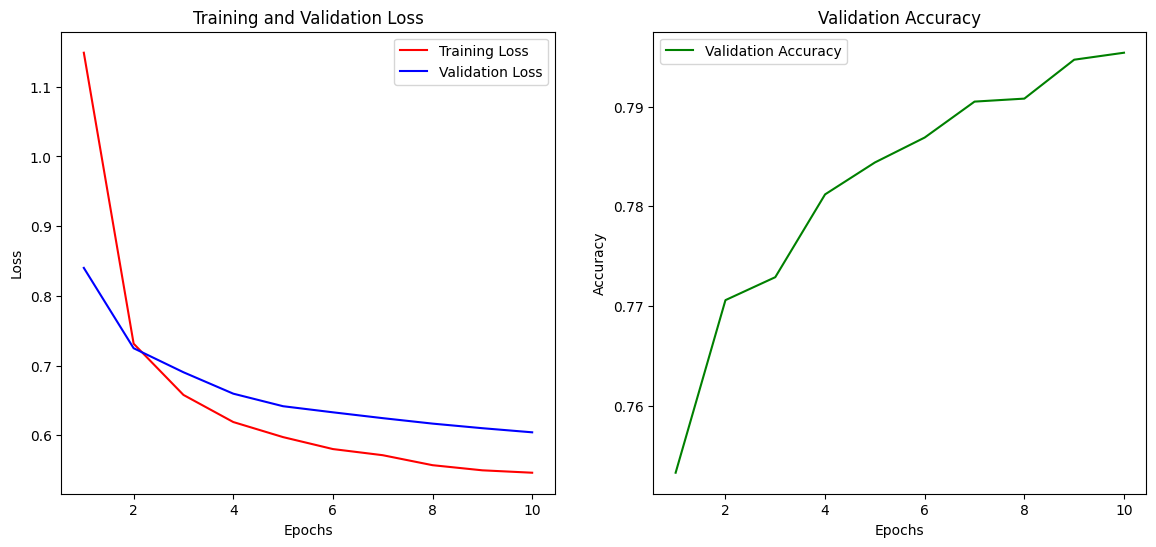

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


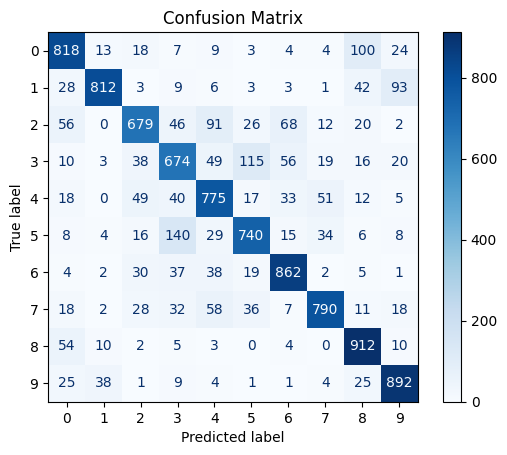

In [ ]:
plot_loss_accuracy(training_loss, val_losses, val_accs)
plot_confusion_matrix(model, value_loader, num_classes=10, device=device)

**Resnet101**

In [ ]:
model_101 = models.resnet101(weights = 'IMAGENET1K_V1')
for param in model_101.parameters():
   param.requires_grad = False

model_101.fc = nn.Linear(model_101.fc.in_features, num_classes)



Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 171MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_101.fc.parameters(), lr=lr, momentum=0.9)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_101 = model_101.to(device)

In [ ]:
training_loss, val_losses, val_accs = train_model(model_101, training_loader, value_loader, criterion, optimizer, num_epochs, device)


  0%|          | 1/391 [00:01<11:21,  1.75s/it]

Batch1 Loss: 1.2446248531341553


  1%|          | 2/391 [00:02<07:16,  1.12s/it]

Batch2 Loss: 1.2035530805587769


  1%|          | 3/391 [00:03<05:49,  1.11it/s]

Batch3 Loss: 1.3005571365356445


  1%|          | 4/391 [00:03<05:06,  1.26it/s]

Batch4 Loss: 1.235615611076355


  1%|▏         | 5/391 [00:04<04:44,  1.36it/s]

Batch5 Loss: 1.2281907796859741


  2%|▏         | 6/391 [00:05<04:35,  1.40it/s]

Batch6 Loss: 1.1630553007125854


  2%|▏         | 7/391 [00:05<04:30,  1.42it/s]

Batch7 Loss: 1.1353485584259033


  2%|▏         | 8/391 [00:06<04:22,  1.46it/s]

Batch8 Loss: 1.288528323173523


  2%|▏         | 9/391 [00:06<04:15,  1.50it/s]

Batch9 Loss: 1.235311508178711


  3%|▎         | 10/391 [00:07<04:10,  1.52it/s]

Batch10 Loss: 1.2036274671554565


  3%|▎         | 11/391 [00:08<04:09,  1.52it/s]

Batch11 Loss: 1.1258609294891357


  3%|▎         | 12/391 [00:08<04:12,  1.50it/s]

Batch12 Loss: 1.2399533987045288


  3%|▎         | 13/391 [00:09<04:13,  1.49it/s]

Batch13 Loss: 1.1221579313278198


  4%|▎         | 14/391 [00:10<04:14,  1.48it/s]

Batch14 Loss: 1.2321538925170898


  4%|▍         | 15/391 [00:10<04:15,  1.47it/s]

Batch15 Loss: 1.1869217157363892


  4%|▍         | 16/391 [00:11<04:12,  1.49it/s]

Batch16 Loss: 1.2689745426177979


  4%|▍         | 17/391 [00:12<04:09,  1.50it/s]

Batch17 Loss: 1.1285655498504639


  5%|▍         | 18/391 [00:12<04:07,  1.51it/s]

Batch18 Loss: 1.1631618738174438


  5%|▍         | 19/391 [00:13<04:09,  1.49it/s]

Batch19 Loss: 1.1616265773773193


  5%|▌         | 20/391 [00:14<04:06,  1.51it/s]

Batch20 Loss: 1.1357600688934326


  5%|▌         | 21/391 [00:14<04:07,  1.50it/s]

Batch21 Loss: 1.096752643585205


  6%|▌         | 22/391 [00:15<04:04,  1.51it/s]

Batch22 Loss: 1.085829734802246


  6%|▌         | 23/391 [00:16<04:01,  1.52it/s]

Batch23 Loss: 1.1137757301330566


  6%|▌         | 24/391 [00:16<03:59,  1.53it/s]

Batch24 Loss: 1.1671608686447144


  6%|▋         | 25/391 [00:17<03:56,  1.55it/s]

Batch25 Loss: 1.1401877403259277


  7%|▋         | 26/391 [00:18<03:56,  1.54it/s]

Batch26 Loss: 1.0781569480895996


  7%|▋         | 27/391 [00:18<03:55,  1.55it/s]

Batch27 Loss: 1.1072312593460083


  7%|▋         | 28/391 [00:19<03:54,  1.55it/s]

Batch28 Loss: 1.117666244506836


  7%|▋         | 29/391 [00:20<03:53,  1.55it/s]

Batch29 Loss: 1.0426639318466187


  8%|▊         | 30/391 [00:20<03:52,  1.55it/s]

Batch30 Loss: 1.1432355642318726


  8%|▊         | 31/391 [00:21<03:52,  1.55it/s]

Batch31 Loss: 1.1206934452056885


  8%|▊         | 32/391 [00:22<03:53,  1.54it/s]

Batch32 Loss: 1.0619295835494995


  8%|▊         | 33/391 [00:22<03:55,  1.52it/s]

Batch33 Loss: 1.0153229236602783


  9%|▊         | 34/391 [00:23<03:55,  1.52it/s]

Batch34 Loss: 1.168471336364746


  9%|▉         | 35/391 [00:24<03:52,  1.53it/s]

Batch35 Loss: 1.0936496257781982


  9%|▉         | 36/391 [00:24<03:52,  1.53it/s]

Batch36 Loss: 1.024412751197815


  9%|▉         | 37/391 [00:25<03:56,  1.50it/s]

Batch37 Loss: 1.0281373262405396


 10%|▉         | 38/391 [00:26<03:56,  1.49it/s]

Batch38 Loss: 1.0490347146987915


 10%|▉         | 39/391 [00:26<03:54,  1.50it/s]

Batch39 Loss: 1.1441270112991333


 10%|█         | 40/391 [00:27<03:51,  1.52it/s]

Batch40 Loss: 1.010180115699768


 10%|█         | 41/391 [00:28<03:49,  1.53it/s]

Batch41 Loss: 1.1105186939239502


 11%|█         | 42/391 [00:28<03:47,  1.54it/s]

Batch42 Loss: 0.9713652729988098


 11%|█         | 43/391 [00:29<03:46,  1.54it/s]

Batch43 Loss: 1.074871301651001


 11%|█▏        | 44/391 [00:29<03:45,  1.54it/s]

Batch44 Loss: 1.0157138109207153


 12%|█▏        | 45/391 [00:30<03:45,  1.54it/s]

Batch45 Loss: 0.9755817651748657


 12%|█▏        | 46/391 [00:31<03:43,  1.54it/s]

Batch46 Loss: 1.0091973543167114


 12%|█▏        | 47/391 [00:31<03:42,  1.54it/s]

Batch47 Loss: 0.9767096638679504


 12%|█▏        | 48/391 [00:32<03:42,  1.54it/s]

Batch48 Loss: 0.992110550403595


 13%|█▎        | 49/391 [00:33<03:41,  1.54it/s]

Batch49 Loss: 0.98467618227005


 13%|█▎        | 50/391 [00:33<03:41,  1.54it/s]

Batch50 Loss: 0.9871574640274048


 13%|█▎        | 51/391 [00:34<03:40,  1.54it/s]

Batch51 Loss: 0.9838187098503113


 13%|█▎        | 52/391 [00:35<03:39,  1.54it/s]

Batch52 Loss: 0.9833794236183167


 14%|█▎        | 53/391 [00:35<03:38,  1.55it/s]

Batch53 Loss: 1.0161471366882324


 14%|█▍        | 54/391 [00:36<03:37,  1.55it/s]

Batch54 Loss: 1.0087584257125854


 14%|█▍        | 55/391 [00:37<03:42,  1.51it/s]

Batch55 Loss: 0.9699521064758301


 14%|█▍        | 56/391 [00:37<03:41,  1.51it/s]

Batch56 Loss: 0.9179394245147705


 15%|█▍        | 57/391 [00:38<03:42,  1.50it/s]

Batch57 Loss: 1.031341791152954


 15%|█▍        | 58/391 [00:39<03:44,  1.48it/s]

Batch58 Loss: 0.9480984807014465


 15%|█▌        | 59/391 [00:39<03:45,  1.47it/s]

Batch59 Loss: 0.9966096878051758


 15%|█▌        | 60/391 [00:40<03:45,  1.47it/s]

Batch60 Loss: 0.9292523860931396


 16%|█▌        | 61/391 [00:41<03:42,  1.49it/s]

Batch61 Loss: 1.0070178508758545


 16%|█▌        | 62/391 [00:41<03:38,  1.50it/s]

Batch62 Loss: 1.0205124616622925


 16%|█▌        | 63/391 [00:42<03:36,  1.52it/s]

Batch63 Loss: 0.971712589263916


 16%|█▋        | 64/391 [00:43<03:34,  1.53it/s]

Batch64 Loss: 1.0315731763839722


 17%|█▋        | 65/391 [00:43<03:33,  1.53it/s]

Batch65 Loss: 1.0409111976623535


 17%|█▋        | 66/391 [00:44<03:31,  1.54it/s]

Batch66 Loss: 1.0954115390777588


 17%|█▋        | 67/391 [00:45<03:31,  1.53it/s]

Batch67 Loss: 0.8790687918663025


 17%|█▋        | 68/391 [00:45<03:29,  1.54it/s]

Batch68 Loss: 0.918373703956604


 18%|█▊        | 69/391 [00:46<03:29,  1.54it/s]

Batch69 Loss: 0.9831433296203613


 18%|█▊        | 70/391 [00:47<03:28,  1.54it/s]

Batch70 Loss: 0.9967477917671204


 18%|█▊        | 71/391 [00:47<03:27,  1.54it/s]

Batch71 Loss: 0.9234454035758972


 18%|█▊        | 72/391 [00:48<03:26,  1.54it/s]

Batch72 Loss: 0.8877167701721191


 19%|█▊        | 73/391 [00:48<03:26,  1.54it/s]

Batch73 Loss: 0.9812397956848145


 19%|█▉        | 74/391 [00:49<03:25,  1.54it/s]

Batch74 Loss: 0.9486867189407349


 19%|█▉        | 75/391 [00:50<03:24,  1.54it/s]

Batch75 Loss: 1.0647114515304565


 19%|█▉        | 76/391 [00:50<03:24,  1.54it/s]

Batch76 Loss: 0.8694632649421692


 20%|█▉        | 77/391 [00:51<03:23,  1.54it/s]

Batch77 Loss: 0.9242942333221436


 20%|█▉        | 78/391 [00:52<03:24,  1.53it/s]

Batch78 Loss: 0.9434816241264343


 20%|██        | 79/391 [00:52<03:25,  1.52it/s]

Batch79 Loss: 0.9227178692817688


 20%|██        | 80/391 [00:53<03:27,  1.50it/s]

Batch80 Loss: 0.8746448159217834


 21%|██        | 81/391 [00:54<03:30,  1.47it/s]

Batch81 Loss: 0.9509545564651489


 21%|██        | 82/391 [00:54<03:27,  1.49it/s]

Batch82 Loss: 0.9156520962715149


 21%|██        | 83/391 [00:55<03:25,  1.50it/s]

Batch83 Loss: 0.8656084537506104


 21%|██▏       | 84/391 [00:56<03:28,  1.48it/s]

Batch84 Loss: 0.9397595524787903


 22%|██▏       | 85/391 [00:57<03:29,  1.46it/s]

Batch85 Loss: 0.9789280891418457


 22%|██▏       | 86/391 [00:57<03:26,  1.48it/s]

Batch86 Loss: 0.8575456142425537


 22%|██▏       | 87/391 [00:58<03:23,  1.49it/s]

Batch87 Loss: 0.9732100367546082


 23%|██▎       | 88/391 [00:58<03:21,  1.51it/s]

Batch88 Loss: 0.9446382522583008


 23%|██▎       | 89/391 [00:59<03:19,  1.51it/s]

Batch89 Loss: 0.8967347145080566


 23%|██▎       | 90/391 [01:00<03:17,  1.52it/s]

Batch90 Loss: 1.005570650100708


 23%|██▎       | 91/391 [01:00<03:17,  1.52it/s]

Batch91 Loss: 0.9698461294174194


 24%|██▎       | 92/391 [01:01<03:16,  1.52it/s]

Batch92 Loss: 0.891643226146698


 24%|██▍       | 93/391 [01:02<03:15,  1.52it/s]

Batch93 Loss: 0.8410655856132507


 24%|██▍       | 94/391 [01:02<03:15,  1.52it/s]

Batch94 Loss: 0.7968629002571106


 24%|██▍       | 95/391 [01:03<03:13,  1.53it/s]

Batch95 Loss: 0.905682384967804


 25%|██▍       | 96/391 [01:04<03:13,  1.53it/s]

Batch96 Loss: 0.8485336303710938


 25%|██▍       | 97/391 [01:04<03:12,  1.52it/s]

Batch97 Loss: 0.8128718733787537


 25%|██▌       | 98/391 [01:05<03:12,  1.52it/s]

Batch98 Loss: 0.7969708442687988


 25%|██▌       | 99/391 [01:06<03:12,  1.52it/s]

Batch99 Loss: 0.9891042709350586


 26%|██▌       | 100/391 [01:06<03:11,  1.52it/s]

Batch100 Loss: 0.9316638112068176


 26%|██▌       | 101/391 [01:07<03:14,  1.49it/s]

Batch101 Loss: 0.9028046131134033


 26%|██▌       | 102/391 [01:08<03:14,  1.48it/s]

Batch102 Loss: 0.7759897112846375


 26%|██▋       | 103/391 [01:08<03:13,  1.49it/s]

Batch103 Loss: 0.9013506174087524


 27%|██▋       | 104/391 [01:09<03:12,  1.49it/s]

Batch104 Loss: 0.911612331867218


 27%|██▋       | 105/391 [01:10<03:13,  1.48it/s]

Batch105 Loss: 0.8741062879562378


 27%|██▋       | 106/391 [01:10<03:12,  1.48it/s]

Batch106 Loss: 0.890171229839325


 27%|██▋       | 107/391 [01:11<03:14,  1.46it/s]

Batch107 Loss: 0.8433708548545837


 28%|██▊       | 108/391 [01:12<03:15,  1.45it/s]

Batch108 Loss: 0.7747994661331177


 28%|██▊       | 109/391 [01:13<03:13,  1.46it/s]

Batch109 Loss: 0.8848972320556641


 28%|██▊       | 110/391 [01:13<03:10,  1.48it/s]

Batch110 Loss: 0.8771710395812988


 28%|██▊       | 111/391 [01:14<03:08,  1.48it/s]

Batch111 Loss: 0.8919692635536194


 29%|██▊       | 112/391 [01:14<03:07,  1.49it/s]

Batch112 Loss: 0.8754635453224182


 29%|██▉       | 113/391 [01:15<03:05,  1.50it/s]

Batch113 Loss: 0.9357210397720337


 29%|██▉       | 114/391 [01:16<03:04,  1.50it/s]

Batch114 Loss: 0.7706632018089294


 29%|██▉       | 115/391 [01:16<03:03,  1.50it/s]

Batch115 Loss: 0.7763808965682983


 30%|██▉       | 116/391 [01:17<03:03,  1.50it/s]

Batch116 Loss: 0.8879149556159973


 30%|██▉       | 117/391 [01:18<03:02,  1.50it/s]

Batch117 Loss: 0.8478784561157227


 30%|███       | 118/391 [01:18<03:02,  1.50it/s]

Batch118 Loss: 0.8994730114936829


 30%|███       | 119/391 [01:19<03:01,  1.50it/s]

Batch119 Loss: 0.9238792657852173


 31%|███       | 120/391 [01:20<03:01,  1.49it/s]

Batch120 Loss: 0.9177309274673462


 31%|███       | 121/391 [01:20<03:00,  1.50it/s]

Batch121 Loss: 0.9677520394325256


 31%|███       | 122/391 [01:21<03:00,  1.49it/s]

Batch122 Loss: 0.8371011018753052


 31%|███▏      | 123/391 [01:22<02:59,  1.50it/s]

Batch123 Loss: 0.8987185955047607


 32%|███▏      | 124/391 [01:23<02:59,  1.49it/s]

Batch124 Loss: 0.952728271484375


 32%|███▏      | 125/391 [01:23<03:01,  1.46it/s]

Batch125 Loss: 0.8022986054420471


 32%|███▏      | 126/391 [01:24<03:03,  1.45it/s]

Batch126 Loss: 0.8007622361183167


 32%|███▏      | 127/391 [01:25<03:04,  1.43it/s]

Batch127 Loss: 0.8724489808082581


 33%|███▎      | 128/391 [01:25<03:03,  1.43it/s]

Batch128 Loss: 0.8954380750656128


 33%|███▎      | 129/391 [01:26<03:05,  1.41it/s]

Batch129 Loss: 0.9040513634681702


 33%|███▎      | 130/391 [01:27<03:04,  1.42it/s]

Batch130 Loss: 0.8658391237258911


 34%|███▎      | 131/391 [01:27<03:02,  1.43it/s]

Batch131 Loss: 0.8197300434112549


 34%|███▍      | 132/391 [01:28<02:59,  1.44it/s]

Batch132 Loss: 0.7707837820053101


 34%|███▍      | 133/391 [01:29<02:57,  1.45it/s]

Batch133 Loss: 0.7868022918701172


 34%|███▍      | 134/391 [01:29<02:56,  1.46it/s]

Batch134 Loss: 0.8361328840255737


 35%|███▍      | 135/391 [01:30<02:54,  1.47it/s]

Batch135 Loss: 0.9707871079444885


 35%|███▍      | 136/391 [01:31<02:53,  1.47it/s]

Batch136 Loss: 1.0291939973831177


 35%|███▌      | 137/391 [01:32<02:51,  1.48it/s]

Batch137 Loss: 0.867610514163971


 35%|███▌      | 138/391 [01:32<02:50,  1.48it/s]

Batch138 Loss: 0.8858447670936584


 36%|███▌      | 139/391 [01:33<02:49,  1.49it/s]

Batch139 Loss: 0.8193612694740295


 36%|███▌      | 140/391 [01:34<02:49,  1.48it/s]

Batch140 Loss: 0.760587215423584


 36%|███▌      | 141/391 [01:34<02:48,  1.49it/s]

Batch141 Loss: 0.7639284133911133


 36%|███▋      | 142/391 [01:35<02:47,  1.49it/s]

Batch142 Loss: 0.8862013220787048


 37%|███▋      | 143/391 [01:36<02:46,  1.49it/s]

Batch143 Loss: 0.8474347591400146


 37%|███▋      | 144/391 [01:36<02:46,  1.49it/s]

Batch144 Loss: 0.7993295788764954


 37%|███▋      | 145/391 [01:37<02:45,  1.49it/s]

Batch145 Loss: 0.8850164413452148


 37%|███▋      | 146/391 [01:38<02:44,  1.49it/s]

Batch146 Loss: 0.9392932653427124


 38%|███▊      | 147/391 [01:38<02:47,  1.46it/s]

Batch147 Loss: 0.8517074584960938


 38%|███▊      | 148/391 [01:39<02:45,  1.46it/s]

Batch148 Loss: 0.8061358332633972


 38%|███▊      | 149/391 [01:40<02:46,  1.45it/s]

Batch149 Loss: 0.7906134724617004


 38%|███▊      | 150/391 [01:40<02:44,  1.46it/s]

Batch150 Loss: 0.8471649885177612


 39%|███▊      | 151/391 [01:41<02:46,  1.44it/s]

Batch151 Loss: 0.88847815990448


 39%|███▉      | 152/391 [01:42<02:44,  1.45it/s]

Batch152 Loss: 0.9410011768341064


 39%|███▉      | 153/391 [01:42<02:44,  1.44it/s]

Batch153 Loss: 0.8130501508712769


 39%|███▉      | 154/391 [01:43<02:42,  1.45it/s]

Batch154 Loss: 0.9418221116065979


 40%|███▉      | 155/391 [01:44<02:40,  1.47it/s]

Batch155 Loss: 0.7773616313934326


 40%|███▉      | 156/391 [01:44<02:38,  1.48it/s]

Batch156 Loss: 0.7895836234092712


 40%|████      | 157/391 [01:45<02:37,  1.49it/s]

Batch157 Loss: 0.9138729572296143


 40%|████      | 158/391 [01:46<02:36,  1.49it/s]

Batch158 Loss: 0.8455402255058289


 41%|████      | 159/391 [01:46<02:35,  1.49it/s]

Batch159 Loss: 0.9568109512329102


 41%|████      | 160/391 [01:47<02:34,  1.50it/s]

Batch160 Loss: 0.8113148212432861


 41%|████      | 161/391 [01:48<02:34,  1.49it/s]

Batch161 Loss: 0.7256669998168945


 41%|████▏     | 162/391 [01:48<02:32,  1.50it/s]

Batch162 Loss: 0.8478879332542419


 42%|████▏     | 163/391 [01:49<02:31,  1.50it/s]

Batch163 Loss: 0.8884133100509644


 42%|████▏     | 164/391 [01:50<02:31,  1.50it/s]

Batch164 Loss: 0.8390144109725952


 42%|████▏     | 165/391 [01:50<02:30,  1.50it/s]

Batch165 Loss: 0.870553731918335


 42%|████▏     | 166/391 [01:51<02:29,  1.50it/s]

Batch166 Loss: 0.8288474082946777


 43%|████▎     | 167/391 [01:52<02:29,  1.50it/s]

Batch167 Loss: 0.7913568019866943


 43%|████▎     | 168/391 [01:52<02:28,  1.51it/s]

Batch168 Loss: 0.8276300430297852


 43%|████▎     | 169/391 [01:53<02:29,  1.49it/s]

Batch169 Loss: 0.823763906955719


 43%|████▎     | 170/391 [01:54<02:29,  1.48it/s]

Batch170 Loss: 0.7591657042503357


 44%|████▎     | 171/391 [01:54<02:28,  1.48it/s]

Batch171 Loss: 0.8246631622314453


 44%|████▍     | 172/391 [01:55<02:28,  1.47it/s]

Batch172 Loss: 0.7551363706588745


 44%|████▍     | 173/391 [01:56<02:30,  1.45it/s]

Batch173 Loss: 0.7527961134910583


 45%|████▍     | 174/391 [01:57<02:28,  1.46it/s]

Batch174 Loss: 0.8096765279769897


 45%|████▍     | 175/391 [01:57<02:29,  1.45it/s]

Batch175 Loss: 0.7327227592468262


 45%|████▌     | 176/391 [01:58<02:27,  1.46it/s]

Batch176 Loss: 0.8294781446456909


 45%|████▌     | 177/391 [01:59<02:24,  1.48it/s]

Batch177 Loss: 0.8040426969528198


 46%|████▌     | 178/391 [01:59<02:23,  1.49it/s]

Batch178 Loss: 0.8259824514389038


 46%|████▌     | 179/391 [02:00<02:21,  1.50it/s]

Batch179 Loss: 0.8641248345375061


 46%|████▌     | 180/391 [02:01<02:21,  1.49it/s]

Batch180 Loss: 0.7811549305915833


 46%|████▋     | 181/391 [02:01<02:19,  1.50it/s]

Batch181 Loss: 0.7996824383735657


 47%|████▋     | 182/391 [02:02<02:19,  1.50it/s]

Batch182 Loss: 0.6274080872535706


 47%|████▋     | 183/391 [02:03<02:18,  1.50it/s]

Batch183 Loss: 0.7581676840782166


 47%|████▋     | 184/391 [02:03<02:17,  1.50it/s]

Batch184 Loss: 0.7765534520149231


 47%|████▋     | 185/391 [02:04<02:16,  1.51it/s]

Batch185 Loss: 0.7501487731933594


 48%|████▊     | 186/391 [02:05<02:15,  1.51it/s]

Batch186 Loss: 0.6486769914627075


 48%|████▊     | 187/391 [02:05<02:15,  1.51it/s]

Batch187 Loss: 0.7444185018539429


 48%|████▊     | 188/391 [02:06<02:14,  1.51it/s]

Batch188 Loss: 0.7252981066703796


 48%|████▊     | 189/391 [02:07<02:13,  1.51it/s]

Batch189 Loss: 0.8489500284194946


 49%|████▊     | 190/391 [02:07<02:12,  1.51it/s]

Batch190 Loss: 0.8288388848304749


 49%|████▉     | 191/391 [02:08<02:12,  1.51it/s]

Batch191 Loss: 0.7045765519142151


 49%|████▉     | 192/391 [02:09<02:13,  1.49it/s]

Batch192 Loss: 0.7264100909233093


 49%|████▉     | 193/391 [02:09<02:13,  1.49it/s]

Batch193 Loss: 0.7269780039787292


 50%|████▉     | 194/391 [02:10<02:12,  1.49it/s]

Batch194 Loss: 0.7751649618148804


 50%|████▉     | 195/391 [02:11<02:11,  1.49it/s]

Batch195 Loss: 0.8244208693504333


 50%|█████     | 196/391 [02:11<02:11,  1.48it/s]

Batch196 Loss: 0.6618186235427856


 50%|█████     | 197/391 [02:12<02:10,  1.48it/s]

Batch197 Loss: 0.7975427508354187


 51%|█████     | 198/391 [02:13<02:12,  1.46it/s]

Batch198 Loss: 0.684924304485321


 51%|█████     | 199/391 [02:13<02:10,  1.47it/s]

Batch199 Loss: 0.7237749695777893


 51%|█████     | 200/391 [02:14<02:08,  1.49it/s]

Batch200 Loss: 0.804049551486969


 51%|█████▏    | 201/391 [02:15<02:07,  1.49it/s]

Batch201 Loss: 0.7200870513916016


 52%|█████▏    | 202/391 [02:15<02:06,  1.49it/s]

Batch202 Loss: 0.827715277671814


 52%|█████▏    | 203/391 [02:16<02:05,  1.50it/s]

Batch203 Loss: 0.8189337253570557


 52%|█████▏    | 204/391 [02:17<02:04,  1.50it/s]

Batch204 Loss: 0.8202930688858032


 52%|█████▏    | 205/391 [02:17<02:03,  1.50it/s]

Batch205 Loss: 0.8456729650497437


 53%|█████▎    | 206/391 [02:18<02:02,  1.51it/s]

Batch206 Loss: 0.7515908479690552


 53%|█████▎    | 207/391 [02:19<02:02,  1.50it/s]

Batch207 Loss: 0.7391771078109741


 53%|█████▎    | 208/391 [02:19<02:01,  1.51it/s]

Batch208 Loss: 0.826008141040802


 53%|█████▎    | 209/391 [02:20<02:00,  1.51it/s]

Batch209 Loss: 0.7821476459503174


 54%|█████▎    | 210/391 [02:21<02:00,  1.50it/s]

Batch210 Loss: 0.6847538352012634


 54%|█████▍    | 211/391 [02:21<01:59,  1.51it/s]

Batch211 Loss: 0.8061516284942627


 54%|█████▍    | 212/391 [02:22<01:58,  1.51it/s]

Batch212 Loss: 0.8323400616645813


 54%|█████▍    | 213/391 [02:23<01:57,  1.52it/s]

Batch213 Loss: 0.7860285639762878


 55%|█████▍    | 214/391 [02:23<01:57,  1.51it/s]

Batch214 Loss: 0.7515835762023926


 55%|█████▍    | 215/391 [02:24<01:59,  1.48it/s]

Batch215 Loss: 0.7759726047515869


 55%|█████▌    | 216/391 [02:25<01:59,  1.46it/s]

Batch216 Loss: 0.6215218305587769


 55%|█████▌    | 217/391 [02:25<02:00,  1.44it/s]

Batch217 Loss: 0.7542314529418945


 56%|█████▌    | 218/391 [02:26<01:59,  1.45it/s]

Batch218 Loss: 0.6629951000213623


 56%|█████▌    | 219/391 [02:27<01:57,  1.47it/s]

Batch219 Loss: 0.734218418598175


 56%|█████▋    | 220/391 [02:27<01:57,  1.45it/s]

Batch220 Loss: 0.6642702221870422


 57%|█████▋    | 221/391 [02:28<01:56,  1.46it/s]

Batch221 Loss: 0.7590264081954956


 57%|█████▋    | 222/391 [02:29<01:54,  1.48it/s]

Batch222 Loss: 0.8353151082992554


 57%|█████▋    | 223/391 [02:29<01:52,  1.49it/s]

Batch223 Loss: 0.8053609132766724


 57%|█████▋    | 224/391 [02:30<01:51,  1.50it/s]

Batch224 Loss: 0.7926914095878601


 58%|█████▊    | 225/391 [02:31<01:50,  1.50it/s]

Batch225 Loss: 0.6893306970596313


 58%|█████▊    | 226/391 [02:31<01:50,  1.49it/s]

Batch226 Loss: 0.7817401885986328


 58%|█████▊    | 227/391 [02:32<01:49,  1.50it/s]

Batch227 Loss: 0.7560944557189941


 58%|█████▊    | 228/391 [02:33<01:48,  1.50it/s]

Batch228 Loss: 0.7024181485176086


 59%|█████▊    | 229/391 [02:33<01:47,  1.51it/s]

Batch229 Loss: 0.716445803642273


 59%|█████▉    | 230/391 [02:34<01:46,  1.51it/s]

Batch230 Loss: 0.8187400102615356


 59%|█████▉    | 231/391 [02:35<01:46,  1.51it/s]

Batch231 Loss: 0.7974914312362671


 59%|█████▉    | 232/391 [02:35<01:45,  1.51it/s]

Batch232 Loss: 0.8112410306930542


 60%|█████▉    | 233/391 [02:36<01:44,  1.51it/s]

Batch233 Loss: 0.7922664284706116


 60%|█████▉    | 234/391 [02:37<01:43,  1.52it/s]

Batch234 Loss: 0.7637361288070679


 60%|██████    | 235/391 [02:37<01:43,  1.51it/s]

Batch235 Loss: 0.8130431175231934


 60%|██████    | 236/391 [02:38<01:42,  1.51it/s]

Batch236 Loss: 0.8051651120185852


 61%|██████    | 237/391 [02:39<01:42,  1.50it/s]

Batch237 Loss: 0.7372937202453613


 61%|██████    | 238/391 [02:39<01:42,  1.49it/s]

Batch238 Loss: 0.8155867457389832


 61%|██████    | 239/391 [02:40<01:41,  1.50it/s]

Batch239 Loss: 0.7551326155662537


 61%|██████▏   | 240/391 [02:41<01:42,  1.47it/s]

Batch240 Loss: 0.7683827877044678


 62%|██████▏   | 241/391 [02:41<01:43,  1.45it/s]

Batch241 Loss: 0.6778087019920349


 62%|██████▏   | 242/391 [02:42<01:41,  1.47it/s]

Batch242 Loss: 0.785457193851471


 62%|██████▏   | 243/391 [02:43<01:42,  1.45it/s]

Batch243 Loss: 0.8724828958511353


 62%|██████▏   | 244/391 [02:44<01:41,  1.45it/s]

Batch244 Loss: 0.773340106010437


 63%|██████▎   | 245/391 [02:44<01:40,  1.46it/s]

Batch245 Loss: 0.8216167092323303


 63%|██████▎   | 246/391 [02:45<01:38,  1.47it/s]

Batch246 Loss: 0.7650945782661438


 63%|██████▎   | 247/391 [02:46<01:36,  1.49it/s]

Batch247 Loss: 0.8108453750610352


 63%|██████▎   | 248/391 [02:46<01:35,  1.49it/s]

Batch248 Loss: 0.8285819292068481


 64%|██████▎   | 249/391 [02:47<01:35,  1.49it/s]

Batch249 Loss: 0.6834046244621277


 64%|██████▍   | 250/391 [02:48<01:34,  1.49it/s]

Batch250 Loss: 0.741465151309967


 64%|██████▍   | 251/391 [02:48<01:33,  1.50it/s]

Batch251 Loss: 0.6828888058662415


 64%|██████▍   | 252/391 [02:49<01:33,  1.49it/s]

Batch252 Loss: 0.7726836800575256


 65%|██████▍   | 253/391 [02:50<01:32,  1.49it/s]

Batch253 Loss: 0.6855189204216003


 65%|██████▍   | 254/391 [02:50<01:31,  1.50it/s]

Batch254 Loss: 0.7037218809127808


 65%|██████▌   | 255/391 [02:51<01:30,  1.49it/s]

Batch255 Loss: 0.7080176472663879


 65%|██████▌   | 256/391 [02:52<01:29,  1.50it/s]

Batch256 Loss: 0.7906054258346558


 66%|██████▌   | 257/391 [02:52<01:29,  1.50it/s]

Batch257 Loss: 0.6319257020950317


 66%|██████▌   | 258/391 [02:53<01:28,  1.50it/s]

Batch258 Loss: 0.602503776550293


 66%|██████▌   | 259/391 [02:54<01:27,  1.50it/s]

Batch259 Loss: 0.6403777003288269


 66%|██████▋   | 260/391 [02:54<01:27,  1.49it/s]

Batch260 Loss: 0.6982524991035461


 67%|██████▋   | 261/391 [02:55<01:28,  1.47it/s]

Batch261 Loss: 0.6877502799034119


 67%|██████▋   | 262/391 [02:56<01:28,  1.45it/s]

Batch262 Loss: 0.7076351642608643


 67%|██████▋   | 263/391 [02:56<01:28,  1.44it/s]

Batch263 Loss: 0.6212273240089417


 68%|██████▊   | 264/391 [02:57<01:27,  1.45it/s]

Batch264 Loss: 0.7423855662345886


 68%|██████▊   | 265/391 [02:58<01:25,  1.47it/s]

Batch265 Loss: 0.6628602743148804


 68%|██████▊   | 266/391 [02:58<01:24,  1.48it/s]

Batch266 Loss: 0.7622681856155396


 68%|██████▊   | 267/391 [02:59<01:24,  1.47it/s]

Batch267 Loss: 0.7248198986053467


 69%|██████▊   | 268/391 [03:00<01:23,  1.48it/s]

Batch268 Loss: 0.7633064985275269


 69%|██████▉   | 269/391 [03:00<01:22,  1.48it/s]

Batch269 Loss: 0.7254678606987


 69%|██████▉   | 270/391 [03:01<01:21,  1.48it/s]

Batch270 Loss: 0.7694040536880493


 69%|██████▉   | 271/391 [03:02<01:20,  1.49it/s]

Batch271 Loss: 0.7479204535484314


 70%|██████▉   | 272/391 [03:02<01:20,  1.49it/s]

Batch272 Loss: 0.6699766516685486


 70%|██████▉   | 273/391 [03:03<01:18,  1.50it/s]

Batch273 Loss: 0.6805235147476196


 70%|███████   | 274/391 [03:04<01:18,  1.50it/s]

Batch274 Loss: 0.7610333561897278


 70%|███████   | 275/391 [03:04<01:17,  1.50it/s]

Batch275 Loss: 0.6611307859420776


 71%|███████   | 276/391 [03:05<01:16,  1.50it/s]

Batch276 Loss: 0.7900223731994629


 71%|███████   | 277/391 [03:06<01:15,  1.50it/s]

Batch277 Loss: 0.7750180959701538


 71%|███████   | 278/391 [03:06<01:15,  1.50it/s]

Batch278 Loss: 0.6840364933013916


 71%|███████▏  | 279/391 [03:07<01:14,  1.51it/s]

Batch279 Loss: 0.6142491698265076


 72%|███████▏  | 280/391 [03:08<01:14,  1.50it/s]

Batch280 Loss: 0.7298571467399597


 72%|███████▏  | 281/391 [03:08<01:13,  1.50it/s]

Batch281 Loss: 0.6456170082092285


 72%|███████▏  | 282/391 [03:09<01:12,  1.49it/s]

Batch282 Loss: 0.8899610638618469


 72%|███████▏  | 283/391 [03:10<01:12,  1.49it/s]

Batch283 Loss: 0.676677942276001


 73%|███████▎  | 284/391 [03:10<01:11,  1.49it/s]

Batch284 Loss: 0.7053161859512329


 73%|███████▎  | 285/391 [03:11<01:11,  1.48it/s]

Batch285 Loss: 0.6780211329460144


 73%|███████▎  | 286/391 [03:12<01:12,  1.45it/s]

Batch286 Loss: 0.7617037296295166


 73%|███████▎  | 287/391 [03:12<01:11,  1.46it/s]

Batch287 Loss: 0.7622544765472412


 74%|███████▎  | 288/391 [03:13<01:10,  1.46it/s]

Batch288 Loss: 0.6866272687911987


 74%|███████▍  | 289/391 [03:14<01:09,  1.47it/s]

Batch289 Loss: 0.7284150123596191


 74%|███████▍  | 290/391 [03:14<01:08,  1.48it/s]

Batch290 Loss: 0.7662167549133301


 74%|███████▍  | 291/391 [03:15<01:07,  1.48it/s]

Batch291 Loss: 0.6346402764320374


 75%|███████▍  | 292/391 [03:16<01:06,  1.49it/s]

Batch292 Loss: 0.7809838652610779


 75%|███████▍  | 293/391 [03:16<01:05,  1.49it/s]

Batch293 Loss: 0.7113102674484253


 75%|███████▌  | 294/391 [03:17<01:04,  1.50it/s]

Batch294 Loss: 0.7064801454544067


 75%|███████▌  | 295/391 [03:18<01:04,  1.50it/s]

Batch295 Loss: 0.7741924524307251


 76%|███████▌  | 296/391 [03:18<01:03,  1.50it/s]

Batch296 Loss: 0.6964287757873535


 76%|███████▌  | 297/391 [03:19<01:02,  1.50it/s]

Batch297 Loss: 0.7034546136856079


 76%|███████▌  | 298/391 [03:20<01:02,  1.50it/s]

Batch298 Loss: 0.7212309837341309


 76%|███████▋  | 299/391 [03:20<01:01,  1.50it/s]

Batch299 Loss: 0.736424446105957


 77%|███████▋  | 300/391 [03:21<01:01,  1.49it/s]

Batch300 Loss: 0.6256542205810547


 77%|███████▋  | 301/391 [03:22<01:00,  1.49it/s]

Batch301 Loss: 0.6125779747962952


 77%|███████▋  | 302/391 [03:22<00:59,  1.50it/s]

Batch302 Loss: 0.6187137961387634


 77%|███████▋  | 303/391 [03:23<00:59,  1.49it/s]

Batch303 Loss: 0.5853520035743713


 78%|███████▊  | 304/391 [03:24<00:57,  1.50it/s]

Batch304 Loss: 0.6377890706062317


 78%|███████▊  | 305/391 [03:24<00:57,  1.50it/s]

Batch305 Loss: 0.7285328507423401


 78%|███████▊  | 306/391 [03:25<00:57,  1.48it/s]

Batch306 Loss: 0.7713087201118469


 79%|███████▊  | 307/391 [03:26<00:57,  1.46it/s]

Batch307 Loss: 0.680762529373169


 79%|███████▉  | 308/391 [03:27<00:56,  1.46it/s]

Batch308 Loss: 0.718635618686676


 79%|███████▉  | 309/391 [03:27<00:56,  1.44it/s]

Batch309 Loss: 0.6955183744430542


 79%|███████▉  | 310/391 [03:28<00:56,  1.43it/s]

Batch310 Loss: 0.8178807497024536


 80%|███████▉  | 311/391 [03:29<00:55,  1.44it/s]

Batch311 Loss: 0.7785162925720215


 80%|███████▉  | 312/391 [03:29<00:54,  1.45it/s]

Batch312 Loss: 0.7622284293174744


 80%|████████  | 313/391 [03:30<00:53,  1.45it/s]

Batch313 Loss: 0.8046621680259705


 80%|████████  | 314/391 [03:31<00:52,  1.46it/s]

Batch314 Loss: 0.8176084160804749


 81%|████████  | 315/391 [03:31<00:51,  1.48it/s]

Batch315 Loss: 0.6664233207702637


 81%|████████  | 316/391 [03:32<00:50,  1.48it/s]

Batch316 Loss: 0.6281760334968567


 81%|████████  | 317/391 [03:33<00:49,  1.49it/s]

Batch317 Loss: 0.6147254705429077


 81%|████████▏ | 318/391 [03:33<00:48,  1.49it/s]

Batch318 Loss: 0.7686842679977417


 82%|████████▏ | 319/391 [03:34<00:48,  1.50it/s]

Batch319 Loss: 0.7035435438156128


 82%|████████▏ | 320/391 [03:35<00:47,  1.50it/s]

Batch320 Loss: 0.6824904084205627


 82%|████████▏ | 321/391 [03:35<00:46,  1.50it/s]

Batch321 Loss: 0.7898635864257812


 82%|████████▏ | 322/391 [03:36<00:46,  1.50it/s]

Batch322 Loss: 0.7269809246063232


 83%|████████▎ | 323/391 [03:37<00:45,  1.49it/s]

Batch323 Loss: 0.6979528665542603


 83%|████████▎ | 324/391 [03:37<00:44,  1.50it/s]

Batch324 Loss: 0.6905190348625183


 83%|████████▎ | 325/391 [03:38<00:44,  1.50it/s]

Batch325 Loss: 0.7078315019607544


 83%|████████▎ | 326/391 [03:39<00:43,  1.50it/s]

Batch326 Loss: 0.7352941036224365


 84%|████████▎ | 327/391 [03:39<00:42,  1.50it/s]

Batch327 Loss: 0.698911726474762


 84%|████████▍ | 328/391 [03:40<00:41,  1.50it/s]

Batch328 Loss: 0.6814237236976624


 84%|████████▍ | 329/391 [03:41<00:42,  1.48it/s]

Batch329 Loss: 0.8210209012031555


 84%|████████▍ | 330/391 [03:41<00:42,  1.45it/s]

Batch330 Loss: 0.7946863770484924


 85%|████████▍ | 331/391 [03:42<00:41,  1.45it/s]

Batch331 Loss: 0.6412726044654846


 85%|████████▍ | 332/391 [03:43<00:41,  1.43it/s]

Batch332 Loss: 0.6195667386054993


 85%|████████▌ | 333/391 [03:44<00:40,  1.44it/s]

Batch333 Loss: 0.6963648200035095


 85%|████████▌ | 334/391 [03:44<00:39,  1.43it/s]

Batch334 Loss: 0.5902675986289978


 86%|████████▌ | 335/391 [03:45<00:38,  1.45it/s]

Batch335 Loss: 0.7897816300392151


 86%|████████▌ | 336/391 [03:46<00:37,  1.47it/s]

Batch336 Loss: 0.7877765893936157


 86%|████████▌ | 337/391 [03:46<00:36,  1.47it/s]

Batch337 Loss: 0.7063461542129517


 86%|████████▋ | 338/391 [03:47<00:35,  1.49it/s]

Batch338 Loss: 0.7360239624977112


 87%|████████▋ | 339/391 [03:48<00:35,  1.48it/s]

Batch339 Loss: 0.7544502019882202


 87%|████████▋ | 340/391 [03:48<00:34,  1.49it/s]

Batch340 Loss: 0.5111849904060364


 87%|████████▋ | 341/391 [03:49<00:33,  1.50it/s]

Batch341 Loss: 0.6536564230918884


 87%|████████▋ | 342/391 [03:50<00:32,  1.50it/s]

Batch342 Loss: 0.707857608795166


 88%|████████▊ | 343/391 [03:50<00:31,  1.51it/s]

Batch343 Loss: 0.8251500725746155


 88%|████████▊ | 344/391 [03:51<00:31,  1.50it/s]

Batch344 Loss: 0.7215695977210999


 88%|████████▊ | 345/391 [03:52<00:30,  1.50it/s]

Batch345 Loss: 0.7165432572364807


 88%|████████▊ | 346/391 [03:52<00:30,  1.50it/s]

Batch346 Loss: 0.7189726233482361


 89%|████████▊ | 347/391 [03:53<00:29,  1.50it/s]

Batch347 Loss: 0.8190750479698181


 89%|████████▉ | 348/391 [03:54<00:28,  1.50it/s]

Batch348 Loss: 0.6184157133102417


 89%|████████▉ | 349/391 [03:54<00:27,  1.50it/s]

Batch349 Loss: 0.6408694386482239


 90%|████████▉ | 350/391 [03:55<00:27,  1.51it/s]

Batch350 Loss: 0.7257074117660522


 90%|████████▉ | 351/391 [03:56<00:26,  1.49it/s]

Batch351 Loss: 0.7211140990257263


 90%|█████████ | 352/391 [03:56<00:26,  1.46it/s]

Batch352 Loss: 0.7205358147621155


 90%|█████████ | 353/391 [03:57<00:26,  1.44it/s]

Batch353 Loss: 0.6466473937034607


 91%|█████████ | 354/391 [03:58<00:25,  1.43it/s]

Batch354 Loss: 0.7352115511894226


 91%|█████████ | 355/391 [03:58<00:25,  1.43it/s]

Batch355 Loss: 0.7263081073760986


 91%|█████████ | 356/391 [03:59<00:24,  1.43it/s]

Batch356 Loss: 0.6538768410682678


 91%|█████████▏| 357/391 [04:00<00:23,  1.44it/s]

Batch357 Loss: 0.6713468432426453


 92%|█████████▏| 358/391 [04:00<00:22,  1.46it/s]

Batch358 Loss: 0.6226539015769958


 92%|█████████▏| 359/391 [04:01<00:21,  1.47it/s]

Batch359 Loss: 0.6662245392799377


 92%|█████████▏| 360/391 [04:02<00:20,  1.48it/s]

Batch360 Loss: 0.6904370784759521


 92%|█████████▏| 361/391 [04:02<00:20,  1.49it/s]

Batch361 Loss: 0.6412964463233948


 93%|█████████▎| 362/391 [04:03<00:19,  1.49it/s]

Batch362 Loss: 0.7292192578315735


 93%|█████████▎| 363/391 [04:04<00:18,  1.49it/s]

Batch363 Loss: 0.6828864216804504


 93%|█████████▎| 364/391 [04:04<00:17,  1.50it/s]

Batch364 Loss: 0.6955000162124634


 93%|█████████▎| 365/391 [04:05<00:17,  1.50it/s]

Batch365 Loss: 0.6051970720291138


 94%|█████████▎| 366/391 [04:06<00:16,  1.50it/s]

Batch366 Loss: 0.7228744029998779


 94%|█████████▍| 367/391 [04:06<00:15,  1.50it/s]

Batch367 Loss: 0.5353854298591614


 94%|█████████▍| 368/391 [04:07<00:15,  1.50it/s]

Batch368 Loss: 0.652053713798523


 94%|█████████▍| 369/391 [04:08<00:14,  1.50it/s]

Batch369 Loss: 0.6155216693878174


 95%|█████████▍| 370/391 [04:08<00:13,  1.50it/s]

Batch370 Loss: 0.6584729552268982


 95%|█████████▍| 371/391 [04:09<00:13,  1.49it/s]

Batch371 Loss: 0.614020049571991


 95%|█████████▌| 372/391 [04:10<00:12,  1.51it/s]

Batch372 Loss: 0.4792942702770233


 95%|█████████▌| 373/391 [04:10<00:11,  1.50it/s]

Batch373 Loss: 0.6683706641197205


 96%|█████████▌| 374/391 [04:11<00:11,  1.47it/s]

Batch374 Loss: 0.6491232514381409


 96%|█████████▌| 375/391 [04:12<00:10,  1.47it/s]

Batch375 Loss: 0.7201626896858215


 96%|█████████▌| 376/391 [04:13<00:10,  1.48it/s]

Batch376 Loss: 0.8003286719322205


 96%|█████████▋| 377/391 [04:13<00:09,  1.47it/s]

Batch377 Loss: 0.6990028023719788


 97%|█████████▋| 378/391 [04:14<00:08,  1.45it/s]

Batch378 Loss: 0.6493868827819824


 97%|█████████▋| 379/391 [04:15<00:08,  1.44it/s]

Batch379 Loss: 0.7168850898742676


 97%|█████████▋| 380/391 [04:15<00:07,  1.43it/s]

Batch380 Loss: 0.6266396641731262


 97%|█████████▋| 381/391 [04:16<00:07,  1.42it/s]

Batch381 Loss: 0.7074861526489258


 98%|█████████▊| 382/391 [04:17<00:06,  1.44it/s]

Batch382 Loss: 0.5709187984466553


 98%|█████████▊| 383/391 [04:17<00:05,  1.46it/s]

Batch383 Loss: 0.6098018288612366


 98%|█████████▊| 384/391 [04:18<00:04,  1.48it/s]

Batch384 Loss: 0.6366432905197144


 98%|█████████▊| 385/391 [04:19<00:04,  1.49it/s]

Batch385 Loss: 0.63227379322052


 99%|█████████▊| 386/391 [04:19<00:03,  1.50it/s]

Batch386 Loss: 0.5653930306434631


 99%|█████████▉| 387/391 [04:20<00:02,  1.51it/s]

Batch387 Loss: 0.735077440738678


 99%|█████████▉| 388/391 [04:21<00:01,  1.51it/s]

Batch388 Loss: 0.6340588927268982


 99%|█████████▉| 389/391 [04:21<00:01,  1.52it/s]

Batch389 Loss: 0.6066193580627441


100%|█████████▉| 390/391 [04:22<00:00,  1.52it/s]

Batch390 Loss: 0.6500462293624878


100%|██████████| 391/391 [04:23<00:00,  1.49it/s]

Batch391 Loss: 0.7277648448944092
Epoch 1/10 - Train Loss: 0.8251, Train Accuracy: 0.7860


Epoch 1/10 - Val Loss: 0.7192, Val Accuracy: 0.7800


  0%|          | 1/391 [00:02<14:04,  2.17s/it]

Batch1 Loss: 0.6196421980857849


  1%|          | 2/391 [00:03<09:04,  1.40s/it]

Batch2 Loss: 0.615803062915802


  1%|          | 3/391 [00:03<07:14,  1.12s/it]

Batch3 Loss: 0.6460436582565308


  1%|          | 4/391 [00:04<06:31,  1.01s/it]

Batch4 Loss: 0.6670470237731934


  1%|▏         | 5/391 [00:05<05:46,  1.11it/s]

Batch5 Loss: 0.61445552110672


  2%|▏         | 6/391 [00:06<05:20,  1.20it/s]

Batch6 Loss: 0.6289195418357849


  2%|▏         | 7/391 [00:06<04:59,  1.28it/s]

Batch7 Loss: 0.6714463233947754


  2%|▏         | 8/391 [00:07<04:44,  1.35it/s]

Batch8 Loss: 0.6347278356552124


  2%|▏         | 9/391 [00:08<04:35,  1.39it/s]

Batch9 Loss: 0.7231075167655945


  3%|▎         | 10/391 [00:08<04:28,  1.42it/s]

Batch10 Loss: 0.6025823950767517


  3%|▎         | 11/391 [00:09<04:22,  1.45it/s]

Batch11 Loss: 0.7874985337257385


  3%|▎         | 12/391 [00:10<04:17,  1.47it/s]

Batch12 Loss: 0.6956737041473389


  3%|▎         | 13/391 [00:10<04:15,  1.48it/s]

Batch13 Loss: 0.6836703419685364


  4%|▎         | 14/391 [00:11<04:13,  1.48it/s]

Batch14 Loss: 0.6677013039588928


  4%|▍         | 15/391 [00:12<04:11,  1.49it/s]

Batch15 Loss: 0.5720157623291016


  4%|▍         | 16/391 [00:12<04:10,  1.50it/s]

Batch16 Loss: 0.7026707530021667


  4%|▍         | 17/391 [00:13<04:08,  1.50it/s]

Batch17 Loss: 0.5399643778800964


  5%|▍         | 18/391 [00:14<04:07,  1.51it/s]

Batch18 Loss: 0.6406189799308777


  5%|▍         | 19/391 [00:14<04:06,  1.51it/s]

Batch19 Loss: 0.601458728313446


  5%|▌         | 20/391 [00:15<04:06,  1.51it/s]

Batch20 Loss: 0.770176351070404


  5%|▌         | 21/391 [00:16<04:06,  1.50it/s]

Batch21 Loss: 0.6086737513542175


  6%|▌         | 22/391 [00:16<04:07,  1.49it/s]

Batch22 Loss: 0.7564747333526611


  6%|▌         | 23/391 [00:17<04:09,  1.47it/s]

Batch23 Loss: 0.6263402104377747


  6%|▌         | 24/391 [00:18<04:08,  1.47it/s]

Batch24 Loss: 0.7210946083068848


  6%|▋         | 25/391 [00:18<04:07,  1.48it/s]

Batch25 Loss: 0.7069723010063171


  7%|▋         | 26/391 [00:19<04:10,  1.46it/s]

Batch26 Loss: 0.696685791015625


  7%|▋         | 27/391 [00:20<04:13,  1.43it/s]

Batch27 Loss: 0.6734342575073242


  7%|▋         | 28/391 [00:20<04:14,  1.43it/s]

Batch28 Loss: 0.5937166810035706


  7%|▋         | 29/391 [00:21<04:14,  1.42it/s]

Batch29 Loss: 0.5552603006362915


  8%|▊         | 30/391 [00:22<04:10,  1.44it/s]

Batch30 Loss: 0.7424099445343018


  8%|▊         | 31/391 [00:22<04:07,  1.45it/s]

Batch31 Loss: 0.6723406910896301


  8%|▊         | 32/391 [00:23<04:05,  1.46it/s]

Batch32 Loss: 0.576188325881958


  8%|▊         | 33/391 [00:24<04:01,  1.48it/s]

Batch33 Loss: 0.6525987982749939


  9%|▊         | 34/391 [00:24<04:00,  1.49it/s]

Batch34 Loss: 0.6818920373916626


  9%|▉         | 35/391 [00:25<03:58,  1.50it/s]

Batch35 Loss: 0.7189950346946716


  9%|▉         | 36/391 [00:26<03:57,  1.49it/s]

Batch36 Loss: 0.5811914801597595


  9%|▉         | 37/391 [00:26<03:56,  1.49it/s]

Batch37 Loss: 0.6621807813644409


 10%|▉         | 38/391 [00:27<03:55,  1.50it/s]

Batch38 Loss: 0.6574281454086304


 10%|▉         | 39/391 [00:28<03:53,  1.50it/s]

Batch39 Loss: 0.6522095203399658


 10%|█         | 40/391 [00:28<03:54,  1.50it/s]

Batch40 Loss: 0.7245450019836426


 10%|█         | 41/391 [00:29<03:52,  1.51it/s]

Batch41 Loss: 0.6110657453536987


 11%|█         | 42/391 [00:30<03:51,  1.51it/s]

Batch42 Loss: 0.5628658533096313


 11%|█         | 43/391 [00:30<03:50,  1.51it/s]

Batch43 Loss: 0.6605548858642578


 11%|█▏        | 44/391 [00:31<03:49,  1.51it/s]

Batch44 Loss: 0.6252437233924866


 12%|█▏        | 45/391 [00:32<03:51,  1.50it/s]

Batch45 Loss: 0.7106154561042786


 12%|█▏        | 46/391 [00:32<03:53,  1.48it/s]

Batch46 Loss: 0.5679585933685303


 12%|█▏        | 47/391 [00:33<03:56,  1.46it/s]

Batch47 Loss: 0.7183870673179626


 12%|█▏        | 48/391 [00:34<03:58,  1.44it/s]

Batch48 Loss: 0.66435706615448


 13%|█▎        | 49/391 [00:35<03:58,  1.43it/s]

Batch49 Loss: 0.7709588408470154


 13%|█▎        | 50/391 [00:35<03:59,  1.42it/s]

Batch50 Loss: 0.6771891713142395


 13%|█▎        | 51/391 [00:36<04:00,  1.42it/s]

Batch51 Loss: 0.6916507482528687


 13%|█▎        | 52/391 [00:37<03:57,  1.43it/s]

Batch52 Loss: 0.7017648220062256


 14%|█▎        | 53/391 [00:37<03:55,  1.44it/s]

Batch53 Loss: 0.6693985462188721


 14%|█▍        | 54/391 [00:38<03:54,  1.44it/s]

Batch54 Loss: 0.6664038300514221


 14%|█▍        | 55/391 [00:39<03:52,  1.44it/s]

Batch55 Loss: 0.641045093536377


 14%|█▍        | 56/391 [00:39<03:53,  1.43it/s]

Batch56 Loss: 0.6675106287002563


 15%|█▍        | 57/391 [00:40<03:51,  1.44it/s]

Batch57 Loss: 0.6133835911750793


 15%|█▍        | 58/391 [00:41<03:48,  1.45it/s]

Batch58 Loss: 0.6985043883323669


 15%|█▌        | 59/391 [00:42<03:45,  1.47it/s]

Batch59 Loss: 0.6174220442771912


 15%|█▌        | 60/391 [00:42<03:43,  1.48it/s]

Batch60 Loss: 0.7521103024482727


 16%|█▌        | 61/391 [00:43<03:41,  1.49it/s]

Batch61 Loss: 0.6260201930999756


 16%|█▌        | 62/391 [00:44<03:41,  1.49it/s]

Batch62 Loss: 0.7006200551986694


 16%|█▌        | 63/391 [00:44<03:39,  1.49it/s]

Batch63 Loss: 0.6486847400665283


 16%|█▋        | 64/391 [00:45<03:38,  1.50it/s]

Batch64 Loss: 0.7105898857116699


 17%|█▋        | 65/391 [00:46<03:38,  1.49it/s]

Batch65 Loss: 0.6208721995353699


 17%|█▋        | 66/391 [00:46<03:37,  1.50it/s]

Batch66 Loss: 0.6751311421394348


 17%|█▋        | 67/391 [00:47<03:35,  1.50it/s]

Batch67 Loss: 0.6336996555328369


 17%|█▋        | 68/391 [00:48<03:35,  1.50it/s]

Batch68 Loss: 0.5672991871833801


 18%|█▊        | 69/391 [00:48<03:35,  1.50it/s]

Batch69 Loss: 0.61258465051651


 18%|█▊        | 70/391 [00:49<03:37,  1.48it/s]

Batch70 Loss: 0.6571802496910095


 18%|█▊        | 71/391 [00:50<03:39,  1.46it/s]

Batch71 Loss: 0.7277969121932983


 18%|█▊        | 72/391 [00:50<03:40,  1.44it/s]

Batch72 Loss: 0.6794077157974243


 19%|█▊        | 73/391 [00:51<03:41,  1.44it/s]

Batch73 Loss: 0.5791403651237488


 19%|█▉        | 74/391 [00:52<03:42,  1.43it/s]

Batch74 Loss: 0.5738784670829773


 19%|█▉        | 75/391 [00:52<03:41,  1.43it/s]

Batch75 Loss: 0.6699075698852539


 19%|█▉        | 76/391 [00:53<03:41,  1.42it/s]

Batch76 Loss: 0.5877289772033691


 20%|█▉        | 77/391 [00:54<03:41,  1.42it/s]

Batch77 Loss: 0.5886951684951782


 20%|█▉        | 78/391 [00:55<03:37,  1.44it/s]

Batch78 Loss: 0.6998977661132812


 20%|██        | 79/391 [00:55<03:33,  1.46it/s]

Batch79 Loss: 0.6720840930938721


 20%|██        | 80/391 [00:56<03:32,  1.46it/s]

Batch80 Loss: 0.6175856590270996


 21%|██        | 81/391 [00:57<03:29,  1.48it/s]

Batch81 Loss: 0.6316781640052795


 21%|██        | 82/391 [00:57<03:30,  1.47it/s]

Batch82 Loss: 0.5875396132469177


 21%|██        | 83/391 [00:58<03:28,  1.48it/s]

Batch83 Loss: 0.5996409058570862


 21%|██▏       | 84/391 [00:59<03:26,  1.49it/s]

Batch84 Loss: 0.5869855880737305


 22%|██▏       | 85/391 [00:59<03:25,  1.49it/s]

Batch85 Loss: 0.5581026077270508


 22%|██▏       | 86/391 [01:00<03:24,  1.49it/s]

Batch86 Loss: 0.6154105067253113


 22%|██▏       | 87/391 [01:01<03:23,  1.49it/s]

Batch87 Loss: 0.5342648029327393


 23%|██▎       | 88/391 [01:01<03:21,  1.50it/s]

Batch88 Loss: 0.6283684372901917


 23%|██▎       | 89/391 [01:02<03:21,  1.50it/s]

Batch89 Loss: 0.6426248550415039


 23%|██▎       | 90/391 [01:03<03:21,  1.50it/s]

Batch90 Loss: 0.6895440220832825


 23%|██▎       | 91/391 [01:03<03:20,  1.50it/s]

Batch91 Loss: 0.6211240291595459


 24%|██▎       | 92/391 [01:04<03:19,  1.50it/s]

Batch92 Loss: 0.6695189476013184


 24%|██▍       | 93/391 [01:05<03:20,  1.49it/s]

Batch93 Loss: 0.5582994818687439


 24%|██▍       | 94/391 [01:05<03:23,  1.46it/s]

Batch94 Loss: 0.6736896634101868


 24%|██▍       | 95/391 [01:06<03:22,  1.46it/s]

Batch95 Loss: 0.6138380765914917


 25%|██▍       | 96/391 [01:07<03:20,  1.47it/s]

Batch96 Loss: 0.7109370231628418


 25%|██▍       | 97/391 [01:07<03:22,  1.45it/s]

Batch97 Loss: 0.6505144834518433


 25%|██▌       | 98/391 [01:08<03:23,  1.44it/s]

Batch98 Loss: 0.5440030097961426


 25%|██▌       | 99/391 [01:09<03:24,  1.43it/s]

Batch99 Loss: 0.6147285103797913


 26%|██▌       | 100/391 [01:09<03:22,  1.44it/s]

Batch100 Loss: 0.6188940405845642


 26%|██▌       | 101/391 [01:10<03:18,  1.46it/s]

Batch101 Loss: 0.6184788942337036


 26%|██▌       | 102/391 [01:11<03:16,  1.47it/s]

Batch102 Loss: 0.650109052658081


 26%|██▋       | 103/391 [01:11<03:15,  1.48it/s]

Batch103 Loss: 0.7884117960929871


 27%|██▋       | 104/391 [01:12<03:12,  1.49it/s]

Batch104 Loss: 0.599872887134552


 27%|██▋       | 105/391 [01:13<03:11,  1.49it/s]

Batch105 Loss: 0.6293129920959473


 27%|██▋       | 106/391 [01:13<03:11,  1.49it/s]

Batch106 Loss: 0.5825810432434082


 27%|██▋       | 107/391 [01:14<03:09,  1.50it/s]

Batch107 Loss: 0.5085822939872742


 28%|██▊       | 108/391 [01:15<03:08,  1.50it/s]

Batch108 Loss: 0.6755076050758362


 28%|██▊       | 109/391 [01:15<03:07,  1.50it/s]

Batch109 Loss: 0.6676191687583923


 28%|██▊       | 110/391 [01:16<03:07,  1.50it/s]

Batch110 Loss: 0.6172420382499695


 28%|██▊       | 111/391 [01:17<03:07,  1.50it/s]

Batch111 Loss: 0.6244686245918274


 29%|██▊       | 112/391 [01:17<03:06,  1.50it/s]

Batch112 Loss: 0.5993410348892212


 29%|██▉       | 113/391 [01:18<03:06,  1.49it/s]

Batch113 Loss: 0.7120984196662903


 29%|██▉       | 114/391 [01:19<03:04,  1.50it/s]

Batch114 Loss: 0.5463569164276123


 29%|██▉       | 115/391 [01:19<03:03,  1.50it/s]

Batch115 Loss: 0.6883726119995117


 30%|██▉       | 116/391 [01:20<03:02,  1.50it/s]

Batch116 Loss: 0.706297755241394


 30%|██▉       | 117/391 [01:21<03:02,  1.50it/s]

Batch117 Loss: 0.5804859399795532


 30%|███       | 118/391 [01:21<03:05,  1.47it/s]

Batch118 Loss: 0.6549437642097473


 30%|███       | 119/391 [01:22<03:05,  1.47it/s]

Batch119 Loss: 0.5940601229667664


 31%|███       | 120/391 [01:23<03:07,  1.44it/s]

Batch120 Loss: 0.5416295528411865


 31%|███       | 121/391 [01:24<03:08,  1.43it/s]

Batch121 Loss: 0.6446655988693237


 31%|███       | 122/391 [01:24<03:06,  1.44it/s]

Batch122 Loss: 0.6336859464645386


 31%|███▏      | 123/391 [01:25<03:07,  1.43it/s]

Batch123 Loss: 0.5925491452217102


 32%|███▏      | 124/391 [01:26<03:07,  1.42it/s]

Batch124 Loss: 0.6525294184684753


 32%|███▏      | 125/391 [01:26<03:05,  1.44it/s]

Batch125 Loss: 0.7245685458183289


 32%|███▏      | 126/391 [01:27<03:01,  1.46it/s]

Batch126 Loss: 0.6016698479652405


 32%|███▏      | 127/391 [01:28<02:59,  1.47it/s]

Batch127 Loss: 0.6049277782440186


 33%|███▎      | 128/391 [01:28<02:57,  1.48it/s]

Batch128 Loss: 0.7870343327522278


 33%|███▎      | 129/391 [01:29<02:56,  1.49it/s]

Batch129 Loss: 0.6448376774787903


 33%|███▎      | 130/391 [01:30<02:54,  1.50it/s]

Batch130 Loss: 0.6575222611427307


 34%|███▎      | 131/391 [01:30<02:53,  1.50it/s]

Batch131 Loss: 0.627865195274353


 34%|███▍      | 132/391 [01:31<02:52,  1.50it/s]

Batch132 Loss: 0.7108229398727417


 34%|███▍      | 133/391 [01:32<02:51,  1.50it/s]

Batch133 Loss: 0.6357900500297546


 34%|███▍      | 134/391 [01:32<02:51,  1.50it/s]

Batch134 Loss: 0.6942011117935181


 35%|███▍      | 135/391 [01:33<02:51,  1.49it/s]

Batch135 Loss: 0.7257168889045715


 35%|███▍      | 136/391 [01:34<02:51,  1.49it/s]

Batch136 Loss: 0.618338406085968


 35%|███▌      | 137/391 [01:34<02:50,  1.49it/s]

Batch137 Loss: 0.5926439762115479


 35%|███▌      | 138/391 [01:35<02:48,  1.50it/s]

Batch138 Loss: 0.6294581890106201


 36%|███▌      | 139/391 [01:36<02:48,  1.49it/s]

Batch139 Loss: 0.708568274974823


 36%|███▌      | 140/391 [01:36<02:49,  1.48it/s]

Batch140 Loss: 0.6106052398681641


 36%|███▌      | 141/391 [01:37<02:51,  1.46it/s]

Batch141 Loss: 0.6139660477638245


 36%|███▋      | 142/391 [01:38<02:52,  1.45it/s]

Batch142 Loss: 0.5834969878196716


 37%|███▋      | 143/391 [01:38<02:49,  1.46it/s]

Batch143 Loss: 0.6299071907997131


 37%|███▋      | 144/391 [01:39<02:51,  1.44it/s]

Batch144 Loss: 0.6102045774459839


 37%|███▋      | 145/391 [01:40<02:49,  1.45it/s]

Batch145 Loss: 0.6167532205581665


 37%|███▋      | 146/391 [01:41<02:50,  1.44it/s]

Batch146 Loss: 0.591921329498291


 38%|███▊      | 147/391 [01:41<02:47,  1.46it/s]

Batch147 Loss: 0.6134114861488342


 38%|███▊      | 148/391 [01:42<02:44,  1.47it/s]

Batch148 Loss: 0.6993311643600464


 38%|███▊      | 149/391 [01:43<02:43,  1.48it/s]

Batch149 Loss: 0.6053062081336975


 38%|███▊      | 150/391 [01:43<02:42,  1.48it/s]

Batch150 Loss: 0.6201643347740173


 39%|███▊      | 151/391 [01:44<02:40,  1.49it/s]

Batch151 Loss: 0.6468295454978943


 39%|███▉      | 152/391 [01:45<02:39,  1.50it/s]

Batch152 Loss: 0.5663383603096008


 39%|███▉      | 153/391 [01:45<02:38,  1.50it/s]

Batch153 Loss: 0.6332803964614868


 39%|███▉      | 154/391 [01:46<02:37,  1.50it/s]

Batch154 Loss: 0.5339515805244446


 40%|███▉      | 155/391 [01:47<02:37,  1.50it/s]

Batch155 Loss: 0.5001462697982788


 40%|███▉      | 156/391 [01:47<02:36,  1.50it/s]

Batch156 Loss: 0.6804388761520386


 40%|████      | 157/391 [01:48<02:35,  1.50it/s]

Batch157 Loss: 0.6234202980995178


 40%|████      | 158/391 [01:49<02:35,  1.50it/s]

Batch158 Loss: 0.6034026741981506


 41%|████      | 159/391 [01:49<02:35,  1.49it/s]

Batch159 Loss: 0.5633434057235718


 41%|████      | 160/391 [01:50<02:33,  1.50it/s]

Batch160 Loss: 0.6376395225524902


 41%|████      | 161/391 [01:51<02:32,  1.51it/s]

Batch161 Loss: 0.61711186170578


 41%|████▏     | 162/391 [01:51<02:32,  1.50it/s]

Batch162 Loss: 0.5880519151687622


 42%|████▏     | 163/391 [01:52<02:32,  1.49it/s]

Batch163 Loss: 0.6146567463874817


 42%|████▏     | 164/391 [01:53<02:31,  1.50it/s]

Batch164 Loss: 0.7076407670974731


 42%|████▏     | 165/391 [01:53<02:31,  1.49it/s]

Batch165 Loss: 0.5799080729484558


 42%|████▏     | 166/391 [01:54<02:32,  1.47it/s]

Batch166 Loss: 0.654008686542511


 43%|████▎     | 167/391 [01:55<02:31,  1.47it/s]

Batch167 Loss: 0.6186073422431946


 43%|████▎     | 168/391 [01:55<02:31,  1.47it/s]

Batch168 Loss: 0.579685389995575


 43%|████▎     | 169/391 [01:56<02:30,  1.47it/s]

Batch169 Loss: 0.6147399544715881


 43%|████▎     | 170/391 [01:57<02:30,  1.47it/s]

Batch170 Loss: 0.6548798084259033


 44%|████▎     | 171/391 [01:57<02:29,  1.48it/s]

Batch171 Loss: 0.5991255640983582


 44%|████▍     | 172/391 [01:58<02:27,  1.48it/s]

Batch172 Loss: 0.6003108024597168


 44%|████▍     | 173/391 [01:59<02:26,  1.49it/s]

Batch173 Loss: 0.6026651263237


 45%|████▍     | 174/391 [01:59<02:25,  1.49it/s]

Batch174 Loss: 0.5479944348335266


 45%|████▍     | 175/391 [02:00<02:24,  1.50it/s]

Batch175 Loss: 0.6043974161148071


 45%|████▌     | 176/391 [02:01<02:23,  1.50it/s]

Batch176 Loss: 0.5603518486022949


 45%|████▌     | 177/391 [02:01<02:22,  1.50it/s]

Batch177 Loss: 0.6449691653251648


 46%|████▌     | 178/391 [02:02<02:21,  1.51it/s]

Batch178 Loss: 0.5390593409538269


 46%|████▌     | 179/391 [02:03<02:21,  1.50it/s]

Batch179 Loss: 0.5774218440055847


 46%|████▌     | 180/391 [02:03<02:20,  1.50it/s]

Batch180 Loss: 0.6436471343040466


 46%|████▋     | 181/391 [02:04<02:19,  1.51it/s]

Batch181 Loss: 0.6973055005073547


 47%|████▋     | 182/391 [02:05<02:18,  1.51it/s]

Batch182 Loss: 0.5989479422569275


 47%|████▋     | 183/391 [02:05<02:18,  1.50it/s]

Batch183 Loss: 0.5205401182174683


 47%|████▋     | 184/391 [02:06<02:18,  1.49it/s]

Batch184 Loss: 0.6018941402435303


 47%|████▋     | 185/391 [02:07<02:17,  1.50it/s]

Batch185 Loss: 0.6923235654830933


 48%|████▊     | 186/391 [02:07<02:17,  1.50it/s]

Batch186 Loss: 0.5925754904747009


 48%|████▊     | 187/391 [02:08<02:16,  1.49it/s]

Batch187 Loss: 0.6253840327262878


 48%|████▊     | 188/391 [02:09<02:16,  1.49it/s]

Batch188 Loss: 0.5503960251808167


 48%|████▊     | 189/391 [02:09<02:17,  1.46it/s]

Batch189 Loss: 0.6128496527671814


 49%|████▊     | 190/391 [02:10<02:17,  1.46it/s]

Batch190 Loss: 0.6804624199867249


 49%|████▉     | 191/391 [02:11<02:18,  1.45it/s]

Batch191 Loss: 0.5891497135162354


 49%|████▉     | 192/391 [02:11<02:18,  1.44it/s]

Batch192 Loss: 0.4828343689441681


 49%|████▉     | 193/391 [02:12<02:18,  1.43it/s]

Batch193 Loss: 0.6363660097122192


 50%|████▉     | 194/391 [02:13<02:15,  1.45it/s]

Batch194 Loss: 0.7215812802314758


 50%|████▉     | 195/391 [02:14<02:13,  1.47it/s]

Batch195 Loss: 0.7000219821929932


 50%|█████     | 196/391 [02:14<02:12,  1.48it/s]

Batch196 Loss: 0.6628299951553345


 50%|█████     | 197/391 [02:15<02:10,  1.48it/s]

Batch197 Loss: 0.5803907513618469


 51%|█████     | 198/391 [02:16<02:09,  1.49it/s]

Batch198 Loss: 0.652398407459259


 51%|█████     | 199/391 [02:16<02:08,  1.49it/s]

Batch199 Loss: 0.6425247192382812


 51%|█████     | 200/391 [02:17<02:07,  1.49it/s]

Batch200 Loss: 0.48551514744758606


 51%|█████▏    | 201/391 [02:17<02:06,  1.50it/s]

Batch201 Loss: 0.5160359144210815


 52%|█████▏    | 202/391 [02:18<02:06,  1.50it/s]

Batch202 Loss: 0.49678152799606323


 52%|█████▏    | 203/391 [02:19<02:05,  1.49it/s]

Batch203 Loss: 0.5859781503677368


 52%|█████▏    | 204/391 [02:20<02:04,  1.50it/s]

Batch204 Loss: 0.5489303469657898


 52%|█████▏    | 205/391 [02:20<02:04,  1.49it/s]

Batch205 Loss: 0.6116820573806763


 53%|█████▎    | 206/391 [02:21<02:03,  1.50it/s]

Batch206 Loss: 0.5125575065612793


 53%|█████▎    | 207/391 [02:22<02:02,  1.50it/s]

Batch207 Loss: 0.6552426218986511


 53%|█████▎    | 208/391 [02:22<02:02,  1.49it/s]

Batch208 Loss: 0.5588686466217041


 53%|█████▎    | 209/391 [02:23<02:03,  1.48it/s]

Batch209 Loss: 0.5276556015014648


 54%|█████▎    | 210/391 [02:24<02:04,  1.46it/s]

Batch210 Loss: 0.5843225121498108


 54%|█████▍    | 211/391 [02:24<02:03,  1.45it/s]

Batch211 Loss: 0.6703088283538818


 54%|█████▍    | 212/391 [02:25<02:02,  1.46it/s]

Batch212 Loss: 0.633320689201355


 54%|█████▍    | 213/391 [02:26<02:00,  1.48it/s]

Batch213 Loss: 0.6620413661003113


 55%|█████▍    | 214/391 [02:26<02:01,  1.46it/s]

Batch214 Loss: 0.5547794699668884


 55%|█████▍    | 215/391 [02:27<02:02,  1.44it/s]

Batch215 Loss: 0.6278173327445984


 55%|█████▌    | 216/391 [02:28<02:01,  1.45it/s]

Batch216 Loss: 0.6588573455810547


 55%|█████▌    | 217/391 [02:28<01:59,  1.46it/s]

Batch217 Loss: 0.6366706490516663


 56%|█████▌    | 218/391 [02:29<01:57,  1.47it/s]

Batch218 Loss: 0.6097540855407715


 56%|█████▌    | 219/391 [02:30<01:56,  1.48it/s]

Batch219 Loss: 0.60889732837677


 56%|█████▋    | 220/391 [02:30<01:54,  1.49it/s]

Batch220 Loss: 0.6028982996940613


 57%|█████▋    | 221/391 [02:31<01:54,  1.49it/s]

Batch221 Loss: 0.5347018241882324


 57%|█████▋    | 222/391 [02:32<01:53,  1.49it/s]

Batch222 Loss: 0.638696551322937


 57%|█████▋    | 223/391 [02:32<01:52,  1.49it/s]

Batch223 Loss: 0.5302634835243225


 57%|█████▋    | 224/391 [02:33<01:51,  1.50it/s]

Batch224 Loss: 0.5415524244308472


 58%|█████▊    | 225/391 [02:34<01:50,  1.50it/s]

Batch225 Loss: 0.6093469262123108


 58%|█████▊    | 226/391 [02:34<01:50,  1.49it/s]

Batch226 Loss: 0.6051359176635742


 58%|█████▊    | 227/391 [02:35<01:49,  1.50it/s]

Batch227 Loss: 0.5894727110862732


 58%|█████▊    | 228/391 [02:36<01:48,  1.50it/s]

Batch228 Loss: 0.5428364276885986


 59%|█████▊    | 229/391 [02:36<01:48,  1.50it/s]

Batch229 Loss: 0.5563512444496155


 59%|█████▉    | 230/391 [02:37<01:48,  1.49it/s]

Batch230 Loss: 0.6413986086845398


 59%|█████▉    | 231/391 [02:38<01:47,  1.48it/s]

Batch231 Loss: 0.5598436594009399


 59%|█████▉    | 232/391 [02:38<01:48,  1.46it/s]

Batch232 Loss: 0.5686853528022766


 60%|█████▉    | 233/391 [02:39<01:48,  1.45it/s]

Batch233 Loss: 0.6326503753662109


 60%|█████▉    | 234/391 [02:40<01:48,  1.45it/s]

Batch234 Loss: 0.6567898988723755


 60%|██████    | 235/391 [02:41<01:48,  1.43it/s]

Batch235 Loss: 0.5977816581726074


 60%|██████    | 236/391 [02:41<01:47,  1.44it/s]

Batch236 Loss: 0.6845604777336121


 61%|██████    | 237/391 [02:42<01:47,  1.43it/s]

Batch237 Loss: 0.7249014377593994


 61%|██████    | 238/391 [02:43<01:46,  1.44it/s]

Batch238 Loss: 0.6979255676269531


 61%|██████    | 239/391 [02:43<01:44,  1.45it/s]

Batch239 Loss: 0.6184051036834717


 61%|██████▏   | 240/391 [02:44<01:43,  1.45it/s]

Batch240 Loss: 0.6710530519485474


 62%|██████▏   | 241/391 [02:45<01:42,  1.47it/s]

Batch241 Loss: 0.6135175228118896


 62%|██████▏   | 242/391 [02:45<01:40,  1.48it/s]

Batch242 Loss: 0.6133944988250732


 62%|██████▏   | 243/391 [02:46<01:39,  1.49it/s]

Batch243 Loss: 0.5618712306022644


 62%|██████▏   | 244/391 [02:47<01:38,  1.49it/s]

Batch244 Loss: 0.535886824131012


 63%|██████▎   | 245/391 [02:47<01:37,  1.49it/s]

Batch245 Loss: 0.6694599986076355


 63%|██████▎   | 246/391 [02:48<01:36,  1.50it/s]

Batch246 Loss: 0.7656118869781494


 63%|██████▎   | 247/391 [02:49<01:36,  1.50it/s]

Batch247 Loss: 0.6528634428977966


 63%|██████▎   | 248/391 [02:49<01:35,  1.50it/s]

Batch248 Loss: 0.6156824231147766


 64%|██████▎   | 249/391 [02:50<01:35,  1.49it/s]

Batch249 Loss: 0.5318353176116943


 64%|██████▍   | 250/391 [02:51<01:34,  1.50it/s]

Batch250 Loss: 0.39751213788986206


 64%|██████▍   | 251/391 [02:51<01:33,  1.50it/s]

Batch251 Loss: 0.6052752137184143


 64%|██████▍   | 252/391 [02:52<01:32,  1.50it/s]

Batch252 Loss: 0.552638828754425


 65%|██████▍   | 253/391 [02:53<01:32,  1.50it/s]

Batch253 Loss: 0.5926681756973267


 65%|██████▍   | 254/391 [02:53<01:33,  1.47it/s]

Batch254 Loss: 0.6727169156074524


 65%|██████▌   | 255/391 [02:54<01:33,  1.45it/s]

Batch255 Loss: 0.6515895128250122


 65%|██████▌   | 256/391 [02:55<01:33,  1.44it/s]

Batch256 Loss: 0.6791314482688904


 66%|██████▌   | 257/391 [02:55<01:32,  1.45it/s]

Batch257 Loss: 0.6649347543716431


 66%|██████▌   | 258/391 [02:56<01:32,  1.43it/s]

Batch258 Loss: 0.4491392970085144


 66%|██████▌   | 259/391 [02:57<01:31,  1.44it/s]

Batch259 Loss: 0.55331951379776


 66%|██████▋   | 260/391 [02:58<01:30,  1.44it/s]

Batch260 Loss: 0.5876124501228333


 67%|██████▋   | 261/391 [02:58<01:29,  1.45it/s]

Batch261 Loss: 0.5386804938316345


 67%|██████▋   | 262/391 [02:59<01:28,  1.46it/s]

Batch262 Loss: 0.5964539647102356


 67%|██████▋   | 263/391 [03:00<01:26,  1.47it/s]

Batch263 Loss: 0.5896944403648376


 68%|██████▊   | 264/391 [03:00<01:25,  1.48it/s]

Batch264 Loss: 0.5976421236991882


 68%|██████▊   | 265/391 [03:01<01:24,  1.49it/s]

Batch265 Loss: 0.47405558824539185


 68%|██████▊   | 266/391 [03:02<01:23,  1.49it/s]

Batch266 Loss: 0.7309038639068604


 68%|██████▊   | 267/391 [03:02<01:22,  1.50it/s]

Batch267 Loss: 0.6277297735214233


 69%|██████▊   | 268/391 [03:03<01:22,  1.50it/s]

Batch268 Loss: 0.6212397813796997


 69%|██████▉   | 269/391 [03:04<01:21,  1.50it/s]

Batch269 Loss: 0.6133767366409302


 69%|██████▉   | 270/391 [03:04<01:20,  1.49it/s]

Batch270 Loss: 0.6004287004470825


 69%|██████▉   | 271/391 [03:05<01:20,  1.50it/s]

Batch271 Loss: 0.5741777420043945


 70%|██████▉   | 272/391 [03:06<01:19,  1.49it/s]

Batch272 Loss: 0.47934505343437195


 70%|██████▉   | 273/391 [03:06<01:18,  1.50it/s]

Batch273 Loss: 0.5492862462997437


 70%|███████   | 274/391 [03:07<01:17,  1.50it/s]

Batch274 Loss: 0.6843311190605164


 70%|███████   | 275/391 [03:08<01:17,  1.50it/s]

Batch275 Loss: 0.5599618554115295


 71%|███████   | 276/391 [03:08<01:17,  1.49it/s]

Batch276 Loss: 0.6567234992980957


 71%|███████   | 277/391 [03:09<01:18,  1.46it/s]

Batch277 Loss: 0.6344167590141296


 71%|███████   | 278/391 [03:10<01:17,  1.47it/s]

Batch278 Loss: 0.71929931640625


 71%|███████▏  | 279/391 [03:10<01:17,  1.45it/s]

Batch279 Loss: 0.5755510926246643


 72%|███████▏  | 280/391 [03:11<01:17,  1.43it/s]

Batch280 Loss: 0.5193884372711182


 72%|███████▏  | 281/391 [03:12<01:16,  1.44it/s]

Batch281 Loss: 0.578009843826294


 72%|███████▏  | 282/391 [03:12<01:15,  1.45it/s]

Batch282 Loss: 0.5778149366378784


 72%|███████▏  | 283/391 [03:13<01:14,  1.45it/s]

Batch283 Loss: 0.6285493969917297


 73%|███████▎  | 284/391 [03:14<01:13,  1.45it/s]

Batch284 Loss: 0.5998774170875549


 73%|███████▎  | 285/391 [03:14<01:11,  1.48it/s]

Batch285 Loss: 0.711310863494873


 73%|███████▎  | 286/391 [03:15<01:10,  1.48it/s]

Batch286 Loss: 0.5944289565086365


 73%|███████▎  | 287/391 [03:16<01:09,  1.49it/s]

Batch287 Loss: 0.6532039046287537


 74%|███████▎  | 288/391 [03:17<01:09,  1.49it/s]

Batch288 Loss: 0.48756805062294006


 74%|███████▍  | 289/391 [03:17<01:08,  1.50it/s]

Batch289 Loss: 0.5142682194709778


 74%|███████▍  | 290/391 [03:18<01:07,  1.49it/s]

Batch290 Loss: 0.6029554009437561


 74%|███████▍  | 291/391 [03:19<01:06,  1.50it/s]

Batch291 Loss: 0.5850912928581238


 75%|███████▍  | 292/391 [03:19<01:06,  1.50it/s]

Batch292 Loss: 0.6283647418022156


 75%|███████▍  | 293/391 [03:20<01:05,  1.50it/s]

Batch293 Loss: 0.5710453391075134


 75%|███████▌  | 294/391 [03:20<01:04,  1.51it/s]

Batch294 Loss: 0.695766031742096


 75%|███████▌  | 295/391 [03:21<01:03,  1.51it/s]

Batch295 Loss: 0.6812969446182251


 76%|███████▌  | 296/391 [03:22<01:03,  1.50it/s]

Batch296 Loss: 0.6780598163604736


 76%|███████▌  | 297/391 [03:22<01:02,  1.50it/s]

Batch297 Loss: 0.5409122705459595


 76%|███████▌  | 298/391 [03:23<01:01,  1.50it/s]

Batch298 Loss: 0.5946517586708069


 76%|███████▋  | 299/391 [03:24<01:02,  1.47it/s]

Batch299 Loss: 0.7668091058731079


 77%|███████▋  | 300/391 [03:25<01:02,  1.45it/s]

Batch300 Loss: 0.7164263725280762


 77%|███████▋  | 301/391 [03:25<01:01,  1.46it/s]

Batch301 Loss: 0.659111738204956


 77%|███████▋  | 302/391 [03:26<01:01,  1.45it/s]

Batch302 Loss: 0.660990297794342


 77%|███████▋  | 303/391 [03:27<01:00,  1.45it/s]

Batch303 Loss: 0.619124174118042


 78%|███████▊  | 304/391 [03:27<00:59,  1.46it/s]

Batch304 Loss: 0.598325252532959


 78%|███████▊  | 305/391 [03:28<00:58,  1.46it/s]

Batch305 Loss: 0.6172217130661011


 78%|███████▊  | 306/391 [03:29<00:57,  1.47it/s]

Batch306 Loss: 0.5670656561851501


 79%|███████▊  | 307/391 [03:29<00:56,  1.48it/s]

Batch307 Loss: 0.5578376054763794


 79%|███████▉  | 308/391 [03:30<00:55,  1.49it/s]

Batch308 Loss: 0.5774006247520447


 79%|███████▉  | 309/391 [03:31<00:55,  1.49it/s]

Batch309 Loss: 0.6604809761047363


 79%|███████▉  | 310/391 [03:31<00:54,  1.49it/s]

Batch310 Loss: 0.5694960355758667


 80%|███████▉  | 311/391 [03:32<00:53,  1.49it/s]

Batch311 Loss: 0.6642585396766663


 80%|███████▉  | 312/391 [03:33<00:52,  1.49it/s]

Batch312 Loss: 0.6830924153327942


 80%|████████  | 313/391 [03:33<00:52,  1.50it/s]

Batch313 Loss: 0.5100446939468384


 80%|████████  | 314/391 [03:34<00:51,  1.50it/s]

Batch314 Loss: 0.6896568536758423


 81%|████████  | 315/391 [03:35<00:50,  1.50it/s]

Batch315 Loss: 0.565854012966156


 81%|████████  | 316/391 [03:35<00:50,  1.50it/s]

Batch316 Loss: 0.6920216679573059


 81%|████████  | 317/391 [03:36<00:49,  1.49it/s]

Batch317 Loss: 0.5324960350990295


 81%|████████▏ | 318/391 [03:37<00:48,  1.50it/s]

Batch318 Loss: 0.5815114974975586


 82%|████████▏ | 319/391 [03:37<00:48,  1.50it/s]

Batch319 Loss: 0.5895521640777588


 82%|████████▏ | 320/391 [03:38<00:47,  1.50it/s]

Batch320 Loss: 0.7234739661216736


 82%|████████▏ | 321/391 [03:39<00:46,  1.50it/s]

Batch321 Loss: 0.5680888295173645


 82%|████████▏ | 322/391 [03:39<00:46,  1.49it/s]

Batch322 Loss: 0.5251297950744629


 83%|████████▎ | 323/391 [03:40<00:46,  1.47it/s]

Batch323 Loss: 0.4894765317440033


 83%|████████▎ | 324/391 [03:41<00:46,  1.45it/s]

Batch324 Loss: 0.5825681686401367


 83%|████████▎ | 325/391 [03:41<00:46,  1.43it/s]

Batch325 Loss: 0.8036110401153564


 83%|████████▎ | 326/391 [03:42<00:45,  1.43it/s]

Batch326 Loss: 0.5668618679046631


 84%|████████▎ | 327/391 [03:43<00:44,  1.42it/s]

Batch327 Loss: 0.5379643440246582


 84%|████████▍ | 328/391 [03:44<00:43,  1.44it/s]

Batch328 Loss: 0.6158441305160522


 84%|████████▍ | 329/391 [03:44<00:42,  1.45it/s]

Batch329 Loss: 0.6274334788322449


 84%|████████▍ | 330/391 [03:45<00:41,  1.46it/s]

Batch330 Loss: 0.6239757537841797


 85%|████████▍ | 331/391 [03:46<00:40,  1.47it/s]

Batch331 Loss: 0.5583243370056152


 85%|████████▍ | 332/391 [03:46<00:39,  1.48it/s]

Batch332 Loss: 0.7703848481178284


 85%|████████▌ | 333/391 [03:47<00:39,  1.48it/s]

Batch333 Loss: 0.6583617925643921


 85%|████████▌ | 334/391 [03:48<00:38,  1.48it/s]

Batch334 Loss: 0.5033462047576904


 86%|████████▌ | 335/391 [03:48<00:37,  1.49it/s]

Batch335 Loss: 0.5048626065254211


 86%|████████▌ | 336/391 [03:49<00:36,  1.49it/s]

Batch336 Loss: 0.5887359380722046


 86%|████████▌ | 337/391 [03:50<00:36,  1.49it/s]

Batch337 Loss: 0.5521349906921387


 86%|████████▋ | 338/391 [03:50<00:35,  1.49it/s]

Batch338 Loss: 0.5466051697731018


 87%|████████▋ | 339/391 [03:51<00:34,  1.49it/s]

Batch339 Loss: 0.542571485042572


 87%|████████▋ | 340/391 [03:52<00:34,  1.49it/s]

Batch340 Loss: 0.5397639870643616


 87%|████████▋ | 341/391 [03:52<00:33,  1.50it/s]

Batch341 Loss: 0.6140310764312744


 87%|████████▋ | 342/391 [03:53<00:32,  1.49it/s]

Batch342 Loss: 0.5985229015350342


 88%|████████▊ | 343/391 [03:54<00:32,  1.50it/s]

Batch343 Loss: 0.5215573310852051


 88%|████████▊ | 344/391 [03:54<00:31,  1.49it/s]

Batch344 Loss: 0.5825350284576416


 88%|████████▊ | 345/391 [03:55<00:31,  1.48it/s]

Batch345 Loss: 0.6203693747520447


 88%|████████▊ | 346/391 [03:56<00:30,  1.46it/s]

Batch346 Loss: 0.561906635761261


 89%|████████▊ | 347/391 [03:56<00:30,  1.46it/s]

Batch347 Loss: 0.5455666780471802


 89%|████████▉ | 348/391 [03:57<00:29,  1.47it/s]

Batch348 Loss: 0.6629616022109985


 89%|████████▉ | 349/391 [03:58<00:28,  1.47it/s]

Batch349 Loss: 0.5838310122489929


 90%|████████▉ | 350/391 [03:58<00:27,  1.48it/s]

Batch350 Loss: 0.59541916847229


 90%|████████▉ | 351/391 [03:59<00:26,  1.48it/s]

Batch351 Loss: 0.6273847818374634


 90%|█████████ | 352/391 [04:00<00:26,  1.46it/s]

Batch352 Loss: 0.645240843296051


 90%|█████████ | 353/391 [04:00<00:25,  1.47it/s]

Batch353 Loss: 0.5423860549926758


 91%|█████████ | 354/391 [04:01<00:25,  1.48it/s]

Batch354 Loss: 0.6109738349914551


 91%|█████████ | 355/391 [04:02<00:24,  1.48it/s]

Batch355 Loss: 0.6794447302818298


 91%|█████████ | 356/391 [04:02<00:23,  1.49it/s]

Batch356 Loss: 0.49213653802871704


 91%|█████████▏| 357/391 [04:03<00:22,  1.50it/s]

Batch357 Loss: 0.6269856691360474


 92%|█████████▏| 358/391 [04:04<00:21,  1.50it/s]

Batch358 Loss: 0.69098299741745


 92%|█████████▏| 359/391 [04:04<00:21,  1.50it/s]

Batch359 Loss: 0.5791600942611694


 92%|█████████▏| 360/391 [04:05<00:20,  1.48it/s]

Batch360 Loss: 0.5976531505584717


 92%|█████████▏| 361/391 [04:06<00:20,  1.49it/s]

Batch361 Loss: 0.5263908505439758


 93%|█████████▎| 362/391 [04:06<00:19,  1.49it/s]

Batch362 Loss: 0.6721791625022888


 93%|█████████▎| 363/391 [04:07<00:18,  1.50it/s]

Batch363 Loss: 0.56559818983078


 93%|█████████▎| 364/391 [04:08<00:18,  1.50it/s]

Batch364 Loss: 0.5282753109931946


 93%|█████████▎| 365/391 [04:08<00:17,  1.50it/s]

Batch365 Loss: 0.692523181438446


 94%|█████████▎| 366/391 [04:09<00:16,  1.50it/s]

Batch366 Loss: 0.6539379954338074


 94%|█████████▍| 367/391 [04:10<00:16,  1.50it/s]

Batch367 Loss: 0.6416020393371582


 94%|█████████▍| 368/391 [04:11<00:15,  1.47it/s]

Batch368 Loss: 0.5948707461357117


 94%|█████████▍| 369/391 [04:11<00:14,  1.48it/s]

Batch369 Loss: 0.6609158515930176


 95%|█████████▍| 370/391 [04:12<00:14,  1.46it/s]

Batch370 Loss: 0.6319289207458496


 95%|█████████▍| 371/391 [04:13<00:13,  1.45it/s]

Batch371 Loss: 0.5018327832221985


 95%|█████████▌| 372/391 [04:13<00:13,  1.46it/s]

Batch372 Loss: 0.670386552810669


 95%|█████████▌| 373/391 [04:14<00:12,  1.46it/s]

Batch373 Loss: 0.5286763310432434


 96%|█████████▌| 374/391 [04:15<00:11,  1.45it/s]

Batch374 Loss: 0.5014651417732239


 96%|█████████▌| 375/391 [04:15<00:11,  1.44it/s]

Batch375 Loss: 0.6545867323875427


 96%|█████████▌| 376/391 [04:16<00:10,  1.43it/s]

Batch376 Loss: 0.46989408135414124


 96%|█████████▋| 377/391 [04:17<00:09,  1.45it/s]

Batch377 Loss: 0.5574372410774231


 97%|█████████▋| 378/391 [04:17<00:08,  1.46it/s]

Batch378 Loss: 0.5505743622779846


 97%|█████████▋| 379/391 [04:18<00:08,  1.47it/s]

Batch379 Loss: 0.49963000416755676


 97%|█████████▋| 380/391 [04:19<00:07,  1.48it/s]

Batch380 Loss: 0.6158234477043152


 97%|█████████▋| 381/391 [04:19<00:06,  1.49it/s]

Batch381 Loss: 0.5197854042053223


 98%|█████████▊| 382/391 [04:20<00:06,  1.49it/s]

Batch382 Loss: 0.4859201908111572


 98%|█████████▊| 383/391 [04:21<00:05,  1.49it/s]

Batch383 Loss: 0.6030699014663696


 98%|█████████▊| 384/391 [04:21<00:04,  1.50it/s]

Batch384 Loss: 0.581303060054779


 98%|█████████▊| 385/391 [04:22<00:03,  1.51it/s]

Batch385 Loss: 0.6100032329559326


 99%|█████████▊| 386/391 [04:23<00:03,  1.52it/s]

Batch386 Loss: 0.5826365947723389


 99%|█████████▉| 387/391 [04:23<00:02,  1.52it/s]

Batch387 Loss: 0.664295494556427


 99%|█████████▉| 388/391 [04:24<00:01,  1.52it/s]

Batch388 Loss: 0.5946512222290039


 99%|█████████▉| 389/391 [04:25<00:01,  1.52it/s]

Batch389 Loss: 0.5857396721839905


100%|█████████▉| 390/391 [04:25<00:00,  1.52it/s]

Batch390 Loss: 0.553473949432373


100%|██████████| 391/391 [04:26<00:00,  1.47it/s]

Batch391 Loss: 0.704887866973877
Epoch 2/10 - Train Loss: 0.6183, Train Accuracy: 0.8129


Epoch 2/10 - Val Loss: 0.6493, Val Accuracy: 0.7932


  0%|          | 1/391 [00:01<11:49,  1.82s/it]

Batch1 Loss: 0.6076433062553406


  1%|          | 2/391 [00:02<07:30,  1.16s/it]

Batch2 Loss: 0.5204787254333496


  1%|          | 3/391 [00:03<06:05,  1.06it/s]

Batch3 Loss: 0.616040050983429


  1%|          | 4/391 [00:03<05:20,  1.21it/s]

Batch4 Loss: 0.47983264923095703


  1%|▏         | 5/391 [00:04<04:57,  1.30it/s]

Batch5 Loss: 0.5181760787963867


  2%|▏         | 6/391 [00:05<04:42,  1.36it/s]

Batch6 Loss: 0.6744207143783569


  2%|▏         | 7/391 [00:05<04:31,  1.41it/s]

Batch7 Loss: 0.5642312169075012


  2%|▏         | 8/391 [00:06<04:25,  1.44it/s]

Batch8 Loss: 0.509117603302002


  2%|▏         | 9/391 [00:07<04:21,  1.46it/s]

Batch9 Loss: 0.605858564376831


  3%|▎         | 10/391 [00:07<04:18,  1.48it/s]

Batch10 Loss: 0.6171298623085022


  3%|▎         | 11/391 [00:08<04:15,  1.49it/s]

Batch11 Loss: 0.5349045395851135


  3%|▎         | 12/391 [00:09<04:14,  1.49it/s]

Batch12 Loss: 0.5620103478431702


  3%|▎         | 13/391 [00:09<04:13,  1.49it/s]

Batch13 Loss: 0.5448115468025208


  4%|▎         | 14/391 [00:10<04:13,  1.48it/s]

Batch14 Loss: 0.5354503989219666


  4%|▍         | 15/391 [00:11<04:13,  1.49it/s]

Batch15 Loss: 0.583458423614502


  4%|▍         | 16/391 [00:11<04:13,  1.48it/s]

Batch16 Loss: 0.6654667854309082


  4%|▍         | 17/391 [00:12<04:16,  1.46it/s]

Batch17 Loss: 0.5934975147247314


  5%|▍         | 18/391 [00:13<04:14,  1.46it/s]

Batch18 Loss: 0.6132036447525024


  5%|▍         | 19/391 [00:13<04:12,  1.47it/s]

Batch19 Loss: 0.5811625123023987


  5%|▌         | 20/391 [00:14<04:11,  1.47it/s]

Batch20 Loss: 0.5806520581245422


  5%|▌         | 21/391 [00:15<04:09,  1.48it/s]

Batch21 Loss: 0.5591095089912415


  6%|▌         | 22/391 [00:15<04:08,  1.49it/s]

Batch22 Loss: 0.5987382531166077


  6%|▌         | 23/391 [00:16<04:06,  1.49it/s]

Batch23 Loss: 0.608608603477478


  6%|▌         | 24/391 [00:17<04:05,  1.49it/s]

Batch24 Loss: 0.5679017901420593


  6%|▋         | 25/391 [00:17<04:04,  1.49it/s]

Batch25 Loss: 0.6068277955055237


  7%|▋         | 26/391 [00:18<04:03,  1.50it/s]

Batch26 Loss: 0.7091208100318909


  7%|▋         | 27/391 [00:19<04:03,  1.50it/s]

Batch27 Loss: 0.5801825523376465


  7%|▋         | 28/391 [00:19<04:02,  1.50it/s]

Batch28 Loss: 0.49924805760383606


  7%|▋         | 29/391 [00:20<04:00,  1.50it/s]

Batch29 Loss: 0.5376492142677307


  8%|▊         | 30/391 [00:21<04:00,  1.50it/s]

Batch30 Loss: 0.5814017653465271


  8%|▊         | 31/391 [00:21<04:00,  1.50it/s]

Batch31 Loss: 0.6161222457885742


  8%|▊         | 32/391 [00:22<03:59,  1.50it/s]

Batch32 Loss: 0.6184772253036499


  8%|▊         | 33/391 [00:23<03:58,  1.50it/s]

Batch33 Loss: 0.6021524667739868


  9%|▊         | 34/391 [00:23<03:59,  1.49it/s]

Batch34 Loss: 0.48400330543518066


  9%|▉         | 35/391 [00:24<03:59,  1.49it/s]

Batch35 Loss: 0.482889324426651


  9%|▉         | 36/391 [00:25<04:03,  1.46it/s]

Batch36 Loss: 0.4941294193267822


  9%|▉         | 37/391 [00:26<04:02,  1.46it/s]

Batch37 Loss: 0.6620211601257324


 10%|▉         | 38/391 [00:26<04:01,  1.46it/s]

Batch38 Loss: 0.5686662197113037


 10%|▉         | 39/391 [00:27<04:04,  1.44it/s]

Batch39 Loss: 0.4978279769420624


 10%|█         | 40/391 [00:28<04:05,  1.43it/s]

Batch40 Loss: 0.5495346784591675


 10%|█         | 41/391 [00:28<04:02,  1.44it/s]

Batch41 Loss: 0.524053692817688


 11%|█         | 42/391 [00:29<04:03,  1.43it/s]

Batch42 Loss: 0.6191473603248596


 11%|█         | 43/391 [00:30<04:03,  1.43it/s]

Batch43 Loss: 0.4589342474937439


 11%|█▏        | 44/391 [00:30<04:04,  1.42it/s]

Batch44 Loss: 0.5650700926780701


 12%|█▏        | 45/391 [00:31<04:00,  1.44it/s]

Batch45 Loss: 0.4219203293323517


 12%|█▏        | 46/391 [00:32<03:56,  1.46it/s]

Batch46 Loss: 0.5222089290618896


 12%|█▏        | 47/391 [00:32<03:54,  1.47it/s]

Batch47 Loss: 0.5350695252418518


 12%|█▏        | 48/391 [00:33<03:51,  1.48it/s]

Batch48 Loss: 0.5776463150978088


 13%|█▎        | 49/391 [00:34<03:49,  1.49it/s]

Batch49 Loss: 0.5556130409240723


 13%|█▎        | 50/391 [00:34<03:47,  1.50it/s]

Batch50 Loss: 0.6167961955070496


 13%|█▎        | 51/391 [00:35<03:46,  1.50it/s]

Batch51 Loss: 0.5874803066253662


 13%|█▎        | 52/391 [00:36<03:45,  1.50it/s]

Batch52 Loss: 0.6651084423065186


 14%|█▎        | 53/391 [00:36<03:45,  1.50it/s]

Batch53 Loss: 0.5457789301872253


 14%|█▍        | 54/391 [00:37<03:45,  1.49it/s]

Batch54 Loss: 0.509504497051239


 14%|█▍        | 55/391 [00:38<03:44,  1.50it/s]

Batch55 Loss: 0.5694389343261719


 14%|█▍        | 56/391 [00:38<03:43,  1.50it/s]

Batch56 Loss: 0.5508685111999512


 15%|█▍        | 57/391 [00:39<03:43,  1.50it/s]

Batch57 Loss: 0.5828948020935059


 15%|█▍        | 58/391 [00:40<03:43,  1.49it/s]

Batch58 Loss: 0.5792815089225769


 15%|█▌        | 59/391 [00:40<03:41,  1.50it/s]

Batch59 Loss: 0.5551836490631104


 15%|█▌        | 60/391 [00:41<03:42,  1.49it/s]

Batch60 Loss: 0.5873903632164001


 16%|█▌        | 61/391 [00:42<03:46,  1.46it/s]

Batch61 Loss: 0.5852916240692139


 16%|█▌        | 62/391 [00:43<03:45,  1.46it/s]

Batch62 Loss: 0.6045729517936707


 16%|█▌        | 63/391 [00:43<03:44,  1.46it/s]

Batch63 Loss: 0.6606373190879822


 16%|█▋        | 64/391 [00:44<03:46,  1.44it/s]

Batch64 Loss: 0.548121452331543


 17%|█▋        | 65/391 [00:45<03:43,  1.46it/s]

Batch65 Loss: 0.6286719441413879


 17%|█▋        | 66/391 [00:45<03:42,  1.46it/s]

Batch66 Loss: 0.6175015568733215


 17%|█▋        | 67/391 [00:46<03:40,  1.47it/s]

Batch67 Loss: 0.5583682060241699


 17%|█▋        | 68/391 [00:47<03:37,  1.48it/s]

Batch68 Loss: 0.6270594000816345


 18%|█▊        | 69/391 [00:47<03:36,  1.48it/s]

Batch69 Loss: 0.5418827533721924


 18%|█▊        | 70/391 [00:48<03:36,  1.48it/s]

Batch70 Loss: 0.5336135625839233


 18%|█▊        | 71/391 [00:49<03:35,  1.49it/s]

Batch71 Loss: 0.4562057554721832


 18%|█▊        | 72/391 [00:49<03:33,  1.49it/s]

Batch72 Loss: 0.5016992092132568


 19%|█▊        | 73/391 [00:50<03:33,  1.49it/s]

Batch73 Loss: 0.48961764574050903


 19%|█▉        | 74/391 [00:51<03:32,  1.49it/s]

Batch74 Loss: 0.508220374584198


 19%|█▉        | 75/391 [00:51<03:31,  1.49it/s]

Batch75 Loss: 0.6721655130386353


 19%|█▉        | 76/391 [00:52<03:30,  1.49it/s]

Batch76 Loss: 0.5342618823051453


 20%|█▉        | 77/391 [00:53<03:30,  1.50it/s]

Batch77 Loss: 0.5958181619644165


 20%|█▉        | 78/391 [00:53<03:28,  1.50it/s]

Batch78 Loss: 0.6142797470092773


 20%|██        | 79/391 [00:54<03:27,  1.50it/s]

Batch79 Loss: 0.5619255900382996


 20%|██        | 80/391 [00:55<03:28,  1.49it/s]

Batch80 Loss: 0.5078768730163574


 21%|██        | 81/391 [00:55<03:28,  1.49it/s]

Batch81 Loss: 0.6169074177742004


 21%|██        | 82/391 [00:56<03:31,  1.46it/s]

Batch82 Loss: 0.6423871517181396


 21%|██        | 83/391 [00:57<03:31,  1.46it/s]

Batch83 Loss: 0.5329277515411377


 21%|██▏       | 84/391 [00:57<03:32,  1.45it/s]

Batch84 Loss: 0.5324259400367737


 22%|██▏       | 85/391 [00:58<03:33,  1.43it/s]

Batch85 Loss: 0.6318016648292542


 22%|██▏       | 86/391 [00:59<03:34,  1.42it/s]

Batch86 Loss: 0.6452717781066895


 22%|██▏       | 87/391 [01:00<03:35,  1.41it/s]

Batch87 Loss: 0.5464829206466675


 23%|██▎       | 88/391 [01:00<03:34,  1.41it/s]

Batch88 Loss: 0.5426471829414368


 23%|██▎       | 89/391 [01:01<03:33,  1.42it/s]

Batch89 Loss: 0.6139933466911316


 23%|██▎       | 90/391 [01:02<03:32,  1.42it/s]

Batch90 Loss: 0.5875982642173767


 23%|██▎       | 91/391 [01:02<03:29,  1.43it/s]

Batch91 Loss: 0.5112940073013306


 24%|██▎       | 92/391 [01:03<03:29,  1.43it/s]

Batch92 Loss: 0.6307806372642517


 24%|██▍       | 93/391 [01:04<03:27,  1.44it/s]

Batch93 Loss: 0.6035051345825195


 24%|██▍       | 94/391 [01:04<03:24,  1.45it/s]

Batch94 Loss: 0.46129530668258667


 24%|██▍       | 95/391 [01:05<03:22,  1.46it/s]

Batch95 Loss: 0.6900358200073242


 25%|██▍       | 96/391 [01:06<03:21,  1.46it/s]

Batch96 Loss: 0.608606219291687


 25%|██▍       | 97/391 [01:06<03:19,  1.47it/s]

Batch97 Loss: 0.6200610399246216


 25%|██▌       | 98/391 [01:07<03:17,  1.48it/s]

Batch98 Loss: 0.5246496200561523


 25%|██▌       | 99/391 [01:08<03:16,  1.49it/s]

Batch99 Loss: 0.5498501658439636


 26%|██▌       | 100/391 [01:08<03:15,  1.49it/s]

Batch100 Loss: 0.5743395686149597


 26%|██▌       | 101/391 [01:09<03:13,  1.50it/s]

Batch101 Loss: 0.4939821660518646


 26%|██▌       | 102/391 [01:10<03:13,  1.49it/s]

Batch102 Loss: 0.48748093843460083


 26%|██▋       | 103/391 [01:10<03:13,  1.49it/s]

Batch103 Loss: 0.6463834047317505


 27%|██▋       | 104/391 [01:11<03:13,  1.48it/s]

Batch104 Loss: 0.6019288897514343


 27%|██▋       | 105/391 [01:12<03:11,  1.49it/s]

Batch105 Loss: 0.5896540880203247


 27%|██▋       | 106/391 [01:12<03:10,  1.50it/s]

Batch106 Loss: 0.5448200106620789


 27%|██▋       | 107/391 [01:13<03:09,  1.50it/s]

Batch107 Loss: 0.5347392559051514


 28%|██▊       | 108/391 [01:14<03:09,  1.49it/s]

Batch108 Loss: 0.5965181589126587


 28%|██▊       | 109/391 [01:14<03:10,  1.48it/s]

Batch109 Loss: 0.5672146677970886


 28%|██▊       | 110/391 [01:15<03:12,  1.46it/s]

Batch110 Loss: 0.567694902420044


 28%|██▊       | 111/391 [01:16<03:11,  1.46it/s]

Batch111 Loss: 0.5933648943901062


 29%|██▊       | 112/391 [01:17<03:14,  1.44it/s]

Batch112 Loss: 0.5360920429229736


 29%|██▉       | 113/391 [01:17<03:12,  1.45it/s]

Batch113 Loss: 0.6544267535209656


 29%|██▉       | 114/391 [01:18<03:13,  1.43it/s]

Batch114 Loss: 0.6221123337745667


 29%|██▉       | 115/391 [01:19<03:12,  1.43it/s]

Batch115 Loss: 0.44145748019218445


 30%|██▉       | 116/391 [01:19<03:11,  1.44it/s]

Batch116 Loss: 0.5694894790649414


 30%|██▉       | 117/391 [01:20<03:08,  1.46it/s]

Batch117 Loss: 0.6322294473648071


 30%|███       | 118/391 [01:21<03:05,  1.47it/s]

Batch118 Loss: 0.4494364261627197


 30%|███       | 119/391 [01:21<03:04,  1.48it/s]

Batch119 Loss: 0.5755628943443298


 31%|███       | 120/391 [01:22<03:04,  1.47it/s]

Batch120 Loss: 0.6494672298431396


 31%|███       | 121/391 [01:23<03:02,  1.48it/s]

Batch121 Loss: 0.47551974654197693


 31%|███       | 122/391 [01:23<03:00,  1.49it/s]

Batch122 Loss: 0.5001459717750549


 31%|███▏      | 123/391 [01:24<02:59,  1.49it/s]

Batch123 Loss: 0.558306872844696


 32%|███▏      | 124/391 [01:25<02:58,  1.50it/s]

Batch124 Loss: 0.6634348630905151


 32%|███▏      | 125/391 [01:25<02:57,  1.49it/s]

Batch125 Loss: 0.5202107429504395


 32%|███▏      | 126/391 [01:26<02:56,  1.50it/s]

Batch126 Loss: 0.563212513923645


 32%|███▏      | 127/391 [01:27<02:56,  1.50it/s]

Batch127 Loss: 0.6034690737724304


 33%|███▎      | 128/391 [01:27<02:55,  1.50it/s]

Batch128 Loss: 0.5472247004508972


 33%|███▎      | 129/391 [01:28<02:54,  1.50it/s]

Batch129 Loss: 0.6317906379699707


 33%|███▎      | 130/391 [01:29<02:53,  1.50it/s]

Batch130 Loss: 0.5997234582901001


 34%|███▎      | 131/391 [01:29<02:53,  1.50it/s]

Batch131 Loss: 0.6022560596466064


 34%|███▍      | 132/391 [01:30<02:54,  1.49it/s]

Batch132 Loss: 0.5734573006629944


 34%|███▍      | 133/391 [01:31<02:56,  1.47it/s]

Batch133 Loss: 0.6211798191070557


 34%|███▍      | 134/391 [01:31<02:55,  1.47it/s]

Batch134 Loss: 0.567480206489563


 35%|███▍      | 135/391 [01:32<02:56,  1.45it/s]

Batch135 Loss: 0.6263563632965088


 35%|███▍      | 136/391 [01:33<02:54,  1.46it/s]

Batch136 Loss: 0.5574694871902466


 35%|███▌      | 137/391 [01:34<02:56,  1.44it/s]

Batch137 Loss: 0.5323061943054199


 35%|███▌      | 138/391 [01:34<02:57,  1.42it/s]

Batch138 Loss: 0.5585213303565979


 36%|███▌      | 139/391 [01:35<02:56,  1.43it/s]

Batch139 Loss: 0.5887933969497681


 36%|███▌      | 140/391 [01:36<02:53,  1.45it/s]

Batch140 Loss: 0.6235869526863098


 36%|███▌      | 141/391 [01:36<02:50,  1.46it/s]

Batch141 Loss: 0.5345639586448669


 36%|███▋      | 142/391 [01:37<02:48,  1.47it/s]

Batch142 Loss: 0.6038721203804016


 37%|███▋      | 143/391 [01:38<02:47,  1.48it/s]

Batch143 Loss: 0.6025333404541016


 37%|███▋      | 144/391 [01:38<02:45,  1.49it/s]

Batch144 Loss: 0.501417875289917


 37%|███▋      | 145/391 [01:39<02:45,  1.49it/s]

Batch145 Loss: 0.5680213570594788


 37%|███▋      | 146/391 [01:40<02:44,  1.49it/s]

Batch146 Loss: 0.7283104658126831


 38%|███▊      | 147/391 [01:40<02:43,  1.50it/s]

Batch147 Loss: 0.6674184203147888


 38%|███▊      | 148/391 [01:41<02:42,  1.50it/s]

Batch148 Loss: 0.5266261696815491


 38%|███▊      | 149/391 [01:42<02:40,  1.50it/s]

Batch149 Loss: 0.4235832989215851


 38%|███▊      | 150/391 [01:42<02:40,  1.50it/s]

Batch150 Loss: 0.4255203902721405


 39%|███▊      | 151/391 [01:43<02:40,  1.50it/s]

Batch151 Loss: 0.7218651175498962


 39%|███▉      | 152/391 [01:44<02:39,  1.50it/s]

Batch152 Loss: 0.544487476348877


 39%|███▉      | 153/391 [01:44<02:38,  1.50it/s]

Batch153 Loss: 0.4661341905593872


 39%|███▉      | 154/391 [01:45<02:37,  1.51it/s]

Batch154 Loss: 0.5591431260108948


 40%|███▉      | 155/391 [01:46<02:36,  1.50it/s]

Batch155 Loss: 0.5476645827293396


 40%|███▉      | 156/391 [01:46<02:39,  1.47it/s]

Batch156 Loss: 0.48994365334510803


 40%|████      | 157/391 [01:47<02:39,  1.47it/s]

Batch157 Loss: 0.5099637508392334


 40%|████      | 158/391 [01:48<02:39,  1.46it/s]

Batch158 Loss: 0.6116877794265747


 41%|████      | 159/391 [01:48<02:40,  1.44it/s]

Batch159 Loss: 0.5241702198982239


 41%|████      | 160/391 [01:49<02:41,  1.43it/s]

Batch160 Loss: 0.5396684408187866


 41%|████      | 161/391 [01:50<02:39,  1.45it/s]

Batch161 Loss: 0.47689464688301086


 41%|████▏     | 162/391 [01:50<02:36,  1.46it/s]

Batch162 Loss: 0.550229012966156


 42%|████▏     | 163/391 [01:51<02:35,  1.47it/s]

Batch163 Loss: 0.43437495827674866


 42%|████▏     | 164/391 [01:52<02:33,  1.48it/s]

Batch164 Loss: 0.5237273573875427


 42%|████▏     | 165/391 [01:52<02:32,  1.48it/s]

Batch165 Loss: 0.5813575387001038


 42%|████▏     | 166/391 [01:53<02:31,  1.48it/s]

Batch166 Loss: 0.7439401745796204


 43%|████▎     | 167/391 [01:54<02:30,  1.48it/s]

Batch167 Loss: 0.45352843403816223


 43%|████▎     | 168/391 [01:55<02:29,  1.49it/s]

Batch168 Loss: 0.4598417580127716


 43%|████▎     | 169/391 [01:55<02:28,  1.49it/s]

Batch169 Loss: 0.5573391914367676


 43%|████▎     | 170/391 [01:56<02:27,  1.50it/s]

Batch170 Loss: 0.6602567434310913


 44%|████▎     | 171/391 [01:56<02:26,  1.50it/s]

Batch171 Loss: 0.5756362676620483


 44%|████▍     | 172/391 [01:57<02:25,  1.50it/s]

Batch172 Loss: 0.5330039858818054


 44%|████▍     | 173/391 [01:58<02:24,  1.51it/s]

Batch173 Loss: 0.4972962439060211


 45%|████▍     | 174/391 [01:58<02:24,  1.50it/s]

Batch174 Loss: 0.6105039715766907


 45%|████▍     | 175/391 [01:59<02:23,  1.50it/s]

Batch175 Loss: 0.5451738238334656


 45%|████▌     | 176/391 [02:00<02:22,  1.51it/s]

Batch176 Loss: 0.5946296453475952


 45%|████▌     | 177/391 [02:00<02:23,  1.49it/s]

Batch177 Loss: 0.7298856377601624


 46%|████▌     | 178/391 [02:01<02:25,  1.46it/s]

Batch178 Loss: 0.5961784720420837


 46%|████▌     | 179/391 [02:02<02:24,  1.47it/s]

Batch179 Loss: 0.6375529766082764


 46%|████▌     | 180/391 [02:03<02:23,  1.47it/s]

Batch180 Loss: 0.4968756139278412


 46%|████▋     | 181/391 [02:03<02:23,  1.46it/s]

Batch181 Loss: 0.5609894394874573


 47%|████▋     | 182/391 [02:04<02:22,  1.46it/s]

Batch182 Loss: 0.5716879367828369


 47%|████▋     | 183/391 [02:05<02:22,  1.46it/s]

Batch183 Loss: 0.5672280788421631


 47%|████▋     | 184/391 [02:05<02:21,  1.46it/s]

Batch184 Loss: 0.6734050512313843


 47%|████▋     | 185/391 [02:06<02:19,  1.48it/s]

Batch185 Loss: 0.6606255173683167


 48%|████▊     | 186/391 [02:07<02:17,  1.49it/s]

Batch186 Loss: 0.5539418458938599


 48%|████▊     | 187/391 [02:07<02:17,  1.48it/s]

Batch187 Loss: 0.559088945388794


 48%|████▊     | 188/391 [02:08<02:15,  1.49it/s]

Batch188 Loss: 0.6579368710517883


 48%|████▊     | 189/391 [02:09<02:14,  1.50it/s]

Batch189 Loss: 0.5889150500297546


 49%|████▊     | 190/391 [02:09<02:13,  1.50it/s]

Batch190 Loss: 0.5379126667976379


 49%|████▉     | 191/391 [02:10<02:12,  1.50it/s]

Batch191 Loss: 0.6175308227539062


 49%|████▉     | 192/391 [02:11<02:12,  1.51it/s]

Batch192 Loss: 0.576878011226654


 49%|████▉     | 193/391 [02:11<02:11,  1.51it/s]

Batch193 Loss: 0.6744317412376404


 50%|████▉     | 194/391 [02:12<02:10,  1.51it/s]

Batch194 Loss: 0.5914497971534729


 50%|████▉     | 195/391 [02:13<02:10,  1.50it/s]

Batch195 Loss: 0.4393807649612427


 50%|█████     | 196/391 [02:13<02:09,  1.50it/s]

Batch196 Loss: 0.4693744480609894


 50%|█████     | 197/391 [02:14<02:09,  1.50it/s]

Batch197 Loss: 0.5969770550727844


 51%|█████     | 198/391 [02:15<02:08,  1.50it/s]

Batch198 Loss: 0.5683863759040833


 51%|█████     | 199/391 [02:15<02:07,  1.50it/s]

Batch199 Loss: 0.5793499946594238


 51%|█████     | 200/391 [02:16<02:09,  1.47it/s]

Batch200 Loss: 0.4895862936973572


 51%|█████▏    | 201/391 [02:17<02:10,  1.46it/s]

Batch201 Loss: 0.6280255913734436


 52%|█████▏    | 202/391 [02:17<02:09,  1.46it/s]

Batch202 Loss: 0.525227427482605


 52%|█████▏    | 203/391 [02:18<02:10,  1.44it/s]

Batch203 Loss: 0.630229115486145


 52%|█████▏    | 204/391 [02:19<02:09,  1.44it/s]

Batch204 Loss: 0.5044687390327454


 52%|█████▏    | 205/391 [02:19<02:08,  1.45it/s]

Batch205 Loss: 0.550851047039032


 53%|█████▎    | 206/391 [02:20<02:09,  1.43it/s]

Batch206 Loss: 0.6333227753639221


 53%|█████▎    | 207/391 [02:21<02:07,  1.44it/s]

Batch207 Loss: 0.5416573882102966


 53%|█████▎    | 208/391 [02:22<02:06,  1.45it/s]

Batch208 Loss: 0.4900149405002594


 53%|█████▎    | 209/391 [02:22<02:04,  1.47it/s]

Batch209 Loss: 0.5961921215057373


 54%|█████▎    | 210/391 [02:23<02:02,  1.48it/s]

Batch210 Loss: 0.4511747360229492


 54%|█████▍    | 211/391 [02:24<02:01,  1.48it/s]

Batch211 Loss: 0.5573523640632629


 54%|█████▍    | 212/391 [02:24<02:00,  1.49it/s]

Batch212 Loss: 0.6151231527328491


 54%|█████▍    | 213/391 [02:25<01:59,  1.49it/s]

Batch213 Loss: 0.5567715764045715


 55%|█████▍    | 214/391 [02:26<01:58,  1.49it/s]

Batch214 Loss: 0.5140669345855713


 55%|█████▍    | 215/391 [02:26<01:57,  1.49it/s]

Batch215 Loss: 0.5537110567092896


 55%|█████▌    | 216/391 [02:27<01:56,  1.50it/s]

Batch216 Loss: 0.6340104937553406


 55%|█████▌    | 217/391 [02:28<01:56,  1.50it/s]

Batch217 Loss: 0.5070962905883789


 56%|█████▌    | 218/391 [02:28<01:55,  1.49it/s]

Batch218 Loss: 0.40161073207855225


 56%|█████▌    | 219/391 [02:29<01:54,  1.50it/s]

Batch219 Loss: 0.532699704170227


 56%|█████▋    | 220/391 [02:30<01:53,  1.50it/s]

Batch220 Loss: 0.5453125238418579


 57%|█████▋    | 221/391 [02:30<01:53,  1.50it/s]

Batch221 Loss: 0.6148087382316589


 57%|█████▋    | 222/391 [02:31<01:52,  1.50it/s]

Batch222 Loss: 0.5394914746284485


 57%|█████▋    | 223/391 [02:32<01:54,  1.47it/s]

Batch223 Loss: 0.7460886240005493


 57%|█████▋    | 224/391 [02:32<01:55,  1.45it/s]

Batch224 Loss: 0.7699774503707886


 58%|█████▊    | 225/391 [02:33<01:54,  1.46it/s]

Batch225 Loss: 0.5816789865493774


 58%|█████▊    | 226/391 [02:34<01:52,  1.46it/s]

Batch226 Loss: 0.5158185362815857


 58%|█████▊    | 227/391 [02:34<01:53,  1.44it/s]

Batch227 Loss: 0.6755891442298889


 58%|█████▊    | 228/391 [02:35<01:52,  1.45it/s]

Batch228 Loss: 0.5161807537078857


 59%|█████▊    | 229/391 [02:36<01:52,  1.44it/s]

Batch229 Loss: 0.484073281288147


 59%|█████▉    | 230/391 [02:36<01:50,  1.45it/s]

Batch230 Loss: 0.4909798204898834


 59%|█████▉    | 231/391 [02:37<01:49,  1.46it/s]

Batch231 Loss: 0.6821588277816772


 59%|█████▉    | 232/391 [02:38<01:47,  1.48it/s]

Batch232 Loss: 0.6464800238609314


 60%|█████▉    | 233/391 [02:38<01:46,  1.48it/s]

Batch233 Loss: 0.5699954032897949


 60%|█████▉    | 234/391 [02:39<01:45,  1.48it/s]

Batch234 Loss: 0.6817445755004883


 60%|██████    | 235/391 [02:40<01:44,  1.49it/s]

Batch235 Loss: 0.6414687037467957


 60%|██████    | 236/391 [02:40<01:44,  1.49it/s]

Batch236 Loss: 0.6473935842514038


 61%|██████    | 237/391 [02:41<01:43,  1.49it/s]

Batch237 Loss: 0.5051686763763428


 61%|██████    | 238/391 [02:42<01:42,  1.49it/s]

Batch238 Loss: 0.5576693415641785


 61%|██████    | 239/391 [02:42<01:42,  1.49it/s]

Batch239 Loss: 0.5665600895881653


 61%|██████▏   | 240/391 [02:43<01:42,  1.48it/s]

Batch240 Loss: 0.6029240489006042


 62%|██████▏   | 241/391 [02:44<01:41,  1.48it/s]

Batch241 Loss: 0.6046202778816223


 62%|██████▏   | 242/391 [02:44<01:39,  1.49it/s]

Batch242 Loss: 0.6014677286148071


 62%|██████▏   | 243/391 [02:45<01:38,  1.50it/s]

Batch243 Loss: 0.5673735737800598


 62%|██████▏   | 244/391 [02:46<01:38,  1.49it/s]

Batch244 Loss: 0.5115221738815308


 63%|██████▎   | 245/391 [02:46<01:37,  1.50it/s]

Batch245 Loss: 0.4679248034954071


 63%|██████▎   | 246/391 [02:47<01:38,  1.47it/s]

Batch246 Loss: 0.5059334635734558


 63%|██████▎   | 247/391 [02:48<01:38,  1.46it/s]

Batch247 Loss: 0.5685800909996033


 63%|██████▎   | 248/391 [02:49<01:38,  1.45it/s]

Batch248 Loss: 0.4789002537727356


 64%|██████▎   | 249/391 [02:49<01:37,  1.46it/s]

Batch249 Loss: 0.4885425269603729


 64%|██████▍   | 250/391 [02:50<01:36,  1.47it/s]

Batch250 Loss: 0.5418276786804199


 64%|██████▍   | 251/391 [02:51<01:36,  1.46it/s]

Batch251 Loss: 0.6217907071113586


 64%|██████▍   | 252/391 [02:51<01:34,  1.47it/s]

Batch252 Loss: 0.48986005783081055


 65%|██████▍   | 253/391 [02:52<01:33,  1.48it/s]

Batch253 Loss: 0.5371525287628174


 65%|██████▍   | 254/391 [02:53<01:32,  1.49it/s]

Batch254 Loss: 0.5109962821006775


 65%|██████▌   | 255/391 [02:53<01:31,  1.49it/s]

Batch255 Loss: 0.6153010129928589


 65%|██████▌   | 256/391 [02:54<01:30,  1.49it/s]

Batch256 Loss: 0.5103387832641602


 66%|██████▌   | 257/391 [02:55<01:29,  1.50it/s]

Batch257 Loss: 0.5445137619972229


 66%|██████▌   | 258/391 [02:55<01:28,  1.50it/s]

Batch258 Loss: 0.4433097243309021


 66%|██████▌   | 259/391 [02:56<01:27,  1.50it/s]

Batch259 Loss: 0.6216176748275757


 66%|██████▋   | 260/391 [02:57<01:27,  1.50it/s]

Batch260 Loss: 0.45983272790908813


 67%|██████▋   | 261/391 [02:57<01:26,  1.50it/s]

Batch261 Loss: 0.6380197405815125


 67%|██████▋   | 262/391 [02:58<01:26,  1.50it/s]

Batch262 Loss: 0.44473594427108765


 67%|██████▋   | 263/391 [02:59<01:25,  1.50it/s]

Batch263 Loss: 0.5532646179199219


 68%|██████▊   | 264/391 [02:59<01:24,  1.50it/s]

Batch264 Loss: 0.5753874778747559


 68%|██████▊   | 265/391 [03:00<01:23,  1.50it/s]

Batch265 Loss: 0.5502738356590271


 68%|██████▊   | 266/391 [03:01<01:23,  1.50it/s]

Batch266 Loss: 0.5781489610671997


 68%|██████▊   | 267/391 [03:01<01:23,  1.49it/s]

Batch267 Loss: 0.6292487382888794


 69%|██████▊   | 268/391 [03:02<01:24,  1.46it/s]

Batch268 Loss: 0.6088101267814636


 69%|██████▉   | 269/391 [03:03<01:25,  1.44it/s]

Batch269 Loss: 0.5269749164581299


 69%|██████▉   | 270/391 [03:03<01:25,  1.41it/s]

Batch270 Loss: 0.4363696575164795


 69%|██████▉   | 271/391 [03:04<01:23,  1.43it/s]

Batch271 Loss: 0.5955121517181396


 70%|██████▉   | 272/391 [03:05<01:23,  1.43it/s]

Batch272 Loss: 0.5208786725997925


 70%|██████▉   | 273/391 [03:06<01:22,  1.43it/s]

Batch273 Loss: 0.5259386301040649


 70%|███████   | 274/391 [03:06<01:20,  1.45it/s]

Batch274 Loss: 0.5562495589256287


 70%|███████   | 275/391 [03:07<01:19,  1.46it/s]

Batch275 Loss: 0.548407256603241


 71%|███████   | 276/391 [03:08<01:17,  1.48it/s]

Batch276 Loss: 0.5858497619628906


 71%|███████   | 277/391 [03:08<01:16,  1.48it/s]

Batch277 Loss: 0.504437267780304


 71%|███████   | 278/391 [03:09<01:15,  1.49it/s]

Batch278 Loss: 0.5056366920471191


 71%|███████▏  | 279/391 [03:10<01:15,  1.48it/s]

Batch279 Loss: 0.5692220330238342


 72%|███████▏  | 280/391 [03:10<01:14,  1.48it/s]

Batch280 Loss: 0.6235532164573669


 72%|███████▏  | 281/391 [03:11<01:14,  1.48it/s]

Batch281 Loss: 0.47521746158599854


 72%|███████▏  | 282/391 [03:12<01:13,  1.49it/s]

Batch282 Loss: 0.5707288980484009


 72%|███████▏  | 283/391 [03:12<01:12,  1.49it/s]

Batch283 Loss: 0.5350818037986755


 73%|███████▎  | 284/391 [03:13<01:11,  1.49it/s]

Batch284 Loss: 0.539528489112854


 73%|███████▎  | 285/391 [03:14<01:11,  1.49it/s]

Batch285 Loss: 0.5867952108383179


 73%|███████▎  | 286/391 [03:14<01:10,  1.49it/s]

Batch286 Loss: 0.6035656929016113


 73%|███████▎  | 287/391 [03:15<01:09,  1.49it/s]

Batch287 Loss: 0.47718945145606995


 74%|███████▎  | 288/391 [03:16<01:08,  1.50it/s]

Batch288 Loss: 0.5585379600524902


 74%|███████▍  | 289/391 [03:16<01:08,  1.49it/s]

Batch289 Loss: 0.6218628287315369


 74%|███████▍  | 290/391 [03:17<01:09,  1.46it/s]

Batch290 Loss: 0.561788022518158


 74%|███████▍  | 291/391 [03:18<01:08,  1.46it/s]

Batch291 Loss: 0.538533627986908


 75%|███████▍  | 292/391 [03:18<01:09,  1.43it/s]

Batch292 Loss: 0.6872611045837402


 75%|███████▍  | 293/391 [03:19<01:08,  1.44it/s]

Batch293 Loss: 0.573462724685669


 75%|███████▌  | 294/391 [03:20<01:08,  1.43it/s]

Batch294 Loss: 0.6083239316940308


 75%|███████▌  | 295/391 [03:20<01:06,  1.44it/s]

Batch295 Loss: 0.49559852480888367


 76%|███████▌  | 296/391 [03:21<01:06,  1.43it/s]

Batch296 Loss: 0.5144590139389038


 76%|███████▌  | 297/391 [03:22<01:04,  1.45it/s]

Batch297 Loss: 0.5768123269081116


 76%|███████▌  | 298/391 [03:23<01:03,  1.47it/s]

Batch298 Loss: 0.5321342349052429


 76%|███████▋  | 299/391 [03:23<01:02,  1.48it/s]

Batch299 Loss: 0.48757150769233704


 77%|███████▋  | 300/391 [03:24<01:01,  1.49it/s]

Batch300 Loss: 0.5641686916351318


 77%|███████▋  | 301/391 [03:25<01:00,  1.49it/s]

Batch301 Loss: 0.6216990947723389


 77%|███████▋  | 302/391 [03:25<00:59,  1.49it/s]

Batch302 Loss: 0.4926518201828003


 77%|███████▋  | 303/391 [03:26<00:58,  1.49it/s]

Batch303 Loss: 0.48265892267227173


 78%|███████▊  | 304/391 [03:27<00:58,  1.50it/s]

Batch304 Loss: 0.6263177394866943


 78%|███████▊  | 305/391 [03:27<00:57,  1.50it/s]

Batch305 Loss: 0.5299860835075378


 78%|███████▊  | 306/391 [03:28<00:57,  1.49it/s]

Batch306 Loss: 0.6500387787818909


 79%|███████▊  | 307/391 [03:29<00:56,  1.49it/s]

Batch307 Loss: 0.5823847651481628


 79%|███████▉  | 308/391 [03:29<00:55,  1.49it/s]

Batch308 Loss: 0.6712055802345276


 79%|███████▉  | 309/391 [03:30<00:54,  1.49it/s]

Batch309 Loss: 0.6005212068557739


 79%|███████▉  | 310/391 [03:31<00:54,  1.49it/s]

Batch310 Loss: 0.5640740990638733


 80%|███████▉  | 311/391 [03:31<00:53,  1.49it/s]

Batch311 Loss: 0.4763198494911194


 80%|███████▉  | 312/391 [03:32<00:53,  1.46it/s]

Batch312 Loss: 0.5170782804489136


 80%|████████  | 313/391 [03:33<00:53,  1.45it/s]

Batch313 Loss: 0.5288137793540955


 80%|████████  | 314/391 [03:33<00:53,  1.45it/s]

Batch314 Loss: 0.6597240567207336


 81%|████████  | 315/391 [03:34<00:52,  1.44it/s]

Batch315 Loss: 0.6174297332763672


 81%|████████  | 316/391 [03:35<00:52,  1.43it/s]

Batch316 Loss: 0.606659471988678


 81%|████████  | 317/391 [03:35<00:51,  1.43it/s]

Batch317 Loss: 0.4946962296962738


 81%|████████▏ | 318/391 [03:36<00:51,  1.42it/s]

Batch318 Loss: 0.47147512435913086


 82%|████████▏ | 319/391 [03:37<00:49,  1.44it/s]

Batch319 Loss: 0.5352544188499451


 82%|████████▏ | 320/391 [03:37<00:48,  1.46it/s]

Batch320 Loss: 0.5170862674713135


 82%|████████▏ | 321/391 [03:38<00:47,  1.48it/s]

Batch321 Loss: 0.628885805606842


 82%|████████▏ | 322/391 [03:39<00:46,  1.48it/s]

Batch322 Loss: 0.5659025311470032


 83%|████████▎ | 323/391 [03:39<00:45,  1.49it/s]

Batch323 Loss: 0.47350940108299255


 83%|████████▎ | 324/391 [03:40<00:44,  1.49it/s]

Batch324 Loss: 0.5261831879615784


 83%|████████▎ | 325/391 [03:41<00:44,  1.49it/s]

Batch325 Loss: 0.48576924204826355


 83%|████████▎ | 326/391 [03:41<00:43,  1.50it/s]

Batch326 Loss: 0.42333468794822693


 84%|████████▎ | 327/391 [03:42<00:42,  1.50it/s]

Batch327 Loss: 0.5484463572502136


 84%|████████▍ | 328/391 [03:43<00:41,  1.50it/s]

Batch328 Loss: 0.5837565660476685


 84%|████████▍ | 329/391 [03:43<00:41,  1.50it/s]

Batch329 Loss: 0.5402728915214539


 84%|████████▍ | 330/391 [03:44<00:40,  1.50it/s]

Batch330 Loss: 0.6563497185707092


 85%|████████▍ | 331/391 [03:45<00:40,  1.50it/s]

Batch331 Loss: 0.5304890871047974


 85%|████████▍ | 332/391 [03:45<00:39,  1.50it/s]

Batch332 Loss: 0.47051769495010376


 85%|████████▌ | 333/391 [03:46<00:38,  1.50it/s]

Batch333 Loss: 0.6874527335166931


 85%|████████▌ | 334/391 [03:47<00:38,  1.49it/s]

Batch334 Loss: 0.6570574045181274


 86%|████████▌ | 335/391 [03:48<00:38,  1.46it/s]

Batch335 Loss: 0.5493316054344177


 86%|████████▌ | 336/391 [03:48<00:37,  1.46it/s]

Batch336 Loss: 0.4753981828689575


 86%|████████▌ | 337/391 [03:49<00:37,  1.44it/s]

Batch337 Loss: 0.5129916071891785


 86%|████████▋ | 338/391 [03:50<00:36,  1.44it/s]

Batch338 Loss: 0.5721070170402527


 87%|████████▋ | 339/391 [03:50<00:36,  1.43it/s]

Batch339 Loss: 0.5858151912689209


 87%|████████▋ | 340/391 [03:51<00:35,  1.42it/s]

Batch340 Loss: 0.6096032857894897


 87%|████████▋ | 341/391 [03:52<00:35,  1.41it/s]

Batch341 Loss: 0.48551732301712036


 87%|████████▋ | 342/391 [03:52<00:34,  1.43it/s]

Batch342 Loss: 0.6298750638961792


 88%|████████▊ | 343/391 [03:53<00:33,  1.44it/s]

Batch343 Loss: 0.6301200985908508


 88%|████████▊ | 344/391 [03:54<00:32,  1.46it/s]

Batch344 Loss: 0.48781710863113403


 88%|████████▊ | 345/391 [03:54<00:31,  1.47it/s]

Batch345 Loss: 0.6083666086196899


 88%|████████▊ | 346/391 [03:55<00:30,  1.48it/s]

Batch346 Loss: 0.5316941738128662


 89%|████████▊ | 347/391 [03:56<00:29,  1.49it/s]

Batch347 Loss: 0.7063394784927368


 89%|████████▉ | 348/391 [03:56<00:28,  1.48it/s]

Batch348 Loss: 0.5804873704910278


 89%|████████▉ | 349/391 [03:57<00:28,  1.50it/s]

Batch349 Loss: 0.6225789189338684


 90%|████████▉ | 350/391 [03:58<00:27,  1.50it/s]

Batch350 Loss: 0.4720233976840973


 90%|████████▉ | 351/391 [03:58<00:26,  1.49it/s]

Batch351 Loss: 0.5630918145179749


 90%|█████████ | 352/391 [03:59<00:26,  1.49it/s]

Batch352 Loss: 0.4394911527633667


 90%|█████████ | 353/391 [04:00<00:25,  1.49it/s]

Batch353 Loss: 0.668308675289154


 91%|█████████ | 354/391 [04:01<00:24,  1.49it/s]

Batch354 Loss: 0.5494703650474548


 91%|█████████ | 355/391 [04:01<00:24,  1.49it/s]

Batch355 Loss: 0.5151512026786804


 91%|█████████ | 356/391 [04:02<00:23,  1.49it/s]

Batch356 Loss: 0.5544403195381165


 91%|█████████▏| 357/391 [04:03<00:22,  1.49it/s]

Batch357 Loss: 0.6454208493232727


 92%|█████████▏| 358/391 [04:03<00:22,  1.46it/s]

Batch358 Loss: 0.5506961941719055


 92%|█████████▏| 359/391 [04:04<00:21,  1.47it/s]

Batch359 Loss: 0.5179489254951477


 92%|█████████▏| 360/391 [04:05<00:21,  1.46it/s]

Batch360 Loss: 0.5080390572547913


 92%|█████████▏| 361/391 [04:05<00:20,  1.44it/s]

Batch361 Loss: 0.52875816822052


 93%|█████████▎| 362/391 [04:06<00:20,  1.42it/s]

Batch362 Loss: 0.613801121711731


 93%|█████████▎| 363/391 [04:07<00:19,  1.44it/s]

Batch363 Loss: 0.5354230999946594


 93%|█████████▎| 364/391 [04:07<00:18,  1.45it/s]

Batch364 Loss: 0.6040169596672058


 93%|█████████▎| 365/391 [04:08<00:17,  1.46it/s]

Batch365 Loss: 0.5537023544311523


 94%|█████████▎| 366/391 [04:09<00:17,  1.47it/s]

Batch366 Loss: 0.5825790762901306


 94%|█████████▍| 367/391 [04:09<00:16,  1.47it/s]

Batch367 Loss: 0.5760930180549622


 94%|█████████▍| 368/391 [04:10<00:15,  1.47it/s]

Batch368 Loss: 0.583875834941864


 94%|█████████▍| 369/391 [04:11<00:14,  1.48it/s]

Batch369 Loss: 0.5624988675117493


 95%|█████████▍| 370/391 [04:11<00:14,  1.48it/s]

Batch370 Loss: 0.4912737309932709


 95%|█████████▍| 371/391 [04:12<00:13,  1.49it/s]

Batch371 Loss: 0.5491502285003662


 95%|█████████▌| 372/391 [04:13<00:12,  1.49it/s]

Batch372 Loss: 0.5179636478424072


 95%|█████████▌| 373/391 [04:13<00:11,  1.50it/s]

Batch373 Loss: 0.5971375703811646


 96%|█████████▌| 374/391 [04:14<00:11,  1.51it/s]

Batch374 Loss: 0.48619544506073


 96%|█████████▌| 375/391 [04:15<00:10,  1.51it/s]

Batch375 Loss: 0.5267843008041382


 96%|█████████▌| 376/391 [04:15<00:09,  1.50it/s]

Batch376 Loss: 0.4380946457386017


 96%|█████████▋| 377/391 [04:16<00:09,  1.50it/s]

Batch377 Loss: 0.6106841564178467


 97%|█████████▋| 378/391 [04:17<00:08,  1.50it/s]

Batch378 Loss: 0.39078783988952637


 97%|█████████▋| 379/391 [04:17<00:08,  1.50it/s]

Batch379 Loss: 0.5888414978981018


 97%|█████████▋| 380/391 [04:18<00:07,  1.49it/s]

Batch380 Loss: 0.4956894516944885


 97%|█████████▋| 381/391 [04:19<00:06,  1.47it/s]

Batch381 Loss: 0.6245766282081604


 98%|█████████▊| 382/391 [04:20<00:06,  1.45it/s]

Batch382 Loss: 0.5923017263412476


 98%|█████████▊| 383/391 [04:20<00:05,  1.46it/s]

Batch383 Loss: 0.5056536793708801


 98%|█████████▊| 384/391 [04:21<00:04,  1.47it/s]

Batch384 Loss: 0.5866444706916809


 98%|█████████▊| 385/391 [04:22<00:04,  1.47it/s]

Batch385 Loss: 0.47147294878959656


 99%|█████████▊| 386/391 [04:22<00:03,  1.48it/s]

Batch386 Loss: 0.5522050261497498


 99%|█████████▉| 387/391 [04:23<00:02,  1.49it/s]

Batch387 Loss: 0.5516383051872253


 99%|█████████▉| 388/391 [04:24<00:02,  1.50it/s]

Batch388 Loss: 0.5964710116386414


 99%|█████████▉| 389/391 [04:24<00:01,  1.51it/s]

Batch389 Loss: 0.5956512689590454


100%|█████████▉| 390/391 [04:25<00:00,  1.51it/s]

Batch390 Loss: 0.615528404712677


100%|██████████| 391/391 [04:25<00:00,  1.47it/s]

Batch391 Loss: 0.5025454759597778
Epoch 3/10 - Train Loss: 0.5635, Train Accuracy: 0.8230


Epoch 3/10 - Val Loss: 0.6057, Val Accuracy: 0.8021


  0%|          | 1/391 [00:01<11:08,  1.71s/it]

Batch1 Loss: 0.5838856101036072


  1%|          | 2/391 [00:02<07:23,  1.14s/it]

Batch2 Loss: 0.46051740646362305


  1%|          | 3/391 [00:03<05:59,  1.08it/s]

Batch3 Loss: 0.5188815593719482


  1%|          | 4/391 [00:03<05:26,  1.19it/s]

Batch4 Loss: 0.6186375617980957


  1%|▏         | 5/391 [00:04<05:04,  1.27it/s]

Batch5 Loss: 0.48407045006752014


  2%|▏         | 6/391 [00:05<04:48,  1.33it/s]

Batch6 Loss: 0.49733829498291016


  2%|▏         | 7/391 [00:05<04:42,  1.36it/s]

Batch7 Loss: 0.661750853061676


  2%|▏         | 8/391 [00:06<04:37,  1.38it/s]

Batch8 Loss: 0.48726147413253784


  2%|▏         | 9/391 [00:07<04:30,  1.41it/s]

Batch9 Loss: 0.5221086740493774


  3%|▎         | 10/391 [00:07<04:25,  1.43it/s]

Batch10 Loss: 0.565151035785675


  3%|▎         | 11/391 [00:08<04:22,  1.45it/s]

Batch11 Loss: 0.4588891267776489


  3%|▎         | 12/391 [00:09<04:19,  1.46it/s]

Batch12 Loss: 0.5521489977836609


  3%|▎         | 13/391 [00:09<04:16,  1.48it/s]

Batch13 Loss: 0.6114381551742554


  4%|▎         | 14/391 [00:10<04:15,  1.48it/s]

Batch14 Loss: 0.5583429932594299


  4%|▍         | 15/391 [00:11<04:14,  1.48it/s]

Batch15 Loss: 0.5294387936592102


  4%|▍         | 16/391 [00:11<04:12,  1.49it/s]

Batch16 Loss: 0.5694618225097656


  4%|▍         | 17/391 [00:12<04:12,  1.48it/s]

Batch17 Loss: 0.5500112771987915


  5%|▍         | 18/391 [00:13<04:12,  1.48it/s]

Batch18 Loss: 0.6923878192901611


  5%|▍         | 19/391 [00:14<04:09,  1.49it/s]

Batch19 Loss: 0.571503758430481


  5%|▌         | 20/391 [00:14<04:08,  1.49it/s]

Batch20 Loss: 0.4778379499912262


  5%|▌         | 21/391 [00:15<04:09,  1.49it/s]

Batch21 Loss: 0.4485396146774292


  6%|▌         | 22/391 [00:16<04:07,  1.49it/s]

Batch22 Loss: 0.5044606924057007


  6%|▌         | 23/391 [00:16<04:07,  1.49it/s]

Batch23 Loss: 0.5403406620025635


  6%|▌         | 24/391 [00:17<04:05,  1.49it/s]

Batch24 Loss: 0.5898399949073792


  6%|▋         | 25/391 [00:18<04:06,  1.49it/s]

Batch25 Loss: 0.4743141531944275


  7%|▋         | 26/391 [00:18<04:08,  1.47it/s]

Batch26 Loss: 0.49321988224983215


  7%|▋         | 27/391 [00:19<04:11,  1.45it/s]

Batch27 Loss: 0.4455544352531433


  7%|▋         | 28/391 [00:20<04:13,  1.43it/s]

Batch28 Loss: 0.5492363572120667


  7%|▋         | 29/391 [00:20<04:11,  1.44it/s]

Batch29 Loss: 0.5748252868652344


  8%|▊         | 30/391 [00:21<04:09,  1.45it/s]

Batch30 Loss: 0.5625696778297424


  8%|▊         | 31/391 [00:22<04:08,  1.45it/s]

Batch31 Loss: 0.5683789253234863


  8%|▊         | 32/391 [00:22<04:07,  1.45it/s]

Batch32 Loss: 0.5128021836280823


  8%|▊         | 33/391 [00:23<04:04,  1.46it/s]

Batch33 Loss: 0.6775901913642883


  9%|▊         | 34/391 [00:24<04:02,  1.47it/s]

Batch34 Loss: 0.6798321008682251


  9%|▉         | 35/391 [00:24<04:01,  1.48it/s]

Batch35 Loss: 0.5904383659362793


  9%|▉         | 36/391 [00:25<03:59,  1.48it/s]

Batch36 Loss: 0.5583563446998596


  9%|▉         | 37/391 [00:26<03:58,  1.48it/s]

Batch37 Loss: 0.5334794521331787


 10%|▉         | 38/391 [00:26<03:56,  1.49it/s]

Batch38 Loss: 0.5492129325866699


 10%|▉         | 39/391 [00:27<03:55,  1.49it/s]

Batch39 Loss: 0.48226046562194824


 10%|█         | 40/391 [00:28<03:54,  1.49it/s]

Batch40 Loss: 0.6324941515922546


 10%|█         | 41/391 [00:28<03:54,  1.49it/s]

Batch41 Loss: 0.44121283292770386


 11%|█         | 42/391 [00:29<03:53,  1.49it/s]

Batch42 Loss: 0.6872303485870361


 11%|█         | 43/391 [00:30<03:53,  1.49it/s]

Batch43 Loss: 0.5344368815422058


 11%|█▏        | 44/391 [00:30<03:51,  1.50it/s]

Batch44 Loss: 0.5874018669128418


 12%|█▏        | 45/391 [00:31<03:50,  1.50it/s]

Batch45 Loss: 0.6253916025161743


 12%|█▏        | 46/391 [00:32<03:50,  1.50it/s]

Batch46 Loss: 0.5409181714057922


 12%|█▏        | 47/391 [00:32<03:48,  1.51it/s]

Batch47 Loss: 0.5130176544189453


 12%|█▏        | 48/391 [00:33<03:47,  1.51it/s]

Batch48 Loss: 0.5922775864601135


 13%|█▎        | 49/391 [00:34<03:48,  1.50it/s]

Batch49 Loss: 0.5472989678382874


 13%|█▎        | 50/391 [00:34<03:48,  1.49it/s]

Batch50 Loss: 0.4289862811565399


 13%|█▎        | 51/391 [00:35<03:48,  1.49it/s]

Batch51 Loss: 0.43928733468055725


 13%|█▎        | 52/391 [00:36<03:48,  1.48it/s]

Batch52 Loss: 0.4707620143890381


 14%|█▎        | 53/391 [00:36<03:50,  1.47it/s]

Batch53 Loss: 0.4937133193016052


 14%|█▍        | 54/391 [00:37<03:54,  1.44it/s]

Batch54 Loss: 0.49291160702705383


 14%|█▍        | 55/391 [00:38<03:54,  1.43it/s]

Batch55 Loss: 0.5672731995582581


 14%|█▍        | 56/391 [00:39<03:50,  1.45it/s]

Batch56 Loss: 0.6416208148002625


 15%|█▍        | 57/391 [00:39<03:47,  1.47it/s]

Batch57 Loss: 0.6460437178611755


 15%|█▍        | 58/391 [00:40<03:46,  1.47it/s]

Batch58 Loss: 0.5423662066459656


 15%|█▌        | 59/391 [00:41<03:45,  1.47it/s]

Batch59 Loss: 0.5683775544166565


 15%|█▌        | 60/391 [00:41<03:44,  1.48it/s]

Batch60 Loss: 0.603475034236908


 16%|█▌        | 61/391 [00:42<03:42,  1.48it/s]

Batch61 Loss: 0.5793769359588623


 16%|█▌        | 62/391 [00:43<03:41,  1.49it/s]

Batch62 Loss: 0.5755358338356018


 16%|█▌        | 63/391 [00:43<03:40,  1.49it/s]

Batch63 Loss: 0.705822765827179


 16%|█▋        | 64/391 [00:44<03:38,  1.49it/s]

Batch64 Loss: 0.5199488997459412


 17%|█▋        | 65/391 [00:45<03:39,  1.49it/s]

Batch65 Loss: 0.6166394352912903


 17%|█▋        | 66/391 [00:45<03:39,  1.48it/s]

Batch66 Loss: 0.5088194608688354


 17%|█▋        | 67/391 [00:46<03:38,  1.48it/s]

Batch67 Loss: 0.5075540542602539


 17%|█▋        | 68/391 [00:47<03:37,  1.49it/s]

Batch68 Loss: 0.4857194721698761


 18%|█▊        | 69/391 [00:47<03:35,  1.49it/s]

Batch69 Loss: 0.4904979169368744


 18%|█▊        | 70/391 [00:48<03:35,  1.49it/s]

Batch70 Loss: 0.5431845784187317


 18%|█▊        | 71/391 [00:49<03:35,  1.49it/s]

Batch71 Loss: 0.4868910610675812


 18%|█▊        | 72/391 [00:49<03:37,  1.47it/s]

Batch72 Loss: 0.5827168226242065


 19%|█▊        | 73/391 [00:50<03:36,  1.47it/s]

Batch73 Loss: 0.6215375065803528


 19%|█▉        | 74/391 [00:51<03:36,  1.47it/s]

Batch74 Loss: 0.5455458760261536


 19%|█▉        | 75/391 [00:51<03:36,  1.46it/s]

Batch75 Loss: 0.5292974710464478


 19%|█▉        | 76/391 [00:52<03:37,  1.45it/s]

Batch76 Loss: 0.4788966178894043


 20%|█▉        | 77/391 [00:53<03:35,  1.46it/s]

Batch77 Loss: 0.4199085533618927


 20%|█▉        | 78/391 [00:53<03:32,  1.47it/s]

Batch78 Loss: 0.5742219686508179


 20%|██        | 79/391 [00:54<03:32,  1.47it/s]

Batch79 Loss: 0.439649373292923


 20%|██        | 80/391 [00:55<03:31,  1.47it/s]

Batch80 Loss: 0.6044045090675354


 21%|██        | 81/391 [00:56<03:29,  1.48it/s]

Batch81 Loss: 0.5992846488952637


 21%|██        | 82/391 [00:56<03:27,  1.49it/s]

Batch82 Loss: 0.4409646987915039


 21%|██        | 83/391 [00:57<03:28,  1.48it/s]

Batch83 Loss: 0.41412925720214844


 21%|██▏       | 84/391 [00:58<03:26,  1.49it/s]

Batch84 Loss: 0.622361958026886


 22%|██▏       | 85/391 [00:58<03:26,  1.48it/s]

Batch85 Loss: 0.6682716608047485


 22%|██▏       | 86/391 [00:59<03:27,  1.47it/s]

Batch86 Loss: 0.49785351753234863


 22%|██▏       | 87/391 [01:00<03:26,  1.47it/s]

Batch87 Loss: 0.5452967286109924


 23%|██▎       | 88/391 [01:00<03:25,  1.48it/s]

Batch88 Loss: 0.7283204793930054


 23%|██▎       | 89/391 [01:01<03:23,  1.48it/s]

Batch89 Loss: 0.6587120294570923


 23%|██▎       | 90/391 [01:02<03:22,  1.48it/s]

Batch90 Loss: 0.5626442432403564


 23%|██▎       | 91/391 [01:02<03:21,  1.49it/s]

Batch91 Loss: 0.5324488282203674


 24%|██▎       | 92/391 [01:03<03:20,  1.49it/s]

Batch92 Loss: 0.49808430671691895


 24%|██▍       | 93/391 [01:04<03:23,  1.46it/s]

Batch93 Loss: 0.5285166501998901


 24%|██▍       | 94/391 [01:04<03:25,  1.44it/s]

Batch94 Loss: 0.5187531113624573


 24%|██▍       | 95/391 [01:05<03:26,  1.43it/s]

Batch95 Loss: 0.5905132293701172


 25%|██▍       | 96/391 [01:06<03:24,  1.44it/s]

Batch96 Loss: 0.4303978979587555


 25%|██▍       | 97/391 [01:06<03:27,  1.42it/s]

Batch97 Loss: 0.4553866684436798


 25%|██▌       | 98/391 [01:07<03:26,  1.42it/s]

Batch98 Loss: 0.6329118013381958


 25%|██▌       | 99/391 [01:08<03:25,  1.42it/s]

Batch99 Loss: 0.6062737107276917


 26%|██▌       | 100/391 [01:09<03:21,  1.44it/s]

Batch100 Loss: 0.5954694747924805


 26%|██▌       | 101/391 [01:09<03:19,  1.45it/s]

Batch101 Loss: 0.564605712890625


 26%|██▌       | 102/391 [01:10<03:17,  1.47it/s]

Batch102 Loss: 0.5767717361450195


 26%|██▋       | 103/391 [01:11<03:15,  1.48it/s]

Batch103 Loss: 0.701647162437439


 27%|██▋       | 104/391 [01:11<03:13,  1.48it/s]

Batch104 Loss: 0.5362859964370728


 27%|██▋       | 105/391 [01:12<03:11,  1.49it/s]

Batch105 Loss: 0.49045494198799133


 27%|██▋       | 106/391 [01:13<03:11,  1.49it/s]

Batch106 Loss: 0.5843859910964966


 27%|██▋       | 107/391 [01:13<03:09,  1.50it/s]

Batch107 Loss: 0.4233590066432953


 28%|██▊       | 108/391 [01:14<03:09,  1.49it/s]

Batch108 Loss: 0.5578317642211914


 28%|██▊       | 109/391 [01:15<03:08,  1.49it/s]

Batch109 Loss: 0.5573570132255554


 28%|██▊       | 110/391 [01:15<03:07,  1.50it/s]

Batch110 Loss: 0.5991764068603516


 28%|██▊       | 111/391 [01:16<03:07,  1.50it/s]

Batch111 Loss: 0.4903196692466736


 29%|██▊       | 112/391 [01:17<03:07,  1.49it/s]

Batch112 Loss: 0.5535836219787598


 29%|██▉       | 113/391 [01:17<03:06,  1.49it/s]

Batch113 Loss: 0.424370676279068


 29%|██▉       | 114/391 [01:18<03:06,  1.49it/s]

Batch114 Loss: 0.5164479613304138


 29%|██▉       | 115/391 [01:19<03:06,  1.48it/s]

Batch115 Loss: 0.49348390102386475


 30%|██▉       | 116/391 [01:19<03:08,  1.46it/s]

Batch116 Loss: 0.5425989031791687


 30%|██▉       | 117/391 [01:20<03:07,  1.46it/s]

Batch117 Loss: 0.6968138813972473


 30%|███       | 118/391 [01:21<03:09,  1.44it/s]

Batch118 Loss: 0.5925754904747009


 30%|███       | 119/391 [01:21<03:08,  1.44it/s]

Batch119 Loss: 0.4956289827823639


 31%|███       | 120/391 [01:22<03:07,  1.44it/s]

Batch120 Loss: 0.5001280307769775


 31%|███       | 121/391 [01:23<03:06,  1.45it/s]

Batch121 Loss: 0.4700552523136139


 31%|███       | 122/391 [01:23<03:05,  1.45it/s]

Batch122 Loss: 0.47377195954322815


 31%|███▏      | 123/391 [01:24<03:03,  1.46it/s]

Batch123 Loss: 0.5474416017532349


 32%|███▏      | 124/391 [01:25<03:00,  1.48it/s]

Batch124 Loss: 0.5107681155204773


 32%|███▏      | 125/391 [01:25<02:59,  1.48it/s]

Batch125 Loss: 0.47824129462242126


 32%|███▏      | 126/391 [01:26<02:59,  1.48it/s]

Batch126 Loss: 0.6448929905891418


 32%|███▏      | 127/391 [01:27<02:56,  1.49it/s]

Batch127 Loss: 0.48736679553985596


 33%|███▎      | 128/391 [01:27<02:56,  1.49it/s]

Batch128 Loss: 0.6294184923171997


 33%|███▎      | 129/391 [01:28<02:55,  1.49it/s]

Batch129 Loss: 0.5201716423034668


 33%|███▎      | 130/391 [01:29<02:54,  1.50it/s]

Batch130 Loss: 0.5559542775154114


 34%|███▎      | 131/391 [01:29<02:53,  1.50it/s]

Batch131 Loss: 0.6078391075134277


 34%|███▍      | 132/391 [01:30<02:53,  1.49it/s]

Batch132 Loss: 0.4775124490261078


 34%|███▍      | 133/391 [01:31<02:53,  1.48it/s]

Batch133 Loss: 0.6006037592887878


 34%|███▍      | 134/391 [01:32<02:53,  1.48it/s]

Batch134 Loss: 0.5623031854629517


 35%|███▍      | 135/391 [01:32<02:52,  1.48it/s]

Batch135 Loss: 0.48041853308677673


 35%|███▍      | 136/391 [01:33<02:50,  1.49it/s]

Batch136 Loss: 0.5163754224777222


 35%|███▌      | 137/391 [01:34<02:50,  1.49it/s]

Batch137 Loss: 0.37308117747306824


 35%|███▌      | 138/391 [01:34<02:51,  1.48it/s]

Batch138 Loss: 0.5754020810127258


 36%|███▌      | 139/391 [01:35<02:49,  1.48it/s]

Batch139 Loss: 0.528886616230011


 36%|███▌      | 140/391 [01:36<02:50,  1.48it/s]

Batch140 Loss: 0.5052067041397095


 36%|███▌      | 141/391 [01:36<02:51,  1.46it/s]

Batch141 Loss: 0.5367531776428223


 36%|███▋      | 142/391 [01:37<02:52,  1.44it/s]

Batch142 Loss: 0.6104409098625183


 37%|███▋      | 143/391 [01:38<02:54,  1.42it/s]

Batch143 Loss: 0.4955606460571289


 37%|███▋      | 144/391 [01:38<02:53,  1.43it/s]

Batch144 Loss: 0.6421483755111694


 37%|███▋      | 145/391 [01:39<02:52,  1.43it/s]

Batch145 Loss: 0.4492219388484955


 37%|███▋      | 146/391 [01:40<02:48,  1.45it/s]

Batch146 Loss: 0.5371817946434021


 38%|███▊      | 147/391 [01:40<02:47,  1.46it/s]

Batch147 Loss: 0.4367169737815857


 38%|███▊      | 148/391 [01:41<02:45,  1.47it/s]

Batch148 Loss: 0.4754848778247833


 38%|███▊      | 149/391 [01:42<02:44,  1.47it/s]

Batch149 Loss: 0.5917195677757263


 38%|███▊      | 150/391 [01:42<02:42,  1.48it/s]

Batch150 Loss: 0.5242853164672852


 39%|███▊      | 151/391 [01:43<02:41,  1.49it/s]

Batch151 Loss: 0.44468697905540466


 39%|███▉      | 152/391 [01:44<02:40,  1.49it/s]

Batch152 Loss: 0.49004924297332764


 39%|███▉      | 153/391 [01:44<02:39,  1.49it/s]

Batch153 Loss: 0.6129434704780579


 39%|███▉      | 154/391 [01:45<02:38,  1.50it/s]

Batch154 Loss: 0.4963177442550659


 40%|███▉      | 155/391 [01:46<02:37,  1.50it/s]

Batch155 Loss: 0.6374738812446594


 40%|███▉      | 156/391 [01:46<02:36,  1.51it/s]

Batch156 Loss: 0.5133719444274902


 40%|████      | 157/391 [01:47<02:36,  1.50it/s]

Batch157 Loss: 0.5201389789581299


 40%|████      | 158/391 [01:48<02:36,  1.49it/s]

Batch158 Loss: 0.49173998832702637


 41%|████      | 159/391 [01:48<02:35,  1.49it/s]

Batch159 Loss: 0.6295872926712036


 41%|████      | 160/391 [01:49<02:35,  1.48it/s]

Batch160 Loss: 0.49312666058540344


 41%|████      | 161/391 [01:50<02:36,  1.47it/s]

Batch161 Loss: 0.5037152171134949


 41%|████▏     | 162/391 [01:51<02:36,  1.46it/s]

Batch162 Loss: 0.4273516535758972


 42%|████▏     | 163/391 [01:51<02:38,  1.44it/s]

Batch163 Loss: 0.5654558539390564


 42%|████▏     | 164/391 [01:52<02:37,  1.44it/s]

Batch164 Loss: 0.666426420211792


 42%|████▏     | 165/391 [01:53<02:36,  1.44it/s]

Batch165 Loss: 0.459642618894577


 42%|████▏     | 166/391 [01:53<02:37,  1.42it/s]

Batch166 Loss: 0.4797004163265228


 43%|████▎     | 167/391 [01:54<02:35,  1.44it/s]

Batch167 Loss: 0.5624946355819702


 43%|████▎     | 168/391 [01:55<02:33,  1.46it/s]

Batch168 Loss: 0.7289075255393982


 43%|████▎     | 169/391 [01:55<02:30,  1.47it/s]

Batch169 Loss: 0.6127923130989075


 43%|████▎     | 170/391 [01:56<02:29,  1.47it/s]

Batch170 Loss: 0.5277491807937622


 44%|████▎     | 171/391 [01:57<02:28,  1.48it/s]

Batch171 Loss: 0.6543420553207397


 44%|████▍     | 172/391 [01:57<02:26,  1.49it/s]

Batch172 Loss: 0.39321354031562805


 44%|████▍     | 173/391 [01:58<02:26,  1.49it/s]

Batch173 Loss: 0.5336037278175354


 45%|████▍     | 174/391 [01:59<02:25,  1.49it/s]

Batch174 Loss: 0.4706888794898987


 45%|████▍     | 175/391 [01:59<02:25,  1.49it/s]

Batch175 Loss: 0.4860656261444092


 45%|████▌     | 176/391 [02:00<02:24,  1.48it/s]

Batch176 Loss: 0.6097524762153625


 45%|████▌     | 177/391 [02:01<02:24,  1.48it/s]

Batch177 Loss: 0.4086781442165375


 46%|████▌     | 178/391 [02:01<02:23,  1.49it/s]

Batch178 Loss: 0.6884663701057434


 46%|████▌     | 179/391 [02:02<02:22,  1.49it/s]

Batch179 Loss: 0.5475949645042419


 46%|████▌     | 180/391 [02:03<02:22,  1.48it/s]

Batch180 Loss: 0.4450478255748749


 46%|████▋     | 181/391 [02:03<02:21,  1.48it/s]

Batch181 Loss: 0.5324277877807617


 47%|████▋     | 182/391 [02:04<02:21,  1.47it/s]

Batch182 Loss: 0.5114218592643738


 47%|████▋     | 183/391 [02:05<02:21,  1.47it/s]

Batch183 Loss: 0.6272956132888794


 47%|████▋     | 184/391 [02:05<02:21,  1.47it/s]

Batch184 Loss: 0.6043185591697693


 47%|████▋     | 185/391 [02:06<02:20,  1.47it/s]

Batch185 Loss: 0.5249449014663696


 48%|████▊     | 186/391 [02:07<02:22,  1.44it/s]

Batch186 Loss: 0.5741623640060425


 48%|████▊     | 187/391 [02:08<02:22,  1.43it/s]

Batch187 Loss: 0.5975180864334106


 48%|████▊     | 188/391 [02:08<02:25,  1.39it/s]

Batch188 Loss: 0.5327869057655334


 48%|████▊     | 189/391 [02:09<02:23,  1.41it/s]

Batch189 Loss: 0.5446490049362183


 49%|████▊     | 190/391 [02:10<02:20,  1.43it/s]

Batch190 Loss: 0.4503270983695984


 49%|████▉     | 191/391 [02:10<02:18,  1.45it/s]

Batch191 Loss: 0.5132385492324829


 49%|████▉     | 192/391 [02:11<02:15,  1.46it/s]

Batch192 Loss: 0.6152846813201904


 49%|████▉     | 193/391 [02:12<02:14,  1.47it/s]

Batch193 Loss: 0.5702825784683228


 50%|████▉     | 194/391 [02:12<02:13,  1.48it/s]

Batch194 Loss: 0.4996502101421356


 50%|████▉     | 195/391 [02:13<02:12,  1.48it/s]

Batch195 Loss: 0.4331534504890442


 50%|█████     | 196/391 [02:14<02:11,  1.48it/s]

Batch196 Loss: 0.5567203760147095


 50%|█████     | 197/391 [02:14<02:10,  1.48it/s]

Batch197 Loss: 0.5395740866661072


 51%|█████     | 198/391 [02:15<02:10,  1.48it/s]

Batch198 Loss: 0.5326412320137024


 51%|█████     | 199/391 [02:16<02:08,  1.49it/s]

Batch199 Loss: 0.6022679805755615


 51%|█████     | 200/391 [02:16<02:08,  1.49it/s]

Batch200 Loss: 0.44532692432403564


 51%|█████▏    | 201/391 [02:17<02:07,  1.49it/s]

Batch201 Loss: 0.5270006060600281


 52%|█████▏    | 202/391 [02:18<02:07,  1.49it/s]

Batch202 Loss: 0.5856224298477173


 52%|█████▏    | 203/391 [02:18<02:06,  1.49it/s]

Batch203 Loss: 0.5007050633430481


 52%|█████▏    | 204/391 [02:19<02:05,  1.49it/s]

Batch204 Loss: 0.6162558197975159


 52%|█████▏    | 205/391 [02:20<02:04,  1.49it/s]

Batch205 Loss: 0.4527183473110199


 53%|█████▎    | 206/391 [02:20<02:05,  1.48it/s]

Batch206 Loss: 0.49715107679367065


 53%|█████▎    | 207/391 [02:21<02:04,  1.47it/s]

Batch207 Loss: 0.5897327065467834


 53%|█████▎    | 208/391 [02:22<02:03,  1.48it/s]

Batch208 Loss: 0.41733139753341675


 53%|█████▎    | 209/391 [02:23<02:03,  1.47it/s]

Batch209 Loss: 0.531642735004425


 54%|█████▎    | 210/391 [02:23<02:04,  1.45it/s]

Batch210 Loss: 0.5662274360656738


 54%|█████▍    | 211/391 [02:24<02:04,  1.45it/s]

Batch211 Loss: 0.4991333484649658


 54%|█████▍    | 212/391 [02:25<02:03,  1.45it/s]

Batch212 Loss: 0.503739595413208


 54%|█████▍    | 213/391 [02:25<02:02,  1.45it/s]

Batch213 Loss: 0.460804283618927


 55%|█████▍    | 214/391 [02:26<02:01,  1.46it/s]

Batch214 Loss: 0.6985952854156494


 55%|█████▍    | 215/391 [02:27<01:59,  1.47it/s]

Batch215 Loss: 0.4894220232963562


 55%|█████▌    | 216/391 [02:27<01:58,  1.47it/s]

Batch216 Loss: 0.5391355156898499


 55%|█████▌    | 217/391 [02:28<01:57,  1.48it/s]

Batch217 Loss: 0.5023408532142639


 56%|█████▌    | 218/391 [02:29<01:56,  1.49it/s]

Batch218 Loss: 0.6324996948242188


 56%|█████▌    | 219/391 [02:29<01:55,  1.49it/s]

Batch219 Loss: 0.5121882557868958


 56%|█████▋    | 220/391 [02:30<01:54,  1.49it/s]

Batch220 Loss: 0.5930249691009521


 57%|█████▋    | 221/391 [02:31<01:53,  1.49it/s]

Batch221 Loss: 0.40933358669281006


 57%|█████▋    | 222/391 [02:31<01:53,  1.50it/s]

Batch222 Loss: 0.5858429670333862


 57%|█████▋    | 223/391 [02:32<01:52,  1.49it/s]

Batch223 Loss: 0.40520569682121277


 57%|█████▋    | 224/391 [02:33<01:52,  1.49it/s]

Batch224 Loss: 0.47442343831062317


 58%|█████▊    | 225/391 [02:33<01:52,  1.48it/s]

Batch225 Loss: 0.4240295886993408


 58%|█████▊    | 226/391 [02:34<01:51,  1.49it/s]

Batch226 Loss: 0.42684119939804077


 58%|█████▊    | 227/391 [02:35<01:50,  1.48it/s]

Batch227 Loss: 0.5317972302436829


 58%|█████▊    | 228/391 [02:35<01:48,  1.50it/s]

Batch228 Loss: 0.4404262900352478


 59%|█████▊    | 229/391 [02:36<01:48,  1.49it/s]

Batch229 Loss: 0.6372787952423096


 59%|█████▉    | 230/391 [02:37<01:48,  1.48it/s]

Batch230 Loss: 0.45554789900779724


 59%|█████▉    | 231/391 [02:37<01:48,  1.47it/s]

Batch231 Loss: 0.6462726593017578


 59%|█████▉    | 232/391 [02:38<01:47,  1.48it/s]

Batch232 Loss: 0.4591333270072937


 60%|█████▉    | 233/391 [02:39<01:47,  1.47it/s]

Batch233 Loss: 0.545416533946991


 60%|█████▉    | 234/391 [02:40<01:49,  1.44it/s]

Batch234 Loss: 0.4467412531375885


 60%|██████    | 235/391 [02:40<01:48,  1.44it/s]

Batch235 Loss: 0.4790581166744232


 60%|██████    | 236/391 [02:41<01:48,  1.42it/s]

Batch236 Loss: 0.43929147720336914


 61%|██████    | 237/391 [02:42<01:46,  1.44it/s]

Batch237 Loss: 0.5019533634185791


 61%|██████    | 238/391 [02:42<01:45,  1.45it/s]

Batch238 Loss: 0.6193479299545288


 61%|██████    | 239/391 [02:43<01:43,  1.47it/s]

Batch239 Loss: 0.43800437450408936


 61%|██████▏   | 240/391 [02:44<01:42,  1.47it/s]

Batch240 Loss: 0.5102437734603882


 62%|██████▏   | 241/391 [02:44<01:41,  1.48it/s]

Batch241 Loss: 0.5826070308685303


 62%|██████▏   | 242/391 [02:45<01:40,  1.49it/s]

Batch242 Loss: 0.5536376237869263


 62%|██████▏   | 243/391 [02:46<01:39,  1.49it/s]

Batch243 Loss: 0.5752356648445129


 62%|██████▏   | 244/391 [02:46<01:39,  1.48it/s]

Batch244 Loss: 0.4260365664958954


 63%|██████▎   | 245/391 [02:47<01:37,  1.49it/s]

Batch245 Loss: 0.5975010395050049


 63%|██████▎   | 246/391 [02:48<01:37,  1.49it/s]

Batch246 Loss: 0.5007023811340332


 63%|██████▎   | 247/391 [02:48<01:36,  1.49it/s]

Batch247 Loss: 0.5095387697219849


 63%|██████▎   | 248/391 [02:49<01:35,  1.50it/s]

Batch248 Loss: 0.4391590654850006


 64%|██████▎   | 249/391 [02:50<01:34,  1.50it/s]

Batch249 Loss: 0.5865106582641602


 64%|██████▍   | 250/391 [02:50<01:34,  1.50it/s]

Batch250 Loss: 0.6092448234558105


 64%|██████▍   | 251/391 [02:51<01:33,  1.49it/s]

Batch251 Loss: 0.5662579536437988


 64%|██████▍   | 252/391 [02:52<01:32,  1.50it/s]

Batch252 Loss: 0.5965635776519775


 65%|██████▍   | 253/391 [02:52<01:34,  1.46it/s]

Batch253 Loss: 0.42563462257385254


 65%|██████▍   | 254/391 [02:53<01:33,  1.46it/s]

Batch254 Loss: 0.5260046720504761


 65%|██████▌   | 255/391 [02:54<01:34,  1.44it/s]

Batch255 Loss: 0.4960011839866638


 65%|██████▌   | 256/391 [02:54<01:33,  1.44it/s]

Batch256 Loss: 0.6432612538337708


 66%|██████▌   | 257/391 [02:55<01:32,  1.45it/s]

Batch257 Loss: 0.5115317106246948


 66%|██████▌   | 258/391 [02:56<01:31,  1.45it/s]

Batch258 Loss: 0.5903673768043518


 66%|██████▌   | 259/391 [02:57<01:30,  1.46it/s]

Batch259 Loss: 0.492199182510376


 66%|██████▋   | 260/391 [02:57<01:29,  1.47it/s]

Batch260 Loss: 0.49700963497161865


 67%|██████▋   | 261/391 [02:58<01:28,  1.47it/s]

Batch261 Loss: 0.46545684337615967


 67%|██████▋   | 262/391 [02:59<01:27,  1.48it/s]

Batch262 Loss: 0.5928300023078918


 67%|██████▋   | 263/391 [02:59<01:26,  1.48it/s]

Batch263 Loss: 0.5326986312866211


 68%|██████▊   | 264/391 [03:00<01:25,  1.49it/s]

Batch264 Loss: 0.5201739072799683


 68%|██████▊   | 265/391 [03:01<01:24,  1.50it/s]

Batch265 Loss: 0.5090548396110535


 68%|██████▊   | 266/391 [03:01<01:23,  1.49it/s]

Batch266 Loss: 0.4372100234031677


 68%|██████▊   | 267/391 [03:02<01:22,  1.50it/s]

Batch267 Loss: 0.4642719328403473


 69%|██████▊   | 268/391 [03:03<01:22,  1.50it/s]

Batch268 Loss: 0.50901859998703


 69%|██████▉   | 269/391 [03:03<01:21,  1.50it/s]

Batch269 Loss: 0.5062633156776428


 69%|██████▉   | 270/391 [03:04<01:20,  1.49it/s]

Batch270 Loss: 0.5830994844436646


 69%|██████▉   | 271/391 [03:05<01:20,  1.49it/s]

Batch271 Loss: 0.6418837308883667


 70%|██████▉   | 272/391 [03:05<01:19,  1.49it/s]

Batch272 Loss: 0.4878242611885071


 70%|██████▉   | 273/391 [03:06<01:19,  1.49it/s]

Batch273 Loss: 0.5229935050010681


 70%|███████   | 274/391 [03:07<01:18,  1.49it/s]

Batch274 Loss: 0.4824316203594208


 70%|███████   | 275/391 [03:07<01:19,  1.46it/s]

Batch275 Loss: 0.4648128151893616


 71%|███████   | 276/391 [03:08<01:20,  1.43it/s]

Batch276 Loss: 0.5684956312179565


 71%|███████   | 277/391 [03:09<01:18,  1.45it/s]

Batch277 Loss: 0.5232762098312378


 71%|███████   | 278/391 [03:09<01:18,  1.44it/s]

Batch278 Loss: 0.4902576208114624


 71%|███████▏  | 279/391 [03:10<01:18,  1.43it/s]

Batch279 Loss: 0.42070168256759644


 72%|███████▏  | 280/391 [03:11<01:16,  1.44it/s]

Batch280 Loss: 0.6315116286277771


 72%|███████▏  | 281/391 [03:11<01:16,  1.43it/s]

Batch281 Loss: 0.5701936483383179


 72%|███████▏  | 282/391 [03:12<01:16,  1.42it/s]

Batch282 Loss: 0.5913575291633606


 72%|███████▏  | 283/391 [03:13<01:15,  1.44it/s]

Batch283 Loss: 0.5958343744277954


 73%|███████▎  | 284/391 [03:14<01:13,  1.46it/s]

Batch284 Loss: 0.573289155960083


 73%|███████▎  | 285/391 [03:14<01:12,  1.46it/s]

Batch285 Loss: 0.6574867367744446


 73%|███████▎  | 286/391 [03:15<01:11,  1.47it/s]

Batch286 Loss: 0.5345304012298584


 73%|███████▎  | 287/391 [03:16<01:10,  1.48it/s]

Batch287 Loss: 0.56187903881073


 74%|███████▎  | 288/391 [03:16<01:09,  1.48it/s]

Batch288 Loss: 0.4811137318611145


 74%|███████▍  | 289/391 [03:17<01:08,  1.49it/s]

Batch289 Loss: 0.6125636696815491


 74%|███████▍  | 290/391 [03:18<01:07,  1.50it/s]

Batch290 Loss: 0.4399884343147278


 74%|███████▍  | 291/391 [03:18<01:06,  1.50it/s]

Batch291 Loss: 0.5060274600982666


 75%|███████▍  | 292/391 [03:19<01:05,  1.50it/s]

Batch292 Loss: 0.5467789173126221


 75%|███████▍  | 293/391 [03:20<01:05,  1.49it/s]

Batch293 Loss: 0.5837447643280029


 75%|███████▌  | 294/391 [03:20<01:05,  1.49it/s]

Batch294 Loss: 0.6067293882369995


 75%|███████▌  | 295/391 [03:21<01:04,  1.49it/s]

Batch295 Loss: 0.49102598428726196


 76%|███████▌  | 296/391 [03:22<01:03,  1.48it/s]

Batch296 Loss: 0.6003454327583313


 76%|███████▌  | 297/391 [03:22<01:03,  1.49it/s]

Batch297 Loss: 0.5932909846305847


 76%|███████▌  | 298/391 [03:23<01:02,  1.49it/s]

Batch298 Loss: 0.5693038105964661


 76%|███████▋  | 299/391 [03:24<01:01,  1.49it/s]

Batch299 Loss: 0.5576186776161194


 77%|███████▋  | 300/391 [03:24<01:00,  1.50it/s]

Batch300 Loss: 0.46393659710884094


 77%|███████▋  | 301/391 [03:25<01:01,  1.47it/s]

Batch301 Loss: 0.49409839510917664


 77%|███████▋  | 302/391 [03:26<01:00,  1.47it/s]

Batch302 Loss: 0.4156995415687561


 77%|███████▋  | 303/391 [03:26<00:59,  1.48it/s]

Batch303 Loss: 0.4891575276851654


 78%|███████▊  | 304/391 [03:27<00:58,  1.48it/s]

Batch304 Loss: 0.5006768703460693


 78%|███████▊  | 305/391 [03:28<00:58,  1.47it/s]

Batch305 Loss: 0.5135578513145447


 78%|███████▊  | 306/391 [03:28<00:57,  1.47it/s]

Batch306 Loss: 0.4975131154060364


 79%|███████▊  | 307/391 [03:29<00:56,  1.47it/s]

Batch307 Loss: 0.6524443626403809


 79%|███████▉  | 308/391 [03:30<00:55,  1.48it/s]

Batch308 Loss: 0.408504456281662


 79%|███████▉  | 309/391 [03:30<00:55,  1.49it/s]

Batch309 Loss: 0.4567428231239319


 79%|███████▉  | 310/391 [03:31<00:54,  1.49it/s]

Batch310 Loss: 0.5159602761268616


 80%|███████▉  | 311/391 [03:32<00:53,  1.49it/s]

Batch311 Loss: 0.5375040769577026


 80%|███████▉  | 312/391 [03:32<00:52,  1.50it/s]

Batch312 Loss: 0.41502565145492554


 80%|████████  | 313/391 [03:33<00:52,  1.50it/s]

Batch313 Loss: 0.49380627274513245


 80%|████████  | 314/391 [03:34<00:51,  1.49it/s]

Batch314 Loss: 0.6020679473876953


 81%|████████  | 315/391 [03:34<00:51,  1.49it/s]

Batch315 Loss: 0.5010412931442261


 81%|████████  | 316/391 [03:35<00:50,  1.49it/s]

Batch316 Loss: 0.5142750144004822


 81%|████████  | 317/391 [03:36<00:49,  1.48it/s]

Batch317 Loss: 0.6769658327102661


 81%|████████▏ | 318/391 [03:36<00:49,  1.48it/s]

Batch318 Loss: 0.5542289018630981


 82%|████████▏ | 319/391 [03:37<00:48,  1.48it/s]

Batch319 Loss: 0.5407372713088989


 82%|████████▏ | 320/391 [03:38<00:48,  1.48it/s]

Batch320 Loss: 0.6004540324211121


 82%|████████▏ | 321/391 [03:38<00:47,  1.48it/s]

Batch321 Loss: 0.573157787322998


 82%|████████▏ | 322/391 [03:39<00:46,  1.48it/s]

Batch322 Loss: 0.5129375457763672


 83%|████████▎ | 323/391 [03:40<00:46,  1.45it/s]

Batch323 Loss: 0.636182427406311


 83%|████████▎ | 324/391 [03:40<00:46,  1.46it/s]

Batch324 Loss: 0.5174710154533386


 83%|████████▎ | 325/391 [03:41<00:45,  1.46it/s]

Batch325 Loss: 0.4737843871116638


 83%|████████▎ | 326/391 [03:42<00:45,  1.44it/s]

Batch326 Loss: 0.5555546879768372


 84%|████████▎ | 327/391 [03:43<00:44,  1.45it/s]

Batch327 Loss: 0.5521918535232544


 84%|████████▍ | 328/391 [03:43<00:43,  1.45it/s]

Batch328 Loss: 0.4938398003578186


 84%|████████▍ | 329/391 [03:44<00:42,  1.45it/s]

Batch329 Loss: 0.5189363956451416


 84%|████████▍ | 330/391 [03:45<00:41,  1.46it/s]

Batch330 Loss: 0.5642932653427124


 85%|████████▍ | 331/391 [03:45<00:40,  1.47it/s]

Batch331 Loss: 0.5528892874717712


 85%|████████▍ | 332/391 [03:46<00:39,  1.48it/s]

Batch332 Loss: 0.6033807396888733


 85%|████████▌ | 333/391 [03:47<00:39,  1.48it/s]

Batch333 Loss: 0.5740114450454712


 85%|████████▌ | 334/391 [03:47<00:38,  1.49it/s]

Batch334 Loss: 0.5520795583724976


 86%|████████▌ | 335/391 [03:48<00:37,  1.49it/s]

Batch335 Loss: 0.5067678689956665


 86%|████████▌ | 336/391 [03:49<00:36,  1.50it/s]

Batch336 Loss: 0.49683696031570435


 86%|████████▌ | 337/391 [03:49<00:36,  1.49it/s]

Batch337 Loss: 0.45532748103141785


 86%|████████▋ | 338/391 [03:50<00:35,  1.50it/s]

Batch338 Loss: 0.5302165150642395


 87%|████████▋ | 339/391 [03:51<00:34,  1.49it/s]

Batch339 Loss: 0.4918748140335083


 87%|████████▋ | 340/391 [03:51<00:34,  1.48it/s]

Batch340 Loss: 0.5556960701942444


 87%|████████▋ | 341/391 [03:52<00:33,  1.49it/s]

Batch341 Loss: 0.45828500390052795


 87%|████████▋ | 342/391 [03:53<00:32,  1.49it/s]

Batch342 Loss: 0.5444653630256653


 88%|████████▊ | 343/391 [03:53<00:32,  1.48it/s]

Batch343 Loss: 0.375421404838562


 88%|████████▊ | 344/391 [03:54<00:31,  1.48it/s]

Batch344 Loss: 0.45721420645713806


 88%|████████▊ | 345/391 [03:55<00:31,  1.48it/s]

Batch345 Loss: 0.5857478380203247


 88%|████████▊ | 346/391 [03:55<00:30,  1.48it/s]

Batch346 Loss: 0.4739876389503479


 89%|████████▊ | 347/391 [03:56<00:30,  1.46it/s]

Batch347 Loss: 0.6840009093284607


 89%|████████▉ | 348/391 [03:57<00:29,  1.44it/s]

Batch348 Loss: 0.43575042486190796


 89%|████████▉ | 349/391 [03:58<00:29,  1.42it/s]

Batch349 Loss: 0.4781945049762726


 90%|████████▉ | 350/391 [03:58<00:28,  1.42it/s]

Batch350 Loss: 0.4945567846298218


 90%|████████▉ | 351/391 [03:59<00:28,  1.41it/s]

Batch351 Loss: 0.5367413759231567


 90%|█████████ | 352/391 [04:00<00:27,  1.39it/s]

Batch352 Loss: 0.5891467332839966


 90%|█████████ | 353/391 [04:00<00:26,  1.41it/s]

Batch353 Loss: 0.5246966481208801


 91%|█████████ | 354/391 [04:01<00:25,  1.42it/s]

Batch354 Loss: 0.43421465158462524


 91%|█████████ | 355/391 [04:02<00:25,  1.44it/s]

Batch355 Loss: 0.4291035532951355


 91%|█████████ | 356/391 [04:02<00:24,  1.45it/s]

Batch356 Loss: 0.6132124066352844


 91%|█████████▏| 357/391 [04:03<00:23,  1.46it/s]

Batch357 Loss: 0.5268802046775818


 92%|█████████▏| 358/391 [04:04<00:22,  1.46it/s]

Batch358 Loss: 0.5382302403450012


 92%|█████████▏| 359/391 [04:04<00:21,  1.47it/s]

Batch359 Loss: 0.4687276780605316


 92%|█████████▏| 360/391 [04:05<00:20,  1.48it/s]

Batch360 Loss: 0.5835708379745483


 92%|█████████▏| 361/391 [04:06<00:20,  1.48it/s]

Batch361 Loss: 0.46711042523384094


 93%|█████████▎| 362/391 [04:06<00:19,  1.48it/s]

Batch362 Loss: 0.5117732882499695


 93%|█████████▎| 363/391 [04:07<00:18,  1.47it/s]

Batch363 Loss: 0.5784047245979309


 93%|█████████▎| 364/391 [04:08<00:18,  1.48it/s]

Batch364 Loss: 0.48549529910087585


 93%|█████████▎| 365/391 [04:08<00:17,  1.48it/s]

Batch365 Loss: 0.5034710764884949


 94%|█████████▎| 366/391 [04:09<00:16,  1.48it/s]

Batch366 Loss: 0.48503825068473816


 94%|█████████▍| 367/391 [04:10<00:16,  1.49it/s]

Batch367 Loss: 0.6936049461364746


 94%|█████████▍| 368/391 [04:11<00:15,  1.47it/s]

Batch368 Loss: 0.5850332379341125


 94%|█████████▍| 369/391 [04:11<00:15,  1.46it/s]

Batch369 Loss: 0.46939700841903687


 95%|█████████▍| 370/391 [04:12<00:14,  1.46it/s]

Batch370 Loss: 0.5293678641319275


 95%|█████████▍| 371/391 [04:13<00:13,  1.44it/s]

Batch371 Loss: 0.4550776183605194


 95%|█████████▌| 372/391 [04:13<00:13,  1.42it/s]

Batch372 Loss: 0.3894451856613159


 95%|█████████▌| 373/391 [04:14<00:12,  1.43it/s]

Batch373 Loss: 0.4329666197299957


 96%|█████████▌| 374/391 [04:15<00:11,  1.44it/s]

Batch374 Loss: 0.47703567147254944


 96%|█████████▌| 375/391 [04:15<00:11,  1.43it/s]

Batch375 Loss: 0.5637815594673157


 96%|█████████▌| 376/391 [04:16<00:10,  1.45it/s]

Batch376 Loss: 0.4966585040092468


 96%|█████████▋| 377/391 [04:17<00:09,  1.47it/s]

Batch377 Loss: 0.7257682681083679


 97%|█████████▋| 378/391 [04:17<00:08,  1.47it/s]

Batch378 Loss: 0.4474048614501953


 97%|█████████▋| 379/391 [04:18<00:08,  1.48it/s]

Batch379 Loss: 0.4256647229194641


 97%|█████████▋| 380/391 [04:19<00:07,  1.49it/s]

Batch380 Loss: 0.6133182048797607


 97%|█████████▋| 381/391 [04:19<00:06,  1.49it/s]

Batch381 Loss: 0.48264726996421814


 98%|█████████▊| 382/391 [04:20<00:06,  1.48it/s]

Batch382 Loss: 0.48862171173095703


 98%|█████████▊| 383/391 [04:21<00:05,  1.48it/s]

Batch383 Loss: 0.4799363315105438


 98%|█████████▊| 384/391 [04:21<00:04,  1.49it/s]

Batch384 Loss: 0.4500895142555237


 98%|█████████▊| 385/391 [04:22<00:04,  1.50it/s]

Batch385 Loss: 0.5172930359840393


 99%|█████████▊| 386/391 [04:23<00:03,  1.50it/s]

Batch386 Loss: 0.5673312544822693


 99%|█████████▉| 387/391 [04:23<00:02,  1.50it/s]

Batch387 Loss: 0.49125805497169495


 99%|█████████▉| 388/391 [04:24<00:01,  1.51it/s]

Batch388 Loss: 0.42405879497528076


 99%|█████████▉| 389/391 [04:25<00:01,  1.51it/s]

Batch389 Loss: 0.4525826573371887


100%|█████████▉| 390/391 [04:25<00:00,  1.51it/s]

Batch390 Loss: 0.4701867699623108


100%|██████████| 391/391 [04:26<00:00,  1.69it/s]

Batch391 Loss: 0.44826021790504456


100%|██████████| 391/391 [04:26<00:00,  1.47it/s]

Epoch 4/10 - Train Loss: 0.5326, Train Accuracy: 0.8286


Epoch 4/10 - Val Loss: 0.5859, Val Accuracy: 0.8052


  0%|          | 1/391 [00:01<11:02,  1.70s/it]

Batch1 Loss: 0.5068033337593079


  1%|          | 2/391 [00:02<07:16,  1.12s/it]

Batch2 Loss: 0.48547419905662537


  1%|          | 3/391 [00:03<05:55,  1.09it/s]

Batch3 Loss: 0.6096029281616211


  1%|          | 4/391 [00:03<05:17,  1.22it/s]

Batch4 Loss: 0.4832553267478943


  1%|▏         | 5/391 [00:04<04:55,  1.31it/s]

Batch5 Loss: 0.615805447101593


  2%|▏         | 6/391 [00:05<04:42,  1.36it/s]

Batch6 Loss: 0.5493622422218323


  2%|▏         | 7/391 [00:05<04:32,  1.41it/s]

Batch7 Loss: 0.3909834325313568


  2%|▏         | 8/391 [00:06<04:25,  1.44it/s]

Batch8 Loss: 0.593828022480011


  2%|▏         | 9/391 [00:07<04:20,  1.46it/s]

Batch9 Loss: 0.5569687485694885


  3%|▎         | 10/391 [00:07<04:17,  1.48it/s]

Batch10 Loss: 0.4564681649208069


  3%|▎         | 11/391 [00:08<04:14,  1.49it/s]

Batch11 Loss: 0.5238198637962341


  3%|▎         | 12/391 [00:09<04:14,  1.49it/s]

Batch12 Loss: 0.5031505823135376


  3%|▎         | 13/391 [00:09<04:17,  1.47it/s]

Batch13 Loss: 0.40648818016052246


  4%|▎         | 14/391 [00:10<04:18,  1.46it/s]

Batch14 Loss: 0.5764617919921875


  4%|▍         | 15/391 [00:11<04:15,  1.47it/s]

Batch15 Loss: 0.4306717813014984


  4%|▍         | 16/391 [00:11<04:17,  1.46it/s]

Batch16 Loss: 0.3978472650051117


  4%|▍         | 17/391 [00:12<04:16,  1.46it/s]

Batch17 Loss: 0.6442363262176514


  5%|▍         | 18/391 [00:13<04:14,  1.47it/s]

Batch18 Loss: 0.6030038595199585


  5%|▍         | 19/391 [00:13<04:17,  1.45it/s]

Batch19 Loss: 0.49686822295188904


  5%|▌         | 20/391 [00:14<04:16,  1.45it/s]

Batch20 Loss: 0.6367918848991394


  5%|▌         | 21/391 [00:15<04:13,  1.46it/s]

Batch21 Loss: 0.5702459812164307


  6%|▌         | 22/391 [00:15<04:10,  1.47it/s]

Batch22 Loss: 0.5807406902313232


  6%|▌         | 23/391 [00:16<04:08,  1.48it/s]

Batch23 Loss: 0.5701033473014832


  6%|▌         | 24/391 [00:17<04:05,  1.49it/s]

Batch24 Loss: 0.8366438150405884


  6%|▋         | 25/391 [00:17<04:05,  1.49it/s]

Batch25 Loss: 0.5650658011436462


  7%|▋         | 26/391 [00:18<04:04,  1.49it/s]

Batch26 Loss: 0.4966898262500763


  7%|▋         | 27/391 [00:19<04:02,  1.50it/s]

Batch27 Loss: 0.4834619462490082


  7%|▋         | 28/391 [00:19<04:01,  1.50it/s]

Batch28 Loss: 0.5041382312774658


  7%|▋         | 29/391 [00:20<04:01,  1.50it/s]

Batch29 Loss: 0.41414523124694824


  8%|▊         | 30/391 [00:21<04:00,  1.50it/s]

Batch30 Loss: 0.484709769487381


  8%|▊         | 31/391 [00:21<04:00,  1.50it/s]

Batch31 Loss: 0.4973617494106293


  8%|▊         | 32/391 [00:22<04:01,  1.49it/s]

Batch32 Loss: 0.5661133527755737


  8%|▊         | 33/391 [00:23<04:00,  1.49it/s]

Batch33 Loss: 0.41888144612312317


  9%|▊         | 34/391 [00:23<04:00,  1.48it/s]

Batch34 Loss: 0.6031751036643982


  9%|▉         | 35/391 [00:24<03:59,  1.49it/s]

Batch35 Loss: 0.5987460017204285


  9%|▉         | 36/391 [00:25<04:01,  1.47it/s]

Batch36 Loss: 0.6424118876457214


  9%|▉         | 37/391 [00:26<04:00,  1.47it/s]

Batch37 Loss: 0.623935341835022


 10%|▉         | 38/391 [00:26<04:00,  1.47it/s]

Batch38 Loss: 0.6271665096282959


 10%|▉         | 39/391 [00:27<04:01,  1.46it/s]

Batch39 Loss: 0.678514838218689


 10%|█         | 40/391 [00:28<03:59,  1.47it/s]

Batch40 Loss: 0.5260943174362183


 10%|█         | 41/391 [00:28<03:57,  1.47it/s]

Batch41 Loss: 0.5326963663101196


 11%|█         | 42/391 [00:29<03:58,  1.47it/s]

Batch42 Loss: 0.4729299247264862


 11%|█         | 43/391 [00:30<03:58,  1.46it/s]

Batch43 Loss: 0.4079272747039795


 11%|█▏        | 44/391 [00:30<03:55,  1.47it/s]

Batch44 Loss: 0.4651249051094055


 12%|█▏        | 45/391 [00:31<03:53,  1.48it/s]

Batch45 Loss: 0.49141114950180054


 12%|█▏        | 46/391 [00:32<03:52,  1.49it/s]

Batch46 Loss: 0.4946227967739105


 12%|█▏        | 47/391 [00:32<03:51,  1.49it/s]

Batch47 Loss: 0.507209300994873


 12%|█▏        | 48/391 [00:33<03:51,  1.48it/s]

Batch48 Loss: 0.676710307598114


 13%|█▎        | 49/391 [00:34<03:50,  1.49it/s]

Batch49 Loss: 0.4338996708393097


 13%|█▎        | 50/391 [00:34<03:48,  1.50it/s]

Batch50 Loss: 0.4604974091053009


 13%|█▎        | 51/391 [00:35<03:47,  1.49it/s]

Batch51 Loss: 0.43204084038734436


 13%|█▎        | 52/391 [00:36<03:47,  1.49it/s]

Batch52 Loss: 0.5251214504241943


 14%|█▎        | 53/391 [00:36<03:46,  1.49it/s]

Batch53 Loss: 0.49697068333625793


 14%|█▍        | 54/391 [00:37<03:46,  1.49it/s]

Batch54 Loss: 0.5707816481590271


 14%|█▍        | 55/391 [00:38<03:45,  1.49it/s]

Batch55 Loss: 0.47079095244407654


 14%|█▍        | 56/391 [00:38<03:44,  1.49it/s]

Batch56 Loss: 0.49574166536331177


 15%|█▍        | 57/391 [00:39<03:45,  1.48it/s]

Batch57 Loss: 0.5180224776268005


 15%|█▍        | 58/391 [00:40<03:42,  1.49it/s]

Batch58 Loss: 0.5184293389320374


 15%|█▌        | 59/391 [00:40<03:43,  1.48it/s]

Batch59 Loss: 0.6475586891174316


 15%|█▌        | 60/391 [00:41<03:47,  1.46it/s]

Batch60 Loss: 0.5671136379241943


 16%|█▌        | 61/391 [00:42<03:47,  1.45it/s]

Batch61 Loss: 0.5321192741394043


 16%|█▌        | 62/391 [00:42<03:44,  1.47it/s]

Batch62 Loss: 0.5133682489395142


 16%|█▌        | 63/391 [00:43<03:45,  1.46it/s]

Batch63 Loss: 0.423591285943985


 16%|█▋        | 64/391 [00:44<03:44,  1.46it/s]

Batch64 Loss: 0.5087732672691345


 17%|█▋        | 65/391 [00:44<03:42,  1.47it/s]

Batch65 Loss: 0.48207205533981323


 17%|█▋        | 66/391 [00:45<03:40,  1.48it/s]

Batch66 Loss: 0.47611963748931885


 17%|█▋        | 67/391 [00:46<03:38,  1.48it/s]

Batch67 Loss: 0.5528561472892761


 17%|█▋        | 68/391 [00:46<03:36,  1.49it/s]

Batch68 Loss: 0.5755907297134399


 18%|█▊        | 69/391 [00:47<03:35,  1.49it/s]

Batch69 Loss: 0.5521305799484253


 18%|█▊        | 70/391 [00:48<03:34,  1.49it/s]

Batch70 Loss: 0.5684998631477356


 18%|█▊        | 71/391 [00:48<03:34,  1.49it/s]

Batch71 Loss: 0.42269495129585266


 18%|█▊        | 72/391 [00:49<03:32,  1.50it/s]

Batch72 Loss: 0.5232272148132324


 19%|█▊        | 73/391 [00:50<03:31,  1.50it/s]

Batch73 Loss: 0.42910656332969666


 19%|█▉        | 74/391 [00:50<03:31,  1.50it/s]

Batch74 Loss: 0.49264636635780334


 19%|█▉        | 75/391 [00:51<03:30,  1.50it/s]

Batch75 Loss: 0.6090365648269653


 19%|█▉        | 76/391 [00:52<03:31,  1.49it/s]

Batch76 Loss: 0.4522385597229004


 20%|█▉        | 77/391 [00:52<03:29,  1.50it/s]

Batch77 Loss: 0.643448531627655


 20%|█▉        | 78/391 [00:53<03:28,  1.50it/s]

Batch78 Loss: 0.65777188539505


 20%|██        | 79/391 [00:54<03:28,  1.50it/s]

Batch79 Loss: 0.4475325047969818


 20%|██        | 80/391 [00:54<03:28,  1.49it/s]

Batch80 Loss: 0.4737160801887512


 21%|██        | 81/391 [00:55<03:27,  1.49it/s]

Batch81 Loss: 0.5293474197387695


 21%|██        | 82/391 [00:56<03:28,  1.48it/s]

Batch82 Loss: 0.4548552632331848


 21%|██        | 83/391 [00:57<03:28,  1.48it/s]

Batch83 Loss: 0.5336382985115051


 21%|██▏       | 84/391 [00:57<03:27,  1.48it/s]

Batch84 Loss: 0.5080264210700989


 22%|██▏       | 85/391 [00:58<03:25,  1.49it/s]

Batch85 Loss: 0.6022018790245056


 22%|██▏       | 86/391 [00:59<03:26,  1.48it/s]

Batch86 Loss: 0.5772989392280579


 22%|██▏       | 87/391 [00:59<03:31,  1.44it/s]

Batch87 Loss: 0.6481812000274658


 23%|██▎       | 88/391 [01:00<03:32,  1.43it/s]

Batch88 Loss: 0.45409095287323


 23%|██▎       | 89/391 [01:01<03:30,  1.43it/s]

Batch89 Loss: 0.41317424178123474


 23%|██▎       | 90/391 [01:01<03:27,  1.45it/s]

Batch90 Loss: 0.5330921411514282


 23%|██▎       | 91/391 [01:02<03:25,  1.46it/s]

Batch91 Loss: 0.49034395813941956


 24%|██▎       | 92/391 [01:03<03:23,  1.47it/s]

Batch92 Loss: 0.48645129799842834


 24%|██▍       | 93/391 [01:03<03:21,  1.48it/s]

Batch93 Loss: 0.5507349967956543


 24%|██▍       | 94/391 [01:04<03:20,  1.48it/s]

Batch94 Loss: 0.6400943994522095


 24%|██▍       | 95/391 [01:05<03:19,  1.49it/s]

Batch95 Loss: 0.4812612533569336


 25%|██▍       | 96/391 [01:05<03:18,  1.48it/s]

Batch96 Loss: 0.566373348236084


 25%|██▍       | 97/391 [01:06<03:22,  1.45it/s]

Batch97 Loss: 0.39731717109680176


 25%|██▌       | 98/391 [01:07<03:24,  1.43it/s]

Batch98 Loss: 0.5721511840820312


 25%|██▌       | 99/391 [01:08<03:24,  1.43it/s]

Batch99 Loss: 0.44884541630744934


 26%|██▌       | 100/391 [01:08<03:25,  1.42it/s]

Batch100 Loss: 0.5179344415664673


 26%|██▌       | 101/391 [01:09<03:24,  1.42it/s]

Batch101 Loss: 0.6183760762214661


 26%|██▌       | 102/391 [01:10<03:24,  1.41it/s]

Batch102 Loss: 0.5325336456298828


 26%|██▋       | 103/391 [01:10<03:24,  1.41it/s]

Batch103 Loss: 0.5817850828170776


 27%|██▋       | 104/391 [01:11<03:22,  1.42it/s]

Batch104 Loss: 0.5265659093856812


 27%|██▋       | 105/391 [01:12<03:20,  1.42it/s]

Batch105 Loss: 0.5086525678634644


 27%|██▋       | 106/391 [01:12<03:18,  1.44it/s]

Batch106 Loss: 0.561641275882721


 27%|██▋       | 107/391 [01:13<03:16,  1.45it/s]

Batch107 Loss: 0.4491327404975891


 28%|██▊       | 108/391 [01:14<03:18,  1.43it/s]

Batch108 Loss: 0.47493860125541687


 28%|██▊       | 109/391 [01:15<03:18,  1.42it/s]

Batch109 Loss: 0.5193617939949036


 28%|██▊       | 110/391 [01:15<03:16,  1.43it/s]

Batch110 Loss: 0.5229234099388123


 28%|██▊       | 111/391 [01:16<03:18,  1.41it/s]

Batch111 Loss: 0.5457121729850769


 29%|██▊       | 112/391 [01:17<03:14,  1.43it/s]

Batch112 Loss: 0.487430602312088


 29%|██▉       | 113/391 [01:17<03:11,  1.45it/s]

Batch113 Loss: 0.5312517881393433


 29%|██▉       | 114/391 [01:18<03:10,  1.46it/s]

Batch114 Loss: 0.5761322379112244


 29%|██▉       | 115/391 [01:19<03:07,  1.47it/s]

Batch115 Loss: 0.47249361872673035


 30%|██▉       | 116/391 [01:19<03:06,  1.48it/s]

Batch116 Loss: 0.4151323139667511


 30%|██▉       | 117/391 [01:20<03:06,  1.47it/s]

Batch117 Loss: 0.4317084848880768


 30%|███       | 118/391 [01:21<03:04,  1.48it/s]

Batch118 Loss: 0.49438154697418213


 30%|███       | 119/391 [01:21<03:02,  1.49it/s]

Batch119 Loss: 0.5422959923744202


 31%|███       | 120/391 [01:22<03:01,  1.49it/s]

Batch120 Loss: 0.5626484751701355


 31%|███       | 121/391 [01:23<03:01,  1.49it/s]

Batch121 Loss: 0.5638090372085571


 31%|███       | 122/391 [01:23<03:00,  1.49it/s]

Batch122 Loss: 0.48519831895828247


 31%|███▏      | 123/391 [01:24<03:00,  1.49it/s]

Batch123 Loss: 0.535232424736023


 32%|███▏      | 124/391 [01:25<02:59,  1.49it/s]

Batch124 Loss: 0.44138103723526


 32%|███▏      | 125/391 [01:25<02:58,  1.49it/s]

Batch125 Loss: 0.5248240828514099


 32%|███▏      | 126/391 [01:26<02:58,  1.49it/s]

Batch126 Loss: 0.6386407017707825


 32%|███▏      | 127/391 [01:27<02:57,  1.49it/s]

Batch127 Loss: 0.5397470593452454


 33%|███▎      | 128/391 [01:27<03:00,  1.46it/s]

Batch128 Loss: 0.42839014530181885


 33%|███▎      | 129/391 [01:28<03:02,  1.44it/s]

Batch129 Loss: 0.5841420292854309


 33%|███▎      | 130/391 [01:29<03:03,  1.42it/s]

Batch130 Loss: 0.5532629489898682


 34%|███▎      | 131/391 [01:30<03:02,  1.43it/s]

Batch131 Loss: 0.39509451389312744


 34%|███▍      | 132/391 [01:30<03:01,  1.43it/s]

Batch132 Loss: 0.6019730567932129


 34%|███▍      | 133/391 [01:31<03:03,  1.41it/s]

Batch133 Loss: 0.5285993218421936


 34%|███▍      | 134/391 [01:32<03:01,  1.42it/s]

Batch134 Loss: 0.4462529420852661


 35%|███▍      | 135/391 [01:32<02:57,  1.44it/s]

Batch135 Loss: 0.6044394373893738


 35%|███▍      | 136/391 [01:33<02:54,  1.46it/s]

Batch136 Loss: 0.43537256121635437


 35%|███▌      | 137/391 [01:34<02:52,  1.47it/s]

Batch137 Loss: 0.540850818157196


 35%|███▌      | 138/391 [01:34<02:51,  1.47it/s]

Batch138 Loss: 0.5852844715118408


 36%|███▌      | 139/391 [01:35<02:49,  1.48it/s]

Batch139 Loss: 0.6399660706520081


 36%|███▌      | 140/391 [01:36<02:50,  1.47it/s]

Batch140 Loss: 0.5205738544464111


 36%|███▌      | 141/391 [01:36<02:49,  1.47it/s]

Batch141 Loss: 0.5602279305458069


 36%|███▋      | 142/391 [01:37<02:49,  1.47it/s]

Batch142 Loss: 0.4575696587562561


 37%|███▋      | 143/391 [01:38<02:48,  1.47it/s]

Batch143 Loss: 0.5636868476867676


 37%|███▋      | 144/391 [01:38<02:47,  1.47it/s]

Batch144 Loss: 0.4011169373989105


 37%|███▋      | 145/391 [01:39<02:46,  1.48it/s]

Batch145 Loss: 0.5577698945999146


 37%|███▋      | 146/391 [01:40<02:46,  1.47it/s]

Batch146 Loss: 0.586435079574585


 38%|███▊      | 147/391 [01:40<02:45,  1.48it/s]

Batch147 Loss: 0.5833523869514465


 38%|███▊      | 148/391 [01:41<02:43,  1.48it/s]

Batch148 Loss: 0.4252220094203949


 38%|███▊      | 149/391 [01:42<02:45,  1.46it/s]

Batch149 Loss: 0.4806968867778778


 38%|███▊      | 150/391 [01:43<02:47,  1.44it/s]

Batch150 Loss: 0.44691285490989685


 39%|███▊      | 151/391 [01:43<02:48,  1.43it/s]

Batch151 Loss: 0.5066444873809814


 39%|███▉      | 152/391 [01:44<02:45,  1.44it/s]

Batch152 Loss: 0.5000512003898621


 39%|███▉      | 153/391 [01:45<02:46,  1.43it/s]

Batch153 Loss: 0.4378833770751953


 39%|███▉      | 154/391 [01:45<02:44,  1.44it/s]

Batch154 Loss: 0.531284749507904


 40%|███▉      | 155/391 [01:46<02:44,  1.43it/s]

Batch155 Loss: 0.5689635872840881


 40%|███▉      | 156/391 [01:47<02:43,  1.44it/s]

Batch156 Loss: 0.39246806502342224


 40%|████      | 157/391 [01:47<02:40,  1.46it/s]

Batch157 Loss: 0.5061575174331665


 40%|████      | 158/391 [01:48<02:37,  1.48it/s]

Batch158 Loss: 0.38007038831710815


 41%|████      | 159/391 [01:49<02:36,  1.48it/s]

Batch159 Loss: 0.5106813907623291


 41%|████      | 160/391 [01:49<02:36,  1.48it/s]

Batch160 Loss: 0.5130864381790161


 41%|████      | 161/391 [01:50<02:34,  1.49it/s]

Batch161 Loss: 0.5184195041656494


 41%|████▏     | 162/391 [01:51<02:32,  1.50it/s]

Batch162 Loss: 0.5856055021286011


 42%|████▏     | 163/391 [01:51<02:34,  1.48it/s]

Batch163 Loss: 0.5633494853973389


 42%|████▏     | 164/391 [01:52<02:33,  1.48it/s]

Batch164 Loss: 0.5069255828857422


 42%|████▏     | 165/391 [01:53<02:32,  1.48it/s]

Batch165 Loss: 0.5387564897537231


 42%|████▏     | 166/391 [01:53<02:32,  1.48it/s]

Batch166 Loss: 0.5957663655281067


 43%|████▎     | 167/391 [01:54<02:30,  1.49it/s]

Batch167 Loss: 0.4672482907772064


 43%|████▎     | 168/391 [01:55<02:29,  1.49it/s]

Batch168 Loss: 0.43736904859542847


 43%|████▎     | 169/391 [01:55<02:29,  1.49it/s]

Batch169 Loss: 0.5775801539421082


 43%|████▎     | 170/391 [01:56<02:28,  1.49it/s]

Batch170 Loss: 0.4732343852519989


 44%|████▎     | 171/391 [01:57<02:27,  1.50it/s]

Batch171 Loss: 0.5094602108001709


 44%|████▍     | 172/391 [01:57<02:27,  1.49it/s]

Batch172 Loss: 0.45990705490112305


 44%|████▍     | 173/391 [01:58<02:28,  1.47it/s]

Batch173 Loss: 0.5124918818473816


 45%|████▍     | 174/391 [01:59<02:29,  1.45it/s]

Batch174 Loss: 0.4354188144207001


 45%|████▍     | 175/391 [02:00<02:30,  1.43it/s]

Batch175 Loss: 0.5617289543151855


 45%|████▌     | 176/391 [02:00<02:29,  1.44it/s]

Batch176 Loss: 0.6266250014305115


 45%|████▌     | 177/391 [02:01<02:29,  1.43it/s]

Batch177 Loss: 0.3942577838897705


 46%|████▌     | 178/391 [02:02<02:30,  1.42it/s]

Batch178 Loss: 0.38872408866882324


 46%|████▌     | 179/391 [02:02<02:28,  1.42it/s]

Batch179 Loss: 0.49896353483200073


 46%|████▌     | 180/391 [02:03<02:26,  1.44it/s]

Batch180 Loss: 0.43361079692840576


 46%|████▋     | 181/391 [02:04<02:25,  1.45it/s]

Batch181 Loss: 0.510925829410553


 47%|████▋     | 182/391 [02:04<02:23,  1.46it/s]

Batch182 Loss: 0.4717130959033966


 47%|████▋     | 183/391 [02:05<02:21,  1.47it/s]

Batch183 Loss: 0.5122295022010803


 47%|████▋     | 184/391 [02:06<02:20,  1.47it/s]

Batch184 Loss: 0.38213878870010376


 47%|████▋     | 185/391 [02:06<02:19,  1.47it/s]

Batch185 Loss: 0.5978286266326904


 48%|████▊     | 186/391 [02:07<02:18,  1.48it/s]

Batch186 Loss: 0.44730520248413086


 48%|████▊     | 187/391 [02:08<02:18,  1.48it/s]

Batch187 Loss: 0.48981010913848877


 48%|████▊     | 188/391 [02:09<02:16,  1.49it/s]

Batch188 Loss: 0.5703264474868774


 48%|████▊     | 189/391 [02:09<02:16,  1.49it/s]

Batch189 Loss: 0.5119873285293579


 49%|████▊     | 190/391 [02:10<02:15,  1.48it/s]

Batch190 Loss: 0.5053786635398865


 49%|████▉     | 191/391 [02:11<02:13,  1.49it/s]

Batch191 Loss: 0.47046777606010437


 49%|████▉     | 192/391 [02:11<02:13,  1.49it/s]

Batch192 Loss: 0.4713578224182129


 49%|████▉     | 193/391 [02:12<02:12,  1.49it/s]

Batch193 Loss: 0.4294063448905945


 50%|████▉     | 194/391 [02:13<02:11,  1.49it/s]

Batch194 Loss: 0.4260134696960449


 50%|████▉     | 195/391 [02:13<02:11,  1.49it/s]

Batch195 Loss: 0.485021710395813


 50%|█████     | 196/391 [02:14<02:12,  1.47it/s]

Batch196 Loss: 0.43262630701065063


 50%|█████     | 197/391 [02:15<02:13,  1.45it/s]

Batch197 Loss: 0.3828045129776001


 51%|█████     | 198/391 [02:15<02:12,  1.46it/s]

Batch198 Loss: 0.5342578887939453


 51%|█████     | 199/391 [02:16<02:13,  1.43it/s]

Batch199 Loss: 0.50539231300354


 51%|█████     | 200/391 [02:17<02:13,  1.43it/s]

Batch200 Loss: 0.4637242555618286


 51%|█████▏    | 201/391 [02:17<02:14,  1.42it/s]

Batch201 Loss: 0.5135902762413025


 52%|█████▏    | 202/391 [02:18<02:12,  1.43it/s]

Batch202 Loss: 0.4695563018321991


 52%|█████▏    | 203/391 [02:19<02:10,  1.44it/s]

Batch203 Loss: 0.5476453304290771


 52%|█████▏    | 204/391 [02:19<02:08,  1.45it/s]

Batch204 Loss: 0.5764994025230408


 52%|█████▏    | 205/391 [02:20<02:06,  1.47it/s]

Batch205 Loss: 0.48999276757240295


 53%|█████▎    | 206/391 [02:21<02:05,  1.48it/s]

Batch206 Loss: 0.5596416592597961


 53%|█████▎    | 207/391 [02:21<02:04,  1.48it/s]

Batch207 Loss: 0.5600782632827759


 53%|█████▎    | 208/391 [02:22<02:03,  1.49it/s]

Batch208 Loss: 0.49695318937301636


 53%|█████▎    | 209/391 [02:23<02:02,  1.49it/s]

Batch209 Loss: 0.5368292927742004


 54%|█████▎    | 210/391 [02:24<02:02,  1.48it/s]

Batch210 Loss: 0.5015093088150024


 54%|█████▍    | 211/391 [02:24<02:01,  1.49it/s]

Batch211 Loss: 0.3969149887561798


 54%|█████▍    | 212/391 [02:25<01:59,  1.49it/s]

Batch212 Loss: 0.41735154390335083


 54%|█████▍    | 213/391 [02:26<01:59,  1.49it/s]

Batch213 Loss: 0.4276178777217865


 55%|█████▍    | 214/391 [02:26<01:58,  1.50it/s]

Batch214 Loss: 0.4344233572483063


 55%|█████▍    | 215/391 [02:27<01:57,  1.50it/s]

Batch215 Loss: 0.4988958239555359


 55%|█████▌    | 216/391 [02:28<01:56,  1.50it/s]

Batch216 Loss: 0.4688868224620819


 55%|█████▌    | 217/391 [02:28<01:56,  1.49it/s]

Batch217 Loss: 0.4491046667098999


 56%|█████▌    | 218/391 [02:29<01:59,  1.45it/s]

Batch218 Loss: 0.6696770191192627


 56%|█████▌    | 219/391 [02:30<01:58,  1.45it/s]

Batch219 Loss: 0.41234368085861206


 56%|█████▋    | 220/391 [02:30<01:58,  1.44it/s]

Batch220 Loss: 0.48991888761520386


 57%|█████▋    | 221/391 [02:31<01:59,  1.43it/s]

Batch221 Loss: 0.45349568128585815


 57%|█████▋    | 222/391 [02:32<02:00,  1.41it/s]

Batch222 Loss: 0.4145689010620117


 57%|█████▋    | 223/391 [02:32<02:00,  1.40it/s]

Batch223 Loss: 0.4929355978965759


 57%|█████▋    | 224/391 [02:33<01:59,  1.40it/s]

Batch224 Loss: 0.5902001261711121


 58%|█████▊    | 225/391 [02:34<01:58,  1.41it/s]

Batch225 Loss: 0.46447500586509705


 58%|█████▊    | 226/391 [02:35<01:55,  1.43it/s]

Batch226 Loss: 0.5053825974464417


 58%|█████▊    | 227/391 [02:35<01:54,  1.43it/s]

Batch227 Loss: 0.5392720699310303


 58%|█████▊    | 228/391 [02:36<01:52,  1.45it/s]

Batch228 Loss: 0.4589064419269562


 59%|█████▊    | 229/391 [02:37<01:50,  1.46it/s]

Batch229 Loss: 0.5427981019020081


 59%|█████▉    | 230/391 [02:37<01:50,  1.46it/s]

Batch230 Loss: 0.4226888418197632


 59%|█████▉    | 231/391 [02:38<01:49,  1.47it/s]

Batch231 Loss: 0.4290280044078827


 59%|█████▉    | 232/391 [02:39<01:48,  1.47it/s]

Batch232 Loss: 0.5757490992546082


 60%|█████▉    | 233/391 [02:39<01:46,  1.48it/s]

Batch233 Loss: 0.5610010027885437


 60%|█████▉    | 234/391 [02:40<01:45,  1.49it/s]

Batch234 Loss: 0.5449831485748291


 60%|██████    | 235/391 [02:41<01:44,  1.49it/s]

Batch235 Loss: 0.5816709995269775


 60%|██████    | 236/391 [02:41<01:44,  1.49it/s]

Batch236 Loss: 0.4818451702594757


 61%|██████    | 237/391 [02:42<01:42,  1.50it/s]

Batch237 Loss: 0.6021760106086731


 61%|██████    | 238/391 [02:43<01:42,  1.49it/s]

Batch238 Loss: 0.5128867626190186


 61%|██████    | 239/391 [02:43<01:41,  1.50it/s]

Batch239 Loss: 0.5531446933746338


 61%|██████▏   | 240/391 [02:44<01:41,  1.49it/s]

Batch240 Loss: 0.48056259751319885


 62%|██████▏   | 241/391 [02:45<01:42,  1.47it/s]

Batch241 Loss: 0.48141032457351685


 62%|██████▏   | 242/391 [02:45<01:41,  1.47it/s]

Batch242 Loss: 0.47313517332077026


 62%|██████▏   | 243/391 [02:46<01:42,  1.45it/s]

Batch243 Loss: 0.4809149503707886


 62%|██████▏   | 244/391 [02:47<01:41,  1.44it/s]

Batch244 Loss: 0.5518282055854797


 63%|██████▎   | 245/391 [02:48<01:42,  1.43it/s]

Batch245 Loss: 0.4386049211025238


 63%|██████▎   | 246/391 [02:48<01:42,  1.41it/s]

Batch246 Loss: 0.5338132977485657


 63%|██████▎   | 247/391 [02:49<01:42,  1.40it/s]

Batch247 Loss: 0.521151602268219


 63%|██████▎   | 248/391 [02:50<01:40,  1.42it/s]

Batch248 Loss: 0.49861595034599304


 64%|██████▎   | 249/391 [02:50<01:38,  1.44it/s]

Batch249 Loss: 0.6599701046943665


 64%|██████▍   | 250/391 [02:51<01:37,  1.45it/s]

Batch250 Loss: 0.582958996295929


 64%|██████▍   | 251/391 [02:52<01:36,  1.46it/s]

Batch251 Loss: 0.5665609836578369


 64%|██████▍   | 252/391 [02:52<01:34,  1.47it/s]

Batch252 Loss: 0.4867512285709381


 65%|██████▍   | 253/391 [02:53<01:33,  1.47it/s]

Batch253 Loss: 0.6120008826255798


 65%|██████▍   | 254/391 [02:54<01:32,  1.48it/s]

Batch254 Loss: 0.5217694640159607


 65%|██████▌   | 255/391 [02:54<01:31,  1.49it/s]

Batch255 Loss: 0.45507410168647766


 65%|██████▌   | 256/391 [02:55<01:30,  1.48it/s]

Batch256 Loss: 0.5540823340415955


 66%|██████▌   | 257/391 [02:56<01:30,  1.48it/s]

Batch257 Loss: 0.4474879503250122


 66%|██████▌   | 258/391 [02:56<01:29,  1.48it/s]

Batch258 Loss: 0.5442327260971069


 66%|██████▌   | 259/391 [02:57<01:29,  1.48it/s]

Batch259 Loss: 0.42432349920272827


 66%|██████▋   | 260/391 [02:58<01:28,  1.48it/s]

Batch260 Loss: 0.5079666376113892


 67%|██████▋   | 261/391 [02:58<01:27,  1.48it/s]

Batch261 Loss: 0.44916677474975586


 67%|██████▋   | 262/391 [02:59<01:26,  1.49it/s]

Batch262 Loss: 0.4505721926689148


 67%|██████▋   | 263/391 [03:00<01:26,  1.48it/s]

Batch263 Loss: 0.529502809047699


 68%|██████▊   | 264/391 [03:00<01:27,  1.46it/s]

Batch264 Loss: 0.4826143682003021


 68%|██████▊   | 265/391 [03:01<01:27,  1.45it/s]

Batch265 Loss: 0.4192889928817749


 68%|██████▊   | 266/391 [03:02<01:27,  1.43it/s]

Batch266 Loss: 0.447863906621933


 68%|██████▊   | 267/391 [03:03<01:27,  1.41it/s]

Batch267 Loss: 0.5990392565727234


 69%|██████▊   | 268/391 [03:03<01:26,  1.42it/s]

Batch268 Loss: 0.5768017172813416


 69%|██████▉   | 269/391 [03:04<01:25,  1.43it/s]

Batch269 Loss: 0.45144301652908325


 69%|██████▉   | 270/391 [03:05<01:25,  1.42it/s]

Batch270 Loss: 0.534895122051239


 69%|██████▉   | 271/391 [03:05<01:23,  1.44it/s]

Batch271 Loss: 0.5443776249885559


 70%|██████▉   | 272/391 [03:06<01:21,  1.45it/s]

Batch272 Loss: 0.5667338967323303


 70%|██████▉   | 273/391 [03:07<01:20,  1.46it/s]

Batch273 Loss: 0.544382631778717


 70%|███████   | 274/391 [03:07<01:19,  1.48it/s]

Batch274 Loss: 0.42962995171546936


 70%|███████   | 275/391 [03:08<01:18,  1.47it/s]

Batch275 Loss: 0.5672675371170044


 71%|███████   | 276/391 [03:09<01:17,  1.48it/s]

Batch276 Loss: 0.5378718972206116


 71%|███████   | 277/391 [03:09<01:17,  1.48it/s]

Batch277 Loss: 0.5386790633201599


 71%|███████   | 278/391 [03:10<01:16,  1.48it/s]

Batch278 Loss: 0.5480748414993286


 71%|███████▏  | 279/391 [03:11<01:15,  1.48it/s]

Batch279 Loss: 0.46582701802253723


 72%|███████▏  | 280/391 [03:11<01:14,  1.48it/s]

Batch280 Loss: 0.456051766872406


 72%|███████▏  | 281/391 [03:12<01:14,  1.48it/s]

Batch281 Loss: 0.5948876142501831


 72%|███████▏  | 282/391 [03:13<01:13,  1.48it/s]

Batch282 Loss: 0.4695179760456085


 72%|███████▏  | 283/391 [03:13<01:12,  1.49it/s]

Batch283 Loss: 0.44992274045944214


 73%|███████▎  | 284/391 [03:14<01:11,  1.49it/s]

Batch284 Loss: 0.4381115138530731


 73%|███████▎  | 285/391 [03:15<01:10,  1.50it/s]

Batch285 Loss: 0.48270612955093384


 73%|███████▎  | 286/391 [03:15<01:10,  1.49it/s]

Batch286 Loss: 0.5120888352394104


 73%|███████▎  | 287/391 [03:16<01:09,  1.49it/s]

Batch287 Loss: 0.5061262249946594


 74%|███████▎  | 288/391 [03:17<01:09,  1.48it/s]

Batch288 Loss: 0.516880214214325


 74%|███████▍  | 289/391 [03:18<01:09,  1.47it/s]

Batch289 Loss: 0.4053741991519928


 74%|███████▍  | 290/391 [03:18<01:08,  1.46it/s]

Batch290 Loss: 0.49262115359306335


 74%|███████▍  | 291/391 [03:19<01:08,  1.46it/s]

Batch291 Loss: 0.5854902863502502


 75%|███████▍  | 292/391 [03:20<01:08,  1.45it/s]

Batch292 Loss: 0.590752124786377


 75%|███████▍  | 293/391 [03:20<01:07,  1.46it/s]

Batch293 Loss: 0.4231131672859192


 75%|███████▌  | 294/391 [03:21<01:06,  1.46it/s]

Batch294 Loss: 0.5482318997383118


 75%|███████▌  | 295/391 [03:22<01:05,  1.47it/s]

Batch295 Loss: 0.5912199020385742


 76%|███████▌  | 296/391 [03:22<01:04,  1.47it/s]

Batch296 Loss: 0.53912752866745


 76%|███████▌  | 297/391 [03:23<01:03,  1.48it/s]

Batch297 Loss: 0.3806149363517761


 76%|███████▌  | 298/391 [03:24<01:02,  1.48it/s]

Batch298 Loss: 0.49188098311424255


 76%|███████▋  | 299/391 [03:24<01:02,  1.48it/s]

Batch299 Loss: 0.5299912691116333


 77%|███████▋  | 300/391 [03:25<01:01,  1.48it/s]

Batch300 Loss: 0.44066837430000305


 77%|███████▋  | 301/391 [03:26<01:00,  1.48it/s]

Batch301 Loss: 0.4491502344608307


 77%|███████▋  | 302/391 [03:26<00:59,  1.49it/s]

Batch302 Loss: 0.5654453635215759


 77%|███████▋  | 303/391 [03:27<00:59,  1.48it/s]

Batch303 Loss: 0.5909683704376221


 78%|███████▊  | 304/391 [03:28<00:58,  1.48it/s]

Batch304 Loss: 0.6546642780303955


 78%|███████▊  | 305/391 [03:28<00:57,  1.49it/s]

Batch305 Loss: 0.5841272473335266


 78%|███████▊  | 306/391 [03:29<00:57,  1.49it/s]

Batch306 Loss: 0.5048831105232239


 79%|███████▊  | 307/391 [03:30<00:56,  1.49it/s]

Batch307 Loss: 0.4933896064758301


 79%|███████▉  | 308/391 [03:30<00:55,  1.49it/s]

Batch308 Loss: 0.6119581460952759


 79%|███████▉  | 309/391 [03:31<00:56,  1.45it/s]

Batch309 Loss: 0.39084845781326294


 79%|███████▉  | 310/391 [03:32<00:56,  1.44it/s]

Batch310 Loss: 0.4434877038002014


 80%|███████▉  | 311/391 [03:33<00:55,  1.43it/s]

Batch311 Loss: 0.567998468875885


 80%|███████▉  | 312/391 [03:33<00:54,  1.44it/s]

Batch312 Loss: 0.5397151112556458


 80%|████████  | 313/391 [03:34<00:54,  1.43it/s]

Batch313 Loss: 0.5614980459213257


 80%|████████  | 314/391 [03:35<00:53,  1.44it/s]

Batch314 Loss: 0.4858722984790802


 81%|████████  | 315/391 [03:35<00:52,  1.45it/s]

Batch315 Loss: 0.6330146193504333


 81%|████████  | 316/391 [03:36<00:52,  1.43it/s]

Batch316 Loss: 0.42809444665908813


 81%|████████  | 317/391 [03:37<00:51,  1.44it/s]

Batch317 Loss: 0.454181432723999


 81%|████████▏ | 318/391 [03:37<00:49,  1.46it/s]

Batch318 Loss: 0.4578000009059906


 82%|████████▏ | 319/391 [03:38<00:49,  1.47it/s]

Batch319 Loss: 0.5459372997283936


 82%|████████▏ | 320/391 [03:39<00:48,  1.47it/s]

Batch320 Loss: 0.5699173808097839


 82%|████████▏ | 321/391 [03:39<00:47,  1.48it/s]

Batch321 Loss: 0.511107861995697


 82%|████████▏ | 322/391 [03:40<00:46,  1.48it/s]

Batch322 Loss: 0.37313905358314514


 83%|████████▎ | 323/391 [03:41<00:46,  1.47it/s]

Batch323 Loss: 0.6279338002204895


 83%|████████▎ | 324/391 [03:41<00:45,  1.48it/s]

Batch324 Loss: 0.4937971532344818


 83%|████████▎ | 325/391 [03:42<00:44,  1.49it/s]

Batch325 Loss: 0.6395168304443359


 83%|████████▎ | 326/391 [03:43<00:43,  1.49it/s]

Batch326 Loss: 0.6335780024528503


 84%|████████▎ | 327/391 [03:43<00:42,  1.49it/s]

Batch327 Loss: 0.4675357937812805


 84%|████████▍ | 328/391 [03:44<00:42,  1.48it/s]

Batch328 Loss: 0.5779113173484802


 84%|████████▍ | 329/391 [03:45<00:41,  1.48it/s]

Batch329 Loss: 0.555111825466156


 84%|████████▍ | 330/391 [03:45<00:40,  1.49it/s]

Batch330 Loss: 0.4973810911178589


 85%|████████▍ | 331/391 [03:46<00:40,  1.49it/s]

Batch331 Loss: 0.5341028571128845


 85%|████████▍ | 332/391 [03:47<00:39,  1.48it/s]

Batch332 Loss: 0.5730247497558594


 85%|████████▌ | 333/391 [03:47<00:39,  1.47it/s]

Batch333 Loss: 0.46159717440605164


 85%|████████▌ | 334/391 [03:48<00:39,  1.46it/s]

Batch334 Loss: 0.5098796486854553


 86%|████████▌ | 335/391 [03:49<00:38,  1.47it/s]

Batch335 Loss: 0.524582028388977


 86%|████████▌ | 336/391 [03:50<00:37,  1.46it/s]

Batch336 Loss: 0.433170348405838


 86%|████████▌ | 337/391 [03:50<00:37,  1.45it/s]

Batch337 Loss: 0.4760105311870575


 86%|████████▋ | 338/391 [03:51<00:36,  1.45it/s]

Batch338 Loss: 0.546711802482605


 87%|████████▋ | 339/391 [03:52<00:36,  1.44it/s]

Batch339 Loss: 0.5339844226837158


 87%|████████▋ | 340/391 [03:52<00:35,  1.46it/s]

Batch340 Loss: 0.47783225774765015


 87%|████████▋ | 341/391 [03:53<00:34,  1.47it/s]

Batch341 Loss: 0.442195326089859


 87%|████████▋ | 342/391 [03:54<00:33,  1.48it/s]

Batch342 Loss: 0.7287673950195312


 88%|████████▊ | 343/391 [03:54<00:32,  1.49it/s]

Batch343 Loss: 0.4509083032608032


 88%|████████▊ | 344/391 [03:55<00:31,  1.49it/s]

Batch344 Loss: 0.6077963709831238


 88%|████████▊ | 345/391 [03:56<00:30,  1.49it/s]

Batch345 Loss: 0.5689425468444824


 88%|████████▊ | 346/391 [03:56<00:30,  1.49it/s]

Batch346 Loss: 0.40710893273353577


 89%|████████▊ | 347/391 [03:57<00:29,  1.49it/s]

Batch347 Loss: 0.39392581582069397


 89%|████████▉ | 348/391 [03:58<00:28,  1.49it/s]

Batch348 Loss: 0.41706815361976624


 89%|████████▉ | 349/391 [03:58<00:28,  1.48it/s]

Batch349 Loss: 0.6759952306747437


 90%|████████▉ | 350/391 [03:59<00:27,  1.49it/s]

Batch350 Loss: 0.40082183480262756


 90%|████████▉ | 351/391 [04:00<00:26,  1.49it/s]

Batch351 Loss: 0.48452067375183105


 90%|█████████ | 352/391 [04:00<00:26,  1.49it/s]

Batch352 Loss: 0.515946626663208


 90%|█████████ | 353/391 [04:01<00:25,  1.49it/s]

Batch353 Loss: 0.4780130088329315


 91%|█████████ | 354/391 [04:02<00:24,  1.49it/s]

Batch354 Loss: 0.5602567195892334


 91%|█████████ | 355/391 [04:02<00:24,  1.46it/s]

Batch355 Loss: 0.42927441000938416


 91%|█████████ | 356/391 [04:03<00:24,  1.44it/s]

Batch356 Loss: 0.6029018759727478


 91%|█████████▏| 357/391 [04:04<00:23,  1.42it/s]

Batch357 Loss: 0.5230512022972107


 92%|█████████▏| 358/391 [04:05<00:23,  1.43it/s]

Batch358 Loss: 0.4633241593837738


 92%|█████████▏| 359/391 [04:05<00:22,  1.43it/s]

Batch359 Loss: 0.5621271133422852


 92%|█████████▏| 360/391 [04:06<00:21,  1.42it/s]

Batch360 Loss: 0.555059015750885


 92%|█████████▏| 361/391 [04:07<00:21,  1.43it/s]

Batch361 Loss: 0.41056039929389954


 93%|█████████▎| 362/391 [04:07<00:20,  1.43it/s]

Batch362 Loss: 0.5065409541130066


 93%|█████████▎| 363/391 [04:08<00:19,  1.45it/s]

Batch363 Loss: 0.5350950360298157


 93%|█████████▎| 364/391 [04:09<00:18,  1.46it/s]

Batch364 Loss: 0.38366538286209106


 93%|█████████▎| 365/391 [04:09<00:17,  1.46it/s]

Batch365 Loss: 0.513692319393158


 94%|█████████▎| 366/391 [04:10<00:17,  1.47it/s]

Batch366 Loss: 0.5020472407341003


 94%|█████████▍| 367/391 [04:11<00:16,  1.47it/s]

Batch367 Loss: 0.5717447996139526


 94%|█████████▍| 368/391 [04:11<00:15,  1.47it/s]

Batch368 Loss: 0.5553148984909058


 94%|█████████▍| 369/391 [04:12<00:14,  1.48it/s]

Batch369 Loss: 0.5349458456039429


 95%|█████████▍| 370/391 [04:13<00:14,  1.49it/s]

Batch370 Loss: 0.4693860411643982


 95%|█████████▍| 371/391 [04:13<00:13,  1.48it/s]

Batch371 Loss: 0.4571853578090668


 95%|█████████▌| 372/391 [04:14<00:12,  1.48it/s]

Batch372 Loss: 0.6743297576904297


 95%|█████████▌| 373/391 [04:15<00:12,  1.48it/s]

Batch373 Loss: 0.6079550385475159


 96%|█████████▌| 374/391 [04:15<00:11,  1.48it/s]

Batch374 Loss: 0.5419507026672363


 96%|█████████▌| 375/391 [04:16<00:10,  1.48it/s]

Batch375 Loss: 0.631696879863739


 96%|█████████▌| 376/391 [04:17<00:10,  1.48it/s]

Batch376 Loss: 0.6339432597160339


 96%|█████████▋| 377/391 [04:17<00:09,  1.47it/s]

Batch377 Loss: 0.4696638882160187


 97%|█████████▋| 378/391 [04:18<00:08,  1.47it/s]

Batch378 Loss: 0.5538923144340515


 97%|█████████▋| 379/391 [04:19<00:08,  1.45it/s]

Batch379 Loss: 0.44760894775390625


 97%|█████████▋| 380/391 [04:20<00:07,  1.46it/s]

Batch380 Loss: 0.48306769132614136


 97%|█████████▋| 381/391 [04:20<00:06,  1.47it/s]

Batch381 Loss: 0.5552297234535217


 98%|█████████▊| 382/391 [04:21<00:06,  1.44it/s]

Batch382 Loss: 0.5003595352172852


 98%|█████████▊| 383/391 [04:22<00:05,  1.44it/s]

Batch383 Loss: 0.4928550720214844


 98%|█████████▊| 384/391 [04:22<00:04,  1.46it/s]

Batch384 Loss: 0.4668933153152466


 98%|█████████▊| 385/391 [04:23<00:04,  1.48it/s]

Batch385 Loss: 0.5036352872848511


 99%|█████████▊| 386/391 [04:24<00:03,  1.50it/s]

Batch386 Loss: 0.5753476619720459


 99%|█████████▉| 387/391 [04:24<00:02,  1.50it/s]

Batch387 Loss: 0.6677526831626892


 99%|█████████▉| 388/391 [04:25<00:01,  1.51it/s]

Batch388 Loss: 0.5178651213645935


 99%|█████████▉| 389/391 [04:26<00:01,  1.51it/s]

Batch389 Loss: 0.48071280121803284


100%|█████████▉| 390/391 [04:26<00:00,  1.52it/s]

Batch390 Loss: 0.5562545657157898


100%|██████████| 391/391 [04:27<00:00,  1.46it/s]

Batch391 Loss: 0.4957495331764221
Epoch 5/10 - Train Loss: 0.5150, Train Accuracy: 0.8322


Epoch 5/10 - Val Loss: 0.5731, Val Accuracy: 0.8074


  0%|          | 1/391 [00:01<10:41,  1.65s/it]

Batch1 Loss: 0.536277711391449


  1%|          | 2/391 [00:02<07:36,  1.17s/it]

Batch2 Loss: 0.5519027709960938


  1%|          | 3/391 [00:03<06:23,  1.01it/s]

Batch3 Loss: 0.43031397461891174


  1%|          | 4/391 [00:04<05:56,  1.09it/s]

Batch4 Loss: 0.5878212451934814


  1%|▏         | 5/391 [00:04<05:25,  1.18it/s]

Batch5 Loss: 0.5215163826942444


  2%|▏         | 6/391 [00:05<05:05,  1.26it/s]

Batch6 Loss: 0.5935763716697693


  2%|▏         | 7/391 [00:06<04:56,  1.29it/s]

Batch7 Loss: 0.5827832818031311


  2%|▏         | 8/391 [00:06<04:46,  1.34it/s]

Batch8 Loss: 0.6702420115470886


  2%|▏         | 9/391 [00:07<04:36,  1.38it/s]

Batch9 Loss: 0.5601624250411987


  3%|▎         | 10/391 [00:08<04:28,  1.42it/s]

Batch10 Loss: 0.4620004892349243


  3%|▎         | 11/391 [00:08<04:22,  1.45it/s]

Batch11 Loss: 0.5010668039321899


  3%|▎         | 12/391 [00:09<04:19,  1.46it/s]

Batch12 Loss: 0.6421669721603394


  3%|▎         | 13/391 [00:10<04:15,  1.48it/s]

Batch13 Loss: 0.4720439016819


  4%|▎         | 14/391 [00:10<04:13,  1.49it/s]

Batch14 Loss: 0.36672964692115784


  4%|▍         | 15/391 [00:11<04:11,  1.49it/s]

Batch15 Loss: 0.5889838933944702


  4%|▍         | 16/391 [00:12<04:09,  1.50it/s]

Batch16 Loss: 0.5762195587158203


  4%|▍         | 17/391 [00:12<04:09,  1.50it/s]

Batch17 Loss: 0.46747472882270813


  5%|▍         | 18/391 [00:13<04:07,  1.51it/s]

Batch18 Loss: 0.4745536744594574


  5%|▍         | 19/391 [00:14<04:09,  1.49it/s]

Batch19 Loss: 0.541638195514679


  5%|▌         | 20/391 [00:14<04:09,  1.49it/s]

Batch20 Loss: 0.4835910201072693


  5%|▌         | 21/391 [00:15<04:08,  1.49it/s]

Batch21 Loss: 0.3312828540802002


  6%|▌         | 22/391 [00:16<04:08,  1.49it/s]

Batch22 Loss: 0.4891352355480194


  6%|▌         | 23/391 [00:16<04:07,  1.49it/s]

Batch23 Loss: 0.463692843914032


  6%|▌         | 24/391 [00:17<04:11,  1.46it/s]

Batch24 Loss: 0.5759413242340088


  6%|▋         | 25/391 [00:18<04:09,  1.46it/s]

Batch25 Loss: 0.46987807750701904


  7%|▋         | 26/391 [00:18<04:10,  1.45it/s]

Batch26 Loss: 0.5252635478973389


  7%|▋         | 27/391 [00:19<04:10,  1.46it/s]

Batch27 Loss: 0.5011336207389832


  7%|▋         | 28/391 [00:20<04:09,  1.45it/s]

Batch28 Loss: 0.6855037808418274


  7%|▋         | 29/391 [00:21<04:09,  1.45it/s]

Batch29 Loss: 0.5275087952613831


  8%|▊         | 30/391 [00:21<04:11,  1.43it/s]

Batch30 Loss: 0.5593863129615784


  8%|▊         | 31/391 [00:22<04:07,  1.45it/s]

Batch31 Loss: 0.578335165977478


  8%|▊         | 32/391 [00:23<04:04,  1.47it/s]

Batch32 Loss: 0.5429403185844421


  8%|▊         | 33/391 [00:23<04:01,  1.48it/s]

Batch33 Loss: 0.47703099250793457


  9%|▊         | 34/391 [00:24<04:01,  1.48it/s]

Batch34 Loss: 0.6350840926170349


  9%|▉         | 35/391 [00:25<04:00,  1.48it/s]

Batch35 Loss: 0.49250227212905884


  9%|▉         | 36/391 [00:25<03:58,  1.49it/s]

Batch36 Loss: 0.5155531764030457


  9%|▉         | 37/391 [00:26<03:58,  1.48it/s]

Batch37 Loss: 0.4425763189792633


 10%|▉         | 38/391 [00:27<03:58,  1.48it/s]

Batch38 Loss: 0.5069381594657898


 10%|▉         | 39/391 [00:27<03:57,  1.48it/s]

Batch39 Loss: 0.514336884021759


 10%|█         | 40/391 [00:28<03:56,  1.48it/s]

Batch40 Loss: 0.5903744697570801


 10%|█         | 41/391 [00:29<03:56,  1.48it/s]

Batch41 Loss: 0.5170910358428955


 11%|█         | 42/391 [00:29<03:54,  1.49it/s]

Batch42 Loss: 0.3920173943042755


 11%|█         | 43/391 [00:30<03:53,  1.49it/s]

Batch43 Loss: 0.5195185542106628


 11%|█▏        | 44/391 [00:31<03:51,  1.50it/s]

Batch44 Loss: 0.5395151972770691


 12%|█▏        | 45/391 [00:31<03:52,  1.49it/s]

Batch45 Loss: 0.42854341864585876


 12%|█▏        | 46/391 [00:32<03:53,  1.47it/s]

Batch46 Loss: 0.5765551924705505


 12%|█▏        | 47/391 [00:33<03:57,  1.45it/s]

Batch47 Loss: 0.4237167239189148


 12%|█▏        | 48/391 [00:33<03:56,  1.45it/s]

Batch48 Loss: 0.5318665504455566


 13%|█▎        | 49/391 [00:34<03:55,  1.45it/s]

Batch49 Loss: 0.5480353832244873


 13%|█▎        | 50/391 [00:35<03:59,  1.43it/s]

Batch50 Loss: 0.4088992774486542


 13%|█▎        | 51/391 [00:36<03:57,  1.43it/s]

Batch51 Loss: 0.5031552314758301


 13%|█▎        | 52/391 [00:36<03:56,  1.43it/s]

Batch52 Loss: 0.5482276082038879


 14%|█▎        | 53/391 [00:37<03:55,  1.44it/s]

Batch53 Loss: 0.4978877604007721


 14%|█▍        | 54/391 [00:38<03:52,  1.45it/s]

Batch54 Loss: 0.4785725772380829


 14%|█▍        | 55/391 [00:38<03:50,  1.46it/s]

Batch55 Loss: 0.4765923023223877


 14%|█▍        | 56/391 [00:39<03:47,  1.47it/s]

Batch56 Loss: 0.4533257484436035


 15%|█▍        | 57/391 [00:40<03:46,  1.48it/s]

Batch57 Loss: 0.43629133701324463


 15%|█▍        | 58/391 [00:40<03:45,  1.48it/s]

Batch58 Loss: 0.5546254515647888


 15%|█▌        | 59/391 [00:41<03:45,  1.47it/s]

Batch59 Loss: 0.5053719878196716


 15%|█▌        | 60/391 [00:42<03:45,  1.47it/s]

Batch60 Loss: 0.6277827620506287


 16%|█▌        | 61/391 [00:42<03:44,  1.47it/s]

Batch61 Loss: 0.54139244556427


 16%|█▌        | 62/391 [00:43<03:42,  1.48it/s]

Batch62 Loss: 0.39426371455192566


 16%|█▌        | 63/391 [00:44<03:42,  1.48it/s]

Batch63 Loss: 0.619820773601532


 16%|█▋        | 64/391 [00:44<03:40,  1.49it/s]

Batch64 Loss: 0.4909939169883728


 17%|█▋        | 65/391 [00:45<03:39,  1.49it/s]

Batch65 Loss: 0.4510336220264435


 17%|█▋        | 66/391 [00:46<03:39,  1.48it/s]

Batch66 Loss: 0.589678168296814


 17%|█▋        | 67/391 [00:46<03:38,  1.48it/s]

Batch67 Loss: 0.5082609057426453


 17%|█▋        | 68/391 [00:47<03:37,  1.49it/s]

Batch68 Loss: 0.6594381332397461


 18%|█▊        | 69/391 [00:48<03:40,  1.46it/s]

Batch69 Loss: 0.4655453860759735


 18%|█▊        | 70/391 [00:48<03:39,  1.46it/s]

Batch70 Loss: 0.47742119431495667


 18%|█▊        | 71/391 [00:49<03:43,  1.43it/s]

Batch71 Loss: 0.5552931427955627


 18%|█▊        | 72/391 [00:50<03:45,  1.42it/s]

Batch72 Loss: 0.5632162094116211


 19%|█▊        | 73/391 [00:51<03:43,  1.43it/s]

Batch73 Loss: 0.45723897218704224


 19%|█▉        | 74/391 [00:51<03:43,  1.42it/s]

Batch74 Loss: 0.4388076066970825


 19%|█▉        | 75/391 [00:52<03:39,  1.44it/s]

Batch75 Loss: 0.5192809700965881


 19%|█▉        | 76/391 [00:53<03:41,  1.42it/s]

Batch76 Loss: 0.5294914245605469


 20%|█▉        | 77/391 [00:53<03:38,  1.44it/s]

Batch77 Loss: 0.6314176321029663


 20%|█▉        | 78/391 [00:54<03:34,  1.46it/s]

Batch78 Loss: 0.44577279686927795


 20%|██        | 79/391 [00:55<03:31,  1.48it/s]

Batch79 Loss: 0.49144938588142395


 20%|██        | 80/391 [00:55<03:29,  1.49it/s]

Batch80 Loss: 0.4612810015678406


 21%|██        | 81/391 [00:56<03:28,  1.49it/s]

Batch81 Loss: 0.42622825503349304


 21%|██        | 82/391 [00:57<03:27,  1.49it/s]

Batch82 Loss: 0.5739689469337463


 21%|██        | 83/391 [00:57<03:27,  1.48it/s]

Batch83 Loss: 0.4069051146507263


 21%|██▏       | 84/391 [00:58<03:27,  1.48it/s]

Batch84 Loss: 0.5903440713882446


 22%|██▏       | 85/391 [00:59<03:26,  1.48it/s]

Batch85 Loss: 0.6233829259872437


 22%|██▏       | 86/391 [00:59<03:25,  1.48it/s]

Batch86 Loss: 0.5621705055236816


 22%|██▏       | 87/391 [01:00<03:24,  1.48it/s]

Batch87 Loss: 0.5347326397895813


 23%|██▎       | 88/391 [01:01<03:22,  1.49it/s]

Batch88 Loss: 0.48732447624206543


 23%|██▎       | 89/391 [01:01<03:22,  1.49it/s]

Batch89 Loss: 0.5784675478935242


 23%|██▎       | 90/391 [01:02<03:21,  1.49it/s]

Batch90 Loss: 0.5060540437698364


 23%|██▎       | 91/391 [01:03<03:20,  1.50it/s]

Batch91 Loss: 0.4489689767360687


 24%|██▎       | 92/391 [01:03<03:23,  1.47it/s]

Batch92 Loss: 0.5647397041320801


 24%|██▍       | 93/391 [01:04<03:25,  1.45it/s]

Batch93 Loss: 0.4638743996620178


 24%|██▍       | 94/391 [01:05<03:23,  1.46it/s]

Batch94 Loss: 0.33997786045074463


 24%|██▍       | 95/391 [01:06<03:24,  1.45it/s]

Batch95 Loss: 0.4069059491157532


 25%|██▍       | 96/391 [01:06<03:22,  1.46it/s]

Batch96 Loss: 0.5006626844406128


 25%|██▍       | 97/391 [01:07<03:20,  1.47it/s]

Batch97 Loss: 0.5406198501586914


 25%|██▌       | 98/391 [01:08<03:22,  1.45it/s]

Batch98 Loss: 0.5383415222167969


 25%|██▌       | 99/391 [01:08<03:21,  1.45it/s]

Batch99 Loss: 0.5857542157173157


 26%|██▌       | 100/391 [01:09<03:19,  1.46it/s]

Batch100 Loss: 0.5665484666824341


 26%|██▌       | 101/391 [01:10<03:18,  1.46it/s]

Batch101 Loss: 0.5953548550605774


 26%|██▌       | 102/391 [01:10<03:16,  1.47it/s]

Batch102 Loss: 0.4693203866481781


 26%|██▋       | 103/391 [01:11<03:15,  1.48it/s]

Batch103 Loss: 0.5332282185554504


 27%|██▋       | 104/391 [01:12<03:13,  1.48it/s]

Batch104 Loss: 0.5899300575256348


 27%|██▋       | 105/391 [01:12<03:13,  1.48it/s]

Batch105 Loss: 0.40258562564849854


 27%|██▋       | 106/391 [01:13<03:11,  1.49it/s]

Batch106 Loss: 0.4821031093597412


 27%|██▋       | 107/391 [01:14<03:11,  1.48it/s]

Batch107 Loss: 0.5492465496063232


 28%|██▊       | 108/391 [01:14<03:09,  1.49it/s]

Batch108 Loss: 0.44371935725212097


 28%|██▊       | 109/391 [01:15<03:09,  1.49it/s]

Batch109 Loss: 0.4483458399772644


 28%|██▊       | 110/391 [01:16<03:07,  1.49it/s]

Batch110 Loss: 0.4383273124694824


 28%|██▊       | 111/391 [01:16<03:06,  1.50it/s]

Batch111 Loss: 0.5159812569618225


 29%|██▊       | 112/391 [01:17<03:06,  1.50it/s]

Batch112 Loss: 0.46941548585891724


 29%|██▉       | 113/391 [01:18<03:06,  1.49it/s]

Batch113 Loss: 0.4562745988368988


 29%|██▉       | 114/391 [01:18<03:06,  1.49it/s]

Batch114 Loss: 0.5516030192375183


 29%|██▉       | 115/391 [01:19<03:08,  1.46it/s]

Batch115 Loss: 0.5166081190109253


 30%|██▉       | 116/391 [01:20<03:06,  1.47it/s]

Batch116 Loss: 0.5599901676177979


 30%|██▉       | 117/391 [01:20<03:09,  1.44it/s]

Batch117 Loss: 0.5866131782531738


 30%|███       | 118/391 [01:21<03:08,  1.45it/s]

Batch118 Loss: 0.5876848101615906


 30%|███       | 119/391 [01:22<03:09,  1.44it/s]

Batch119 Loss: 0.589898943901062


 31%|███       | 120/391 [01:23<03:10,  1.42it/s]

Batch120 Loss: 0.652515709400177


 31%|███       | 121/391 [01:23<03:10,  1.41it/s]

Batch121 Loss: 0.4798475503921509


 31%|███       | 122/391 [01:24<03:07,  1.43it/s]

Batch122 Loss: 0.5127567052841187


 31%|███▏      | 123/391 [01:25<03:06,  1.44it/s]

Batch123 Loss: 0.3110044300556183


 32%|███▏      | 124/391 [01:25<03:03,  1.45it/s]

Batch124 Loss: 0.5643395781517029


 32%|███▏      | 125/391 [01:26<03:01,  1.46it/s]

Batch125 Loss: 0.5246272087097168


 32%|███▏      | 126/391 [01:27<03:02,  1.45it/s]

Batch126 Loss: 0.4404940903186798


 32%|███▏      | 127/391 [01:27<03:04,  1.43it/s]

Batch127 Loss: 0.44450926780700684


 33%|███▎      | 128/391 [01:28<03:05,  1.42it/s]

Batch128 Loss: 0.4436265230178833


 33%|███▎      | 129/391 [01:29<03:05,  1.41it/s]

Batch129 Loss: 0.3889939785003662


 33%|███▎      | 130/391 [01:30<03:02,  1.43it/s]

Batch130 Loss: 0.5935383439064026


 34%|███▎      | 131/391 [01:30<03:00,  1.44it/s]

Batch131 Loss: 0.3936060667037964


 34%|███▍      | 132/391 [01:31<02:59,  1.44it/s]

Batch132 Loss: 0.4927900731563568


 34%|███▍      | 133/391 [01:32<02:57,  1.46it/s]

Batch133 Loss: 0.515695333480835


 34%|███▍      | 134/391 [01:32<02:55,  1.47it/s]

Batch134 Loss: 0.45733314752578735


 35%|███▍      | 135/391 [01:33<02:54,  1.46it/s]

Batch135 Loss: 0.5211085677146912


 35%|███▍      | 136/391 [01:34<02:52,  1.48it/s]

Batch136 Loss: 0.5068291425704956


 35%|███▌      | 137/391 [01:34<02:52,  1.47it/s]

Batch137 Loss: 0.4970151484012604


 35%|███▌      | 138/391 [01:35<02:53,  1.46it/s]

Batch138 Loss: 0.5491878986358643


 36%|███▌      | 139/391 [01:36<02:55,  1.43it/s]

Batch139 Loss: 0.5540594458580017


 36%|███▌      | 140/391 [01:36<02:53,  1.45it/s]

Batch140 Loss: 0.5472172498703003


 36%|███▌      | 141/391 [01:37<02:53,  1.44it/s]

Batch141 Loss: 0.48287370800971985


 36%|███▋      | 142/391 [01:38<02:54,  1.42it/s]

Batch142 Loss: 0.5674859285354614


 37%|███▋      | 143/391 [01:39<02:53,  1.43it/s]

Batch143 Loss: 0.4398152828216553


 37%|███▋      | 144/391 [01:39<02:53,  1.42it/s]

Batch144 Loss: 0.4210086464881897


 37%|███▋      | 145/391 [01:40<02:51,  1.43it/s]

Batch145 Loss: 0.5053640007972717


 37%|███▋      | 146/391 [01:41<02:49,  1.45it/s]

Batch146 Loss: 0.4606564939022064


 38%|███▊      | 147/391 [01:41<02:47,  1.46it/s]

Batch147 Loss: 0.5408122539520264


 38%|███▊      | 148/391 [01:42<02:44,  1.47it/s]

Batch148 Loss: 0.6253968477249146


 38%|███▊      | 149/391 [01:43<02:44,  1.47it/s]

Batch149 Loss: 0.4130246341228485


 38%|███▊      | 150/391 [01:43<02:43,  1.48it/s]

Batch150 Loss: 0.48210135102272034


 39%|███▊      | 151/391 [01:44<02:42,  1.48it/s]

Batch151 Loss: 0.437190443277359


 39%|███▉      | 152/391 [01:45<02:40,  1.49it/s]

Batch152 Loss: 0.46309831738471985


 39%|███▉      | 153/391 [01:45<02:40,  1.48it/s]

Batch153 Loss: 0.4812338948249817


 39%|███▉      | 154/391 [01:46<02:40,  1.48it/s]

Batch154 Loss: 0.5562944412231445


 40%|███▉      | 155/391 [01:47<02:38,  1.49it/s]

Batch155 Loss: 0.4818120002746582


 40%|███▉      | 156/391 [01:47<02:38,  1.48it/s]

Batch156 Loss: 0.4412422478199005


 40%|████      | 157/391 [01:48<02:37,  1.49it/s]

Batch157 Loss: 0.5541568994522095


 40%|████      | 158/391 [01:49<02:37,  1.48it/s]

Batch158 Loss: 0.4386289119720459


 41%|████      | 159/391 [01:49<02:36,  1.48it/s]

Batch159 Loss: 0.5090685486793518


 41%|████      | 160/391 [01:50<02:35,  1.48it/s]

Batch160 Loss: 0.5187649726867676


 41%|████      | 161/391 [01:51<02:36,  1.47it/s]

Batch161 Loss: 0.47497546672821045


 41%|████▏     | 162/391 [01:51<02:35,  1.47it/s]

Batch162 Loss: 0.6077324748039246


 42%|████▏     | 163/391 [01:52<02:36,  1.45it/s]

Batch163 Loss: 0.49327588081359863


 42%|████▏     | 164/391 [01:53<02:37,  1.44it/s]

Batch164 Loss: 0.4364836812019348


 42%|████▏     | 165/391 [01:53<02:35,  1.45it/s]

Batch165 Loss: 0.45794594287872314


 42%|████▏     | 166/391 [01:54<02:33,  1.47it/s]

Batch166 Loss: 0.43553417921066284


 43%|████▎     | 167/391 [01:55<02:34,  1.45it/s]

Batch167 Loss: 0.5490905046463013


 43%|████▎     | 168/391 [01:56<02:32,  1.46it/s]

Batch168 Loss: 0.49670538306236267


 43%|████▎     | 169/391 [01:56<02:31,  1.47it/s]

Batch169 Loss: 0.6052810549736023


 43%|████▎     | 170/391 [01:57<02:29,  1.48it/s]

Batch170 Loss: 0.5533939003944397


 44%|████▎     | 171/391 [01:58<02:27,  1.49it/s]

Batch171 Loss: 0.42991816997528076


 44%|████▍     | 172/391 [01:58<02:26,  1.50it/s]

Batch172 Loss: 0.5136907696723938


 44%|████▍     | 173/391 [01:59<02:25,  1.50it/s]

Batch173 Loss: 0.4494439661502838


 45%|████▍     | 174/391 [02:00<02:25,  1.50it/s]

Batch174 Loss: 0.43926292657852173


 45%|████▍     | 175/391 [02:00<02:24,  1.49it/s]

Batch175 Loss: 0.5051454901695251


 45%|████▌     | 176/391 [02:01<02:23,  1.49it/s]

Batch176 Loss: 0.46418076753616333


 45%|████▌     | 177/391 [02:02<02:24,  1.49it/s]

Batch177 Loss: 0.5917224287986755


 46%|████▌     | 178/391 [02:02<02:23,  1.49it/s]

Batch178 Loss: 0.6623154878616333


 46%|████▌     | 179/391 [02:03<02:23,  1.48it/s]

Batch179 Loss: 0.5628350377082825


 46%|████▌     | 180/391 [02:04<02:22,  1.48it/s]

Batch180 Loss: 0.56610107421875


 46%|████▋     | 181/391 [02:04<02:21,  1.49it/s]

Batch181 Loss: 0.5932983160018921


 47%|████▋     | 182/391 [02:05<02:20,  1.49it/s]

Batch182 Loss: 0.5335925817489624


 47%|████▋     | 183/391 [02:06<02:21,  1.47it/s]

Batch183 Loss: 0.4878688156604767


 47%|████▋     | 184/391 [02:06<02:21,  1.46it/s]

Batch184 Loss: 0.5375446677207947


 47%|████▋     | 185/391 [02:07<02:22,  1.45it/s]

Batch185 Loss: 0.5108711123466492


 48%|████▊     | 186/391 [02:08<02:21,  1.45it/s]

Batch186 Loss: 0.4862653911113739


 48%|████▊     | 187/391 [02:08<02:20,  1.45it/s]

Batch187 Loss: 0.3673864006996155


 48%|████▊     | 188/391 [02:09<02:19,  1.46it/s]

Batch188 Loss: 0.566296398639679


 48%|████▊     | 189/391 [02:10<02:19,  1.44it/s]

Batch189 Loss: 0.4667278826236725


 49%|████▊     | 190/391 [02:10<02:18,  1.45it/s]

Batch190 Loss: 0.5033663511276245


 49%|████▉     | 191/391 [02:11<02:15,  1.47it/s]

Batch191 Loss: 0.4910896420478821


 49%|████▉     | 192/391 [02:12<02:14,  1.48it/s]

Batch192 Loss: 0.4325368404388428


 49%|████▉     | 193/391 [02:12<02:13,  1.49it/s]

Batch193 Loss: 0.5857385396957397


 50%|████▉     | 194/391 [02:13<02:11,  1.49it/s]

Batch194 Loss: 0.492801308631897


 50%|████▉     | 195/391 [02:14<02:11,  1.50it/s]

Batch195 Loss: 0.4503253698348999


 50%|█████     | 196/391 [02:14<02:10,  1.50it/s]

Batch196 Loss: 0.5275854468345642


 50%|█████     | 197/391 [02:15<02:09,  1.50it/s]

Batch197 Loss: 0.5290958285331726


 51%|█████     | 198/391 [02:16<02:08,  1.50it/s]

Batch198 Loss: 0.4036203920841217


 51%|█████     | 199/391 [02:16<02:07,  1.50it/s]

Batch199 Loss: 0.43301063776016235


 51%|█████     | 200/391 [02:17<02:07,  1.49it/s]

Batch200 Loss: 0.351080060005188


 51%|█████▏    | 201/391 [02:18<02:08,  1.48it/s]

Batch201 Loss: 0.5140848755836487


 52%|█████▏    | 202/391 [02:18<02:07,  1.48it/s]

Batch202 Loss: 0.4794732630252838


 52%|█████▏    | 203/391 [02:19<02:06,  1.49it/s]

Batch203 Loss: 0.5321041345596313


 52%|█████▏    | 204/391 [02:20<02:05,  1.49it/s]

Batch204 Loss: 0.4585230350494385


 52%|█████▏    | 205/391 [02:20<02:04,  1.50it/s]

Batch205 Loss: 0.4376470744609833


 53%|█████▎    | 206/391 [02:21<02:03,  1.50it/s]

Batch206 Loss: 0.5151387453079224


 53%|█████▎    | 207/391 [02:22<02:03,  1.48it/s]

Batch207 Loss: 0.3935001790523529


 53%|█████▎    | 208/391 [02:23<02:04,  1.47it/s]

Batch208 Loss: 0.46114203333854675


 53%|█████▎    | 209/391 [02:23<02:05,  1.45it/s]

Batch209 Loss: 0.6464446187019348


 54%|█████▎    | 210/391 [02:24<02:04,  1.45it/s]

Batch210 Loss: 0.42547500133514404


 54%|█████▍    | 211/391 [02:25<02:03,  1.46it/s]

Batch211 Loss: 0.444378525018692


 54%|█████▍    | 212/391 [02:25<02:02,  1.46it/s]

Batch212 Loss: 0.40166306495666504


 54%|█████▍    | 213/391 [02:26<02:01,  1.46it/s]

Batch213 Loss: 0.42544785141944885


 55%|█████▍    | 214/391 [02:27<02:00,  1.47it/s]

Batch214 Loss: 0.5194059014320374


 55%|█████▍    | 215/391 [02:27<01:59,  1.47it/s]

Batch215 Loss: 0.49124854803085327


 55%|█████▌    | 216/391 [02:28<01:58,  1.47it/s]

Batch216 Loss: 0.4675040543079376


 55%|█████▌    | 217/391 [02:29<01:58,  1.47it/s]

Batch217 Loss: 0.4398406147956848


 56%|█████▌    | 218/391 [02:29<01:57,  1.47it/s]

Batch218 Loss: 0.5136151313781738


 56%|█████▌    | 219/391 [02:30<01:55,  1.48it/s]

Batch219 Loss: 0.5954599976539612


 56%|█████▋    | 220/391 [02:31<01:54,  1.49it/s]

Batch220 Loss: 0.42463114857673645


 57%|█████▋    | 221/391 [02:31<01:54,  1.48it/s]

Batch221 Loss: 0.46585410833358765


 57%|█████▋    | 222/391 [02:32<01:53,  1.49it/s]

Batch222 Loss: 0.46421027183532715


 57%|█████▋    | 223/391 [02:33<01:52,  1.50it/s]

Batch223 Loss: 0.5415593385696411


 57%|█████▋    | 224/391 [02:33<01:51,  1.49it/s]

Batch224 Loss: 0.45649293065071106


 58%|█████▊    | 225/391 [02:34<01:50,  1.50it/s]

Batch225 Loss: 0.48725637793540955


 58%|█████▊    | 226/391 [02:35<01:50,  1.49it/s]

Batch226 Loss: 0.4922798275947571


 58%|█████▊    | 227/391 [02:35<01:50,  1.49it/s]

Batch227 Loss: 0.6318963766098022


 58%|█████▊    | 228/391 [02:36<01:49,  1.48it/s]

Batch228 Loss: 0.4736664295196533


 59%|█████▊    | 229/391 [02:37<01:50,  1.47it/s]

Batch229 Loss: 0.43159595131874084


 59%|█████▉    | 230/391 [02:37<01:50,  1.46it/s]

Batch230 Loss: 0.5348976850509644


 59%|█████▉    | 231/391 [02:38<01:49,  1.46it/s]

Batch231 Loss: 0.4728517532348633


 59%|█████▉    | 232/391 [02:39<01:50,  1.44it/s]

Batch232 Loss: 0.4066627025604248


 60%|█████▉    | 233/391 [02:40<01:50,  1.43it/s]

Batch233 Loss: 0.5629587173461914


 60%|█████▉    | 234/391 [02:40<01:50,  1.42it/s]

Batch234 Loss: 0.5411217212677002


 60%|██████    | 235/391 [02:41<01:49,  1.42it/s]

Batch235 Loss: 0.4313640892505646


 60%|██████    | 236/391 [02:42<01:48,  1.43it/s]

Batch236 Loss: 0.4781995415687561


 61%|██████    | 237/391 [02:42<01:47,  1.43it/s]

Batch237 Loss: 0.45760664343833923


 61%|██████    | 238/391 [02:43<01:45,  1.45it/s]

Batch238 Loss: 0.3854219615459442


 61%|██████    | 239/391 [02:44<01:43,  1.47it/s]

Batch239 Loss: 0.6114694476127625


 61%|██████▏   | 240/391 [02:44<01:43,  1.45it/s]

Batch240 Loss: 0.4845607280731201


 62%|██████▏   | 241/391 [02:45<01:42,  1.47it/s]

Batch241 Loss: 0.4022054374217987


 62%|██████▏   | 242/391 [02:46<01:41,  1.47it/s]

Batch242 Loss: 0.43849411606788635


 62%|██████▏   | 243/391 [02:46<01:40,  1.47it/s]

Batch243 Loss: 0.6428609490394592


 62%|██████▏   | 244/391 [02:47<01:39,  1.48it/s]

Batch244 Loss: 0.6297422647476196


 63%|██████▎   | 245/391 [02:48<01:38,  1.48it/s]

Batch245 Loss: 0.4329844117164612


 63%|██████▎   | 246/391 [02:48<01:38,  1.48it/s]

Batch246 Loss: 0.5352899432182312


 63%|██████▎   | 247/391 [02:49<01:37,  1.48it/s]

Batch247 Loss: 0.4244607388973236


 63%|██████▎   | 248/391 [02:50<01:36,  1.48it/s]

Batch248 Loss: 0.43702432513237


 64%|██████▎   | 249/391 [02:50<01:35,  1.49it/s]

Batch249 Loss: 0.5108935236930847


 64%|██████▍   | 250/391 [02:51<01:34,  1.49it/s]

Batch250 Loss: 0.5069834589958191


 64%|██████▍   | 251/391 [02:52<01:33,  1.49it/s]

Batch251 Loss: 0.4740231931209564


 64%|██████▍   | 252/391 [02:52<01:33,  1.49it/s]

Batch252 Loss: 0.597447395324707


 65%|██████▍   | 253/391 [02:53<01:33,  1.48it/s]

Batch253 Loss: 0.4625958800315857


 65%|██████▍   | 254/391 [02:54<01:32,  1.48it/s]

Batch254 Loss: 0.5573313236236572


 65%|██████▌   | 255/391 [02:55<01:32,  1.47it/s]

Batch255 Loss: 0.6091766357421875


 65%|██████▌   | 256/391 [02:55<01:32,  1.46it/s]

Batch256 Loss: 0.5666504502296448


 66%|██████▌   | 257/391 [02:56<01:32,  1.45it/s]

Batch257 Loss: 0.5317012667655945


 66%|██████▌   | 258/391 [02:57<01:31,  1.46it/s]

Batch258 Loss: 0.5928535461425781


 66%|██████▌   | 259/391 [02:57<01:30,  1.46it/s]

Batch259 Loss: 0.5221989154815674


 66%|██████▋   | 260/391 [02:58<01:28,  1.48it/s]

Batch260 Loss: 0.5286383628845215


 67%|██████▋   | 261/391 [02:59<01:27,  1.49it/s]

Batch261 Loss: 0.5176700949668884


 67%|██████▋   | 262/391 [02:59<01:26,  1.49it/s]

Batch262 Loss: 0.4577944278717041


 67%|██████▋   | 263/391 [03:00<01:25,  1.50it/s]

Batch263 Loss: 0.4850753843784332


 68%|██████▊   | 264/391 [03:01<01:25,  1.49it/s]

Batch264 Loss: 0.5419634580612183


 68%|██████▊   | 265/391 [03:01<01:24,  1.49it/s]

Batch265 Loss: 0.33638229966163635


 68%|██████▊   | 266/391 [03:02<01:23,  1.50it/s]

Batch266 Loss: 0.4969894289970398


 68%|██████▊   | 267/391 [03:03<01:23,  1.49it/s]

Batch267 Loss: 0.4566611349582672


 69%|██████▊   | 268/391 [03:03<01:23,  1.48it/s]

Batch268 Loss: 0.5377561450004578


 69%|██████▉   | 269/391 [03:04<01:22,  1.47it/s]

Batch269 Loss: 0.5228857398033142


 69%|██████▉   | 270/391 [03:05<01:22,  1.47it/s]

Batch270 Loss: 0.6605601906776428


 69%|██████▉   | 271/391 [03:05<01:21,  1.47it/s]

Batch271 Loss: 0.551693320274353


 70%|██████▉   | 272/391 [03:06<01:20,  1.47it/s]

Batch272 Loss: 0.4604133069515228


 70%|██████▉   | 273/391 [03:07<01:19,  1.48it/s]

Batch273 Loss: 0.4489001929759979


 70%|███████   | 274/391 [03:07<01:20,  1.45it/s]

Batch274 Loss: 0.5196210741996765


 70%|███████   | 275/391 [03:08<01:20,  1.44it/s]

Batch275 Loss: 0.5880640149116516


 71%|███████   | 276/391 [03:09<01:19,  1.45it/s]

Batch276 Loss: 0.5561757683753967


 71%|███████   | 277/391 [03:09<01:18,  1.45it/s]

Batch277 Loss: 0.45080941915512085


 71%|███████   | 278/391 [03:10<01:18,  1.45it/s]

Batch278 Loss: 0.5974533557891846


 71%|███████▏  | 279/391 [03:11<01:18,  1.43it/s]

Batch279 Loss: 0.5763545632362366


 72%|███████▏  | 280/391 [03:12<01:17,  1.44it/s]

Batch280 Loss: 0.5448302030563354


 72%|███████▏  | 281/391 [03:12<01:16,  1.44it/s]

Batch281 Loss: 0.422687292098999


 72%|███████▏  | 282/391 [03:13<01:15,  1.45it/s]

Batch282 Loss: 0.3559287190437317


 72%|███████▏  | 283/391 [03:14<01:13,  1.46it/s]

Batch283 Loss: 0.49309515953063965


 73%|███████▎  | 284/391 [03:14<01:13,  1.46it/s]

Batch284 Loss: 0.44436943531036377


 73%|███████▎  | 285/391 [03:15<01:11,  1.48it/s]

Batch285 Loss: 0.4389388859272003


 73%|███████▎  | 286/391 [03:16<01:10,  1.48it/s]

Batch286 Loss: 0.6808167099952698


 73%|███████▎  | 287/391 [03:16<01:10,  1.48it/s]

Batch287 Loss: 0.5342463850975037


 74%|███████▎  | 288/391 [03:17<01:09,  1.49it/s]

Batch288 Loss: 0.554006040096283


 74%|███████▍  | 289/391 [03:18<01:08,  1.48it/s]

Batch289 Loss: 0.41751039028167725


 74%|███████▍  | 290/391 [03:18<01:08,  1.47it/s]

Batch290 Loss: 0.4912793040275574


 74%|███████▍  | 291/391 [03:19<01:08,  1.47it/s]

Batch291 Loss: 0.4942473769187927


 75%|███████▍  | 292/391 [03:20<01:07,  1.47it/s]

Batch292 Loss: 0.4318590462207794


 75%|███████▍  | 293/391 [03:20<01:06,  1.47it/s]

Batch293 Loss: 0.4562743008136749


 75%|███████▌  | 294/391 [03:21<01:05,  1.47it/s]

Batch294 Loss: 0.591313362121582


 75%|███████▌  | 295/391 [03:22<01:04,  1.48it/s]

Batch295 Loss: 0.4526818096637726


 76%|███████▌  | 296/391 [03:22<01:04,  1.48it/s]

Batch296 Loss: 0.5049879550933838


 76%|███████▌  | 297/391 [03:23<01:04,  1.46it/s]

Batch297 Loss: 0.4981687366962433


 76%|███████▌  | 298/391 [03:24<01:03,  1.46it/s]

Batch298 Loss: 0.5022534132003784


 76%|███████▋  | 299/391 [03:24<01:03,  1.45it/s]

Batch299 Loss: 0.5519974231719971


 77%|███████▋  | 300/391 [03:25<01:02,  1.45it/s]

Batch300 Loss: 0.5192448496818542


 77%|███████▋  | 301/391 [03:26<01:01,  1.45it/s]

Batch301 Loss: 0.41275396943092346


 77%|███████▋  | 302/391 [03:27<01:01,  1.46it/s]

Batch302 Loss: 0.48878318071365356


 77%|███████▋  | 303/391 [03:27<01:00,  1.45it/s]

Batch303 Loss: 0.5324766635894775


 78%|███████▊  | 304/391 [03:28<00:59,  1.47it/s]

Batch304 Loss: 0.4478107988834381


 78%|███████▊  | 305/391 [03:29<00:58,  1.47it/s]

Batch305 Loss: 0.46229541301727295


 78%|███████▊  | 306/391 [03:29<00:57,  1.47it/s]

Batch306 Loss: 0.3710918724536896


 79%|███████▊  | 307/391 [03:30<00:56,  1.48it/s]

Batch307 Loss: 0.5123314261436462


 79%|███████▉  | 308/391 [03:31<00:56,  1.48it/s]

Batch308 Loss: 0.4697127640247345


 79%|███████▉  | 309/391 [03:31<00:55,  1.48it/s]

Batch309 Loss: 0.48549172282218933


 79%|███████▉  | 310/391 [03:32<00:54,  1.48it/s]

Batch310 Loss: 0.47015029191970825


 80%|███████▉  | 311/391 [03:33<00:53,  1.49it/s]

Batch311 Loss: 0.43457385897636414


 80%|███████▉  | 312/391 [03:33<00:53,  1.48it/s]

Batch312 Loss: 0.5241812467575073


 80%|████████  | 313/391 [03:34<00:52,  1.47it/s]

Batch313 Loss: 0.6076997518539429


 80%|████████  | 314/391 [03:35<00:52,  1.47it/s]

Batch314 Loss: 0.5340898633003235


 81%|████████  | 315/391 [03:35<00:51,  1.48it/s]

Batch315 Loss: 0.43566522002220154


 81%|████████  | 316/391 [03:36<00:50,  1.49it/s]

Batch316 Loss: 0.4677678644657135


 81%|████████  | 317/391 [03:37<00:49,  1.49it/s]

Batch317 Loss: 0.48308420181274414


 81%|████████▏ | 318/391 [03:37<00:49,  1.48it/s]

Batch318 Loss: 0.4349524676799774


 82%|████████▏ | 319/391 [03:38<00:48,  1.47it/s]

Batch319 Loss: 0.4911174178123474


 82%|████████▏ | 320/391 [03:39<00:48,  1.47it/s]

Batch320 Loss: 0.5475091338157654


 82%|████████▏ | 321/391 [03:39<00:47,  1.47it/s]

Batch321 Loss: 0.4963371157646179


 82%|████████▏ | 322/391 [03:40<00:46,  1.47it/s]

Batch322 Loss: 0.6043018102645874


 83%|████████▎ | 323/391 [03:41<00:46,  1.46it/s]

Batch323 Loss: 0.5575840473175049


 83%|████████▎ | 324/391 [03:42<00:46,  1.44it/s]

Batch324 Loss: 0.45403754711151123


 83%|████████▎ | 325/391 [03:42<00:46,  1.43it/s]

Batch325 Loss: 0.5015686750411987


 83%|████████▎ | 326/391 [03:43<00:45,  1.44it/s]

Batch326 Loss: 0.4807473421096802


 84%|████████▎ | 327/391 [03:44<00:44,  1.44it/s]

Batch327 Loss: 0.4172046184539795


 84%|████████▍ | 328/391 [03:44<00:43,  1.45it/s]

Batch328 Loss: 0.49449625611305237


 84%|████████▍ | 329/391 [03:45<00:42,  1.46it/s]

Batch329 Loss: 0.47289010882377625


 84%|████████▍ | 330/391 [03:46<00:41,  1.47it/s]

Batch330 Loss: 0.554078996181488


 85%|████████▍ | 331/391 [03:46<00:40,  1.47it/s]

Batch331 Loss: 0.5952313542366028


 85%|████████▍ | 332/391 [03:47<00:40,  1.47it/s]

Batch332 Loss: 0.43473976850509644


 85%|████████▌ | 333/391 [03:48<00:39,  1.48it/s]

Batch333 Loss: 0.666588544845581


 85%|████████▌ | 334/391 [03:48<00:38,  1.48it/s]

Batch334 Loss: 0.4688222408294678


 86%|████████▌ | 335/391 [03:49<00:37,  1.48it/s]

Batch335 Loss: 0.5549155473709106


 86%|████████▌ | 336/391 [03:50<00:37,  1.48it/s]

Batch336 Loss: 0.463005006313324


 86%|████████▌ | 337/391 [03:50<00:36,  1.47it/s]

Batch337 Loss: 0.4827730357646942


 86%|████████▋ | 338/391 [03:51<00:35,  1.47it/s]

Batch338 Loss: 0.539047122001648


 87%|████████▋ | 339/391 [03:52<00:35,  1.48it/s]

Batch339 Loss: 0.4083850681781769


 87%|████████▋ | 340/391 [03:52<00:34,  1.48it/s]

Batch340 Loss: 0.4729497730731964


 87%|████████▋ | 341/391 [03:53<00:33,  1.49it/s]

Batch341 Loss: 0.4759165346622467


 87%|████████▋ | 342/391 [03:54<00:32,  1.49it/s]

Batch342 Loss: 0.5768728256225586


 88%|████████▊ | 343/391 [03:54<00:32,  1.46it/s]

Batch343 Loss: 0.5256741642951965


 88%|████████▊ | 344/391 [03:55<00:32,  1.43it/s]

Batch344 Loss: 0.38365375995635986


 88%|████████▊ | 345/391 [03:56<00:31,  1.44it/s]

Batch345 Loss: 0.48625317215919495


 88%|████████▊ | 346/391 [03:57<00:31,  1.43it/s]

Batch346 Loss: 0.497723788022995


 89%|████████▊ | 347/391 [03:57<00:30,  1.44it/s]

Batch347 Loss: 0.4553419053554535


 89%|████████▉ | 348/391 [03:58<00:29,  1.44it/s]

Batch348 Loss: 0.47806355357170105


 89%|████████▉ | 349/391 [03:59<00:29,  1.44it/s]

Batch349 Loss: 0.5587217211723328


 90%|████████▉ | 350/391 [03:59<00:28,  1.45it/s]

Batch350 Loss: 0.5217886567115784


 90%|████████▉ | 351/391 [04:00<00:27,  1.46it/s]

Batch351 Loss: 0.4855700433254242


 90%|█████████ | 352/391 [04:01<00:26,  1.47it/s]

Batch352 Loss: 0.4898388087749481


 90%|█████████ | 353/391 [04:01<00:25,  1.48it/s]

Batch353 Loss: 0.5054464936256409


 91%|█████████ | 354/391 [04:02<00:25,  1.47it/s]

Batch354 Loss: 0.44180288910865784


 91%|█████████ | 355/391 [04:03<00:24,  1.48it/s]

Batch355 Loss: 0.4972299337387085


 91%|█████████ | 356/391 [04:03<00:23,  1.49it/s]

Batch356 Loss: 0.4326094388961792


 91%|█████████▏| 357/391 [04:04<00:22,  1.49it/s]

Batch357 Loss: 0.49375274777412415


 92%|█████████▏| 358/391 [04:05<00:22,  1.50it/s]

Batch358 Loss: 0.5889776349067688


 92%|█████████▏| 359/391 [04:05<00:21,  1.49it/s]

Batch359 Loss: 0.6397225856781006


 92%|█████████▏| 360/391 [04:06<00:20,  1.49it/s]

Batch360 Loss: 0.4911603033542633


 92%|█████████▏| 361/391 [04:07<00:20,  1.49it/s]

Batch361 Loss: 0.6222013831138611


 93%|█████████▎| 362/391 [04:07<00:19,  1.49it/s]

Batch362 Loss: 0.47758975625038147


 93%|█████████▎| 363/391 [04:08<00:18,  1.49it/s]

Batch363 Loss: 0.5013532042503357


 93%|█████████▎| 364/391 [04:09<00:18,  1.48it/s]

Batch364 Loss: 0.6775650978088379


 93%|█████████▎| 365/391 [04:09<00:17,  1.48it/s]

Batch365 Loss: 0.5364087820053101


 94%|█████████▎| 366/391 [04:10<00:16,  1.48it/s]

Batch366 Loss: 0.47992533445358276


 94%|█████████▍| 367/391 [04:11<00:16,  1.45it/s]

Batch367 Loss: 0.41738754510879517


 94%|█████████▍| 368/391 [04:11<00:15,  1.45it/s]

Batch368 Loss: 0.5446768403053284


 94%|█████████▍| 369/391 [04:12<00:15,  1.43it/s]

Batch369 Loss: 0.5937827825546265


 95%|█████████▍| 370/391 [04:13<00:14,  1.43it/s]

Batch370 Loss: 0.42881718277931213


 95%|█████████▍| 371/391 [04:14<00:13,  1.44it/s]

Batch371 Loss: 0.46818435192108154


 95%|█████████▌| 372/391 [04:14<00:13,  1.45it/s]

Batch372 Loss: 0.37838438153266907


 95%|█████████▌| 373/391 [04:15<00:12,  1.46it/s]

Batch373 Loss: 0.4585719406604767


 96%|█████████▌| 374/391 [04:16<00:11,  1.46it/s]

Batch374 Loss: 0.506856381893158


 96%|█████████▌| 375/391 [04:16<00:10,  1.46it/s]

Batch375 Loss: 0.5088479518890381


 96%|█████████▌| 376/391 [04:17<00:10,  1.47it/s]

Batch376 Loss: 0.5716744661331177


 96%|█████████▋| 377/391 [04:18<00:09,  1.47it/s]

Batch377 Loss: 0.4789646863937378


 97%|█████████▋| 378/391 [04:18<00:08,  1.47it/s]

Batch378 Loss: 0.5073285698890686


 97%|█████████▋| 379/391 [04:19<00:08,  1.49it/s]

Batch379 Loss: 0.39888501167297363


 97%|█████████▋| 380/391 [04:20<00:07,  1.49it/s]

Batch380 Loss: 0.5773869156837463


 97%|█████████▋| 381/391 [04:20<00:06,  1.49it/s]

Batch381 Loss: 0.5482908487319946


 98%|█████████▊| 382/391 [04:21<00:06,  1.48it/s]

Batch382 Loss: 0.571505606174469


 98%|█████████▊| 383/391 [04:22<00:05,  1.48it/s]

Batch383 Loss: 0.4226205050945282


 98%|█████████▊| 384/391 [04:22<00:04,  1.49it/s]

Batch384 Loss: 0.45363330841064453


 98%|█████████▊| 385/391 [04:23<00:04,  1.49it/s]

Batch385 Loss: 0.5459587574005127


 99%|█████████▊| 386/391 [04:24<00:03,  1.49it/s]

Batch386 Loss: 0.6506880521774292


 99%|█████████▉| 387/391 [04:24<00:02,  1.50it/s]

Batch387 Loss: 0.5652633309364319


 99%|█████████▉| 388/391 [04:25<00:02,  1.49it/s]

Batch388 Loss: 0.4614200294017792


 99%|█████████▉| 389/391 [04:26<00:01,  1.49it/s]

Batch389 Loss: 0.4708825647830963


100%|█████████▉| 390/391 [04:26<00:00,  1.50it/s]

Batch390 Loss: 0.42980730533599854


100%|██████████| 391/391 [04:27<00:00,  1.46it/s]

Batch391 Loss: 0.5522147417068481
Epoch 6/10 - Train Loss: 0.5041, Train Accuracy: 0.8349


Epoch 6/10 - Val Loss: 0.5727, Val Accuracy: 0.8079


  0%|          | 1/391 [00:01<11:15,  1.73s/it]

Batch1 Loss: 0.5499572157859802


  1%|          | 2/391 [00:02<07:22,  1.14s/it]

Batch2 Loss: 0.42119067907333374


  1%|          | 3/391 [00:03<05:58,  1.08it/s]

Batch3 Loss: 0.40757012367248535


  1%|          | 4/391 [00:03<05:19,  1.21it/s]

Batch4 Loss: 0.4631463885307312


  1%|▏         | 5/391 [00:04<04:57,  1.30it/s]

Batch5 Loss: 0.5727567672729492


  2%|▏         | 6/391 [00:05<04:44,  1.35it/s]

Batch6 Loss: 0.47161051630973816


  2%|▏         | 7/391 [00:05<04:34,  1.40it/s]

Batch7 Loss: 0.4519968628883362


  2%|▏         | 8/391 [00:06<04:29,  1.42it/s]

Batch8 Loss: 0.6004748344421387


  2%|▏         | 9/391 [00:07<04:29,  1.42it/s]

Batch9 Loss: 0.4335632920265198


  3%|▎         | 10/391 [00:07<04:30,  1.41it/s]

Batch10 Loss: 0.48711830377578735


  3%|▎         | 11/391 [00:08<04:25,  1.43it/s]

Batch11 Loss: 0.5726696252822876


  3%|▎         | 12/391 [00:09<04:26,  1.42it/s]

Batch12 Loss: 0.5426425933837891


  3%|▎         | 13/391 [00:09<04:24,  1.43it/s]

Batch13 Loss: 0.5629501938819885


  4%|▎         | 14/391 [00:10<04:21,  1.44it/s]

Batch14 Loss: 0.5220227837562561


  4%|▍         | 15/391 [00:11<04:26,  1.41it/s]

Batch15 Loss: 0.414335697889328


  4%|▍         | 16/391 [00:12<04:24,  1.42it/s]

Batch16 Loss: 0.4458211660385132


  4%|▍         | 17/391 [00:12<04:23,  1.42it/s]

Batch17 Loss: 0.4325760304927826


  5%|▍         | 18/391 [00:13<04:19,  1.44it/s]

Batch18 Loss: 0.49014437198638916


  5%|▍         | 19/391 [00:14<04:16,  1.45it/s]

Batch19 Loss: 0.5693535804748535


  5%|▌         | 20/391 [00:14<04:13,  1.46it/s]

Batch20 Loss: 0.395803302526474


  5%|▌         | 21/391 [00:15<04:10,  1.48it/s]

Batch21 Loss: 0.4963119626045227


  6%|▌         | 22/391 [00:16<04:08,  1.49it/s]

Batch22 Loss: 0.4946586489677429


  6%|▌         | 23/391 [00:16<04:06,  1.49it/s]

Batch23 Loss: 0.5044546127319336


  6%|▌         | 24/391 [00:17<04:04,  1.50it/s]

Batch24 Loss: 0.5896448493003845


  6%|▋         | 25/391 [00:18<04:03,  1.50it/s]

Batch25 Loss: 0.5931292772293091


  7%|▋         | 26/391 [00:18<04:04,  1.50it/s]

Batch26 Loss: 0.48029470443725586


  7%|▋         | 27/391 [00:19<04:02,  1.50it/s]

Batch27 Loss: 0.5549347996711731


  7%|▋         | 28/391 [00:20<04:01,  1.50it/s]

Batch28 Loss: 0.41059744358062744


  7%|▋         | 29/391 [00:20<04:00,  1.51it/s]

Batch29 Loss: 0.38549676537513733


  8%|▊         | 30/391 [00:21<04:01,  1.50it/s]

Batch30 Loss: 0.44488194584846497


  8%|▊         | 31/391 [00:22<04:00,  1.50it/s]

Batch31 Loss: 0.5740703344345093


  8%|▊         | 32/391 [00:22<04:00,  1.49it/s]

Batch32 Loss: 0.44549188017845154


  8%|▊         | 33/391 [00:23<04:06,  1.45it/s]

Batch33 Loss: 0.5510410666465759


  9%|▊         | 34/391 [00:24<04:05,  1.46it/s]

Batch34 Loss: 0.548786997795105


  9%|▉         | 35/391 [00:24<04:03,  1.46it/s]

Batch35 Loss: 0.5498265624046326


  9%|▉         | 36/391 [00:25<04:07,  1.43it/s]

Batch36 Loss: 0.49148398637771606


  9%|▉         | 37/391 [00:26<04:05,  1.44it/s]

Batch37 Loss: 0.5588087439537048


 10%|▉         | 38/391 [00:27<04:03,  1.45it/s]

Batch38 Loss: 0.46412456035614014


 10%|▉         | 39/391 [00:27<04:03,  1.45it/s]

Batch39 Loss: 0.628767192363739


 10%|█         | 40/391 [00:28<04:00,  1.46it/s]

Batch40 Loss: 0.4238760471343994


 10%|█         | 41/391 [00:29<04:00,  1.46it/s]

Batch41 Loss: 0.5858325958251953


 11%|█         | 42/391 [00:29<03:58,  1.46it/s]

Batch42 Loss: 0.4338807761669159


 11%|█         | 43/391 [00:30<03:56,  1.47it/s]

Batch43 Loss: 0.36092570424079895


 11%|█▏        | 44/391 [00:31<03:53,  1.48it/s]

Batch44 Loss: 0.42015430331230164


 12%|█▏        | 45/391 [00:31<03:51,  1.49it/s]

Batch45 Loss: 0.46019816398620605


 12%|█▏        | 46/391 [00:32<03:52,  1.49it/s]

Batch46 Loss: 0.4908849895000458


 12%|█▏        | 47/391 [00:33<03:51,  1.48it/s]

Batch47 Loss: 0.49029719829559326


 12%|█▏        | 48/391 [00:33<03:50,  1.49it/s]

Batch48 Loss: 0.4624342918395996


 13%|█▎        | 49/391 [00:34<03:49,  1.49it/s]

Batch49 Loss: 0.5331171154975891


 13%|█▎        | 50/391 [00:35<03:49,  1.49it/s]

Batch50 Loss: 0.5547470450401306


 13%|█▎        | 51/391 [00:35<03:47,  1.49it/s]

Batch51 Loss: 0.43517810106277466


 13%|█▎        | 52/391 [00:36<03:46,  1.50it/s]

Batch52 Loss: 0.5320563316345215


 14%|█▎        | 53/391 [00:37<03:48,  1.48it/s]

Batch53 Loss: 0.4648258686065674


 14%|█▍        | 54/391 [00:37<03:47,  1.48it/s]

Batch54 Loss: 0.5569429993629456


 14%|█▍        | 55/391 [00:38<03:49,  1.46it/s]

Batch55 Loss: 0.5349622368812561


 14%|█▍        | 56/391 [00:39<03:53,  1.43it/s]

Batch56 Loss: 0.5258971452713013


 15%|█▍        | 57/391 [00:39<03:55,  1.42it/s]

Batch57 Loss: 0.5031102895736694


 15%|█▍        | 58/391 [00:40<03:56,  1.41it/s]

Batch58 Loss: 0.43198955059051514


 15%|█▌        | 59/391 [00:41<03:54,  1.42it/s]

Batch59 Loss: 0.47996124625205994


 15%|█▌        | 60/391 [00:42<03:51,  1.43it/s]

Batch60 Loss: 0.4681655168533325


 16%|█▌        | 61/391 [00:42<03:52,  1.42it/s]

Batch61 Loss: 0.5628107786178589


 16%|█▌        | 62/391 [00:43<03:51,  1.42it/s]

Batch62 Loss: 0.5641775727272034


 16%|█▌        | 63/391 [00:44<03:49,  1.43it/s]

Batch63 Loss: 0.47454944252967834


 16%|█▋        | 64/391 [00:44<03:46,  1.44it/s]

Batch64 Loss: 0.5286614894866943


 17%|█▋        | 65/391 [00:45<03:43,  1.46it/s]

Batch65 Loss: 0.4192951023578644


 17%|█▋        | 66/391 [00:46<03:41,  1.47it/s]

Batch66 Loss: 0.3869618773460388


 17%|█▋        | 67/391 [00:46<03:40,  1.47it/s]

Batch67 Loss: 0.5108800530433655


 17%|█▋        | 68/391 [00:47<03:39,  1.47it/s]

Batch68 Loss: 0.49033886194229126


 18%|█▊        | 69/391 [00:48<03:38,  1.47it/s]

Batch69 Loss: 0.4883345067501068


 18%|█▊        | 70/391 [00:48<03:37,  1.47it/s]

Batch70 Loss: 0.41763487458229065


 18%|█▊        | 71/391 [00:49<03:36,  1.48it/s]

Batch71 Loss: 0.34776225686073303


 18%|█▊        | 72/391 [00:50<03:35,  1.48it/s]

Batch72 Loss: 0.4855557978153229


 19%|█▊        | 73/391 [00:50<03:34,  1.48it/s]

Batch73 Loss: 0.5363887548446655


 19%|█▉        | 74/391 [00:51<03:33,  1.49it/s]

Batch74 Loss: 0.4833953082561493


 19%|█▉        | 75/391 [00:52<03:33,  1.48it/s]

Batch75 Loss: 0.42831000685691833


 19%|█▉        | 76/391 [00:52<03:31,  1.49it/s]

Batch76 Loss: 0.3176502287387848


 20%|█▉        | 77/391 [00:53<03:29,  1.50it/s]

Batch77 Loss: 0.4510191082954407


 20%|█▉        | 78/391 [00:54<03:28,  1.50it/s]

Batch78 Loss: 0.5119247436523438


 20%|██        | 79/391 [00:54<03:28,  1.50it/s]

Batch79 Loss: 0.5814550518989563


 20%|██        | 80/391 [00:55<03:29,  1.49it/s]

Batch80 Loss: 0.4291854500770569


 21%|██        | 81/391 [00:56<03:29,  1.48it/s]

Batch81 Loss: 0.5296623706817627


 21%|██        | 82/391 [00:56<03:30,  1.47it/s]

Batch82 Loss: 0.49890831112861633


 21%|██        | 83/391 [00:57<03:31,  1.45it/s]

Batch83 Loss: 0.626588761806488


 21%|██▏       | 84/391 [00:58<03:32,  1.44it/s]

Batch84 Loss: 0.5270446538925171


 22%|██▏       | 85/391 [00:59<03:31,  1.45it/s]

Batch85 Loss: 0.35905709862709045


 22%|██▏       | 86/391 [00:59<03:33,  1.43it/s]

Batch86 Loss: 0.45342013239860535


 22%|██▏       | 87/391 [01:00<03:29,  1.45it/s]

Batch87 Loss: 0.5674177408218384


 23%|██▎       | 88/391 [01:01<03:26,  1.47it/s]

Batch88 Loss: 0.42930012941360474


 23%|██▎       | 89/391 [01:01<03:25,  1.47it/s]

Batch89 Loss: 0.3964782655239105


 23%|██▎       | 90/391 [01:02<03:24,  1.47it/s]

Batch90 Loss: 0.5801383852958679


 23%|██▎       | 91/391 [01:03<03:23,  1.48it/s]

Batch91 Loss: 0.39918237924575806


 24%|██▎       | 92/391 [01:03<03:20,  1.49it/s]

Batch92 Loss: 0.5029229521751404


 24%|██▍       | 93/391 [01:04<03:19,  1.49it/s]

Batch93 Loss: 0.6051638722419739


 24%|██▍       | 94/391 [01:05<03:18,  1.49it/s]

Batch94 Loss: 0.5224582552909851


 24%|██▍       | 95/391 [01:05<03:18,  1.49it/s]

Batch95 Loss: 0.4366165101528168


 25%|██▍       | 96/391 [01:06<03:18,  1.49it/s]

Batch96 Loss: 0.4946655035018921


 25%|██▍       | 97/391 [01:07<03:18,  1.48it/s]

Batch97 Loss: 0.5301417708396912


 25%|██▌       | 98/391 [01:07<03:17,  1.48it/s]

Batch98 Loss: 0.5484055280685425


 25%|██▌       | 99/391 [01:08<03:17,  1.48it/s]

Batch99 Loss: 0.45493748784065247


 26%|██▌       | 100/391 [01:09<03:17,  1.47it/s]

Batch100 Loss: 0.4381789565086365


 26%|██▌       | 101/391 [01:09<03:17,  1.47it/s]

Batch101 Loss: 0.4092816710472107


 26%|██▌       | 102/391 [01:10<03:14,  1.48it/s]

Batch102 Loss: 0.4947003424167633


 26%|██▋       | 103/391 [01:11<03:15,  1.47it/s]

Batch103 Loss: 0.5229872465133667


 27%|██▋       | 104/391 [01:11<03:18,  1.45it/s]

Batch104 Loss: 0.48203903436660767


 27%|██▋       | 105/391 [01:12<03:17,  1.45it/s]

Batch105 Loss: 0.48925113677978516


 27%|██▋       | 106/391 [01:13<03:17,  1.44it/s]

Batch106 Loss: 0.36001038551330566


 27%|██▋       | 107/391 [01:14<03:17,  1.43it/s]

Batch107 Loss: 0.3823421895503998


 28%|██▊       | 108/391 [01:14<03:19,  1.42it/s]

Batch108 Loss: 0.37742263078689575


 28%|██▊       | 109/391 [01:15<03:16,  1.44it/s]

Batch109 Loss: 0.43710193037986755


 28%|██▊       | 110/391 [01:16<03:13,  1.46it/s]

Batch110 Loss: 0.43800485134124756


 28%|██▊       | 111/391 [01:16<03:10,  1.47it/s]

Batch111 Loss: 0.5257930159568787


 29%|██▊       | 112/391 [01:17<03:08,  1.48it/s]

Batch112 Loss: 0.3706479072570801


 29%|██▉       | 113/391 [01:18<03:06,  1.49it/s]

Batch113 Loss: 0.6431177258491516


 29%|██▉       | 114/391 [01:18<03:06,  1.49it/s]

Batch114 Loss: 0.477385014295578


 29%|██▉       | 115/391 [01:19<03:04,  1.50it/s]

Batch115 Loss: 0.5819865465164185


 30%|██▉       | 116/391 [01:20<03:03,  1.50it/s]

Batch116 Loss: 0.5160880088806152


 30%|██▉       | 117/391 [01:20<03:04,  1.49it/s]

Batch117 Loss: 0.4575958251953125


 30%|███       | 118/391 [01:21<03:02,  1.49it/s]

Batch118 Loss: 0.6376825571060181


 30%|███       | 119/391 [01:22<03:01,  1.50it/s]

Batch119 Loss: 0.3763123154640198


 31%|███       | 120/391 [01:22<03:00,  1.50it/s]

Batch120 Loss: 0.5446454882621765


 31%|███       | 121/391 [01:23<03:00,  1.50it/s]

Batch121 Loss: 0.4558044672012329


 31%|███       | 122/391 [01:24<03:00,  1.49it/s]

Batch122 Loss: 0.5041683912277222


 31%|███▏      | 123/391 [01:24<02:59,  1.49it/s]

Batch123 Loss: 0.578692615032196


 32%|███▏      | 124/391 [01:25<03:00,  1.48it/s]

Batch124 Loss: 0.45500341057777405


 32%|███▏      | 125/391 [01:26<03:01,  1.47it/s]

Batch125 Loss: 0.49696916341781616


 32%|███▏      | 126/391 [01:26<03:01,  1.46it/s]

Batch126 Loss: 0.5011878609657288


 32%|███▏      | 127/391 [01:27<03:02,  1.45it/s]

Batch127 Loss: 0.48443159461021423


 33%|███▎      | 128/391 [01:28<03:02,  1.44it/s]

Batch128 Loss: 0.5887638330459595


 33%|███▎      | 129/391 [01:29<03:03,  1.42it/s]

Batch129 Loss: 0.5394038558006287


 33%|███▎      | 130/391 [01:29<03:04,  1.42it/s]

Batch130 Loss: 0.5211966037750244


 34%|███▎      | 131/391 [01:30<03:05,  1.40it/s]

Batch131 Loss: 0.45838144421577454


 34%|███▍      | 132/391 [01:31<03:04,  1.41it/s]

Batch132 Loss: 0.4429533779621124


 34%|███▍      | 133/391 [01:31<03:00,  1.43it/s]

Batch133 Loss: 0.7202057242393494


 34%|███▍      | 134/391 [01:32<02:56,  1.45it/s]

Batch134 Loss: 0.5677229762077332


 35%|███▍      | 135/391 [01:33<02:55,  1.46it/s]

Batch135 Loss: 0.43608102202415466


 35%|███▍      | 136/391 [01:33<02:53,  1.47it/s]

Batch136 Loss: 0.5892360806465149


 35%|███▌      | 137/391 [01:34<02:51,  1.48it/s]

Batch137 Loss: 0.34878432750701904


 35%|███▌      | 138/391 [01:35<02:50,  1.49it/s]

Batch138 Loss: 0.46912094950675964


 36%|███▌      | 139/391 [01:35<02:49,  1.49it/s]

Batch139 Loss: 0.4507924020290375


 36%|███▌      | 140/391 [01:36<02:48,  1.49it/s]

Batch140 Loss: 0.4702521562576294


 36%|███▌      | 141/391 [01:37<02:47,  1.49it/s]

Batch141 Loss: 0.5065945386886597


 36%|███▋      | 142/391 [01:37<02:46,  1.49it/s]

Batch142 Loss: 0.5807274580001831


 37%|███▋      | 143/391 [01:38<02:46,  1.49it/s]

Batch143 Loss: 0.4756336510181427


 37%|███▋      | 144/391 [01:39<02:45,  1.49it/s]

Batch144 Loss: 0.4760788381099701


 37%|███▋      | 145/391 [01:39<02:45,  1.49it/s]

Batch145 Loss: 0.6033159494400024


 37%|███▋      | 146/391 [01:40<02:44,  1.49it/s]

Batch146 Loss: 0.2958253026008606


 38%|███▊      | 147/391 [01:41<02:45,  1.47it/s]

Batch147 Loss: 0.4513966143131256


 38%|███▊      | 148/391 [01:41<02:47,  1.45it/s]

Batch148 Loss: 0.5552047491073608


 38%|███▊      | 149/391 [01:42<02:50,  1.42it/s]

Batch149 Loss: 0.49809643626213074


 38%|███▊      | 150/391 [01:43<02:48,  1.43it/s]

Batch150 Loss: 0.45028257369995117


 39%|███▊      | 151/391 [01:44<02:47,  1.44it/s]

Batch151 Loss: 0.5115110874176025


 39%|███▉      | 152/391 [01:44<02:48,  1.41it/s]

Batch152 Loss: 0.5163768529891968


 39%|███▉      | 153/391 [01:45<02:49,  1.40it/s]

Batch153 Loss: 0.3803448975086212


 39%|███▉      | 154/391 [01:46<02:49,  1.40it/s]

Batch154 Loss: 0.5408609509468079


 40%|███▉      | 155/391 [01:46<02:49,  1.39it/s]

Batch155 Loss: 0.5168959498405457


 40%|███▉      | 156/391 [01:47<02:47,  1.41it/s]

Batch156 Loss: 0.48657846450805664


 40%|████      | 157/391 [01:48<02:46,  1.40it/s]

Batch157 Loss: 0.45485612750053406


 40%|████      | 158/391 [01:49<02:43,  1.42it/s]

Batch158 Loss: 0.46217888593673706


 41%|████      | 159/391 [01:49<02:42,  1.43it/s]

Batch159 Loss: 0.46571290493011475


 41%|████      | 160/391 [01:50<02:40,  1.44it/s]

Batch160 Loss: 0.49175259470939636


 41%|████      | 161/391 [01:51<02:38,  1.45it/s]

Batch161 Loss: 0.5891974568367004


 41%|████▏     | 162/391 [01:51<02:36,  1.46it/s]

Batch162 Loss: 0.5611620545387268


 42%|████▏     | 163/391 [01:52<02:35,  1.47it/s]

Batch163 Loss: 0.5644412636756897


 42%|████▏     | 164/391 [01:53<02:34,  1.47it/s]

Batch164 Loss: 0.40797165036201477


 42%|████▏     | 165/391 [01:53<02:32,  1.48it/s]

Batch165 Loss: 0.48946407437324524


 42%|████▏     | 166/391 [01:54<02:31,  1.48it/s]

Batch166 Loss: 0.4170130491256714


 43%|████▎     | 167/391 [01:55<02:31,  1.48it/s]

Batch167 Loss: 0.5359748005867004


 43%|████▎     | 168/391 [01:55<02:31,  1.47it/s]

Batch168 Loss: 0.4036884605884552


 43%|████▎     | 169/391 [01:56<02:31,  1.46it/s]

Batch169 Loss: 0.47173407673835754


 43%|████▎     | 170/391 [01:57<02:30,  1.47it/s]

Batch170 Loss: 0.5597343444824219


 44%|████▎     | 171/391 [01:57<02:28,  1.48it/s]

Batch171 Loss: 0.4881410598754883


 44%|████▍     | 172/391 [01:58<02:28,  1.48it/s]

Batch172 Loss: 0.4200417101383209


 44%|████▍     | 173/391 [01:59<02:27,  1.48it/s]

Batch173 Loss: 0.5190497636795044


 45%|████▍     | 174/391 [01:59<02:26,  1.48it/s]

Batch174 Loss: 0.3869220018386841


 45%|████▍     | 175/391 [02:00<02:29,  1.44it/s]

Batch175 Loss: 0.5329649448394775


 45%|████▌     | 176/391 [02:01<02:29,  1.44it/s]

Batch176 Loss: 0.4063068926334381


 45%|████▌     | 177/391 [02:02<02:28,  1.44it/s]

Batch177 Loss: 0.4575730860233307


 46%|████▌     | 178/391 [02:02<02:28,  1.43it/s]

Batch178 Loss: 0.4664885103702545


 46%|████▌     | 179/391 [02:03<02:28,  1.43it/s]

Batch179 Loss: 0.455527663230896


 46%|████▌     | 180/391 [02:04<02:28,  1.42it/s]

Batch180 Loss: 0.5280094146728516


 46%|████▋     | 181/391 [02:04<02:27,  1.43it/s]

Batch181 Loss: 0.45920485258102417


 47%|████▋     | 182/391 [02:05<02:25,  1.44it/s]

Batch182 Loss: 0.49498283863067627


 47%|████▋     | 183/391 [02:06<02:23,  1.45it/s]

Batch183 Loss: 0.49851590394973755


 47%|████▋     | 184/391 [02:06<02:22,  1.46it/s]

Batch184 Loss: 0.61464923620224


 47%|████▋     | 185/391 [02:07<02:20,  1.46it/s]

Batch185 Loss: 0.6156496405601501


 48%|████▊     | 186/391 [02:08<02:19,  1.47it/s]

Batch186 Loss: 0.4073410928249359


 48%|████▊     | 187/391 [02:08<02:19,  1.46it/s]

Batch187 Loss: 0.4618087708950043


 48%|████▊     | 188/391 [02:09<02:18,  1.47it/s]

Batch188 Loss: 0.5435523986816406


 48%|████▊     | 189/391 [02:10<02:17,  1.47it/s]

Batch189 Loss: 0.37178200483322144


 49%|████▊     | 190/391 [02:10<02:17,  1.46it/s]

Batch190 Loss: 0.584020733833313


 49%|████▉     | 191/391 [02:11<02:16,  1.46it/s]

Batch191 Loss: 0.5895363688468933


 49%|████▉     | 192/391 [02:12<02:15,  1.47it/s]

Batch192 Loss: 0.48098739981651306


 49%|████▉     | 193/391 [02:12<02:13,  1.48it/s]

Batch193 Loss: 0.5242667198181152


 50%|████▉     | 194/391 [02:13<02:12,  1.48it/s]

Batch194 Loss: 0.5658467411994934


 50%|████▉     | 195/391 [02:14<02:13,  1.47it/s]

Batch195 Loss: 0.27353888750076294


 50%|█████     | 196/391 [02:15<02:11,  1.48it/s]

Batch196 Loss: 0.49746835231781006


 50%|█████     | 197/391 [02:15<02:10,  1.49it/s]

Batch197 Loss: 0.5234658122062683


 51%|█████     | 198/391 [02:16<02:12,  1.46it/s]

Batch198 Loss: 0.4886694550514221


 51%|█████     | 199/391 [02:17<02:11,  1.46it/s]

Batch199 Loss: 0.5198315382003784


 51%|█████     | 200/391 [02:17<02:10,  1.46it/s]

Batch200 Loss: 0.34769320487976074


 51%|█████▏    | 201/391 [02:18<02:13,  1.43it/s]

Batch201 Loss: 0.5898208618164062


 52%|█████▏    | 202/391 [02:19<02:11,  1.43it/s]

Batch202 Loss: 0.5550973415374756


 52%|█████▏    | 203/391 [02:19<02:10,  1.44it/s]

Batch203 Loss: 0.3658734858036041


 52%|█████▏    | 204/391 [02:20<02:10,  1.43it/s]

Batch204 Loss: 0.5133019685745239


 52%|█████▏    | 205/391 [02:21<02:09,  1.43it/s]

Batch205 Loss: 0.5447326302528381


 53%|█████▎    | 206/391 [02:21<02:07,  1.45it/s]

Batch206 Loss: 0.41514334082603455


 53%|█████▎    | 207/391 [02:22<02:06,  1.45it/s]

Batch207 Loss: 0.4436971843242645


 53%|█████▎    | 208/391 [02:23<02:05,  1.46it/s]

Batch208 Loss: 0.510198175907135


 53%|█████▎    | 209/391 [02:24<02:04,  1.46it/s]

Batch209 Loss: 0.3480721116065979


 54%|█████▎    | 210/391 [02:24<02:03,  1.47it/s]

Batch210 Loss: 0.4286823272705078


 54%|█████▍    | 211/391 [02:25<02:01,  1.48it/s]

Batch211 Loss: 0.38908851146698


 54%|█████▍    | 212/391 [02:26<02:00,  1.48it/s]

Batch212 Loss: 0.5599059462547302


 54%|█████▍    | 213/391 [02:26<02:00,  1.48it/s]

Batch213 Loss: 0.4261672794818878


 55%|█████▍    | 214/391 [02:27<02:00,  1.47it/s]

Batch214 Loss: 0.47632426023483276


 55%|█████▍    | 215/391 [02:28<01:58,  1.49it/s]

Batch215 Loss: 0.6213381290435791


 55%|█████▌    | 216/391 [02:28<01:57,  1.49it/s]

Batch216 Loss: 0.49430620670318604


 55%|█████▌    | 217/391 [02:29<01:57,  1.48it/s]

Batch217 Loss: 0.5243660807609558


 56%|█████▌    | 218/391 [02:30<01:56,  1.49it/s]

Batch218 Loss: 0.6338744759559631


 56%|█████▌    | 219/391 [02:30<01:56,  1.48it/s]

Batch219 Loss: 0.5249675512313843


 56%|█████▋    | 220/391 [02:31<01:55,  1.49it/s]

Batch220 Loss: 0.6048179268836975


 57%|█████▋    | 221/391 [02:32<01:55,  1.47it/s]

Batch221 Loss: 0.4455660283565521


 57%|█████▋    | 222/391 [02:32<01:56,  1.45it/s]

Batch222 Loss: 0.456126868724823


 57%|█████▋    | 223/391 [02:33<01:55,  1.45it/s]

Batch223 Loss: 0.5162235498428345


 57%|█████▋    | 224/391 [02:34<01:54,  1.45it/s]

Batch224 Loss: 0.4981018304824829


 58%|█████▊    | 225/391 [02:34<01:54,  1.46it/s]

Batch225 Loss: 0.5182262063026428


 58%|█████▊    | 226/391 [02:35<01:54,  1.44it/s]

Batch226 Loss: 0.6221780776977539


 58%|█████▊    | 227/391 [02:36<01:53,  1.44it/s]

Batch227 Loss: 0.4950461983680725


 58%|█████▊    | 228/391 [02:37<01:54,  1.42it/s]

Batch228 Loss: 0.5194857120513916


 59%|█████▊    | 229/391 [02:37<01:55,  1.41it/s]

Batch229 Loss: 0.41887426376342773


 59%|█████▉    | 230/391 [02:38<01:52,  1.43it/s]

Batch230 Loss: 0.4098574221134186


 59%|█████▉    | 231/391 [02:39<01:50,  1.45it/s]

Batch231 Loss: 0.4106672704219818


 59%|█████▉    | 232/391 [02:39<01:48,  1.47it/s]

Batch232 Loss: 0.611922025680542


 60%|█████▉    | 233/391 [02:40<01:47,  1.47it/s]

Batch233 Loss: 0.5350244641304016


 60%|█████▉    | 234/391 [02:41<01:46,  1.48it/s]

Batch234 Loss: 0.48872628808021545


 60%|██████    | 235/391 [02:41<01:45,  1.48it/s]

Batch235 Loss: 0.45360323786735535


 60%|██████    | 236/391 [02:42<01:44,  1.48it/s]

Batch236 Loss: 0.457722008228302


 61%|██████    | 237/391 [02:43<01:44,  1.48it/s]

Batch237 Loss: 0.49569031596183777


 61%|██████    | 238/391 [02:43<01:42,  1.49it/s]

Batch238 Loss: 0.4436315894126892


 61%|██████    | 239/391 [02:44<01:42,  1.48it/s]

Batch239 Loss: 0.5605964660644531


 61%|██████▏   | 240/391 [02:45<01:42,  1.47it/s]

Batch240 Loss: 0.5310317277908325


 62%|██████▏   | 241/391 [02:45<01:41,  1.48it/s]

Batch241 Loss: 0.5465730428695679


 62%|██████▏   | 242/391 [02:46<01:40,  1.48it/s]

Batch242 Loss: 0.3690253496170044


 62%|██████▏   | 243/391 [02:47<01:39,  1.48it/s]

Batch243 Loss: 0.5730366110801697


 62%|██████▏   | 244/391 [02:47<01:39,  1.48it/s]

Batch244 Loss: 0.5578622221946716


 63%|██████▎   | 245/391 [02:48<01:40,  1.46it/s]

Batch245 Loss: 0.4473920166492462


 63%|██████▎   | 246/391 [02:49<01:39,  1.46it/s]

Batch246 Loss: 0.44990959763526917


 63%|██████▎   | 247/391 [02:49<01:39,  1.44it/s]

Batch247 Loss: 0.6915037631988525


 63%|██████▎   | 248/391 [02:50<01:40,  1.43it/s]

Batch248 Loss: 0.4997903108596802


 64%|██████▎   | 249/391 [02:51<01:40,  1.42it/s]

Batch249 Loss: 0.47095584869384766


 64%|██████▍   | 250/391 [02:52<01:40,  1.41it/s]

Batch250 Loss: 0.4878871440887451


 64%|██████▍   | 251/391 [02:52<01:39,  1.40it/s]

Batch251 Loss: 0.48857545852661133


 64%|██████▍   | 252/391 [02:53<01:38,  1.41it/s]

Batch252 Loss: 0.5093497037887573


 65%|██████▍   | 253/391 [02:54<01:36,  1.43it/s]

Batch253 Loss: 0.45368483662605286


 65%|██████▍   | 254/391 [02:54<01:34,  1.45it/s]

Batch254 Loss: 0.598558783531189


 65%|██████▌   | 255/391 [02:55<01:33,  1.46it/s]

Batch255 Loss: 0.5257471799850464


 65%|██████▌   | 256/391 [02:56<01:32,  1.46it/s]

Batch256 Loss: 0.4597328007221222


 66%|██████▌   | 257/391 [02:56<01:31,  1.47it/s]

Batch257 Loss: 0.445890337228775


 66%|██████▌   | 258/391 [02:57<01:29,  1.48it/s]

Batch258 Loss: 0.4697902500629425


 66%|██████▌   | 259/391 [02:58<01:29,  1.47it/s]

Batch259 Loss: 0.528468132019043


 66%|██████▋   | 260/391 [02:58<01:29,  1.47it/s]

Batch260 Loss: 0.4208548665046692


 67%|██████▋   | 261/391 [02:59<01:28,  1.48it/s]

Batch261 Loss: 0.5227766633033752


 67%|██████▋   | 262/391 [03:00<01:27,  1.48it/s]

Batch262 Loss: 0.47850051522254944


 67%|██████▋   | 263/391 [03:00<01:26,  1.48it/s]

Batch263 Loss: 0.49254947900772095


 68%|██████▊   | 264/391 [03:01<01:25,  1.48it/s]

Batch264 Loss: 0.47336581349372864


 68%|██████▊   | 265/391 [03:02<01:25,  1.48it/s]

Batch265 Loss: 0.4804844260215759


 68%|██████▊   | 266/391 [03:02<01:24,  1.49it/s]

Batch266 Loss: 0.4537460207939148


 68%|██████▊   | 267/391 [03:03<01:23,  1.48it/s]

Batch267 Loss: 0.44326913356781006


 69%|██████▊   | 268/391 [03:04<01:23,  1.48it/s]

Batch268 Loss: 0.4394344687461853


 69%|██████▉   | 269/391 [03:05<01:22,  1.47it/s]

Batch269 Loss: 0.5099807381629944


 69%|██████▉   | 270/391 [03:05<01:23,  1.46it/s]

Batch270 Loss: 0.4238429665565491


 69%|██████▉   | 271/391 [03:06<01:22,  1.45it/s]

Batch271 Loss: 0.5389137268066406


 70%|██████▉   | 272/391 [03:07<01:22,  1.45it/s]

Batch272 Loss: 0.4636938273906708


 70%|██████▉   | 273/391 [03:07<01:22,  1.43it/s]

Batch273 Loss: 0.5329253673553467


 70%|███████   | 274/391 [03:08<01:21,  1.43it/s]

Batch274 Loss: 0.39962348341941833


 70%|███████   | 275/391 [03:09<01:20,  1.44it/s]

Batch275 Loss: 0.40983083844184875


 71%|███████   | 276/391 [03:09<01:19,  1.44it/s]

Batch276 Loss: 0.4995590150356293


 71%|███████   | 277/391 [03:10<01:18,  1.45it/s]

Batch277 Loss: 0.6314554810523987


 71%|███████   | 278/391 [03:11<01:17,  1.46it/s]

Batch278 Loss: 0.5445723533630371


 71%|███████▏  | 279/391 [03:11<01:15,  1.47it/s]

Batch279 Loss: 0.3925340175628662


 72%|███████▏  | 280/391 [03:12<01:14,  1.48it/s]

Batch280 Loss: 0.46387237310409546


 72%|███████▏  | 281/391 [03:13<01:13,  1.49it/s]

Batch281 Loss: 0.44020503759384155


 72%|███████▏  | 282/391 [03:13<01:12,  1.50it/s]

Batch282 Loss: 0.4044651985168457


 72%|███████▏  | 283/391 [03:14<01:12,  1.49it/s]

Batch283 Loss: 0.4610764682292938


 73%|███████▎  | 284/391 [03:15<01:11,  1.49it/s]

Batch284 Loss: 0.5242341756820679


 73%|███████▎  | 285/391 [03:15<01:11,  1.49it/s]

Batch285 Loss: 0.5011855363845825


 73%|███████▎  | 286/391 [03:16<01:10,  1.48it/s]

Batch286 Loss: 0.6084825992584229


 73%|███████▎  | 287/391 [03:17<01:10,  1.48it/s]

Batch287 Loss: 0.5057958364486694


 74%|███████▎  | 288/391 [03:17<01:09,  1.48it/s]

Batch288 Loss: 0.43688035011291504


 74%|███████▍  | 289/391 [03:18<01:08,  1.49it/s]

Batch289 Loss: 0.5217488408088684


 74%|███████▍  | 290/391 [03:19<01:07,  1.49it/s]

Batch290 Loss: 0.39582282304763794


 74%|███████▍  | 291/391 [03:19<01:07,  1.47it/s]

Batch291 Loss: 0.5182679295539856


 75%|███████▍  | 292/391 [03:20<01:08,  1.44it/s]

Batch292 Loss: 0.49724680185317993


 75%|███████▍  | 293/391 [03:21<01:07,  1.45it/s]

Batch293 Loss: 0.5002719759941101


 75%|███████▌  | 294/391 [03:22<01:06,  1.45it/s]

Batch294 Loss: 0.4798038601875305


 75%|███████▌  | 295/391 [03:22<01:06,  1.45it/s]

Batch295 Loss: 0.6191784739494324


 76%|███████▌  | 296/391 [03:23<01:06,  1.44it/s]

Batch296 Loss: 0.6251958012580872


 76%|███████▌  | 297/391 [03:24<01:05,  1.43it/s]

Batch297 Loss: 0.5244957804679871


 76%|███████▌  | 298/391 [03:24<01:05,  1.42it/s]

Batch298 Loss: 0.5219767093658447


 76%|███████▋  | 299/391 [03:25<01:04,  1.43it/s]

Batch299 Loss: 0.48723089694976807


 77%|███████▋  | 300/391 [03:26<01:03,  1.44it/s]

Batch300 Loss: 0.3423937261104584


 77%|███████▋  | 301/391 [03:26<01:01,  1.45it/s]

Batch301 Loss: 0.39920318126678467


 77%|███████▋  | 302/391 [03:27<01:00,  1.46it/s]

Batch302 Loss: 0.5572243928909302


 77%|███████▋  | 303/391 [03:28<01:00,  1.46it/s]

Batch303 Loss: 0.49512654542922974


 78%|███████▊  | 304/391 [03:28<00:59,  1.47it/s]

Batch304 Loss: 0.7250597476959229


 78%|███████▊  | 305/391 [03:29<00:57,  1.49it/s]

Batch305 Loss: 0.511878490447998


 78%|███████▊  | 306/391 [03:30<00:57,  1.48it/s]

Batch306 Loss: 0.5284993648529053


 79%|███████▊  | 307/391 [03:30<00:56,  1.48it/s]

Batch307 Loss: 0.5250068306922913


 79%|███████▉  | 308/391 [03:31<00:55,  1.48it/s]

Batch308 Loss: 0.5310856103897095


 79%|███████▉  | 309/391 [03:32<00:55,  1.48it/s]

Batch309 Loss: 0.5404868721961975


 79%|███████▉  | 310/391 [03:33<00:54,  1.48it/s]

Batch310 Loss: 0.589598536491394


 80%|███████▉  | 311/391 [03:33<00:54,  1.48it/s]

Batch311 Loss: 0.4688425362110138


 80%|███████▉  | 312/391 [03:34<00:53,  1.47it/s]

Batch312 Loss: 0.5672111511230469


 80%|████████  | 313/391 [03:35<00:53,  1.47it/s]

Batch313 Loss: 0.41288596391677856


 80%|████████  | 314/391 [03:35<00:52,  1.47it/s]

Batch314 Loss: 0.42323610186576843


 81%|████████  | 315/391 [03:36<00:51,  1.47it/s]

Batch315 Loss: 0.4894087016582489


 81%|████████  | 316/391 [03:37<00:51,  1.45it/s]

Batch316 Loss: 0.39887070655822754


 81%|████████  | 317/391 [03:37<00:50,  1.45it/s]

Batch317 Loss: 0.5059754848480225


 81%|████████▏ | 318/391 [03:38<00:50,  1.45it/s]

Batch318 Loss: 0.4364570081233978


 82%|████████▏ | 319/391 [03:39<00:49,  1.45it/s]

Batch319 Loss: 0.43214404582977295


 82%|████████▏ | 320/391 [03:39<00:49,  1.43it/s]

Batch320 Loss: 0.48628851771354675


 82%|████████▏ | 321/391 [03:40<00:49,  1.40it/s]

Batch321 Loss: 0.50893235206604


 82%|████████▏ | 322/391 [03:41<00:48,  1.43it/s]

Batch322 Loss: 0.5388839244842529


 83%|████████▎ | 323/391 [03:42<00:47,  1.44it/s]

Batch323 Loss: 0.5130489468574524


 83%|████████▎ | 324/391 [03:42<00:46,  1.46it/s]

Batch324 Loss: 0.5551728010177612


 83%|████████▎ | 325/391 [03:43<00:44,  1.47it/s]

Batch325 Loss: 0.48120546340942383


 83%|████████▎ | 326/391 [03:44<00:43,  1.48it/s]

Batch326 Loss: 0.5555955171585083


 84%|████████▎ | 327/391 [03:44<00:43,  1.49it/s]

Batch327 Loss: 0.42710891366004944


 84%|████████▍ | 328/391 [03:45<00:42,  1.48it/s]

Batch328 Loss: 0.5494571328163147


 84%|████████▍ | 329/391 [03:46<00:41,  1.49it/s]

Batch329 Loss: 0.430816650390625


 84%|████████▍ | 330/391 [03:46<00:40,  1.49it/s]

Batch330 Loss: 0.5258192420005798


 85%|████████▍ | 331/391 [03:47<00:40,  1.50it/s]

Batch331 Loss: 0.3847517967224121


 85%|████████▍ | 332/391 [03:48<00:39,  1.50it/s]

Batch332 Loss: 0.609058141708374


 85%|████████▌ | 333/391 [03:48<00:38,  1.50it/s]

Batch333 Loss: 0.4817824959754944


 85%|████████▌ | 334/391 [03:49<00:37,  1.50it/s]

Batch334 Loss: 0.5037793517112732


 86%|████████▌ | 335/391 [03:50<00:37,  1.50it/s]

Batch335 Loss: 0.4230981767177582


 86%|████████▌ | 336/391 [03:50<00:36,  1.49it/s]

Batch336 Loss: 0.5605689883232117


 86%|████████▌ | 337/391 [03:51<00:36,  1.47it/s]

Batch337 Loss: 0.5206360220909119


 86%|████████▋ | 338/391 [03:52<00:36,  1.45it/s]

Batch338 Loss: 0.4768863320350647


 87%|████████▋ | 339/391 [03:52<00:36,  1.43it/s]

Batch339 Loss: 0.36460238695144653


 87%|████████▋ | 340/391 [03:53<00:35,  1.42it/s]

Batch340 Loss: 0.44892531633377075


 87%|████████▋ | 341/391 [03:54<00:35,  1.41it/s]

Batch341 Loss: 0.6005046963691711


 87%|████████▋ | 342/391 [03:55<00:34,  1.40it/s]

Batch342 Loss: 0.6004332304000854


 88%|████████▊ | 343/391 [03:55<00:33,  1.42it/s]

Batch343 Loss: 0.47131863236427307


 88%|████████▊ | 344/391 [03:56<00:32,  1.43it/s]

Batch344 Loss: 0.4191020727157593


 88%|████████▊ | 345/391 [03:57<00:32,  1.44it/s]

Batch345 Loss: 0.4366389513015747


 88%|████████▊ | 346/391 [03:57<00:31,  1.45it/s]

Batch346 Loss: 0.4905756711959839


 89%|████████▊ | 347/391 [03:58<00:30,  1.45it/s]

Batch347 Loss: 0.5294007062911987


 89%|████████▉ | 348/391 [03:59<00:29,  1.47it/s]

Batch348 Loss: 0.5575618743896484


 89%|████████▉ | 349/391 [03:59<00:28,  1.47it/s]

Batch349 Loss: 0.6241613030433655


 90%|████████▉ | 350/391 [04:00<00:27,  1.48it/s]

Batch350 Loss: 0.5251994132995605


 90%|████████▉ | 351/391 [04:01<00:27,  1.48it/s]

Batch351 Loss: 0.405697226524353


 90%|█████████ | 352/391 [04:01<00:26,  1.48it/s]

Batch352 Loss: 0.484616756439209


 90%|█████████ | 353/391 [04:02<00:25,  1.48it/s]

Batch353 Loss: 0.46098408102989197


 91%|█████████ | 354/391 [04:03<00:25,  1.47it/s]

Batch354 Loss: 0.5469597578048706


 91%|█████████ | 355/391 [04:03<00:24,  1.48it/s]

Batch355 Loss: 0.42168128490448


 91%|█████████ | 356/391 [04:04<00:23,  1.47it/s]

Batch356 Loss: 0.5189433693885803


 91%|█████████▏| 357/391 [04:05<00:23,  1.47it/s]

Batch357 Loss: 0.5092479586601257


 92%|█████████▏| 358/391 [04:05<00:22,  1.48it/s]

Batch358 Loss: 0.4790410101413727


 92%|█████████▏| 359/391 [04:06<00:21,  1.48it/s]

Batch359 Loss: 0.445851594209671


 92%|█████████▏| 360/391 [04:07<00:21,  1.46it/s]

Batch360 Loss: 0.4102613031864166


 92%|█████████▏| 361/391 [04:07<00:20,  1.46it/s]

Batch361 Loss: 0.5163837671279907


 93%|█████████▎| 362/391 [04:08<00:20,  1.44it/s]

Batch362 Loss: 0.5841903686523438


 93%|█████████▎| 363/391 [04:09<00:19,  1.42it/s]

Batch363 Loss: 0.5707203149795532


 93%|█████████▎| 364/391 [04:10<00:18,  1.43it/s]

Batch364 Loss: 0.5872055888175964


 93%|█████████▎| 365/391 [04:10<00:18,  1.42it/s]

Batch365 Loss: 0.4725002646446228


 94%|█████████▎| 366/391 [04:11<00:17,  1.44it/s]

Batch366 Loss: 0.571072518825531


 94%|█████████▍| 367/391 [04:12<00:16,  1.42it/s]

Batch367 Loss: 0.5410500764846802


 94%|█████████▍| 368/391 [04:12<00:16,  1.43it/s]

Batch368 Loss: 0.4529443681240082


 94%|█████████▍| 369/391 [04:13<00:15,  1.45it/s]

Batch369 Loss: 0.38954952359199524


 95%|█████████▍| 370/391 [04:14<00:14,  1.46it/s]

Batch370 Loss: 0.43524232506752014


 95%|█████████▍| 371/391 [04:14<00:13,  1.47it/s]

Batch371 Loss: 0.4946352243423462


 95%|█████████▌| 372/391 [04:15<00:12,  1.47it/s]

Batch372 Loss: 0.4541340172290802


 95%|█████████▌| 373/391 [04:16<00:12,  1.47it/s]

Batch373 Loss: 0.5212982892990112


 96%|█████████▌| 374/391 [04:16<00:11,  1.47it/s]

Batch374 Loss: 0.5639500021934509


 96%|█████████▌| 375/391 [04:17<00:10,  1.48it/s]

Batch375 Loss: 0.4894057810306549


 96%|█████████▌| 376/391 [04:18<00:10,  1.49it/s]

Batch376 Loss: 0.5149572491645813


 96%|█████████▋| 377/391 [04:18<00:09,  1.48it/s]

Batch377 Loss: 0.505227267742157


 97%|█████████▋| 378/391 [04:19<00:08,  1.47it/s]

Batch378 Loss: 0.4585140645503998


 97%|█████████▋| 379/391 [04:20<00:08,  1.48it/s]

Batch379 Loss: 0.3809863328933716


 97%|█████████▋| 380/391 [04:20<00:07,  1.48it/s]

Batch380 Loss: 0.49329674243927


 97%|█████████▋| 381/391 [04:21<00:06,  1.47it/s]

Batch381 Loss: 0.5060184597969055


 98%|█████████▊| 382/391 [04:22<00:06,  1.47it/s]

Batch382 Loss: 0.36146408319473267


 98%|█████████▊| 383/391 [04:23<00:05,  1.45it/s]

Batch383 Loss: 0.3908093571662903


 98%|█████████▊| 384/391 [04:23<00:04,  1.46it/s]

Batch384 Loss: 0.4532450735569


 98%|█████████▊| 385/391 [04:24<00:04,  1.47it/s]

Batch385 Loss: 0.5484076738357544


 99%|█████████▊| 386/391 [04:25<00:03,  1.47it/s]

Batch386 Loss: 0.3655691146850586


 99%|█████████▉| 387/391 [04:25<00:02,  1.48it/s]

Batch387 Loss: 0.551568865776062


 99%|█████████▉| 388/391 [04:26<00:02,  1.48it/s]

Batch388 Loss: 0.406444787979126


 99%|█████████▉| 389/391 [04:27<00:01,  1.49it/s]

Batch389 Loss: 0.42741745710372925


100%|█████████▉| 390/391 [04:27<00:00,  1.48it/s]

Batch390 Loss: 0.4367462992668152


100%|██████████| 391/391 [04:28<00:00,  1.46it/s]

Batch391 Loss: 0.4175712466239929
Epoch 7/10 - Train Loss: 0.4909, Train Accuracy: 0.8391


Epoch 7/10 - Val Loss: 0.5533, Val Accuracy: 0.8124


  0%|          | 1/391 [00:01<11:01,  1.70s/it]

Batch1 Loss: 0.7194714546203613


  1%|          | 2/391 [00:02<07:26,  1.15s/it]

Batch2 Loss: 0.5829637050628662


  1%|          | 3/391 [00:03<06:01,  1.07it/s]

Batch3 Loss: 0.5861664414405823


  1%|          | 4/391 [00:03<05:21,  1.21it/s]

Batch4 Loss: 0.5432712435722351


  1%|▏         | 5/391 [00:04<04:58,  1.30it/s]

Batch5 Loss: 0.5563873648643494


  2%|▏         | 6/391 [00:05<04:42,  1.36it/s]

Batch6 Loss: 0.5112866163253784


  2%|▏         | 7/391 [00:05<04:38,  1.38it/s]

Batch7 Loss: 0.5398117303848267


  2%|▏         | 8/391 [00:06<04:35,  1.39it/s]

Batch8 Loss: 0.40826505422592163


  2%|▏         | 9/391 [00:07<04:32,  1.40it/s]

Batch9 Loss: 0.5620480179786682


  3%|▎         | 10/391 [00:07<04:32,  1.40it/s]

Batch10 Loss: 0.4533975422382355


  3%|▎         | 11/391 [00:08<04:28,  1.41it/s]

Batch11 Loss: 0.4445691406726837


  3%|▎         | 12/391 [00:09<04:25,  1.43it/s]

Batch12 Loss: 0.5030530691146851


  3%|▎         | 13/391 [00:10<04:25,  1.42it/s]

Batch13 Loss: 0.42730820178985596


  4%|▎         | 14/391 [00:10<04:21,  1.44it/s]

Batch14 Loss: 0.43399643898010254


  4%|▍         | 15/391 [00:11<04:16,  1.46it/s]

Batch15 Loss: 0.4388810694217682


  4%|▍         | 16/391 [00:12<04:14,  1.48it/s]

Batch16 Loss: 0.5336185693740845


  4%|▍         | 17/391 [00:12<04:12,  1.48it/s]

Batch17 Loss: 0.4074181914329529


  5%|▍         | 18/391 [00:13<04:12,  1.48it/s]

Batch18 Loss: 0.4446547031402588


  5%|▍         | 19/391 [00:14<04:12,  1.47it/s]

Batch19 Loss: 0.47704291343688965


  5%|▌         | 20/391 [00:14<04:10,  1.48it/s]

Batch20 Loss: 0.43179941177368164


  5%|▌         | 21/391 [00:15<04:11,  1.47it/s]

Batch21 Loss: 0.47662675380706787


  6%|▌         | 22/391 [00:16<04:09,  1.48it/s]

Batch22 Loss: 0.5058862566947937


  6%|▌         | 23/391 [00:16<04:06,  1.49it/s]

Batch23 Loss: 0.505316436290741


  6%|▌         | 24/391 [00:17<04:05,  1.49it/s]

Batch24 Loss: 0.4879802465438843


  6%|▋         | 25/391 [00:18<04:04,  1.50it/s]

Batch25 Loss: 0.4499667286872864


  7%|▋         | 26/391 [00:18<04:04,  1.49it/s]

Batch26 Loss: 0.4440791606903076


  7%|▋         | 27/391 [00:19<04:04,  1.49it/s]

Batch27 Loss: 0.529941201210022


  7%|▋         | 28/391 [00:20<04:02,  1.49it/s]

Batch28 Loss: 0.5619218945503235


  7%|▋         | 29/391 [00:20<04:02,  1.49it/s]

Batch29 Loss: 0.5403307676315308


  8%|▊         | 30/391 [00:21<04:03,  1.48it/s]

Batch30 Loss: 0.4628215432167053


  8%|▊         | 31/391 [00:22<04:09,  1.44it/s]

Batch31 Loss: 0.5922689437866211


  8%|▊         | 32/391 [00:22<04:07,  1.45it/s]

Batch32 Loss: 0.5414242744445801


  8%|▊         | 33/391 [00:23<04:08,  1.44it/s]

Batch33 Loss: 0.5123343467712402


  9%|▊         | 34/391 [00:24<04:08,  1.44it/s]

Batch34 Loss: 0.37453073263168335


  9%|▉         | 35/391 [00:24<04:07,  1.44it/s]

Batch35 Loss: 0.4584447145462036


  9%|▉         | 36/391 [00:25<04:06,  1.44it/s]

Batch36 Loss: 0.5954738259315491


  9%|▉         | 37/391 [00:26<04:03,  1.45it/s]

Batch37 Loss: 0.5267918109893799


 10%|▉         | 38/391 [00:27<03:59,  1.47it/s]

Batch38 Loss: 0.5359010100364685


 10%|▉         | 39/391 [00:27<03:58,  1.48it/s]

Batch39 Loss: 0.520795464515686


 10%|█         | 40/391 [00:28<03:58,  1.47it/s]

Batch40 Loss: 0.5353080034255981


 10%|█         | 41/391 [00:29<03:56,  1.48it/s]

Batch41 Loss: 0.46315357089042664


 11%|█         | 42/391 [00:29<03:58,  1.47it/s]

Batch42 Loss: 0.561774730682373


 11%|█         | 43/391 [00:30<03:56,  1.47it/s]

Batch43 Loss: 0.46820691227912903


 11%|█▏        | 44/391 [00:31<03:55,  1.47it/s]

Batch44 Loss: 0.43593546748161316


 12%|█▏        | 45/391 [00:31<03:55,  1.47it/s]

Batch45 Loss: 0.3955450654029846


 12%|█▏        | 46/391 [00:32<03:53,  1.48it/s]

Batch46 Loss: 0.43550053238868713


 12%|█▏        | 47/391 [00:33<03:51,  1.48it/s]

Batch47 Loss: 0.6178669333457947


 12%|█▏        | 48/391 [00:33<03:49,  1.49it/s]

Batch48 Loss: 0.5316414833068848


 13%|█▎        | 49/391 [00:34<03:49,  1.49it/s]

Batch49 Loss: 0.3936379551887512


 13%|█▎        | 50/391 [00:35<03:49,  1.48it/s]

Batch50 Loss: 0.5514608025550842


 13%|█▎        | 51/391 [00:35<03:50,  1.48it/s]

Batch51 Loss: 0.4348241984844208


 13%|█▎        | 52/391 [00:36<03:56,  1.43it/s]

Batch52 Loss: 0.5148422122001648


 14%|█▎        | 53/391 [00:37<03:57,  1.42it/s]

Batch53 Loss: 0.46736660599708557


 14%|█▍        | 54/391 [00:37<03:55,  1.43it/s]

Batch54 Loss: 0.5442560911178589


 14%|█▍        | 55/391 [00:38<03:54,  1.43it/s]

Batch55 Loss: 0.5074431896209717


 14%|█▍        | 56/391 [00:39<03:51,  1.45it/s]

Batch56 Loss: 0.412775456905365


 15%|█▍        | 57/391 [00:40<03:54,  1.42it/s]

Batch57 Loss: 0.5646058320999146


 15%|█▍        | 58/391 [00:40<03:58,  1.39it/s]

Batch58 Loss: 0.3512327969074249


 15%|█▌        | 59/391 [00:41<03:55,  1.41it/s]

Batch59 Loss: 0.44281649589538574


 15%|█▌        | 60/391 [00:42<03:51,  1.43it/s]

Batch60 Loss: 0.508849024772644


 16%|█▌        | 61/391 [00:42<03:48,  1.44it/s]

Batch61 Loss: 0.5311033725738525


 16%|█▌        | 62/391 [00:43<03:46,  1.46it/s]

Batch62 Loss: 0.5959708094596863


 16%|█▌        | 63/391 [00:44<03:44,  1.46it/s]

Batch63 Loss: 0.4404931962490082


 16%|█▋        | 64/391 [00:44<03:42,  1.47it/s]

Batch64 Loss: 0.484482079744339


 17%|█▋        | 65/391 [00:45<03:41,  1.47it/s]

Batch65 Loss: 0.49353909492492676


 17%|█▋        | 66/391 [00:46<03:40,  1.48it/s]

Batch66 Loss: 0.5474147796630859


 17%|█▋        | 67/391 [00:46<03:38,  1.48it/s]

Batch67 Loss: 0.40979287028312683


 17%|█▋        | 68/391 [00:47<03:37,  1.48it/s]

Batch68 Loss: 0.5622655153274536


 18%|█▊        | 69/391 [00:48<03:37,  1.48it/s]

Batch69 Loss: 0.44155627489089966


 18%|█▊        | 70/391 [00:48<03:36,  1.48it/s]

Batch70 Loss: 0.42990970611572266


 18%|█▊        | 71/391 [00:49<03:37,  1.47it/s]

Batch71 Loss: 0.4603804647922516


 18%|█▊        | 72/391 [00:50<03:36,  1.48it/s]

Batch72 Loss: 0.47017520666122437


 19%|█▊        | 73/391 [00:50<03:36,  1.47it/s]

Batch73 Loss: 0.5333608388900757


 19%|█▉        | 74/391 [00:51<03:35,  1.47it/s]

Batch74 Loss: 0.3660790026187897


 19%|█▉        | 75/391 [00:52<03:37,  1.45it/s]

Batch75 Loss: 0.44051921367645264


 19%|█▉        | 76/391 [00:53<03:36,  1.45it/s]

Batch76 Loss: 0.43965423107147217


 20%|█▉        | 77/391 [00:53<03:37,  1.44it/s]

Batch77 Loss: 0.42106693983078003


 20%|█▉        | 78/391 [00:54<03:38,  1.43it/s]

Batch78 Loss: 0.49084702134132385


 20%|██        | 79/391 [00:55<03:36,  1.44it/s]

Batch79 Loss: 0.41982710361480713


 20%|██        | 80/391 [00:55<03:37,  1.43it/s]

Batch80 Loss: 0.5909302234649658


 21%|██        | 81/391 [00:56<03:36,  1.43it/s]

Batch81 Loss: 0.4920268654823303


 21%|██        | 82/391 [00:57<03:35,  1.43it/s]

Batch82 Loss: 0.4322260022163391


 21%|██        | 83/391 [00:57<03:33,  1.44it/s]

Batch83 Loss: 0.4790707528591156


 21%|██▏       | 84/391 [00:58<03:29,  1.47it/s]

Batch84 Loss: 0.6200430393218994


 22%|██▏       | 85/391 [00:59<03:27,  1.48it/s]

Batch85 Loss: 0.42860522866249084


 22%|██▏       | 86/391 [00:59<03:26,  1.48it/s]

Batch86 Loss: 0.5992571115493774


 22%|██▏       | 87/391 [01:00<03:26,  1.47it/s]

Batch87 Loss: 0.3491809666156769


 23%|██▎       | 88/391 [01:01<03:24,  1.48it/s]

Batch88 Loss: 0.40818479657173157


 23%|██▎       | 89/391 [01:01<03:22,  1.49it/s]

Batch89 Loss: 0.4542941153049469


 23%|██▎       | 90/391 [01:02<03:21,  1.49it/s]

Batch90 Loss: 0.5161331295967102


 23%|██▎       | 91/391 [01:03<03:20,  1.50it/s]

Batch91 Loss: 0.4623444676399231


 24%|██▎       | 92/391 [01:03<03:21,  1.49it/s]

Batch92 Loss: 0.4060742259025574


 24%|██▍       | 93/391 [01:04<03:20,  1.48it/s]

Batch93 Loss: 0.5225840210914612


 24%|██▍       | 94/391 [01:05<03:20,  1.48it/s]

Batch94 Loss: 0.3418586552143097


 24%|██▍       | 95/391 [01:05<03:19,  1.48it/s]

Batch95 Loss: 0.39921218156814575


 25%|██▍       | 96/391 [01:06<03:19,  1.48it/s]

Batch96 Loss: 0.5796627998352051


 25%|██▍       | 97/391 [01:07<03:19,  1.47it/s]

Batch97 Loss: 0.5310319662094116


 25%|██▌       | 98/391 [01:08<03:18,  1.48it/s]

Batch98 Loss: 0.506659209728241


 25%|██▌       | 99/391 [01:08<03:19,  1.46it/s]

Batch99 Loss: 0.5969652533531189


 26%|██▌       | 100/391 [01:09<03:17,  1.47it/s]

Batch100 Loss: 0.5061342716217041


 26%|██▌       | 101/391 [01:10<03:16,  1.47it/s]

Batch101 Loss: 0.532242476940155


 26%|██▌       | 102/391 [01:10<03:19,  1.45it/s]

Batch102 Loss: 0.4738089144229889


 26%|██▋       | 103/391 [01:11<03:17,  1.46it/s]

Batch103 Loss: 0.3876872956752777


 27%|██▋       | 104/391 [01:12<03:18,  1.45it/s]

Batch104 Loss: 0.439435750246048


 27%|██▋       | 105/391 [01:12<03:18,  1.44it/s]

Batch105 Loss: 0.42496371269226074


 27%|██▋       | 106/391 [01:13<03:16,  1.45it/s]

Batch106 Loss: 0.5145036578178406


 27%|██▋       | 107/391 [01:14<03:14,  1.46it/s]

Batch107 Loss: 0.46100232005119324


 28%|██▊       | 108/391 [01:14<03:12,  1.47it/s]

Batch108 Loss: 0.46843433380126953


 28%|██▊       | 109/391 [01:15<03:12,  1.46it/s]

Batch109 Loss: 0.5113386511802673


 28%|██▊       | 110/391 [01:16<03:10,  1.47it/s]

Batch110 Loss: 0.39890384674072266


 28%|██▊       | 111/391 [01:16<03:10,  1.47it/s]

Batch111 Loss: 0.434154212474823


 29%|██▊       | 112/391 [01:17<03:09,  1.47it/s]

Batch112 Loss: 0.37601256370544434


 29%|██▉       | 113/391 [01:18<03:07,  1.48it/s]

Batch113 Loss: 0.5123025178909302


 29%|██▉       | 114/391 [01:18<03:06,  1.48it/s]

Batch114 Loss: 0.422141432762146


 29%|██▉       | 115/391 [01:19<03:07,  1.47it/s]

Batch115 Loss: 0.3923691511154175


 30%|██▉       | 116/391 [01:20<03:06,  1.47it/s]

Batch116 Loss: 0.3433428406715393


 30%|██▉       | 117/391 [01:21<03:06,  1.47it/s]

Batch117 Loss: 0.673488974571228


 30%|███       | 118/391 [01:21<03:05,  1.47it/s]

Batch118 Loss: 0.4540327191352844


 30%|███       | 119/391 [01:22<03:04,  1.47it/s]

Batch119 Loss: 0.537031352519989


 31%|███       | 120/391 [01:23<03:04,  1.47it/s]

Batch120 Loss: 0.4993599057197571


 31%|███       | 121/391 [01:23<03:07,  1.44it/s]

Batch121 Loss: 0.4536757171154022


 31%|███       | 122/391 [01:24<03:10,  1.41it/s]

Batch122 Loss: 0.525860607624054


 31%|███▏      | 123/391 [01:25<03:10,  1.41it/s]

Batch123 Loss: 0.5959610939025879


 32%|███▏      | 124/391 [01:25<03:10,  1.40it/s]

Batch124 Loss: 0.5079265832901001


 32%|███▏      | 125/391 [01:26<03:06,  1.43it/s]

Batch125 Loss: 0.509895920753479


 32%|███▏      | 126/391 [01:27<03:07,  1.41it/s]

Batch126 Loss: 0.499214768409729


 32%|███▏      | 127/391 [01:28<03:05,  1.42it/s]

Batch127 Loss: 0.47416818141937256


 33%|███▎      | 128/391 [01:28<03:05,  1.42it/s]

Batch128 Loss: 0.47829246520996094


 33%|███▎      | 129/391 [01:29<03:03,  1.43it/s]

Batch129 Loss: 0.480044960975647


 33%|███▎      | 130/391 [01:30<03:01,  1.44it/s]

Batch130 Loss: 0.41940924525260925


 34%|███▎      | 131/391 [01:30<03:00,  1.44it/s]

Batch131 Loss: 0.4619041979312897


 34%|███▍      | 132/391 [01:31<03:00,  1.44it/s]

Batch132 Loss: 0.35205885767936707


 34%|███▍      | 133/391 [01:32<02:57,  1.46it/s]

Batch133 Loss: 0.4603688418865204


 34%|███▍      | 134/391 [01:32<02:55,  1.46it/s]

Batch134 Loss: 0.5199885964393616


 35%|███▍      | 135/391 [01:33<02:54,  1.47it/s]

Batch135 Loss: 0.4572034776210785


 35%|███▍      | 136/391 [01:34<02:53,  1.47it/s]

Batch136 Loss: 0.45952898263931274


 35%|███▌      | 137/391 [01:34<02:52,  1.48it/s]

Batch137 Loss: 0.33178043365478516


 35%|███▌      | 138/391 [01:35<02:51,  1.48it/s]

Batch138 Loss: 0.5653622150421143


 36%|███▌      | 139/391 [01:36<02:51,  1.47it/s]

Batch139 Loss: 0.4333378076553345


 36%|███▌      | 140/391 [01:36<02:50,  1.47it/s]

Batch140 Loss: 0.43865594267845154


 36%|███▌      | 141/391 [01:37<02:48,  1.48it/s]

Batch141 Loss: 0.3653872609138489


 36%|███▋      | 142/391 [01:38<02:47,  1.49it/s]

Batch142 Loss: 0.4467419981956482


 37%|███▋      | 143/391 [01:38<02:47,  1.48it/s]

Batch143 Loss: 0.4408489763736725


 37%|███▋      | 144/391 [01:39<02:46,  1.48it/s]

Batch144 Loss: 0.717496395111084


 37%|███▋      | 145/391 [01:40<02:45,  1.49it/s]

Batch145 Loss: 0.4910081923007965


 37%|███▋      | 146/391 [01:40<02:43,  1.50it/s]

Batch146 Loss: 0.5473518967628479


 38%|███▊      | 147/391 [01:41<02:42,  1.50it/s]

Batch147 Loss: 0.5811280608177185


 38%|███▊      | 148/391 [01:42<02:42,  1.49it/s]

Batch148 Loss: 0.46056199073791504


 38%|███▊      | 149/391 [01:42<02:43,  1.48it/s]

Batch149 Loss: 0.6022722721099854


 38%|███▊      | 150/391 [01:43<02:42,  1.48it/s]

Batch150 Loss: 0.5321199893951416


 39%|███▊      | 151/391 [01:44<02:41,  1.49it/s]

Batch151 Loss: 0.5470153093338013


 39%|███▉      | 152/391 [01:44<02:41,  1.48it/s]

Batch152 Loss: 0.46608465909957886


 39%|███▉      | 153/391 [01:45<02:42,  1.46it/s]

Batch153 Loss: 0.4890417456626892


 39%|███▉      | 154/391 [01:46<02:43,  1.45it/s]

Batch154 Loss: 0.4068610370159149


 40%|███▉      | 155/391 [01:47<02:43,  1.45it/s]

Batch155 Loss: 0.5404458045959473


 40%|███▉      | 156/391 [01:47<02:42,  1.45it/s]

Batch156 Loss: 0.46752405166625977


 40%|████      | 157/391 [01:48<02:40,  1.45it/s]

Batch157 Loss: 0.5840708017349243


 40%|████      | 158/391 [01:49<02:38,  1.47it/s]

Batch158 Loss: 0.537905216217041


 41%|████      | 159/391 [01:49<02:37,  1.47it/s]

Batch159 Loss: 0.48067930340766907


 41%|████      | 160/391 [01:50<02:37,  1.47it/s]

Batch160 Loss: 0.46484220027923584


 41%|████      | 161/391 [01:51<02:35,  1.48it/s]

Batch161 Loss: 0.4710999131202698


 41%|████▏     | 162/391 [01:51<02:33,  1.49it/s]

Batch162 Loss: 0.576330304145813


 42%|████▏     | 163/391 [01:52<02:33,  1.49it/s]

Batch163 Loss: 0.5902135372161865


 42%|████▏     | 164/391 [01:53<02:32,  1.48it/s]

Batch164 Loss: 0.4260787069797516


 42%|████▏     | 165/391 [01:53<02:31,  1.49it/s]

Batch165 Loss: 0.4532703757286072


 42%|████▏     | 166/391 [01:54<02:30,  1.49it/s]

Batch166 Loss: 0.4708654582500458


 43%|████▎     | 167/391 [01:55<02:30,  1.49it/s]

Batch167 Loss: 0.5186368227005005


 43%|████▎     | 168/391 [01:55<02:30,  1.49it/s]

Batch168 Loss: 0.6420309543609619


 43%|████▎     | 169/391 [01:56<02:28,  1.49it/s]

Batch169 Loss: 0.39375731348991394


 43%|████▎     | 170/391 [01:57<02:27,  1.50it/s]

Batch170 Loss: 0.5697665810585022


 44%|████▎     | 171/391 [01:57<02:27,  1.49it/s]

Batch171 Loss: 0.4429224133491516


 44%|████▍     | 172/391 [01:58<02:30,  1.45it/s]

Batch172 Loss: 0.5482363700866699


 44%|████▍     | 173/391 [01:59<02:30,  1.45it/s]

Batch173 Loss: 0.5657064914703369


 45%|████▍     | 174/391 [01:59<02:29,  1.45it/s]

Batch174 Loss: 0.5093332529067993


 45%|████▍     | 175/391 [02:00<02:28,  1.45it/s]

Batch175 Loss: 0.40946850180625916


 45%|████▌     | 176/391 [02:01<02:28,  1.45it/s]

Batch176 Loss: 0.4073822498321533


 45%|████▌     | 177/391 [02:02<02:27,  1.45it/s]

Batch177 Loss: 0.5309662222862244


 46%|████▌     | 178/391 [02:02<02:29,  1.43it/s]

Batch178 Loss: 0.6407312750816345


 46%|████▌     | 179/391 [02:03<02:26,  1.45it/s]

Batch179 Loss: 0.6180498003959656


 46%|████▌     | 180/391 [02:04<02:25,  1.45it/s]

Batch180 Loss: 0.39351850748062134


 46%|████▋     | 181/391 [02:04<02:23,  1.46it/s]

Batch181 Loss: 0.474994421005249


 47%|████▋     | 182/391 [02:05<02:22,  1.47it/s]

Batch182 Loss: 0.3731285631656647


 47%|████▋     | 183/391 [02:06<02:20,  1.48it/s]

Batch183 Loss: 0.6490296125411987


 47%|████▋     | 184/391 [02:06<02:19,  1.49it/s]

Batch184 Loss: 0.5390641689300537


 47%|████▋     | 185/391 [02:07<02:17,  1.50it/s]

Batch185 Loss: 0.6403796672821045


 48%|████▊     | 186/391 [02:08<02:17,  1.49it/s]

Batch186 Loss: 0.3943541944026947


 48%|████▊     | 187/391 [02:08<02:16,  1.49it/s]

Batch187 Loss: 0.5140913724899292


 48%|████▊     | 188/391 [02:09<02:16,  1.49it/s]

Batch188 Loss: 0.5650447010993958


 48%|████▊     | 189/391 [02:10<02:16,  1.48it/s]

Batch189 Loss: 0.4157085418701172


 49%|████▊     | 190/391 [02:10<02:15,  1.48it/s]

Batch190 Loss: 0.47968965768814087


 49%|████▉     | 191/391 [02:11<02:15,  1.48it/s]

Batch191 Loss: 0.3224017024040222


 49%|████▉     | 192/391 [02:12<02:13,  1.49it/s]

Batch192 Loss: 0.5965538620948792


 49%|████▉     | 193/391 [02:12<02:13,  1.48it/s]

Batch193 Loss: 0.5124937891960144


 50%|████▉     | 194/391 [02:13<02:14,  1.46it/s]

Batch194 Loss: 0.353676438331604


 50%|████▉     | 195/391 [02:14<02:14,  1.46it/s]

Batch195 Loss: 0.4899294376373291


 50%|█████     | 196/391 [02:14<02:15,  1.43it/s]

Batch196 Loss: 0.5402611494064331


 50%|█████     | 197/391 [02:15<02:15,  1.43it/s]

Batch197 Loss: 0.5075601935386658


 51%|█████     | 198/391 [02:16<02:13,  1.45it/s]

Batch198 Loss: 0.4729596972465515


 51%|█████     | 199/391 [02:17<02:14,  1.43it/s]

Batch199 Loss: 0.4577070474624634


 51%|█████     | 200/391 [02:17<02:12,  1.44it/s]

Batch200 Loss: 0.3511867821216583


 51%|█████▏    | 201/391 [02:18<02:11,  1.44it/s]

Batch201 Loss: 0.4436512291431427


 52%|█████▏    | 202/391 [02:19<02:10,  1.45it/s]

Batch202 Loss: 0.4642496407032013


 52%|█████▏    | 203/391 [02:19<02:09,  1.45it/s]

Batch203 Loss: 0.4559937119483948


 52%|█████▏    | 204/391 [02:20<02:07,  1.47it/s]

Batch204 Loss: 0.44561251997947693


 52%|█████▏    | 205/391 [02:21<02:06,  1.47it/s]

Batch205 Loss: 0.5876967310905457


 53%|█████▎    | 206/391 [02:21<02:05,  1.47it/s]

Batch206 Loss: 0.3878028690814972


 53%|█████▎    | 207/391 [02:22<02:04,  1.48it/s]

Batch207 Loss: 0.4493604302406311


 53%|█████▎    | 208/391 [02:23<02:03,  1.48it/s]

Batch208 Loss: 0.5867589116096497


 53%|█████▎    | 209/391 [02:23<02:03,  1.48it/s]

Batch209 Loss: 0.47525861859321594


 54%|█████▎    | 210/391 [02:24<02:02,  1.47it/s]

Batch210 Loss: 0.5554965734481812


 54%|█████▍    | 211/391 [02:25<02:01,  1.48it/s]

Batch211 Loss: 0.4495301842689514


 54%|█████▍    | 212/391 [02:25<02:00,  1.49it/s]

Batch212 Loss: 0.5471693277359009


 54%|█████▍    | 213/391 [02:26<01:59,  1.49it/s]

Batch213 Loss: 0.5174950957298279


 55%|█████▍    | 214/391 [02:27<01:57,  1.50it/s]

Batch214 Loss: 0.4461453855037689


 55%|█████▍    | 215/391 [02:27<01:57,  1.50it/s]

Batch215 Loss: 0.5702519416809082


 55%|█████▌    | 216/391 [02:28<01:56,  1.50it/s]

Batch216 Loss: 0.490977019071579


 55%|█████▌    | 217/391 [02:29<01:57,  1.48it/s]

Batch217 Loss: 0.38835883140563965


 56%|█████▌    | 218/391 [02:29<01:58,  1.46it/s]

Batch218 Loss: 0.6520487666130066


 56%|█████▌    | 219/391 [02:30<01:59,  1.44it/s]

Batch219 Loss: 0.41206634044647217


 56%|█████▋    | 220/391 [02:31<01:59,  1.43it/s]

Batch220 Loss: 0.6315839886665344


 57%|█████▋    | 221/391 [02:32<01:59,  1.42it/s]

Batch221 Loss: 0.4671373665332794


 57%|█████▋    | 222/391 [02:32<02:00,  1.41it/s]

Batch222 Loss: 0.4220953583717346


 57%|█████▋    | 223/391 [02:33<01:58,  1.42it/s]

Batch223 Loss: 0.5460010766983032


 57%|█████▋    | 224/391 [02:34<01:58,  1.41it/s]

Batch224 Loss: 0.3229701817035675


 58%|█████▊    | 225/391 [02:34<01:55,  1.44it/s]

Batch225 Loss: 0.4731346666812897


 58%|█████▊    | 226/391 [02:35<01:53,  1.45it/s]

Batch226 Loss: 0.5534286499023438


 58%|█████▊    | 227/391 [02:36<01:52,  1.46it/s]

Batch227 Loss: 0.4121788442134857


 58%|█████▊    | 228/391 [02:36<01:50,  1.47it/s]

Batch228 Loss: 0.4827701449394226


 59%|█████▊    | 229/391 [02:37<01:49,  1.48it/s]

Batch229 Loss: 0.560994029045105


 59%|█████▉    | 230/391 [02:38<01:48,  1.49it/s]

Batch230 Loss: 0.48366132378578186


 59%|█████▉    | 231/391 [02:38<01:47,  1.48it/s]

Batch231 Loss: 0.4990798234939575


 59%|█████▉    | 232/391 [02:39<01:47,  1.48it/s]

Batch232 Loss: 0.4280972182750702


 60%|█████▉    | 233/391 [02:40<01:46,  1.49it/s]

Batch233 Loss: 0.5288801193237305


 60%|█████▉    | 234/391 [02:40<01:45,  1.48it/s]

Batch234 Loss: 0.38310685753822327


 60%|██████    | 235/391 [02:41<01:44,  1.49it/s]

Batch235 Loss: 0.5252792835235596


 60%|██████    | 236/391 [02:42<01:44,  1.49it/s]

Batch236 Loss: 0.5189940929412842


 61%|██████    | 237/391 [02:42<01:43,  1.49it/s]

Batch237 Loss: 0.5017879605293274


 61%|██████    | 238/391 [02:43<01:42,  1.49it/s]

Batch238 Loss: 0.5092906951904297


 61%|██████    | 239/391 [02:44<01:42,  1.49it/s]

Batch239 Loss: 0.44172385334968567


 61%|██████▏   | 240/391 [02:44<01:44,  1.45it/s]

Batch240 Loss: 0.5414824485778809


 62%|██████▏   | 241/391 [02:45<01:43,  1.45it/s]

Batch241 Loss: 0.43652522563934326


 62%|██████▏   | 242/391 [02:46<01:43,  1.44it/s]

Batch242 Loss: 0.5370859503746033


 62%|██████▏   | 243/391 [02:47<01:44,  1.41it/s]

Batch243 Loss: 0.46981281042099


 62%|██████▏   | 244/391 [02:47<01:44,  1.40it/s]

Batch244 Loss: 0.45109790563583374


 63%|██████▎   | 245/391 [02:48<01:43,  1.41it/s]

Batch245 Loss: 0.4753114879131317


 63%|██████▎   | 246/391 [02:49<01:43,  1.40it/s]

Batch246 Loss: 0.39910897612571716


 63%|██████▎   | 247/391 [02:49<01:41,  1.42it/s]

Batch247 Loss: 0.3767423927783966


 63%|██████▎   | 248/391 [02:50<01:39,  1.44it/s]

Batch248 Loss: 0.5027036666870117


 64%|██████▎   | 249/391 [02:51<01:37,  1.46it/s]

Batch249 Loss: 0.33036717772483826


 64%|██████▍   | 250/391 [02:51<01:36,  1.45it/s]

Batch250 Loss: 0.4601276218891144


 64%|██████▍   | 251/391 [02:52<01:36,  1.46it/s]

Batch251 Loss: 0.47209033370018005


 64%|██████▍   | 252/391 [02:53<01:35,  1.45it/s]

Batch252 Loss: 0.4350343644618988


 65%|██████▍   | 253/391 [02:54<01:34,  1.47it/s]

Batch253 Loss: 0.45691099762916565


 65%|██████▍   | 254/391 [02:54<01:32,  1.48it/s]

Batch254 Loss: 0.48626741766929626


 65%|██████▌   | 255/391 [02:55<01:31,  1.49it/s]

Batch255 Loss: 0.3983052372932434


 65%|██████▌   | 256/391 [02:56<01:30,  1.50it/s]

Batch256 Loss: 0.5399993658065796


 66%|██████▌   | 257/391 [02:56<01:30,  1.49it/s]

Batch257 Loss: 0.4798460006713867


 66%|██████▌   | 258/391 [02:57<01:30,  1.47it/s]

Batch258 Loss: 0.44867241382598877


 66%|██████▌   | 259/391 [02:58<01:29,  1.47it/s]

Batch259 Loss: 0.5080939531326294


 66%|██████▋   | 260/391 [02:58<01:28,  1.48it/s]

Batch260 Loss: 0.5061062574386597


 67%|██████▋   | 261/391 [02:59<01:27,  1.49it/s]

Batch261 Loss: 0.6607040762901306


 67%|██████▋   | 262/391 [03:00<01:27,  1.47it/s]

Batch262 Loss: 0.6186472773551941


 67%|██████▋   | 263/391 [03:00<01:27,  1.47it/s]

Batch263 Loss: 0.49247580766677856


 68%|██████▊   | 264/391 [03:01<01:27,  1.45it/s]

Batch264 Loss: 0.5431053638458252


 68%|██████▊   | 265/391 [03:02<01:28,  1.43it/s]

Batch265 Loss: 0.4985867142677307


 68%|██████▊   | 266/391 [03:02<01:28,  1.42it/s]

Batch266 Loss: 0.4816730320453644


 68%|██████▊   | 267/391 [03:03<01:28,  1.41it/s]

Batch267 Loss: 0.42635679244995117


 69%|██████▊   | 268/391 [03:04<01:28,  1.39it/s]

Batch268 Loss: 0.5557618141174316


 69%|██████▉   | 269/391 [03:05<01:27,  1.39it/s]

Batch269 Loss: 0.44453197717666626


 69%|██████▉   | 270/391 [03:05<01:25,  1.41it/s]

Batch270 Loss: 0.4977521002292633


 69%|██████▉   | 271/391 [03:06<01:23,  1.44it/s]

Batch271 Loss: 0.38558924198150635


 70%|██████▉   | 272/391 [03:07<01:21,  1.46it/s]

Batch272 Loss: 0.3929179012775421


 70%|██████▉   | 273/391 [03:07<01:20,  1.47it/s]

Batch273 Loss: 0.41639959812164307


 70%|███████   | 274/391 [03:08<01:20,  1.46it/s]

Batch274 Loss: 0.6390643119812012


 70%|███████   | 275/391 [03:09<01:19,  1.46it/s]

Batch275 Loss: 0.5960017442703247


 71%|███████   | 276/391 [03:09<01:18,  1.47it/s]

Batch276 Loss: 0.43906912207603455


 71%|███████   | 277/391 [03:10<01:17,  1.47it/s]

Batch277 Loss: 0.4153937101364136


 71%|███████   | 278/391 [03:11<01:17,  1.46it/s]

Batch278 Loss: 0.510703980922699


 71%|███████▏  | 279/391 [03:11<01:16,  1.46it/s]

Batch279 Loss: 0.38249000906944275


 72%|███████▏  | 280/391 [03:12<01:15,  1.47it/s]

Batch280 Loss: 0.5047010183334351


 72%|███████▏  | 281/391 [03:13<01:14,  1.47it/s]

Batch281 Loss: 0.4456365406513214


 72%|███████▏  | 282/391 [03:13<01:14,  1.46it/s]

Batch282 Loss: 0.4500764310359955


 72%|███████▏  | 283/391 [03:14<01:13,  1.47it/s]

Batch283 Loss: 0.3807111382484436


 73%|███████▎  | 284/391 [03:15<01:13,  1.46it/s]

Batch284 Loss: 0.4397297501564026


 73%|███████▎  | 285/391 [03:15<01:12,  1.46it/s]

Batch285 Loss: 0.5951432585716248


 73%|███████▎  | 286/391 [03:16<01:13,  1.44it/s]

Batch286 Loss: 0.3967747688293457


 73%|███████▎  | 287/391 [03:17<01:12,  1.43it/s]

Batch287 Loss: 0.36995744705200195


 74%|███████▎  | 288/391 [03:18<01:11,  1.43it/s]

Batch288 Loss: 0.5942795276641846


 74%|███████▍  | 289/391 [03:18<01:12,  1.41it/s]

Batch289 Loss: 0.37400832772254944


 74%|███████▍  | 290/391 [03:19<01:10,  1.43it/s]

Batch290 Loss: 0.5409113764762878


 74%|███████▍  | 291/391 [03:20<01:10,  1.41it/s]

Batch291 Loss: 0.31608104705810547


 75%|███████▍  | 292/391 [03:20<01:10,  1.41it/s]

Batch292 Loss: 0.4973022937774658


 75%|███████▍  | 293/391 [03:21<01:08,  1.43it/s]

Batch293 Loss: 0.4880305528640747


 75%|███████▌  | 294/391 [03:22<01:07,  1.44it/s]

Batch294 Loss: 0.43541619181632996


 75%|███████▌  | 295/391 [03:22<01:05,  1.45it/s]

Batch295 Loss: 0.4283241331577301


 76%|███████▌  | 296/391 [03:23<01:04,  1.46it/s]

Batch296 Loss: 0.42060762643814087


 76%|███████▌  | 297/391 [03:24<01:04,  1.46it/s]

Batch297 Loss: 0.46766456961631775


 76%|███████▌  | 298/391 [03:25<01:04,  1.45it/s]

Batch298 Loss: 0.5082952976226807


 76%|███████▋  | 299/391 [03:25<01:03,  1.46it/s]

Batch299 Loss: 0.4260750114917755


 77%|███████▋  | 300/391 [03:26<01:02,  1.46it/s]

Batch300 Loss: 0.40150758624076843


 77%|███████▋  | 301/391 [03:27<01:01,  1.46it/s]

Batch301 Loss: 0.5447474718093872


 77%|███████▋  | 302/391 [03:27<01:00,  1.47it/s]

Batch302 Loss: 0.5292767286300659


 77%|███████▋  | 303/391 [03:28<01:00,  1.47it/s]

Batch303 Loss: 0.588622510433197


 78%|███████▊  | 304/391 [03:29<00:58,  1.48it/s]

Batch304 Loss: 0.3571864664554596


 78%|███████▊  | 305/391 [03:29<00:58,  1.47it/s]

Batch305 Loss: 0.6022358536720276


 78%|███████▊  | 306/391 [03:30<00:57,  1.48it/s]

Batch306 Loss: 0.6467213034629822


 79%|███████▊  | 307/391 [03:31<00:57,  1.47it/s]

Batch307 Loss: 0.4452885389328003


 79%|███████▉  | 308/391 [03:31<00:57,  1.46it/s]

Batch308 Loss: 0.36161985993385315


 79%|███████▉  | 309/391 [03:32<00:57,  1.43it/s]

Batch309 Loss: 0.36801761388778687


 79%|███████▉  | 310/391 [03:33<00:56,  1.44it/s]

Batch310 Loss: 0.505806565284729


 80%|███████▉  | 311/391 [03:34<00:56,  1.41it/s]

Batch311 Loss: 0.4376679062843323


 80%|███████▉  | 312/391 [03:34<00:55,  1.41it/s]

Batch312 Loss: 0.4226437211036682


 80%|████████  | 313/391 [03:35<00:55,  1.41it/s]

Batch313 Loss: 0.5275124907493591


 80%|████████  | 314/391 [03:36<00:53,  1.43it/s]

Batch314 Loss: 0.4495584964752197


 81%|████████  | 315/391 [03:36<00:53,  1.43it/s]

Batch315 Loss: 0.5686894655227661


 81%|████████  | 316/391 [03:37<00:51,  1.45it/s]

Batch316 Loss: 0.6013330221176147


 81%|████████  | 317/391 [03:38<00:50,  1.47it/s]

Batch317 Loss: 0.47622421383857727


 81%|████████▏ | 318/391 [03:38<00:49,  1.47it/s]

Batch318 Loss: 0.4190320074558258


 82%|████████▏ | 319/391 [03:39<00:48,  1.48it/s]

Batch319 Loss: 0.6455349922180176


 82%|████████▏ | 320/391 [03:40<00:47,  1.49it/s]

Batch320 Loss: 0.40926533937454224


 82%|████████▏ | 321/391 [03:40<00:46,  1.49it/s]

Batch321 Loss: 0.43486055731773376


 82%|████████▏ | 322/391 [03:41<00:46,  1.49it/s]

Batch322 Loss: 0.596674919128418


 83%|████████▎ | 323/391 [03:42<00:45,  1.50it/s]

Batch323 Loss: 0.42896464467048645


 83%|████████▎ | 324/391 [03:42<00:44,  1.50it/s]

Batch324 Loss: 0.5975996851921082


 83%|████████▎ | 325/391 [03:43<00:44,  1.49it/s]

Batch325 Loss: 0.5002460479736328


 83%|████████▎ | 326/391 [03:44<00:43,  1.48it/s]

Batch326 Loss: 0.41975879669189453


 84%|████████▎ | 327/391 [03:44<00:43,  1.48it/s]

Batch327 Loss: 0.5552729964256287


 84%|████████▍ | 328/391 [03:45<00:42,  1.48it/s]

Batch328 Loss: 0.46622440218925476


 84%|████████▍ | 329/391 [03:46<00:42,  1.48it/s]

Batch329 Loss: 0.5245693922042847


 84%|████████▍ | 330/391 [03:46<00:41,  1.48it/s]

Batch330 Loss: 0.5015169978141785


 85%|████████▍ | 331/391 [03:47<00:41,  1.45it/s]

Batch331 Loss: 0.4982775151729584


 85%|████████▍ | 332/391 [03:48<00:41,  1.43it/s]

Batch332 Loss: 0.3360395133495331


 85%|████████▌ | 333/391 [03:49<00:40,  1.44it/s]

Batch333 Loss: 0.3660404682159424


 85%|████████▌ | 334/391 [03:49<00:39,  1.45it/s]

Batch334 Loss: 0.345052033662796


 86%|████████▌ | 335/391 [03:50<00:38,  1.44it/s]

Batch335 Loss: 0.3888148367404938


 86%|████████▌ | 336/391 [03:51<00:38,  1.42it/s]

Batch336 Loss: 0.5306376218795776


 86%|████████▌ | 337/391 [03:51<00:38,  1.42it/s]

Batch337 Loss: 0.5279456377029419


 86%|████████▋ | 338/391 [03:52<00:37,  1.42it/s]

Batch338 Loss: 0.4485185444355011


 87%|████████▋ | 339/391 [03:53<00:36,  1.44it/s]

Batch339 Loss: 0.43166425824165344


 87%|████████▋ | 340/391 [03:53<00:35,  1.45it/s]

Batch340 Loss: 0.48382630944252014


 87%|████████▋ | 341/391 [03:54<00:34,  1.45it/s]

Batch341 Loss: 0.5145770907402039


 87%|████████▋ | 342/391 [03:55<00:33,  1.46it/s]

Batch342 Loss: 0.3984626531600952


 88%|████████▊ | 343/391 [03:55<00:32,  1.47it/s]

Batch343 Loss: 0.5741435885429382


 88%|████████▊ | 344/391 [03:56<00:31,  1.48it/s]

Batch344 Loss: 0.49845945835113525


 88%|████████▊ | 345/391 [03:57<00:31,  1.48it/s]

Batch345 Loss: 0.4500831663608551


 88%|████████▊ | 346/391 [03:57<00:30,  1.48it/s]

Batch346 Loss: 0.5028687715530396


 89%|████████▊ | 347/391 [03:58<00:29,  1.48it/s]

Batch347 Loss: 0.41347837448120117


 89%|████████▉ | 348/391 [03:59<00:28,  1.48it/s]

Batch348 Loss: 0.42602798342704773


 89%|████████▉ | 349/391 [03:59<00:28,  1.49it/s]

Batch349 Loss: 0.522313117980957


 90%|████████▉ | 350/391 [04:00<00:27,  1.50it/s]

Batch350 Loss: 0.3223990797996521


 90%|████████▉ | 351/391 [04:01<00:26,  1.49it/s]

Batch351 Loss: 0.4574081599712372


 90%|█████████ | 352/391 [04:01<00:26,  1.48it/s]

Batch352 Loss: 0.6033153533935547


 90%|█████████ | 353/391 [04:02<00:25,  1.48it/s]

Batch353 Loss: 0.5080159306526184


 91%|█████████ | 354/391 [04:03<00:25,  1.46it/s]

Batch354 Loss: 0.5022910237312317


 91%|█████████ | 355/391 [04:04<00:25,  1.43it/s]

Batch355 Loss: 0.4742083251476288


 91%|█████████ | 356/391 [04:04<00:24,  1.42it/s]

Batch356 Loss: 0.5243468284606934


 91%|█████████▏| 357/391 [04:05<00:23,  1.44it/s]

Batch357 Loss: 0.31718429923057556


 92%|█████████▏| 358/391 [04:06<00:22,  1.45it/s]

Batch358 Loss: 0.47688427567481995


 92%|█████████▏| 359/391 [04:06<00:22,  1.45it/s]

Batch359 Loss: 0.47731494903564453


 92%|█████████▏| 360/391 [04:07<00:21,  1.46it/s]

Batch360 Loss: 0.4510500431060791


 92%|█████████▏| 361/391 [04:08<00:20,  1.47it/s]

Batch361 Loss: 0.48667678236961365


 93%|█████████▎| 362/391 [04:08<00:19,  1.45it/s]

Batch362 Loss: 0.39369645714759827


 93%|█████████▎| 363/391 [04:09<00:19,  1.46it/s]

Batch363 Loss: 0.4234688878059387


 93%|█████████▎| 364/391 [04:10<00:18,  1.47it/s]

Batch364 Loss: 0.5028559565544128


 93%|█████████▎| 365/391 [04:10<00:17,  1.47it/s]

Batch365 Loss: 0.49686944484710693


 94%|█████████▎| 366/391 [04:11<00:16,  1.48it/s]

Batch366 Loss: 0.5501958131790161


 94%|█████████▍| 367/391 [04:12<00:16,  1.47it/s]

Batch367 Loss: 0.3817552626132965


 94%|█████████▍| 368/391 [04:12<00:15,  1.47it/s]

Batch368 Loss: 0.5260235667228699


 94%|█████████▍| 369/391 [04:13<00:14,  1.47it/s]

Batch369 Loss: 0.5843594074249268


 95%|█████████▍| 370/391 [04:14<00:14,  1.47it/s]

Batch370 Loss: 0.48862093687057495


 95%|█████████▍| 371/391 [04:15<00:13,  1.47it/s]

Batch371 Loss: 0.5635707378387451


 95%|█████████▌| 372/391 [04:15<00:12,  1.47it/s]

Batch372 Loss: 0.5351617336273193


 95%|█████████▌| 373/391 [04:16<00:12,  1.47it/s]

Batch373 Loss: 0.6019831895828247


 96%|█████████▌| 374/391 [04:17<00:11,  1.47it/s]

Batch374 Loss: 0.49440696835517883


 96%|█████████▌| 375/391 [04:17<00:10,  1.47it/s]

Batch375 Loss: 0.3837314248085022


 96%|█████████▌| 376/391 [04:18<00:10,  1.47it/s]

Batch376 Loss: 0.43284931778907776


 96%|█████████▋| 377/391 [04:19<00:09,  1.45it/s]

Batch377 Loss: 0.4531186819076538


 97%|█████████▋| 378/391 [04:19<00:09,  1.43it/s]

Batch378 Loss: 0.4330672025680542


 97%|█████████▋| 379/391 [04:20<00:08,  1.42it/s]

Batch379 Loss: 0.3844611644744873


 97%|█████████▋| 380/391 [04:21<00:07,  1.44it/s]

Batch380 Loss: 0.6051434874534607


 97%|█████████▋| 381/391 [04:21<00:07,  1.41it/s]

Batch381 Loss: 0.47067371010780334


 98%|█████████▊| 382/391 [04:22<00:06,  1.42it/s]

Batch382 Loss: 0.4905587434768677


 98%|█████████▊| 383/391 [04:23<00:05,  1.43it/s]

Batch383 Loss: 0.3737224042415619


 98%|█████████▊| 384/391 [04:24<00:04,  1.44it/s]

Batch384 Loss: 0.49187636375427246


 98%|█████████▊| 385/391 [04:24<00:04,  1.45it/s]

Batch385 Loss: 0.40312477946281433


 99%|█████████▊| 386/391 [04:25<00:03,  1.46it/s]

Batch386 Loss: 0.44800296425819397


 99%|█████████▉| 387/391 [04:26<00:02,  1.48it/s]

Batch387 Loss: 0.4077337086200714


 99%|█████████▉| 388/391 [04:26<00:02,  1.49it/s]

Batch388 Loss: 0.46379464864730835


 99%|█████████▉| 389/391 [04:27<00:01,  1.49it/s]

Batch389 Loss: 0.5134429931640625


100%|█████████▉| 390/391 [04:28<00:00,  1.50it/s]

Batch390 Loss: 0.4763469696044922


100%|██████████| 391/391 [04:28<00:00,  1.46it/s]

Batch391 Loss: 0.3991439938545227
Epoch 8/10 - Train Loss: 0.4824, Train Accuracy: 0.8383


Epoch 8/10 - Val Loss: 0.5465, Val Accuracy: 0.8160


  0%|          | 1/391 [00:02<13:06,  2.02s/it]

Batch1 Loss: 0.5113799571990967


  1%|          | 2/391 [00:02<08:23,  1.30s/it]

Batch2 Loss: 0.5128642916679382


  1%|          | 3/391 [00:03<06:47,  1.05s/it]

Batch3 Loss: 0.4708865284919739


  1%|          | 4/391 [00:04<05:51,  1.10it/s]

Batch4 Loss: 0.5162038207054138


  1%|▏         | 5/391 [00:04<05:24,  1.19it/s]

Batch5 Loss: 0.4386347234249115


  2%|▏         | 6/391 [00:05<05:05,  1.26it/s]

Batch6 Loss: 0.5698649287223816


  2%|▏         | 7/391 [00:06<04:51,  1.32it/s]

Batch7 Loss: 0.5051658153533936


  2%|▏         | 8/391 [00:07<04:40,  1.36it/s]

Batch8 Loss: 0.6580719351768494


  2%|▏         | 9/391 [00:07<04:34,  1.39it/s]

Batch9 Loss: 0.4297034442424774


  3%|▎         | 10/391 [00:08<04:29,  1.42it/s]

Batch10 Loss: 0.5354613661766052


  3%|▎         | 11/391 [00:09<04:24,  1.44it/s]

Batch11 Loss: 0.5074651837348938


  3%|▎         | 12/391 [00:09<04:19,  1.46it/s]

Batch12 Loss: 0.4924631118774414


  3%|▎         | 13/391 [00:10<04:17,  1.47it/s]

Batch13 Loss: 0.5419630408287048


  4%|▎         | 14/391 [00:11<04:14,  1.48it/s]

Batch14 Loss: 0.5517621636390686


  4%|▍         | 15/391 [00:11<04:14,  1.48it/s]

Batch15 Loss: 0.4885709881782532


  4%|▍         | 16/391 [00:12<04:14,  1.47it/s]

Batch16 Loss: 0.382379412651062


  4%|▍         | 17/391 [00:13<04:13,  1.48it/s]

Batch17 Loss: 0.7403591275215149


  5%|▍         | 18/391 [00:13<04:10,  1.49it/s]

Batch18 Loss: 0.5673511624336243


  5%|▍         | 19/391 [00:14<04:11,  1.48it/s]

Batch19 Loss: 0.4744824469089508


  5%|▌         | 20/391 [00:15<04:09,  1.49it/s]

Batch20 Loss: 0.41015881299972534


  5%|▌         | 21/391 [00:15<04:08,  1.49it/s]

Batch21 Loss: 0.43463435769081116


  6%|▌         | 22/391 [00:16<04:08,  1.48it/s]

Batch22 Loss: 0.47343799471855164


  6%|▌         | 23/391 [00:17<04:07,  1.49it/s]

Batch23 Loss: 0.4009174704551697


  6%|▌         | 24/391 [00:17<04:08,  1.48it/s]

Batch24 Loss: 0.5017374753952026


  6%|▋         | 25/391 [00:18<04:09,  1.47it/s]

Batch25 Loss: 0.5926101803779602


  7%|▋         | 26/391 [00:19<04:08,  1.47it/s]

Batch26 Loss: 0.41240349411964417


  7%|▋         | 27/391 [00:19<04:11,  1.45it/s]

Batch27 Loss: 0.4986751973628998


  7%|▋         | 28/391 [00:20<04:10,  1.45it/s]

Batch28 Loss: 0.4825368821620941


  7%|▋         | 29/391 [00:21<04:14,  1.43it/s]

Batch29 Loss: 0.4143526256084442


  8%|▊         | 30/391 [00:22<04:12,  1.43it/s]

Batch30 Loss: 0.5149483680725098


  8%|▊         | 31/391 [00:22<04:10,  1.44it/s]

Batch31 Loss: 0.3789246678352356


  8%|▊         | 32/391 [00:23<04:13,  1.41it/s]

Batch32 Loss: 0.5053297877311707


  8%|▊         | 33/391 [00:24<04:11,  1.42it/s]

Batch33 Loss: 0.4437373876571655


  9%|▊         | 34/391 [00:24<04:05,  1.45it/s]

Batch34 Loss: 0.36677661538124084


  9%|▉         | 35/391 [00:25<04:02,  1.47it/s]

Batch35 Loss: 0.36110880970954895


  9%|▉         | 36/391 [00:26<04:01,  1.47it/s]

Batch36 Loss: 0.4215185344219208


  9%|▉         | 37/391 [00:26<04:00,  1.47it/s]

Batch37 Loss: 0.4138871431350708


 10%|▉         | 38/391 [00:27<04:00,  1.46it/s]

Batch38 Loss: 0.5897269248962402


 10%|▉         | 39/391 [00:28<03:59,  1.47it/s]

Batch39 Loss: 0.36941877007484436


 10%|█         | 40/391 [00:28<03:58,  1.47it/s]

Batch40 Loss: 0.4433240592479706


 10%|█         | 41/391 [00:29<03:57,  1.47it/s]

Batch41 Loss: 0.40644896030426025


 11%|█         | 42/391 [00:30<03:55,  1.48it/s]

Batch42 Loss: 0.4356288015842438


 11%|█         | 43/391 [00:30<03:53,  1.49it/s]

Batch43 Loss: 0.5475902557373047


 11%|█▏        | 44/391 [00:31<03:51,  1.50it/s]

Batch44 Loss: 0.41467687487602234


 12%|█▏        | 45/391 [00:32<03:52,  1.49it/s]

Batch45 Loss: 0.3935333490371704


 12%|█▏        | 46/391 [00:32<03:51,  1.49it/s]

Batch46 Loss: 0.4920288026332855


 12%|█▏        | 47/391 [00:33<03:51,  1.49it/s]

Batch47 Loss: 0.49650609493255615


 12%|█▏        | 48/391 [00:34<03:54,  1.46it/s]

Batch48 Loss: 0.5122067928314209


 13%|█▎        | 49/391 [00:34<03:57,  1.44it/s]

Batch49 Loss: 0.5500333309173584


 13%|█▎        | 50/391 [00:35<03:59,  1.42it/s]

Batch50 Loss: 0.5021905899047852


 13%|█▎        | 51/391 [00:36<03:58,  1.43it/s]

Batch51 Loss: 0.5598533749580383


 13%|█▎        | 52/391 [00:37<04:00,  1.41it/s]

Batch52 Loss: 0.5411666631698608


 14%|█▎        | 53/391 [00:37<04:01,  1.40it/s]

Batch53 Loss: 0.5518322587013245


 14%|█▍        | 54/391 [00:38<04:00,  1.40it/s]

Batch54 Loss: 0.40870246291160583


 14%|█▍        | 55/391 [00:39<03:58,  1.41it/s]

Batch55 Loss: 0.413594126701355


 14%|█▍        | 56/391 [00:39<03:53,  1.44it/s]

Batch56 Loss: 0.4799453616142273


 15%|█▍        | 57/391 [00:40<03:51,  1.45it/s]

Batch57 Loss: 0.43118715286254883


 15%|█▍        | 58/391 [00:41<03:48,  1.46it/s]

Batch58 Loss: 0.3798273503780365


 15%|█▌        | 59/391 [00:41<03:46,  1.46it/s]

Batch59 Loss: 0.5318214297294617


 15%|█▌        | 60/391 [00:42<03:44,  1.48it/s]

Batch60 Loss: 0.38841959834098816


 16%|█▌        | 61/391 [00:43<03:43,  1.47it/s]

Batch61 Loss: 0.5442370772361755


 16%|█▌        | 62/391 [00:43<03:42,  1.48it/s]

Batch62 Loss: 0.43666231632232666


 16%|█▌        | 63/391 [00:44<03:42,  1.48it/s]

Batch63 Loss: 0.44364193081855774


 16%|█▋        | 64/391 [00:45<03:42,  1.47it/s]

Batch64 Loss: 0.6520388126373291


 17%|█▋        | 65/391 [00:46<03:40,  1.48it/s]

Batch65 Loss: 0.46339544653892517


 17%|█▋        | 66/391 [00:46<03:40,  1.48it/s]

Batch66 Loss: 0.3691467046737671


 17%|█▋        | 67/391 [00:47<03:40,  1.47it/s]

Batch67 Loss: 0.47862786054611206


 17%|█▋        | 68/391 [00:48<03:39,  1.47it/s]

Batch68 Loss: 0.571583092212677


 18%|█▊        | 69/391 [00:48<03:37,  1.48it/s]

Batch69 Loss: 0.4735702872276306


 18%|█▊        | 70/391 [00:49<03:36,  1.48it/s]

Batch70 Loss: 0.41082555055618286


 18%|█▊        | 71/391 [00:50<03:39,  1.46it/s]

Batch71 Loss: 0.5210279226303101


 18%|█▊        | 72/391 [00:50<03:41,  1.44it/s]

Batch72 Loss: 0.5224027633666992


 19%|█▊        | 73/391 [00:51<03:43,  1.42it/s]

Batch73 Loss: 0.5253730416297913


 19%|█▉        | 74/391 [00:52<03:44,  1.41it/s]

Batch74 Loss: 0.4798833727836609


 19%|█▉        | 75/391 [00:52<03:44,  1.41it/s]

Batch75 Loss: 0.3937549889087677


 19%|█▉        | 76/391 [00:53<03:41,  1.42it/s]

Batch76 Loss: 0.5094763040542603


 20%|█▉        | 77/391 [00:54<03:39,  1.43it/s]

Batch77 Loss: 0.39651185274124146


 20%|█▉        | 78/391 [00:55<03:36,  1.45it/s]

Batch78 Loss: 0.5103408098220825


 20%|██        | 79/391 [00:55<03:34,  1.46it/s]

Batch79 Loss: 0.29973384737968445


 20%|██        | 80/391 [00:56<03:33,  1.46it/s]

Batch80 Loss: 0.5213252305984497


 21%|██        | 81/391 [00:57<03:31,  1.47it/s]

Batch81 Loss: 0.4285746216773987


 21%|██        | 82/391 [00:57<03:29,  1.47it/s]

Batch82 Loss: 0.33588436245918274


 21%|██        | 83/391 [00:58<03:27,  1.49it/s]

Batch83 Loss: 0.28104737401008606


 21%|██▏       | 84/391 [00:59<03:27,  1.48it/s]

Batch84 Loss: 0.33670371770858765


 22%|██▏       | 85/391 [00:59<03:28,  1.47it/s]

Batch85 Loss: 0.4343031346797943


 22%|██▏       | 86/391 [01:00<03:27,  1.47it/s]

Batch86 Loss: 0.5148133039474487


 22%|██▏       | 87/391 [01:01<03:25,  1.48it/s]

Batch87 Loss: 0.44538936018943787


 23%|██▎       | 88/391 [01:01<03:24,  1.48it/s]

Batch88 Loss: 0.5375507473945618


 23%|██▎       | 89/391 [01:02<03:24,  1.47it/s]

Batch89 Loss: 0.398374080657959


 23%|██▎       | 90/391 [01:03<03:25,  1.47it/s]

Batch90 Loss: 0.5011162161827087


 23%|██▎       | 91/391 [01:03<03:22,  1.48it/s]

Batch91 Loss: 0.41362565755844116


 24%|██▎       | 92/391 [01:04<03:20,  1.49it/s]

Batch92 Loss: 0.5774080157279968


 24%|██▍       | 93/391 [01:05<03:21,  1.48it/s]

Batch93 Loss: 0.2607761025428772


 24%|██▍       | 94/391 [01:05<03:21,  1.48it/s]

Batch94 Loss: 0.5806654095649719


 24%|██▍       | 95/391 [01:06<03:23,  1.46it/s]

Batch95 Loss: 0.5042534470558167


 25%|██▍       | 96/391 [01:07<03:24,  1.44it/s]

Batch96 Loss: 0.5084081292152405


 25%|██▍       | 97/391 [01:07<03:26,  1.42it/s]

Batch97 Loss: 0.43957892060279846


 25%|██▌       | 98/391 [01:08<03:24,  1.43it/s]

Batch98 Loss: 0.5323116183280945


 25%|██▌       | 99/391 [01:09<03:25,  1.42it/s]

Batch99 Loss: 0.4662010669708252


 26%|██▌       | 100/391 [01:10<03:24,  1.42it/s]

Batch100 Loss: 0.4820067584514618


 26%|██▌       | 101/391 [01:10<03:21,  1.44it/s]

Batch101 Loss: 0.5225691199302673


 26%|██▌       | 102/391 [01:11<03:18,  1.45it/s]

Batch102 Loss: 0.40847447514533997


 26%|██▋       | 103/391 [01:12<03:17,  1.46it/s]

Batch103 Loss: 0.42118754982948303


 27%|██▋       | 104/391 [01:12<03:16,  1.46it/s]

Batch104 Loss: 0.4410271644592285


 27%|██▋       | 105/391 [01:13<03:15,  1.46it/s]

Batch105 Loss: 0.49351784586906433


 27%|██▋       | 106/391 [01:14<03:14,  1.47it/s]

Batch106 Loss: 0.43012773990631104


 27%|██▋       | 107/391 [01:14<03:13,  1.47it/s]

Batch107 Loss: 0.48174676299095154


 28%|██▊       | 108/391 [01:15<03:12,  1.47it/s]

Batch108 Loss: 0.5360941290855408


 28%|██▊       | 109/391 [01:16<03:11,  1.48it/s]

Batch109 Loss: 0.5426982641220093


 28%|██▊       | 110/391 [01:16<03:09,  1.48it/s]

Batch110 Loss: 0.38682252168655396


 28%|██▊       | 111/391 [01:17<03:09,  1.48it/s]

Batch111 Loss: 0.4510754346847534


 29%|██▊       | 112/391 [01:18<03:07,  1.48it/s]

Batch112 Loss: 0.4495772421360016


 29%|██▉       | 113/391 [01:18<03:06,  1.49it/s]

Batch113 Loss: 0.37376895546913147


 29%|██▉       | 114/391 [01:19<03:05,  1.49it/s]

Batch114 Loss: 0.40711352229118347


 29%|██▉       | 115/391 [01:20<03:04,  1.50it/s]

Batch115 Loss: 0.492703914642334


 30%|██▉       | 116/391 [01:20<03:05,  1.48it/s]

Batch116 Loss: 0.41147086024284363


 30%|██▉       | 117/391 [01:21<03:06,  1.47it/s]

Batch117 Loss: 0.39859554171562195


 30%|███       | 118/391 [01:22<03:08,  1.45it/s]

Batch118 Loss: 0.4416373074054718


 30%|███       | 119/391 [01:23<03:10,  1.43it/s]

Batch119 Loss: 0.4520995020866394


 31%|███       | 120/391 [01:23<03:10,  1.42it/s]

Batch120 Loss: 0.5251632332801819


 31%|███       | 121/391 [01:24<03:10,  1.42it/s]

Batch121 Loss: 0.5132842659950256


 31%|███       | 122/391 [01:25<03:09,  1.42it/s]

Batch122 Loss: 0.49160775542259216


 31%|███▏      | 123/391 [01:25<03:07,  1.43it/s]

Batch123 Loss: 0.5469797849655151


 32%|███▏      | 124/391 [01:26<03:04,  1.45it/s]

Batch124 Loss: 0.5214681625366211


 32%|███▏      | 125/391 [01:27<03:01,  1.47it/s]

Batch125 Loss: 0.40175434947013855


 32%|███▏      | 126/391 [01:27<02:59,  1.48it/s]

Batch126 Loss: 0.44074684381484985


 32%|███▏      | 127/391 [01:28<02:58,  1.48it/s]

Batch127 Loss: 0.48599010705947876


 33%|███▎      | 128/391 [01:29<02:58,  1.47it/s]

Batch128 Loss: 0.6645711064338684


 33%|███▎      | 129/391 [01:29<02:56,  1.48it/s]

Batch129 Loss: 0.5194469094276428


 33%|███▎      | 130/391 [01:30<02:56,  1.48it/s]

Batch130 Loss: 0.5321335792541504


 34%|███▎      | 131/391 [01:31<02:55,  1.48it/s]

Batch131 Loss: 0.49280598759651184


 34%|███▍      | 132/391 [01:31<02:53,  1.49it/s]

Batch132 Loss: 0.4186530113220215


 34%|███▍      | 133/391 [01:32<02:53,  1.48it/s]

Batch133 Loss: 0.39659011363983154


 34%|███▍      | 134/391 [01:33<02:54,  1.48it/s]

Batch134 Loss: 0.5638638734817505


 35%|███▍      | 135/391 [01:33<02:53,  1.47it/s]

Batch135 Loss: 0.4970988929271698


 35%|███▍      | 136/391 [01:34<02:54,  1.46it/s]

Batch136 Loss: 0.48488596081733704


 35%|███▌      | 137/391 [01:35<02:52,  1.47it/s]

Batch137 Loss: 0.42408111691474915


 35%|███▌      | 138/391 [01:35<02:52,  1.47it/s]

Batch138 Loss: 0.48470523953437805


 36%|███▌      | 139/391 [01:36<02:54,  1.44it/s]

Batch139 Loss: 0.579532265663147


 36%|███▌      | 140/391 [01:37<02:54,  1.44it/s]

Batch140 Loss: 0.45141860842704773


 36%|███▌      | 141/391 [01:38<02:56,  1.42it/s]

Batch141 Loss: 0.4891262650489807


 36%|███▋      | 142/391 [01:38<02:54,  1.42it/s]

Batch142 Loss: 0.4549834132194519


 37%|███▋      | 143/391 [01:39<02:54,  1.42it/s]

Batch143 Loss: 0.446093887090683


 37%|███▋      | 144/391 [01:40<02:55,  1.41it/s]

Batch144 Loss: 0.5556426048278809


 37%|███▋      | 145/391 [01:40<02:52,  1.43it/s]

Batch145 Loss: 0.5509597063064575


 37%|███▋      | 146/391 [01:41<02:53,  1.41it/s]

Batch146 Loss: 0.49302276968955994


 38%|███▊      | 147/391 [01:42<02:51,  1.42it/s]

Batch147 Loss: 0.5332218408584595


 38%|███▊      | 148/391 [01:43<02:48,  1.44it/s]

Batch148 Loss: 0.5599201321601868


 38%|███▊      | 149/391 [01:43<02:45,  1.46it/s]

Batch149 Loss: 0.4416693449020386


 38%|███▊      | 150/391 [01:44<02:44,  1.47it/s]

Batch150 Loss: 0.4814009964466095


 39%|███▊      | 151/391 [01:45<02:44,  1.46it/s]

Batch151 Loss: 0.38010168075561523


 39%|███▉      | 152/391 [01:45<02:43,  1.46it/s]

Batch152 Loss: 0.463723748922348


 39%|███▉      | 153/391 [01:46<02:42,  1.46it/s]

Batch153 Loss: 0.39442503452301025


 39%|███▉      | 154/391 [01:47<02:41,  1.47it/s]

Batch154 Loss: 0.48484405875205994


 40%|███▉      | 155/391 [01:47<02:39,  1.48it/s]

Batch155 Loss: 0.4005855917930603


 40%|███▉      | 156/391 [01:48<02:39,  1.47it/s]

Batch156 Loss: 0.3936809003353119


 40%|████      | 157/391 [01:49<02:38,  1.47it/s]

Batch157 Loss: 0.47533002495765686


 40%|████      | 158/391 [01:49<02:38,  1.47it/s]

Batch158 Loss: 0.41099703311920166


 41%|████      | 159/391 [01:50<02:37,  1.47it/s]

Batch159 Loss: 0.45125818252563477


 41%|████      | 160/391 [01:51<02:36,  1.48it/s]

Batch160 Loss: 0.5891179442405701


 41%|████      | 161/391 [01:51<02:36,  1.47it/s]

Batch161 Loss: 0.5331918001174927


 41%|████▏     | 162/391 [01:52<02:35,  1.47it/s]

Batch162 Loss: 0.5071231126785278


 42%|████▏     | 163/391 [01:53<02:37,  1.45it/s]

Batch163 Loss: 0.4026755392551422


 42%|████▏     | 164/391 [01:53<02:36,  1.45it/s]

Batch164 Loss: 0.5116274356842041


 42%|████▏     | 165/391 [01:54<02:37,  1.43it/s]

Batch165 Loss: 0.4695408344268799


 42%|████▏     | 166/391 [01:55<02:36,  1.44it/s]

Batch166 Loss: 0.58701491355896


 43%|████▎     | 167/391 [01:56<02:35,  1.44it/s]

Batch167 Loss: 0.5264227986335754


 43%|████▎     | 168/391 [01:56<02:35,  1.44it/s]

Batch168 Loss: 0.5874156951904297


 43%|████▎     | 169/391 [01:57<02:35,  1.42it/s]

Batch169 Loss: 0.4537574052810669


 43%|████▎     | 170/391 [01:58<02:35,  1.42it/s]

Batch170 Loss: 0.5207965970039368


 44%|████▎     | 171/391 [01:58<02:32,  1.44it/s]

Batch171 Loss: 0.4447254240512848


 44%|████▍     | 172/391 [01:59<02:31,  1.45it/s]

Batch172 Loss: 0.41915225982666016


 44%|████▍     | 173/391 [02:00<02:29,  1.46it/s]

Batch173 Loss: 0.5937556624412537


 45%|████▍     | 174/391 [02:00<02:27,  1.47it/s]

Batch174 Loss: 0.5901809930801392


 45%|████▍     | 175/391 [02:01<02:26,  1.47it/s]

Batch175 Loss: 0.53132164478302


 45%|████▌     | 176/391 [02:02<02:26,  1.47it/s]

Batch176 Loss: 0.5681127905845642


 45%|████▌     | 177/391 [02:02<02:25,  1.47it/s]

Batch177 Loss: 0.47493764758110046


 46%|████▌     | 178/391 [02:03<02:24,  1.47it/s]

Batch178 Loss: 0.5598077774047852


 46%|████▌     | 179/391 [02:04<02:24,  1.47it/s]

Batch179 Loss: 0.5541236996650696


 46%|████▌     | 180/391 [02:04<02:23,  1.47it/s]

Batch180 Loss: 0.4343022406101227


 46%|████▋     | 181/391 [02:05<02:23,  1.47it/s]

Batch181 Loss: 0.49466127157211304


 47%|████▋     | 182/391 [02:06<02:22,  1.46it/s]

Batch182 Loss: 0.4244174063205719


 47%|████▋     | 183/391 [02:06<02:21,  1.47it/s]

Batch183 Loss: 0.4504564106464386


 47%|████▋     | 184/391 [02:07<02:21,  1.47it/s]

Batch184 Loss: 0.5082622170448303


 47%|████▋     | 185/391 [02:08<02:20,  1.47it/s]

Batch185 Loss: 0.629483163356781


 48%|████▊     | 186/391 [02:09<02:21,  1.45it/s]

Batch186 Loss: 0.41643619537353516


 48%|████▊     | 187/391 [02:09<02:21,  1.44it/s]

Batch187 Loss: 0.5609050393104553


 48%|████▊     | 188/391 [02:10<02:22,  1.43it/s]

Batch188 Loss: 0.25528064370155334


 48%|████▊     | 189/391 [02:11<02:22,  1.41it/s]

Batch189 Loss: 0.4785449802875519


 49%|████▊     | 190/391 [02:11<02:22,  1.41it/s]

Batch190 Loss: 0.5476474761962891


 49%|████▉     | 191/391 [02:12<02:20,  1.42it/s]

Batch191 Loss: 0.4707842171192169


 49%|████▉     | 192/391 [02:13<02:19,  1.43it/s]

Batch192 Loss: 0.49417150020599365


 49%|████▉     | 193/391 [02:13<02:17,  1.44it/s]

Batch193 Loss: 0.3650059700012207


 50%|████▉     | 194/391 [02:14<02:16,  1.45it/s]

Batch194 Loss: 0.4979706406593323


 50%|████▉     | 195/391 [02:15<02:16,  1.44it/s]

Batch195 Loss: 0.38215509057044983


 50%|█████     | 196/391 [02:16<02:14,  1.45it/s]

Batch196 Loss: 0.4307841360569


 50%|█████     | 197/391 [02:16<02:13,  1.46it/s]

Batch197 Loss: 0.305768221616745


 51%|█████     | 198/391 [02:17<02:11,  1.47it/s]

Batch198 Loss: 0.5359218716621399


 51%|█████     | 199/391 [02:18<02:10,  1.47it/s]

Batch199 Loss: 0.3432124853134155


 51%|█████     | 200/391 [02:18<02:08,  1.48it/s]

Batch200 Loss: 0.5203711986541748


 51%|█████▏    | 201/391 [02:19<02:08,  1.47it/s]

Batch201 Loss: 0.43547409772872925


 52%|█████▏    | 202/391 [02:20<02:07,  1.48it/s]

Batch202 Loss: 0.3672722280025482


 52%|█████▏    | 203/391 [02:20<02:06,  1.49it/s]

Batch203 Loss: 0.2751365303993225


 52%|█████▏    | 204/391 [02:21<02:04,  1.50it/s]

Batch204 Loss: 0.4891734719276428


 52%|█████▏    | 205/391 [02:22<02:04,  1.49it/s]

Batch205 Loss: 0.426698237657547


 53%|█████▎    | 206/391 [02:22<02:03,  1.50it/s]

Batch206 Loss: 0.5476844906806946


 53%|█████▎    | 207/391 [02:23<02:03,  1.49it/s]

Batch207 Loss: 0.4938187003135681


 53%|█████▎    | 208/391 [02:24<02:03,  1.49it/s]

Batch208 Loss: 0.5223991870880127


 53%|█████▎    | 209/391 [02:24<02:05,  1.45it/s]

Batch209 Loss: 0.49036234617233276


 54%|█████▎    | 210/391 [02:25<02:04,  1.45it/s]

Batch210 Loss: 0.3606644570827484


 54%|█████▍    | 211/391 [02:26<02:02,  1.46it/s]

Batch211 Loss: 0.505793035030365


 54%|█████▍    | 212/391 [02:26<02:03,  1.45it/s]

Batch212 Loss: 0.4370477497577667


 54%|█████▍    | 213/391 [02:27<02:03,  1.44it/s]

Batch213 Loss: 0.5373364686965942


 55%|█████▍    | 214/391 [02:28<02:03,  1.43it/s]

Batch214 Loss: 0.47106310725212097


 55%|█████▍    | 215/391 [02:28<02:02,  1.43it/s]

Batch215 Loss: 0.5823569297790527


 55%|█████▌    | 216/391 [02:29<02:01,  1.44it/s]

Batch216 Loss: 0.40846988558769226


 55%|█████▌    | 217/391 [02:30<01:59,  1.45it/s]

Batch217 Loss: 0.4888209402561188


 56%|█████▌    | 218/391 [02:31<01:59,  1.45it/s]

Batch218 Loss: 0.5160126686096191


 56%|█████▌    | 219/391 [02:31<01:58,  1.45it/s]

Batch219 Loss: 0.6316843032836914


 56%|█████▋    | 220/391 [02:32<01:56,  1.47it/s]

Batch220 Loss: 0.3947637379169464


 57%|█████▋    | 221/391 [02:33<01:55,  1.48it/s]

Batch221 Loss: 0.5037119388580322


 57%|█████▋    | 222/391 [02:33<01:53,  1.48it/s]

Batch222 Loss: 0.37701091170310974


 57%|█████▋    | 223/391 [02:34<01:52,  1.49it/s]

Batch223 Loss: 0.46412205696105957


 57%|█████▋    | 224/391 [02:35<01:51,  1.49it/s]

Batch224 Loss: 0.5871639251708984


 58%|█████▊    | 225/391 [02:35<01:51,  1.49it/s]

Batch225 Loss: 0.4946083128452301


 58%|█████▊    | 226/391 [02:36<01:50,  1.50it/s]

Batch226 Loss: 0.44989013671875


 58%|█████▊    | 227/391 [02:37<01:50,  1.49it/s]

Batch227 Loss: 0.5453197956085205


 58%|█████▊    | 228/391 [02:37<01:49,  1.48it/s]

Batch228 Loss: 0.43201881647109985


 59%|█████▊    | 229/391 [02:38<01:48,  1.49it/s]

Batch229 Loss: 0.4772903621196747


 59%|█████▉    | 230/391 [02:39<01:48,  1.49it/s]

Batch230 Loss: 0.5675850510597229


 59%|█████▉    | 231/391 [02:39<01:48,  1.48it/s]

Batch231 Loss: 0.4794766902923584


 59%|█████▉    | 232/391 [02:40<01:48,  1.47it/s]

Batch232 Loss: 0.47290295362472534


 60%|█████▉    | 233/391 [02:41<01:50,  1.43it/s]

Batch233 Loss: 0.49531322717666626


 60%|█████▉    | 234/391 [02:41<01:49,  1.43it/s]

Batch234 Loss: 0.5002597570419312


 60%|██████    | 235/391 [02:42<01:49,  1.42it/s]

Batch235 Loss: 0.4695878326892853


 60%|██████    | 236/391 [02:43<01:48,  1.43it/s]

Batch236 Loss: 0.4296785295009613


 61%|██████    | 237/391 [02:43<01:47,  1.44it/s]

Batch237 Loss: 0.4305729866027832


 61%|██████    | 238/391 [02:44<01:45,  1.45it/s]

Batch238 Loss: 0.5252007842063904


 61%|██████    | 239/391 [02:45<01:44,  1.45it/s]

Batch239 Loss: 0.49459272623062134


 61%|██████▏   | 240/391 [02:45<01:42,  1.47it/s]

Batch240 Loss: 0.4575429856777191


 62%|██████▏   | 241/391 [02:46<01:41,  1.47it/s]

Batch241 Loss: 0.4843882918357849


 62%|██████▏   | 242/391 [02:47<01:41,  1.47it/s]

Batch242 Loss: 0.5023974180221558


 62%|██████▏   | 243/391 [02:48<01:40,  1.47it/s]

Batch243 Loss: 0.5324614644050598


 62%|██████▏   | 244/391 [02:48<01:40,  1.46it/s]

Batch244 Loss: 0.46358102560043335


 63%|██████▎   | 245/391 [02:49<01:39,  1.47it/s]

Batch245 Loss: 0.35942184925079346


 63%|██████▎   | 246/391 [02:50<01:38,  1.48it/s]

Batch246 Loss: 0.48327571153640747


 63%|██████▎   | 247/391 [02:50<01:37,  1.48it/s]

Batch247 Loss: 0.4269576072692871


 63%|██████▎   | 248/391 [02:51<01:35,  1.49it/s]

Batch248 Loss: 0.4638093411922455


 64%|██████▎   | 249/391 [02:52<01:35,  1.48it/s]

Batch249 Loss: 0.43853670358657837


 64%|██████▍   | 250/391 [02:52<01:35,  1.48it/s]

Batch250 Loss: 0.435543417930603


 64%|██████▍   | 251/391 [02:53<01:34,  1.48it/s]

Batch251 Loss: 0.5726519227027893


 64%|██████▍   | 252/391 [02:54<01:32,  1.50it/s]

Batch252 Loss: 0.5309969782829285


 65%|██████▍   | 253/391 [02:54<01:34,  1.46it/s]

Batch253 Loss: 0.5866563320159912


 65%|██████▍   | 254/391 [02:55<01:33,  1.46it/s]

Batch254 Loss: 0.4391704797744751


 65%|██████▌   | 255/391 [02:56<01:34,  1.45it/s]

Batch255 Loss: 0.4826852083206177


 65%|██████▌   | 256/391 [02:56<01:34,  1.44it/s]

Batch256 Loss: 0.49402129650115967


 66%|██████▌   | 257/391 [02:57<01:32,  1.44it/s]

Batch257 Loss: 0.5917964577674866


 66%|██████▌   | 258/391 [02:58<01:31,  1.46it/s]

Batch258 Loss: 0.6671608686447144


 66%|██████▌   | 259/391 [02:58<01:31,  1.45it/s]

Batch259 Loss: 0.3290765881538391


 66%|██████▋   | 260/391 [02:59<01:29,  1.46it/s]

Batch260 Loss: 0.5744768977165222


 67%|██████▋   | 261/391 [03:00<01:28,  1.46it/s]

Batch261 Loss: 0.4864763617515564


 67%|██████▋   | 262/391 [03:00<01:27,  1.48it/s]

Batch262 Loss: 0.5909503102302551


 67%|██████▋   | 263/391 [03:01<01:26,  1.48it/s]

Batch263 Loss: 0.469897598028183


 68%|██████▊   | 264/391 [03:02<01:26,  1.48it/s]

Batch264 Loss: 0.5187952518463135


 68%|██████▊   | 265/391 [03:03<01:25,  1.47it/s]

Batch265 Loss: 0.3770424723625183


 68%|██████▊   | 266/391 [03:03<01:25,  1.46it/s]

Batch266 Loss: 0.49027320742607117


 68%|██████▊   | 267/391 [03:04<01:24,  1.46it/s]

Batch267 Loss: 0.46344324946403503


 69%|██████▊   | 268/391 [03:05<01:23,  1.47it/s]

Batch268 Loss: 0.2603767216205597


 69%|██████▉   | 269/391 [03:05<01:22,  1.47it/s]

Batch269 Loss: 0.4664396643638611


 69%|██████▉   | 270/391 [03:06<01:22,  1.46it/s]

Batch270 Loss: 0.4435420334339142


 69%|██████▉   | 271/391 [03:07<01:22,  1.46it/s]

Batch271 Loss: 0.6009863615036011


 70%|██████▉   | 272/391 [03:07<01:21,  1.46it/s]

Batch272 Loss: 0.4897867739200592


 70%|██████▉   | 273/391 [03:08<01:20,  1.47it/s]

Batch273 Loss: 0.4820418357849121


 70%|███████   | 274/391 [03:09<01:19,  1.48it/s]

Batch274 Loss: 0.355960488319397


 70%|███████   | 275/391 [03:09<01:20,  1.45it/s]

Batch275 Loss: 0.4154725968837738


 71%|███████   | 276/391 [03:10<01:20,  1.43it/s]

Batch276 Loss: 0.3426087200641632


 71%|███████   | 277/391 [03:11<01:19,  1.44it/s]

Batch277 Loss: 0.4652401804924011


 71%|███████   | 278/391 [03:12<01:19,  1.42it/s]

Batch278 Loss: 0.3579302132129669


 71%|███████▏  | 279/391 [03:12<01:20,  1.40it/s]

Batch279 Loss: 0.38047322630882263


 72%|███████▏  | 280/391 [03:13<01:19,  1.39it/s]

Batch280 Loss: 0.4978611469268799


 72%|███████▏  | 281/391 [03:14<01:18,  1.41it/s]

Batch281 Loss: 0.4469703137874603


 72%|███████▏  | 282/391 [03:14<01:15,  1.43it/s]

Batch282 Loss: 0.5863808393478394


 72%|███████▏  | 283/391 [03:15<01:14,  1.45it/s]

Batch283 Loss: 0.433990478515625


 73%|███████▎  | 284/391 [03:16<01:13,  1.46it/s]

Batch284 Loss: 0.4333571195602417


 73%|███████▎  | 285/391 [03:16<01:12,  1.46it/s]

Batch285 Loss: 0.4623395800590515


 73%|███████▎  | 286/391 [03:17<01:11,  1.47it/s]

Batch286 Loss: 0.5651693940162659


 73%|███████▎  | 287/391 [03:18<01:10,  1.48it/s]

Batch287 Loss: 0.4444718062877655


 74%|███████▎  | 288/391 [03:18<01:10,  1.47it/s]

Batch288 Loss: 0.5057603120803833


 74%|███████▍  | 289/391 [03:19<01:09,  1.47it/s]

Batch289 Loss: 0.3553605079650879


 74%|███████▍  | 290/391 [03:20<01:07,  1.49it/s]

Batch290 Loss: 0.4103177785873413


 74%|███████▍  | 291/391 [03:20<01:07,  1.48it/s]

Batch291 Loss: 0.38074392080307007


 75%|███████▍  | 292/391 [03:21<01:07,  1.48it/s]

Batch292 Loss: 0.5126201510429382


 75%|███████▍  | 293/391 [03:22<01:06,  1.48it/s]

Batch293 Loss: 0.4364766776561737


 75%|███████▌  | 294/391 [03:22<01:05,  1.49it/s]

Batch294 Loss: 0.47124743461608887


 75%|███████▌  | 295/391 [03:23<01:04,  1.48it/s]

Batch295 Loss: 0.4992358982563019


 76%|███████▌  | 296/391 [03:24<01:03,  1.49it/s]

Batch296 Loss: 0.5581562519073486


 76%|███████▌  | 297/391 [03:24<01:03,  1.48it/s]

Batch297 Loss: 0.41426795721054077


 76%|███████▌  | 298/391 [03:25<01:03,  1.46it/s]

Batch298 Loss: 0.3744521141052246


 76%|███████▋  | 299/391 [03:26<01:04,  1.44it/s]

Batch299 Loss: 0.3604329526424408


 77%|███████▋  | 300/391 [03:27<01:03,  1.43it/s]

Batch300 Loss: 0.5624500513076782


 77%|███████▋  | 301/391 [03:27<01:03,  1.42it/s]

Batch301 Loss: 0.46645981073379517


 77%|███████▋  | 302/391 [03:28<01:02,  1.43it/s]

Batch302 Loss: 0.472886860370636


 77%|███████▋  | 303/391 [03:29<01:01,  1.42it/s]

Batch303 Loss: 0.5202105045318604


 78%|███████▊  | 304/391 [03:29<01:01,  1.41it/s]

Batch304 Loss: 0.5393537878990173


 78%|███████▊  | 305/391 [03:30<00:59,  1.44it/s]

Batch305 Loss: 0.3860553503036499


 78%|███████▊  | 306/391 [03:31<00:58,  1.45it/s]

Batch306 Loss: 0.47897645831108093


 79%|███████▊  | 307/391 [03:31<00:57,  1.47it/s]

Batch307 Loss: 0.6470773816108704


 79%|███████▉  | 308/391 [03:32<00:56,  1.48it/s]

Batch308 Loss: 0.5253572463989258


 79%|███████▉  | 309/391 [03:33<00:55,  1.48it/s]

Batch309 Loss: 0.5422394871711731


 79%|███████▉  | 310/391 [03:33<00:54,  1.48it/s]

Batch310 Loss: 0.4820942282676697


 80%|███████▉  | 311/391 [03:34<00:53,  1.48it/s]

Batch311 Loss: 0.4585636854171753


 80%|███████▉  | 312/391 [03:35<00:53,  1.49it/s]

Batch312 Loss: 0.44394010305404663


 80%|████████  | 313/391 [03:35<00:52,  1.50it/s]

Batch313 Loss: 0.4221346378326416


 80%|████████  | 314/391 [03:36<00:51,  1.50it/s]

Batch314 Loss: 0.592684268951416


 81%|████████  | 315/391 [03:37<00:50,  1.50it/s]

Batch315 Loss: 0.4639226794242859


 81%|████████  | 316/391 [03:37<00:49,  1.50it/s]

Batch316 Loss: 0.5306392312049866


 81%|████████  | 317/391 [03:38<00:49,  1.50it/s]

Batch317 Loss: 0.5416490435600281


 81%|████████▏ | 318/391 [03:39<00:49,  1.49it/s]

Batch318 Loss: 0.5260844826698303


 82%|████████▏ | 319/391 [03:39<00:48,  1.48it/s]

Batch319 Loss: 0.43044471740722656


 82%|████████▏ | 320/391 [03:40<00:48,  1.48it/s]

Batch320 Loss: 0.4246266484260559


 82%|████████▏ | 321/391 [03:41<00:48,  1.46it/s]

Batch321 Loss: 0.43564704060554504


 82%|████████▏ | 322/391 [03:42<00:47,  1.46it/s]

Batch322 Loss: 0.5048509240150452


 83%|████████▎ | 323/391 [03:42<00:46,  1.47it/s]

Batch323 Loss: 0.465045303106308


 83%|████████▎ | 324/391 [03:43<00:45,  1.47it/s]

Batch324 Loss: 0.44653478264808655


 83%|████████▎ | 325/391 [03:44<00:45,  1.45it/s]

Batch325 Loss: 0.5671291351318359


 83%|████████▎ | 326/391 [03:44<00:44,  1.45it/s]

Batch326 Loss: 0.42128655314445496


 84%|████████▎ | 327/391 [03:45<00:44,  1.45it/s]

Batch327 Loss: 0.31576189398765564


 84%|████████▍ | 328/391 [03:46<00:43,  1.46it/s]

Batch328 Loss: 0.4357023239135742


 84%|████████▍ | 329/391 [03:46<00:42,  1.47it/s]

Batch329 Loss: 0.5104789733886719


 84%|████████▍ | 330/391 [03:47<00:41,  1.46it/s]

Batch330 Loss: 0.43672651052474976


 85%|████████▍ | 331/391 [03:48<00:41,  1.45it/s]

Batch331 Loss: 0.4495186507701874


 85%|████████▍ | 332/391 [03:48<00:40,  1.45it/s]

Batch332 Loss: 0.501700758934021


 85%|████████▌ | 333/391 [03:49<00:39,  1.46it/s]

Batch333 Loss: 0.4706476926803589


 85%|████████▌ | 334/391 [03:50<00:38,  1.48it/s]

Batch334 Loss: 0.42365679144859314


 86%|████████▌ | 335/391 [03:50<00:38,  1.47it/s]

Batch335 Loss: 0.423640638589859


 86%|████████▌ | 336/391 [03:51<00:37,  1.48it/s]

Batch336 Loss: 0.6419545412063599


 86%|████████▌ | 337/391 [03:52<00:36,  1.47it/s]

Batch337 Loss: 0.6260966658592224


 86%|████████▋ | 338/391 [03:52<00:35,  1.48it/s]

Batch338 Loss: 0.5897120833396912


 87%|████████▋ | 339/391 [03:53<00:35,  1.47it/s]

Batch339 Loss: 0.4851226210594177


 87%|████████▋ | 340/391 [03:54<00:34,  1.47it/s]

Batch340 Loss: 0.45628899335861206


 87%|████████▋ | 341/391 [03:54<00:33,  1.48it/s]

Batch341 Loss: 0.45506593585014343


 87%|████████▋ | 342/391 [03:55<00:32,  1.49it/s]

Batch342 Loss: 0.4097103476524353


 88%|████████▊ | 343/391 [03:56<00:32,  1.49it/s]

Batch343 Loss: 0.5360435843467712


 88%|████████▊ | 344/391 [03:57<00:31,  1.48it/s]

Batch344 Loss: 0.5299981236457825


 88%|████████▊ | 345/391 [03:57<00:31,  1.46it/s]

Batch345 Loss: 0.5233578681945801


 88%|████████▊ | 346/391 [03:58<00:30,  1.46it/s]

Batch346 Loss: 0.5311449766159058


 89%|████████▊ | 347/391 [03:59<00:30,  1.46it/s]

Batch347 Loss: 0.47609344124794006


 89%|████████▉ | 348/391 [03:59<00:29,  1.45it/s]

Batch348 Loss: 0.4471135139465332


 89%|████████▉ | 349/391 [04:00<00:29,  1.44it/s]

Batch349 Loss: 0.42708125710487366


 90%|████████▉ | 350/391 [04:01<00:28,  1.42it/s]

Batch350 Loss: 0.5089305639266968


 90%|████████▉ | 351/391 [04:01<00:27,  1.44it/s]

Batch351 Loss: 0.41060179471969604


 90%|█████████ | 352/391 [04:02<00:26,  1.45it/s]

Batch352 Loss: 0.5514534711837769


 90%|█████████ | 353/391 [04:03<00:26,  1.45it/s]

Batch353 Loss: 0.49495184421539307


 91%|█████████ | 354/391 [04:03<00:25,  1.45it/s]

Batch354 Loss: 0.42228397727012634


 91%|█████████ | 355/391 [04:04<00:24,  1.45it/s]

Batch355 Loss: 0.4715735912322998


 91%|█████████ | 356/391 [04:05<00:24,  1.45it/s]

Batch356 Loss: 0.38301488757133484


 91%|█████████▏| 357/391 [04:06<00:23,  1.45it/s]

Batch357 Loss: 0.45546209812164307


 92%|█████████▏| 358/391 [04:06<00:22,  1.45it/s]

Batch358 Loss: 0.46504247188568115


 92%|█████████▏| 359/391 [04:07<00:21,  1.47it/s]

Batch359 Loss: 0.42542898654937744


 92%|█████████▏| 360/391 [04:08<00:21,  1.47it/s]

Batch360 Loss: 0.413895845413208


 92%|█████████▏| 361/391 [04:08<00:20,  1.47it/s]

Batch361 Loss: 0.39694830775260925


 93%|█████████▎| 362/391 [04:09<00:19,  1.47it/s]

Batch362 Loss: 0.42539674043655396


 93%|█████████▎| 363/391 [04:10<00:18,  1.48it/s]

Batch363 Loss: 0.5187897682189941


 93%|█████████▎| 364/391 [04:10<00:18,  1.49it/s]

Batch364 Loss: 0.38218772411346436


 93%|█████████▎| 365/391 [04:11<00:17,  1.46it/s]

Batch365 Loss: 0.6571288108825684


 94%|█████████▎| 366/391 [04:12<00:17,  1.45it/s]

Batch366 Loss: 0.42798566818237305


 94%|█████████▍| 367/391 [04:12<00:16,  1.45it/s]

Batch367 Loss: 0.44394639134407043


 94%|█████████▍| 368/391 [04:13<00:15,  1.45it/s]

Batch368 Loss: 0.3523064851760864


 94%|█████████▍| 369/391 [04:14<00:15,  1.45it/s]

Batch369 Loss: 0.37746357917785645


 95%|█████████▍| 370/391 [04:14<00:14,  1.44it/s]

Batch370 Loss: 0.4851458966732025


 95%|█████████▍| 371/391 [04:15<00:13,  1.44it/s]

Batch371 Loss: 0.5368067026138306


 95%|█████████▌| 372/391 [04:16<00:13,  1.46it/s]

Batch372 Loss: 0.46201106905937195


 95%|█████████▌| 373/391 [04:16<00:12,  1.46it/s]

Batch373 Loss: 0.5235755443572998


 96%|█████████▌| 374/391 [04:17<00:11,  1.46it/s]

Batch374 Loss: 0.4609026610851288


 96%|█████████▌| 375/391 [04:18<00:10,  1.46it/s]

Batch375 Loss: 0.49544039368629456


 96%|█████████▌| 376/391 [04:19<00:10,  1.46it/s]

Batch376 Loss: 0.45204058289527893


 96%|█████████▋| 377/391 [04:19<00:09,  1.45it/s]

Batch377 Loss: 0.4946955740451813


 97%|█████████▋| 378/391 [04:20<00:08,  1.45it/s]

Batch378 Loss: 0.42443230748176575


 97%|█████████▋| 379/391 [04:21<00:08,  1.46it/s]

Batch379 Loss: 0.4223097562789917


 97%|█████████▋| 380/391 [04:21<00:07,  1.47it/s]

Batch380 Loss: 0.4325919449329376


 97%|█████████▋| 381/391 [04:22<00:06,  1.46it/s]

Batch381 Loss: 0.4365200400352478


 98%|█████████▊| 382/391 [04:23<00:06,  1.46it/s]

Batch382 Loss: 0.38734936714172363


 98%|█████████▊| 383/391 [04:23<00:05,  1.45it/s]

Batch383 Loss: 0.466715931892395


 98%|█████████▊| 384/391 [04:24<00:04,  1.47it/s]

Batch384 Loss: 0.38543686270713806


 98%|█████████▊| 385/391 [04:25<00:04,  1.49it/s]

Batch385 Loss: 0.6023650765419006


 99%|█████████▊| 386/391 [04:25<00:03,  1.49it/s]

Batch386 Loss: 0.34805482625961304


 99%|█████████▉| 387/391 [04:26<00:02,  1.49it/s]

Batch387 Loss: 0.4795871376991272


 99%|█████████▉| 388/391 [04:27<00:02,  1.49it/s]

Batch388 Loss: 0.46787095069885254


 99%|█████████▉| 389/391 [04:27<00:01,  1.49it/s]

Batch389 Loss: 0.4868205487728119


100%|█████████▉| 390/391 [04:28<00:00,  1.48it/s]

Batch390 Loss: 0.6019687652587891


100%|██████████| 391/391 [04:29<00:00,  1.45it/s]

Batch391 Loss: 0.5707631707191467
Epoch 9/10 - Train Loss: 0.4741, Train Accuracy: 0.8413


Epoch 9/10 - Val Loss: 0.5544, Val Accuracy: 0.8139


  0%|          | 1/391 [00:01<10:41,  1.64s/it]

Batch1 Loss: 0.37095749378204346


  1%|          | 2/391 [00:02<07:21,  1.13s/it]

Batch2 Loss: 0.4165042042732239


  1%|          | 3/391 [00:03<05:59,  1.08it/s]

Batch3 Loss: 0.5418617129325867


  1%|          | 4/391 [00:03<05:16,  1.22it/s]

Batch4 Loss: 0.5373224020004272


  1%|▏         | 5/391 [00:04<04:54,  1.31it/s]

Batch5 Loss: 0.513863742351532


  2%|▏         | 6/391 [00:05<04:40,  1.37it/s]

Batch6 Loss: 0.4413807690143585


  2%|▏         | 7/391 [00:05<04:37,  1.39it/s]

Batch7 Loss: 0.5146886706352234


  2%|▏         | 8/391 [00:06<04:35,  1.39it/s]

Batch8 Loss: 0.528761625289917


  2%|▏         | 9/391 [00:07<04:36,  1.38it/s]

Batch9 Loss: 0.4238659739494324


  3%|▎         | 10/391 [00:07<04:36,  1.38it/s]

Batch10 Loss: 0.4769039750099182


  3%|▎         | 11/391 [00:08<04:29,  1.41it/s]

Batch11 Loss: 0.465582013130188


  3%|▎         | 12/391 [00:09<04:26,  1.42it/s]

Batch12 Loss: 0.6143805980682373


  3%|▎         | 13/391 [00:10<04:23,  1.43it/s]

Batch13 Loss: 0.4002877473831177


  4%|▎         | 14/391 [00:10<04:24,  1.42it/s]

Batch14 Loss: 0.4045677185058594


  4%|▍         | 15/391 [00:11<04:20,  1.44it/s]

Batch15 Loss: 0.5148124694824219


  4%|▍         | 16/391 [00:12<04:16,  1.46it/s]

Batch16 Loss: 0.46254175901412964


  4%|▍         | 17/391 [00:12<04:14,  1.47it/s]

Batch17 Loss: 0.37760835886001587


  5%|▍         | 18/391 [00:13<04:12,  1.48it/s]

Batch18 Loss: 0.3817508816719055


  5%|▍         | 19/391 [00:14<04:14,  1.46it/s]

Batch19 Loss: 0.4456740915775299


  5%|▌         | 20/391 [00:14<04:14,  1.46it/s]

Batch20 Loss: 0.47873568534851074


  5%|▌         | 21/391 [00:15<04:10,  1.47it/s]

Batch21 Loss: 0.44589805603027344


  6%|▌         | 22/391 [00:16<04:09,  1.48it/s]

Batch22 Loss: 0.4569356441497803


  6%|▌         | 23/391 [00:16<04:07,  1.49it/s]

Batch23 Loss: 0.42516133189201355


  6%|▌         | 24/391 [00:17<04:05,  1.50it/s]

Batch24 Loss: 0.42926764488220215


  6%|▋         | 25/391 [00:18<04:04,  1.50it/s]

Batch25 Loss: 0.5469525456428528


  7%|▋         | 26/391 [00:18<04:05,  1.49it/s]

Batch26 Loss: 0.44667738676071167


  7%|▋         | 27/391 [00:19<04:06,  1.48it/s]

Batch27 Loss: 0.4133542478084564


  7%|▋         | 28/391 [00:20<04:07,  1.46it/s]

Batch28 Loss: 0.44035905599594116


  7%|▋         | 29/391 [00:20<04:08,  1.46it/s]

Batch29 Loss: 0.4735252857208252


  8%|▊         | 30/391 [00:21<04:09,  1.45it/s]

Batch30 Loss: 0.5098333954811096


  8%|▊         | 31/391 [00:22<04:12,  1.42it/s]

Batch31 Loss: 0.4299922287464142


  8%|▊         | 32/391 [00:23<04:13,  1.42it/s]

Batch32 Loss: 0.5489355325698853


  8%|▊         | 33/391 [00:23<04:11,  1.43it/s]

Batch33 Loss: 0.4541356861591339


  9%|▊         | 34/391 [00:24<04:08,  1.43it/s]

Batch34 Loss: 0.4903738796710968


  9%|▉         | 35/391 [00:25<04:09,  1.43it/s]

Batch35 Loss: 0.5286844968795776


  9%|▉         | 36/391 [00:25<04:07,  1.44it/s]

Batch36 Loss: 0.4185604751110077


  9%|▉         | 37/391 [00:26<04:04,  1.45it/s]

Batch37 Loss: 0.5301527976989746


 10%|▉         | 38/391 [00:27<04:01,  1.46it/s]

Batch38 Loss: 0.5163962841033936


 10%|▉         | 39/391 [00:27<03:58,  1.47it/s]

Batch39 Loss: 0.43013936281204224


 10%|█         | 40/391 [00:28<03:57,  1.48it/s]

Batch40 Loss: 0.6669512987136841


 10%|█         | 41/391 [00:29<03:56,  1.48it/s]

Batch41 Loss: 0.43910908699035645


 11%|█         | 42/391 [00:29<03:56,  1.48it/s]

Batch42 Loss: 0.4855402708053589


 11%|█         | 43/391 [00:30<03:54,  1.48it/s]

Batch43 Loss: 0.5283254981040955


 11%|█▏        | 44/391 [00:31<03:52,  1.49it/s]

Batch44 Loss: 0.43966758251190186


 12%|█▏        | 45/391 [00:31<03:52,  1.49it/s]

Batch45 Loss: 0.3417387306690216


 12%|█▏        | 46/391 [00:32<03:52,  1.48it/s]

Batch46 Loss: 0.29759830236434937


 12%|█▏        | 47/391 [00:33<03:52,  1.48it/s]

Batch47 Loss: 0.4803414046764374


 12%|█▏        | 48/391 [00:33<03:50,  1.49it/s]

Batch48 Loss: 0.42101791501045227


 13%|█▎        | 49/391 [00:34<03:51,  1.48it/s]

Batch49 Loss: 0.478647381067276


 13%|█▎        | 50/391 [00:35<03:52,  1.47it/s]

Batch50 Loss: 0.5980871915817261


 13%|█▎        | 51/391 [00:35<03:52,  1.47it/s]

Batch51 Loss: 0.29964199662208557


 13%|█▎        | 52/391 [00:36<03:53,  1.45it/s]

Batch52 Loss: 0.4188493490219116


 14%|█▎        | 53/391 [00:37<03:53,  1.44it/s]

Batch53 Loss: 0.454525887966156


 14%|█▍        | 54/391 [00:37<03:51,  1.45it/s]

Batch54 Loss: 0.4838521182537079


 14%|█▍        | 55/391 [00:38<03:53,  1.44it/s]

Batch55 Loss: 0.6558822989463806


 14%|█▍        | 56/391 [00:39<03:54,  1.43it/s]

Batch56 Loss: 0.5102588534355164


 15%|█▍        | 57/391 [00:40<03:53,  1.43it/s]

Batch57 Loss: 0.41024935245513916


 15%|█▍        | 58/391 [00:40<03:51,  1.44it/s]

Batch58 Loss: 0.48698675632476807


 15%|█▌        | 59/391 [00:41<03:49,  1.45it/s]

Batch59 Loss: 0.4161679148674011


 15%|█▌        | 60/391 [00:42<03:51,  1.43it/s]

Batch60 Loss: 0.5169365406036377


 16%|█▌        | 61/391 [00:42<03:48,  1.45it/s]

Batch61 Loss: 0.5541375875473022


 16%|█▌        | 62/391 [00:43<03:46,  1.45it/s]

Batch62 Loss: 0.3830714523792267


 16%|█▌        | 63/391 [00:44<03:46,  1.45it/s]

Batch63 Loss: 0.43856343626976013


 16%|█▋        | 64/391 [00:44<03:43,  1.46it/s]

Batch64 Loss: 0.39995527267456055


 17%|█▋        | 65/391 [00:45<03:40,  1.48it/s]

Batch65 Loss: 0.46397292613983154


 17%|█▋        | 66/391 [00:46<03:40,  1.47it/s]

Batch66 Loss: 0.4912026822566986


 17%|█▋        | 67/391 [00:46<03:42,  1.46it/s]

Batch67 Loss: 0.5559632182121277


 17%|█▋        | 68/391 [00:47<03:42,  1.45it/s]

Batch68 Loss: 0.5103653073310852


 18%|█▊        | 69/391 [00:48<03:43,  1.44it/s]

Batch69 Loss: 0.47464895248413086


 18%|█▊        | 70/391 [00:49<03:42,  1.44it/s]

Batch70 Loss: 0.4292435944080353


 18%|█▊        | 71/391 [00:49<03:41,  1.45it/s]

Batch71 Loss: 0.5688749551773071


 18%|█▊        | 72/391 [00:50<03:41,  1.44it/s]

Batch72 Loss: 0.6328509449958801


 19%|█▊        | 73/391 [00:51<03:40,  1.44it/s]

Batch73 Loss: 0.35459908843040466


 19%|█▉        | 74/391 [00:51<03:39,  1.45it/s]

Batch74 Loss: 0.46377283334732056


 19%|█▉        | 75/391 [00:52<03:39,  1.44it/s]

Batch75 Loss: 0.6050236225128174


 19%|█▉        | 76/391 [00:53<03:40,  1.43it/s]

Batch76 Loss: 0.5224932432174683


 20%|█▉        | 77/391 [00:53<03:37,  1.45it/s]

Batch77 Loss: 0.45778173208236694


 20%|█▉        | 78/391 [00:54<03:35,  1.46it/s]

Batch78 Loss: 0.46986517310142517


 20%|██        | 79/391 [00:55<03:34,  1.46it/s]

Batch79 Loss: 0.41562312841415405


 20%|██        | 80/391 [00:55<03:36,  1.44it/s]

Batch80 Loss: 0.45279932022094727


 21%|██        | 81/391 [00:56<03:37,  1.43it/s]

Batch81 Loss: 0.4971630573272705


 21%|██        | 82/391 [00:57<03:37,  1.42it/s]

Batch82 Loss: 0.4297548234462738


 21%|██        | 83/391 [00:58<03:38,  1.41it/s]

Batch83 Loss: 0.5170644521713257


 21%|██▏       | 84/391 [00:58<03:33,  1.43it/s]

Batch84 Loss: 0.43644243478775024


 22%|██▏       | 85/391 [00:59<03:31,  1.44it/s]

Batch85 Loss: 0.5944815874099731


 22%|██▏       | 86/391 [01:00<03:29,  1.46it/s]

Batch86 Loss: 0.4157474935054779


 22%|██▏       | 87/391 [01:00<03:28,  1.46it/s]

Batch87 Loss: 0.5098230242729187


 23%|██▎       | 88/391 [01:01<03:27,  1.46it/s]

Batch88 Loss: 0.4463900327682495


 23%|██▎       | 89/391 [01:02<03:25,  1.47it/s]

Batch89 Loss: 0.44125157594680786


 23%|██▎       | 90/391 [01:02<03:22,  1.48it/s]

Batch90 Loss: 0.44691696763038635


 23%|██▎       | 91/391 [01:03<03:23,  1.47it/s]

Batch91 Loss: 0.4369235038757324


 24%|██▎       | 92/391 [01:04<03:22,  1.48it/s]

Batch92 Loss: 0.3934067487716675


 24%|██▍       | 93/391 [01:04<03:20,  1.49it/s]

Batch93 Loss: 0.5473345518112183


 24%|██▍       | 94/391 [01:05<03:18,  1.49it/s]

Batch94 Loss: 0.46511104702949524


 24%|██▍       | 95/391 [01:06<03:19,  1.48it/s]

Batch95 Loss: 0.4400506317615509


 25%|██▍       | 96/391 [01:06<03:20,  1.47it/s]

Batch96 Loss: 0.5172402858734131


 25%|██▍       | 97/391 [01:07<03:20,  1.47it/s]

Batch97 Loss: 0.3947531282901764


 25%|██▌       | 98/391 [01:08<03:19,  1.47it/s]

Batch98 Loss: 0.5456584692001343


 25%|██▌       | 99/391 [01:08<03:20,  1.46it/s]

Batch99 Loss: 0.5006335973739624


 26%|██▌       | 100/391 [01:09<03:18,  1.47it/s]

Batch100 Loss: 0.401336133480072


 26%|██▌       | 101/391 [01:10<03:20,  1.45it/s]

Batch101 Loss: 0.4084705114364624


 26%|██▌       | 102/391 [01:11<03:22,  1.42it/s]

Batch102 Loss: 0.5773792862892151


 26%|██▋       | 103/391 [01:11<03:19,  1.45it/s]

Batch103 Loss: 0.3055998980998993


 27%|██▋       | 104/391 [01:12<03:21,  1.42it/s]

Batch104 Loss: 0.40580764412879944


 27%|██▋       | 105/391 [01:13<03:22,  1.41it/s]

Batch105 Loss: 0.49656346440315247


 27%|██▋       | 106/391 [01:13<03:22,  1.41it/s]

Batch106 Loss: 0.5866823792457581


 27%|██▋       | 107/391 [01:14<03:18,  1.43it/s]

Batch107 Loss: 0.4174340069293976


 28%|██▊       | 108/391 [01:15<03:14,  1.45it/s]

Batch108 Loss: 0.39138370752334595


 28%|██▊       | 109/391 [01:15<03:12,  1.47it/s]

Batch109 Loss: 0.5955396890640259


 28%|██▊       | 110/391 [01:16<03:13,  1.45it/s]

Batch110 Loss: 0.375642865896225


 28%|██▊       | 111/391 [01:17<03:13,  1.45it/s]

Batch111 Loss: 0.39237213134765625


 29%|██▊       | 112/391 [01:18<03:13,  1.45it/s]

Batch112 Loss: 0.4087114632129669


 29%|██▉       | 113/391 [01:18<03:11,  1.45it/s]

Batch113 Loss: 0.4115387499332428


 29%|██▉       | 114/391 [01:19<03:11,  1.45it/s]

Batch114 Loss: 0.32505175471305847


 29%|██▉       | 115/391 [01:20<03:10,  1.45it/s]

Batch115 Loss: 0.517764687538147


 30%|██▉       | 116/391 [01:20<03:08,  1.46it/s]

Batch116 Loss: 0.5587049722671509


 30%|██▉       | 117/391 [01:21<03:06,  1.47it/s]

Batch117 Loss: 0.4294338822364807


 30%|███       | 118/391 [01:22<03:03,  1.48it/s]

Batch118 Loss: 0.4348485469818115


 30%|███       | 119/391 [01:22<03:04,  1.48it/s]

Batch119 Loss: 0.4807656407356262


 31%|███       | 120/391 [01:23<03:04,  1.47it/s]

Batch120 Loss: 0.4792989194393158


 31%|███       | 121/391 [01:24<03:03,  1.47it/s]

Batch121 Loss: 0.4696289300918579


 31%|███       | 122/391 [01:24<03:03,  1.47it/s]

Batch122 Loss: 0.4741247892379761


 31%|███▏      | 123/391 [01:25<03:04,  1.46it/s]

Batch123 Loss: 0.47583213448524475


 32%|███▏      | 124/391 [01:26<03:03,  1.45it/s]

Batch124 Loss: 0.518566370010376


 32%|███▏      | 125/391 [01:26<03:04,  1.44it/s]

Batch125 Loss: 0.4516826570034027


 32%|███▏      | 126/391 [01:27<03:05,  1.43it/s]

Batch126 Loss: 0.47646310925483704


 32%|███▏      | 127/391 [01:28<03:05,  1.42it/s]

Batch127 Loss: 0.5055659413337708


 33%|███▎      | 128/391 [01:29<03:05,  1.42it/s]

Batch128 Loss: 0.4805799126625061


 33%|███▎      | 129/391 [01:29<03:05,  1.41it/s]

Batch129 Loss: 0.35261067748069763


 33%|███▎      | 130/391 [01:30<03:04,  1.41it/s]

Batch130 Loss: 0.43281805515289307


 34%|███▎      | 131/391 [01:31<03:01,  1.43it/s]

Batch131 Loss: 0.5279210209846497


 34%|███▍      | 132/391 [01:31<02:58,  1.45it/s]

Batch132 Loss: 0.39881372451782227


 34%|███▍      | 133/391 [01:32<02:57,  1.46it/s]

Batch133 Loss: 0.5509215593338013


 34%|███▍      | 134/391 [01:33<02:55,  1.46it/s]

Batch134 Loss: 0.5270553827285767


 35%|███▍      | 135/391 [01:33<02:53,  1.48it/s]

Batch135 Loss: 0.5209800004959106


 35%|███▍      | 136/391 [01:34<02:51,  1.48it/s]

Batch136 Loss: 0.44990164041519165


 35%|███▌      | 137/391 [01:35<02:50,  1.49it/s]

Batch137 Loss: 0.4940659701824188


 35%|███▌      | 138/391 [01:35<02:50,  1.48it/s]

Batch138 Loss: 0.4122309386730194


 36%|███▌      | 139/391 [01:36<02:49,  1.48it/s]

Batch139 Loss: 0.4517759382724762


 36%|███▌      | 140/391 [01:37<02:48,  1.49it/s]

Batch140 Loss: 0.5015268921852112


 36%|███▌      | 141/391 [01:37<02:47,  1.50it/s]

Batch141 Loss: 0.5455052256584167


 36%|███▋      | 142/391 [01:38<02:48,  1.48it/s]

Batch142 Loss: 0.3590265214443207


 37%|███▋      | 143/391 [01:39<02:47,  1.48it/s]

Batch143 Loss: 0.41519755125045776


 37%|███▋      | 144/391 [01:39<02:47,  1.48it/s]

Batch144 Loss: 0.460133820772171


 37%|███▋      | 145/391 [01:40<02:45,  1.48it/s]

Batch145 Loss: 0.4267674684524536


 37%|███▋      | 146/391 [01:41<02:46,  1.47it/s]

Batch146 Loss: 0.4601324498653412


 38%|███▊      | 147/391 [01:41<02:47,  1.46it/s]

Batch147 Loss: 0.47740429639816284


 38%|███▊      | 148/391 [01:42<02:48,  1.44it/s]

Batch148 Loss: 0.4229171872138977


 38%|███▊      | 149/391 [01:43<02:50,  1.42it/s]

Batch149 Loss: 0.4908214509487152


 38%|███▊      | 150/391 [01:44<02:48,  1.43it/s]

Batch150 Loss: 0.4863099157810211


 39%|███▊      | 151/391 [01:44<02:46,  1.44it/s]

Batch151 Loss: 0.4479953646659851


 39%|███▉      | 152/391 [01:45<02:48,  1.42it/s]

Batch152 Loss: 0.46491730213165283


 39%|███▉      | 153/391 [01:46<02:45,  1.44it/s]

Batch153 Loss: 0.47444939613342285


 39%|███▉      | 154/391 [01:46<02:43,  1.45it/s]

Batch154 Loss: 0.378412127494812


 40%|███▉      | 155/391 [01:47<02:41,  1.46it/s]

Batch155 Loss: 0.4572162926197052


 40%|███▉      | 156/391 [01:48<02:39,  1.48it/s]

Batch156 Loss: 0.5337900519371033


 40%|████      | 157/391 [01:48<02:38,  1.47it/s]

Batch157 Loss: 0.5880321264266968


 40%|████      | 158/391 [01:49<02:37,  1.48it/s]

Batch158 Loss: 0.41356056928634644


 41%|████      | 159/391 [01:50<02:37,  1.47it/s]

Batch159 Loss: 0.4260949492454529


 41%|████      | 160/391 [01:50<02:35,  1.48it/s]

Batch160 Loss: 0.44691333174705505


 41%|████      | 161/391 [01:51<02:35,  1.48it/s]

Batch161 Loss: 0.4669061005115509


 41%|████▏     | 162/391 [01:52<02:34,  1.48it/s]

Batch162 Loss: 0.5812166929244995


 42%|████▏     | 163/391 [01:52<02:32,  1.49it/s]

Batch163 Loss: 0.580645740032196


 42%|████▏     | 164/391 [01:53<02:34,  1.47it/s]

Batch164 Loss: 0.3939090669155121


 42%|████▏     | 165/391 [01:54<02:34,  1.47it/s]

Batch165 Loss: 0.43123579025268555


 42%|████▏     | 166/391 [01:54<02:34,  1.46it/s]

Batch166 Loss: 0.5024948716163635


 43%|████▎     | 167/391 [01:55<02:35,  1.44it/s]

Batch167 Loss: 0.41189664602279663


 43%|████▎     | 168/391 [01:56<02:37,  1.42it/s]

Batch168 Loss: 0.4517873227596283


 43%|████▎     | 169/391 [01:57<02:38,  1.40it/s]

Batch169 Loss: 0.5117975473403931


 43%|████▎     | 170/391 [01:57<02:35,  1.42it/s]

Batch170 Loss: 0.5040391087532043


 44%|████▎     | 171/391 [01:58<02:37,  1.40it/s]

Batch171 Loss: 0.366670697927475


 44%|████▍     | 172/391 [01:59<02:36,  1.40it/s]

Batch172 Loss: 0.420659601688385


 44%|████▍     | 173/391 [01:59<02:34,  1.41it/s]

Batch173 Loss: 0.41898107528686523


 45%|████▍     | 174/391 [02:00<02:32,  1.42it/s]

Batch174 Loss: 0.5403015613555908


 45%|████▍     | 175/391 [02:01<02:34,  1.40it/s]

Batch175 Loss: 0.4332311749458313


 45%|████▌     | 176/391 [02:02<02:34,  1.40it/s]

Batch176 Loss: 0.523443877696991


 45%|████▌     | 177/391 [02:02<02:31,  1.42it/s]

Batch177 Loss: 0.6840019226074219


 46%|████▌     | 178/391 [02:03<02:30,  1.41it/s]

Batch178 Loss: 0.34289833903312683


 46%|████▌     | 179/391 [02:04<02:29,  1.42it/s]

Batch179 Loss: 0.5686967968940735


 46%|████▌     | 180/391 [02:04<02:29,  1.42it/s]

Batch180 Loss: 0.49723708629608154


 46%|████▋     | 181/391 [02:05<02:27,  1.43it/s]

Batch181 Loss: 0.5225108861923218


 47%|████▋     | 182/391 [02:06<02:25,  1.44it/s]

Batch182 Loss: 0.4632694125175476


 47%|████▋     | 183/391 [02:07<02:24,  1.44it/s]

Batch183 Loss: 0.5971149206161499


 47%|████▋     | 184/391 [02:07<02:23,  1.44it/s]

Batch184 Loss: 0.39293035864830017


 47%|████▋     | 185/391 [02:08<02:22,  1.45it/s]

Batch185 Loss: 0.4732869267463684


 48%|████▊     | 186/391 [02:09<02:21,  1.45it/s]

Batch186 Loss: 0.4818032383918762


 48%|████▊     | 187/391 [02:09<02:20,  1.45it/s]

Batch187 Loss: 0.3809508681297302


 48%|████▊     | 188/391 [02:10<02:18,  1.46it/s]

Batch188 Loss: 0.5786342620849609


 48%|████▊     | 189/391 [02:11<02:17,  1.46it/s]

Batch189 Loss: 0.49317845702171326


 49%|████▊     | 190/391 [02:11<02:16,  1.47it/s]

Batch190 Loss: 0.41209888458251953


 49%|████▉     | 191/391 [02:12<02:14,  1.48it/s]

Batch191 Loss: 0.44489923119544983


 49%|████▉     | 192/391 [02:13<02:14,  1.48it/s]

Batch192 Loss: 0.4967958629131317


 49%|████▉     | 193/391 [02:13<02:14,  1.47it/s]

Batch193 Loss: 0.5047146081924438


 50%|████▉     | 194/391 [02:14<02:13,  1.48it/s]

Batch194 Loss: 0.48043590784072876


 50%|████▉     | 195/391 [02:15<02:12,  1.48it/s]

Batch195 Loss: 0.44430872797966003


 50%|█████     | 196/391 [02:15<02:11,  1.48it/s]

Batch196 Loss: 0.5046522617340088


 50%|█████     | 197/391 [02:16<02:12,  1.46it/s]

Batch197 Loss: 0.40274885296821594


 51%|█████     | 198/391 [02:17<02:14,  1.44it/s]

Batch198 Loss: 0.4491945207118988


 51%|█████     | 199/391 [02:17<02:13,  1.44it/s]

Batch199 Loss: 0.48615938425064087


 51%|█████     | 200/391 [02:18<02:13,  1.43it/s]

Batch200 Loss: 0.42095884680747986


 51%|█████▏    | 201/391 [02:19<02:13,  1.42it/s]

Batch201 Loss: 0.5709928870201111


 52%|█████▏    | 202/391 [02:20<02:14,  1.40it/s]

Batch202 Loss: 0.3928557336330414


 52%|█████▏    | 203/391 [02:20<02:14,  1.39it/s]

Batch203 Loss: 0.535039484500885


 52%|█████▏    | 204/391 [02:21<02:11,  1.42it/s]

Batch204 Loss: 0.4852614402770996


 52%|█████▏    | 205/391 [02:22<02:08,  1.45it/s]

Batch205 Loss: 0.44883331656455994


 53%|█████▎    | 206/391 [02:22<02:06,  1.46it/s]

Batch206 Loss: 0.5305187702178955


 53%|█████▎    | 207/391 [02:23<02:05,  1.47it/s]

Batch207 Loss: 0.5250223875045776


 53%|█████▎    | 208/391 [02:24<02:04,  1.47it/s]

Batch208 Loss: 0.4469836950302124


 53%|█████▎    | 209/391 [02:24<02:03,  1.47it/s]

Batch209 Loss: 0.4320426881313324


 54%|█████▎    | 210/391 [02:25<02:01,  1.48it/s]

Batch210 Loss: 0.3767164647579193


 54%|█████▍    | 211/391 [02:26<02:01,  1.49it/s]

Batch211 Loss: 0.6282263994216919


 54%|█████▍    | 212/391 [02:26<01:59,  1.50it/s]

Batch212 Loss: 0.528740406036377


 54%|█████▍    | 213/391 [02:27<01:58,  1.50it/s]

Batch213 Loss: 0.46106478571891785


 55%|█████▍    | 214/391 [02:28<01:58,  1.50it/s]

Batch214 Loss: 0.56733238697052


 55%|█████▍    | 215/391 [02:28<01:58,  1.48it/s]

Batch215 Loss: 0.4511607587337494


 55%|█████▌    | 216/391 [02:29<01:57,  1.48it/s]

Batch216 Loss: 0.44366469979286194


 55%|█████▌    | 217/391 [02:30<01:57,  1.48it/s]

Batch217 Loss: 0.4445118010044098


 56%|█████▌    | 218/391 [02:30<01:57,  1.48it/s]

Batch218 Loss: 0.4651389420032501


 56%|█████▌    | 219/391 [02:31<01:56,  1.47it/s]

Batch219 Loss: 0.39674174785614014


 56%|█████▋    | 220/391 [02:32<01:56,  1.47it/s]

Batch220 Loss: 0.48942577838897705


 57%|█████▋    | 221/391 [02:33<01:58,  1.44it/s]

Batch221 Loss: 0.47282862663269043


 57%|█████▋    | 222/391 [02:33<01:58,  1.42it/s]

Batch222 Loss: 0.48475733399391174


 57%|█████▋    | 223/391 [02:34<01:58,  1.42it/s]

Batch223 Loss: 0.4519255757331848


 57%|█████▋    | 224/391 [02:35<01:59,  1.40it/s]

Batch224 Loss: 0.4604957401752472


 58%|█████▊    | 225/391 [02:35<01:56,  1.42it/s]

Batch225 Loss: 0.5014206767082214


 58%|█████▊    | 226/391 [02:36<01:56,  1.41it/s]

Batch226 Loss: 0.38679271936416626


 58%|█████▊    | 227/391 [02:37<01:55,  1.42it/s]

Batch227 Loss: 0.4073542356491089


 58%|█████▊    | 228/391 [02:37<01:53,  1.43it/s]

Batch228 Loss: 0.5091985464096069


 59%|█████▊    | 229/391 [02:38<01:52,  1.44it/s]

Batch229 Loss: 0.36879318952560425


 59%|█████▉    | 230/391 [02:39<01:51,  1.45it/s]

Batch230 Loss: 0.4655274748802185


 59%|█████▉    | 231/391 [02:40<01:50,  1.45it/s]

Batch231 Loss: 0.3989098370075226


 59%|█████▉    | 232/391 [02:40<01:49,  1.46it/s]

Batch232 Loss: 0.5234288573265076


 60%|█████▉    | 233/391 [02:41<01:48,  1.45it/s]

Batch233 Loss: 0.5122555494308472


 60%|█████▉    | 234/391 [02:42<01:47,  1.46it/s]

Batch234 Loss: 0.43081584572792053


 60%|██████    | 235/391 [02:42<01:46,  1.47it/s]

Batch235 Loss: 0.485787570476532


 60%|██████    | 236/391 [02:43<01:45,  1.47it/s]

Batch236 Loss: 0.46482157707214355


 61%|██████    | 237/391 [02:44<01:44,  1.48it/s]

Batch237 Loss: 0.5215948820114136


 61%|██████    | 238/391 [02:44<01:42,  1.49it/s]

Batch238 Loss: 0.459469735622406


 61%|██████    | 239/391 [02:45<01:41,  1.49it/s]

Batch239 Loss: 0.37880608439445496


 61%|██████▏   | 240/391 [02:46<01:41,  1.49it/s]

Batch240 Loss: 0.39316225051879883


 62%|██████▏   | 241/391 [02:46<01:41,  1.48it/s]

Batch241 Loss: 0.35176292061805725


 62%|██████▏   | 242/391 [02:47<01:42,  1.46it/s]

Batch242 Loss: 0.47262680530548096


 62%|██████▏   | 243/391 [02:48<01:40,  1.47it/s]

Batch243 Loss: 0.5320269465446472


 62%|██████▏   | 244/391 [02:48<01:39,  1.47it/s]

Batch244 Loss: 0.27187487483024597


 63%|██████▎   | 245/391 [02:49<01:40,  1.45it/s]

Batch245 Loss: 0.41921502351760864


 63%|██████▎   | 246/391 [02:50<01:41,  1.43it/s]

Batch246 Loss: 0.46790823340415955


 63%|██████▎   | 247/391 [02:50<01:39,  1.44it/s]

Batch247 Loss: 0.5210892558097839


 63%|██████▎   | 248/391 [02:51<01:40,  1.42it/s]

Batch248 Loss: 0.35257405042648315


 64%|██████▎   | 249/391 [02:52<01:39,  1.43it/s]

Batch249 Loss: 0.47404563426971436


 64%|██████▍   | 250/391 [02:53<01:37,  1.45it/s]

Batch250 Loss: 0.49163275957107544


 64%|██████▍   | 251/391 [02:53<01:36,  1.45it/s]

Batch251 Loss: 0.44968295097351074


 64%|██████▍   | 252/391 [02:54<01:36,  1.45it/s]

Batch252 Loss: 0.5783478617668152


 65%|██████▍   | 253/391 [02:55<01:34,  1.45it/s]

Batch253 Loss: 0.45256543159484863


 65%|██████▍   | 254/391 [02:55<01:33,  1.47it/s]

Batch254 Loss: 0.4909737706184387


 65%|██████▌   | 255/391 [02:56<01:31,  1.48it/s]

Batch255 Loss: 0.4345187544822693


 65%|██████▌   | 256/391 [02:57<01:31,  1.47it/s]

Batch256 Loss: 0.494428426027298


 66%|██████▌   | 257/391 [02:57<01:30,  1.48it/s]

Batch257 Loss: 0.45415011048316956


 66%|██████▌   | 258/391 [02:58<01:29,  1.48it/s]

Batch258 Loss: 0.3906574547290802


 66%|██████▌   | 259/391 [02:59<01:29,  1.48it/s]

Batch259 Loss: 0.45798757672309875


 66%|██████▋   | 260/391 [02:59<01:28,  1.47it/s]

Batch260 Loss: 0.45656970143318176


 67%|██████▋   | 261/391 [03:00<01:28,  1.46it/s]

Batch261 Loss: 0.4466532766819


 67%|██████▋   | 262/391 [03:01<01:27,  1.48it/s]

Batch262 Loss: 0.5438551902770996


 67%|██████▋   | 263/391 [03:01<01:26,  1.48it/s]

Batch263 Loss: 0.424481600522995


 68%|██████▊   | 264/391 [03:02<01:25,  1.48it/s]

Batch264 Loss: 0.37661778926849365


 68%|██████▊   | 265/391 [03:03<01:25,  1.48it/s]

Batch265 Loss: 0.39837437868118286


 68%|██████▊   | 266/391 [03:03<01:25,  1.47it/s]

Batch266 Loss: 0.515857458114624


 68%|██████▊   | 267/391 [03:04<01:25,  1.44it/s]

Batch267 Loss: 0.40293431282043457


 69%|██████▊   | 268/391 [03:05<01:24,  1.45it/s]

Batch268 Loss: 0.49698513746261597


 69%|██████▉   | 269/391 [03:06<01:25,  1.43it/s]

Batch269 Loss: 0.5836368799209595


 69%|██████▉   | 270/391 [03:06<01:23,  1.44it/s]

Batch270 Loss: 0.4246548116207123


 69%|██████▉   | 271/391 [03:07<01:22,  1.45it/s]

Batch271 Loss: 0.5303491950035095


 70%|██████▉   | 272/391 [03:08<01:21,  1.46it/s]

Batch272 Loss: 0.4613570272922516


 70%|██████▉   | 273/391 [03:08<01:22,  1.43it/s]

Batch273 Loss: 0.39025160670280457


 70%|███████   | 274/391 [03:09<01:20,  1.45it/s]

Batch274 Loss: 0.43028324842453003


 70%|███████   | 275/391 [03:10<01:20,  1.45it/s]

Batch275 Loss: 0.43700429797172546


 71%|███████   | 276/391 [03:10<01:19,  1.45it/s]

Batch276 Loss: 0.6149514317512512


 71%|███████   | 277/391 [03:11<01:17,  1.46it/s]

Batch277 Loss: 0.4364963173866272


 71%|███████   | 278/391 [03:12<01:16,  1.47it/s]

Batch278 Loss: 0.5062851905822754


 71%|███████▏  | 279/391 [03:12<01:15,  1.48it/s]

Batch279 Loss: 0.5394238233566284


 72%|███████▏  | 280/391 [03:13<01:15,  1.46it/s]

Batch280 Loss: 0.7311428189277649


 72%|███████▏  | 281/391 [03:14<01:15,  1.46it/s]

Batch281 Loss: 0.4168606996536255


 72%|███████▏  | 282/391 [03:14<01:15,  1.45it/s]

Batch282 Loss: 0.41955602169036865


 72%|███████▏  | 283/391 [03:15<01:13,  1.47it/s]

Batch283 Loss: 0.38764655590057373


 73%|███████▎  | 284/391 [03:16<01:13,  1.46it/s]

Batch284 Loss: 0.4457397162914276


 73%|███████▎  | 285/391 [03:16<01:12,  1.47it/s]

Batch285 Loss: 0.43482890725135803


 73%|███████▎  | 286/391 [03:17<01:11,  1.48it/s]

Batch286 Loss: 0.5456029772758484


 73%|███████▎  | 287/391 [03:18<01:10,  1.47it/s]

Batch287 Loss: 0.5326720476150513


 74%|███████▎  | 288/391 [03:19<01:09,  1.47it/s]

Batch288 Loss: 0.4239398241043091


 74%|███████▍  | 289/391 [03:19<01:09,  1.48it/s]

Batch289 Loss: 0.3388530910015106


 74%|███████▍  | 290/391 [03:20<01:09,  1.45it/s]

Batch290 Loss: 0.4744960069656372


 74%|███████▍  | 291/391 [03:21<01:09,  1.44it/s]

Batch291 Loss: 0.4797128736972809


 75%|███████▍  | 292/391 [03:21<01:08,  1.44it/s]

Batch292 Loss: 0.4725663661956787


 75%|███████▍  | 293/391 [03:22<01:07,  1.45it/s]

Batch293 Loss: 0.44169679284095764


 75%|███████▌  | 294/391 [03:23<01:07,  1.44it/s]

Batch294 Loss: 0.4440799653530121


 75%|███████▌  | 295/391 [03:23<01:07,  1.42it/s]

Batch295 Loss: 0.4461716413497925


 76%|███████▌  | 296/391 [03:24<01:06,  1.43it/s]

Batch296 Loss: 0.46790122985839844


 76%|███████▌  | 297/391 [03:25<01:06,  1.42it/s]

Batch297 Loss: 0.46263161301612854


 76%|███████▌  | 298/391 [03:26<01:04,  1.43it/s]

Batch298 Loss: 0.5085746049880981


 76%|███████▋  | 299/391 [03:26<01:03,  1.45it/s]

Batch299 Loss: 0.4001176953315735


 77%|███████▋  | 300/391 [03:27<01:01,  1.47it/s]

Batch300 Loss: 0.5101482272148132


 77%|███████▋  | 301/391 [03:27<01:00,  1.48it/s]

Batch301 Loss: 0.44921445846557617


 77%|███████▋  | 302/391 [03:28<01:00,  1.48it/s]

Batch302 Loss: 0.46847108006477356


 77%|███████▋  | 303/391 [03:29<00:59,  1.48it/s]

Batch303 Loss: 0.509040355682373


 78%|███████▊  | 304/391 [03:30<00:58,  1.48it/s]

Batch304 Loss: 0.4438402056694031


 78%|███████▊  | 305/391 [03:30<00:58,  1.46it/s]

Batch305 Loss: 0.45393335819244385


 78%|███████▊  | 306/391 [03:31<00:57,  1.47it/s]

Batch306 Loss: 0.3928268551826477


 79%|███████▊  | 307/391 [03:32<00:56,  1.49it/s]

Batch307 Loss: 0.48993879556655884


 79%|███████▉  | 308/391 [03:32<00:56,  1.47it/s]

Batch308 Loss: 0.396306574344635


 79%|███████▉  | 309/391 [03:33<00:55,  1.47it/s]

Batch309 Loss: 0.37453603744506836


 79%|███████▉  | 310/391 [03:34<00:55,  1.46it/s]

Batch310 Loss: 0.44144394993782043


 80%|███████▉  | 311/391 [03:34<00:54,  1.47it/s]

Batch311 Loss: 0.4348876178264618


 80%|███████▉  | 312/391 [03:35<00:53,  1.46it/s]

Batch312 Loss: 0.5343073010444641


 80%|████████  | 313/391 [03:36<00:53,  1.46it/s]

Batch313 Loss: 0.564345121383667


 80%|████████  | 314/391 [03:36<00:53,  1.44it/s]

Batch314 Loss: 0.5369777083396912


 81%|████████  | 315/391 [03:37<00:52,  1.44it/s]

Batch315 Loss: 0.47484707832336426


 81%|████████  | 316/391 [03:38<00:53,  1.41it/s]

Batch316 Loss: 0.3752444088459015


 81%|████████  | 317/391 [03:39<00:52,  1.42it/s]

Batch317 Loss: 0.5844329595565796


 81%|████████▏ | 318/391 [03:39<00:51,  1.42it/s]

Batch318 Loss: 0.5629393458366394


 82%|████████▏ | 319/391 [03:40<00:51,  1.40it/s]

Batch319 Loss: 0.5011205673217773


 82%|████████▏ | 320/391 [03:41<00:50,  1.40it/s]

Batch320 Loss: 0.5048143863677979


 82%|████████▏ | 321/391 [03:41<00:49,  1.43it/s]

Batch321 Loss: 0.3400905132293701


 82%|████████▏ | 322/391 [03:42<00:48,  1.43it/s]

Batch322 Loss: 0.494640976190567


 83%|████████▎ | 323/391 [03:43<00:46,  1.45it/s]

Batch323 Loss: 0.41411885619163513


 83%|████████▎ | 324/391 [03:43<00:46,  1.45it/s]

Batch324 Loss: 0.5477904677391052


 83%|████████▎ | 325/391 [03:44<00:45,  1.44it/s]

Batch325 Loss: 0.5816218852996826


 83%|████████▎ | 326/391 [03:45<00:44,  1.46it/s]

Batch326 Loss: 0.49613893032073975


 84%|████████▎ | 327/391 [03:45<00:43,  1.47it/s]

Batch327 Loss: 0.4857282340526581


 84%|████████▍ | 328/391 [03:46<00:42,  1.49it/s]

Batch328 Loss: 0.5009875297546387


 84%|████████▍ | 329/391 [03:47<00:42,  1.47it/s]

Batch329 Loss: 0.39216315746307373


 84%|████████▍ | 330/391 [03:47<00:41,  1.47it/s]

Batch330 Loss: 0.4584600329399109


 85%|████████▍ | 331/391 [03:48<00:40,  1.48it/s]

Batch331 Loss: 0.39950594305992126


 85%|████████▍ | 332/391 [03:49<00:39,  1.49it/s]

Batch332 Loss: 0.5987135171890259


 85%|████████▌ | 333/391 [03:49<00:39,  1.48it/s]

Batch333 Loss: 0.39334824681282043


 85%|████████▌ | 334/391 [03:50<00:38,  1.47it/s]

Batch334 Loss: 0.4556499421596527


 86%|████████▌ | 335/391 [03:51<00:38,  1.47it/s]

Batch335 Loss: 0.5052668452262878


 86%|████████▌ | 336/391 [03:52<00:37,  1.47it/s]

Batch336 Loss: 0.5116103291511536


 86%|████████▌ | 337/391 [03:52<00:37,  1.45it/s]

Batch337 Loss: 0.3801547586917877


 86%|████████▋ | 338/391 [03:53<00:37,  1.43it/s]

Batch338 Loss: 0.4855288565158844


 87%|████████▋ | 339/391 [03:54<00:36,  1.42it/s]

Batch339 Loss: 0.42406293749809265


 87%|████████▋ | 340/391 [03:54<00:35,  1.42it/s]

Batch340 Loss: 0.5053192973136902


 87%|████████▋ | 341/391 [03:55<00:34,  1.44it/s]

Batch341 Loss: 0.6053392291069031


 87%|████████▋ | 342/391 [03:56<00:33,  1.44it/s]

Batch342 Loss: 0.4797339141368866


 88%|████████▊ | 343/391 [03:56<00:33,  1.44it/s]

Batch343 Loss: 0.5699986815452576


 88%|████████▊ | 344/391 [03:57<00:32,  1.46it/s]

Batch344 Loss: 0.44298702478408813


 88%|████████▊ | 345/391 [03:58<00:31,  1.47it/s]

Batch345 Loss: 0.46571850776672363


 88%|████████▊ | 346/391 [03:58<00:30,  1.48it/s]

Batch346 Loss: 0.45941638946533203


 89%|████████▊ | 347/391 [03:59<00:29,  1.48it/s]

Batch347 Loss: 0.36648881435394287


 89%|████████▉ | 348/391 [04:00<00:29,  1.48it/s]

Batch348 Loss: 0.5798322558403015


 89%|████████▉ | 349/391 [04:00<00:28,  1.47it/s]

Batch349 Loss: 0.4674544930458069


 90%|████████▉ | 350/391 [04:01<00:27,  1.47it/s]

Batch350 Loss: 0.4536970853805542


 90%|████████▉ | 351/391 [04:02<00:27,  1.46it/s]

Batch351 Loss: 0.421301007270813


 90%|█████████ | 352/391 [04:03<00:26,  1.47it/s]

Batch352 Loss: 0.3665400743484497


 90%|█████████ | 353/391 [04:03<00:25,  1.49it/s]

Batch353 Loss: 0.5132838487625122


 91%|█████████ | 354/391 [04:04<00:24,  1.49it/s]

Batch354 Loss: 0.4465121328830719


 91%|█████████ | 355/391 [04:05<00:24,  1.49it/s]

Batch355 Loss: 0.4850479066371918


 91%|█████████ | 356/391 [04:05<00:23,  1.50it/s]

Batch356 Loss: 0.4659406542778015


 91%|█████████▏| 357/391 [04:06<00:22,  1.49it/s]

Batch357 Loss: 0.3589690029621124


 92%|█████████▏| 358/391 [04:07<00:22,  1.47it/s]

Batch358 Loss: 0.48465684056282043


 92%|█████████▏| 359/391 [04:07<00:21,  1.46it/s]

Batch359 Loss: 0.5522343516349792


 92%|█████████▏| 360/391 [04:08<00:21,  1.44it/s]

Batch360 Loss: 0.5419557094573975


 92%|█████████▏| 361/391 [04:09<00:21,  1.42it/s]

Batch361 Loss: 0.5305089354515076


 93%|█████████▎| 362/391 [04:09<00:20,  1.44it/s]

Batch362 Loss: 0.46315792202949524


 93%|█████████▎| 363/391 [04:10<00:19,  1.44it/s]

Batch363 Loss: 0.6288824677467346


 93%|█████████▎| 364/391 [04:11<00:18,  1.43it/s]

Batch364 Loss: 0.5453092455863953


 93%|█████████▎| 365/391 [04:11<00:18,  1.42it/s]

Batch365 Loss: 0.5323343276977539


 94%|█████████▎| 366/391 [04:12<00:17,  1.42it/s]

Batch366 Loss: 0.39589303731918335


 94%|█████████▍| 367/391 [04:13<00:16,  1.42it/s]

Batch367 Loss: 0.4342578053474426


 94%|█████████▍| 368/391 [04:14<00:16,  1.43it/s]

Batch368 Loss: 0.5393838286399841


 94%|█████████▍| 369/391 [04:14<00:15,  1.44it/s]

Batch369 Loss: 0.43651771545410156


 95%|█████████▍| 370/391 [04:15<00:14,  1.44it/s]

Batch370 Loss: 0.49385350942611694


 95%|█████████▍| 371/391 [04:16<00:13,  1.46it/s]

Batch371 Loss: 0.41114288568496704


 95%|█████████▌| 372/391 [04:16<00:13,  1.46it/s]

Batch372 Loss: 0.515795111656189


 95%|█████████▌| 373/391 [04:17<00:12,  1.46it/s]

Batch373 Loss: 0.4973433017730713


 96%|█████████▌| 374/391 [04:18<00:11,  1.46it/s]

Batch374 Loss: 0.45211929082870483


 96%|█████████▌| 375/391 [04:18<00:10,  1.46it/s]

Batch375 Loss: 0.3985450863838196


 96%|█████████▌| 376/391 [04:19<00:10,  1.46it/s]

Batch376 Loss: 0.5330206751823425


 96%|█████████▋| 377/391 [04:20<00:09,  1.46it/s]

Batch377 Loss: 0.4258140027523041


 97%|█████████▋| 378/391 [04:20<00:08,  1.47it/s]

Batch378 Loss: 0.409559041261673


 97%|█████████▋| 379/391 [04:21<00:08,  1.48it/s]

Batch379 Loss: 0.3894850015640259


 97%|█████████▋| 380/391 [04:22<00:07,  1.46it/s]

Batch380 Loss: 0.4042781889438629


 97%|█████████▋| 381/391 [04:22<00:06,  1.47it/s]

Batch381 Loss: 0.4893430769443512


 98%|█████████▊| 382/391 [04:23<00:06,  1.47it/s]

Batch382 Loss: 0.4386109411716461


 98%|█████████▊| 383/391 [04:24<00:05,  1.45it/s]

Batch383 Loss: 0.4427332282066345


 98%|█████████▊| 384/391 [04:25<00:04,  1.45it/s]

Batch384 Loss: 0.4726512134075165


 98%|█████████▊| 385/391 [04:25<00:04,  1.46it/s]

Batch385 Loss: 0.5344622135162354


 99%|█████████▊| 386/391 [04:26<00:03,  1.46it/s]

Batch386 Loss: 0.4207071363925934


 99%|█████████▉| 387/391 [04:27<00:02,  1.46it/s]

Batch387 Loss: 0.5231497883796692


 99%|█████████▉| 388/391 [04:27<00:02,  1.47it/s]

Batch388 Loss: 0.5380175709724426


 99%|█████████▉| 389/391 [04:28<00:01,  1.49it/s]

Batch389 Loss: 0.39385542273521423


100%|█████████▉| 390/391 [04:29<00:00,  1.49it/s]

Batch390 Loss: 0.49309468269348145


100%|██████████| 391/391 [04:29<00:00,  1.45it/s]

Batch391 Loss: 0.5435620546340942
Epoch 10/10 - Train Loss: 0.4690, Train Accuracy: 0.8419


Epoch 10/10 - Val Loss: 0.5368, Val Accuracy: 0.8191


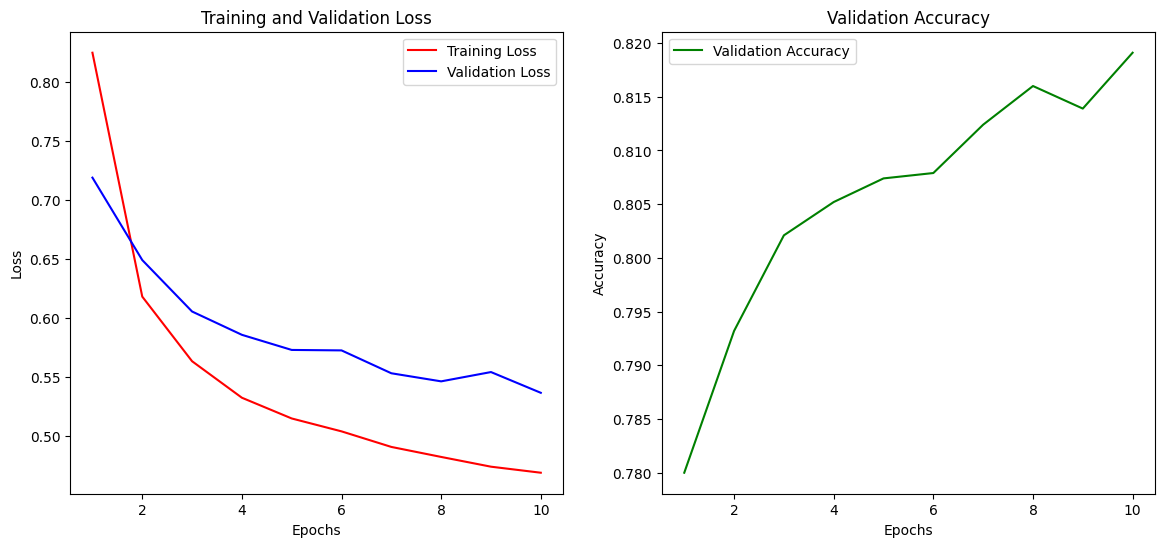

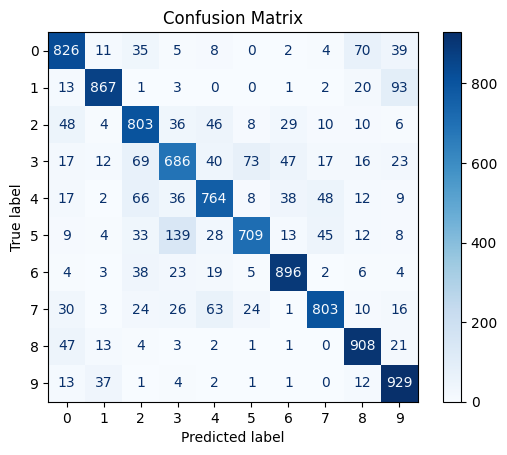

In [ ]:
plot_loss_accuracy(training_loss, val_losses, val_accs)
plot_confusion_matrix(model_101, value_loader, num_classes=10, device=device)

**ResNet152**

In [23]:
model_152 = models.resnet152(weights = 'IMAGENET1K_V1')
for param in model_152.parameters():
   param.requires_grad = False


model_152.fc = nn.Linear(model_152.fc.in_features, num_classes)



In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_152.fc.parameters(), lr=lr, momentum=0.9)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_152 = model_152.to(device)

In [26]:
training_loss, val_losses, val_accs = train_model(model_152, training_loader, value_loader, criterion, optimizer, num_epochs, device)


  0%|          | 1/391 [00:02<13:33,  2.09s/it]

Batch1 Loss: 2.402758836746216


  1%|          | 2/391 [00:03<09:38,  1.49s/it]

Batch2 Loss: 2.3715500831604004


  1%|          | 3/391 [00:04<08:09,  1.26s/it]

Batch3 Loss: 2.361941337585449


  1%|          | 4/391 [00:05<07:27,  1.16s/it]

Batch4 Loss: 2.3302628993988037


  1%|▏         | 5/391 [00:06<07:05,  1.10s/it]

Batch5 Loss: 2.3063652515411377


  2%|▏         | 6/391 [00:07<06:49,  1.06s/it]

Batch6 Loss: 2.277860403060913


  2%|▏         | 7/391 [00:08<06:47,  1.06s/it]

Batch7 Loss: 2.285292387008667


  2%|▏         | 8/391 [00:09<06:40,  1.05s/it]

Batch8 Loss: 2.2450804710388184


  2%|▏         | 9/391 [00:10<06:36,  1.04s/it]

Batch9 Loss: 2.2863786220550537


  3%|▎         | 10/391 [00:11<06:36,  1.04s/it]

Batch10 Loss: 2.2427456378936768


  3%|▎         | 11/391 [00:12<06:37,  1.05s/it]

Batch11 Loss: 2.228614330291748


  3%|▎         | 12/391 [00:13<06:35,  1.04s/it]

Batch12 Loss: 2.2493419647216797


  3%|▎         | 13/391 [00:14<06:33,  1.04s/it]

Batch13 Loss: 2.2065749168395996


  4%|▎         | 14/391 [00:15<06:31,  1.04s/it]

Batch14 Loss: 2.20721697807312


  4%|▍         | 15/391 [00:16<06:30,  1.04s/it]

Batch15 Loss: 2.145756483078003


  4%|▍         | 16/391 [00:17<06:31,  1.04s/it]

Batch16 Loss: 2.1649093627929688


  4%|▍         | 17/391 [00:18<06:31,  1.05s/it]

Batch17 Loss: 2.1311697959899902


  5%|▍         | 18/391 [00:19<06:32,  1.05s/it]

Batch18 Loss: 2.0779850482940674


  5%|▍         | 19/391 [00:20<06:31,  1.05s/it]

Batch19 Loss: 2.0679469108581543


  5%|▌         | 20/391 [00:21<06:35,  1.07s/it]

Batch20 Loss: 2.041919708251953


  5%|▌         | 21/391 [00:22<06:38,  1.08s/it]

Batch21 Loss: 2.0369162559509277


  6%|▌         | 22/391 [00:24<06:42,  1.09s/it]

Batch22 Loss: 2.0085701942443848


  6%|▌         | 23/391 [00:25<06:39,  1.08s/it]

Batch23 Loss: 2.007718086242676


  6%|▌         | 24/391 [00:26<06:42,  1.10s/it]

Batch24 Loss: 2.036041736602783


  6%|▋         | 25/391 [00:27<06:39,  1.09s/it]

Batch25 Loss: 1.980818271636963


  7%|▋         | 26/391 [00:28<06:37,  1.09s/it]

Batch26 Loss: 1.9380953311920166


  7%|▋         | 27/391 [00:29<06:35,  1.09s/it]

Batch27 Loss: 1.9338051080703735


  7%|▋         | 28/391 [00:30<06:44,  1.11s/it]

Batch28 Loss: 1.8899978399276733


  7%|▋         | 29/391 [00:31<06:51,  1.14s/it]

Batch29 Loss: 1.9250706434249878


  8%|▊         | 30/391 [00:32<06:43,  1.12s/it]

Batch30 Loss: 1.8711612224578857


  8%|▊         | 31/391 [00:33<06:37,  1.10s/it]

Batch31 Loss: 1.8813331127166748


  8%|▊         | 32/391 [00:35<06:32,  1.09s/it]

Batch32 Loss: 1.8567471504211426


  8%|▊         | 33/391 [00:36<06:29,  1.09s/it]

Batch33 Loss: 1.797332525253296


  9%|▊         | 34/391 [00:37<06:24,  1.08s/it]

Batch34 Loss: 1.8037381172180176


  9%|▉         | 35/391 [00:38<06:20,  1.07s/it]

Batch35 Loss: 1.761317491531372


  9%|▉         | 36/391 [00:39<06:23,  1.08s/it]

Batch36 Loss: 1.7685667276382446


  9%|▉         | 37/391 [00:40<06:21,  1.08s/it]

Batch37 Loss: 1.7146577835083008


 10%|▉         | 38/391 [00:41<06:18,  1.07s/it]

Batch38 Loss: 1.7185983657836914


 10%|▉         | 39/391 [00:42<06:20,  1.08s/it]

Batch39 Loss: 1.7721565961837769


 10%|█         | 40/391 [00:43<06:17,  1.07s/it]

Batch40 Loss: 1.6863102912902832


 10%|█         | 41/391 [00:44<06:12,  1.06s/it]

Batch41 Loss: 1.7157080173492432


 11%|█         | 42/391 [00:45<06:09,  1.06s/it]

Batch42 Loss: 1.6659479141235352


 11%|█         | 43/391 [00:46<06:05,  1.05s/it]

Batch43 Loss: 1.6679258346557617


 11%|█▏        | 44/391 [00:47<06:02,  1.04s/it]

Batch44 Loss: 1.7131561040878296


 12%|█▏        | 45/391 [00:48<06:00,  1.04s/it]

Batch45 Loss: 1.637097716331482


 12%|█▏        | 46/391 [00:49<05:58,  1.04s/it]

Batch46 Loss: 1.5817149877548218


 12%|█▏        | 47/391 [00:50<05:56,  1.04s/it]

Batch47 Loss: 1.6345534324645996


 12%|█▏        | 48/391 [00:51<05:54,  1.03s/it]

Batch48 Loss: 1.602866530418396


 13%|█▎        | 49/391 [00:52<05:53,  1.03s/it]

Batch49 Loss: 1.5953956842422485


 13%|█▎        | 50/391 [00:53<05:55,  1.04s/it]

Batch50 Loss: 1.5696643590927124


 13%|█▎        | 51/391 [00:55<05:57,  1.05s/it]

Batch51 Loss: 1.5440783500671387


 13%|█▎        | 52/391 [00:56<06:06,  1.08s/it]

Batch52 Loss: 1.5735704898834229


 14%|█▎        | 53/391 [00:57<06:02,  1.07s/it]

Batch53 Loss: 1.509852409362793


 14%|█▍        | 54/391 [00:58<05:55,  1.05s/it]

Batch54 Loss: 1.5801467895507812


 14%|█▍        | 55/391 [00:59<05:49,  1.04s/it]

Batch55 Loss: 1.5106314420700073


 14%|█▍        | 56/391 [01:00<05:45,  1.03s/it]

Batch56 Loss: 1.4815151691436768


 15%|█▍        | 57/391 [01:01<05:41,  1.02s/it]

Batch57 Loss: 1.4230918884277344


 15%|█▍        | 58/391 [01:02<05:38,  1.02s/it]

Batch58 Loss: 1.5055087804794312


 15%|█▌        | 59/391 [01:03<05:35,  1.01s/it]

Batch59 Loss: 1.5255300998687744


 15%|█▌        | 60/391 [01:04<05:33,  1.01s/it]

Batch60 Loss: 1.480373501777649


 16%|█▌        | 61/391 [01:05<05:31,  1.00s/it]

Batch61 Loss: 1.4329681396484375


 16%|█▌        | 62/391 [01:06<05:29,  1.00s/it]

Batch62 Loss: 1.432727336883545


 16%|█▌        | 63/391 [01:07<05:28,  1.00s/it]

Batch63 Loss: 1.431502342224121


 16%|█▋        | 64/391 [01:08<05:26,  1.00it/s]

Batch64 Loss: 1.435339093208313


 17%|█▋        | 65/391 [01:09<05:25,  1.00it/s]

Batch65 Loss: 1.435696005821228


 17%|█▋        | 66/391 [01:10<05:29,  1.01s/it]

Batch66 Loss: 1.3263272047042847


 17%|█▋        | 67/391 [01:11<05:33,  1.03s/it]

Batch67 Loss: 1.3919274806976318


 17%|█▋        | 68/391 [01:12<05:34,  1.04s/it]

Batch68 Loss: 1.4108985662460327


 18%|█▊        | 69/391 [01:13<05:34,  1.04s/it]

Batch69 Loss: 1.3683292865753174


 18%|█▊        | 70/391 [01:14<05:30,  1.03s/it]

Batch70 Loss: 1.3057440519332886


 18%|█▊        | 71/391 [01:15<05:25,  1.02s/it]

Batch71 Loss: 1.3394509553909302


 18%|█▊        | 72/391 [01:16<05:22,  1.01s/it]

Batch72 Loss: 1.3438829183578491


 19%|█▊        | 73/391 [01:17<05:19,  1.00s/it]

Batch73 Loss: 1.3708457946777344


 19%|█▉        | 74/391 [01:18<05:17,  1.00s/it]

Batch74 Loss: 1.282505750656128


 19%|█▉        | 75/391 [01:19<05:15,  1.00it/s]

Batch75 Loss: 1.2709064483642578


 19%|█▉        | 76/391 [01:20<05:13,  1.00it/s]

Batch76 Loss: 1.298332691192627


 20%|█▉        | 77/391 [01:21<05:12,  1.01it/s]

Batch77 Loss: 1.2376971244812012


 20%|█▉        | 78/391 [01:22<05:10,  1.01it/s]

Batch78 Loss: 1.331650733947754


 20%|██        | 79/391 [01:23<05:09,  1.01it/s]

Batch79 Loss: 1.2587146759033203


 20%|██        | 80/391 [01:24<05:08,  1.01it/s]

Batch80 Loss: 1.2584513425827026


 21%|██        | 81/391 [01:25<05:09,  1.00it/s]

Batch81 Loss: 1.2972406148910522


 21%|██        | 82/391 [01:26<05:09,  1.00s/it]

Batch82 Loss: 1.3226677179336548


 21%|██        | 83/391 [01:27<05:11,  1.01s/it]

Batch83 Loss: 1.228333592414856


 21%|██▏       | 84/391 [01:28<05:10,  1.01s/it]

Batch84 Loss: 1.1880853176116943


 22%|██▏       | 85/391 [01:29<05:09,  1.01s/it]

Batch85 Loss: 1.2799856662750244


 22%|██▏       | 86/391 [01:30<05:07,  1.01s/it]

Batch86 Loss: 1.2414274215698242


 22%|██▏       | 87/391 [01:31<05:05,  1.01s/it]

Batch87 Loss: 1.228592038154602


 23%|██▎       | 88/391 [01:32<05:03,  1.00s/it]

Batch88 Loss: 1.2411233186721802


 23%|██▎       | 89/391 [01:33<05:03,  1.01s/it]

Batch89 Loss: 1.2132079601287842


 23%|██▎       | 90/391 [01:34<05:01,  1.00s/it]

Batch90 Loss: 1.2972259521484375


 23%|██▎       | 91/391 [01:35<05:00,  1.00s/it]

Batch91 Loss: 1.1724021434783936


 24%|██▎       | 92/391 [01:36<05:00,  1.00s/it]

Batch92 Loss: 1.2137120962142944


 24%|██▍       | 93/391 [01:37<04:59,  1.00s/it]

Batch93 Loss: 1.1117527484893799


 24%|██▍       | 94/391 [01:38<04:58,  1.00s/it]

Batch94 Loss: 1.1961065530776978


 24%|██▍       | 95/391 [01:39<04:57,  1.00s/it]

Batch95 Loss: 1.1691840887069702


 25%|██▍       | 96/391 [01:40<04:58,  1.01s/it]

Batch96 Loss: 1.2069792747497559


 25%|██▍       | 97/391 [01:41<05:00,  1.02s/it]

Batch97 Loss: 1.1447374820709229


 25%|██▌       | 98/391 [01:42<04:59,  1.02s/it]

Batch98 Loss: 1.1123754978179932


 25%|██▌       | 99/391 [01:43<05:02,  1.03s/it]

Batch99 Loss: 1.0765290260314941


 26%|██▌       | 100/391 [01:44<05:03,  1.04s/it]

Batch100 Loss: 1.1772487163543701


 26%|██▌       | 101/391 [01:45<05:00,  1.03s/it]

Batch101 Loss: 1.0848582983016968


 26%|██▌       | 102/391 [01:46<04:57,  1.03s/it]

Batch102 Loss: 1.159705400466919


 26%|██▋       | 103/391 [01:47<04:54,  1.02s/it]

Batch103 Loss: 1.1454983949661255


 27%|██▋       | 104/391 [01:48<04:52,  1.02s/it]

Batch104 Loss: 1.1880578994750977


 27%|██▋       | 105/391 [01:49<04:51,  1.02s/it]

Batch105 Loss: 1.1107414960861206


 27%|██▋       | 106/391 [01:50<04:50,  1.02s/it]

Batch106 Loss: 1.1303379535675049


 27%|██▋       | 107/391 [01:51<04:49,  1.02s/it]

Batch107 Loss: 1.1316378116607666


 28%|██▊       | 108/391 [01:52<04:48,  1.02s/it]

Batch108 Loss: 1.0333119630813599


 28%|██▊       | 109/391 [01:53<04:47,  1.02s/it]

Batch109 Loss: 1.1566417217254639


 28%|██▊       | 110/391 [01:54<04:47,  1.02s/it]

Batch110 Loss: 1.0796173810958862


 28%|██▊       | 111/391 [01:55<04:49,  1.03s/it]

Batch111 Loss: 1.128185510635376


 29%|██▊       | 112/391 [01:56<04:46,  1.03s/it]

Batch112 Loss: 1.049060583114624


 29%|██▉       | 113/391 [01:58<04:47,  1.03s/it]

Batch113 Loss: 1.1370495557785034


 29%|██▉       | 114/391 [01:59<04:50,  1.05s/it]

Batch114 Loss: 1.1175576448440552


 29%|██▉       | 115/391 [02:00<04:47,  1.04s/it]

Batch115 Loss: 1.1034342050552368


 30%|██▉       | 116/391 [02:01<04:45,  1.04s/it]

Batch116 Loss: 1.0116478204727173


 30%|██▉       | 117/391 [02:02<04:43,  1.04s/it]

Batch117 Loss: 1.0618107318878174


 30%|███       | 118/391 [02:03<04:42,  1.04s/it]

Batch118 Loss: 1.1196786165237427


 30%|███       | 119/391 [02:04<04:41,  1.03s/it]

Batch119 Loss: 1.0687506198883057


 31%|███       | 120/391 [02:05<04:39,  1.03s/it]

Batch120 Loss: 1.0403268337249756


 31%|███       | 121/391 [02:06<04:36,  1.03s/it]

Batch121 Loss: 1.114160180091858


 31%|███       | 122/391 [02:07<04:34,  1.02s/it]

Batch122 Loss: 1.0565823316574097


 31%|███▏      | 123/391 [02:08<04:32,  1.02s/it]

Batch123 Loss: 1.0474529266357422


 32%|███▏      | 124/391 [02:09<04:31,  1.02s/it]

Batch124 Loss: 1.061589241027832


 32%|███▏      | 125/391 [02:10<04:29,  1.01s/it]

Batch125 Loss: 1.0186642408370972


 32%|███▏      | 126/391 [02:11<04:30,  1.02s/it]

Batch126 Loss: 1.0464341640472412


 32%|███▏      | 127/391 [02:12<04:30,  1.02s/it]

Batch127 Loss: 1.0339536666870117


 33%|███▎      | 128/391 [02:13<04:31,  1.03s/it]

Batch128 Loss: 0.9355494976043701


 33%|███▎      | 129/391 [02:14<04:35,  1.05s/it]

Batch129 Loss: 1.1796619892120361


 33%|███▎      | 130/391 [02:15<04:31,  1.04s/it]

Batch130 Loss: 1.0245167016983032


 34%|███▎      | 131/391 [02:16<04:28,  1.03s/it]

Batch131 Loss: 1.0940158367156982


 34%|███▍      | 132/391 [02:17<04:26,  1.03s/it]

Batch132 Loss: 1.0538777112960815


 34%|███▍      | 133/391 [02:18<04:23,  1.02s/it]

Batch133 Loss: 1.060660719871521


 34%|███▍      | 134/391 [02:19<04:21,  1.02s/it]

Batch134 Loss: 0.9460459351539612


 35%|███▍      | 135/391 [02:20<04:19,  1.02s/it]

Batch135 Loss: 1.0554728507995605


 35%|███▍      | 136/391 [02:21<04:18,  1.01s/it]

Batch136 Loss: 0.9866353273391724


 35%|███▌      | 137/391 [02:22<04:17,  1.01s/it]

Batch137 Loss: 1.0749914646148682


 35%|███▌      | 138/391 [02:23<04:15,  1.01s/it]

Batch138 Loss: 1.031470775604248


 36%|███▌      | 139/391 [02:24<04:14,  1.01s/it]

Batch139 Loss: 0.9575719237327576


 36%|███▌      | 140/391 [02:25<04:13,  1.01s/it]

Batch140 Loss: 0.9317447543144226


 36%|███▌      | 141/391 [02:26<04:16,  1.02s/it]

Batch141 Loss: 0.9481310844421387


 36%|███▋      | 142/391 [02:27<04:17,  1.03s/it]

Batch142 Loss: 0.9803093075752258


 37%|███▋      | 143/391 [02:28<04:14,  1.02s/it]

Batch143 Loss: 1.0129680633544922


 37%|███▋      | 144/391 [02:29<04:16,  1.04s/it]

Batch144 Loss: 0.9647148847579956


 37%|███▋      | 145/391 [02:30<04:13,  1.03s/it]

Batch145 Loss: 0.8692135810852051


 37%|███▋      | 146/391 [02:31<04:11,  1.02s/it]

Batch146 Loss: 0.9365370273590088


 38%|███▊      | 147/391 [02:32<04:09,  1.02s/it]

Batch147 Loss: 1.080090045928955


 38%|███▊      | 148/391 [02:33<04:07,  1.02s/it]

Batch148 Loss: 1.062395691871643


 38%|███▊      | 149/391 [02:34<04:05,  1.02s/it]

Batch149 Loss: 0.9698129296302795


 38%|███▊      | 150/391 [02:35<04:04,  1.01s/it]

Batch150 Loss: 1.0058882236480713


 39%|███▊      | 151/391 [02:36<04:02,  1.01s/it]

Batch151 Loss: 0.9705796837806702


 39%|███▉      | 152/391 [02:37<04:01,  1.01s/it]

Batch152 Loss: 0.9572750329971313


 39%|███▉      | 153/391 [02:38<04:00,  1.01s/it]

Batch153 Loss: 0.9737563133239746


 39%|███▉      | 154/391 [02:39<03:59,  1.01s/it]

Batch154 Loss: 0.8697938323020935


 40%|███▉      | 155/391 [02:41<04:02,  1.03s/it]

Batch155 Loss: 1.0122320652008057


 40%|███▉      | 156/391 [02:42<04:01,  1.03s/it]

Batch156 Loss: 1.0262188911437988


 40%|████      | 157/391 [02:43<04:01,  1.03s/it]

Batch157 Loss: 0.9993029832839966


 40%|████      | 158/391 [02:44<04:04,  1.05s/it]

Batch158 Loss: 0.9187254905700684


 41%|████      | 159/391 [02:45<04:05,  1.06s/it]

Batch159 Loss: 1.0198239088058472


 41%|████      | 160/391 [02:46<04:01,  1.05s/it]

Batch160 Loss: 0.9419576525688171


 41%|████      | 161/391 [02:47<03:57,  1.03s/it]

Batch161 Loss: 0.9408291578292847


 41%|████▏     | 162/391 [02:48<03:54,  1.02s/it]

Batch162 Loss: 1.0547116994857788


 42%|████▏     | 163/391 [02:49<03:52,  1.02s/it]

Batch163 Loss: 1.0780495405197144


 42%|████▏     | 164/391 [02:50<03:51,  1.02s/it]

Batch164 Loss: 1.082580327987671


 42%|████▏     | 165/391 [02:51<03:48,  1.01s/it]

Batch165 Loss: 0.9203611016273499


 42%|████▏     | 166/391 [02:52<03:47,  1.01s/it]

Batch166 Loss: 1.0141533613204956


 43%|████▎     | 167/391 [02:53<03:46,  1.01s/it]

Batch167 Loss: 0.9519274234771729


 43%|████▎     | 168/391 [02:54<03:45,  1.01s/it]

Batch168 Loss: 0.9053746461868286


 43%|████▎     | 169/391 [02:55<03:43,  1.01s/it]

Batch169 Loss: 0.8726303577423096


 43%|████▎     | 170/391 [02:56<03:43,  1.01s/it]

Batch170 Loss: 1.0339115858078003


 44%|████▎     | 171/391 [02:57<03:43,  1.02s/it]

Batch171 Loss: 0.9431063532829285


 44%|████▍     | 172/391 [02:58<03:43,  1.02s/it]

Batch172 Loss: 0.9835683703422546


 44%|████▍     | 173/391 [02:59<03:42,  1.02s/it]

Batch173 Loss: 0.9629864692687988


 45%|████▍     | 174/391 [03:00<03:40,  1.02s/it]

Batch174 Loss: 0.865682065486908


 45%|████▍     | 175/391 [03:01<03:40,  1.02s/it]

Batch175 Loss: 0.9297489523887634


 45%|████▌     | 176/391 [03:02<03:37,  1.01s/it]

Batch176 Loss: 0.8847141861915588


 45%|████▌     | 177/391 [03:03<03:36,  1.01s/it]

Batch177 Loss: 0.8855881094932556


 46%|████▌     | 178/391 [03:04<03:35,  1.01s/it]

Batch178 Loss: 1.0226614475250244


 46%|████▌     | 179/391 [03:05<03:34,  1.01s/it]

Batch179 Loss: 0.8493282794952393


 46%|████▌     | 180/391 [03:06<03:33,  1.01s/it]

Batch180 Loss: 0.9749881029129028


 46%|████▋     | 181/391 [03:07<03:32,  1.01s/it]

Batch181 Loss: 0.9373214840888977


 47%|████▋     | 182/391 [03:08<03:30,  1.01s/it]

Batch182 Loss: 0.8619028329849243


 47%|████▋     | 183/391 [03:09<03:29,  1.01s/it]

Batch183 Loss: 0.9683631062507629


 47%|████▋     | 184/391 [03:10<03:28,  1.01s/it]

Batch184 Loss: 0.8717789649963379


 47%|████▋     | 185/391 [03:11<03:28,  1.01s/it]

Batch185 Loss: 0.8225194811820984


 48%|████▊     | 186/391 [03:12<03:31,  1.03s/it]

Batch186 Loss: 0.9554826617240906


 48%|████▊     | 187/391 [03:13<03:29,  1.03s/it]

Batch187 Loss: 0.8065375089645386


 48%|████▊     | 188/391 [03:14<03:29,  1.03s/it]

Batch188 Loss: 0.7460373640060425


 48%|████▊     | 189/391 [03:15<03:26,  1.02s/it]

Batch189 Loss: 0.8509140014648438


 49%|████▊     | 190/391 [03:16<03:27,  1.03s/it]

Batch190 Loss: 0.8781836032867432


 49%|████▉     | 191/391 [03:17<03:26,  1.03s/it]

Batch191 Loss: 0.8024458885192871


 49%|████▉     | 192/391 [03:18<03:24,  1.03s/it]

Batch192 Loss: 0.8903136253356934


 49%|████▉     | 193/391 [03:19<03:23,  1.03s/it]

Batch193 Loss: 0.9502989053726196


 50%|████▉     | 194/391 [03:20<03:22,  1.03s/it]

Batch194 Loss: 0.8609272837638855


 50%|████▉     | 195/391 [03:21<03:20,  1.02s/it]

Batch195 Loss: 0.97039395570755


 50%|█████     | 196/391 [03:22<03:18,  1.02s/it]

Batch196 Loss: 0.8819596171379089


 50%|█████     | 197/391 [03:23<03:17,  1.02s/it]

Batch197 Loss: 0.8667120933532715


 51%|█████     | 198/391 [03:24<03:15,  1.01s/it]

Batch198 Loss: 0.8927372097969055


 51%|█████     | 199/391 [03:25<03:14,  1.01s/it]

Batch199 Loss: 0.8107182383537292


 51%|█████     | 200/391 [03:26<03:14,  1.02s/it]

Batch200 Loss: 0.9259713888168335


 51%|█████▏    | 201/391 [03:27<03:12,  1.01s/it]

Batch201 Loss: 0.8442737460136414


 52%|█████▏    | 202/391 [03:28<03:12,  1.02s/it]

Batch202 Loss: 0.93793785572052


 52%|█████▏    | 203/391 [03:29<03:12,  1.02s/it]

Batch203 Loss: 0.8351479768753052


 52%|█████▏    | 204/391 [03:31<03:13,  1.04s/it]

Batch204 Loss: 0.8151518106460571


 52%|█████▏    | 205/391 [03:32<03:12,  1.03s/it]

Batch205 Loss: 0.9057363867759705


 53%|█████▎    | 206/391 [03:33<03:09,  1.03s/it]

Batch206 Loss: 0.7797949314117432


 53%|█████▎    | 207/391 [03:34<03:08,  1.02s/it]

Batch207 Loss: 0.8399541974067688


 53%|█████▎    | 208/391 [03:35<03:06,  1.02s/it]

Batch208 Loss: 0.8624083399772644


 53%|█████▎    | 209/391 [03:36<03:04,  1.02s/it]

Batch209 Loss: 0.82240229845047


 54%|█████▎    | 210/391 [03:37<03:03,  1.02s/it]

Batch210 Loss: 0.9457822442054749


 54%|█████▍    | 211/391 [03:38<03:02,  1.01s/it]

Batch211 Loss: 0.8360682725906372


 54%|█████▍    | 212/391 [03:39<03:01,  1.01s/it]

Batch212 Loss: 0.8335828185081482


 54%|█████▍    | 213/391 [03:40<03:00,  1.01s/it]

Batch213 Loss: 0.8353820443153381


 55%|█████▍    | 214/391 [03:41<02:59,  1.01s/it]

Batch214 Loss: 0.8470392227172852


 55%|█████▍    | 215/391 [03:42<02:58,  1.01s/it]

Batch215 Loss: 0.9168240427970886


 55%|█████▌    | 216/391 [03:43<03:00,  1.03s/it]

Batch216 Loss: 0.9763436317443848


 55%|█████▌    | 217/391 [03:44<02:59,  1.03s/it]

Batch217 Loss: 0.9514672756195068


 56%|█████▌    | 218/391 [03:45<02:58,  1.03s/it]

Batch218 Loss: 0.7724909782409668


 56%|█████▌    | 219/391 [03:46<02:57,  1.03s/it]

Batch219 Loss: 0.9667442440986633


 56%|█████▋    | 220/391 [03:47<02:57,  1.04s/it]

Batch220 Loss: 0.8322473764419556


 57%|█████▋    | 221/391 [03:48<02:54,  1.03s/it]

Batch221 Loss: 0.9453954696655273


 57%|█████▋    | 222/391 [03:49<02:53,  1.03s/it]

Batch222 Loss: 0.7931505441665649


 57%|█████▋    | 223/391 [03:50<02:51,  1.02s/it]

Batch223 Loss: 0.8428651690483093


 57%|█████▋    | 224/391 [03:51<02:50,  1.02s/it]

Batch224 Loss: 0.8371926546096802


 58%|█████▊    | 225/391 [03:52<02:48,  1.02s/it]

Batch225 Loss: 0.7473713755607605


 58%|█████▊    | 226/391 [03:53<02:47,  1.02s/it]

Batch226 Loss: 0.7599676847457886


 58%|█████▊    | 227/391 [03:54<02:47,  1.02s/it]

Batch227 Loss: 0.7516734004020691


 58%|█████▊    | 228/391 [03:55<02:47,  1.03s/it]

Batch228 Loss: 0.7997541427612305


 59%|█████▊    | 229/391 [03:56<02:48,  1.04s/it]

Batch229 Loss: 0.8011212348937988


 59%|█████▉    | 230/391 [03:57<02:46,  1.03s/it]

Batch230 Loss: 0.8311027884483337


 59%|█████▉    | 231/391 [03:58<02:44,  1.03s/it]

Batch231 Loss: 0.8667500615119934


 59%|█████▉    | 232/391 [03:59<02:44,  1.03s/it]

Batch232 Loss: 0.8702597618103027


 60%|█████▉    | 233/391 [04:00<02:43,  1.04s/it]

Batch233 Loss: 0.8011895418167114


 60%|█████▉    | 234/391 [04:01<02:43,  1.04s/it]

Batch234 Loss: 0.7970119714736938


 60%|██████    | 235/391 [04:02<02:44,  1.05s/it]

Batch235 Loss: 0.7817392349243164


 60%|██████    | 236/391 [04:03<02:43,  1.05s/it]

Batch236 Loss: 0.9093950390815735


 61%|██████    | 237/391 [04:04<02:39,  1.04s/it]

Batch237 Loss: 0.7979769706726074


 61%|██████    | 238/391 [04:05<02:37,  1.03s/it]

Batch238 Loss: 0.729168713092804


 61%|██████    | 239/391 [04:06<02:35,  1.02s/it]

Batch239 Loss: 0.6869027018547058


 61%|██████▏   | 240/391 [04:07<02:34,  1.02s/it]

Batch240 Loss: 0.7476997375488281


 62%|██████▏   | 241/391 [04:08<02:32,  1.02s/it]

Batch241 Loss: 0.7929097414016724


 62%|██████▏   | 242/391 [04:10<02:31,  1.02s/it]

Batch242 Loss: 0.8675110340118408


 62%|██████▏   | 243/391 [04:11<02:30,  1.01s/it]

Batch243 Loss: 0.7990226149559021


 62%|██████▏   | 244/391 [04:12<02:29,  1.01s/it]

Batch244 Loss: 0.8427542448043823


 63%|██████▎   | 245/391 [04:13<02:27,  1.01s/it]

Batch245 Loss: 0.8898624181747437


 63%|██████▎   | 246/391 [04:14<02:26,  1.01s/it]

Batch246 Loss: 0.7409616112709045


 63%|██████▎   | 247/391 [04:15<02:25,  1.01s/it]

Batch247 Loss: 0.855318009853363


 63%|██████▎   | 248/391 [04:16<02:26,  1.02s/it]

Batch248 Loss: 0.8885514736175537


 64%|██████▎   | 249/391 [04:17<02:24,  1.02s/it]

Batch249 Loss: 0.7645944356918335


 64%|██████▍   | 250/391 [04:18<02:26,  1.04s/it]

Batch250 Loss: 0.7871949076652527


 64%|██████▍   | 251/391 [04:19<02:25,  1.04s/it]

Batch251 Loss: 0.7656850218772888


 64%|██████▍   | 252/391 [04:20<02:23,  1.03s/it]

Batch252 Loss: 0.9189886450767517


 65%|██████▍   | 253/391 [04:21<02:21,  1.03s/it]

Batch253 Loss: 0.7976118922233582


 65%|██████▍   | 254/391 [04:22<02:20,  1.03s/it]

Batch254 Loss: 0.8992915153503418


 65%|██████▌   | 255/391 [04:23<02:19,  1.02s/it]

Batch255 Loss: 0.6781468391418457


 65%|██████▌   | 256/391 [04:24<02:17,  1.02s/it]

Batch256 Loss: 0.7997483015060425


 66%|██████▌   | 257/391 [04:25<02:16,  1.02s/it]

Batch257 Loss: 0.7200116515159607


 66%|██████▌   | 258/391 [04:26<02:14,  1.01s/it]

Batch258 Loss: 0.782986044883728


 66%|██████▌   | 259/391 [04:27<02:13,  1.01s/it]

Batch259 Loss: 0.7937349677085876


 66%|██████▋   | 260/391 [04:28<02:12,  1.01s/it]

Batch260 Loss: 0.8334888219833374


 67%|██████▋   | 261/391 [04:29<02:11,  1.01s/it]

Batch261 Loss: 0.7934489846229553


 67%|██████▋   | 262/391 [04:30<02:10,  1.01s/it]

Batch262 Loss: 0.7708926200866699


 67%|██████▋   | 263/391 [04:31<02:10,  1.02s/it]

Batch263 Loss: 0.8117886781692505


 68%|██████▊   | 264/391 [04:32<02:11,  1.03s/it]

Batch264 Loss: 0.8391641974449158


 68%|██████▊   | 265/391 [04:33<02:11,  1.05s/it]

Batch265 Loss: 0.781383752822876


 68%|██████▊   | 266/391 [04:34<02:09,  1.04s/it]

Batch266 Loss: 0.7762131690979004


 68%|██████▊   | 267/391 [04:35<02:08,  1.03s/it]

Batch267 Loss: 0.7756088972091675


 69%|██████▊   | 268/391 [04:36<02:06,  1.03s/it]

Batch268 Loss: 0.7599038481712341


 69%|██████▉   | 269/391 [04:37<02:04,  1.02s/it]

Batch269 Loss: 0.8222973942756653


 69%|██████▉   | 270/391 [04:38<02:03,  1.02s/it]

Batch270 Loss: 0.8244788646697998


 69%|██████▉   | 271/391 [04:39<02:02,  1.02s/it]

Batch271 Loss: 0.7329512238502502


 70%|██████▉   | 272/391 [04:40<02:01,  1.02s/it]

Batch272 Loss: 0.7624398469924927


 70%|██████▉   | 273/391 [04:41<01:59,  1.02s/it]

Batch273 Loss: 0.7977549433708191


 70%|███████   | 274/391 [04:42<01:58,  1.01s/it]

Batch274 Loss: 0.7687734365463257


 70%|███████   | 275/391 [04:43<01:57,  1.01s/it]

Batch275 Loss: 0.8351542353630066


 71%|███████   | 276/391 [04:44<01:56,  1.01s/it]

Batch276 Loss: 0.8524969816207886


 71%|███████   | 277/391 [04:45<01:56,  1.02s/it]

Batch277 Loss: 0.80536288022995


 71%|███████   | 278/391 [04:46<01:55,  1.02s/it]

Batch278 Loss: 0.9953583478927612


 71%|███████▏  | 279/391 [04:47<01:54,  1.03s/it]

Batch279 Loss: 0.8500129580497742


 72%|███████▏  | 280/391 [04:48<01:55,  1.04s/it]

Batch280 Loss: 0.7464321851730347


 72%|███████▏  | 281/391 [04:49<01:55,  1.05s/it]

Batch281 Loss: 0.7998861074447632


 72%|███████▏  | 282/391 [04:51<01:53,  1.05s/it]

Batch282 Loss: 0.7752765417098999


 72%|███████▏  | 283/391 [04:52<01:51,  1.03s/it]

Batch283 Loss: 0.8312583565711975


 73%|███████▎  | 284/391 [04:53<01:49,  1.03s/it]

Batch284 Loss: 0.891277551651001


 73%|███████▎  | 285/391 [04:54<01:48,  1.02s/it]

Batch285 Loss: 0.7421491146087646


 73%|███████▎  | 286/391 [04:55<01:47,  1.02s/it]

Batch286 Loss: 0.7205625772476196


 73%|███████▎  | 287/391 [04:56<01:45,  1.02s/it]

Batch287 Loss: 0.7503827810287476


 74%|███████▎  | 288/391 [04:57<01:44,  1.01s/it]

Batch288 Loss: 0.7315384149551392


 74%|███████▍  | 289/391 [04:58<01:43,  1.01s/it]

Batch289 Loss: 0.816162645816803


 74%|███████▍  | 290/391 [04:59<01:42,  1.01s/it]

Batch290 Loss: 0.6623042225837708


 74%|███████▍  | 291/391 [05:00<01:41,  1.01s/it]

Batch291 Loss: 0.6505475044250488


 75%|███████▍  | 292/391 [05:01<01:40,  1.02s/it]

Batch292 Loss: 0.749817430973053


 75%|███████▍  | 293/391 [05:02<01:40,  1.03s/it]

Batch293 Loss: 0.7738274931907654


 75%|███████▌  | 294/391 [05:03<01:39,  1.03s/it]

Batch294 Loss: 0.8214688897132874


 75%|███████▌  | 295/391 [05:04<01:38,  1.02s/it]

Batch295 Loss: 0.7622785568237305


 76%|███████▌  | 296/391 [05:05<01:37,  1.03s/it]

Batch296 Loss: 0.7742590308189392


 76%|███████▌  | 297/391 [05:06<01:36,  1.02s/it]

Batch297 Loss: 0.7782809138298035


 76%|███████▌  | 298/391 [05:07<01:34,  1.02s/it]

Batch298 Loss: 0.7151238322257996


 76%|███████▋  | 299/391 [05:08<01:34,  1.02s/it]

Batch299 Loss: 0.79847252368927


 77%|███████▋  | 300/391 [05:09<01:32,  1.02s/it]

Batch300 Loss: 0.8302164673805237


 77%|███████▋  | 301/391 [05:10<01:31,  1.02s/it]

Batch301 Loss: 0.7243489623069763


 77%|███████▋  | 302/391 [05:11<01:30,  1.02s/it]

Batch302 Loss: 0.8300549983978271


 77%|███████▋  | 303/391 [05:12<01:29,  1.02s/it]

Batch303 Loss: 0.7468582391738892


 78%|███████▊  | 304/391 [05:13<01:28,  1.01s/it]

Batch304 Loss: 0.9003430008888245


 78%|███████▊  | 305/391 [05:14<01:27,  1.01s/it]

Batch305 Loss: 0.7245681881904602


 78%|███████▊  | 306/391 [05:15<01:26,  1.01s/it]

Batch306 Loss: 0.8155423402786255


 79%|███████▊  | 307/391 [05:16<01:26,  1.03s/it]

Batch307 Loss: 0.7499855756759644


 79%|███████▉  | 308/391 [05:17<01:26,  1.04s/it]

Batch308 Loss: 0.7017552256584167


 79%|███████▉  | 309/391 [05:18<01:25,  1.04s/it]

Batch309 Loss: 0.7094129323959351


 79%|███████▉  | 310/391 [05:19<01:25,  1.05s/it]

Batch310 Loss: 0.7708355784416199


 80%|███████▉  | 311/391 [05:20<01:24,  1.06s/it]

Batch311 Loss: 0.8259353041648865


 80%|███████▉  | 312/391 [05:21<01:22,  1.04s/it]

Batch312 Loss: 0.7756155133247375


 80%|████████  | 313/391 [05:22<01:20,  1.03s/it]

Batch313 Loss: 0.646194577217102


 80%|████████  | 314/391 [05:23<01:19,  1.03s/it]

Batch314 Loss: 0.8522841930389404


 81%|████████  | 315/391 [05:24<01:17,  1.02s/it]

Batch315 Loss: 0.765953540802002


 81%|████████  | 316/391 [05:25<01:16,  1.02s/it]

Batch316 Loss: 0.7915142178535461


 81%|████████  | 317/391 [05:26<01:15,  1.02s/it]

Batch317 Loss: 0.7153457999229431


 81%|████████▏ | 318/391 [05:27<01:13,  1.01s/it]

Batch318 Loss: 0.7503787875175476


 82%|████████▏ | 319/391 [05:28<01:13,  1.02s/it]

Batch319 Loss: 0.7832766771316528


 82%|████████▏ | 320/391 [05:29<01:12,  1.01s/it]

Batch320 Loss: 0.7241241335868835


 82%|████████▏ | 321/391 [05:30<01:10,  1.01s/it]

Batch321 Loss: 0.7803174257278442


 82%|████████▏ | 322/391 [05:31<01:10,  1.02s/it]

Batch322 Loss: 0.7315192818641663


 83%|████████▎ | 323/391 [05:32<01:10,  1.03s/it]

Batch323 Loss: 0.7523816227912903


 83%|████████▎ | 324/391 [05:34<01:10,  1.05s/it]

Batch324 Loss: 0.7659997940063477


 83%|████████▎ | 325/391 [05:35<01:09,  1.05s/it]

Batch325 Loss: 0.7273948788642883


 83%|████████▎ | 326/391 [05:36<01:08,  1.06s/it]

Batch326 Loss: 0.8110567331314087


 84%|████████▎ | 327/391 [05:37<01:07,  1.06s/it]

Batch327 Loss: 0.8992311954498291


 84%|████████▍ | 328/391 [05:38<01:05,  1.05s/it]

Batch328 Loss: 0.7384995222091675


 84%|████████▍ | 329/391 [05:39<01:04,  1.04s/it]

Batch329 Loss: 0.8074387311935425


 84%|████████▍ | 330/391 [05:40<01:02,  1.03s/it]

Batch330 Loss: 0.8107631802558899


 85%|████████▍ | 331/391 [05:41<01:01,  1.02s/it]

Batch331 Loss: 0.6858078837394714


 85%|████████▍ | 332/391 [05:42<01:00,  1.02s/it]

Batch332 Loss: 0.7528025507926941


 85%|████████▌ | 333/391 [05:43<00:59,  1.02s/it]

Batch333 Loss: 0.7274221181869507


 85%|████████▌ | 334/391 [05:44<00:58,  1.02s/it]

Batch334 Loss: 0.6396108269691467


 86%|████████▌ | 335/391 [05:45<00:57,  1.02s/it]

Batch335 Loss: 0.7250126004219055


 86%|████████▌ | 336/391 [05:46<00:56,  1.02s/it]

Batch336 Loss: 0.7908441424369812


 86%|████████▌ | 337/391 [05:47<00:54,  1.02s/it]

Batch337 Loss: 0.7670854926109314


 86%|████████▋ | 338/391 [05:48<00:54,  1.02s/it]

Batch338 Loss: 0.7237594723701477


 87%|████████▋ | 339/391 [05:49<00:53,  1.02s/it]

Batch339 Loss: 0.7261033058166504


 87%|████████▋ | 340/391 [05:50<00:52,  1.03s/it]

Batch340 Loss: 0.7892346382141113


 87%|████████▋ | 341/391 [05:51<00:51,  1.03s/it]

Batch341 Loss: 0.8115110993385315


 87%|████████▋ | 342/391 [05:52<00:51,  1.04s/it]

Batch342 Loss: 0.6934612393379211


 88%|████████▊ | 343/391 [05:53<00:49,  1.03s/it]

Batch343 Loss: 0.6788657307624817


 88%|████████▊ | 344/391 [05:54<00:48,  1.03s/it]

Batch344 Loss: 0.790450930595398


 88%|████████▊ | 345/391 [05:55<00:47,  1.03s/it]

Batch345 Loss: 0.716692328453064


 88%|████████▊ | 346/391 [05:56<00:46,  1.03s/it]

Batch346 Loss: 0.6360185742378235


 89%|████████▊ | 347/391 [05:57<00:45,  1.03s/it]

Batch347 Loss: 0.7254914045333862


 89%|████████▉ | 348/391 [05:58<00:43,  1.02s/it]

Batch348 Loss: 0.7542356252670288


 89%|████████▉ | 349/391 [05:59<00:42,  1.02s/it]

Batch349 Loss: 0.6617311239242554


 90%|████████▉ | 350/391 [06:00<00:41,  1.02s/it]

Batch350 Loss: 0.7022307515144348


 90%|████████▉ | 351/391 [06:01<00:40,  1.02s/it]

Batch351 Loss: 0.6218249201774597


 90%|█████████ | 352/391 [06:02<00:39,  1.01s/it]

Batch352 Loss: 0.7858377695083618


 90%|█████████ | 353/391 [06:03<00:38,  1.02s/it]

Batch353 Loss: 0.7044379711151123


 91%|█████████ | 354/391 [06:04<00:37,  1.02s/it]

Batch354 Loss: 0.6185972094535828


 91%|█████████ | 355/391 [06:05<00:36,  1.02s/it]

Batch355 Loss: 0.7644191384315491


 91%|█████████ | 356/391 [06:06<00:35,  1.03s/it]

Batch356 Loss: 0.7754297852516174


 91%|█████████▏| 357/391 [06:07<00:35,  1.04s/it]

Batch357 Loss: 0.7220892906188965


 92%|█████████▏| 358/391 [06:08<00:34,  1.03s/it]

Batch358 Loss: 0.7511504888534546


 92%|█████████▏| 359/391 [06:09<00:32,  1.02s/it]

Batch359 Loss: 0.6821012496948242


 92%|█████████▏| 360/391 [06:10<00:31,  1.02s/it]

Batch360 Loss: 0.7188780903816223


 92%|█████████▏| 361/391 [06:11<00:30,  1.02s/it]

Batch361 Loss: 0.8607704639434814


 93%|█████████▎| 362/391 [06:12<00:29,  1.02s/it]

Batch362 Loss: 0.7052821516990662


 93%|█████████▎| 363/391 [06:14<00:28,  1.02s/it]

Batch363 Loss: 0.7184176445007324


 93%|█████████▎| 364/391 [06:15<00:27,  1.01s/it]

Batch364 Loss: 0.7635817527770996


 93%|█████████▎| 365/391 [06:16<00:26,  1.01s/it]

Batch365 Loss: 0.7379985451698303


 94%|█████████▎| 366/391 [06:17<00:25,  1.01s/it]

Batch366 Loss: 0.8038889169692993


 94%|█████████▍| 367/391 [06:18<00:24,  1.01s/it]

Batch367 Loss: 0.6840149164199829


 94%|█████████▍| 368/391 [06:19<00:23,  1.03s/it]

Batch368 Loss: 0.7814037203788757


 94%|█████████▍| 369/391 [06:20<00:22,  1.03s/it]

Batch369 Loss: 0.8431400060653687


 95%|█████████▍| 370/391 [06:21<00:21,  1.03s/it]

Batch370 Loss: 0.6972986459732056


 95%|█████████▍| 371/391 [06:22<00:20,  1.03s/it]

Batch371 Loss: 0.7452098727226257


 95%|█████████▌| 372/391 [06:23<00:19,  1.02s/it]

Batch372 Loss: 0.6911115646362305


 95%|█████████▌| 373/391 [06:24<00:18,  1.01s/it]

Batch373 Loss: 0.71467524766922


 96%|█████████▌| 374/391 [06:25<00:17,  1.01s/it]

Batch374 Loss: 0.6453549265861511


 96%|█████████▌| 375/391 [06:26<00:16,  1.01s/it]

Batch375 Loss: 0.738923966884613


 96%|█████████▌| 376/391 [06:27<00:15,  1.01s/it]

Batch376 Loss: 0.6341049671173096


 96%|█████████▋| 377/391 [06:28<00:14,  1.01s/it]

Batch377 Loss: 0.7705265283584595


 97%|█████████▋| 378/391 [06:29<00:13,  1.01s/it]

Batch378 Loss: 0.7655504941940308


 97%|█████████▋| 379/391 [06:30<00:12,  1.01s/it]

Batch379 Loss: 0.707091748714447


 97%|█████████▋| 380/391 [06:31<00:11,  1.01s/it]

Batch380 Loss: 0.6456460952758789


 97%|█████████▋| 381/391 [06:32<00:10,  1.01s/it]

Batch381 Loss: 0.71120685338974


 98%|█████████▊| 382/391 [06:33<00:09,  1.01s/it]

Batch382 Loss: 0.6426422595977783


 98%|█████████▊| 383/391 [06:34<00:08,  1.02s/it]

Batch383 Loss: 0.6151613593101501


 98%|█████████▊| 384/391 [06:35<00:07,  1.01s/it]

Batch384 Loss: 0.7794500589370728


 98%|█████████▊| 385/391 [06:36<00:06,  1.01s/it]

Batch385 Loss: 0.7576262354850769


 99%|█████████▊| 386/391 [06:37<00:05,  1.01s/it]

Batch386 Loss: 0.8150476813316345


 99%|█████████▉| 387/391 [06:38<00:04,  1.01s/it]

Batch387 Loss: 0.6415677070617676


 99%|█████████▉| 388/391 [06:39<00:03,  1.01s/it]

Batch388 Loss: 0.6207220554351807


 99%|█████████▉| 389/391 [06:40<00:02,  1.01s/it]

Batch389 Loss: 0.6316448450088501


100%|█████████▉| 390/391 [06:41<00:01,  1.00s/it]

Batch390 Loss: 0.6504734754562378


100%|██████████| 391/391 [06:42<00:00,  1.03s/it]

Batch391 Loss: 0.665267825126648
Epoch 1/10 - Train Loss: 1.0530, Train Accuracy: 0.7303


Epoch 1/10 - Val Loss: 0.7382, Val Accuracy: 0.7871


  0%|          | 1/391 [00:01<12:53,  1.98s/it]

Batch1 Loss: 0.8101879954338074


  1%|          | 2/391 [00:03<09:21,  1.44s/it]

Batch2 Loss: 0.6937516927719116


  1%|          | 3/391 [00:04<08:03,  1.25s/it]

Batch3 Loss: 0.6468608379364014


  1%|          | 4/391 [00:05<07:26,  1.15s/it]

Batch4 Loss: 0.7140683531761169


  1%|▏         | 5/391 [00:06<07:06,  1.10s/it]

Batch5 Loss: 0.6261846423149109


  2%|▏         | 6/391 [00:07<06:52,  1.07s/it]

Batch6 Loss: 0.6503726243972778


  2%|▏         | 7/391 [00:08<06:43,  1.05s/it]

Batch7 Loss: 0.6556379199028015


  2%|▏         | 8/391 [00:09<06:37,  1.04s/it]

Batch8 Loss: 0.7049189209938049


  2%|▏         | 9/391 [00:10<06:36,  1.04s/it]

Batch9 Loss: 0.7919595241546631


  3%|▎         | 10/391 [00:11<06:38,  1.05s/it]

Batch10 Loss: 0.6924278736114502


  3%|▎         | 11/391 [00:12<06:40,  1.06s/it]

Batch11 Loss: 0.6372604370117188


  3%|▎         | 12/391 [00:13<06:41,  1.06s/it]

Batch12 Loss: 0.6546986699104309


  3%|▎         | 13/391 [00:14<06:39,  1.06s/it]

Batch13 Loss: 0.8958027958869934


  4%|▎         | 14/391 [00:15<06:38,  1.06s/it]

Batch14 Loss: 0.7770799994468689


  4%|▍         | 15/391 [00:16<06:33,  1.05s/it]

Batch15 Loss: 0.6632514595985413


  4%|▍         | 16/391 [00:17<06:28,  1.04s/it]

Batch16 Loss: 0.6490927934646606


  4%|▍         | 17/391 [00:18<06:24,  1.03s/it]

Batch17 Loss: 0.6736076474189758


  5%|▍         | 18/391 [00:19<06:21,  1.02s/it]

Batch18 Loss: 0.7000827193260193


  5%|▍         | 19/391 [00:20<06:19,  1.02s/it]

Batch19 Loss: 0.6652702689170837


  5%|▌         | 20/391 [00:21<06:17,  1.02s/it]

Batch20 Loss: 0.6453649997711182


  5%|▌         | 21/391 [00:22<06:15,  1.02s/it]

Batch21 Loss: 0.7118260860443115


  6%|▌         | 22/391 [00:23<06:14,  1.02s/it]

Batch22 Loss: 0.7524586915969849


  6%|▌         | 23/391 [00:24<06:12,  1.01s/it]

Batch23 Loss: 0.6172762513160706


  6%|▌         | 24/391 [00:25<06:17,  1.03s/it]

Batch24 Loss: 0.7596585750579834


  6%|▋         | 25/391 [00:26<06:14,  1.02s/it]

Batch25 Loss: 0.6960670351982117


  7%|▋         | 26/391 [00:27<06:15,  1.03s/it]

Batch26 Loss: 0.6600344777107239


  7%|▋         | 27/391 [00:28<06:16,  1.03s/it]

Batch27 Loss: 0.6771820783615112


  7%|▋         | 28/391 [00:29<06:18,  1.04s/it]

Batch28 Loss: 0.73343825340271


  7%|▋         | 29/391 [00:30<06:18,  1.05s/it]

Batch29 Loss: 0.7042412161827087


  8%|▊         | 30/391 [00:31<06:14,  1.04s/it]

Batch30 Loss: 0.5444727540016174


  8%|▊         | 31/391 [00:32<06:10,  1.03s/it]

Batch31 Loss: 0.5863432288169861


  8%|▊         | 32/391 [00:33<06:09,  1.03s/it]

Batch32 Loss: 0.7591762542724609


  8%|▊         | 33/391 [00:34<06:06,  1.02s/it]

Batch33 Loss: 0.6571179628372192


  9%|▊         | 34/391 [00:35<06:03,  1.02s/it]

Batch34 Loss: 0.7075130939483643


  9%|▉         | 35/391 [00:36<06:00,  1.01s/it]

Batch35 Loss: 0.6685140132904053


  9%|▉         | 36/391 [00:37<05:59,  1.01s/it]

Batch36 Loss: 0.5651767253875732


  9%|▉         | 37/391 [00:38<05:58,  1.01s/it]

Batch37 Loss: 0.6236321926116943


 10%|▉         | 38/391 [00:39<05:56,  1.01s/it]

Batch38 Loss: 0.7375140190124512


 10%|▉         | 39/391 [00:40<05:56,  1.01s/it]

Batch39 Loss: 0.7744974493980408


 10%|█         | 40/391 [00:41<05:55,  1.01s/it]

Batch40 Loss: 0.6689130067825317


 10%|█         | 41/391 [00:43<05:56,  1.02s/it]

Batch41 Loss: 0.6305671334266663


 11%|█         | 42/391 [00:44<05:54,  1.02s/it]

Batch42 Loss: 0.693310022354126


 11%|█         | 43/391 [00:45<05:53,  1.02s/it]

Batch43 Loss: 0.6338739991188049


 11%|█▏        | 44/391 [00:46<05:53,  1.02s/it]

Batch44 Loss: 0.6382478475570679


 12%|█▏        | 45/391 [00:47<05:51,  1.02s/it]

Batch45 Loss: 0.7597671747207642


 12%|█▏        | 46/391 [00:48<05:48,  1.01s/it]

Batch46 Loss: 0.6439107656478882


 12%|█▏        | 47/391 [00:49<05:47,  1.01s/it]

Batch47 Loss: 0.6663661003112793


 12%|█▏        | 48/391 [00:50<05:46,  1.01s/it]

Batch48 Loss: 0.7151888608932495


 13%|█▎        | 49/391 [00:51<05:45,  1.01s/it]

Batch49 Loss: 0.6674158573150635


 13%|█▎        | 50/391 [00:52<05:44,  1.01s/it]

Batch50 Loss: 0.6330546140670776


 13%|█▎        | 51/391 [00:53<05:43,  1.01s/it]

Batch51 Loss: 0.7341353297233582


 13%|█▎        | 52/391 [00:54<05:42,  1.01s/it]

Batch52 Loss: 0.7765329480171204


 14%|█▎        | 53/391 [00:55<05:41,  1.01s/it]

Batch53 Loss: 0.6869456171989441


 14%|█▍        | 54/391 [00:56<05:40,  1.01s/it]

Batch54 Loss: 0.5691820979118347


 14%|█▍        | 55/391 [00:57<05:41,  1.02s/it]

Batch55 Loss: 0.6374223828315735


 14%|█▍        | 56/391 [00:58<05:42,  1.02s/it]

Batch56 Loss: 0.6381806135177612


 15%|█▍        | 57/391 [00:59<05:44,  1.03s/it]

Batch57 Loss: 0.6952363848686218


 15%|█▍        | 58/391 [01:00<05:46,  1.04s/it]

Batch58 Loss: 0.5923691391944885


 15%|█▌        | 59/391 [01:01<05:47,  1.05s/it]

Batch59 Loss: 0.7698448896408081


 15%|█▌        | 60/391 [01:02<05:45,  1.04s/it]

Batch60 Loss: 0.6049851179122925


 16%|█▌        | 61/391 [01:03<05:42,  1.04s/it]

Batch61 Loss: 0.6957605481147766


 16%|█▌        | 62/391 [01:04<05:42,  1.04s/it]

Batch62 Loss: 0.5999740362167358


 16%|█▌        | 63/391 [01:05<05:38,  1.03s/it]

Batch63 Loss: 0.6023775339126587


 16%|█▋        | 64/391 [01:06<05:40,  1.04s/it]

Batch64 Loss: 0.710571825504303


 17%|█▋        | 65/391 [01:07<05:36,  1.03s/it]

Batch65 Loss: 0.6916276812553406


 17%|█▋        | 66/391 [01:08<05:33,  1.03s/it]

Batch66 Loss: 0.6379584670066833


 17%|█▋        | 67/391 [01:09<05:31,  1.02s/it]

Batch67 Loss: 0.699797511100769


 17%|█▋        | 68/391 [01:10<05:29,  1.02s/it]

Batch68 Loss: 0.6874397397041321


 18%|█▊        | 69/391 [01:11<05:27,  1.02s/it]

Batch69 Loss: 0.6674701571464539


 18%|█▊        | 70/391 [01:12<05:25,  1.02s/it]

Batch70 Loss: 0.6149041056632996


 18%|█▊        | 71/391 [01:13<05:24,  1.01s/it]

Batch71 Loss: 0.6816941499710083


 18%|█▊        | 72/391 [01:14<05:24,  1.02s/it]

Batch72 Loss: 0.7065674066543579


 19%|█▊        | 73/391 [01:15<05:29,  1.04s/it]

Batch73 Loss: 0.6473987102508545


 19%|█▉        | 74/391 [01:16<05:30,  1.04s/it]

Batch74 Loss: 0.6424761414527893


 19%|█▉        | 75/391 [01:17<05:27,  1.03s/it]

Batch75 Loss: 0.6327400207519531


 19%|█▉        | 76/391 [01:18<05:28,  1.04s/it]

Batch76 Loss: 0.6842124462127686


 20%|█▉        | 77/391 [01:19<05:23,  1.03s/it]

Batch77 Loss: 0.7335976362228394


 20%|█▉        | 78/391 [01:20<05:20,  1.03s/it]

Batch78 Loss: 0.6219382286071777


 20%|██        | 79/391 [01:21<05:18,  1.02s/it]

Batch79 Loss: 0.6625307202339172


 20%|██        | 80/391 [01:22<05:16,  1.02s/it]

Batch80 Loss: 0.7267009615898132


 21%|██        | 81/391 [01:23<05:14,  1.01s/it]

Batch81 Loss: 0.6260351538658142


 21%|██        | 82/391 [01:24<05:13,  1.01s/it]

Batch82 Loss: 0.7138901948928833


 21%|██        | 83/391 [01:25<05:12,  1.01s/it]

Batch83 Loss: 0.6804941296577454


 21%|██▏       | 84/391 [01:27<05:11,  1.01s/it]

Batch84 Loss: 0.561298668384552


 22%|██▏       | 85/391 [01:28<05:09,  1.01s/it]

Batch85 Loss: 0.6928093433380127


 22%|██▏       | 86/391 [01:29<05:08,  1.01s/it]

Batch86 Loss: 0.6995035409927368


 22%|██▏       | 87/391 [01:30<05:07,  1.01s/it]

Batch87 Loss: 0.6982511281967163


 23%|██▎       | 88/391 [01:31<05:07,  1.02s/it]

Batch88 Loss: 0.6234100461006165


 23%|██▎       | 89/391 [01:32<05:07,  1.02s/it]

Batch89 Loss: 0.7027525305747986


 23%|██▎       | 90/391 [01:33<05:09,  1.03s/it]

Batch90 Loss: 0.6021086573600769


 23%|██▎       | 91/391 [01:34<05:07,  1.02s/it]

Batch91 Loss: 0.6284973621368408


 24%|██▎       | 92/391 [01:35<05:05,  1.02s/it]

Batch92 Loss: 0.6738746166229248


 24%|██▍       | 93/391 [01:36<05:03,  1.02s/it]

Batch93 Loss: 0.7329488396644592


 24%|██▍       | 94/391 [01:37<05:01,  1.02s/it]

Batch94 Loss: 0.8244679570198059


 24%|██▍       | 95/391 [01:38<05:00,  1.01s/it]

Batch95 Loss: 0.7211896181106567


 25%|██▍       | 96/391 [01:39<04:59,  1.01s/it]

Batch96 Loss: 0.6730620265007019


 25%|██▍       | 97/391 [01:40<04:57,  1.01s/it]

Batch97 Loss: 0.6007979512214661


 25%|██▌       | 98/391 [01:41<04:57,  1.01s/it]

Batch98 Loss: 0.6750867366790771


 25%|██▌       | 99/391 [01:42<04:55,  1.01s/it]

Batch99 Loss: 0.5752217769622803


 26%|██▌       | 100/391 [01:43<04:54,  1.01s/it]

Batch100 Loss: 0.6560569405555725


 26%|██▌       | 101/391 [01:44<04:53,  1.01s/it]

Batch101 Loss: 0.6141197085380554


 26%|██▌       | 102/391 [01:45<04:52,  1.01s/it]

Batch102 Loss: 0.8028995394706726


 26%|██▋       | 103/391 [01:46<04:56,  1.03s/it]

Batch103 Loss: 0.6857835054397583


 27%|██▋       | 104/391 [01:47<04:56,  1.03s/it]

Batch104 Loss: 0.7529214024543762


 27%|██▋       | 105/391 [01:48<04:54,  1.03s/it]

Batch105 Loss: 0.7299022674560547


 27%|██▋       | 106/391 [01:49<04:51,  1.02s/it]

Batch106 Loss: 0.5137926340103149


 27%|██▋       | 107/391 [01:50<04:48,  1.02s/it]

Batch107 Loss: 0.5368955731391907


 28%|██▊       | 108/391 [01:51<04:47,  1.02s/it]

Batch108 Loss: 0.8127559423446655


 28%|██▊       | 109/391 [01:52<04:45,  1.01s/it]

Batch109 Loss: 0.6496875286102295


 28%|██▊       | 110/391 [01:53<04:44,  1.01s/it]

Batch110 Loss: 0.7271054983139038


 28%|██▊       | 111/391 [01:54<04:43,  1.01s/it]

Batch111 Loss: 0.5451846122741699


 29%|██▊       | 112/391 [01:55<04:42,  1.01s/it]

Batch112 Loss: 0.6400961875915527


 29%|██▉       | 113/391 [01:56<04:40,  1.01s/it]

Batch113 Loss: 0.6944186091423035


 29%|██▉       | 114/391 [01:57<04:40,  1.01s/it]

Batch114 Loss: 0.7147963643074036


 29%|██▉       | 115/391 [01:58<04:39,  1.01s/it]

Batch115 Loss: 0.5676137804985046


 30%|██▉       | 116/391 [01:59<04:38,  1.01s/it]

Batch116 Loss: 0.653106153011322


 30%|██▉       | 117/391 [02:00<04:37,  1.01s/it]

Batch117 Loss: 0.7151976823806763


 30%|███       | 118/391 [02:01<04:39,  1.02s/it]

Batch118 Loss: 0.6422445774078369


 30%|███       | 119/391 [02:02<04:44,  1.05s/it]

Batch119 Loss: 0.5873043537139893


 31%|███       | 120/391 [02:03<04:44,  1.05s/it]

Batch120 Loss: 0.5613071918487549


 31%|███       | 121/391 [02:04<04:45,  1.06s/it]

Batch121 Loss: 0.6608560681343079


 31%|███       | 122/391 [02:05<04:46,  1.07s/it]

Batch122 Loss: 0.6077675223350525


 31%|███▏      | 123/391 [02:06<04:41,  1.05s/it]

Batch123 Loss: 0.6582726240158081


 32%|███▏      | 124/391 [02:07<04:37,  1.04s/it]

Batch124 Loss: 0.5581918954849243


 32%|███▏      | 125/391 [02:08<04:35,  1.03s/it]

Batch125 Loss: 0.6013374328613281


 32%|███▏      | 126/391 [02:09<04:33,  1.03s/it]

Batch126 Loss: 0.7919585704803467


 32%|███▏      | 127/391 [02:11<04:31,  1.03s/it]

Batch127 Loss: 0.6342445015907288


 33%|███▎      | 128/391 [02:12<04:30,  1.03s/it]

Batch128 Loss: 0.6533738374710083


 33%|███▎      | 129/391 [02:13<04:29,  1.03s/it]

Batch129 Loss: 0.6728087663650513


 33%|███▎      | 130/391 [02:14<04:27,  1.02s/it]

Batch130 Loss: 0.6903865933418274


 34%|███▎      | 131/391 [02:15<04:24,  1.02s/it]

Batch131 Loss: 0.6826789975166321


 34%|███▍      | 132/391 [02:16<04:25,  1.02s/it]

Batch132 Loss: 0.6160843372344971


 34%|███▍      | 133/391 [02:17<04:25,  1.03s/it]

Batch133 Loss: 0.6735123991966248


 34%|███▍      | 134/391 [02:18<04:27,  1.04s/it]

Batch134 Loss: 0.7330856323242188


 35%|███▍      | 135/391 [02:19<04:25,  1.04s/it]

Batch135 Loss: 0.6004944443702698


 35%|███▍      | 136/391 [02:20<04:23,  1.03s/it]

Batch136 Loss: 0.6253289580345154


 35%|███▌      | 137/391 [02:21<04:22,  1.03s/it]

Batch137 Loss: 0.6522284150123596


 35%|███▌      | 138/391 [02:22<04:20,  1.03s/it]

Batch138 Loss: 0.5760595798492432


 36%|███▌      | 139/391 [02:23<04:18,  1.03s/it]

Batch139 Loss: 0.6166257858276367


 36%|███▌      | 140/391 [02:24<04:16,  1.02s/it]

Batch140 Loss: 0.6204643249511719


 36%|███▌      | 141/391 [02:25<04:14,  1.02s/it]

Batch141 Loss: 0.6264888048171997


 36%|███▋      | 142/391 [02:26<04:13,  1.02s/it]

Batch142 Loss: 0.7381596565246582


 37%|███▋      | 143/391 [02:27<04:11,  1.01s/it]

Batch143 Loss: 0.584669828414917


 37%|███▋      | 144/391 [02:28<04:10,  1.01s/it]

Batch144 Loss: 0.5389042496681213


 37%|███▋      | 145/391 [02:29<04:08,  1.01s/it]

Batch145 Loss: 0.6276524662971497


 37%|███▋      | 146/391 [02:30<04:07,  1.01s/it]

Batch146 Loss: 0.7077648639678955


 38%|███▊      | 147/391 [02:31<04:06,  1.01s/it]

Batch147 Loss: 0.5586997270584106


 38%|███▊      | 148/391 [02:32<04:08,  1.02s/it]

Batch148 Loss: 0.6776177883148193


 38%|███▊      | 149/391 [02:33<04:10,  1.03s/it]

Batch149 Loss: 0.5820782780647278


 38%|███▊      | 150/391 [02:34<04:07,  1.03s/it]

Batch150 Loss: 0.7502139806747437


 39%|███▊      | 151/391 [02:35<04:05,  1.02s/it]

Batch151 Loss: 0.663995087146759


 39%|███▉      | 152/391 [02:36<04:07,  1.04s/it]

Batch152 Loss: 0.6757360696792603


 39%|███▉      | 153/391 [02:37<04:04,  1.03s/it]

Batch153 Loss: 0.6550067067146301


 39%|███▉      | 154/391 [02:38<04:02,  1.02s/it]

Batch154 Loss: 0.6483104228973389


 40%|███▉      | 155/391 [02:39<04:01,  1.02s/it]

Batch155 Loss: 0.6400130391120911


 40%|███▉      | 156/391 [02:40<03:59,  1.02s/it]

Batch156 Loss: 0.678600549697876


 40%|████      | 157/391 [02:41<03:57,  1.02s/it]

Batch157 Loss: 0.6512343883514404


 40%|████      | 158/391 [02:42<03:56,  1.02s/it]

Batch158 Loss: 0.4436361789703369


 41%|████      | 159/391 [02:43<03:55,  1.01s/it]

Batch159 Loss: 0.7517204880714417


 41%|████      | 160/391 [02:44<03:54,  1.01s/it]

Batch160 Loss: 0.5763354301452637


 41%|████      | 161/391 [02:45<03:52,  1.01s/it]

Batch161 Loss: 0.6484532952308655


 41%|████▏     | 162/391 [02:46<03:52,  1.01s/it]

Batch162 Loss: 0.6905392408370972


 42%|████▏     | 163/391 [02:47<03:53,  1.03s/it]

Batch163 Loss: 0.7398233413696289


 42%|████▏     | 164/391 [02:48<03:52,  1.02s/it]

Batch164 Loss: 0.6360535621643066


 42%|████▏     | 165/391 [02:49<03:53,  1.03s/it]

Batch165 Loss: 0.6558928489685059


 42%|████▏     | 166/391 [02:50<03:51,  1.03s/it]

Batch166 Loss: 0.555401086807251


 43%|████▎     | 167/391 [02:51<03:49,  1.02s/it]

Batch167 Loss: 0.6503392457962036


 43%|████▎     | 168/391 [02:52<03:47,  1.02s/it]

Batch168 Loss: 0.6142019033432007


 43%|████▎     | 169/391 [02:53<03:44,  1.01s/it]

Batch169 Loss: 0.6602348685264587


 43%|████▎     | 170/391 [02:54<03:43,  1.01s/it]

Batch170 Loss: 0.7072033882141113


 44%|████▎     | 171/391 [02:55<03:41,  1.01s/it]

Batch171 Loss: 0.6432197093963623


 44%|████▍     | 172/391 [02:56<03:40,  1.01s/it]

Batch172 Loss: 0.5775911808013916


 44%|████▍     | 173/391 [02:57<03:39,  1.01s/it]

Batch173 Loss: 0.5328320264816284


 45%|████▍     | 174/391 [02:58<03:37,  1.00s/it]

Batch174 Loss: 0.5854085683822632


 45%|████▍     | 175/391 [02:59<03:37,  1.01s/it]

Batch175 Loss: 0.5850749015808105


 45%|████▌     | 176/391 [03:00<03:36,  1.01s/it]

Batch176 Loss: 0.5935744047164917


 45%|████▌     | 177/391 [03:01<03:35,  1.01s/it]

Batch177 Loss: 0.6107997894287109


 46%|████▌     | 178/391 [03:02<03:35,  1.01s/it]

Batch178 Loss: 0.5597406029701233


 46%|████▌     | 179/391 [03:04<03:36,  1.02s/it]

Batch179 Loss: 0.7919805645942688


 46%|████▌     | 180/391 [03:05<03:38,  1.03s/it]

Batch180 Loss: 0.5398091673851013


 46%|████▋     | 181/391 [03:06<03:36,  1.03s/it]

Batch181 Loss: 0.5841817259788513


 47%|████▋     | 182/391 [03:07<03:37,  1.04s/it]

Batch182 Loss: 0.5873488783836365


 47%|████▋     | 183/391 [03:08<03:37,  1.05s/it]

Batch183 Loss: 0.6298637986183167


 47%|████▋     | 184/391 [03:09<03:34,  1.03s/it]

Batch184 Loss: 0.6562872529029846


 47%|████▋     | 185/391 [03:10<03:32,  1.03s/it]

Batch185 Loss: 0.6945530772209167


 48%|████▊     | 186/391 [03:11<03:29,  1.02s/it]

Batch186 Loss: 0.6662514209747314


 48%|████▊     | 187/391 [03:12<03:28,  1.02s/it]

Batch187 Loss: 0.5893587470054626


 48%|████▊     | 188/391 [03:13<03:26,  1.02s/it]

Batch188 Loss: 0.5925374031066895


 48%|████▊     | 189/391 [03:14<03:24,  1.01s/it]

Batch189 Loss: 0.6220507025718689


 49%|████▊     | 190/391 [03:15<03:23,  1.01s/it]

Batch190 Loss: 0.5653985738754272


 49%|████▉     | 191/391 [03:16<03:22,  1.01s/it]

Batch191 Loss: 0.6100409030914307


 49%|████▉     | 192/391 [03:17<03:21,  1.01s/it]

Batch192 Loss: 0.5971887111663818


 49%|████▉     | 193/391 [03:18<03:20,  1.01s/it]

Batch193 Loss: 0.6888865232467651


 50%|████▉     | 194/391 [03:19<03:20,  1.02s/it]

Batch194 Loss: 0.6662282943725586


 50%|████▉     | 195/391 [03:20<03:22,  1.03s/it]

Batch195 Loss: 0.6189322471618652


 50%|█████     | 196/391 [03:21<03:20,  1.03s/it]

Batch196 Loss: 0.5846046209335327


 50%|█████     | 197/391 [03:22<03:20,  1.03s/it]

Batch197 Loss: 0.6823889017105103


 51%|█████     | 198/391 [03:23<03:20,  1.04s/it]

Batch198 Loss: 0.6582426428794861


 51%|█████     | 199/391 [03:24<03:19,  1.04s/it]

Batch199 Loss: 0.6009862422943115


 51%|█████     | 200/391 [03:25<03:18,  1.04s/it]

Batch200 Loss: 0.5783064365386963


 51%|█████▏    | 201/391 [03:26<03:16,  1.03s/it]

Batch201 Loss: 0.5925416350364685


 52%|█████▏    | 202/391 [03:27<03:15,  1.03s/it]

Batch202 Loss: 0.6235483884811401


 52%|█████▏    | 203/391 [03:28<03:13,  1.03s/it]

Batch203 Loss: 0.5739803910255432


 52%|█████▏    | 204/391 [03:29<03:12,  1.03s/it]

Batch204 Loss: 0.5382039546966553


 52%|█████▏    | 205/391 [03:30<03:11,  1.03s/it]

Batch205 Loss: 0.6826306581497192


 53%|█████▎    | 206/391 [03:31<03:10,  1.03s/it]

Batch206 Loss: 0.5227110981941223


 53%|█████▎    | 207/391 [03:32<03:09,  1.03s/it]

Batch207 Loss: 0.5552896857261658


 53%|█████▎    | 208/391 [03:33<03:08,  1.03s/it]

Batch208 Loss: 0.5770907402038574


 53%|█████▎    | 209/391 [03:34<03:10,  1.04s/it]

Batch209 Loss: 0.6335744261741638


 54%|█████▎    | 210/391 [03:36<03:11,  1.06s/it]

Batch210 Loss: 0.5256171226501465


 54%|█████▍    | 211/391 [03:37<03:09,  1.05s/it]

Batch211 Loss: 0.5810941457748413


 54%|█████▍    | 212/391 [03:38<03:08,  1.06s/it]

Batch212 Loss: 0.757722020149231


 54%|█████▍    | 213/391 [03:39<03:06,  1.05s/it]

Batch213 Loss: 0.5254421234130859


 55%|█████▍    | 214/391 [03:40<03:04,  1.04s/it]

Batch214 Loss: 0.6632194519042969


 55%|█████▍    | 215/391 [03:41<03:03,  1.04s/it]

Batch215 Loss: 0.585676908493042


 55%|█████▌    | 216/391 [03:42<03:02,  1.04s/it]

Batch216 Loss: 0.5497037172317505


 55%|█████▌    | 217/391 [03:43<03:00,  1.04s/it]

Batch217 Loss: 0.5813348889350891


 56%|█████▌    | 218/391 [03:44<02:59,  1.04s/it]

Batch218 Loss: 0.735063374042511


 56%|█████▌    | 219/391 [03:45<02:57,  1.03s/it]

Batch219 Loss: 0.5891866683959961


 56%|█████▋    | 220/391 [03:46<02:56,  1.03s/it]

Batch220 Loss: 0.6624070405960083


 57%|█████▋    | 221/391 [03:47<02:54,  1.03s/it]

Batch221 Loss: 0.5440356731414795


 57%|█████▋    | 222/391 [03:48<02:52,  1.02s/it]

Batch222 Loss: 0.6394165754318237


 57%|█████▋    | 223/391 [03:49<02:51,  1.02s/it]

Batch223 Loss: 0.6751915812492371


 57%|█████▋    | 224/391 [03:50<02:51,  1.03s/it]

Batch224 Loss: 0.5874933004379272


 58%|█████▊    | 225/391 [03:51<02:49,  1.02s/it]

Batch225 Loss: 0.637793779373169


 58%|█████▊    | 226/391 [03:52<02:51,  1.04s/it]

Batch226 Loss: 0.6199754476547241


 58%|█████▊    | 227/391 [03:53<02:52,  1.05s/it]

Batch227 Loss: 0.516670823097229


 58%|█████▊    | 228/391 [03:54<02:49,  1.04s/it]

Batch228 Loss: 0.7744678854942322


 59%|█████▊    | 229/391 [03:55<02:47,  1.03s/it]

Batch229 Loss: 0.645115852355957


 59%|█████▉    | 230/391 [03:56<02:45,  1.03s/it]

Batch230 Loss: 0.5751729607582092


 59%|█████▉    | 231/391 [03:57<02:44,  1.03s/it]

Batch231 Loss: 0.6679816842079163


 59%|█████▉    | 232/391 [03:58<02:42,  1.02s/it]

Batch232 Loss: 0.7670395374298096


 60%|█████▉    | 233/391 [03:59<02:41,  1.02s/it]

Batch233 Loss: 0.5809679627418518


 60%|█████▉    | 234/391 [04:00<02:39,  1.02s/it]

Batch234 Loss: 0.6094725131988525


 60%|██████    | 235/391 [04:01<02:38,  1.02s/it]

Batch235 Loss: 0.5700905919075012


 60%|██████    | 236/391 [04:02<02:37,  1.01s/it]

Batch236 Loss: 0.6771776676177979


 61%|██████    | 237/391 [04:03<02:36,  1.01s/it]

Batch237 Loss: 0.6644929647445679


 61%|██████    | 238/391 [04:04<02:36,  1.03s/it]

Batch238 Loss: 0.6575980186462402


 61%|██████    | 239/391 [04:05<02:36,  1.03s/it]

Batch239 Loss: 0.5897789597511292


 61%|██████▏   | 240/391 [04:06<02:36,  1.04s/it]

Batch240 Loss: 0.5478099584579468


 62%|██████▏   | 241/391 [04:08<02:36,  1.04s/it]

Batch241 Loss: 0.6836713552474976


 62%|██████▏   | 242/391 [04:09<02:34,  1.04s/it]

Batch242 Loss: 0.6195696592330933


 62%|██████▏   | 243/391 [04:10<02:32,  1.03s/it]

Batch243 Loss: 0.5892893075942993


 62%|██████▏   | 244/391 [04:11<02:31,  1.03s/it]

Batch244 Loss: 0.706179141998291


 63%|██████▎   | 245/391 [04:12<02:29,  1.02s/it]

Batch245 Loss: 0.7231966853141785


 63%|██████▎   | 246/391 [04:13<02:27,  1.02s/it]

Batch246 Loss: 0.6850913763046265


 63%|██████▎   | 247/391 [04:14<02:26,  1.01s/it]

Batch247 Loss: 0.6697888374328613


 63%|██████▎   | 248/391 [04:15<02:24,  1.01s/it]

Batch248 Loss: 0.5389395356178284


 64%|██████▎   | 249/391 [04:16<02:23,  1.01s/it]

Batch249 Loss: 0.6901431679725647


 64%|██████▍   | 250/391 [04:17<02:22,  1.01s/it]

Batch250 Loss: 0.6198974251747131


 64%|██████▍   | 251/391 [04:18<02:21,  1.01s/it]

Batch251 Loss: 0.6710377931594849


 64%|██████▍   | 252/391 [04:19<02:19,  1.01s/it]

Batch252 Loss: 0.6556983590126038


 65%|██████▍   | 253/391 [04:20<02:19,  1.01s/it]

Batch253 Loss: 0.6438775062561035


 65%|██████▍   | 254/391 [04:21<02:20,  1.03s/it]

Batch254 Loss: 0.6972683072090149


 65%|██████▌   | 255/391 [04:22<02:20,  1.04s/it]

Batch255 Loss: 0.592421293258667


 65%|██████▌   | 256/391 [04:23<02:18,  1.03s/it]

Batch256 Loss: 0.5731028914451599


 66%|██████▌   | 257/391 [04:24<02:18,  1.04s/it]

Batch257 Loss: 0.5323789119720459


 66%|██████▌   | 258/391 [04:25<02:18,  1.04s/it]

Batch258 Loss: 0.6235896944999695


 66%|██████▌   | 259/391 [04:26<02:16,  1.03s/it]

Batch259 Loss: 0.5890859365463257


 66%|██████▋   | 260/391 [04:27<02:14,  1.02s/it]

Batch260 Loss: 0.5688595175743103


 67%|██████▋   | 261/391 [04:28<02:12,  1.02s/it]

Batch261 Loss: 0.634843647480011


 67%|██████▋   | 262/391 [04:29<02:10,  1.01s/it]

Batch262 Loss: 0.6001479029655457


 67%|██████▋   | 263/391 [04:30<02:10,  1.02s/it]

Batch263 Loss: 0.593589186668396


 68%|██████▊   | 264/391 [04:31<02:08,  1.01s/it]

Batch264 Loss: 0.5297369956970215


 68%|██████▊   | 265/391 [04:32<02:07,  1.01s/it]

Batch265 Loss: 0.6363760828971863


 68%|██████▊   | 266/391 [04:33<02:06,  1.01s/it]

Batch266 Loss: 0.6121412515640259


 68%|██████▊   | 267/391 [04:34<02:05,  1.01s/it]

Batch267 Loss: 0.5620458126068115


 69%|██████▊   | 268/391 [04:35<02:04,  1.02s/it]

Batch268 Loss: 0.6574372053146362


 69%|██████▉   | 269/391 [04:36<02:04,  1.02s/it]

Batch269 Loss: 0.5797992944717407


 69%|██████▉   | 270/391 [04:37<02:03,  1.02s/it]

Batch270 Loss: 0.6643945574760437


 69%|██████▉   | 271/391 [04:38<02:02,  1.02s/it]

Batch271 Loss: 0.6193712949752808


 70%|██████▉   | 272/391 [04:39<02:01,  1.02s/it]

Batch272 Loss: 0.5777873396873474


 70%|██████▉   | 273/391 [04:40<02:02,  1.03s/it]

Batch273 Loss: 0.6918246746063232


 70%|███████   | 274/391 [04:41<02:00,  1.03s/it]

Batch274 Loss: 0.633307158946991


 70%|███████   | 275/391 [04:42<01:58,  1.02s/it]

Batch275 Loss: 0.604141891002655


 71%|███████   | 276/391 [04:43<01:57,  1.02s/it]

Batch276 Loss: 0.6935957670211792


 71%|███████   | 277/391 [04:44<01:56,  1.02s/it]

Batch277 Loss: 0.7192533612251282


 71%|███████   | 278/391 [04:45<01:55,  1.02s/it]

Batch278 Loss: 0.6778444647789001


 71%|███████▏  | 279/391 [04:46<01:53,  1.02s/it]

Batch279 Loss: 0.5911861658096313


 72%|███████▏  | 280/391 [04:47<01:52,  1.02s/it]

Batch280 Loss: 0.6146928668022156


 72%|███████▏  | 281/391 [04:48<01:51,  1.02s/it]

Batch281 Loss: 0.616936981678009


 72%|███████▏  | 282/391 [04:49<01:51,  1.02s/it]

Batch282 Loss: 0.6213436722755432


 72%|███████▏  | 283/391 [04:50<01:50,  1.02s/it]

Batch283 Loss: 0.6671687960624695


 73%|███████▎  | 284/391 [04:51<01:50,  1.04s/it]

Batch284 Loss: 0.5299639105796814


 73%|███████▎  | 285/391 [04:52<01:50,  1.04s/it]

Batch285 Loss: 0.5174579620361328


 73%|███████▎  | 286/391 [04:54<01:49,  1.04s/it]

Batch286 Loss: 0.5622788667678833


 73%|███████▎  | 287/391 [04:55<01:48,  1.04s/it]

Batch287 Loss: 0.6098654866218567


 74%|███████▎  | 288/391 [04:56<01:47,  1.04s/it]

Batch288 Loss: 0.71666419506073


 74%|███████▍  | 289/391 [04:57<01:45,  1.04s/it]

Batch289 Loss: 0.7882809638977051


 74%|███████▍  | 290/391 [04:58<01:44,  1.04s/it]

Batch290 Loss: 0.548643171787262


 74%|███████▍  | 291/391 [04:59<01:42,  1.03s/it]

Batch291 Loss: 0.5957486033439636


 75%|███████▍  | 292/391 [05:00<01:41,  1.03s/it]

Batch292 Loss: 0.5840374231338501


 75%|███████▍  | 293/391 [05:01<01:40,  1.03s/it]

Batch293 Loss: 0.554914116859436


 75%|███████▌  | 294/391 [05:02<01:39,  1.03s/it]

Batch294 Loss: 0.6116508841514587


 75%|███████▌  | 295/391 [05:03<01:38,  1.02s/it]

Batch295 Loss: 0.6475323438644409


 76%|███████▌  | 296/391 [05:04<01:37,  1.02s/it]

Batch296 Loss: 0.6995850205421448


 76%|███████▌  | 297/391 [05:05<01:36,  1.03s/it]

Batch297 Loss: 0.5538011193275452


 76%|███████▌  | 298/391 [05:06<01:35,  1.03s/it]

Batch298 Loss: 0.581402063369751


 76%|███████▋  | 299/391 [05:07<01:34,  1.02s/it]

Batch299 Loss: 0.5778846144676208


 77%|███████▋  | 300/391 [05:08<01:33,  1.03s/it]

Batch300 Loss: 0.5691621899604797


 77%|███████▋  | 301/391 [05:09<01:32,  1.03s/it]

Batch301 Loss: 0.5860369801521301


 77%|███████▋  | 302/391 [05:10<01:33,  1.05s/it]

Batch302 Loss: 0.6590929627418518


 77%|███████▋  | 303/391 [05:11<01:31,  1.04s/it]

Batch303 Loss: 0.6250735521316528


 78%|███████▊  | 304/391 [05:12<01:30,  1.04s/it]

Batch304 Loss: 0.8130183815956116


 78%|███████▊  | 305/391 [05:13<01:28,  1.03s/it]

Batch305 Loss: 0.6925510764122009


 78%|███████▊  | 306/391 [05:14<01:27,  1.03s/it]

Batch306 Loss: 0.5755437612533569


 79%|███████▊  | 307/391 [05:15<01:26,  1.03s/it]

Batch307 Loss: 0.7044690251350403


 79%|███████▉  | 308/391 [05:16<01:24,  1.02s/it]

Batch308 Loss: 0.6752472519874573


 79%|███████▉  | 309/391 [05:17<01:23,  1.02s/it]

Batch309 Loss: 0.6665578484535217


 79%|███████▉  | 310/391 [05:18<01:23,  1.03s/it]

Batch310 Loss: 0.6880704760551453


 80%|███████▉  | 311/391 [05:19<01:22,  1.03s/it]

Batch311 Loss: 0.5909848213195801


 80%|███████▉  | 312/391 [05:20<01:20,  1.02s/it]

Batch312 Loss: 0.6744813919067383


 80%|████████  | 313/391 [05:21<01:19,  1.02s/it]

Batch313 Loss: 0.6855478882789612


 80%|████████  | 314/391 [05:22<01:19,  1.04s/it]

Batch314 Loss: 0.5311954617500305


 81%|████████  | 315/391 [05:23<01:19,  1.04s/it]

Batch315 Loss: 0.6463066339492798


 81%|████████  | 316/391 [05:24<01:18,  1.05s/it]

Batch316 Loss: 0.6627171635627747


 81%|████████  | 317/391 [05:25<01:16,  1.04s/it]

Batch317 Loss: 0.5198706984519958


 81%|████████▏ | 318/391 [05:26<01:15,  1.03s/it]

Batch318 Loss: 0.5707549452781677


 82%|████████▏ | 319/391 [05:27<01:13,  1.03s/it]

Batch319 Loss: 0.6174430251121521


 82%|████████▏ | 320/391 [05:29<01:12,  1.02s/it]

Batch320 Loss: 0.6412667632102966


 82%|████████▏ | 321/391 [05:30<01:11,  1.02s/it]

Batch321 Loss: 0.6350396871566772


 82%|████████▏ | 322/391 [05:31<01:09,  1.01s/it]

Batch322 Loss: 0.6126561760902405


 83%|████████▎ | 323/391 [05:32<01:08,  1.01s/it]

Batch323 Loss: 0.538235604763031


 83%|████████▎ | 324/391 [05:33<01:07,  1.01s/it]

Batch324 Loss: 0.5647506713867188


 83%|████████▎ | 325/391 [05:34<01:06,  1.01s/it]

Batch325 Loss: 0.5889984965324402


 83%|████████▎ | 326/391 [05:35<01:05,  1.01s/it]

Batch326 Loss: 0.6750748157501221


 84%|████████▎ | 327/391 [05:36<01:04,  1.01s/it]

Batch327 Loss: 0.6319552063941956


 84%|████████▍ | 328/391 [05:37<01:03,  1.01s/it]

Batch328 Loss: 0.66300368309021


 84%|████████▍ | 329/391 [05:38<01:03,  1.03s/it]

Batch329 Loss: 0.6056891083717346


 84%|████████▍ | 330/391 [05:39<01:02,  1.03s/it]

Batch330 Loss: 0.6835136413574219


 85%|████████▍ | 331/391 [05:40<01:02,  1.04s/it]

Batch331 Loss: 0.598209023475647


 85%|████████▍ | 332/391 [05:41<01:00,  1.03s/it]

Batch332 Loss: 0.5811492800712585


 85%|████████▌ | 333/391 [05:42<01:00,  1.04s/it]

Batch333 Loss: 0.5912610292434692


 85%|████████▌ | 334/391 [05:43<00:59,  1.04s/it]

Batch334 Loss: 0.5873553156852722


 86%|████████▌ | 335/391 [05:44<00:57,  1.03s/it]

Batch335 Loss: 0.6455188989639282


 86%|████████▌ | 336/391 [05:45<00:56,  1.03s/it]

Batch336 Loss: 0.4689026176929474


 86%|████████▌ | 337/391 [05:46<00:55,  1.02s/it]

Batch337 Loss: 0.6232539415359497


 86%|████████▋ | 338/391 [05:47<00:53,  1.02s/it]

Batch338 Loss: 0.6366884112358093


 87%|████████▋ | 339/391 [05:48<00:52,  1.02s/it]

Batch339 Loss: 0.5382436513900757


 87%|████████▋ | 340/391 [05:49<00:51,  1.01s/it]

Batch340 Loss: 0.5211879014968872


 87%|████████▋ | 341/391 [05:50<00:50,  1.01s/it]

Batch341 Loss: 0.5636513829231262


 87%|████████▋ | 342/391 [05:51<00:49,  1.01s/it]

Batch342 Loss: 0.5200740694999695


 88%|████████▊ | 343/391 [05:52<00:48,  1.01s/it]

Batch343 Loss: 0.6065732836723328


 88%|████████▊ | 344/391 [05:53<00:47,  1.02s/it]

Batch344 Loss: 0.5780905485153198


 88%|████████▊ | 345/391 [05:54<00:47,  1.03s/it]

Batch345 Loss: 0.5371875762939453


 88%|████████▊ | 346/391 [05:55<00:46,  1.04s/it]

Batch346 Loss: 0.6266660690307617


 89%|████████▊ | 347/391 [05:56<00:45,  1.03s/it]

Batch347 Loss: 0.5823241472244263


 89%|████████▉ | 348/391 [05:57<00:44,  1.04s/it]

Batch348 Loss: 0.623085081577301


 89%|████████▉ | 349/391 [05:58<00:43,  1.04s/it]

Batch349 Loss: 0.6178792715072632


 90%|████████▉ | 350/391 [05:59<00:42,  1.03s/it]

Batch350 Loss: 0.5773568153381348


 90%|████████▉ | 351/391 [06:00<00:41,  1.03s/it]

Batch351 Loss: 0.7249725461006165


 90%|█████████ | 352/391 [06:01<00:40,  1.04s/it]

Batch352 Loss: 0.6458808183670044


 90%|█████████ | 353/391 [06:02<00:39,  1.04s/it]

Batch353 Loss: 0.4540977478027344


 91%|█████████ | 354/391 [06:03<00:38,  1.04s/it]

Batch354 Loss: 0.6095939874649048


 91%|█████████ | 355/391 [06:04<00:37,  1.03s/it]

Batch355 Loss: 0.6458016037940979


 91%|█████████ | 356/391 [06:05<00:35,  1.02s/it]

Batch356 Loss: 0.6557562947273254


 91%|█████████▏| 357/391 [06:06<00:34,  1.02s/it]

Batch357 Loss: 0.6378617286682129


 92%|█████████▏| 358/391 [06:07<00:33,  1.01s/it]

Batch358 Loss: 0.6953135132789612


 92%|█████████▏| 359/391 [06:08<00:32,  1.01s/it]

Batch359 Loss: 0.6845137476921082


 92%|█████████▏| 360/391 [06:09<00:31,  1.02s/it]

Batch360 Loss: 0.5433019399642944


 92%|█████████▏| 361/391 [06:10<00:30,  1.02s/it]

Batch361 Loss: 0.6323620080947876


 93%|█████████▎| 362/391 [06:12<00:29,  1.02s/it]

Batch362 Loss: 0.5834491848945618


 93%|█████████▎| 363/391 [06:13<00:28,  1.02s/it]

Batch363 Loss: 0.7061939239501953


 93%|█████████▎| 364/391 [06:14<00:27,  1.01s/it]

Batch364 Loss: 0.5897626876831055


 93%|█████████▎| 365/391 [06:15<00:26,  1.01s/it]

Batch365 Loss: 0.5658734440803528


 94%|█████████▎| 366/391 [06:16<00:25,  1.01s/it]

Batch366 Loss: 0.5458472967147827


 94%|█████████▍| 367/391 [06:17<00:24,  1.01s/it]

Batch367 Loss: 0.5675047039985657


 94%|█████████▍| 368/391 [06:18<00:23,  1.01s/it]

Batch368 Loss: 0.5512245893478394


 94%|█████████▍| 369/391 [06:19<00:22,  1.01s/it]

Batch369 Loss: 0.6424903273582458


 95%|█████████▍| 370/391 [06:20<00:21,  1.01s/it]

Batch370 Loss: 0.6343716979026794


 95%|█████████▍| 371/391 [06:21<00:20,  1.01s/it]

Batch371 Loss: 0.6998117566108704


 95%|█████████▌| 372/391 [06:22<00:19,  1.01s/it]

Batch372 Loss: 0.6253048777580261


 95%|█████████▌| 373/391 [06:23<00:18,  1.01s/it]

Batch373 Loss: 0.5892060995101929


 96%|█████████▌| 374/391 [06:24<00:17,  1.01s/it]

Batch374 Loss: 0.6028472185134888


 96%|█████████▌| 375/391 [06:25<00:16,  1.02s/it]

Batch375 Loss: 0.49033817648887634


 96%|█████████▌| 376/391 [06:26<00:15,  1.02s/it]

Batch376 Loss: 0.5416911840438843


 96%|█████████▋| 377/391 [06:27<00:14,  1.03s/it]

Batch377 Loss: 0.5647560358047485


 97%|█████████▋| 378/391 [06:28<00:13,  1.04s/it]

Batch378 Loss: 0.6678987145423889


 97%|█████████▋| 379/391 [06:29<00:12,  1.05s/it]

Batch379 Loss: 0.5977311134338379


 97%|█████████▋| 380/391 [06:30<00:11,  1.04s/it]

Batch380 Loss: 0.6382717490196228


 97%|█████████▋| 381/391 [06:31<00:10,  1.03s/it]

Batch381 Loss: 0.6404436230659485


 98%|█████████▊| 382/391 [06:32<00:09,  1.03s/it]

Batch382 Loss: 0.6482734680175781


 98%|█████████▊| 383/391 [06:33<00:08,  1.02s/it]

Batch383 Loss: 0.5839595198631287


 98%|█████████▊| 384/391 [06:34<00:07,  1.01s/it]

Batch384 Loss: 0.6658080220222473


 98%|█████████▊| 385/391 [06:35<00:06,  1.01s/it]

Batch385 Loss: 0.7131438851356506


 99%|█████████▊| 386/391 [06:36<00:05,  1.01s/it]

Batch386 Loss: 0.5104811787605286


 99%|█████████▉| 387/391 [06:37<00:04,  1.00s/it]

Batch387 Loss: 0.5299745202064514


 99%|█████████▉| 388/391 [06:38<00:02,  1.00it/s]

Batch388 Loss: 0.8328513503074646


 99%|█████████▉| 389/391 [06:39<00:01,  1.00it/s]

Batch389 Loss: 0.49857133626937866


100%|█████████▉| 390/391 [06:40<00:01,  1.00s/it]

Batch390 Loss: 0.6057628989219666


100%|██████████| 391/391 [06:41<00:00,  1.03s/it]

Batch391 Loss: 0.6034613847732544
Epoch 2/10 - Train Loss: 0.6376, Train Accuracy: 0.8098


Epoch 2/10 - Val Loss: 0.6355, Val Accuracy: 0.8019


  0%|          | 1/391 [00:02<13:38,  2.10s/it]

Batch1 Loss: 0.4732305109500885


  1%|          | 2/391 [00:03<09:28,  1.46s/it]

Batch2 Loss: 0.5694224834442139


  1%|          | 3/391 [00:04<08:06,  1.25s/it]

Batch3 Loss: 0.555274486541748


  1%|          | 4/391 [00:05<07:27,  1.16s/it]

Batch4 Loss: 0.5108360052108765


  1%|▏         | 5/391 [00:06<07:06,  1.10s/it]

Batch5 Loss: 0.5489089488983154


  2%|▏         | 6/391 [00:07<06:50,  1.07s/it]

Batch6 Loss: 0.4529963731765747


  2%|▏         | 7/391 [00:08<06:40,  1.04s/it]

Batch7 Loss: 0.5023884773254395


  2%|▏         | 8/391 [00:09<06:34,  1.03s/it]

Batch8 Loss: 0.5480524897575378


  2%|▏         | 9/391 [00:10<06:29,  1.02s/it]

Batch9 Loss: 0.6307238936424255


  3%|▎         | 10/391 [00:11<06:26,  1.01s/it]

Batch10 Loss: 0.572376549243927


  3%|▎         | 11/391 [00:12<06:24,  1.01s/it]

Batch11 Loss: 0.5968016982078552


  3%|▎         | 12/391 [00:13<06:26,  1.02s/it]

Batch12 Loss: 0.5595864653587341


  3%|▎         | 13/391 [00:14<06:27,  1.03s/it]

Batch13 Loss: 0.7522674798965454


  4%|▎         | 14/391 [00:15<06:29,  1.03s/it]

Batch14 Loss: 0.6097708344459534


  4%|▍         | 15/391 [00:16<06:32,  1.04s/it]

Batch15 Loss: 0.6052249073982239


  4%|▍         | 16/391 [00:17<06:27,  1.03s/it]

Batch16 Loss: 0.6752448678016663


  4%|▍         | 17/391 [00:18<06:23,  1.03s/it]

Batch17 Loss: 0.4988311231136322


  5%|▍         | 18/391 [00:19<06:20,  1.02s/it]

Batch18 Loss: 0.5155860185623169


  5%|▍         | 19/391 [00:20<06:18,  1.02s/it]

Batch19 Loss: 0.4671892821788788


  5%|▌         | 20/391 [00:21<06:16,  1.02s/it]

Batch20 Loss: 0.7300362586975098


  5%|▌         | 21/391 [00:22<06:14,  1.01s/it]

Batch21 Loss: 0.48993217945098877


  6%|▌         | 22/391 [00:23<06:13,  1.01s/it]

Batch22 Loss: 0.5172631144523621


  6%|▌         | 23/391 [00:24<06:12,  1.01s/it]

Batch23 Loss: 0.5705076456069946


  6%|▌         | 24/391 [00:25<06:11,  1.01s/it]

Batch24 Loss: 0.6581156253814697


  6%|▋         | 25/391 [00:26<06:10,  1.01s/it]

Batch25 Loss: 0.7025536298751831


  7%|▋         | 26/391 [00:27<06:17,  1.03s/it]

Batch26 Loss: 0.5711111426353455


  7%|▋         | 27/391 [00:28<06:17,  1.04s/it]

Batch27 Loss: 0.5846022963523865


  7%|▋         | 28/391 [00:29<06:17,  1.04s/it]

Batch28 Loss: 0.5953891277313232


  7%|▋         | 29/391 [00:30<06:19,  1.05s/it]

Batch29 Loss: 0.719214916229248


  8%|▊         | 30/391 [00:31<06:15,  1.04s/it]

Batch30 Loss: 0.519373893737793


  8%|▊         | 31/391 [00:32<06:11,  1.03s/it]

Batch31 Loss: 0.49261701107025146


  8%|▊         | 32/391 [00:33<06:08,  1.03s/it]

Batch32 Loss: 0.5028228163719177


  8%|▊         | 33/391 [00:34<06:06,  1.02s/it]

Batch33 Loss: 0.6160448789596558


  9%|▊         | 34/391 [00:35<06:05,  1.02s/it]

Batch34 Loss: 0.6188996434211731


  9%|▉         | 35/391 [00:36<06:03,  1.02s/it]

Batch35 Loss: 0.5708099007606506


  9%|▉         | 36/391 [00:37<06:04,  1.03s/it]

Batch36 Loss: 0.5159789323806763


  9%|▉         | 37/391 [00:38<06:01,  1.02s/it]

Batch37 Loss: 0.5461832880973816


 10%|▉         | 38/391 [00:39<06:00,  1.02s/it]

Batch38 Loss: 0.4836401641368866


 10%|▉         | 39/391 [00:40<06:00,  1.02s/it]

Batch39 Loss: 0.5380915403366089


 10%|█         | 40/391 [00:41<06:02,  1.03s/it]

Batch40 Loss: 0.6141930222511292


 10%|█         | 41/391 [00:42<06:02,  1.04s/it]

Batch41 Loss: 0.5656659603118896


 11%|█         | 42/391 [00:44<06:02,  1.04s/it]

Batch42 Loss: 0.5699995756149292


 11%|█         | 43/391 [00:45<06:07,  1.06s/it]

Batch43 Loss: 0.7889419794082642


 11%|█▏        | 44/391 [00:46<06:06,  1.06s/it]

Batch44 Loss: 0.5641963481903076


 12%|█▏        | 45/391 [00:47<06:01,  1.05s/it]

Batch45 Loss: 0.5941793322563171


 12%|█▏        | 46/391 [00:48<05:59,  1.04s/it]

Batch46 Loss: 0.5284045338630676


 12%|█▏        | 47/391 [00:49<05:57,  1.04s/it]

Batch47 Loss: 0.5386670231819153


 12%|█▏        | 48/391 [00:50<05:54,  1.03s/it]

Batch48 Loss: 0.5652912855148315


 13%|█▎        | 49/391 [00:51<05:52,  1.03s/it]

Batch49 Loss: 0.7727429270744324


 13%|█▎        | 50/391 [00:52<05:51,  1.03s/it]

Batch50 Loss: 0.629474401473999


 13%|█▎        | 51/391 [00:53<05:49,  1.03s/it]

Batch51 Loss: 0.5015187859535217


 13%|█▎        | 52/391 [00:54<05:46,  1.02s/it]

Batch52 Loss: 0.5831964015960693


 14%|█▎        | 53/391 [00:55<05:45,  1.02s/it]

Batch53 Loss: 0.6013226509094238


 14%|█▍        | 54/391 [00:56<05:44,  1.02s/it]

Batch54 Loss: 0.4659814238548279


 14%|█▍        | 55/391 [00:57<05:48,  1.04s/it]

Batch55 Loss: 0.554920494556427


 14%|█▍        | 56/391 [00:58<05:48,  1.04s/it]

Batch56 Loss: 0.5424417853355408


 15%|█▍        | 57/391 [00:59<05:46,  1.04s/it]

Batch57 Loss: 0.5990312099456787


 15%|█▍        | 58/391 [01:00<05:45,  1.04s/it]

Batch58 Loss: 0.6016674041748047


 15%|█▌        | 59/391 [01:01<05:43,  1.03s/it]

Batch59 Loss: 0.6115900874137878


 15%|█▌        | 60/391 [01:02<05:40,  1.03s/it]

Batch60 Loss: 0.6238985061645508


 16%|█▌        | 61/391 [01:03<05:37,  1.02s/it]

Batch61 Loss: 0.5885507464408875


 16%|█▌        | 62/391 [01:04<05:36,  1.02s/it]

Batch62 Loss: 0.7044837474822998


 16%|█▌        | 63/391 [01:05<05:34,  1.02s/it]

Batch63 Loss: 0.7038165926933289


 16%|█▋        | 64/391 [01:06<05:34,  1.02s/it]

Batch64 Loss: 0.5274657607078552


 17%|█▋        | 65/391 [01:07<05:33,  1.02s/it]

Batch65 Loss: 0.713231086730957


 17%|█▋        | 66/391 [01:08<05:32,  1.02s/it]

Batch66 Loss: 0.5866595506668091


 17%|█▋        | 67/391 [01:09<05:30,  1.02s/it]

Batch67 Loss: 0.4937748610973358


 17%|█▋        | 68/391 [01:10<05:27,  1.02s/it]

Batch68 Loss: 0.6181892156600952


 18%|█▊        | 69/391 [01:11<05:26,  1.01s/it]

Batch69 Loss: 0.6588412523269653


 18%|█▊        | 70/391 [01:12<05:29,  1.03s/it]

Batch70 Loss: 0.5656678676605225


 18%|█▊        | 71/391 [01:13<05:32,  1.04s/it]

Batch71 Loss: 0.4997744560241699


 18%|█▊        | 72/391 [01:14<05:35,  1.05s/it]

Batch72 Loss: 0.5667035579681396


 19%|█▊        | 73/391 [01:16<05:33,  1.05s/it]

Batch73 Loss: 0.5788358449935913


 19%|█▉        | 74/391 [01:17<05:32,  1.05s/it]

Batch74 Loss: 0.65330970287323


 19%|█▉        | 75/391 [01:18<05:27,  1.04s/it]

Batch75 Loss: 0.5252344012260437


 19%|█▉        | 76/391 [01:19<05:28,  1.04s/it]

Batch76 Loss: 0.6604769825935364


 20%|█▉        | 77/391 [01:20<05:24,  1.03s/it]

Batch77 Loss: 0.5223759412765503


 20%|█▉        | 78/391 [01:21<05:21,  1.03s/it]

Batch78 Loss: 0.4992609918117523


 20%|██        | 79/391 [01:22<05:18,  1.02s/it]

Batch79 Loss: 0.5417672395706177


 20%|██        | 80/391 [01:23<05:16,  1.02s/it]

Batch80 Loss: 0.6237770318984985


 21%|██        | 81/391 [01:24<05:15,  1.02s/it]

Batch81 Loss: 0.5859221816062927


 21%|██        | 82/391 [01:25<05:13,  1.02s/it]

Batch82 Loss: 0.47918927669525146


 21%|██        | 83/391 [01:26<05:13,  1.02s/it]

Batch83 Loss: 0.5154396891593933


 21%|██▏       | 84/391 [01:27<05:14,  1.02s/it]

Batch84 Loss: 0.48943039774894714


 22%|██▏       | 85/391 [01:28<05:18,  1.04s/it]

Batch85 Loss: 0.6243995428085327


 22%|██▏       | 86/391 [01:29<05:18,  1.04s/it]

Batch86 Loss: 0.6394515633583069


 22%|██▏       | 87/391 [01:30<05:15,  1.04s/it]

Batch87 Loss: 0.6467278599739075


 23%|██▎       | 88/391 [01:31<05:14,  1.04s/it]

Batch88 Loss: 0.5483993887901306


 23%|██▎       | 89/391 [01:32<05:10,  1.03s/it]

Batch89 Loss: 0.4585441052913666


 23%|██▎       | 90/391 [01:33<05:08,  1.03s/it]

Batch90 Loss: 0.5536986589431763


 23%|██▎       | 91/391 [01:34<05:07,  1.02s/it]

Batch91 Loss: 0.5264732241630554


 24%|██▎       | 92/391 [01:35<05:05,  1.02s/it]

Batch92 Loss: 0.4391499161720276


 24%|██▍       | 93/391 [01:36<05:03,  1.02s/it]

Batch93 Loss: 0.6630093455314636


 24%|██▍       | 94/391 [01:37<05:02,  1.02s/it]

Batch94 Loss: 0.4598051905632019


 24%|██▍       | 95/391 [01:38<05:02,  1.02s/it]

Batch95 Loss: 0.7117835879325867


 25%|██▍       | 96/391 [01:39<05:01,  1.02s/it]

Batch96 Loss: 0.6194068789482117


 25%|██▍       | 97/391 [01:40<05:00,  1.02s/it]

Batch97 Loss: 0.7312570214271545


 25%|██▌       | 98/391 [01:41<04:58,  1.02s/it]

Batch98 Loss: 0.5902906060218811


 25%|██▌       | 99/391 [01:42<05:02,  1.03s/it]

Batch99 Loss: 0.6137328147888184


 26%|██▌       | 100/391 [01:43<05:00,  1.03s/it]

Batch100 Loss: 0.5775596499443054


 26%|██▌       | 101/391 [01:44<05:00,  1.04s/it]

Batch101 Loss: 0.6314563751220703


 26%|██▌       | 102/391 [01:45<04:58,  1.03s/it]

Batch102 Loss: 0.5252094268798828


 26%|██▋       | 103/391 [01:46<05:00,  1.04s/it]

Batch103 Loss: 0.5567535161972046


 27%|██▋       | 104/391 [01:47<04:58,  1.04s/it]

Batch104 Loss: 0.589449405670166


 27%|██▋       | 105/391 [01:48<04:56,  1.04s/it]

Batch105 Loss: 0.7115151882171631


 27%|██▋       | 106/391 [01:49<04:53,  1.03s/it]

Batch106 Loss: 0.534602165222168


 27%|██▋       | 107/391 [01:51<04:52,  1.03s/it]

Batch107 Loss: 0.4912230372428894


 28%|██▊       | 108/391 [01:52<04:51,  1.03s/it]

Batch108 Loss: 0.5070228576660156


 28%|██▊       | 109/391 [01:53<04:49,  1.03s/it]

Batch109 Loss: 0.6269546747207642


 28%|██▊       | 110/391 [01:54<04:47,  1.02s/it]

Batch110 Loss: 0.5956790447235107


 28%|██▊       | 111/391 [01:55<04:45,  1.02s/it]

Batch111 Loss: 0.5452913641929626


 29%|██▊       | 112/391 [01:56<04:44,  1.02s/it]

Batch112 Loss: 0.6026116013526917


 29%|██▉       | 113/391 [01:57<04:43,  1.02s/it]

Batch113 Loss: 0.7075987458229065


 29%|██▉       | 114/391 [01:58<04:45,  1.03s/it]

Batch114 Loss: 0.45934441685676575


 29%|██▉       | 115/391 [01:59<04:47,  1.04s/it]

Batch115 Loss: 0.5745826363563538


 30%|██▉       | 116/391 [02:00<04:49,  1.05s/it]

Batch116 Loss: 0.559272825717926


 30%|██▉       | 117/391 [02:01<04:45,  1.04s/it]

Batch117 Loss: 0.5320109724998474


 30%|███       | 118/391 [02:02<04:44,  1.04s/it]

Batch118 Loss: 0.5458768010139465


 30%|███       | 119/391 [02:03<04:42,  1.04s/it]

Batch119 Loss: 0.4795040488243103


 31%|███       | 120/391 [02:04<04:39,  1.03s/it]

Batch120 Loss: 0.5835188627243042


 31%|███       | 121/391 [02:05<04:37,  1.03s/it]

Batch121 Loss: 0.62441086769104


 31%|███       | 122/391 [02:06<04:35,  1.02s/it]

Batch122 Loss: 0.6164290308952332


 31%|███▏      | 123/391 [02:07<04:35,  1.03s/it]

Batch123 Loss: 0.6712787747383118


 32%|███▏      | 124/391 [02:08<04:32,  1.02s/it]

Batch124 Loss: 0.5356717109680176


 32%|███▏      | 125/391 [02:09<04:30,  1.02s/it]

Batch125 Loss: 0.6566300392150879


 32%|███▏      | 126/391 [02:10<04:30,  1.02s/it]

Batch126 Loss: 0.5735877156257629


 32%|███▏      | 127/391 [02:11<04:29,  1.02s/it]

Batch127 Loss: 0.4575233459472656


 33%|███▎      | 128/391 [02:12<04:28,  1.02s/it]

Batch128 Loss: 0.5155379176139832


 33%|███▎      | 129/391 [02:13<04:31,  1.04s/it]

Batch129 Loss: 0.5660706758499146


 33%|███▎      | 130/391 [02:14<04:33,  1.05s/it]

Batch130 Loss: 0.598983108997345


 34%|███▎      | 131/391 [02:15<04:29,  1.04s/it]

Batch131 Loss: 0.6261533498764038


 34%|███▍      | 132/391 [02:16<04:32,  1.05s/it]

Batch132 Loss: 0.6652999520301819


 34%|███▍      | 133/391 [02:17<04:31,  1.05s/it]

Batch133 Loss: 0.6217137575149536


 34%|███▍      | 134/391 [02:18<04:27,  1.04s/it]

Batch134 Loss: 0.579551100730896


 35%|███▍      | 135/391 [02:19<04:25,  1.04s/it]

Batch135 Loss: 0.5555809736251831


 35%|███▍      | 136/391 [02:20<04:22,  1.03s/it]

Batch136 Loss: 0.53823322057724


 35%|███▌      | 137/391 [02:21<04:20,  1.03s/it]

Batch137 Loss: 0.5862235426902771


 35%|███▌      | 138/391 [02:22<04:18,  1.02s/it]

Batch138 Loss: 0.6241079568862915


 36%|███▌      | 139/391 [02:23<04:16,  1.02s/it]

Batch139 Loss: 0.6670327186584473


 36%|███▌      | 140/391 [02:24<04:14,  1.02s/it]

Batch140 Loss: 0.47058144211769104


 36%|███▌      | 141/391 [02:26<04:14,  1.02s/it]

Batch141 Loss: 0.5494828820228577


 36%|███▋      | 142/391 [02:27<04:13,  1.02s/it]

Batch142 Loss: 0.4508039355278015


 37%|███▋      | 143/391 [02:28<04:11,  1.01s/it]

Batch143 Loss: 0.5848998427391052


 37%|███▋      | 144/391 [02:29<04:14,  1.03s/it]

Batch144 Loss: 0.5314814448356628


 37%|███▋      | 145/391 [02:30<04:14,  1.03s/it]

Batch145 Loss: 0.5702757835388184


 37%|███▋      | 146/391 [02:31<04:16,  1.05s/it]

Batch146 Loss: 0.5214127898216248


 38%|███▊      | 147/391 [02:32<04:14,  1.04s/it]

Batch147 Loss: 0.608680248260498


 38%|███▊      | 148/391 [02:33<04:13,  1.04s/it]

Batch148 Loss: 0.8101852536201477


 38%|███▊      | 149/391 [02:34<04:09,  1.03s/it]

Batch149 Loss: 0.555611252784729


 38%|███▊      | 150/391 [02:35<04:08,  1.03s/it]

Batch150 Loss: 0.6466200947761536


 39%|███▊      | 151/391 [02:36<04:05,  1.02s/it]

Batch151 Loss: 0.6346407532691956


 39%|███▉      | 152/391 [02:37<04:03,  1.02s/it]

Batch152 Loss: 0.6061164736747742


 39%|███▉      | 153/391 [02:38<04:02,  1.02s/it]

Batch153 Loss: 0.5179926753044128


 39%|███▉      | 154/391 [02:39<04:00,  1.02s/it]

Batch154 Loss: 0.5146224498748779


 40%|███▉      | 155/391 [02:40<03:58,  1.01s/it]

Batch155 Loss: 0.5112810730934143


 40%|███▉      | 156/391 [02:41<03:58,  1.01s/it]

Batch156 Loss: 0.5107028484344482


 40%|████      | 157/391 [02:42<03:57,  1.01s/it]

Batch157 Loss: 0.556929349899292


 40%|████      | 158/391 [02:43<03:56,  1.01s/it]

Batch158 Loss: 0.547420859336853


 41%|████      | 159/391 [02:44<03:58,  1.03s/it]

Batch159 Loss: 0.5555652976036072


 41%|████      | 160/391 [02:45<04:00,  1.04s/it]

Batch160 Loss: 0.4844507575035095


 41%|████      | 161/391 [02:46<03:58,  1.04s/it]

Batch161 Loss: 0.4897366166114807


 41%|████▏     | 162/391 [02:47<03:56,  1.03s/it]

Batch162 Loss: 0.5806481242179871


 42%|████▏     | 163/391 [02:48<03:57,  1.04s/it]

Batch163 Loss: 0.7185271382331848


 42%|████▏     | 164/391 [02:49<03:54,  1.03s/it]

Batch164 Loss: 0.5551155805587769


 42%|████▏     | 165/391 [02:50<03:54,  1.04s/it]

Batch165 Loss: 0.556826651096344


 42%|████▏     | 166/391 [02:51<03:54,  1.04s/it]

Batch166 Loss: 0.5017746090888977


 43%|████▎     | 167/391 [02:52<03:52,  1.04s/it]

Batch167 Loss: 0.656868040561676


 43%|████▎     | 168/391 [02:53<03:50,  1.03s/it]

Batch168 Loss: 0.6655827760696411


 43%|████▎     | 169/391 [02:54<03:49,  1.03s/it]

Batch169 Loss: 0.7160293459892273


 43%|████▎     | 170/391 [02:55<03:46,  1.03s/it]

Batch170 Loss: 0.7169305682182312


 44%|████▎     | 171/391 [02:56<03:45,  1.02s/it]

Batch171 Loss: 0.5301305651664734


 44%|████▍     | 172/391 [02:57<03:43,  1.02s/it]

Batch172 Loss: 0.5141164064407349


 44%|████▍     | 173/391 [02:58<03:41,  1.02s/it]

Batch173 Loss: 0.5823839902877808


 45%|████▍     | 174/391 [02:59<03:40,  1.02s/it]

Batch174 Loss: 0.5561528205871582


 45%|████▍     | 175/391 [03:00<03:40,  1.02s/it]

Batch175 Loss: 0.5915755033493042


 45%|████▌     | 176/391 [03:01<03:39,  1.02s/it]

Batch176 Loss: 0.5196378827095032


 45%|████▌     | 177/391 [03:02<03:37,  1.02s/it]

Batch177 Loss: 0.49950525164604187


 46%|████▌     | 178/391 [03:04<03:36,  1.02s/it]

Batch178 Loss: 0.5031116008758545


 46%|████▌     | 179/391 [03:05<03:35,  1.02s/it]

Batch179 Loss: 0.6159586906433105


 46%|████▌     | 180/391 [03:06<03:33,  1.01s/it]

Batch180 Loss: 0.6089780926704407


 46%|████▋     | 181/391 [03:07<03:31,  1.01s/it]

Batch181 Loss: 0.601303219795227


 47%|████▋     | 182/391 [03:08<03:30,  1.01s/it]

Batch182 Loss: 0.4803612232208252


 47%|████▋     | 183/391 [03:09<03:29,  1.01s/it]

Batch183 Loss: 0.5259731411933899


 47%|████▋     | 184/391 [03:10<03:28,  1.01s/it]

Batch184 Loss: 0.5678402185440063


 47%|████▋     | 185/391 [03:11<03:27,  1.01s/it]

Batch185 Loss: 0.4511321187019348


 48%|████▊     | 186/391 [03:12<03:25,  1.00s/it]

Batch186 Loss: 0.5247793197631836


 48%|████▊     | 187/391 [03:13<03:25,  1.01s/it]

Batch187 Loss: 0.6115255355834961


 48%|████▊     | 188/391 [03:14<03:25,  1.01s/it]

Batch188 Loss: 0.596184492111206


 48%|████▊     | 189/391 [03:15<03:25,  1.02s/it]

Batch189 Loss: 0.5697488188743591


 49%|████▊     | 190/391 [03:16<03:24,  1.02s/it]

Batch190 Loss: 0.4929641783237457


 49%|████▉     | 191/391 [03:17<03:23,  1.02s/it]

Batch191 Loss: 0.5137291550636292


 49%|████▉     | 192/391 [03:18<03:22,  1.02s/it]

Batch192 Loss: 0.5430291295051575


 49%|████▉     | 193/391 [03:19<03:23,  1.03s/it]

Batch193 Loss: 0.5475926399230957


 50%|████▉     | 194/391 [03:20<03:21,  1.02s/it]

Batch194 Loss: 0.4879607558250427


 50%|████▉     | 195/391 [03:21<03:19,  1.02s/it]

Batch195 Loss: 0.6283761858940125


 50%|█████     | 196/391 [03:22<03:18,  1.02s/it]

Batch196 Loss: 0.6634064316749573


 50%|█████     | 197/391 [03:23<03:17,  1.02s/it]

Batch197 Loss: 0.5254881381988525


 51%|█████     | 198/391 [03:24<03:15,  1.01s/it]

Batch198 Loss: 0.5530500411987305


 51%|█████     | 199/391 [03:25<03:14,  1.01s/it]

Batch199 Loss: 0.5156165361404419


 51%|█████     | 200/391 [03:26<03:13,  1.01s/it]

Batch200 Loss: 0.5192831754684448


 51%|█████▏    | 201/391 [03:27<03:12,  1.01s/it]

Batch201 Loss: 0.5468124151229858


 52%|█████▏    | 202/391 [03:28<03:11,  1.01s/it]

Batch202 Loss: 0.5505019426345825


 52%|█████▏    | 203/391 [03:29<03:09,  1.01s/it]

Batch203 Loss: 0.5241335034370422


 52%|█████▏    | 204/391 [03:30<03:10,  1.02s/it]

Batch204 Loss: 0.5585775375366211


 52%|█████▏    | 205/391 [03:31<03:09,  1.02s/it]

Batch205 Loss: 0.5513560175895691


 53%|█████▎    | 206/391 [03:32<03:11,  1.03s/it]

Batch206 Loss: 0.4053386449813843


 53%|█████▎    | 207/391 [03:33<03:11,  1.04s/it]

Batch207 Loss: 0.43935778737068176


 53%|█████▎    | 208/391 [03:34<03:09,  1.04s/it]

Batch208 Loss: 0.5340901613235474


 53%|█████▎    | 209/391 [03:35<03:06,  1.03s/it]

Batch209 Loss: 0.5643805265426636


 54%|█████▎    | 210/391 [03:36<03:04,  1.02s/it]

Batch210 Loss: 0.5438414216041565


 54%|█████▍    | 211/391 [03:37<03:02,  1.02s/it]

Batch211 Loss: 0.46804380416870117


 54%|█████▍    | 212/391 [03:38<03:01,  1.01s/it]

Batch212 Loss: 0.535666823387146


 54%|█████▍    | 213/391 [03:39<03:00,  1.01s/it]

Batch213 Loss: 0.6127116680145264


 55%|█████▍    | 214/391 [03:40<02:59,  1.01s/it]

Batch214 Loss: 0.548743486404419


 55%|█████▍    | 215/391 [03:41<02:57,  1.01s/it]

Batch215 Loss: 0.5086175203323364


 55%|█████▌    | 216/391 [03:42<02:56,  1.01s/it]

Batch216 Loss: 0.4846178889274597


 55%|█████▌    | 217/391 [03:43<02:55,  1.01s/it]

Batch217 Loss: 0.5150368213653564


 56%|█████▌    | 218/391 [03:44<02:54,  1.01s/it]

Batch218 Loss: 0.5863670706748962


 56%|█████▌    | 219/391 [03:45<02:57,  1.03s/it]

Batch219 Loss: 0.4977720081806183


 56%|█████▋    | 220/391 [03:46<02:55,  1.03s/it]

Batch220 Loss: 0.6107702255249023


 57%|█████▋    | 221/391 [03:47<02:56,  1.04s/it]

Batch221 Loss: 0.5889219045639038


 57%|█████▋    | 222/391 [03:48<02:55,  1.04s/it]

Batch222 Loss: 0.6914561986923218


 57%|█████▋    | 223/391 [03:49<02:55,  1.04s/it]

Batch223 Loss: 0.5885518193244934


 57%|█████▋    | 224/391 [03:50<02:53,  1.04s/it]

Batch224 Loss: 0.558415949344635


 58%|█████▊    | 225/391 [03:51<02:50,  1.03s/it]

Batch225 Loss: 0.6240542531013489


 58%|█████▊    | 226/391 [03:52<02:48,  1.02s/it]

Batch226 Loss: 0.5611989498138428


 58%|█████▊    | 227/391 [03:53<02:47,  1.02s/it]

Batch227 Loss: 0.4895190894603729


 58%|█████▊    | 228/391 [03:54<02:45,  1.02s/it]

Batch228 Loss: 0.4835333824157715


 59%|█████▊    | 229/391 [03:55<02:44,  1.02s/it]

Batch229 Loss: 0.6111850738525391


 59%|█████▉    | 230/391 [03:56<02:43,  1.02s/it]

Batch230 Loss: 0.5177834033966064


 59%|█████▉    | 231/391 [03:57<02:42,  1.02s/it]

Batch231 Loss: 0.5382065176963806


 59%|█████▉    | 232/391 [03:58<02:41,  1.02s/it]

Batch232 Loss: 0.48466578125953674


 60%|█████▉    | 233/391 [04:00<02:40,  1.01s/it]

Batch233 Loss: 0.5757673978805542


 60%|█████▉    | 234/391 [04:01<02:39,  1.01s/it]

Batch234 Loss: 0.5768447518348694


 60%|██████    | 235/391 [04:02<02:38,  1.01s/it]

Batch235 Loss: 0.500282347202301


 60%|██████    | 236/391 [04:03<02:38,  1.03s/it]

Batch236 Loss: 0.5423969626426697


 61%|██████    | 237/391 [04:04<02:39,  1.04s/it]

Batch237 Loss: 0.530892014503479


 61%|██████    | 238/391 [04:05<02:40,  1.05s/it]

Batch238 Loss: 0.5334945917129517


 61%|██████    | 239/391 [04:06<02:39,  1.05s/it]

Batch239 Loss: 0.6616864800453186


 61%|██████▏   | 240/391 [04:07<02:36,  1.03s/it]

Batch240 Loss: 0.37603697180747986


 62%|██████▏   | 241/391 [04:08<02:33,  1.03s/it]

Batch241 Loss: 0.4797561466693878


 62%|██████▏   | 242/391 [04:09<02:32,  1.02s/it]

Batch242 Loss: 0.5649401545524597


 62%|██████▏   | 243/391 [04:10<02:30,  1.02s/it]

Batch243 Loss: 0.5294914245605469


 62%|██████▏   | 244/391 [04:11<02:29,  1.02s/it]

Batch244 Loss: 0.6252350807189941


 63%|██████▎   | 245/391 [04:12<02:28,  1.02s/it]

Batch245 Loss: 0.6679068803787231


 63%|██████▎   | 246/391 [04:13<02:27,  1.01s/it]

Batch246 Loss: 0.504850447177887


 63%|██████▎   | 247/391 [04:14<02:26,  1.02s/it]

Batch247 Loss: 0.6463003754615784


 63%|██████▎   | 248/391 [04:15<02:25,  1.02s/it]

Batch248 Loss: 0.6492684483528137


 64%|██████▎   | 249/391 [04:16<02:24,  1.02s/it]

Batch249 Loss: 0.4829249680042267


 64%|██████▍   | 250/391 [04:17<02:25,  1.03s/it]

Batch250 Loss: 0.6141993999481201


 64%|██████▍   | 251/391 [04:18<02:27,  1.05s/it]

Batch251 Loss: 0.60643470287323


 64%|██████▍   | 252/391 [04:19<02:26,  1.06s/it]

Batch252 Loss: 0.420099675655365


 65%|██████▍   | 253/391 [04:20<02:26,  1.06s/it]

Batch253 Loss: 0.5269936323165894


 65%|██████▍   | 254/391 [04:21<02:26,  1.07s/it]

Batch254 Loss: 0.6447229385375977


 65%|██████▌   | 255/391 [04:22<02:23,  1.05s/it]

Batch255 Loss: 0.5421810150146484


 65%|██████▌   | 256/391 [04:23<02:20,  1.04s/it]

Batch256 Loss: 0.5993902087211609


 66%|██████▌   | 257/391 [04:24<02:19,  1.04s/it]

Batch257 Loss: 0.5595458745956421


 66%|██████▌   | 258/391 [04:25<02:17,  1.03s/it]

Batch258 Loss: 0.6161248683929443


 66%|██████▌   | 259/391 [04:26<02:15,  1.03s/it]

Batch259 Loss: 0.6326590180397034


 66%|██████▋   | 260/391 [04:27<02:14,  1.02s/it]

Batch260 Loss: 0.42548054456710815


 67%|██████▋   | 261/391 [04:28<02:12,  1.02s/it]

Batch261 Loss: 0.7508878707885742


 67%|██████▋   | 262/391 [04:29<02:11,  1.02s/it]

Batch262 Loss: 0.6201248168945312


 67%|██████▋   | 263/391 [04:30<02:10,  1.02s/it]

Batch263 Loss: 0.4728037118911743


 68%|██████▊   | 264/391 [04:31<02:10,  1.02s/it]

Batch264 Loss: 0.5965509414672852


 68%|██████▊   | 265/391 [04:33<02:08,  1.02s/it]

Batch265 Loss: 0.4997193217277527


 68%|██████▊   | 266/391 [04:34<02:08,  1.03s/it]

Batch266 Loss: 0.4879581332206726


 68%|██████▊   | 267/391 [04:35<02:09,  1.05s/it]

Batch267 Loss: 0.5202154517173767


 69%|██████▊   | 268/391 [04:36<02:09,  1.05s/it]

Batch268 Loss: 0.554056704044342


 69%|██████▉   | 269/391 [04:37<02:08,  1.05s/it]

Batch269 Loss: 0.7309585809707642


 69%|██████▉   | 270/391 [04:38<02:06,  1.04s/it]

Batch270 Loss: 0.5250348448753357


 69%|██████▉   | 271/391 [04:39<02:04,  1.04s/it]

Batch271 Loss: 0.5904478430747986


 70%|██████▉   | 272/391 [04:40<02:03,  1.03s/it]

Batch272 Loss: 0.5703998804092407


 70%|██████▉   | 273/391 [04:41<02:01,  1.03s/it]

Batch273 Loss: 0.536439061164856


 70%|███████   | 274/391 [04:42<02:00,  1.03s/it]

Batch274 Loss: 0.5748196840286255


 70%|███████   | 275/391 [04:43<01:59,  1.03s/it]

Batch275 Loss: 0.49269571900367737


 71%|███████   | 276/391 [04:44<01:57,  1.02s/it]

Batch276 Loss: 0.5391131639480591


 71%|███████   | 277/391 [04:45<01:56,  1.02s/it]

Batch277 Loss: 0.614924967288971


 71%|███████   | 278/391 [04:46<01:55,  1.02s/it]

Batch278 Loss: 0.5255417227745056


 71%|███████▏  | 279/391 [04:47<01:54,  1.02s/it]

Batch279 Loss: 0.5261280536651611


 72%|███████▏  | 280/391 [04:48<01:53,  1.02s/it]

Batch280 Loss: 0.45525336265563965


 72%|███████▏  | 281/391 [04:49<01:52,  1.02s/it]

Batch281 Loss: 0.5344454646110535


 72%|███████▏  | 282/391 [04:50<01:51,  1.02s/it]

Batch282 Loss: 0.5075841546058655


 72%|███████▏  | 283/391 [04:51<01:51,  1.03s/it]

Batch283 Loss: 0.5101421475410461


 73%|███████▎  | 284/391 [04:52<01:51,  1.04s/it]

Batch284 Loss: 0.5569901466369629


 73%|███████▎  | 285/391 [04:53<01:49,  1.03s/it]

Batch285 Loss: 0.5625030994415283


 73%|███████▎  | 286/391 [04:54<01:47,  1.03s/it]

Batch286 Loss: 0.524803876876831


 73%|███████▎  | 287/391 [04:55<01:46,  1.02s/it]

Batch287 Loss: 0.5034849047660828


 74%|███████▎  | 288/391 [04:56<01:44,  1.02s/it]

Batch288 Loss: 0.5532761812210083


 74%|███████▍  | 289/391 [04:57<01:44,  1.02s/it]

Batch289 Loss: 0.6226921081542969


 74%|███████▍  | 290/391 [04:58<01:42,  1.02s/it]

Batch290 Loss: 0.6020015478134155


 74%|███████▍  | 291/391 [04:59<01:41,  1.01s/it]

Batch291 Loss: 0.546879231929779


 75%|███████▍  | 292/391 [05:00<01:40,  1.01s/it]

Batch292 Loss: 0.6218253970146179


 75%|███████▍  | 293/391 [05:01<01:38,  1.01s/it]

Batch293 Loss: 0.4914407432079315


 75%|███████▌  | 294/391 [05:02<01:38,  1.01s/it]

Batch294 Loss: 0.5912062525749207


 75%|███████▌  | 295/391 [05:03<01:38,  1.03s/it]

Batch295 Loss: 0.5746045708656311


 76%|███████▌  | 296/391 [05:04<01:37,  1.03s/it]

Batch296 Loss: 0.6347392201423645


 76%|███████▌  | 297/391 [05:05<01:37,  1.03s/it]

Batch297 Loss: 0.613867461681366


 76%|███████▌  | 298/391 [05:06<01:37,  1.04s/it]

Batch298 Loss: 0.609906792640686


 76%|███████▋  | 299/391 [05:08<01:35,  1.04s/it]

Batch299 Loss: 0.5342724323272705


 77%|███████▋  | 300/391 [05:09<01:33,  1.03s/it]

Batch300 Loss: 0.5971453189849854


 77%|███████▋  | 301/391 [05:10<01:32,  1.02s/it]

Batch301 Loss: 0.5243968963623047


 77%|███████▋  | 302/391 [05:11<01:30,  1.02s/it]

Batch302 Loss: 0.5210462212562561


 77%|███████▋  | 303/391 [05:12<01:29,  1.02s/it]

Batch303 Loss: 0.5305207967758179


 78%|███████▊  | 304/391 [05:13<01:28,  1.02s/it]

Batch304 Loss: 0.6268984079360962


 78%|███████▊  | 305/391 [05:14<01:27,  1.01s/it]

Batch305 Loss: 0.4972321391105652


 78%|███████▊  | 306/391 [05:15<01:26,  1.02s/it]

Batch306 Loss: 0.6064822673797607


 79%|███████▊  | 307/391 [05:16<01:25,  1.02s/it]

Batch307 Loss: 0.6247347593307495


 79%|███████▉  | 308/391 [05:17<01:25,  1.02s/it]

Batch308 Loss: 0.44441649317741394


 79%|███████▉  | 309/391 [05:18<01:24,  1.03s/it]

Batch309 Loss: 0.6339495182037354


 79%|███████▉  | 310/391 [05:19<01:23,  1.03s/it]

Batch310 Loss: 0.5695605278015137


 80%|███████▉  | 311/391 [05:20<01:22,  1.03s/it]

Batch311 Loss: 0.6420090198516846


 80%|███████▉  | 312/391 [05:21<01:22,  1.04s/it]

Batch312 Loss: 0.5151839256286621


 80%|████████  | 313/391 [05:22<01:21,  1.05s/it]

Batch313 Loss: 0.660107433795929


 80%|████████  | 314/391 [05:23<01:20,  1.04s/it]

Batch314 Loss: 0.6193298101425171


 81%|████████  | 315/391 [05:24<01:18,  1.03s/it]

Batch315 Loss: 0.5954391360282898


 81%|████████  | 316/391 [05:25<01:16,  1.02s/it]

Batch316 Loss: 0.5085455179214478


 81%|████████  | 317/391 [05:26<01:15,  1.02s/it]

Batch317 Loss: 0.5216488242149353


 81%|████████▏ | 318/391 [05:27<01:14,  1.02s/it]

Batch318 Loss: 0.5619633793830872


 82%|████████▏ | 319/391 [05:28<01:13,  1.02s/it]

Batch319 Loss: 0.5605413913726807


 82%|████████▏ | 320/391 [05:29<01:11,  1.01s/it]

Batch320 Loss: 0.5718024969100952


 82%|████████▏ | 321/391 [05:30<01:11,  1.02s/it]

Batch321 Loss: 0.5562514066696167


 82%|████████▏ | 322/391 [05:31<01:10,  1.02s/it]

Batch322 Loss: 0.6533138155937195


 83%|████████▎ | 323/391 [05:32<01:09,  1.02s/it]

Batch323 Loss: 0.5538458228111267


 83%|████████▎ | 324/391 [05:33<01:08,  1.02s/it]

Batch324 Loss: 0.5934025645256042


 83%|████████▎ | 325/391 [05:34<01:07,  1.02s/it]

Batch325 Loss: 0.6371011734008789


 83%|████████▎ | 326/391 [05:35<01:06,  1.02s/it]

Batch326 Loss: 0.5386126637458801


 84%|████████▎ | 327/391 [05:36<01:06,  1.03s/it]

Batch327 Loss: 0.5052141547203064


 84%|████████▍ | 328/391 [05:37<01:05,  1.04s/it]

Batch328 Loss: 0.5156738758087158


 84%|████████▍ | 329/391 [05:38<01:04,  1.04s/it]

Batch329 Loss: 0.728208065032959


 84%|████████▍ | 330/391 [05:39<01:03,  1.03s/it]

Batch330 Loss: 0.6162206530570984


 85%|████████▍ | 331/391 [05:40<01:01,  1.03s/it]

Batch331 Loss: 0.5651174783706665


 85%|████████▍ | 332/391 [05:41<01:00,  1.03s/it]

Batch332 Loss: 0.5904678702354431


 85%|████████▌ | 333/391 [05:42<00:59,  1.02s/it]

Batch333 Loss: 0.5223199725151062


 85%|████████▌ | 334/391 [05:43<00:57,  1.02s/it]

Batch334 Loss: 0.5463919639587402


 86%|████████▌ | 335/391 [05:44<00:57,  1.02s/it]

Batch335 Loss: 0.4902727007865906


 86%|████████▌ | 336/391 [05:45<00:55,  1.02s/it]

Batch336 Loss: 0.43965110182762146


 86%|████████▌ | 337/391 [05:46<00:54,  1.01s/it]

Batch337 Loss: 0.7420093417167664


 86%|████████▋ | 338/391 [05:47<00:53,  1.01s/it]

Batch338 Loss: 0.5168724656105042


 87%|████████▋ | 339/391 [05:48<00:52,  1.01s/it]

Batch339 Loss: 0.5708118081092834


 87%|████████▋ | 340/391 [05:49<00:52,  1.03s/it]

Batch340 Loss: 0.681010365486145


 87%|████████▋ | 341/391 [05:51<00:51,  1.03s/it]

Batch341 Loss: 0.44867226481437683


 87%|████████▋ | 342/391 [05:52<00:50,  1.04s/it]

Batch342 Loss: 0.5079678893089294


 88%|████████▊ | 343/391 [05:53<00:49,  1.03s/it]

Batch343 Loss: 0.5047203302383423


 88%|████████▊ | 344/391 [05:54<00:49,  1.04s/it]

Batch344 Loss: 0.6330189108848572


 88%|████████▊ | 345/391 [05:55<00:47,  1.03s/it]

Batch345 Loss: 0.4722350239753723


 88%|████████▊ | 346/391 [05:56<00:46,  1.03s/it]

Batch346 Loss: 0.6313449740409851


 89%|████████▊ | 347/391 [05:57<00:44,  1.02s/it]

Batch347 Loss: 0.4776374101638794


 89%|████████▉ | 348/391 [05:58<00:43,  1.02s/it]

Batch348 Loss: 0.5171140432357788


 89%|████████▉ | 349/391 [05:59<00:42,  1.02s/it]

Batch349 Loss: 0.45276954770088196


 90%|████████▉ | 350/391 [06:00<00:41,  1.01s/it]

Batch350 Loss: 0.5347861051559448


 90%|████████▉ | 351/391 [06:01<00:40,  1.01s/it]

Batch351 Loss: 0.4875977635383606


 90%|█████████ | 352/391 [06:02<00:39,  1.02s/it]

Batch352 Loss: 0.5721415877342224


 90%|█████████ | 353/391 [06:03<00:38,  1.01s/it]

Batch353 Loss: 0.5854988098144531


 91%|█████████ | 354/391 [06:04<00:37,  1.01s/it]

Batch354 Loss: 0.5427467823028564


 91%|█████████ | 355/391 [06:05<00:36,  1.02s/it]

Batch355 Loss: 0.5686392188072205


 91%|█████████ | 356/391 [06:06<00:36,  1.03s/it]

Batch356 Loss: 0.6131006479263306


 91%|█████████▏| 357/391 [06:07<00:35,  1.04s/it]

Batch357 Loss: 0.5267020463943481


 92%|█████████▏| 358/391 [06:08<00:34,  1.04s/it]

Batch358 Loss: 0.5957512855529785


 92%|█████████▏| 359/391 [06:09<00:33,  1.05s/it]

Batch359 Loss: 0.4784918427467346


 92%|█████████▏| 360/391 [06:10<00:32,  1.04s/it]

Batch360 Loss: 0.5328453779220581


 92%|█████████▏| 361/391 [06:11<00:31,  1.03s/it]

Batch361 Loss: 0.48078957200050354


 93%|█████████▎| 362/391 [06:12<00:29,  1.03s/it]

Batch362 Loss: 0.6672276258468628


 93%|█████████▎| 363/391 [06:13<00:28,  1.02s/it]

Batch363 Loss: 0.49157634377479553


 93%|█████████▎| 364/391 [06:14<00:27,  1.02s/it]

Batch364 Loss: 0.7145867943763733


 93%|█████████▎| 365/391 [06:15<00:26,  1.02s/it]

Batch365 Loss: 0.6588072776794434


 94%|█████████▎| 366/391 [06:16<00:25,  1.02s/it]

Batch366 Loss: 0.6297900676727295


 94%|█████████▍| 367/391 [06:17<00:24,  1.02s/it]

Batch367 Loss: 0.6638663411140442


 94%|█████████▍| 368/391 [06:18<00:23,  1.02s/it]

Batch368 Loss: 0.6288324594497681


 94%|█████████▍| 369/391 [06:19<00:22,  1.02s/it]

Batch369 Loss: 0.6143158078193665


 95%|█████████▍| 370/391 [06:20<00:21,  1.02s/it]

Batch370 Loss: 0.7502875924110413


 95%|█████████▍| 371/391 [06:21<00:20,  1.03s/it]

Batch371 Loss: 0.5462517738342285


 95%|█████████▌| 372/391 [06:22<00:19,  1.03s/it]

Batch372 Loss: 0.4606320858001709


 95%|█████████▌| 373/391 [06:23<00:18,  1.04s/it]

Batch373 Loss: 0.3604586124420166


 96%|█████████▌| 374/391 [06:24<00:17,  1.04s/it]

Batch374 Loss: 0.6673470735549927


 96%|█████████▌| 375/391 [06:25<00:16,  1.03s/it]

Batch375 Loss: 0.6618468761444092


 96%|█████████▌| 376/391 [06:26<00:15,  1.02s/it]

Batch376 Loss: 0.5113206505775452


 96%|█████████▋| 377/391 [06:27<00:14,  1.02s/it]

Batch377 Loss: 0.6473897099494934


 97%|█████████▋| 378/391 [06:28<00:13,  1.02s/it]

Batch378 Loss: 0.659359872341156


 97%|█████████▋| 379/391 [06:29<00:12,  1.02s/it]

Batch379 Loss: 0.5465795397758484


 97%|█████████▋| 380/391 [06:30<00:11,  1.02s/it]

Batch380 Loss: 0.5786917805671692


 97%|█████████▋| 381/391 [06:31<00:10,  1.02s/it]

Batch381 Loss: 0.5537980794906616


 98%|█████████▊| 382/391 [06:33<00:09,  1.02s/it]

Batch382 Loss: 0.5295701026916504


 98%|█████████▊| 383/391 [06:34<00:08,  1.02s/it]

Batch383 Loss: 0.5178293585777283


 98%|█████████▊| 384/391 [06:35<00:07,  1.02s/it]

Batch384 Loss: 0.5800768136978149


 98%|█████████▊| 385/391 [06:36<00:06,  1.02s/it]

Batch385 Loss: 0.5143648982048035


 99%|█████████▊| 386/391 [06:37<00:05,  1.02s/it]

Batch386 Loss: 0.5171123147010803


 99%|█████████▉| 387/391 [06:38<00:04,  1.02s/it]

Batch387 Loss: 0.6293399333953857


 99%|█████████▉| 388/391 [06:39<00:03,  1.02s/it]

Batch388 Loss: 0.5157669186592102


 99%|█████████▉| 389/391 [06:40<00:02,  1.02s/it]

Batch389 Loss: 0.6014158725738525


100%|█████████▉| 390/391 [06:41<00:01,  1.02s/it]

Batch390 Loss: 0.5294836163520813


100%|██████████| 391/391 [06:41<00:00,  1.03s/it]

Batch391 Loss: 0.5647280812263489
Epoch 3/10 - Train Loss: 0.5675, Train Accuracy: 0.8229


Epoch 3/10 - Val Loss: 0.6021, Val Accuracy: 0.8020


  0%|          | 1/391 [00:01<12:37,  1.94s/it]

Batch1 Loss: 0.5866543650627136


  1%|          | 2/391 [00:02<09:05,  1.40s/it]

Batch2 Loss: 0.4923258423805237


  1%|          | 3/391 [00:03<07:52,  1.22s/it]

Batch3 Loss: 0.5298553705215454


  1%|          | 4/391 [00:04<07:22,  1.14s/it]

Batch4 Loss: 0.692018985748291


  1%|▏         | 5/391 [00:06<07:02,  1.09s/it]

Batch5 Loss: 0.4540935754776001


  2%|▏         | 6/391 [00:07<06:51,  1.07s/it]

Batch6 Loss: 0.6555912494659424


  2%|▏         | 7/391 [00:08<06:42,  1.05s/it]

Batch7 Loss: 0.5469531416893005


  2%|▏         | 8/391 [00:09<06:36,  1.03s/it]

Batch8 Loss: 0.39179834723472595


  2%|▏         | 9/391 [00:10<06:38,  1.04s/it]

Batch9 Loss: 0.5795078873634338


  3%|▎         | 10/391 [00:11<06:39,  1.05s/it]

Batch10 Loss: 0.6041434407234192


  3%|▎         | 11/391 [00:12<06:36,  1.04s/it]

Batch11 Loss: 0.5150871872901917


  3%|▎         | 12/391 [00:13<06:36,  1.05s/it]

Batch12 Loss: 0.4522380530834198


  3%|▎         | 13/391 [00:14<06:37,  1.05s/it]

Batch13 Loss: 0.6304253935813904


  4%|▎         | 14/391 [00:15<06:30,  1.04s/it]

Batch14 Loss: 0.4879409670829773


  4%|▍         | 15/391 [00:16<06:29,  1.03s/it]

Batch15 Loss: 0.6012449264526367


  4%|▍         | 16/391 [00:17<06:25,  1.03s/it]

Batch16 Loss: 0.47034451365470886


  4%|▍         | 17/391 [00:18<06:23,  1.02s/it]

Batch17 Loss: 0.633606493473053


  5%|▍         | 18/391 [00:19<06:19,  1.02s/it]

Batch18 Loss: 0.5602163672447205


  5%|▍         | 19/391 [00:20<06:17,  1.02s/it]

Batch19 Loss: 0.5275821089744568


  5%|▌         | 20/391 [00:21<06:14,  1.01s/it]

Batch20 Loss: 0.6067894101142883


  5%|▌         | 21/391 [00:22<06:13,  1.01s/it]

Batch21 Loss: 0.5057388544082642


  6%|▌         | 22/391 [00:23<06:12,  1.01s/it]

Batch22 Loss: 0.6040564179420471


  6%|▌         | 23/391 [00:24<06:14,  1.02s/it]

Batch23 Loss: 0.43958136439323425


  6%|▌         | 24/391 [00:25<06:13,  1.02s/it]

Batch24 Loss: 0.5560312271118164


  6%|▋         | 25/391 [00:26<06:12,  1.02s/it]

Batch25 Loss: 0.6142525672912598


  7%|▋         | 26/391 [00:27<06:17,  1.03s/it]

Batch26 Loss: 0.558815062046051


  7%|▋         | 27/391 [00:28<06:15,  1.03s/it]

Batch27 Loss: 0.5845618844032288


  7%|▋         | 28/391 [00:29<06:14,  1.03s/it]

Batch28 Loss: 0.49439936876296997


  7%|▋         | 29/391 [00:30<06:10,  1.02s/it]

Batch29 Loss: 0.5415727496147156


  8%|▊         | 30/391 [00:31<06:08,  1.02s/it]

Batch30 Loss: 0.5404266119003296


  8%|▊         | 31/391 [00:32<06:05,  1.02s/it]

Batch31 Loss: 0.5237962603569031


  8%|▊         | 32/391 [00:33<06:03,  1.01s/it]

Batch32 Loss: 0.4890243113040924


  8%|▊         | 33/391 [00:34<06:01,  1.01s/it]

Batch33 Loss: 0.49813196063041687


  9%|▊         | 34/391 [00:35<06:00,  1.01s/it]

Batch34 Loss: 0.6088282465934753


  9%|▉         | 35/391 [00:36<05:58,  1.01s/it]

Batch35 Loss: 0.6208062171936035


  9%|▉         | 36/391 [00:37<05:59,  1.01s/it]

Batch36 Loss: 0.469929963350296


  9%|▉         | 37/391 [00:38<05:57,  1.01s/it]

Batch37 Loss: 0.5199700593948364


 10%|▉         | 38/391 [00:39<05:56,  1.01s/it]

Batch38 Loss: 0.6366392374038696


 10%|▉         | 39/391 [00:40<05:56,  1.01s/it]

Batch39 Loss: 0.627463698387146


 10%|█         | 40/391 [00:41<05:58,  1.02s/it]

Batch40 Loss: 0.48262879252433777


 10%|█         | 41/391 [00:42<05:59,  1.03s/it]

Batch41 Loss: 0.5047410130500793


 11%|█         | 42/391 [00:43<06:03,  1.04s/it]

Batch42 Loss: 0.6071814298629761


 11%|█         | 43/391 [00:44<06:03,  1.05s/it]

Batch43 Loss: 0.512704074382782


 11%|█▏        | 44/391 [00:45<05:58,  1.03s/it]

Batch44 Loss: 0.5769118070602417


 12%|█▏        | 45/391 [00:46<05:54,  1.03s/it]

Batch45 Loss: 0.5231232643127441


 12%|█▏        | 46/391 [00:47<05:52,  1.02s/it]

Batch46 Loss: 0.45848679542541504


 12%|█▏        | 47/391 [00:48<05:51,  1.02s/it]

Batch47 Loss: 0.6670768857002258


 12%|█▏        | 48/391 [00:49<05:51,  1.02s/it]

Batch48 Loss: 0.5657972693443298


 13%|█▎        | 49/391 [00:50<05:48,  1.02s/it]

Batch49 Loss: 0.5361884236335754


 13%|█▎        | 50/391 [00:52<05:48,  1.02s/it]

Batch50 Loss: 0.5897234082221985


 13%|█▎        | 51/391 [00:53<05:46,  1.02s/it]

Batch51 Loss: 0.47503870725631714


 13%|█▎        | 52/391 [00:54<05:44,  1.02s/it]

Batch52 Loss: 0.5493676066398621


 14%|█▎        | 53/391 [00:55<05:42,  1.01s/it]

Batch53 Loss: 0.514826238155365


 14%|█▍        | 54/391 [00:56<05:45,  1.03s/it]

Batch54 Loss: 0.5112127661705017


 14%|█▍        | 55/391 [00:57<05:48,  1.04s/it]

Batch55 Loss: 0.48121100664138794


 14%|█▍        | 56/391 [00:58<05:48,  1.04s/it]

Batch56 Loss: 0.5065065026283264


 15%|█▍        | 57/391 [00:59<05:46,  1.04s/it]

Batch57 Loss: 0.5322545766830444


 15%|█▍        | 58/391 [01:00<05:47,  1.04s/it]

Batch58 Loss: 0.6090757250785828


 15%|█▌        | 59/391 [01:01<05:43,  1.04s/it]

Batch59 Loss: 0.5654242634773254


 15%|█▌        | 60/391 [01:02<05:40,  1.03s/it]

Batch60 Loss: 0.4151873290538788


 16%|█▌        | 61/391 [01:03<05:37,  1.02s/it]

Batch61 Loss: 0.5916444063186646


 16%|█▌        | 62/391 [01:04<05:35,  1.02s/it]

Batch62 Loss: 0.5481005907058716


 16%|█▌        | 63/391 [01:05<05:32,  1.01s/it]

Batch63 Loss: 0.5780072808265686


 16%|█▋        | 64/391 [01:06<05:31,  1.01s/it]

Batch64 Loss: 0.5399531126022339


 17%|█▋        | 65/391 [01:07<05:30,  1.01s/it]

Batch65 Loss: 0.5850690603256226


 17%|█▋        | 66/391 [01:08<05:29,  1.01s/it]

Batch66 Loss: 0.6407480239868164


 17%|█▋        | 67/391 [01:09<05:28,  1.01s/it]

Batch67 Loss: 0.4103226661682129


 17%|█▋        | 68/391 [01:10<05:27,  1.01s/it]

Batch68 Loss: 0.5912002325057983


 18%|█▊        | 69/391 [01:11<05:29,  1.02s/it]

Batch69 Loss: 0.49848341941833496


 18%|█▊        | 70/391 [01:12<05:29,  1.03s/it]

Batch70 Loss: 0.45975857973098755


 18%|█▊        | 71/391 [01:13<05:29,  1.03s/it]

Batch71 Loss: 0.4877033829689026


 18%|█▊        | 72/391 [01:14<05:32,  1.04s/it]

Batch72 Loss: 0.6581554412841797


 19%|█▊        | 73/391 [01:15<05:33,  1.05s/it]

Batch73 Loss: 0.5102339386940002


 19%|█▉        | 74/391 [01:16<05:30,  1.04s/it]

Batch74 Loss: 0.43563517928123474


 19%|█▉        | 75/391 [01:17<05:26,  1.03s/it]

Batch75 Loss: 0.5060718655586243


 19%|█▉        | 76/391 [01:18<05:23,  1.03s/it]

Batch76 Loss: 0.47125014662742615


 20%|█▉        | 77/391 [01:19<05:21,  1.02s/it]

Batch77 Loss: 0.5526357889175415


 20%|█▉        | 78/391 [01:20<05:19,  1.02s/it]

Batch78 Loss: 0.5622901916503906


 20%|██        | 79/391 [01:21<05:18,  1.02s/it]

Batch79 Loss: 0.5504971742630005


 20%|██        | 80/391 [01:22<05:16,  1.02s/it]

Batch80 Loss: 0.47959479689598083


 21%|██        | 81/391 [01:23<05:16,  1.02s/it]

Batch81 Loss: 0.5998349785804749


 21%|██        | 82/391 [01:24<05:14,  1.02s/it]

Batch82 Loss: 0.56633061170578


 21%|██        | 83/391 [01:25<05:13,  1.02s/it]

Batch83 Loss: 0.5556102991104126


 21%|██▏       | 84/391 [01:26<05:13,  1.02s/it]

Batch84 Loss: 0.4830254316329956


 22%|██▏       | 85/391 [01:27<05:15,  1.03s/it]

Batch85 Loss: 0.5832118988037109


 22%|██▏       | 86/391 [01:28<05:14,  1.03s/it]

Batch86 Loss: 0.48776623606681824


 22%|██▏       | 87/391 [01:30<05:16,  1.04s/it]

Batch87 Loss: 0.512017548084259


 23%|██▎       | 88/391 [01:31<05:14,  1.04s/it]

Batch88 Loss: 0.6103498935699463


 23%|██▎       | 89/391 [01:32<05:11,  1.03s/it]

Batch89 Loss: 0.4695262908935547


 23%|██▎       | 90/391 [01:33<05:10,  1.03s/it]

Batch90 Loss: 0.5622488856315613


 23%|██▎       | 91/391 [01:34<05:08,  1.03s/it]

Batch91 Loss: 0.5001489520072937


 24%|██▎       | 92/391 [01:35<05:05,  1.02s/it]

Batch92 Loss: 0.41955024003982544


 24%|██▍       | 93/391 [01:36<05:03,  1.02s/it]

Batch93 Loss: 0.53211909532547


 24%|██▍       | 94/391 [01:37<05:01,  1.02s/it]

Batch94 Loss: 0.47297000885009766


 24%|██▍       | 95/391 [01:38<05:00,  1.02s/it]

Batch95 Loss: 0.565766453742981


 25%|██▍       | 96/391 [01:39<04:59,  1.01s/it]

Batch96 Loss: 0.50435471534729


 25%|██▍       | 97/391 [01:40<04:59,  1.02s/it]

Batch97 Loss: 0.504853367805481


 25%|██▌       | 98/391 [01:41<04:58,  1.02s/it]

Batch98 Loss: 0.5671008825302124


 25%|██▌       | 99/391 [01:42<04:57,  1.02s/it]

Batch99 Loss: 0.478252112865448


 26%|██▌       | 100/391 [01:43<04:58,  1.03s/it]

Batch100 Loss: 0.5514994859695435


 26%|██▌       | 101/391 [01:44<04:59,  1.03s/it]

Batch101 Loss: 0.5012393593788147


 26%|██▌       | 102/391 [01:45<04:59,  1.04s/it]

Batch102 Loss: 0.6776546239852905


 26%|██▋       | 103/391 [01:46<04:57,  1.03s/it]

Batch103 Loss: 0.5466490983963013


 27%|██▋       | 104/391 [01:47<04:55,  1.03s/it]

Batch104 Loss: 0.5314502716064453


 27%|██▋       | 105/391 [01:48<04:54,  1.03s/it]

Batch105 Loss: 0.3711260259151459


 27%|██▋       | 106/391 [01:49<04:53,  1.03s/it]

Batch106 Loss: 0.5417897701263428


 27%|██▋       | 107/391 [01:50<04:52,  1.03s/it]

Batch107 Loss: 0.5797642469406128


 28%|██▊       | 108/391 [01:51<04:49,  1.02s/it]

Batch108 Loss: 0.43612006306648254


 28%|██▊       | 109/391 [01:52<04:49,  1.03s/it]

Batch109 Loss: 0.44572681188583374


 28%|██▊       | 110/391 [01:53<04:47,  1.02s/it]

Batch110 Loss: 0.504481852054596


 28%|██▊       | 111/391 [01:54<04:46,  1.02s/it]

Batch111 Loss: 0.5338233113288879


 29%|██▊       | 112/391 [01:55<04:44,  1.02s/it]

Batch112 Loss: 0.47758322954177856


 29%|██▉       | 113/391 [01:56<04:42,  1.02s/it]

Batch113 Loss: 0.4755963981151581


 29%|██▉       | 114/391 [01:57<04:47,  1.04s/it]

Batch114 Loss: 0.5333288908004761


 29%|██▉       | 115/391 [01:58<04:46,  1.04s/it]

Batch115 Loss: 0.6525960564613342


 30%|██▉       | 116/391 [01:59<04:44,  1.04s/it]

Batch116 Loss: 0.4589204490184784


 30%|██▉       | 117/391 [02:00<04:44,  1.04s/it]

Batch117 Loss: 0.5346176624298096


 30%|███       | 118/391 [02:01<04:45,  1.05s/it]

Batch118 Loss: 0.5003465414047241


 30%|███       | 119/391 [02:02<04:42,  1.04s/it]

Batch119 Loss: 0.5476130247116089


 31%|███       | 120/391 [02:03<04:41,  1.04s/it]

Batch120 Loss: 0.6009792685508728


 31%|███       | 121/391 [02:04<04:39,  1.04s/it]

Batch121 Loss: 0.6125174760818481


 31%|███       | 122/391 [02:05<04:36,  1.03s/it]

Batch122 Loss: 0.5013014674186707


 31%|███▏      | 123/391 [02:06<04:33,  1.02s/it]

Batch123 Loss: 0.46018797159194946


 32%|███▏      | 124/391 [02:07<04:32,  1.02s/it]

Batch124 Loss: 0.46929478645324707


 32%|███▏      | 125/391 [02:08<04:30,  1.02s/it]

Batch125 Loss: 0.5220109820365906


 32%|███▏      | 126/391 [02:10<04:29,  1.02s/it]

Batch126 Loss: 0.47339409589767456


 32%|███▏      | 127/391 [02:11<04:28,  1.02s/it]

Batch127 Loss: 0.5571300983428955


 33%|███▎      | 128/391 [02:12<04:27,  1.02s/it]

Batch128 Loss: 0.6222376227378845


 33%|███▎      | 129/391 [02:13<04:28,  1.03s/it]

Batch129 Loss: 0.45601776242256165


 33%|███▎      | 130/391 [02:14<04:29,  1.03s/it]

Batch130 Loss: 0.6111899614334106


 34%|███▎      | 131/391 [02:15<04:29,  1.03s/it]

Batch131 Loss: 0.3359840214252472


 34%|███▍      | 132/391 [02:16<04:27,  1.03s/it]

Batch132 Loss: 0.39606523513793945


 34%|███▍      | 133/391 [02:17<04:30,  1.05s/it]

Batch133 Loss: 0.520971417427063


 34%|███▍      | 134/391 [02:18<04:26,  1.04s/it]

Batch134 Loss: 0.45517846941947937


 35%|███▍      | 135/391 [02:19<04:23,  1.03s/it]

Batch135 Loss: 0.5764899253845215


 35%|███▍      | 136/391 [02:20<04:21,  1.03s/it]

Batch136 Loss: 0.43198612332344055


 35%|███▌      | 137/391 [02:21<04:18,  1.02s/it]

Batch137 Loss: 0.6273513436317444


 35%|███▌      | 138/391 [02:22<04:17,  1.02s/it]

Batch138 Loss: 0.5183553099632263


 36%|███▌      | 139/391 [02:23<04:17,  1.02s/it]

Batch139 Loss: 0.41844090819358826


 36%|███▌      | 140/391 [02:24<04:15,  1.02s/it]

Batch140 Loss: 0.4874349534511566


 36%|███▌      | 141/391 [02:25<04:14,  1.02s/it]

Batch141 Loss: 0.5111281871795654


 36%|███▋      | 142/391 [02:26<04:14,  1.02s/it]

Batch142 Loss: 0.576580822467804


 37%|███▋      | 143/391 [02:27<04:12,  1.02s/it]

Batch143 Loss: 0.5414323806762695


 37%|███▋      | 144/391 [02:28<04:15,  1.04s/it]

Batch144 Loss: 0.5731253027915955


 37%|███▋      | 145/391 [02:29<04:14,  1.04s/it]

Batch145 Loss: 0.5066890716552734


 37%|███▋      | 146/391 [02:30<04:15,  1.04s/it]

Batch146 Loss: 0.6291655898094177


 38%|███▊      | 147/391 [02:31<04:12,  1.04s/it]

Batch147 Loss: 0.4927317202091217


 38%|███▊      | 148/391 [02:32<04:11,  1.03s/it]

Batch148 Loss: 0.5676437616348267


 38%|███▊      | 149/391 [02:33<04:09,  1.03s/it]

Batch149 Loss: 0.4571567475795746


 38%|███▊      | 150/391 [02:34<04:07,  1.03s/it]

Batch150 Loss: 0.5377956628799438


 39%|███▊      | 151/391 [02:35<04:07,  1.03s/it]

Batch151 Loss: 0.50822913646698


 39%|███▉      | 152/391 [02:36<04:04,  1.02s/it]

Batch152 Loss: 0.5839297771453857


 39%|███▉      | 153/391 [02:37<04:02,  1.02s/it]

Batch153 Loss: 0.5985240340232849


 39%|███▉      | 154/391 [02:38<04:01,  1.02s/it]

Batch154 Loss: 0.5298721790313721


 40%|███▉      | 155/391 [02:39<04:01,  1.02s/it]

Batch155 Loss: 0.49135056138038635


 40%|███▉      | 156/391 [02:40<04:00,  1.02s/it]

Batch156 Loss: 0.5871216654777527


 40%|████      | 157/391 [02:41<04:00,  1.03s/it]

Batch157 Loss: 0.6081562638282776


 40%|████      | 158/391 [02:42<03:59,  1.03s/it]

Batch158 Loss: 0.6205511093139648


 41%|████      | 159/391 [02:43<03:58,  1.03s/it]

Batch159 Loss: 0.48085322976112366


 41%|████      | 160/391 [02:44<03:57,  1.03s/it]

Batch160 Loss: 0.5245130658149719


 41%|████      | 161/391 [02:46<03:59,  1.04s/it]

Batch161 Loss: 0.5096763968467712


 41%|████▏     | 162/391 [02:47<03:59,  1.04s/it]

Batch162 Loss: 0.5479041337966919


 42%|████▏     | 163/391 [02:48<03:58,  1.05s/it]

Batch163 Loss: 0.5649609565734863


 42%|████▏     | 164/391 [02:49<03:56,  1.04s/it]

Batch164 Loss: 0.7046269178390503


 42%|████▏     | 165/391 [02:50<03:55,  1.04s/it]

Batch165 Loss: 0.5389941334724426


 42%|████▏     | 166/391 [02:51<03:52,  1.04s/it]

Batch166 Loss: 0.5301957130432129


 43%|████▎     | 167/391 [02:52<03:50,  1.03s/it]

Batch167 Loss: 0.6023454666137695


 43%|████▎     | 168/391 [02:53<03:48,  1.03s/it]

Batch168 Loss: 0.5690295100212097


 43%|████▎     | 169/391 [02:54<03:47,  1.02s/it]

Batch169 Loss: 0.5564939975738525


 43%|████▎     | 170/391 [02:55<03:46,  1.02s/it]

Batch170 Loss: 0.519265353679657


 44%|████▎     | 171/391 [02:56<03:44,  1.02s/it]

Batch171 Loss: 0.5493990778923035


 44%|████▍     | 172/391 [02:57<03:43,  1.02s/it]

Batch172 Loss: 0.49918603897094727


 44%|████▍     | 173/391 [02:58<03:41,  1.02s/it]

Batch173 Loss: 0.5963269472122192


 45%|████▍     | 174/391 [02:59<03:41,  1.02s/it]

Batch174 Loss: 0.6674603223800659


 45%|████▍     | 175/391 [03:00<03:43,  1.03s/it]

Batch175 Loss: 0.45790812373161316


 45%|████▌     | 176/391 [03:01<03:46,  1.05s/it]

Batch176 Loss: 0.579235851764679


 45%|████▌     | 177/391 [03:02<03:44,  1.05s/it]

Batch177 Loss: 0.4798946678638458


 46%|████▌     | 178/391 [03:03<03:40,  1.04s/it]

Batch178 Loss: 0.5335819721221924


 46%|████▌     | 179/391 [03:04<03:38,  1.03s/it]

Batch179 Loss: 0.557641863822937


 46%|████▌     | 180/391 [03:05<03:36,  1.02s/it]

Batch180 Loss: 0.4866037666797638


 46%|████▋     | 181/391 [03:06<03:34,  1.02s/it]

Batch181 Loss: 0.5075594186782837


 47%|████▋     | 182/391 [03:07<03:33,  1.02s/it]

Batch182 Loss: 0.6786903142929077


 47%|████▋     | 183/391 [03:08<03:32,  1.02s/it]

Batch183 Loss: 0.507273256778717


 47%|████▋     | 184/391 [03:09<03:31,  1.02s/it]

Batch184 Loss: 0.6028918623924255


 47%|████▋     | 185/391 [03:10<03:30,  1.02s/it]

Batch185 Loss: 0.44497150182724


 48%|████▊     | 186/391 [03:11<03:29,  1.02s/it]

Batch186 Loss: 0.6062648296356201


 48%|████▊     | 187/391 [03:12<03:28,  1.02s/it]

Batch187 Loss: 0.5607765316963196


 48%|████▊     | 188/391 [03:13<03:27,  1.02s/it]

Batch188 Loss: 0.5606454610824585


 48%|████▊     | 189/391 [03:14<03:27,  1.03s/it]

Batch189 Loss: 0.5021793246269226


 49%|████▊     | 190/391 [03:15<03:27,  1.03s/it]

Batch190 Loss: 0.5600979328155518


 49%|████▉     | 191/391 [03:16<03:27,  1.04s/it]

Batch191 Loss: 0.4848228693008423


 49%|████▉     | 192/391 [03:17<03:26,  1.04s/it]

Batch192 Loss: 0.5899285674095154


 49%|████▉     | 193/391 [03:19<03:26,  1.04s/it]

Batch193 Loss: 0.43386656045913696


 50%|████▉     | 194/391 [03:20<03:25,  1.04s/it]

Batch194 Loss: 0.6060258746147156


 50%|████▉     | 195/391 [03:21<03:22,  1.03s/it]

Batch195 Loss: 0.5175260305404663


 50%|█████     | 196/391 [03:22<03:19,  1.03s/it]

Batch196 Loss: 0.5741493105888367


 50%|█████     | 197/391 [03:23<03:19,  1.03s/it]

Batch197 Loss: 0.5032457113265991


 51%|█████     | 198/391 [03:24<03:17,  1.02s/it]

Batch198 Loss: 0.7293180227279663


 51%|█████     | 199/391 [03:25<03:15,  1.02s/it]

Batch199 Loss: 0.5679090023040771


 51%|█████     | 200/391 [03:26<03:14,  1.02s/it]

Batch200 Loss: 0.45842286944389343


 51%|█████▏    | 201/391 [03:27<03:13,  1.02s/it]

Batch201 Loss: 0.42162007093429565


 52%|█████▏    | 202/391 [03:28<03:14,  1.03s/it]

Batch202 Loss: 0.6009898781776428


 52%|█████▏    | 203/391 [03:29<03:12,  1.02s/it]

Batch203 Loss: 0.49921947717666626


 52%|█████▏    | 204/391 [03:30<03:11,  1.03s/it]

Batch204 Loss: 0.5111033320426941


 52%|█████▏    | 205/391 [03:31<03:12,  1.03s/it]

Batch205 Loss: 0.5728276968002319


 53%|█████▎    | 206/391 [03:32<03:10,  1.03s/it]

Batch206 Loss: 0.5143424868583679


 53%|█████▎    | 207/391 [03:33<03:09,  1.03s/it]

Batch207 Loss: 0.589507520198822


 53%|█████▎    | 208/391 [03:34<03:10,  1.04s/it]

Batch208 Loss: 0.5555641651153564


 53%|█████▎    | 209/391 [03:35<03:07,  1.03s/it]

Batch209 Loss: 0.4537622332572937


 54%|█████▎    | 210/391 [03:36<03:05,  1.03s/it]

Batch210 Loss: 0.5953376293182373


 54%|█████▍    | 211/391 [03:37<03:04,  1.02s/it]

Batch211 Loss: 0.5243111252784729


 54%|█████▍    | 212/391 [03:38<03:02,  1.02s/it]

Batch212 Loss: 0.5547894835472107


 54%|█████▍    | 213/391 [03:39<03:00,  1.02s/it]

Batch213 Loss: 0.6201668381690979


 55%|█████▍    | 214/391 [03:40<02:59,  1.02s/it]

Batch214 Loss: 0.5347651839256287


 55%|█████▍    | 215/391 [03:41<02:58,  1.02s/it]

Batch215 Loss: 0.5477167963981628


 55%|█████▌    | 216/391 [03:42<02:57,  1.01s/it]

Batch216 Loss: 0.4201204776763916


 55%|█████▌    | 217/391 [03:43<02:56,  1.02s/it]

Batch217 Loss: 0.5879017114639282


 56%|█████▌    | 218/391 [03:44<02:56,  1.02s/it]

Batch218 Loss: 0.48619747161865234


 56%|█████▌    | 219/391 [03:45<02:56,  1.03s/it]

Batch219 Loss: 0.4767324924468994


 56%|█████▋    | 220/391 [03:46<02:55,  1.03s/it]

Batch220 Loss: 0.4993731379508972


 57%|█████▋    | 221/391 [03:47<02:56,  1.04s/it]

Batch221 Loss: 0.5934021472930908


 57%|█████▋    | 222/391 [03:48<02:55,  1.04s/it]

Batch222 Loss: 0.557816743850708


 57%|█████▋    | 223/391 [03:49<02:55,  1.05s/it]

Batch223 Loss: 0.62729811668396


 57%|█████▋    | 224/391 [03:50<02:53,  1.04s/it]

Batch224 Loss: 0.5251726508140564


 58%|█████▊    | 225/391 [03:51<02:51,  1.03s/it]

Batch225 Loss: 0.45613402128219604


 58%|█████▊    | 226/391 [03:52<02:49,  1.03s/it]

Batch226 Loss: 0.5545744299888611


 58%|█████▊    | 227/391 [03:53<02:47,  1.02s/it]

Batch227 Loss: 0.5266438126564026


 58%|█████▊    | 228/391 [03:54<02:46,  1.02s/it]

Batch228 Loss: 0.46987760066986084


 59%|█████▊    | 229/391 [03:55<02:44,  1.02s/it]

Batch229 Loss: 0.5099459886550903


 59%|█████▉    | 230/391 [03:56<02:44,  1.02s/it]

Batch230 Loss: 0.6180482506752014


 59%|█████▉    | 231/391 [03:57<02:43,  1.02s/it]

Batch231 Loss: 0.4954793453216553


 59%|█████▉    | 232/391 [03:58<02:42,  1.02s/it]

Batch232 Loss: 0.45549413561820984


 60%|█████▉    | 233/391 [03:59<02:40,  1.02s/it]

Batch233 Loss: 0.32774463295936584


 60%|█████▉    | 234/391 [04:01<02:40,  1.02s/it]

Batch234 Loss: 0.6754862666130066


 60%|██████    | 235/391 [04:02<02:41,  1.04s/it]

Batch235 Loss: 0.4997718632221222


 60%|██████    | 236/391 [04:03<02:41,  1.04s/it]

Batch236 Loss: 0.5436975359916687


 61%|██████    | 237/391 [04:04<02:41,  1.05s/it]

Batch237 Loss: 0.4801768958568573


 61%|██████    | 238/391 [04:05<02:41,  1.06s/it]

Batch238 Loss: 0.4450479745864868


 61%|██████    | 239/391 [04:06<02:40,  1.06s/it]

Batch239 Loss: 0.48129361867904663


 61%|██████▏   | 240/391 [04:07<02:38,  1.05s/it]

Batch240 Loss: 0.6651736497879028


 62%|██████▏   | 241/391 [04:08<02:35,  1.04s/it]

Batch241 Loss: 0.4727328419685364


 62%|██████▏   | 242/391 [04:09<02:33,  1.03s/it]

Batch242 Loss: 0.622405469417572


 62%|██████▏   | 243/391 [04:10<02:31,  1.03s/it]

Batch243 Loss: 0.5440191030502319


 62%|██████▏   | 244/391 [04:11<02:30,  1.02s/it]

Batch244 Loss: 0.5447493195533752


 63%|██████▎   | 245/391 [04:12<02:29,  1.03s/it]

Batch245 Loss: 0.533153235912323


 63%|██████▎   | 246/391 [04:13<02:28,  1.03s/it]

Batch246 Loss: 0.5597854256629944


 63%|██████▎   | 247/391 [04:14<02:28,  1.03s/it]

Batch247 Loss: 0.5275428295135498


 63%|██████▎   | 248/391 [04:15<02:27,  1.03s/it]

Batch248 Loss: 0.4703136086463928


 64%|██████▎   | 249/391 [04:16<02:26,  1.03s/it]

Batch249 Loss: 0.4662887752056122


 64%|██████▍   | 250/391 [04:17<02:28,  1.05s/it]

Batch250 Loss: 0.4343152940273285


 64%|██████▍   | 251/391 [04:18<02:28,  1.06s/it]

Batch251 Loss: 0.5986671447753906


 64%|██████▍   | 252/391 [04:19<02:27,  1.06s/it]

Batch252 Loss: 0.6459101438522339


 65%|██████▍   | 253/391 [04:20<02:27,  1.07s/it]

Batch253 Loss: 0.5510668754577637


 65%|██████▍   | 254/391 [04:21<02:25,  1.06s/it]

Batch254 Loss: 0.5486549735069275


 65%|██████▌   | 255/391 [04:23<02:23,  1.06s/it]

Batch255 Loss: 0.516361653804779


 65%|██████▌   | 256/391 [04:24<02:21,  1.05s/it]

Batch256 Loss: 0.44630005955696106


 66%|██████▌   | 257/391 [04:25<02:19,  1.04s/it]

Batch257 Loss: 0.5362434983253479


 66%|██████▌   | 258/391 [04:26<02:17,  1.04s/it]

Batch258 Loss: 0.4826120436191559


 66%|██████▌   | 259/391 [04:27<02:16,  1.03s/it]

Batch259 Loss: 0.6298417448997498


 66%|██████▋   | 260/391 [04:28<02:15,  1.03s/it]

Batch260 Loss: 0.4894505441188812


 67%|██████▋   | 261/391 [04:29<02:14,  1.03s/it]

Batch261 Loss: 0.4416431784629822


 67%|██████▋   | 262/391 [04:30<02:12,  1.03s/it]

Batch262 Loss: 0.5504398941993713


 67%|██████▋   | 263/391 [04:31<02:12,  1.03s/it]

Batch263 Loss: 0.4665405750274658


 68%|██████▊   | 264/391 [04:32<02:11,  1.03s/it]

Batch264 Loss: 0.44168412685394287


 68%|██████▊   | 265/391 [04:33<02:10,  1.04s/it]

Batch265 Loss: 0.6612463593482971


 68%|██████▊   | 266/391 [04:34<02:09,  1.03s/it]

Batch266 Loss: 0.5812600255012512


 68%|██████▊   | 267/391 [04:35<02:08,  1.04s/it]

Batch267 Loss: 0.5578861236572266


 69%|██████▊   | 268/391 [04:36<02:07,  1.04s/it]

Batch268 Loss: 0.4744751751422882


 69%|██████▉   | 269/391 [04:37<02:08,  1.05s/it]

Batch269 Loss: 0.47825586795806885


 69%|██████▉   | 270/391 [04:38<02:05,  1.04s/it]

Batch270 Loss: 0.4467121362686157


 69%|██████▉   | 271/391 [04:39<02:03,  1.03s/it]

Batch271 Loss: 0.34269601106643677


 70%|██████▉   | 272/391 [04:40<02:02,  1.03s/it]

Batch272 Loss: 0.6108635067939758


 70%|██████▉   | 273/391 [04:41<02:00,  1.02s/it]

Batch273 Loss: 0.6847211718559265


 70%|███████   | 274/391 [04:42<01:59,  1.02s/it]

Batch274 Loss: 0.5399800539016724


 70%|███████   | 275/391 [04:43<01:58,  1.02s/it]

Batch275 Loss: 0.4813743233680725


 71%|███████   | 276/391 [04:44<01:57,  1.02s/it]

Batch276 Loss: 0.5294504761695862


 71%|███████   | 277/391 [04:45<01:56,  1.02s/it]

Batch277 Loss: 0.5339844822883606


 71%|███████   | 278/391 [04:46<01:54,  1.02s/it]

Batch278 Loss: 0.49372151494026184


 71%|███████▏  | 279/391 [04:47<01:53,  1.01s/it]

Batch279 Loss: 0.7294046878814697


 72%|███████▏  | 280/391 [04:48<01:53,  1.03s/it]

Batch280 Loss: 0.6272711753845215


 72%|███████▏  | 281/391 [04:49<01:53,  1.03s/it]

Batch281 Loss: 0.4534413516521454


 72%|███████▏  | 282/391 [04:50<01:52,  1.03s/it]

Batch282 Loss: 0.5066646337509155


 72%|███████▏  | 283/391 [04:51<01:51,  1.03s/it]

Batch283 Loss: 0.5571866631507874


 73%|███████▎  | 284/391 [04:52<01:51,  1.05s/it]

Batch284 Loss: 0.6126300096511841


 73%|███████▎  | 285/391 [04:53<01:51,  1.05s/it]

Batch285 Loss: 0.493519127368927


 73%|███████▎  | 286/391 [04:55<01:51,  1.06s/it]

Batch286 Loss: 0.5243964791297913


 73%|███████▎  | 287/391 [04:56<01:48,  1.04s/it]

Batch287 Loss: 0.5477458834648132


 74%|███████▎  | 288/391 [04:57<01:47,  1.05s/it]

Batch288 Loss: 0.45945701003074646


 74%|███████▍  | 289/391 [04:58<01:46,  1.04s/it]

Batch289 Loss: 0.4972361922264099


 74%|███████▍  | 290/391 [04:59<01:44,  1.03s/it]

Batch290 Loss: 0.468741238117218


 74%|███████▍  | 291/391 [05:00<01:42,  1.02s/it]

Batch291 Loss: 0.477739155292511


 75%|███████▍  | 292/391 [05:01<01:41,  1.02s/it]

Batch292 Loss: 0.3761228621006012


 75%|███████▍  | 293/391 [05:02<01:40,  1.02s/it]

Batch293 Loss: 0.4957500398159027


 75%|███████▌  | 294/391 [05:03<01:38,  1.02s/it]

Batch294 Loss: 0.4686507284641266


 75%|███████▌  | 295/391 [05:04<01:37,  1.02s/it]

Batch295 Loss: 0.49414175748825073


 76%|███████▌  | 296/391 [05:05<01:36,  1.02s/it]

Batch296 Loss: 0.43917638063430786


 76%|███████▌  | 297/391 [05:06<01:36,  1.03s/it]

Batch297 Loss: 0.5795748829841614


 76%|███████▌  | 298/391 [05:07<01:35,  1.03s/it]

Batch298 Loss: 0.654931366443634


 76%|███████▋  | 299/391 [05:08<01:34,  1.02s/it]

Batch299 Loss: 0.42086514830589294


 77%|███████▋  | 300/391 [05:09<01:34,  1.03s/it]

Batch300 Loss: 0.4901523292064667


 77%|███████▋  | 301/391 [05:10<01:32,  1.03s/it]

Batch301 Loss: 0.571833610534668


 77%|███████▋  | 302/391 [05:11<01:31,  1.02s/it]

Batch302 Loss: 0.5179044604301453


 77%|███████▋  | 303/391 [05:12<01:30,  1.03s/it]

Batch303 Loss: 0.565653383731842


 78%|███████▊  | 304/391 [05:13<01:28,  1.02s/it]

Batch304 Loss: 0.5902807712554932


 78%|███████▊  | 305/391 [05:14<01:27,  1.02s/it]

Batch305 Loss: 0.4702601134777069


 78%|███████▊  | 306/391 [05:15<01:26,  1.02s/it]

Batch306 Loss: 0.5360080599784851


 79%|███████▊  | 307/391 [05:16<01:25,  1.01s/it]

Batch307 Loss: 0.6108641028404236


 79%|███████▉  | 308/391 [05:17<01:24,  1.02s/it]

Batch308 Loss: 0.5494727492332458


 79%|███████▉  | 309/391 [05:18<01:23,  1.02s/it]

Batch309 Loss: 0.5350612998008728


 79%|███████▉  | 310/391 [05:19<01:22,  1.02s/it]

Batch310 Loss: 0.6890037059783936


 80%|███████▉  | 311/391 [05:20<01:21,  1.02s/it]

Batch311 Loss: 0.5316084623336792


 80%|███████▉  | 312/391 [05:21<01:21,  1.03s/it]

Batch312 Loss: 0.505023717880249


 80%|████████  | 313/391 [05:22<01:21,  1.04s/it]

Batch313 Loss: 0.4594059884548187


 80%|████████  | 314/391 [05:23<01:19,  1.04s/it]

Batch314 Loss: 0.410931795835495


 81%|████████  | 315/391 [05:24<01:18,  1.04s/it]

Batch315 Loss: 0.4647660255432129


 81%|████████  | 316/391 [05:25<01:17,  1.04s/it]

Batch316 Loss: 0.5576070547103882


 81%|████████  | 317/391 [05:26<01:16,  1.03s/it]

Batch317 Loss: 0.4426836371421814


 81%|████████▏ | 318/391 [05:27<01:14,  1.02s/it]

Batch318 Loss: 0.43680185079574585


 82%|████████▏ | 319/391 [05:28<01:13,  1.02s/it]

Batch319 Loss: 0.586137056350708


 82%|████████▏ | 320/391 [05:29<01:12,  1.02s/it]

Batch320 Loss: 0.5237904191017151


 82%|████████▏ | 321/391 [05:30<01:11,  1.02s/it]

Batch321 Loss: 0.39011284708976746


 82%|████████▏ | 322/391 [05:31<01:10,  1.02s/it]

Batch322 Loss: 0.5156644582748413


 83%|████████▎ | 323/391 [05:32<01:09,  1.01s/it]

Batch323 Loss: 0.5268627405166626


 83%|████████▎ | 324/391 [05:33<01:08,  1.02s/it]

Batch324 Loss: 0.4986474812030792


 83%|████████▎ | 325/391 [05:34<01:06,  1.01s/it]

Batch325 Loss: 0.5000735521316528


 83%|████████▎ | 326/391 [05:35<01:06,  1.02s/it]

Batch326 Loss: 0.4927766025066376


 84%|████████▎ | 327/391 [05:37<01:05,  1.03s/it]

Batch327 Loss: 0.6684200763702393


 84%|████████▍ | 328/391 [05:38<01:04,  1.03s/it]

Batch328 Loss: 0.5604701638221741


 84%|████████▍ | 329/391 [05:39<01:03,  1.03s/it]

Batch329 Loss: 0.4692404568195343


 84%|████████▍ | 330/391 [05:40<01:02,  1.03s/it]

Batch330 Loss: 0.50827956199646


 85%|████████▍ | 331/391 [05:41<01:02,  1.04s/it]

Batch331 Loss: 0.5342499017715454


 85%|████████▍ | 332/391 [05:42<01:01,  1.04s/it]

Batch332 Loss: 0.5115931630134583


 85%|████████▌ | 333/391 [05:43<00:59,  1.03s/it]

Batch333 Loss: 0.5111128091812134


 85%|████████▌ | 334/391 [05:44<00:58,  1.03s/it]

Batch334 Loss: 0.5071701407432556


 86%|████████▌ | 335/391 [05:45<00:57,  1.02s/it]

Batch335 Loss: 0.5280588269233704


 86%|████████▌ | 336/391 [05:46<00:56,  1.02s/it]

Batch336 Loss: 0.4079604744911194


 86%|████████▌ | 337/391 [05:47<00:55,  1.02s/it]

Batch337 Loss: 0.4909207820892334


 86%|████████▋ | 338/391 [05:48<00:54,  1.02s/it]

Batch338 Loss: 0.5532016158103943


 87%|████████▋ | 339/391 [05:49<00:52,  1.02s/it]

Batch339 Loss: 0.4466051757335663


 87%|████████▋ | 340/391 [05:50<00:51,  1.02s/it]

Batch340 Loss: 0.5693068504333496


 87%|████████▋ | 341/391 [05:51<00:50,  1.01s/it]

Batch341 Loss: 0.5803460478782654


 87%|████████▋ | 342/391 [05:52<00:49,  1.02s/it]

Batch342 Loss: 0.5145899653434753


 88%|████████▊ | 343/391 [05:53<00:49,  1.02s/it]

Batch343 Loss: 0.5706780552864075


 88%|████████▊ | 344/391 [05:54<00:48,  1.04s/it]

Batch344 Loss: 0.6017214059829712


 88%|████████▊ | 345/391 [05:55<00:48,  1.05s/it]

Batch345 Loss: 0.5036134123802185


 88%|████████▊ | 346/391 [05:56<00:47,  1.05s/it]

Batch346 Loss: 0.6003402471542358


 89%|████████▊ | 347/391 [05:57<00:45,  1.04s/it]

Batch347 Loss: 0.6953396797180176


 89%|████████▉ | 348/391 [05:58<00:44,  1.03s/it]

Batch348 Loss: 0.5963973999023438


 89%|████████▉ | 349/391 [05:59<00:42,  1.02s/it]

Batch349 Loss: 0.5132110714912415


 90%|████████▉ | 350/391 [06:00<00:41,  1.02s/it]

Batch350 Loss: 0.5326282978057861


 90%|████████▉ | 351/391 [06:01<00:40,  1.02s/it]

Batch351 Loss: 0.5173131823539734


 90%|█████████ | 352/391 [06:02<00:39,  1.02s/it]

Batch352 Loss: 0.5135213732719421


 90%|█████████ | 353/391 [06:03<00:38,  1.02s/it]

Batch353 Loss: 0.6288694143295288


 91%|█████████ | 354/391 [06:04<00:37,  1.01s/it]

Batch354 Loss: 0.5466288924217224


 91%|█████████ | 355/391 [06:05<00:36,  1.01s/it]

Batch355 Loss: 0.37908613681793213


 91%|█████████ | 356/391 [06:06<00:35,  1.01s/it]

Batch356 Loss: 0.5438485145568848


 91%|█████████▏| 357/391 [06:07<00:34,  1.03s/it]

Batch357 Loss: 0.5772302150726318


 92%|█████████▏| 358/391 [06:08<00:34,  1.03s/it]

Batch358 Loss: 0.49617236852645874


 92%|█████████▏| 359/391 [06:09<00:33,  1.03s/it]

Batch359 Loss: 0.4329214096069336


 92%|█████████▏| 360/391 [06:10<00:32,  1.04s/it]

Batch360 Loss: 0.49170026183128357


 92%|█████████▏| 361/391 [06:11<00:31,  1.04s/it]

Batch361 Loss: 0.5426230430603027


 93%|█████████▎| 362/391 [06:13<00:30,  1.04s/it]

Batch362 Loss: 0.6156424283981323


 93%|█████████▎| 363/391 [06:14<00:28,  1.03s/it]

Batch363 Loss: 0.5454889535903931


 93%|█████████▎| 364/391 [06:15<00:27,  1.03s/it]

Batch364 Loss: 0.5022913217544556


 93%|█████████▎| 365/391 [06:16<00:26,  1.03s/it]

Batch365 Loss: 0.5749452710151672


 94%|█████████▎| 366/391 [06:17<00:25,  1.03s/it]

Batch366 Loss: 0.4972897469997406


 94%|█████████▍| 367/391 [06:18<00:24,  1.03s/it]

Batch367 Loss: 0.4922124743461609


 94%|█████████▍| 368/391 [06:19<00:23,  1.03s/it]

Batch368 Loss: 0.46838921308517456


 94%|█████████▍| 369/391 [06:20<00:22,  1.02s/it]

Batch369 Loss: 0.46850720047950745


 95%|█████████▍| 370/391 [06:21<00:21,  1.02s/it]

Batch370 Loss: 0.6389063596725464


 95%|█████████▍| 371/391 [06:22<00:20,  1.02s/it]

Batch371 Loss: 0.5393791794776917


 95%|█████████▌| 372/391 [06:23<00:19,  1.02s/it]

Batch372 Loss: 0.4984428584575653


 95%|█████████▌| 373/391 [06:24<00:18,  1.04s/it]

Batch373 Loss: 0.5387165546417236


 96%|█████████▌| 374/391 [06:25<00:17,  1.04s/it]

Batch374 Loss: 0.43609267473220825


 96%|█████████▌| 375/391 [06:26<00:16,  1.04s/it]

Batch375 Loss: 0.5153934359550476


 96%|█████████▌| 376/391 [06:27<00:15,  1.03s/it]

Batch376 Loss: 0.597339391708374


 96%|█████████▋| 377/391 [06:28<00:14,  1.05s/it]

Batch377 Loss: 0.6312361359596252


 97%|█████████▋| 378/391 [06:29<00:13,  1.04s/it]

Batch378 Loss: 0.5488969683647156


 97%|█████████▋| 379/391 [06:30<00:12,  1.04s/it]

Batch379 Loss: 0.5125643014907837


 97%|█████████▋| 380/391 [06:31<00:11,  1.03s/it]

Batch380 Loss: 0.49765926599502563


 97%|█████████▋| 381/391 [06:32<00:10,  1.02s/it]

Batch381 Loss: 0.5366177558898926


 98%|█████████▊| 382/391 [06:33<00:09,  1.02s/it]

Batch382 Loss: 0.5826000571250916


 98%|█████████▊| 383/391 [06:34<00:08,  1.02s/it]

Batch383 Loss: 0.537726640701294


 98%|█████████▊| 384/391 [06:35<00:07,  1.02s/it]

Batch384 Loss: 0.6042438745498657


 98%|█████████▊| 385/391 [06:36<00:06,  1.01s/it]

Batch385 Loss: 0.6067783832550049


 99%|█████████▊| 386/391 [06:37<00:05,  1.01s/it]

Batch386 Loss: 0.6061506271362305


 99%|█████████▉| 387/391 [06:38<00:04,  1.01s/it]

Batch387 Loss: 0.5923605561256409


 99%|█████████▉| 388/391 [06:39<00:03,  1.02s/it]

Batch388 Loss: 0.4241176247596741


 99%|█████████▉| 389/391 [06:40<00:02,  1.02s/it]

Batch389 Loss: 0.6026078462600708


100%|█████████▉| 390/391 [06:41<00:01,  1.02s/it]

Batch390 Loss: 0.5717745423316956


100%|██████████| 391/391 [06:42<00:00,  1.03s/it]

Batch391 Loss: 0.6170589923858643
Epoch 4/10 - Train Loss: 0.5325, Train Accuracy: 0.8279


Epoch 4/10 - Val Loss: 0.5650, Val Accuracy: 0.8146


  0%|          | 1/391 [00:02<16:23,  2.52s/it]

Batch1 Loss: 0.5147736072540283


  1%|          | 2/391 [00:03<10:36,  1.64s/it]

Batch2 Loss: 0.5553261041641235


  1%|          | 3/391 [00:04<08:45,  1.35s/it]

Batch3 Loss: 0.5428544282913208


  1%|          | 4/391 [00:05<07:50,  1.22s/it]

Batch4 Loss: 0.5118364095687866


  1%|▏         | 5/391 [00:06<07:19,  1.14s/it]

Batch5 Loss: 0.5124860405921936


  2%|▏         | 6/391 [00:07<06:59,  1.09s/it]

Batch6 Loss: 0.46381011605262756


  2%|▏         | 7/391 [00:08<06:46,  1.06s/it]

Batch7 Loss: 0.4997919201850891


  2%|▏         | 8/391 [00:09<06:37,  1.04s/it]

Batch8 Loss: 0.5251597762107849


  2%|▏         | 9/391 [00:10<06:33,  1.03s/it]

Batch9 Loss: 0.5651984810829163


  3%|▎         | 10/391 [00:11<06:29,  1.02s/it]

Batch10 Loss: 0.579877495765686


  3%|▎         | 11/391 [00:12<06:33,  1.04s/it]

Batch11 Loss: 0.5430271625518799


  3%|▎         | 12/391 [00:13<06:29,  1.03s/it]

Batch12 Loss: 0.5307764410972595


  3%|▎         | 13/391 [00:14<06:31,  1.04s/it]

Batch13 Loss: 0.5054478049278259


  4%|▎         | 14/391 [00:15<06:34,  1.05s/it]

Batch14 Loss: 0.5848405361175537


  4%|▍         | 15/391 [00:16<06:34,  1.05s/it]

Batch15 Loss: 0.49991264939308167


  4%|▍         | 16/391 [00:17<06:28,  1.04s/it]

Batch16 Loss: 0.5784662365913391


  4%|▍         | 17/391 [00:18<06:25,  1.03s/it]

Batch17 Loss: 0.4334815442562103


  5%|▍         | 18/391 [00:19<06:21,  1.02s/it]

Batch18 Loss: 0.5355414748191833


  5%|▍         | 19/391 [00:20<06:19,  1.02s/it]

Batch19 Loss: 0.4932042062282562


  5%|▌         | 20/391 [00:21<06:16,  1.01s/it]

Batch20 Loss: 0.6303622722625732


  5%|▌         | 21/391 [00:22<06:18,  1.02s/it]

Batch21 Loss: 0.6266345381736755


  6%|▌         | 22/391 [00:23<06:20,  1.03s/it]

Batch22 Loss: 0.4489451050758362


  6%|▌         | 23/391 [00:24<06:18,  1.03s/it]

Batch23 Loss: 0.45824509859085083


  6%|▌         | 24/391 [00:26<06:17,  1.03s/it]

Batch24 Loss: 0.516383707523346


  6%|▋         | 25/391 [00:27<06:14,  1.02s/it]

Batch25 Loss: 0.5483642220497131


  7%|▋         | 26/391 [00:28<06:14,  1.03s/it]

Batch26 Loss: 0.48245951533317566


  7%|▋         | 27/391 [00:29<06:13,  1.03s/it]

Batch27 Loss: 0.5077571272850037


  7%|▋         | 28/391 [00:30<06:15,  1.03s/it]

Batch28 Loss: 0.5413194894790649


  7%|▋         | 29/391 [00:31<06:17,  1.04s/it]

Batch29 Loss: 0.4808528423309326


  8%|▊         | 30/391 [00:32<06:15,  1.04s/it]

Batch30 Loss: 0.5331420302391052


  8%|▊         | 31/391 [00:33<06:13,  1.04s/it]

Batch31 Loss: 0.46878618001937866


  8%|▊         | 32/391 [00:34<06:11,  1.03s/it]

Batch32 Loss: 0.45946040749549866


  8%|▊         | 33/391 [00:35<06:09,  1.03s/it]

Batch33 Loss: 0.5204222202301025


  9%|▊         | 34/391 [00:36<06:08,  1.03s/it]

Batch34 Loss: 0.5062649846076965


  9%|▉         | 35/391 [00:37<06:05,  1.03s/it]

Batch35 Loss: 0.5246643424034119


  9%|▉         | 36/391 [00:38<06:04,  1.03s/it]

Batch36 Loss: 0.4259791970252991


  9%|▉         | 37/391 [00:39<06:02,  1.02s/it]

Batch37 Loss: 0.4958142638206482


 10%|▉         | 38/391 [00:40<06:02,  1.03s/it]

Batch38 Loss: 0.44013291597366333


 10%|▉         | 39/391 [00:41<06:01,  1.03s/it]

Batch39 Loss: 0.5492587685585022


 10%|█         | 40/391 [00:42<06:00,  1.03s/it]

Batch40 Loss: 0.6351741552352905


 10%|█         | 41/391 [00:43<05:58,  1.03s/it]

Batch41 Loss: 0.5767569541931152


 11%|█         | 42/391 [00:44<05:57,  1.02s/it]

Batch42 Loss: 0.5453274846076965


 11%|█         | 43/391 [00:45<05:55,  1.02s/it]

Batch43 Loss: 0.5046525597572327


 11%|█▏        | 44/391 [00:46<05:59,  1.04s/it]

Batch44 Loss: 0.4478931725025177


 12%|█▏        | 45/391 [00:47<05:55,  1.03s/it]

Batch45 Loss: 0.4860452711582184


 12%|█▏        | 46/391 [00:48<05:54,  1.03s/it]

Batch46 Loss: 0.4170647859573364


 12%|█▏        | 47/391 [00:49<05:51,  1.02s/it]

Batch47 Loss: 0.675153374671936


 12%|█▏        | 48/391 [00:50<05:49,  1.02s/it]

Batch48 Loss: 0.43186262249946594


 13%|█▎        | 49/391 [00:51<05:47,  1.02s/it]

Batch49 Loss: 0.5006651282310486


 13%|█▎        | 50/391 [00:52<05:47,  1.02s/it]

Batch50 Loss: 0.57195645570755


 13%|█▎        | 51/391 [00:53<05:45,  1.02s/it]

Batch51 Loss: 0.5485360622406006


 13%|█▎        | 52/391 [00:54<05:44,  1.02s/it]

Batch52 Loss: 0.5303258895874023


 14%|█▎        | 53/391 [00:55<05:42,  1.01s/it]

Batch53 Loss: 0.5485411882400513


 14%|█▍        | 54/391 [00:56<05:41,  1.01s/it]

Batch54 Loss: 0.4878149628639221


 14%|█▍        | 55/391 [00:57<05:40,  1.01s/it]

Batch55 Loss: 0.47975024580955505


 14%|█▍        | 56/391 [00:58<05:38,  1.01s/it]

Batch56 Loss: 0.5164902210235596


 15%|█▍        | 57/391 [00:59<05:43,  1.03s/it]

Batch57 Loss: 0.45050564408302307


 15%|█▍        | 58/391 [01:00<05:43,  1.03s/it]

Batch58 Loss: 0.4612688422203064


 15%|█▌        | 59/391 [01:01<05:46,  1.05s/it]

Batch59 Loss: 0.4131197929382324


 15%|█▌        | 60/391 [01:02<05:43,  1.04s/it]

Batch60 Loss: 0.5079270601272583


 16%|█▌        | 61/391 [01:04<05:43,  1.04s/it]

Batch61 Loss: 0.38840746879577637


 16%|█▌        | 62/391 [01:05<05:40,  1.04s/it]

Batch62 Loss: 0.4604667127132416


 16%|█▌        | 63/391 [01:06<05:38,  1.03s/it]

Batch63 Loss: 0.46798866987228394


 16%|█▋        | 64/391 [01:07<05:36,  1.03s/it]

Batch64 Loss: 0.4977860152721405


 17%|█▋        | 65/391 [01:08<05:37,  1.03s/it]

Batch65 Loss: 0.5434397459030151


 17%|█▋        | 66/391 [01:09<05:35,  1.03s/it]

Batch66 Loss: 0.46009472012519836


 17%|█▋        | 67/391 [01:10<05:34,  1.03s/it]

Batch67 Loss: 0.5892344117164612


 17%|█▋        | 68/391 [01:11<05:31,  1.03s/it]

Batch68 Loss: 0.524990439414978


 18%|█▊        | 69/391 [01:12<05:29,  1.02s/it]

Batch69 Loss: 0.5147466659545898


 18%|█▊        | 70/391 [01:13<05:29,  1.03s/it]

Batch70 Loss: 0.6729368567466736


 18%|█▊        | 71/391 [01:14<05:28,  1.03s/it]

Batch71 Loss: 0.5377064943313599


 18%|█▊        | 72/391 [01:15<05:29,  1.03s/it]

Batch72 Loss: 0.5216513276100159


 19%|█▊        | 73/391 [01:16<05:29,  1.04s/it]

Batch73 Loss: 0.6363462209701538


 19%|█▉        | 74/391 [01:17<05:29,  1.04s/it]

Batch74 Loss: 0.40948882699012756


 19%|█▉        | 75/391 [01:18<05:29,  1.04s/it]

Batch75 Loss: 0.553274929523468


 19%|█▉        | 76/391 [01:19<05:29,  1.04s/it]

Batch76 Loss: 0.5149236917495728


 20%|█▉        | 77/391 [01:20<05:25,  1.04s/it]

Batch77 Loss: 0.49192145466804504


 20%|█▉        | 78/391 [01:21<05:23,  1.03s/it]

Batch78 Loss: 0.5062288641929626


 20%|██        | 79/391 [01:22<05:22,  1.03s/it]

Batch79 Loss: 0.4497535824775696


 20%|██        | 80/391 [01:23<05:18,  1.03s/it]

Batch80 Loss: 0.41396892070770264


 21%|██        | 81/391 [01:24<05:18,  1.03s/it]

Batch81 Loss: 0.47190767526626587


 21%|██        | 82/391 [01:25<05:16,  1.02s/it]

Batch82 Loss: 0.450493723154068


 21%|██        | 83/391 [01:26<05:15,  1.03s/it]

Batch83 Loss: 0.3697803020477295


 21%|██▏       | 84/391 [01:27<05:15,  1.03s/it]

Batch84 Loss: 0.5728942155838013


 22%|██▏       | 85/391 [01:28<05:13,  1.02s/it]

Batch85 Loss: 0.6168108582496643


 22%|██▏       | 86/391 [01:29<05:11,  1.02s/it]

Batch86 Loss: 0.43140196800231934


 22%|██▏       | 87/391 [01:30<05:14,  1.04s/it]

Batch87 Loss: 0.46012869477272034


 23%|██▎       | 88/391 [01:31<05:14,  1.04s/it]

Batch88 Loss: 0.5307660102844238


 23%|██▎       | 89/391 [01:32<05:13,  1.04s/it]

Batch89 Loss: 0.5991724729537964


 23%|██▎       | 90/391 [01:33<05:15,  1.05s/it]

Batch90 Loss: 0.48017656803131104


 23%|██▎       | 91/391 [01:35<05:17,  1.06s/it]

Batch91 Loss: 0.38465049862861633


 24%|██▎       | 92/391 [01:36<05:13,  1.05s/it]

Batch92 Loss: 0.45458585023880005


 24%|██▍       | 93/391 [01:37<05:08,  1.04s/it]

Batch93 Loss: 0.43987026810646057


 24%|██▍       | 94/391 [01:38<05:05,  1.03s/it]

Batch94 Loss: 0.5456848740577698


 24%|██▍       | 95/391 [01:39<05:04,  1.03s/it]

Batch95 Loss: 0.5124684572219849


 25%|██▍       | 96/391 [01:40<05:04,  1.03s/it]

Batch96 Loss: 0.6153613924980164


 25%|██▍       | 97/391 [01:41<05:01,  1.03s/it]

Batch97 Loss: 0.39179641008377075


 25%|██▌       | 98/391 [01:42<05:01,  1.03s/it]

Batch98 Loss: 0.4756719172000885


 25%|██▌       | 99/391 [01:43<05:00,  1.03s/it]

Batch99 Loss: 0.47206929326057434


 26%|██▌       | 100/391 [01:44<04:59,  1.03s/it]

Batch100 Loss: 0.3388645052909851


 26%|██▌       | 101/391 [01:45<04:57,  1.03s/it]

Batch101 Loss: 0.6013830304145813


 26%|██▌       | 102/391 [01:46<04:55,  1.02s/it]

Batch102 Loss: 0.585752010345459


 26%|██▋       | 103/391 [01:47<04:55,  1.03s/it]

Batch103 Loss: 0.5125579237937927


 27%|██▋       | 104/391 [01:48<04:57,  1.04s/it]

Batch104 Loss: 0.5534958839416504


 27%|██▋       | 105/391 [01:49<04:59,  1.05s/it]

Batch105 Loss: 0.4147419333457947


 27%|██▋       | 106/391 [01:50<04:56,  1.04s/it]

Batch106 Loss: 0.4954456090927124


 27%|██▋       | 107/391 [01:51<04:53,  1.03s/it]

Batch107 Loss: 0.5033169388771057


 28%|██▊       | 108/391 [01:52<04:51,  1.03s/it]

Batch108 Loss: 0.5969751477241516


 28%|██▊       | 109/391 [01:53<04:49,  1.03s/it]

Batch109 Loss: 0.5155879259109497


 28%|██▊       | 110/391 [01:54<04:46,  1.02s/it]

Batch110 Loss: 0.576863706111908


 28%|██▊       | 111/391 [01:55<04:46,  1.02s/it]

Batch111 Loss: 0.576713502407074


 29%|██▊       | 112/391 [01:56<04:44,  1.02s/it]

Batch112 Loss: 0.5851407647132874


 29%|██▉       | 113/391 [01:57<04:43,  1.02s/it]

Batch113 Loss: 0.46338972449302673


 29%|██▉       | 114/391 [01:58<04:43,  1.02s/it]

Batch114 Loss: 0.5225548148155212


 29%|██▉       | 115/391 [01:59<04:42,  1.02s/it]

Batch115 Loss: 0.5253847241401672


 30%|██▉       | 116/391 [02:00<04:40,  1.02s/it]

Batch116 Loss: 0.5616684556007385


 30%|██▉       | 117/391 [02:01<04:42,  1.03s/it]

Batch117 Loss: 0.5005733370780945


 30%|███       | 118/391 [02:02<04:45,  1.04s/it]

Batch118 Loss: 0.4450090825557709


 30%|███       | 119/391 [02:03<04:43,  1.04s/it]

Batch119 Loss: 0.583209216594696


 31%|███       | 120/391 [02:04<04:44,  1.05s/it]

Batch120 Loss: 0.5827518701553345


 31%|███       | 121/391 [02:05<04:44,  1.05s/it]

Batch121 Loss: 0.5242463946342468


 31%|███       | 122/391 [02:07<04:39,  1.04s/it]

Batch122 Loss: 0.546604335308075


 31%|███▏      | 123/391 [02:08<04:38,  1.04s/it]

Batch123 Loss: 0.5261217355728149


 32%|███▏      | 124/391 [02:09<04:38,  1.04s/it]

Batch124 Loss: 0.509618878364563


 32%|███▏      | 125/391 [02:10<04:36,  1.04s/it]

Batch125 Loss: 0.44415855407714844


 32%|███▏      | 126/391 [02:11<04:35,  1.04s/it]

Batch126 Loss: 0.5167965292930603


 32%|███▏      | 127/391 [02:12<04:34,  1.04s/it]

Batch127 Loss: 0.5021927356719971


 33%|███▎      | 128/391 [02:13<04:36,  1.05s/it]

Batch128 Loss: 0.5005780458450317


 33%|███▎      | 129/391 [02:14<04:33,  1.04s/it]

Batch129 Loss: 0.4855946898460388


 33%|███▎      | 130/391 [02:15<04:29,  1.03s/it]

Batch130 Loss: 0.48597338795661926


 34%|███▎      | 131/391 [02:16<04:27,  1.03s/it]

Batch131 Loss: 0.6161354780197144


 34%|███▍      | 132/391 [02:17<04:27,  1.03s/it]

Batch132 Loss: 0.4884435534477234


 34%|███▍      | 133/391 [02:18<04:26,  1.03s/it]

Batch133 Loss: 0.4626784920692444


 34%|███▍      | 134/391 [02:19<04:27,  1.04s/it]

Batch134 Loss: 0.586884081363678


 35%|███▍      | 135/391 [02:20<04:28,  1.05s/it]

Batch135 Loss: 0.5587266087532043


 35%|███▍      | 136/391 [02:21<04:28,  1.05s/it]

Batch136 Loss: 0.6209454536437988


 35%|███▌      | 137/391 [02:22<04:24,  1.04s/it]

Batch137 Loss: 0.5612822771072388


 35%|███▌      | 138/391 [02:23<04:20,  1.03s/it]

Batch138 Loss: 0.5478139519691467


 36%|███▌      | 139/391 [02:24<04:18,  1.02s/it]

Batch139 Loss: 0.5058863759040833


 36%|███▌      | 140/391 [02:25<04:16,  1.02s/it]

Batch140 Loss: 0.5580208897590637


 36%|███▌      | 141/391 [02:26<04:14,  1.02s/it]

Batch141 Loss: 0.43013885617256165


 36%|███▋      | 142/391 [02:27<04:13,  1.02s/it]

Batch142 Loss: 0.5086961388587952


 37%|███▋      | 143/391 [02:28<04:11,  1.01s/it]

Batch143 Loss: 0.49823954701423645


 37%|███▋      | 144/391 [02:29<04:10,  1.01s/it]

Batch144 Loss: 0.47772496938705444


 37%|███▋      | 145/391 [02:30<04:09,  1.01s/it]

Batch145 Loss: 0.4887440502643585


 37%|███▋      | 146/391 [02:31<04:07,  1.01s/it]

Batch146 Loss: 0.4973580539226532


 38%|███▊      | 147/391 [02:32<04:08,  1.02s/it]

Batch147 Loss: 0.5218825340270996


 38%|███▊      | 148/391 [02:33<04:07,  1.02s/it]

Batch148 Loss: 0.522707998752594


 38%|███▊      | 149/391 [02:34<04:09,  1.03s/it]

Batch149 Loss: 0.6255923509597778


 38%|███▊      | 150/391 [02:35<04:11,  1.04s/it]

Batch150 Loss: 0.5062928199768066


 39%|███▊      | 151/391 [02:36<04:12,  1.05s/it]

Batch151 Loss: 0.5820496678352356


 39%|███▉      | 152/391 [02:38<04:12,  1.06s/it]

Batch152 Loss: 0.4646160304546356


 39%|███▉      | 153/391 [02:39<04:10,  1.05s/it]

Batch153 Loss: 0.4798155128955841


 39%|███▉      | 154/391 [02:40<04:06,  1.04s/it]

Batch154 Loss: 0.5684427618980408


 40%|███▉      | 155/391 [02:41<04:05,  1.04s/it]

Batch155 Loss: 0.4556654393672943


 40%|███▉      | 156/391 [02:42<04:02,  1.03s/it]

Batch156 Loss: 0.4809715449810028


 40%|████      | 157/391 [02:43<04:01,  1.03s/it]

Batch157 Loss: 0.5878314971923828


 40%|████      | 158/391 [02:44<04:00,  1.03s/it]

Batch158 Loss: 0.4744303524494171


 41%|████      | 159/391 [02:45<03:59,  1.03s/it]

Batch159 Loss: 0.561302900314331


 41%|████      | 160/391 [02:46<03:56,  1.03s/it]

Batch160 Loss: 0.44227898120880127


 41%|████      | 161/391 [02:47<03:54,  1.02s/it]

Batch161 Loss: 0.44538283348083496


 41%|████▏     | 162/391 [02:48<03:52,  1.02s/it]

Batch162 Loss: 0.6061480045318604


 42%|████▏     | 163/391 [02:49<03:54,  1.03s/it]

Batch163 Loss: 0.5783220529556274


 42%|████▏     | 164/391 [02:50<03:51,  1.02s/it]

Batch164 Loss: 0.5254868268966675


 42%|████▏     | 165/391 [02:51<03:53,  1.04s/it]

Batch165 Loss: 0.44741982221603394


 42%|████▏     | 166/391 [02:52<03:56,  1.05s/it]

Batch166 Loss: 0.43926650285720825


 43%|████▎     | 167/391 [02:53<03:53,  1.04s/it]

Batch167 Loss: 0.5140886306762695


 43%|████▎     | 168/391 [02:54<03:51,  1.04s/it]

Batch168 Loss: 0.549284040927887


 43%|████▎     | 169/391 [02:55<03:48,  1.03s/it]

Batch169 Loss: 0.5228419303894043


 43%|████▎     | 170/391 [02:56<03:46,  1.02s/it]

Batch170 Loss: 0.5820302367210388


 44%|████▎     | 171/391 [02:57<03:44,  1.02s/it]

Batch171 Loss: 0.4896419048309326


 44%|████▍     | 172/391 [02:58<03:43,  1.02s/it]

Batch172 Loss: 0.5471004247665405


 44%|████▍     | 173/391 [02:59<03:42,  1.02s/it]

Batch173 Loss: 0.4786366820335388


 45%|████▍     | 174/391 [03:00<03:41,  1.02s/it]

Batch174 Loss: 0.5253532528877258


 45%|████▍     | 175/391 [03:01<03:39,  1.02s/it]

Batch175 Loss: 0.587319552898407


 45%|████▌     | 176/391 [03:02<03:37,  1.01s/it]

Batch176 Loss: 0.5334122776985168


 45%|████▌     | 177/391 [03:03<03:36,  1.01s/it]

Batch177 Loss: 0.5006662607192993


 46%|████▌     | 178/391 [03:04<03:36,  1.02s/it]

Batch178 Loss: 0.44154465198516846


 46%|████▌     | 179/391 [03:05<03:36,  1.02s/it]

Batch179 Loss: 0.3762596547603607


 46%|████▌     | 180/391 [03:06<03:35,  1.02s/it]

Batch180 Loss: 0.47758519649505615


 46%|████▋     | 181/391 [03:07<03:35,  1.02s/it]

Batch181 Loss: 0.4946613013744354


 47%|████▋     | 182/391 [03:08<03:36,  1.04s/it]

Batch182 Loss: 0.4623121917247772


 47%|████▋     | 183/391 [03:09<03:36,  1.04s/it]

Batch183 Loss: 0.5492120981216431


 47%|████▋     | 184/391 [03:10<03:32,  1.03s/it]

Batch184 Loss: 0.43030524253845215


 47%|████▋     | 185/391 [03:11<03:30,  1.02s/it]

Batch185 Loss: 0.6585867404937744


 48%|████▊     | 186/391 [03:12<03:30,  1.03s/it]

Batch186 Loss: 0.6024657487869263


 48%|████▊     | 187/391 [03:13<03:28,  1.02s/it]

Batch187 Loss: 0.6692959070205688


 48%|████▊     | 188/391 [03:14<03:26,  1.02s/it]

Batch188 Loss: 0.5401453971862793


 48%|████▊     | 189/391 [03:15<03:25,  1.02s/it]

Batch189 Loss: 0.5595131516456604


 49%|████▊     | 190/391 [03:16<03:24,  1.02s/it]

Batch190 Loss: 0.4640706777572632


 49%|████▉     | 191/391 [03:18<03:24,  1.02s/it]

Batch191 Loss: 0.6296038031578064


 49%|████▉     | 192/391 [03:19<03:22,  1.02s/it]

Batch192 Loss: 0.5638048648834229


 49%|████▉     | 193/391 [03:20<03:22,  1.02s/it]

Batch193 Loss: 0.517791748046875


 50%|████▉     | 194/391 [03:21<03:22,  1.03s/it]

Batch194 Loss: 0.433381050825119


 50%|████▉     | 195/391 [03:22<03:22,  1.03s/it]

Batch195 Loss: 0.5901339650154114


 50%|█████     | 196/391 [03:23<03:23,  1.04s/it]

Batch196 Loss: 0.4222358465194702


 50%|█████     | 197/391 [03:24<03:23,  1.05s/it]

Batch197 Loss: 0.49387937784194946


 51%|█████     | 198/391 [03:25<03:22,  1.05s/it]

Batch198 Loss: 0.4128848612308502


 51%|█████     | 199/391 [03:26<03:18,  1.04s/it]

Batch199 Loss: 0.3901502788066864


 51%|█████     | 200/391 [03:27<03:16,  1.03s/it]

Batch200 Loss: 0.5041207075119019


 51%|█████▏    | 201/391 [03:28<03:13,  1.02s/it]

Batch201 Loss: 0.5051137208938599


 52%|█████▏    | 202/391 [03:29<03:12,  1.02s/it]

Batch202 Loss: 0.6832582950592041


 52%|█████▏    | 203/391 [03:30<03:10,  1.01s/it]

Batch203 Loss: 0.5585764646530151


 52%|█████▏    | 204/391 [03:31<03:09,  1.01s/it]

Batch204 Loss: 0.4029237926006317


 52%|█████▏    | 205/391 [03:32<03:08,  1.01s/it]

Batch205 Loss: 0.5153085589408875


 53%|█████▎    | 206/391 [03:33<03:07,  1.01s/it]

Batch206 Loss: 0.532540500164032


 53%|█████▎    | 207/391 [03:34<03:06,  1.01s/it]

Batch207 Loss: 0.487760454416275


 53%|█████▎    | 208/391 [03:35<03:04,  1.01s/it]

Batch208 Loss: 0.5418135523796082


 53%|█████▎    | 209/391 [03:36<03:04,  1.02s/it]

Batch209 Loss: 0.5113002061843872


 54%|█████▎    | 210/391 [03:37<03:05,  1.03s/it]

Batch210 Loss: 0.5146713852882385


 54%|█████▍    | 211/391 [03:38<03:07,  1.04s/it]

Batch211 Loss: 0.498101145029068


 54%|█████▍    | 212/391 [03:39<03:07,  1.05s/it]

Batch212 Loss: 0.5432358980178833


 54%|█████▍    | 213/391 [03:40<03:06,  1.05s/it]

Batch213 Loss: 0.35441938042640686


 55%|█████▍    | 214/391 [03:41<03:02,  1.03s/it]

Batch214 Loss: 0.536424994468689


 55%|█████▍    | 215/391 [03:42<03:00,  1.03s/it]

Batch215 Loss: 0.42929142713546753


 55%|█████▌    | 216/391 [03:43<02:59,  1.03s/it]

Batch216 Loss: 0.4101712107658386


 55%|█████▌    | 217/391 [03:44<02:57,  1.02s/it]

Batch217 Loss: 0.530485212802887


 56%|█████▌    | 218/391 [03:45<02:55,  1.02s/it]

Batch218 Loss: 0.5506407618522644


 56%|█████▌    | 219/391 [03:46<02:54,  1.01s/it]

Batch219 Loss: 0.5641975402832031


 56%|█████▋    | 220/391 [03:47<02:53,  1.01s/it]

Batch220 Loss: 0.3985636234283447


 57%|█████▋    | 221/391 [03:48<02:52,  1.02s/it]

Batch221 Loss: 0.5375478863716125


 57%|█████▋    | 222/391 [03:49<02:51,  1.01s/it]

Batch222 Loss: 0.4241762161254883


 57%|█████▋    | 223/391 [03:50<02:50,  1.02s/it]

Batch223 Loss: 0.4803711175918579


 57%|█████▋    | 224/391 [03:51<02:53,  1.04s/it]

Batch224 Loss: 0.5311732888221741


 58%|█████▊    | 225/391 [03:52<02:53,  1.05s/it]

Batch225 Loss: 0.6270695924758911


 58%|█████▊    | 226/391 [03:54<02:53,  1.05s/it]

Batch226 Loss: 0.46228599548339844


 58%|█████▊    | 227/391 [03:55<02:53,  1.06s/it]

Batch227 Loss: 0.48418986797332764


 58%|█████▊    | 228/391 [03:56<02:51,  1.05s/it]

Batch228 Loss: 0.45066845417022705


 59%|█████▊    | 229/391 [03:57<02:50,  1.05s/it]

Batch229 Loss: 0.5438169836997986


 59%|█████▉    | 230/391 [03:58<02:47,  1.04s/it]

Batch230 Loss: 0.4345190227031708


 59%|█████▉    | 231/391 [03:59<02:45,  1.03s/it]

Batch231 Loss: 0.5572459101676941


 59%|█████▉    | 232/391 [04:00<02:43,  1.03s/it]

Batch232 Loss: 0.5220593810081482


 60%|█████▉    | 233/391 [04:01<02:41,  1.02s/it]

Batch233 Loss: 0.5958341360092163


 60%|█████▉    | 234/391 [04:02<02:40,  1.02s/it]

Batch234 Loss: 0.3990718722343445


 60%|██████    | 235/391 [04:03<02:39,  1.02s/it]

Batch235 Loss: 0.6514702439308167


 60%|██████    | 236/391 [04:04<02:37,  1.02s/it]

Batch236 Loss: 0.6480376124382019


 61%|██████    | 237/391 [04:05<02:36,  1.01s/it]

Batch237 Loss: 0.460030734539032


 61%|██████    | 238/391 [04:06<02:34,  1.01s/it]

Batch238 Loss: 0.5754338502883911


 61%|██████    | 239/391 [04:07<02:36,  1.03s/it]

Batch239 Loss: 0.5725158452987671


 61%|██████▏   | 240/391 [04:08<02:36,  1.04s/it]

Batch240 Loss: 0.549892008304596


 62%|██████▏   | 241/391 [04:09<02:37,  1.05s/it]

Batch241 Loss: 0.4720238447189331


 62%|██████▏   | 242/391 [04:10<02:34,  1.04s/it]

Batch242 Loss: 0.5138233304023743


 62%|██████▏   | 243/391 [04:11<02:34,  1.04s/it]

Batch243 Loss: 0.5482763648033142


 62%|██████▏   | 244/391 [04:12<02:33,  1.04s/it]

Batch244 Loss: 0.4492560029029846


 63%|██████▎   | 245/391 [04:13<02:31,  1.04s/it]

Batch245 Loss: 0.5271613001823425


 63%|██████▎   | 246/391 [04:14<02:29,  1.03s/it]

Batch246 Loss: 0.47019797563552856


 63%|██████▎   | 247/391 [04:15<02:27,  1.02s/it]

Batch247 Loss: 0.4949319660663605


 63%|██████▎   | 248/391 [04:16<02:26,  1.02s/it]

Batch248 Loss: 0.44506698846817017


 64%|██████▎   | 249/391 [04:17<02:25,  1.02s/it]

Batch249 Loss: 0.4788881242275238


 64%|██████▍   | 250/391 [04:18<02:23,  1.02s/it]

Batch250 Loss: 0.49066874384880066


 64%|██████▍   | 251/391 [04:19<02:22,  1.02s/it]

Batch251 Loss: 0.5511946678161621


 64%|██████▍   | 252/391 [04:20<02:20,  1.01s/it]

Batch252 Loss: 0.4497140049934387


 65%|██████▍   | 253/391 [04:21<02:19,  1.01s/it]

Batch253 Loss: 0.48479562997817993


 65%|██████▍   | 254/391 [04:22<02:18,  1.01s/it]

Batch254 Loss: 0.5245632529258728


 65%|██████▌   | 255/391 [04:23<02:17,  1.01s/it]

Batch255 Loss: 0.4981335401535034


 65%|██████▌   | 256/391 [04:24<02:18,  1.02s/it]

Batch256 Loss: 0.5421901345252991


 66%|██████▌   | 257/391 [04:25<02:17,  1.03s/it]

Batch257 Loss: 0.44978636503219604


 66%|██████▌   | 258/391 [04:26<02:17,  1.03s/it]

Batch258 Loss: 0.4292760491371155


 66%|██████▌   | 259/391 [04:27<02:16,  1.04s/it]

Batch259 Loss: 0.44478392601013184


 66%|██████▋   | 260/391 [04:28<02:15,  1.03s/it]

Batch260 Loss: 0.6220093965530396


 67%|██████▋   | 261/391 [04:29<02:13,  1.03s/it]

Batch261 Loss: 0.47309187054634094


 67%|██████▋   | 262/391 [04:30<02:11,  1.02s/it]

Batch262 Loss: 0.4670102596282959


 67%|██████▋   | 263/391 [04:32<02:11,  1.02s/it]

Batch263 Loss: 0.3809901177883148


 68%|██████▊   | 264/391 [04:33<02:10,  1.02s/it]

Batch264 Loss: 0.533474862575531


 68%|██████▊   | 265/391 [04:34<02:08,  1.02s/it]

Batch265 Loss: 0.4872218370437622


 68%|██████▊   | 266/391 [04:35<02:07,  1.02s/it]

Batch266 Loss: 0.4526703953742981


 68%|██████▊   | 267/391 [04:36<02:05,  1.02s/it]

Batch267 Loss: 0.4816069006919861


 69%|██████▊   | 268/391 [04:37<02:04,  1.01s/it]

Batch268 Loss: 0.5365741848945618


 69%|██████▉   | 269/391 [04:38<02:03,  1.01s/it]

Batch269 Loss: 0.37120163440704346


 69%|██████▉   | 270/391 [04:39<02:03,  1.02s/it]

Batch270 Loss: 0.5264703035354614


 69%|██████▉   | 271/391 [04:40<02:02,  1.02s/it]

Batch271 Loss: 0.44369351863861084


 70%|██████▉   | 272/391 [04:41<02:01,  1.02s/it]

Batch272 Loss: 0.5295504927635193


 70%|██████▉   | 273/391 [04:42<02:01,  1.03s/it]

Batch273 Loss: 0.5631855726242065


 70%|███████   | 274/391 [04:43<02:01,  1.03s/it]

Batch274 Loss: 0.6209902763366699


 70%|███████   | 275/391 [04:44<01:58,  1.03s/it]

Batch275 Loss: 0.4377390146255493


 71%|███████   | 276/391 [04:45<01:57,  1.02s/it]

Batch276 Loss: 0.4276674687862396


 71%|███████   | 277/391 [04:46<01:56,  1.02s/it]

Batch277 Loss: 0.42138707637786865


 71%|███████   | 278/391 [04:47<01:55,  1.02s/it]

Batch278 Loss: 0.5179716348648071


 71%|███████▏  | 279/391 [04:48<01:54,  1.02s/it]

Batch279 Loss: 0.49522989988327026


 72%|███████▏  | 280/391 [04:49<01:53,  1.02s/it]

Batch280 Loss: 0.5402602553367615


 72%|███████▏  | 281/391 [04:50<01:51,  1.02s/it]

Batch281 Loss: 0.45704472064971924


 72%|███████▏  | 282/391 [04:51<01:51,  1.02s/it]

Batch282 Loss: 0.5542420744895935


 72%|███████▏  | 283/391 [04:52<01:49,  1.02s/it]

Batch283 Loss: 0.5758020281791687


 73%|███████▎  | 284/391 [04:53<01:48,  1.01s/it]

Batch284 Loss: 0.4454386830329895


 73%|███████▎  | 285/391 [04:54<01:48,  1.03s/it]

Batch285 Loss: 0.41846388578414917


 73%|███████▎  | 286/391 [04:55<01:47,  1.03s/it]

Batch286 Loss: 0.5842530131340027


 73%|███████▎  | 287/391 [04:56<01:46,  1.02s/it]

Batch287 Loss: 0.5559844374656677


 74%|███████▎  | 288/391 [04:57<01:46,  1.04s/it]

Batch288 Loss: 0.5184320211410522


 74%|███████▍  | 289/391 [04:58<01:46,  1.04s/it]

Batch289 Loss: 0.5421895980834961


 74%|███████▍  | 290/391 [04:59<01:45,  1.04s/it]

Batch290 Loss: 0.5995963215827942


 74%|███████▍  | 291/391 [05:00<01:43,  1.04s/it]

Batch291 Loss: 0.5137020349502563


 75%|███████▍  | 292/391 [05:01<01:42,  1.03s/it]

Batch292 Loss: 0.5182181596755981


 75%|███████▍  | 293/391 [05:02<01:40,  1.03s/it]

Batch293 Loss: 0.5696946382522583


 75%|███████▌  | 294/391 [05:03<01:39,  1.03s/it]

Batch294 Loss: 0.5887464284896851


 75%|███████▌  | 295/391 [05:04<01:38,  1.03s/it]

Batch295 Loss: 0.5662918090820312


 76%|███████▌  | 296/391 [05:05<01:37,  1.03s/it]

Batch296 Loss: 0.5372669696807861


 76%|███████▌  | 297/391 [05:06<01:36,  1.03s/it]

Batch297 Loss: 0.4608425498008728


 76%|███████▌  | 298/391 [05:07<01:35,  1.03s/it]

Batch298 Loss: 0.515815794467926


 76%|███████▋  | 299/391 [05:08<01:34,  1.03s/it]

Batch299 Loss: 0.5359397530555725


 77%|███████▋  | 300/391 [05:09<01:34,  1.04s/it]

Batch300 Loss: 0.5640538930892944


 77%|███████▋  | 301/391 [05:11<01:33,  1.04s/it]

Batch301 Loss: 0.507665753364563


 77%|███████▋  | 302/391 [05:12<01:32,  1.03s/it]

Batch302 Loss: 0.4858502149581909


 77%|███████▋  | 303/391 [05:13<01:31,  1.04s/it]

Batch303 Loss: 0.43397149443626404


 78%|███████▊  | 304/391 [05:14<01:30,  1.04s/it]

Batch304 Loss: 0.396801233291626


 78%|███████▊  | 305/391 [05:15<01:29,  1.04s/it]

Batch305 Loss: 0.524286150932312


 78%|███████▊  | 306/391 [05:16<01:27,  1.03s/it]

Batch306 Loss: 0.6128699779510498


 79%|███████▊  | 307/391 [05:17<01:26,  1.03s/it]

Batch307 Loss: 0.5451309680938721


 79%|███████▉  | 308/391 [05:18<01:25,  1.03s/it]

Batch308 Loss: 0.4295242726802826


 79%|███████▉  | 309/391 [05:19<01:24,  1.03s/it]

Batch309 Loss: 0.4636532664299011


 79%|███████▉  | 310/391 [05:20<01:22,  1.02s/it]

Batch310 Loss: 0.5316436290740967


 80%|███████▉  | 311/391 [05:21<01:21,  1.02s/it]

Batch311 Loss: 0.5091962218284607


 80%|███████▉  | 312/391 [05:22<01:20,  1.02s/it]

Batch312 Loss: 0.4511089622974396


 80%|████████  | 313/391 [05:23<01:19,  1.02s/it]

Batch313 Loss: 0.37699782848358154


 80%|████████  | 314/391 [05:24<01:18,  1.02s/it]

Batch314 Loss: 0.47317740321159363


 81%|████████  | 315/391 [05:25<01:18,  1.03s/it]

Batch315 Loss: 0.614642858505249


 81%|████████  | 316/391 [05:26<01:17,  1.04s/it]

Batch316 Loss: 0.3933139741420746


 81%|████████  | 317/391 [05:27<01:17,  1.04s/it]

Batch317 Loss: 0.44572046399116516


 81%|████████▏ | 318/391 [05:28<01:16,  1.05s/it]

Batch318 Loss: 0.4990921914577484


 82%|████████▏ | 319/391 [05:29<01:14,  1.04s/it]

Batch319 Loss: 0.6191504001617432


 82%|████████▏ | 320/391 [05:30<01:13,  1.03s/it]

Batch320 Loss: 0.4985748827457428


 82%|████████▏ | 321/391 [05:31<01:12,  1.03s/it]

Batch321 Loss: 0.47881633043289185


 82%|████████▏ | 322/391 [05:32<01:11,  1.03s/it]

Batch322 Loss: 0.5325241684913635


 83%|████████▎ | 323/391 [05:33<01:09,  1.03s/it]

Batch323 Loss: 0.44794291257858276


 83%|████████▎ | 324/391 [05:34<01:08,  1.03s/it]

Batch324 Loss: 0.5453023314476013


 83%|████████▎ | 325/391 [05:35<01:07,  1.02s/it]

Batch325 Loss: 0.5057567358016968


 83%|████████▎ | 326/391 [05:36<01:06,  1.03s/it]

Batch326 Loss: 0.6571036577224731


 84%|████████▎ | 327/391 [05:37<01:05,  1.02s/it]

Batch327 Loss: 0.5214065909385681


 84%|████████▍ | 328/391 [05:38<01:04,  1.02s/it]

Batch328 Loss: 0.6582781672477722


 84%|████████▍ | 329/391 [05:39<01:03,  1.03s/it]

Batch329 Loss: 0.4152577221393585


 84%|████████▍ | 330/391 [05:40<01:02,  1.03s/it]

Batch330 Loss: 0.6125310063362122


 85%|████████▍ | 331/391 [05:41<01:02,  1.04s/it]

Batch331 Loss: 0.4770386815071106


 85%|████████▍ | 332/391 [05:42<01:01,  1.05s/it]

Batch332 Loss: 0.6119893193244934


 85%|████████▌ | 333/391 [05:43<01:00,  1.04s/it]

Batch333 Loss: 0.5326684713363647


 85%|████████▌ | 334/391 [05:45<00:58,  1.03s/it]

Batch334 Loss: 0.3233714997768402


 86%|████████▌ | 335/391 [05:46<00:57,  1.03s/it]

Batch335 Loss: 0.4533257484436035


 86%|████████▌ | 336/391 [05:47<00:56,  1.03s/it]

Batch336 Loss: 0.5064544081687927


 86%|████████▌ | 337/391 [05:48<00:55,  1.03s/it]

Batch337 Loss: 0.44212111830711365


 86%|████████▋ | 338/391 [05:49<00:54,  1.03s/it]

Batch338 Loss: 0.525671660900116


 87%|████████▋ | 339/391 [05:50<00:53,  1.03s/it]

Batch339 Loss: 0.6008286476135254


 87%|████████▋ | 340/391 [05:51<00:52,  1.03s/it]

Batch340 Loss: 0.5736149549484253


 87%|████████▋ | 341/391 [05:52<00:51,  1.04s/it]

Batch341 Loss: 0.4847698509693146


 87%|████████▋ | 342/391 [05:53<00:50,  1.04s/it]

Batch342 Loss: 0.550615131855011


 88%|████████▊ | 343/391 [05:54<00:49,  1.03s/it]

Batch343 Loss: 0.46789902448654175


 88%|████████▊ | 344/391 [05:55<00:48,  1.04s/it]

Batch344 Loss: 0.44692033529281616


 88%|████████▊ | 345/391 [05:56<00:47,  1.04s/it]

Batch345 Loss: 0.5021266341209412


 88%|████████▊ | 346/391 [05:57<00:46,  1.04s/it]

Batch346 Loss: 0.42505133152008057


 89%|████████▊ | 347/391 [05:58<00:46,  1.05s/it]

Batch347 Loss: 0.434124231338501


 89%|████████▉ | 348/391 [05:59<00:45,  1.05s/it]

Batch348 Loss: 0.5138070583343506


 89%|████████▉ | 349/391 [06:00<00:43,  1.04s/it]

Batch349 Loss: 0.5395607352256775


 90%|████████▉ | 350/391 [06:01<00:42,  1.04s/it]

Batch350 Loss: 0.5081374645233154


 90%|████████▉ | 351/391 [06:02<00:41,  1.04s/it]

Batch351 Loss: 0.4606763422489166


 90%|█████████ | 352/391 [06:03<00:40,  1.03s/it]

Batch352 Loss: 0.5235780477523804


 90%|█████████ | 353/391 [06:04<00:39,  1.03s/it]

Batch353 Loss: 0.4492351710796356


 91%|█████████ | 354/391 [06:05<00:38,  1.04s/it]

Batch354 Loss: 0.5536869168281555


 91%|█████████ | 355/391 [06:06<00:37,  1.03s/it]

Batch355 Loss: 0.7928516268730164


 91%|█████████ | 356/391 [06:07<00:36,  1.03s/it]

Batch356 Loss: 0.4664064943790436


 91%|█████████▏| 357/391 [06:08<00:34,  1.03s/it]

Batch357 Loss: 0.575656533241272


 92%|█████████▏| 358/391 [06:09<00:33,  1.03s/it]

Batch358 Loss: 0.6136296987533569


 92%|█████████▏| 359/391 [06:10<00:33,  1.03s/it]

Batch359 Loss: 0.5073211193084717


 92%|█████████▏| 360/391 [06:11<00:32,  1.04s/it]

Batch360 Loss: 0.5214738249778748


 92%|█████████▏| 361/391 [06:13<00:31,  1.06s/it]

Batch361 Loss: 0.4923439621925354


 93%|█████████▎| 362/391 [06:14<00:30,  1.05s/it]

Batch362 Loss: 0.5215842127799988


 93%|█████████▎| 363/391 [06:15<00:29,  1.06s/it]

Batch363 Loss: 0.3987743854522705


 93%|█████████▎| 364/391 [06:16<00:28,  1.04s/it]

Batch364 Loss: 0.5377431511878967


 93%|█████████▎| 365/391 [06:17<00:26,  1.04s/it]

Batch365 Loss: 0.48298949003219604


 94%|█████████▎| 366/391 [06:18<00:25,  1.03s/it]

Batch366 Loss: 0.6551939249038696


 94%|█████████▍| 367/391 [06:19<00:24,  1.03s/it]

Batch367 Loss: 0.545247495174408


 94%|█████████▍| 368/391 [06:20<00:23,  1.03s/it]

Batch368 Loss: 0.4647698700428009


 94%|█████████▍| 369/391 [06:21<00:22,  1.03s/it]

Batch369 Loss: 0.4263840317726135


 95%|█████████▍| 370/391 [06:22<00:21,  1.03s/it]

Batch370 Loss: 0.47527870535850525


 95%|█████████▍| 371/391 [06:23<00:20,  1.03s/it]

Batch371 Loss: 0.5375819802284241


 95%|█████████▌| 372/391 [06:24<00:19,  1.03s/it]

Batch372 Loss: 0.49989455938339233


 95%|█████████▌| 373/391 [06:25<00:18,  1.03s/it]

Batch373 Loss: 0.5157302618026733


 96%|█████████▌| 374/391 [06:26<00:17,  1.03s/it]

Batch374 Loss: 0.5673458576202393


 96%|█████████▌| 375/391 [06:27<00:16,  1.03s/it]

Batch375 Loss: 0.5236067771911621


 96%|█████████▌| 376/391 [06:28<00:15,  1.04s/it]

Batch376 Loss: 0.6043953895568848


 96%|█████████▋| 377/391 [06:29<00:14,  1.04s/it]

Batch377 Loss: 0.4943208396434784


 97%|█████████▋| 378/391 [06:30<00:13,  1.04s/it]

Batch378 Loss: 0.5273716449737549


 97%|█████████▋| 379/391 [06:31<00:12,  1.03s/it]

Batch379 Loss: 0.5557240843772888


 97%|█████████▋| 380/391 [06:32<00:11,  1.03s/it]

Batch380 Loss: 0.4857651889324188


 97%|█████████▋| 381/391 [06:33<00:10,  1.03s/it]

Batch381 Loss: 0.45781001448631287


 98%|█████████▊| 382/391 [06:34<00:09,  1.02s/it]

Batch382 Loss: 0.4666885733604431


 98%|█████████▊| 383/391 [06:35<00:08,  1.02s/it]

Batch383 Loss: 0.6401914954185486


 98%|█████████▊| 384/391 [06:36<00:07,  1.01s/it]

Batch384 Loss: 0.5589417219161987


 98%|█████████▊| 385/391 [06:37<00:06,  1.01s/it]

Batch385 Loss: 0.5631925463676453


 99%|█████████▊| 386/391 [06:38<00:05,  1.01s/it]

Batch386 Loss: 0.5635688304901123


 99%|█████████▉| 387/391 [06:39<00:04,  1.01s/it]

Batch387 Loss: 0.5443159937858582


 99%|█████████▉| 388/391 [06:40<00:03,  1.01s/it]

Batch388 Loss: 0.5612923502922058


 99%|█████████▉| 389/391 [06:41<00:02,  1.01s/it]

Batch389 Loss: 0.5551098585128784


100%|█████████▉| 390/391 [06:42<00:01,  1.01s/it]

Batch390 Loss: 0.4575657844543457


100%|██████████| 391/391 [06:43<00:00,  1.03s/it]

Batch391 Loss: 0.4885581135749817


Epoch 5/10 - Train Loss: 0.5119, Train Accuracy: 0.8325
Epoch 5/10 - Val Loss: 0.5599, Val Accuracy: 0.8116


  0%|          | 1/391 [00:02<19:29,  3.00s/it]

Batch1 Loss: 0.39003804326057434


  1%|          | 2/391 [00:04<12:26,  1.92s/it]

Batch2 Loss: 0.4950312674045563


  1%|          | 3/391 [00:05<09:42,  1.50s/it]

Batch3 Loss: 0.5535625219345093


  1%|          | 4/391 [00:06<08:24,  1.30s/it]

Batch4 Loss: 0.47245150804519653


  1%|▏         | 5/391 [00:07<07:42,  1.20s/it]

Batch5 Loss: 0.6053351759910583


  2%|▏         | 6/391 [00:08<07:15,  1.13s/it]

Batch6 Loss: 0.4704674780368805


  2%|▏         | 7/391 [00:09<06:59,  1.09s/it]

Batch7 Loss: 0.5136176943778992


  2%|▏         | 8/391 [00:10<06:49,  1.07s/it]

Batch8 Loss: 0.47609150409698486


  2%|▏         | 9/391 [00:11<06:41,  1.05s/it]

Batch9 Loss: 0.5720106959342957


  3%|▎         | 10/391 [00:12<06:36,  1.04s/it]

Batch10 Loss: 0.48901528120040894


  3%|▎         | 11/391 [00:13<06:32,  1.03s/it]

Batch11 Loss: 0.4981250762939453


  3%|▎         | 12/391 [00:14<06:28,  1.02s/it]

Batch12 Loss: 0.49660488963127136


  3%|▎         | 13/391 [00:15<06:31,  1.03s/it]

Batch13 Loss: 0.4854256212711334


  4%|▎         | 14/391 [00:16<06:28,  1.03s/it]

Batch14 Loss: 0.4635215699672699


  4%|▍         | 15/391 [00:17<06:28,  1.03s/it]

Batch15 Loss: 0.44091224670410156


  4%|▍         | 16/391 [00:18<06:29,  1.04s/it]

Batch16 Loss: 0.3639378547668457


  4%|▍         | 17/391 [00:19<06:25,  1.03s/it]

Batch17 Loss: 0.5693354606628418


  5%|▍         | 18/391 [00:20<06:24,  1.03s/it]

Batch18 Loss: 0.5350609421730042


  5%|▍         | 19/391 [00:21<06:22,  1.03s/it]

Batch19 Loss: 0.5492690801620483


  5%|▌         | 20/391 [00:22<06:22,  1.03s/it]

Batch20 Loss: 0.5174341201782227


  5%|▌         | 21/391 [00:23<06:21,  1.03s/it]

Batch21 Loss: 0.5084112286567688


  6%|▌         | 22/391 [00:24<06:19,  1.03s/it]

Batch22 Loss: 0.40182527899742126


  6%|▌         | 23/391 [00:25<06:16,  1.02s/it]

Batch23 Loss: 0.5461152791976929


  6%|▌         | 24/391 [00:26<06:14,  1.02s/it]

Batch24 Loss: 0.5180732607841492


  6%|▋         | 25/391 [00:27<06:13,  1.02s/it]

Batch25 Loss: 0.452689528465271


  7%|▋         | 26/391 [00:28<06:10,  1.02s/it]

Batch26 Loss: 0.47363877296447754


  7%|▋         | 27/391 [00:29<06:11,  1.02s/it]

Batch27 Loss: 0.6191400289535522


  7%|▋         | 28/391 [00:30<06:14,  1.03s/it]

Batch28 Loss: 0.455702543258667


  7%|▋         | 29/391 [00:31<06:15,  1.04s/it]

Batch29 Loss: 0.3432188630104065


  8%|▊         | 30/391 [00:32<06:19,  1.05s/it]

Batch30 Loss: 0.4992438852787018


  8%|▊         | 31/391 [00:33<06:16,  1.04s/it]

Batch31 Loss: 0.37900033593177795


  8%|▊         | 32/391 [00:34<06:13,  1.04s/it]

Batch32 Loss: 0.36107972264289856


  8%|▊         | 33/391 [00:35<06:15,  1.05s/it]

Batch33 Loss: 0.3903437852859497


  9%|▊         | 34/391 [00:37<06:13,  1.05s/it]

Batch34 Loss: 0.48665422201156616


  9%|▉         | 35/391 [00:38<06:10,  1.04s/it]

Batch35 Loss: 0.5646919012069702


  9%|▉         | 36/391 [00:39<06:07,  1.03s/it]

Batch36 Loss: 0.4331894516944885


  9%|▉         | 37/391 [00:40<06:08,  1.04s/it]

Batch37 Loss: 0.4083491861820221


 10%|▉         | 38/391 [00:41<06:05,  1.04s/it]

Batch38 Loss: 0.46422019600868225


 10%|▉         | 39/391 [00:42<06:01,  1.03s/it]

Batch39 Loss: 0.6330353021621704


 10%|█         | 40/391 [00:43<06:01,  1.03s/it]

Batch40 Loss: 0.46877285838127136


 10%|█         | 41/391 [00:44<06:00,  1.03s/it]

Batch41 Loss: 0.47731101512908936


 11%|█         | 42/391 [00:45<05:59,  1.03s/it]

Batch42 Loss: 0.5316199660301208


 11%|█         | 43/391 [00:46<05:59,  1.03s/it]

Batch43 Loss: 0.5295575261116028


 11%|█▏        | 44/391 [00:47<06:02,  1.04s/it]

Batch44 Loss: 0.4866906404495239


 12%|█▏        | 45/391 [00:48<06:02,  1.05s/it]

Batch45 Loss: 0.5220039486885071


 12%|█▏        | 46/391 [00:49<06:04,  1.06s/it]

Batch46 Loss: 0.4565883278846741


 12%|█▏        | 47/391 [00:50<06:04,  1.06s/it]

Batch47 Loss: 0.42338114976882935


 12%|█▏        | 48/391 [00:51<06:02,  1.06s/it]

Batch48 Loss: 0.4540558159351349


 13%|█▎        | 49/391 [00:52<05:58,  1.05s/it]

Batch49 Loss: 0.492338627576828


 13%|█▎        | 50/391 [00:53<05:55,  1.04s/it]

Batch50 Loss: 0.4264359474182129


 13%|█▎        | 51/391 [00:54<05:51,  1.03s/it]

Batch51 Loss: 0.552528977394104


 13%|█▎        | 52/391 [00:55<05:50,  1.04s/it]

Batch52 Loss: 0.5180366039276123


 14%|█▎        | 53/391 [00:56<05:49,  1.04s/it]

Batch53 Loss: 0.5472419857978821


 14%|█▍        | 54/391 [00:57<05:46,  1.03s/it]

Batch54 Loss: 0.5336246490478516


 14%|█▍        | 55/391 [00:58<05:46,  1.03s/it]

Batch55 Loss: 0.45723727345466614


 14%|█▍        | 56/391 [00:59<05:44,  1.03s/it]

Batch56 Loss: 0.55802321434021


 15%|█▍        | 57/391 [01:00<05:44,  1.03s/it]

Batch57 Loss: 0.4532420337200165


 15%|█▍        | 58/391 [01:01<05:42,  1.03s/it]

Batch58 Loss: 0.40230000019073486


 15%|█▌        | 59/391 [01:02<05:45,  1.04s/it]

Batch59 Loss: 0.5146254897117615


 15%|█▌        | 60/391 [01:03<05:42,  1.04s/it]

Batch60 Loss: 0.42760011553764343


 16%|█▌        | 61/391 [01:05<05:42,  1.04s/it]

Batch61 Loss: 0.34703904390335083


 16%|█▌        | 62/391 [01:06<05:44,  1.05s/it]

Batch62 Loss: 0.41564977169036865


 16%|█▌        | 63/391 [01:07<05:40,  1.04s/it]

Batch63 Loss: 0.6202003359794617


 16%|█▋        | 64/391 [01:08<05:37,  1.03s/it]

Batch64 Loss: 0.4937392473220825


 17%|█▋        | 65/391 [01:09<05:35,  1.03s/it]

Batch65 Loss: 0.5629719495773315


 17%|█▋        | 66/391 [01:10<05:34,  1.03s/it]

Batch66 Loss: 0.5655905604362488


 17%|█▋        | 67/391 [01:11<05:33,  1.03s/it]

Batch67 Loss: 0.4997577369213104


 17%|█▋        | 68/391 [01:12<05:31,  1.03s/it]

Batch68 Loss: 0.5536483526229858


 18%|█▊        | 69/391 [01:13<05:30,  1.03s/it]

Batch69 Loss: 0.5040021538734436


 18%|█▊        | 70/391 [01:14<05:28,  1.02s/it]

Batch70 Loss: 0.5684832334518433


 18%|█▊        | 71/391 [01:15<05:28,  1.03s/it]

Batch71 Loss: 0.5104979276657104


 18%|█▊        | 72/391 [01:16<05:27,  1.03s/it]

Batch72 Loss: 0.5120844841003418


 19%|█▊        | 73/391 [01:17<05:25,  1.02s/it]

Batch73 Loss: 0.48130178451538086


 19%|█▉        | 74/391 [01:18<05:24,  1.03s/it]

Batch74 Loss: 0.5224273800849915


 19%|█▉        | 75/391 [01:19<05:24,  1.03s/it]

Batch75 Loss: 0.42777174711227417


 19%|█▉        | 76/391 [01:20<05:25,  1.03s/it]

Batch76 Loss: 0.43612387776374817


 20%|█▉        | 77/391 [01:21<05:26,  1.04s/it]

Batch77 Loss: 0.4144022762775421


 20%|█▉        | 78/391 [01:22<05:25,  1.04s/it]

Batch78 Loss: 0.6073408126831055


 20%|██        | 79/391 [01:23<05:23,  1.04s/it]

Batch79 Loss: 0.4941575825214386


 20%|██        | 80/391 [01:24<05:20,  1.03s/it]

Batch80 Loss: 0.6230930089950562


 21%|██        | 81/391 [01:25<05:18,  1.03s/it]

Batch81 Loss: 0.5054301619529724


 21%|██        | 82/391 [01:26<05:16,  1.03s/it]

Batch82 Loss: 0.43258407711982727


 21%|██        | 83/391 [01:27<05:16,  1.03s/it]

Batch83 Loss: 0.4598536789417267


 21%|██▏       | 84/391 [01:28<05:13,  1.02s/it]

Batch84 Loss: 0.44587939977645874


 22%|██▏       | 85/391 [01:29<05:13,  1.02s/it]

Batch85 Loss: 0.6647294759750366


 22%|██▏       | 86/391 [01:30<05:12,  1.03s/it]

Batch86 Loss: 0.39518052339553833


 22%|██▏       | 87/391 [01:31<05:10,  1.02s/it]

Batch87 Loss: 0.4533121883869171


 23%|██▎       | 88/391 [01:32<05:08,  1.02s/it]

Batch88 Loss: 0.3992522060871124


 23%|██▎       | 89/391 [01:33<05:12,  1.04s/it]

Batch89 Loss: 0.43852880597114563


 23%|██▎       | 90/391 [01:34<05:14,  1.04s/it]

Batch90 Loss: 0.4180718958377838


 23%|██▎       | 91/391 [01:35<05:15,  1.05s/it]

Batch91 Loss: 0.534818708896637


 24%|██▎       | 92/391 [01:37<05:14,  1.05s/it]

Batch92 Loss: 0.6144189238548279


 24%|██▍       | 93/391 [01:38<05:16,  1.06s/it]

Batch93 Loss: 0.48520171642303467


 24%|██▍       | 94/391 [01:39<05:11,  1.05s/it]

Batch94 Loss: 0.4838779866695404


 24%|██▍       | 95/391 [01:40<05:08,  1.04s/it]

Batch95 Loss: 0.5911908149719238


 25%|██▍       | 96/391 [01:41<05:06,  1.04s/it]

Batch96 Loss: 0.5575442314147949


 25%|██▍       | 97/391 [01:42<05:02,  1.03s/it]

Batch97 Loss: 0.5488620400428772


 25%|██▌       | 98/391 [01:43<05:01,  1.03s/it]

Batch98 Loss: 0.5046237707138062


 25%|██▌       | 99/391 [01:44<04:59,  1.03s/it]

Batch99 Loss: 0.48578694462776184


 26%|██▌       | 100/391 [01:45<04:58,  1.03s/it]

Batch100 Loss: 0.6607438325881958


 26%|██▌       | 101/391 [01:46<04:58,  1.03s/it]

Batch101 Loss: 0.40945377945899963


 26%|██▌       | 102/391 [01:47<04:56,  1.03s/it]

Batch102 Loss: 0.4040846526622772


 26%|██▋       | 103/391 [01:48<04:55,  1.02s/it]

Batch103 Loss: 0.4415288269519806


 27%|██▋       | 104/391 [01:49<04:57,  1.04s/it]

Batch104 Loss: 0.5159255266189575


 27%|██▋       | 105/391 [01:50<04:56,  1.04s/it]

Batch105 Loss: 0.49338072538375854


 27%|██▋       | 106/391 [01:51<04:56,  1.04s/it]

Batch106 Loss: 0.5397753715515137


 27%|██▋       | 107/391 [01:52<04:56,  1.05s/it]

Batch107 Loss: 0.39653587341308594


 28%|██▊       | 108/391 [01:53<04:55,  1.04s/it]

Batch108 Loss: 0.5717645287513733


 28%|██▊       | 109/391 [01:54<04:53,  1.04s/it]

Batch109 Loss: 0.5567319393157959


 28%|██▊       | 110/391 [01:55<04:50,  1.04s/it]

Batch110 Loss: 0.6423941254615784


 28%|██▊       | 111/391 [01:56<04:49,  1.03s/it]

Batch111 Loss: 0.5580675005912781


 29%|██▊       | 112/391 [01:57<04:48,  1.03s/it]

Batch112 Loss: 0.6330321431159973


 29%|██▉       | 113/391 [01:58<04:47,  1.03s/it]

Batch113 Loss: 0.6083229184150696


 29%|██▉       | 114/391 [01:59<04:45,  1.03s/it]

Batch114 Loss: 0.44979724287986755


 29%|██▉       | 115/391 [02:00<04:43,  1.03s/it]

Batch115 Loss: 0.5518009662628174


 30%|██▉       | 116/391 [02:01<04:41,  1.02s/it]

Batch116 Loss: 0.43738001585006714


 30%|██▉       | 117/391 [02:02<04:41,  1.03s/it]

Batch117 Loss: 0.6335251331329346


 30%|███       | 118/391 [02:03<04:39,  1.03s/it]

Batch118 Loss: 0.5172478556632996


 30%|███       | 119/391 [02:04<04:40,  1.03s/it]

Batch119 Loss: 0.5656027793884277


 31%|███       | 120/391 [02:05<04:41,  1.04s/it]

Batch120 Loss: 0.5010835528373718


 31%|███       | 121/391 [02:07<04:41,  1.04s/it]

Batch121 Loss: 0.4460149109363556


 31%|███       | 122/391 [02:08<04:43,  1.05s/it]

Batch122 Loss: 0.40541180968284607


 31%|███▏      | 123/391 [02:09<04:39,  1.04s/it]

Batch123 Loss: 0.5119819641113281


 32%|███▏      | 124/391 [02:10<04:37,  1.04s/it]

Batch124 Loss: 0.616768479347229


 32%|███▏      | 125/391 [02:11<04:36,  1.04s/it]

Batch125 Loss: 0.5819191932678223


 32%|███▏      | 126/391 [02:12<04:34,  1.04s/it]

Batch126 Loss: 0.5008272528648376


 32%|███▏      | 127/391 [02:13<04:35,  1.04s/it]

Batch127 Loss: 0.6173476576805115


 33%|███▎      | 128/391 [02:14<04:32,  1.04s/it]

Batch128 Loss: 0.41145357489585876


 33%|███▎      | 129/391 [02:15<04:32,  1.04s/it]

Batch129 Loss: 0.4785918891429901


 33%|███▎      | 130/391 [02:16<04:30,  1.04s/it]

Batch130 Loss: 0.49289941787719727


 34%|███▎      | 131/391 [02:17<04:28,  1.03s/it]

Batch131 Loss: 0.545535683631897


 34%|███▍      | 132/391 [02:18<04:28,  1.04s/it]

Batch132 Loss: 0.5280092358589172


 34%|███▍      | 133/391 [02:19<04:26,  1.03s/it]

Batch133 Loss: 0.4762263298034668


 34%|███▍      | 134/391 [02:20<04:23,  1.03s/it]

Batch134 Loss: 0.47154679894447327


 35%|███▍      | 135/391 [02:21<04:25,  1.04s/it]

Batch135 Loss: 0.47345495223999023


 35%|███▍      | 136/391 [02:22<04:23,  1.03s/it]

Batch136 Loss: 0.4783531427383423


 35%|███▌      | 137/391 [02:23<04:23,  1.04s/it]

Batch137 Loss: 0.47627803683280945


 35%|███▌      | 138/391 [02:24<04:25,  1.05s/it]

Batch138 Loss: 0.40521323680877686


 36%|███▌      | 139/391 [02:25<04:21,  1.04s/it]

Batch139 Loss: 0.5078661441802979


 36%|███▌      | 140/391 [02:26<04:20,  1.04s/it]

Batch140 Loss: 0.47248613834381104


 36%|███▌      | 141/391 [02:27<04:17,  1.03s/it]

Batch141 Loss: 0.41351318359375


 36%|███▋      | 142/391 [02:28<04:16,  1.03s/it]

Batch142 Loss: 0.41286540031433105


 37%|███▋      | 143/391 [02:29<04:15,  1.03s/it]

Batch143 Loss: 0.529515266418457


 37%|███▋      | 144/391 [02:30<04:13,  1.02s/it]

Batch144 Loss: 0.39854395389556885


 37%|███▋      | 145/391 [02:31<04:11,  1.02s/it]

Batch145 Loss: 0.5485084652900696


 37%|███▋      | 146/391 [02:32<04:10,  1.02s/it]

Batch146 Loss: 0.39289748668670654


 38%|███▊      | 147/391 [02:33<04:09,  1.02s/it]

Batch147 Loss: 0.5487733483314514


 38%|███▊      | 148/391 [02:34<04:08,  1.02s/it]

Batch148 Loss: 0.562639057636261


 38%|███▊      | 149/391 [02:35<04:09,  1.03s/it]

Batch149 Loss: 0.44557929039001465


 38%|███▊      | 150/391 [02:37<04:10,  1.04s/it]

Batch150 Loss: 0.521702229976654


 39%|███▊      | 151/391 [02:38<04:10,  1.04s/it]

Batch151 Loss: 0.6245942115783691


 39%|███▉      | 152/391 [02:39<04:11,  1.05s/it]

Batch152 Loss: 0.4577706754207611


 39%|███▉      | 153/391 [02:40<04:10,  1.05s/it]

Batch153 Loss: 0.45755383372306824


 39%|███▉      | 154/391 [02:41<04:08,  1.05s/it]

Batch154 Loss: 0.5097625851631165


 40%|███▉      | 155/391 [02:42<04:03,  1.03s/it]

Batch155 Loss: 0.47935110330581665


 40%|███▉      | 156/391 [02:43<04:00,  1.02s/it]

Batch156 Loss: 0.5957409143447876


 40%|████      | 157/391 [02:44<03:59,  1.02s/it]

Batch157 Loss: 0.41511714458465576


 40%|████      | 158/391 [02:45<03:58,  1.02s/it]

Batch158 Loss: 0.46375128626823425


 41%|████      | 159/391 [02:46<03:56,  1.02s/it]

Batch159 Loss: 0.455249160528183


 41%|████      | 160/391 [02:47<03:54,  1.02s/it]

Batch160 Loss: 0.49344396591186523


 41%|████      | 161/391 [02:48<03:53,  1.01s/it]

Batch161 Loss: 0.4993208050727844


 41%|████▏     | 162/391 [02:49<03:52,  1.01s/it]

Batch162 Loss: 0.5101540684700012


 42%|████▏     | 163/391 [02:50<03:51,  1.01s/it]

Batch163 Loss: 0.4888478219509125


 42%|████▏     | 164/391 [02:51<03:49,  1.01s/it]

Batch164 Loss: 0.4847869873046875


 42%|████▏     | 165/391 [02:52<03:50,  1.02s/it]

Batch165 Loss: 0.4176473915576935


 42%|████▏     | 166/391 [02:53<03:48,  1.02s/it]

Batch166 Loss: 0.6107622385025024


 43%|████▎     | 167/391 [02:54<03:52,  1.04s/it]

Batch167 Loss: 0.3795524835586548


 43%|████▎     | 168/391 [02:55<03:51,  1.04s/it]

Batch168 Loss: 0.4371606409549713


 43%|████▎     | 169/391 [02:56<03:53,  1.05s/it]

Batch169 Loss: 0.544070839881897


 43%|████▎     | 170/391 [02:57<03:49,  1.04s/it]

Batch170 Loss: 0.49237340688705444


 44%|████▎     | 171/391 [02:58<03:47,  1.03s/it]

Batch171 Loss: 0.4571700692176819


 44%|████▍     | 172/391 [02:59<03:45,  1.03s/it]

Batch172 Loss: 0.5886085033416748


 44%|████▍     | 173/391 [03:00<03:43,  1.02s/it]

Batch173 Loss: 0.565358579158783


 45%|████▍     | 174/391 [03:01<03:42,  1.02s/it]

Batch174 Loss: 0.5225585699081421


 45%|████▍     | 175/391 [03:02<03:40,  1.02s/it]

Batch175 Loss: 0.4750764071941376


 45%|████▌     | 176/391 [03:03<03:39,  1.02s/it]

Batch176 Loss: 0.4021480977535248


 45%|████▌     | 177/391 [03:04<03:37,  1.02s/it]

Batch177 Loss: 0.46362510323524475


 46%|████▌     | 178/391 [03:05<03:36,  1.01s/it]

Batch178 Loss: 0.3585546910762787


 46%|████▌     | 179/391 [03:06<03:34,  1.01s/it]

Batch179 Loss: 0.4366951584815979


 46%|████▌     | 180/391 [03:07<03:36,  1.03s/it]

Batch180 Loss: 0.5277166366577148


 46%|████▋     | 181/391 [03:08<03:39,  1.04s/it]

Batch181 Loss: 0.4041445255279541


 47%|████▋     | 182/391 [03:09<03:37,  1.04s/it]

Batch182 Loss: 0.5207369327545166


 47%|████▋     | 183/391 [03:10<03:36,  1.04s/it]

Batch183 Loss: 0.48158615827560425


 47%|████▋     | 184/391 [03:12<03:37,  1.05s/it]

Batch184 Loss: 0.4913243353366852


 47%|████▋     | 185/391 [03:13<03:34,  1.04s/it]

Batch185 Loss: 0.567316472530365


 48%|████▊     | 186/391 [03:14<03:32,  1.04s/it]

Batch186 Loss: 0.5074777007102966


 48%|████▊     | 187/391 [03:15<03:31,  1.04s/it]

Batch187 Loss: 0.45734766125679016


 48%|████▊     | 188/391 [03:16<03:29,  1.03s/it]

Batch188 Loss: 0.3737243115901947


 48%|████▊     | 189/391 [03:17<03:28,  1.03s/it]

Batch189 Loss: 0.42059725522994995


 49%|████▊     | 190/391 [03:18<03:26,  1.03s/it]

Batch190 Loss: 0.5528307557106018


 49%|████▉     | 191/391 [03:19<03:25,  1.03s/it]

Batch191 Loss: 0.3335348665714264


 49%|████▉     | 192/391 [03:20<03:24,  1.03s/it]

Batch192 Loss: 0.42051708698272705


 49%|████▉     | 193/391 [03:21<03:23,  1.03s/it]

Batch193 Loss: 0.4364911615848541


 50%|████▉     | 194/391 [03:22<03:22,  1.03s/it]

Batch194 Loss: 0.38295918703079224


 50%|████▉     | 195/391 [03:23<03:24,  1.04s/it]

Batch195 Loss: 0.5348087549209595


 50%|█████     | 196/391 [03:24<03:24,  1.05s/it]

Batch196 Loss: 0.4810769259929657


 50%|█████     | 197/391 [03:25<03:24,  1.05s/it]

Batch197 Loss: 0.5889422297477722


 51%|█████     | 198/391 [03:26<03:24,  1.06s/it]

Batch198 Loss: 0.5767806172370911


 51%|█████     | 199/391 [03:27<03:22,  1.05s/it]

Batch199 Loss: 0.6389474868774414


 51%|█████     | 200/391 [03:28<03:19,  1.05s/it]

Batch200 Loss: 0.47039690613746643


 51%|█████▏    | 201/391 [03:29<03:18,  1.04s/it]

Batch201 Loss: 0.5941439270973206


 52%|█████▏    | 202/391 [03:30<03:16,  1.04s/it]

Batch202 Loss: 0.49704593420028687


 52%|█████▏    | 203/391 [03:31<03:14,  1.04s/it]

Batch203 Loss: 0.4746749997138977


 52%|█████▏    | 204/391 [03:32<03:13,  1.03s/it]

Batch204 Loss: 0.6256937980651855


 52%|█████▏    | 205/391 [03:33<03:11,  1.03s/it]

Batch205 Loss: 0.586044430732727


 53%|█████▎    | 206/391 [03:34<03:09,  1.02s/it]

Batch206 Loss: 0.4618179202079773


 53%|█████▎    | 207/391 [03:35<03:08,  1.03s/it]

Batch207 Loss: 0.39575010538101196


 53%|█████▎    | 208/391 [03:36<03:07,  1.02s/it]

Batch208 Loss: 0.486841082572937


 53%|█████▎    | 209/391 [03:37<03:06,  1.02s/it]

Batch209 Loss: 0.5019973516464233


 54%|█████▎    | 210/391 [03:38<03:07,  1.03s/it]

Batch210 Loss: 0.4906178116798401


 54%|█████▍    | 211/391 [03:39<03:08,  1.04s/it]

Batch211 Loss: 0.4216107130050659


 54%|█████▍    | 212/391 [03:41<03:08,  1.05s/it]

Batch212 Loss: 0.45596611499786377


 54%|█████▍    | 213/391 [03:42<03:07,  1.06s/it]

Batch213 Loss: 0.5037821531295776


 55%|█████▍    | 214/391 [03:43<03:07,  1.06s/it]

Batch214 Loss: 0.40660330653190613


 55%|█████▍    | 215/391 [03:44<03:04,  1.05s/it]

Batch215 Loss: 0.3688059151172638


 55%|█████▌    | 216/391 [03:45<03:02,  1.04s/it]

Batch216 Loss: 0.7583246827125549


 55%|█████▌    | 217/391 [03:46<03:00,  1.04s/it]

Batch217 Loss: 0.5429286360740662


 56%|█████▌    | 218/391 [03:47<02:59,  1.04s/it]

Batch218 Loss: 0.5454750061035156


 56%|█████▌    | 219/391 [03:48<03:00,  1.05s/it]

Batch219 Loss: 0.5133151412010193


 56%|█████▋    | 220/391 [03:49<03:01,  1.06s/it]

Batch220 Loss: 0.40165799856185913


 57%|█████▋    | 221/391 [03:50<03:01,  1.07s/it]

Batch221 Loss: 0.5607118606567383


 57%|█████▋    | 222/391 [03:51<02:59,  1.06s/it]

Batch222 Loss: 0.5298933982849121


 57%|█████▋    | 223/391 [03:52<02:57,  1.06s/it]

Batch223 Loss: 0.45075342059135437


 57%|█████▋    | 224/391 [03:53<02:54,  1.05s/it]

Batch224 Loss: 0.4257899224758148


 58%|█████▊    | 225/391 [03:54<02:53,  1.05s/it]

Batch225 Loss: 0.4993341863155365


 58%|█████▊    | 226/391 [03:55<02:54,  1.06s/it]

Batch226 Loss: 0.48177286982536316


 58%|█████▊    | 227/391 [03:56<02:54,  1.06s/it]

Batch227 Loss: 0.49896734952926636


 58%|█████▊    | 228/391 [03:57<02:52,  1.06s/it]

Batch228 Loss: 0.49333441257476807


 59%|█████▊    | 229/391 [03:58<02:50,  1.05s/it]

Batch229 Loss: 0.49895748496055603


 59%|█████▉    | 230/391 [03:59<02:48,  1.05s/it]

Batch230 Loss: 0.4430692791938782


 59%|█████▉    | 231/391 [04:01<02:46,  1.04s/it]

Batch231 Loss: 0.617108166217804


 59%|█████▉    | 232/391 [04:02<02:45,  1.04s/it]

Batch232 Loss: 0.4495832622051239


 60%|█████▉    | 233/391 [04:03<02:43,  1.03s/it]

Batch233 Loss: 0.4940066337585449


 60%|█████▉    | 234/391 [04:04<02:42,  1.03s/it]

Batch234 Loss: 0.455881267786026


 60%|██████    | 235/391 [04:05<02:40,  1.03s/it]

Batch235 Loss: 0.5177892446517944


 60%|██████    | 236/391 [04:06<02:39,  1.03s/it]

Batch236 Loss: 0.40540120005607605


 61%|██████    | 237/391 [04:07<02:37,  1.02s/it]

Batch237 Loss: 0.5415862798690796


 61%|██████    | 238/391 [04:08<02:37,  1.03s/it]

Batch238 Loss: 0.5406395792961121


 61%|██████    | 239/391 [04:09<02:35,  1.02s/it]

Batch239 Loss: 0.501396119594574


 61%|██████▏   | 240/391 [04:10<02:35,  1.03s/it]

Batch240 Loss: 0.5506336092948914


 62%|██████▏   | 241/391 [04:11<02:35,  1.04s/it]

Batch241 Loss: 0.43985363841056824


 62%|██████▏   | 242/391 [04:12<02:36,  1.05s/it]

Batch242 Loss: 0.49837350845336914


 62%|██████▏   | 243/391 [04:13<02:36,  1.06s/it]

Batch243 Loss: 0.4782407283782959


 62%|██████▏   | 244/391 [04:14<02:37,  1.07s/it]

Batch244 Loss: 0.534575343132019


 63%|██████▎   | 245/391 [04:15<02:33,  1.05s/it]

Batch245 Loss: 0.572609007358551


 63%|██████▎   | 246/391 [04:16<02:32,  1.05s/it]

Batch246 Loss: 0.45676034688949585


 63%|██████▎   | 247/391 [04:17<02:30,  1.04s/it]

Batch247 Loss: 0.5162623524665833


 63%|██████▎   | 248/391 [04:18<02:27,  1.03s/it]

Batch248 Loss: 0.5311394929885864


 64%|██████▎   | 249/391 [04:19<02:26,  1.03s/it]

Batch249 Loss: 0.534716010093689


 64%|██████▍   | 250/391 [04:20<02:25,  1.03s/it]

Batch250 Loss: 0.46814143657684326


 64%|██████▍   | 251/391 [04:21<02:24,  1.03s/it]

Batch251 Loss: 0.6830536723136902


 64%|██████▍   | 252/391 [04:22<02:23,  1.03s/it]

Batch252 Loss: 0.5236222147941589


 65%|██████▍   | 253/391 [04:23<02:22,  1.03s/it]

Batch253 Loss: 0.5025492906570435


 65%|██████▍   | 254/391 [04:24<02:21,  1.03s/it]

Batch254 Loss: 0.43675410747528076


 65%|██████▌   | 255/391 [04:25<02:20,  1.03s/it]

Batch255 Loss: 0.6025902628898621


 65%|██████▌   | 256/391 [04:26<02:19,  1.04s/it]

Batch256 Loss: 0.504547655582428


 66%|██████▌   | 257/391 [04:27<02:19,  1.04s/it]

Batch257 Loss: 0.5073940753936768


 66%|██████▌   | 258/391 [04:29<02:19,  1.05s/it]

Batch258 Loss: 0.37501439452171326


 66%|██████▌   | 259/391 [04:30<02:18,  1.05s/it]

Batch259 Loss: 0.6247255206108093


 66%|██████▋   | 260/391 [04:31<02:17,  1.05s/it]

Batch260 Loss: 0.3981623649597168


 67%|██████▋   | 261/391 [04:32<02:15,  1.04s/it]

Batch261 Loss: 0.5424261093139648


 67%|██████▋   | 262/391 [04:33<02:13,  1.03s/it]

Batch262 Loss: 0.7011685967445374


 67%|██████▋   | 263/391 [04:34<02:11,  1.03s/it]

Batch263 Loss: 0.6729626655578613


 68%|██████▊   | 264/391 [04:35<02:10,  1.03s/it]

Batch264 Loss: 0.5341672897338867


 68%|██████▊   | 265/391 [04:36<02:08,  1.02s/it]

Batch265 Loss: 0.45803195238113403


 68%|██████▊   | 266/391 [04:37<02:06,  1.02s/it]

Batch266 Loss: 0.47124096751213074


 68%|██████▊   | 267/391 [04:38<02:06,  1.02s/it]

Batch267 Loss: 0.5717993974685669


 69%|██████▊   | 268/391 [04:39<02:05,  1.02s/it]

Batch268 Loss: 0.4335298240184784


 69%|██████▉   | 269/391 [04:40<02:04,  1.02s/it]

Batch269 Loss: 0.6471836566925049


 69%|██████▉   | 270/391 [04:41<02:05,  1.04s/it]

Batch270 Loss: 0.5010792016983032


 69%|██████▉   | 271/391 [04:42<02:05,  1.05s/it]

Batch271 Loss: 0.5742838382720947


 70%|██████▉   | 272/391 [04:43<02:04,  1.05s/it]

Batch272 Loss: 0.478824257850647


 70%|██████▉   | 273/391 [04:44<02:04,  1.05s/it]

Batch273 Loss: 0.48431259393692017


 70%|███████   | 274/391 [04:45<02:02,  1.05s/it]

Batch274 Loss: 0.5412532687187195


 70%|███████   | 275/391 [04:46<02:01,  1.04s/it]

Batch275 Loss: 0.520522952079773


 71%|███████   | 276/391 [04:47<01:59,  1.03s/it]

Batch276 Loss: 0.5182642936706543


 71%|███████   | 277/391 [04:48<01:57,  1.03s/it]

Batch277 Loss: 0.4103442430496216


 71%|███████   | 278/391 [04:49<01:56,  1.03s/it]

Batch278 Loss: 0.44622769951820374


 71%|███████▏  | 279/391 [04:50<01:54,  1.03s/it]

Batch279 Loss: 0.4780772924423218


 72%|███████▏  | 280/391 [04:51<01:53,  1.03s/it]

Batch280 Loss: 0.42952215671539307


 72%|███████▏  | 281/391 [04:52<01:53,  1.03s/it]

Batch281 Loss: 0.4724365770816803


 72%|███████▏  | 282/391 [04:53<01:52,  1.03s/it]

Batch282 Loss: 0.5064111351966858


 72%|███████▏  | 283/391 [04:54<01:50,  1.02s/it]

Batch283 Loss: 0.4826619625091553


 73%|███████▎  | 284/391 [04:55<01:49,  1.02s/it]

Batch284 Loss: 0.5245005488395691


 73%|███████▎  | 285/391 [04:56<01:48,  1.02s/it]

Batch285 Loss: 0.4656417965888977


 73%|███████▎  | 286/391 [04:57<01:48,  1.04s/it]

Batch286 Loss: 0.5436519980430603


 73%|███████▎  | 287/391 [04:58<01:47,  1.04s/it]

Batch287 Loss: 0.4837381839752197


 74%|███████▎  | 288/391 [05:00<01:47,  1.04s/it]

Batch288 Loss: 0.53538978099823


 74%|███████▍  | 289/391 [05:01<01:46,  1.05s/it]

Batch289 Loss: 0.5856183171272278


 74%|███████▍  | 290/391 [05:02<01:44,  1.04s/it]

Batch290 Loss: 0.43032920360565186


 74%|███████▍  | 291/391 [05:03<01:43,  1.03s/it]

Batch291 Loss: 0.3953052759170532


 75%|███████▍  | 292/391 [05:04<01:41,  1.02s/it]

Batch292 Loss: 0.47653812170028687


 75%|███████▍  | 293/391 [05:05<01:39,  1.02s/it]

Batch293 Loss: 0.5439847707748413


 75%|███████▌  | 294/391 [05:06<01:39,  1.02s/it]

Batch294 Loss: 0.5554897785186768


 75%|███████▌  | 295/391 [05:07<01:38,  1.02s/it]

Batch295 Loss: 0.5486248731613159


 76%|███████▌  | 296/391 [05:08<01:37,  1.02s/it]

Batch296 Loss: 0.5471178293228149


 76%|███████▌  | 297/391 [05:09<01:35,  1.02s/it]

Batch297 Loss: 0.5562509298324585


 76%|███████▌  | 298/391 [05:10<01:35,  1.02s/it]

Batch298 Loss: 0.4670623242855072


 76%|███████▋  | 299/391 [05:11<01:34,  1.03s/it]

Batch299 Loss: 0.49731793999671936


 77%|███████▋  | 300/391 [05:12<01:35,  1.05s/it]

Batch300 Loss: 0.4782828986644745


 77%|███████▋  | 301/391 [05:13<01:34,  1.05s/it]

Batch301 Loss: 0.42705294489860535


 77%|███████▋  | 302/391 [05:14<01:32,  1.04s/it]

Batch302 Loss: 0.5109865069389343


 77%|███████▋  | 303/391 [05:15<01:31,  1.04s/it]

Batch303 Loss: 0.42016834020614624


 78%|███████▊  | 304/391 [05:16<01:31,  1.05s/it]

Batch304 Loss: 0.6051358580589294


 78%|███████▊  | 305/391 [05:17<01:29,  1.04s/it]

Batch305 Loss: 0.553325355052948


 78%|███████▊  | 306/391 [05:18<01:28,  1.04s/it]

Batch306 Loss: 0.45109793543815613


 79%|███████▊  | 307/391 [05:19<01:26,  1.03s/it]

Batch307 Loss: 0.4131133556365967


 79%|███████▉  | 308/391 [05:20<01:25,  1.03s/it]

Batch308 Loss: 0.6442423462867737


 79%|███████▉  | 309/391 [05:21<01:24,  1.03s/it]

Batch309 Loss: 0.40921372175216675


 79%|███████▉  | 310/391 [05:22<01:23,  1.03s/it]

Batch310 Loss: 0.5990724563598633


 80%|███████▉  | 311/391 [05:23<01:22,  1.03s/it]

Batch311 Loss: 0.43292155861854553


 80%|███████▉  | 312/391 [05:24<01:20,  1.02s/it]

Batch312 Loss: 0.4379817545413971


 80%|████████  | 313/391 [05:25<01:19,  1.02s/it]

Batch313 Loss: 0.506452739238739


 80%|████████  | 314/391 [05:26<01:19,  1.03s/it]

Batch314 Loss: 0.5003116130828857


 81%|████████  | 315/391 [05:27<01:18,  1.04s/it]

Batch315 Loss: 0.6013813614845276


 81%|████████  | 316/391 [05:28<01:18,  1.04s/it]

Batch316 Loss: 0.4139205515384674


 81%|████████  | 317/391 [05:29<01:17,  1.05s/it]

Batch317 Loss: 0.4330277740955353


 81%|████████▏ | 318/391 [05:31<01:17,  1.06s/it]

Batch318 Loss: 0.498203307390213


 82%|████████▏ | 319/391 [05:32<01:16,  1.06s/it]

Batch319 Loss: 0.49142688512802124


 82%|████████▏ | 320/391 [05:33<01:14,  1.05s/it]

Batch320 Loss: 0.5801398158073425


 82%|████████▏ | 321/391 [05:34<01:13,  1.04s/it]

Batch321 Loss: 0.4403901994228363


 82%|████████▏ | 322/391 [05:35<01:11,  1.04s/it]

Batch322 Loss: 0.44957786798477173


 83%|████████▎ | 323/391 [05:36<01:10,  1.03s/it]

Batch323 Loss: 0.4416887164115906


 83%|████████▎ | 324/391 [05:37<01:08,  1.03s/it]

Batch324 Loss: 0.5230233073234558


 83%|████████▎ | 325/391 [05:38<01:07,  1.03s/it]

Batch325 Loss: 0.396531343460083


 83%|████████▎ | 326/391 [05:39<01:06,  1.02s/it]

Batch326 Loss: 0.5256350636482239


 84%|████████▎ | 327/391 [05:40<01:05,  1.02s/it]

Batch327 Loss: 0.4097305238246918


 84%|████████▍ | 328/391 [05:41<01:04,  1.03s/it]

Batch328 Loss: 0.4806886315345764


 84%|████████▍ | 329/391 [05:42<01:03,  1.02s/it]

Batch329 Loss: 0.6354148387908936


 84%|████████▍ | 330/391 [05:43<01:02,  1.02s/it]

Batch330 Loss: 0.37768828868865967


 85%|████████▍ | 331/391 [05:44<01:01,  1.03s/it]

Batch331 Loss: 0.44371363520622253


 85%|████████▍ | 332/391 [05:45<01:00,  1.03s/it]

Batch332 Loss: 0.5159160494804382


 85%|████████▌ | 333/391 [05:46<01:00,  1.04s/it]

Batch333 Loss: 0.4701957702636719


 85%|████████▌ | 334/391 [05:47<00:59,  1.04s/it]

Batch334 Loss: 0.5547232031822205


 86%|████████▌ | 335/391 [05:48<00:57,  1.03s/it]

Batch335 Loss: 0.6271408200263977


 86%|████████▌ | 336/391 [05:49<00:56,  1.03s/it]

Batch336 Loss: 0.41463860869407654


 86%|████████▌ | 337/391 [05:50<00:55,  1.03s/it]

Batch337 Loss: 0.44737154245376587


 86%|████████▋ | 338/391 [05:51<00:54,  1.03s/it]

Batch338 Loss: 0.5178442001342773


 87%|████████▋ | 339/391 [05:52<00:53,  1.03s/it]

Batch339 Loss: 0.45810455083847046


 87%|████████▋ | 340/391 [05:53<00:52,  1.03s/it]

Batch340 Loss: 0.4470359981060028


 87%|████████▋ | 341/391 [05:54<00:51,  1.03s/it]

Batch341 Loss: 0.6168588399887085


 87%|████████▋ | 342/391 [05:55<00:50,  1.03s/it]

Batch342 Loss: 0.5439837574958801


 88%|████████▊ | 343/391 [05:56<00:49,  1.03s/it]

Batch343 Loss: 0.5557785034179688


 88%|████████▊ | 344/391 [05:57<00:48,  1.03s/it]

Batch344 Loss: 0.5124472975730896


 88%|████████▊ | 345/391 [05:58<00:47,  1.04s/it]

Batch345 Loss: 0.46104779839515686


 88%|████████▊ | 346/391 [05:59<00:47,  1.05s/it]

Batch346 Loss: 0.5284690260887146


 89%|████████▊ | 347/391 [06:00<00:45,  1.04s/it]

Batch347 Loss: 0.46779438853263855


 89%|████████▉ | 348/391 [06:01<00:44,  1.03s/it]

Batch348 Loss: 0.546196460723877


 89%|████████▉ | 349/391 [06:03<00:43,  1.04s/it]

Batch349 Loss: 0.5112250447273254


 90%|████████▉ | 350/391 [06:04<00:42,  1.04s/it]

Batch350 Loss: 0.5428574681282043


 90%|████████▉ | 351/391 [06:05<00:41,  1.04s/it]

Batch351 Loss: 0.49451538920402527


 90%|█████████ | 352/391 [06:06<00:40,  1.04s/it]

Batch352 Loss: 0.5805796384811401


 90%|█████████ | 353/391 [06:07<00:39,  1.03s/it]

Batch353 Loss: 0.5368164777755737


 91%|█████████ | 354/391 [06:08<00:37,  1.02s/it]

Batch354 Loss: 0.5303913354873657


 91%|█████████ | 355/391 [06:09<00:36,  1.02s/it]

Batch355 Loss: 0.49797511100769043


 91%|█████████ | 356/391 [06:10<00:35,  1.02s/it]

Batch356 Loss: 0.40776315331459045


 91%|█████████▏| 357/391 [06:11<00:34,  1.02s/it]

Batch357 Loss: 0.5308970212936401


 92%|█████████▏| 358/391 [06:12<00:33,  1.03s/it]

Batch358 Loss: 0.4825455844402313


 92%|█████████▏| 359/391 [06:13<00:32,  1.03s/it]

Batch359 Loss: 0.4938602149486542


 92%|█████████▏| 360/391 [06:14<00:32,  1.04s/it]

Batch360 Loss: 0.4651123881340027


 92%|█████████▏| 361/391 [06:15<00:31,  1.05s/it]

Batch361 Loss: 0.6689783930778503


 93%|█████████▎| 362/391 [06:16<00:30,  1.06s/it]

Batch362 Loss: 0.49103546142578125


 93%|█████████▎| 363/391 [06:17<00:29,  1.06s/it]

Batch363 Loss: 0.5591574907302856


 93%|█████████▎| 364/391 [06:18<00:28,  1.05s/it]

Batch364 Loss: 0.5378159880638123


 93%|█████████▎| 365/391 [06:19<00:27,  1.06s/it]

Batch365 Loss: 0.5289160013198853


 94%|█████████▎| 366/391 [06:20<00:26,  1.04s/it]

Batch366 Loss: 0.6183955073356628


 94%|█████████▍| 367/391 [06:21<00:24,  1.04s/it]

Batch367 Loss: 0.41856372356414795


 94%|█████████▍| 368/391 [06:22<00:23,  1.03s/it]

Batch368 Loss: 0.47646382451057434


 94%|█████████▍| 369/391 [06:23<00:22,  1.03s/it]

Batch369 Loss: 0.6439281702041626


 95%|█████████▍| 370/391 [06:24<00:21,  1.03s/it]

Batch370 Loss: 0.5542801022529602


 95%|█████████▍| 371/391 [06:25<00:20,  1.03s/it]

Batch371 Loss: 0.5724638104438782


 95%|█████████▌| 372/391 [06:26<00:19,  1.03s/it]

Batch372 Loss: 0.5966005325317383


 95%|█████████▌| 373/391 [06:27<00:18,  1.03s/it]

Batch373 Loss: 0.5184577703475952


 96%|█████████▌| 374/391 [06:28<00:17,  1.03s/it]

Batch374 Loss: 0.46687617897987366


 96%|█████████▌| 375/391 [06:30<00:16,  1.04s/it]

Batch375 Loss: 0.5786263346672058


 96%|█████████▌| 376/391 [06:31<00:15,  1.04s/it]

Batch376 Loss: 0.45218223333358765


 96%|█████████▋| 377/391 [06:32<00:14,  1.04s/it]

Batch377 Loss: 0.4800057113170624


 97%|█████████▋| 378/391 [06:33<00:13,  1.05s/it]

Batch378 Loss: 0.5338239669799805


 97%|█████████▋| 379/391 [06:34<00:12,  1.04s/it]

Batch379 Loss: 0.41929224133491516


 97%|█████████▋| 380/391 [06:35<00:11,  1.06s/it]

Batch380 Loss: 0.5349155068397522


 97%|█████████▋| 381/391 [06:36<00:10,  1.05s/it]

Batch381 Loss: 0.5143240690231323


 98%|█████████▊| 382/391 [06:37<00:09,  1.04s/it]

Batch382 Loss: 0.5789693593978882


 98%|█████████▊| 383/391 [06:38<00:08,  1.04s/it]

Batch383 Loss: 0.5885674953460693


 98%|█████████▊| 384/391 [06:39<00:07,  1.04s/it]

Batch384 Loss: 0.5157762169837952


 98%|█████████▊| 385/391 [06:40<00:06,  1.03s/it]

Batch385 Loss: 0.45939987897872925


 99%|█████████▊| 386/391 [06:41<00:05,  1.02s/it]

Batch386 Loss: 0.5372137427330017


 99%|█████████▉| 387/391 [06:42<00:04,  1.02s/it]

Batch387 Loss: 0.34659624099731445


 99%|█████████▉| 388/391 [06:43<00:03,  1.02s/it]

Batch388 Loss: 0.5042552351951599


 99%|█████████▉| 389/391 [06:44<00:02,  1.02s/it]

Batch389 Loss: 0.39645934104919434


100%|█████████▉| 390/391 [06:45<00:01,  1.02s/it]

Batch390 Loss: 0.4964430630207062


100%|██████████| 391/391 [06:46<00:00,  1.04s/it]

Batch391 Loss: 0.4060184359550476
Epoch 6/10 - Train Loss: 0.4993, Train Accuracy: 0.8358


Epoch 6/10 - Val Loss: 0.5437, Val Accuracy: 0.8174


  0%|          | 1/391 [00:02<17:27,  2.69s/it]

Batch1 Loss: 0.46045610308647156


  1%|          | 2/391 [00:03<11:32,  1.78s/it]

Batch2 Loss: 0.49904948472976685


  1%|          | 3/391 [00:04<09:20,  1.44s/it]

Batch3 Loss: 0.5817292332649231


  1%|          | 4/391 [00:05<08:15,  1.28s/it]

Batch4 Loss: 0.48318979144096375


  1%|▏         | 5/391 [00:06<07:41,  1.20s/it]

Batch5 Loss: 0.43641629815101624


  2%|▏         | 6/391 [00:07<07:17,  1.14s/it]

Batch6 Loss: 0.4145761728286743


  2%|▏         | 7/391 [00:08<07:01,  1.10s/it]

Batch7 Loss: 0.4176972806453705


  2%|▏         | 8/391 [00:10<06:52,  1.08s/it]

Batch8 Loss: 0.44178536534309387


  2%|▏         | 9/391 [00:11<06:45,  1.06s/it]

Batch9 Loss: 0.41007670760154724


  3%|▎         | 10/391 [00:12<06:39,  1.05s/it]

Batch10 Loss: 0.6194360256195068


  3%|▎         | 11/391 [00:13<06:36,  1.04s/it]

Batch11 Loss: 0.5463095307350159


  3%|▎         | 12/391 [00:14<06:33,  1.04s/it]

Batch12 Loss: 0.39957255125045776


  3%|▎         | 13/391 [00:15<06:31,  1.04s/it]

Batch13 Loss: 0.45597532391548157


  4%|▎         | 14/391 [00:16<06:27,  1.03s/it]

Batch14 Loss: 0.5253128409385681


  4%|▍         | 15/391 [00:17<06:26,  1.03s/it]

Batch15 Loss: 0.5665780901908875


  4%|▍         | 16/391 [00:18<06:29,  1.04s/it]

Batch16 Loss: 0.6547353863716125


  4%|▍         | 17/391 [00:19<06:25,  1.03s/it]

Batch17 Loss: 0.45077744126319885


  5%|▍         | 18/391 [00:20<06:25,  1.03s/it]

Batch18 Loss: 0.4510520398616791


  5%|▍         | 19/391 [00:21<06:26,  1.04s/it]

Batch19 Loss: 0.3974043130874634


  5%|▌         | 20/391 [00:22<06:24,  1.04s/it]

Batch20 Loss: 0.36983105540275574


  5%|▌         | 21/391 [00:23<06:20,  1.03s/it]

Batch21 Loss: 0.5170878171920776


  6%|▌         | 22/391 [00:24<06:17,  1.02s/it]

Batch22 Loss: 0.44727784395217896


  6%|▌         | 23/391 [00:25<06:17,  1.03s/it]

Batch23 Loss: 0.5551214814186096


  6%|▌         | 24/391 [00:26<06:17,  1.03s/it]

Batch24 Loss: 0.4895450472831726


  6%|▋         | 25/391 [00:27<06:15,  1.03s/it]

Batch25 Loss: 0.5324227809906006


  7%|▋         | 26/391 [00:28<06:15,  1.03s/it]

Batch26 Loss: 0.4547167420387268


  7%|▋         | 27/391 [00:29<06:14,  1.03s/it]

Batch27 Loss: 0.34680289030075073


  7%|▋         | 28/391 [00:30<06:11,  1.02s/it]

Batch28 Loss: 0.3684399425983429


  7%|▋         | 29/391 [00:31<06:09,  1.02s/it]

Batch29 Loss: 0.5097676515579224


  8%|▊         | 30/391 [00:32<06:06,  1.02s/it]

Batch30 Loss: 0.5913408994674683


  8%|▊         | 31/391 [00:33<06:04,  1.01s/it]

Batch31 Loss: 0.5664953589439392


  8%|▊         | 32/391 [00:34<06:05,  1.02s/it]

Batch32 Loss: 0.48667997121810913


  8%|▊         | 33/391 [00:35<06:06,  1.02s/it]

Batch33 Loss: 0.5739853978157043


  9%|▊         | 34/391 [00:36<06:07,  1.03s/it]

Batch34 Loss: 0.5829769968986511


  9%|▉         | 35/391 [00:37<06:11,  1.04s/it]

Batch35 Loss: 0.4974680542945862


  9%|▉         | 36/391 [00:38<06:09,  1.04s/it]

Batch36 Loss: 0.54413902759552


  9%|▉         | 37/391 [00:39<06:04,  1.03s/it]

Batch37 Loss: 0.5940449237823486


 10%|▉         | 38/391 [00:40<06:04,  1.03s/it]

Batch38 Loss: 0.5436356663703918


 10%|▉         | 39/391 [00:41<06:01,  1.03s/it]

Batch39 Loss: 0.577073335647583


 10%|█         | 40/391 [00:42<06:00,  1.03s/it]

Batch40 Loss: 0.5023032426834106


 10%|█         | 41/391 [00:43<05:57,  1.02s/it]

Batch41 Loss: 0.47890493273735046


 11%|█         | 42/391 [00:44<05:55,  1.02s/it]

Batch42 Loss: 0.4758565425872803


 11%|█         | 43/391 [00:45<05:55,  1.02s/it]

Batch43 Loss: 0.4651775658130646


 11%|█▏        | 44/391 [00:46<05:55,  1.02s/it]

Batch44 Loss: 0.6154295206069946


 12%|█▏        | 45/391 [00:48<05:54,  1.02s/it]

Batch45 Loss: 0.4221143424510956


 12%|█▏        | 46/391 [00:49<05:59,  1.04s/it]

Batch46 Loss: 0.4003762900829315


 12%|█▏        | 47/391 [00:50<05:57,  1.04s/it]

Batch47 Loss: 0.4562323987483978


 12%|█▏        | 48/391 [00:51<05:59,  1.05s/it]

Batch48 Loss: 0.427958607673645


 13%|█▎        | 49/391 [00:52<05:59,  1.05s/it]

Batch49 Loss: 0.6515201330184937


 13%|█▎        | 50/391 [00:53<06:00,  1.06s/it]

Batch50 Loss: 0.5285019278526306


 13%|█▎        | 51/391 [00:54<05:58,  1.05s/it]

Batch51 Loss: 0.4309159815311432


 13%|█▎        | 52/391 [00:55<05:55,  1.05s/it]

Batch52 Loss: 0.5657979249954224


 14%|█▎        | 53/391 [00:56<05:54,  1.05s/it]

Batch53 Loss: 0.6068544983863831


 14%|█▍        | 54/391 [00:57<05:51,  1.04s/it]

Batch54 Loss: 0.5711609721183777


 14%|█▍        | 55/391 [00:58<05:53,  1.05s/it]

Batch55 Loss: 0.6064291000366211


 14%|█▍        | 56/391 [00:59<05:50,  1.05s/it]

Batch56 Loss: 0.371533066034317


 15%|█▍        | 57/391 [01:00<05:53,  1.06s/it]

Batch57 Loss: 0.4406547546386719


 15%|█▍        | 58/391 [01:01<05:48,  1.05s/it]

Batch58 Loss: 0.32401084899902344


 15%|█▌        | 59/391 [01:02<05:43,  1.04s/it]

Batch59 Loss: 0.5480625033378601


 15%|█▌        | 60/391 [01:03<05:40,  1.03s/it]

Batch60 Loss: 0.4971190392971039


 16%|█▌        | 61/391 [01:04<05:39,  1.03s/it]

Batch61 Loss: 0.536352276802063


 16%|█▌        | 62/391 [01:05<05:41,  1.04s/it]

Batch62 Loss: 0.4678531289100647


 16%|█▌        | 63/391 [01:06<05:41,  1.04s/it]

Batch63 Loss: 0.4374527633190155


 16%|█▋        | 64/391 [01:07<05:45,  1.06s/it]

Batch64 Loss: 0.5016554594039917


 17%|█▋        | 65/391 [01:09<05:44,  1.06s/it]

Batch65 Loss: 0.3783107101917267


 17%|█▋        | 66/391 [01:10<05:40,  1.05s/it]

Batch66 Loss: 0.5259280204772949


 17%|█▋        | 67/391 [01:11<05:37,  1.04s/it]

Batch67 Loss: 0.39798295497894287


 17%|█▋        | 68/391 [01:12<05:35,  1.04s/it]

Batch68 Loss: 0.5286142230033875


 18%|█▊        | 69/391 [01:13<05:33,  1.03s/it]

Batch69 Loss: 0.48154228925704956


 18%|█▊        | 70/391 [01:14<05:32,  1.03s/it]

Batch70 Loss: 0.5317988991737366


 18%|█▊        | 71/391 [01:15<05:31,  1.04s/it]

Batch71 Loss: 0.5328477621078491


 18%|█▊        | 72/391 [01:16<05:30,  1.04s/it]

Batch72 Loss: 0.41512101888656616


 19%|█▊        | 73/391 [01:17<05:29,  1.04s/it]

Batch73 Loss: 0.48549044132232666


 19%|█▉        | 74/391 [01:18<05:28,  1.04s/it]

Batch74 Loss: 0.4086230993270874


 19%|█▉        | 75/391 [01:19<05:31,  1.05s/it]

Batch75 Loss: 0.5544476509094238


 19%|█▉        | 76/391 [01:20<05:30,  1.05s/it]

Batch76 Loss: 0.5211701989173889


 20%|█▉        | 77/391 [01:21<05:32,  1.06s/it]

Batch77 Loss: 0.5408817529678345


 20%|█▉        | 78/391 [01:22<05:31,  1.06s/it]

Batch78 Loss: 0.5350609421730042


 20%|██        | 79/391 [01:23<05:34,  1.07s/it]

Batch79 Loss: 0.6120578050613403


 20%|██        | 80/391 [01:24<05:31,  1.07s/it]

Batch80 Loss: 0.444354385137558


 21%|██        | 81/391 [01:25<05:25,  1.05s/it]

Batch81 Loss: 0.4538496434688568


 21%|██        | 82/391 [01:26<05:23,  1.05s/it]

Batch82 Loss: 0.3758706748485565


 21%|██        | 83/391 [01:27<05:20,  1.04s/it]

Batch83 Loss: 0.5235183238983154


 21%|██▏       | 84/391 [01:28<05:18,  1.04s/it]

Batch84 Loss: 0.4423961639404297


 22%|██▏       | 85/391 [01:29<05:15,  1.03s/it]

Batch85 Loss: 0.4330669641494751


 22%|██▏       | 86/391 [01:30<05:13,  1.03s/it]

Batch86 Loss: 0.6023118495941162


 22%|██▏       | 87/391 [01:31<05:13,  1.03s/it]

Batch87 Loss: 0.38754937052726746


 23%|██▎       | 88/391 [01:32<05:13,  1.03s/it]

Batch88 Loss: 0.49835190176963806


 23%|██▎       | 89/391 [01:34<05:13,  1.04s/it]

Batch89 Loss: 0.5212497115135193


 23%|██▎       | 90/391 [01:35<05:11,  1.04s/it]

Batch90 Loss: 0.5721940398216248


 23%|██▎       | 91/391 [01:36<05:11,  1.04s/it]

Batch91 Loss: 0.5017620921134949


 24%|██▎       | 92/391 [01:37<05:10,  1.04s/it]

Batch92 Loss: 0.42731773853302


 24%|██▍       | 93/391 [01:38<05:12,  1.05s/it]

Batch93 Loss: 0.5152305364608765


 24%|██▍       | 94/391 [01:39<05:12,  1.05s/it]

Batch94 Loss: 0.4520467519760132


 24%|██▍       | 95/391 [01:40<05:13,  1.06s/it]

Batch95 Loss: 0.4468337595462799


 25%|██▍       | 96/391 [01:41<05:09,  1.05s/it]

Batch96 Loss: 0.5924387574195862


 25%|██▍       | 97/391 [01:42<05:07,  1.04s/it]

Batch97 Loss: 0.40089115500450134


 25%|██▌       | 98/391 [01:43<05:05,  1.04s/it]

Batch98 Loss: 0.4041350483894348


 25%|██▌       | 99/391 [01:44<05:02,  1.03s/it]

Batch99 Loss: 0.5198728442192078


 26%|██▌       | 100/391 [01:45<05:02,  1.04s/it]

Batch100 Loss: 0.48776063323020935


 26%|██▌       | 101/391 [01:46<04:58,  1.03s/it]

Batch101 Loss: 0.41666296124458313


 26%|██▌       | 102/391 [01:47<04:55,  1.02s/it]

Batch102 Loss: 0.6655137538909912


 26%|██▋       | 103/391 [01:48<04:53,  1.02s/it]

Batch103 Loss: 0.3444739580154419


 27%|██▋       | 104/391 [01:49<04:52,  1.02s/it]

Batch104 Loss: 0.44669121503829956


 27%|██▋       | 105/391 [01:50<04:50,  1.02s/it]

Batch105 Loss: 0.5481529831886292


 27%|██▋       | 106/391 [01:51<04:53,  1.03s/it]

Batch106 Loss: 0.5424199104309082


 27%|██▋       | 107/391 [01:52<04:55,  1.04s/it]

Batch107 Loss: 0.4545164406299591


 28%|██▊       | 108/391 [01:53<04:57,  1.05s/it]

Batch108 Loss: 0.6323546171188354


 28%|██▊       | 109/391 [01:54<04:56,  1.05s/it]

Batch109 Loss: 0.3288794159889221


 28%|██▊       | 110/391 [01:55<04:54,  1.05s/it]

Batch110 Loss: 0.4544403553009033


 28%|██▊       | 111/391 [01:56<04:51,  1.04s/it]

Batch111 Loss: 0.5556378960609436


 29%|██▊       | 112/391 [01:57<04:47,  1.03s/it]

Batch112 Loss: 0.5020678639411926


 29%|██▉       | 113/391 [01:58<04:46,  1.03s/it]

Batch113 Loss: 0.5583786368370056


 29%|██▉       | 114/391 [01:59<04:43,  1.02s/it]

Batch114 Loss: 0.4469096064567566


 29%|██▉       | 115/391 [02:00<04:41,  1.02s/it]

Batch115 Loss: 0.5225013494491577


 30%|██▉       | 116/391 [02:01<04:39,  1.02s/it]

Batch116 Loss: 0.4639469087123871


 30%|██▉       | 117/391 [02:02<04:36,  1.01s/it]

Batch117 Loss: 0.5047141909599304


 30%|███       | 118/391 [02:03<04:35,  1.01s/it]

Batch118 Loss: 0.5345473885536194


 30%|███       | 119/391 [02:04<04:36,  1.02s/it]

Batch119 Loss: 0.5007873773574829


 31%|███       | 120/391 [02:05<04:34,  1.01s/it]

Batch120 Loss: 0.49810391664505005


 31%|███       | 121/391 [02:06<04:34,  1.02s/it]

Batch121 Loss: 0.4943983554840088


 31%|███       | 122/391 [02:08<04:35,  1.02s/it]

Batch122 Loss: 0.4098089635372162


 31%|███▏      | 123/391 [02:09<04:33,  1.02s/it]

Batch123 Loss: 0.5534856915473938


 32%|███▏      | 124/391 [02:10<04:35,  1.03s/it]

Batch124 Loss: 0.4876991808414459


 32%|███▏      | 125/391 [02:11<04:38,  1.05s/it]

Batch125 Loss: 0.5852948427200317


 32%|███▏      | 126/391 [02:12<04:35,  1.04s/it]

Batch126 Loss: 0.6310736536979675


 32%|███▏      | 127/391 [02:13<04:33,  1.04s/it]

Batch127 Loss: 0.526819109916687


 33%|███▎      | 128/391 [02:14<04:29,  1.03s/it]

Batch128 Loss: 0.42020297050476074


 33%|███▎      | 129/391 [02:15<04:28,  1.03s/it]

Batch129 Loss: 0.5083982348442078


 33%|███▎      | 130/391 [02:16<04:26,  1.02s/it]

Batch130 Loss: 0.3861818015575409


 34%|███▎      | 131/391 [02:17<04:25,  1.02s/it]

Batch131 Loss: 0.4427502155303955


 34%|███▍      | 132/391 [02:18<04:23,  1.02s/it]

Batch132 Loss: 0.5743974447250366


 34%|███▍      | 133/391 [02:19<04:21,  1.02s/it]

Batch133 Loss: 0.5754547715187073


 34%|███▍      | 134/391 [02:20<04:20,  1.02s/it]

Batch134 Loss: 0.42279958724975586


 35%|███▍      | 135/391 [02:21<04:20,  1.02s/it]

Batch135 Loss: 0.48884448409080505


 35%|███▍      | 136/391 [02:22<04:20,  1.02s/it]

Batch136 Loss: 0.41896840929985046


 35%|███▌      | 137/391 [02:23<04:23,  1.04s/it]

Batch137 Loss: 0.4770738482475281


 35%|███▌      | 138/391 [02:24<04:21,  1.03s/it]

Batch138 Loss: 0.4601246118545532


 36%|███▌      | 139/391 [02:25<04:25,  1.05s/it]

Batch139 Loss: 0.48082393407821655


 36%|███▌      | 140/391 [02:26<04:22,  1.05s/it]

Batch140 Loss: 0.4671442210674286


 36%|███▌      | 141/391 [02:27<04:18,  1.03s/it]

Batch141 Loss: 0.5990241169929504


 36%|███▋      | 142/391 [02:28<04:14,  1.02s/it]

Batch142 Loss: 0.5445317625999451


 37%|███▋      | 143/391 [02:29<04:13,  1.02s/it]

Batch143 Loss: 0.45227909088134766


 37%|███▋      | 144/391 [02:30<04:11,  1.02s/it]

Batch144 Loss: 0.4524266719818115


 37%|███▋      | 145/391 [02:31<04:11,  1.02s/it]

Batch145 Loss: 0.4783918857574463


 37%|███▋      | 146/391 [02:32<04:09,  1.02s/it]

Batch146 Loss: 0.3919127881526947


 38%|███▊      | 147/391 [02:33<04:07,  1.02s/it]

Batch147 Loss: 0.45056045055389404


 38%|███▊      | 148/391 [02:34<04:05,  1.01s/it]

Batch148 Loss: 0.4498351812362671


 38%|███▊      | 149/391 [02:35<04:05,  1.01s/it]

Batch149 Loss: 0.48246246576309204


 38%|███▊      | 150/391 [02:36<04:04,  1.01s/it]

Batch150 Loss: 0.4201285243034363


 39%|███▊      | 151/391 [02:37<04:07,  1.03s/it]

Batch151 Loss: 0.38163089752197266


 39%|███▉      | 152/391 [02:38<04:05,  1.03s/it]

Batch152 Loss: 0.6055203080177307


 39%|███▉      | 153/391 [02:39<04:03,  1.02s/it]

Batch153 Loss: 0.529965341091156


 39%|███▉      | 154/391 [02:40<04:04,  1.03s/it]

Batch154 Loss: 0.4860806167125702


 40%|███▉      | 155/391 [02:41<04:04,  1.04s/it]

Batch155 Loss: 0.43607938289642334


 40%|███▉      | 156/391 [02:42<04:01,  1.03s/it]

Batch156 Loss: 0.4157857298851013


 40%|████      | 157/391 [02:43<04:00,  1.03s/it]

Batch157 Loss: 0.5434085130691528


 40%|████      | 158/391 [02:45<03:59,  1.03s/it]

Batch158 Loss: 0.4550532102584839


 41%|████      | 159/391 [02:46<03:58,  1.03s/it]

Batch159 Loss: 0.5183799266815186


 41%|████      | 160/391 [02:47<03:56,  1.02s/it]

Batch160 Loss: 0.6336249113082886


 41%|████      | 161/391 [02:48<03:56,  1.03s/it]

Batch161 Loss: 0.5177533626556396


 41%|████▏     | 162/391 [02:49<03:55,  1.03s/it]

Batch162 Loss: 0.5401313900947571


 42%|████▏     | 163/391 [02:50<03:54,  1.03s/it]

Batch163 Loss: 0.5214182138442993


 42%|████▏     | 164/391 [02:51<03:54,  1.03s/it]

Batch164 Loss: 0.6200489401817322


 42%|████▏     | 165/391 [02:52<03:52,  1.03s/it]

Batch165 Loss: 0.5226570963859558


 42%|████▏     | 166/391 [02:53<03:53,  1.04s/it]

Batch166 Loss: 0.37571343779563904


 43%|████▎     | 167/391 [02:54<03:54,  1.05s/it]

Batch167 Loss: 0.4178554117679596


 43%|████▎     | 168/391 [02:55<03:53,  1.05s/it]

Batch168 Loss: 0.4200085997581482


 43%|████▎     | 169/391 [02:56<03:55,  1.06s/it]

Batch169 Loss: 0.595197856426239


 43%|████▎     | 170/391 [02:57<03:54,  1.06s/it]

Batch170 Loss: 0.41533178091049194


 44%|████▎     | 171/391 [02:58<03:52,  1.06s/it]

Batch171 Loss: 0.5060818195343018


 44%|████▍     | 172/391 [02:59<03:50,  1.05s/it]

Batch172 Loss: 0.5519211292266846


 44%|████▍     | 173/391 [03:00<03:48,  1.05s/it]

Batch173 Loss: 0.5938675403594971


 45%|████▍     | 174/391 [03:01<03:47,  1.05s/it]

Batch174 Loss: 0.4764767587184906


 45%|████▍     | 175/391 [03:02<03:44,  1.04s/it]

Batch175 Loss: 0.4480270743370056


 45%|████▌     | 176/391 [03:03<03:43,  1.04s/it]

Batch176 Loss: 0.3437696099281311


 45%|████▌     | 177/391 [03:04<03:41,  1.03s/it]

Batch177 Loss: 0.4139595031738281


 46%|████▌     | 178/391 [03:05<03:39,  1.03s/it]

Batch178 Loss: 0.35077807307243347


 46%|████▌     | 179/391 [03:06<03:38,  1.03s/it]

Batch179 Loss: 0.49294984340667725


 46%|████▌     | 180/391 [03:07<03:37,  1.03s/it]

Batch180 Loss: 0.4958438575267792


 46%|████▋     | 181/391 [03:08<03:39,  1.05s/it]

Batch181 Loss: 0.5573456883430481


 47%|████▋     | 182/391 [03:10<03:40,  1.06s/it]

Batch182 Loss: 0.4267231225967407


 47%|████▋     | 183/391 [03:11<03:39,  1.05s/it]

Batch183 Loss: 0.5898601412773132


 47%|████▋     | 184/391 [03:12<03:38,  1.06s/it]

Batch184 Loss: 0.5346791744232178


 47%|████▋     | 185/391 [03:13<03:38,  1.06s/it]

Batch185 Loss: 0.5688615441322327


 48%|████▊     | 186/391 [03:14<03:35,  1.05s/it]

Batch186 Loss: 0.5073632597923279


 48%|████▊     | 187/391 [03:15<03:33,  1.05s/it]

Batch187 Loss: 0.5452275276184082


 48%|████▊     | 188/391 [03:16<03:31,  1.04s/it]

Batch188 Loss: 0.535911500453949


 48%|████▊     | 189/391 [03:17<03:29,  1.04s/it]

Batch189 Loss: 0.4230121672153473


 49%|████▊     | 190/391 [03:18<03:29,  1.04s/it]

Batch190 Loss: 0.5009583830833435


 49%|████▉     | 191/391 [03:19<03:26,  1.03s/it]

Batch191 Loss: 0.4424624443054199


 49%|████▉     | 192/391 [03:20<03:24,  1.03s/it]

Batch192 Loss: 0.40749529004096985


 49%|████▉     | 193/391 [03:21<03:22,  1.02s/it]

Batch193 Loss: 0.5813331007957458


 50%|████▉     | 194/391 [03:22<03:22,  1.03s/it]

Batch194 Loss: 0.541350781917572


 50%|████▉     | 195/391 [03:23<03:21,  1.03s/it]

Batch195 Loss: 0.4452863335609436


 50%|█████     | 196/391 [03:24<03:22,  1.04s/it]

Batch196 Loss: 0.4452340304851532


 50%|█████     | 197/391 [03:25<03:22,  1.04s/it]

Batch197 Loss: 0.4688660204410553


 51%|█████     | 198/391 [03:26<03:22,  1.05s/it]

Batch198 Loss: 0.45047271251678467


 51%|█████     | 199/391 [03:27<03:24,  1.06s/it]

Batch199 Loss: 0.4829291105270386


 51%|█████     | 200/391 [03:28<03:23,  1.06s/it]

Batch200 Loss: 0.3773421347141266


 51%|█████▏    | 201/391 [03:29<03:21,  1.06s/it]

Batch201 Loss: 0.4592723846435547


 52%|█████▏    | 202/391 [03:30<03:17,  1.05s/it]

Batch202 Loss: 0.37242740392684937


 52%|█████▏    | 203/391 [03:31<03:14,  1.04s/it]

Batch203 Loss: 0.48410752415657043


 52%|█████▏    | 204/391 [03:32<03:12,  1.03s/it]

Batch204 Loss: 0.41591018438339233


 52%|█████▏    | 205/391 [03:33<03:09,  1.02s/it]

Batch205 Loss: 0.5148525238037109


 53%|█████▎    | 206/391 [03:34<03:09,  1.02s/it]

Batch206 Loss: 0.4225173592567444


 53%|█████▎    | 207/391 [03:35<03:08,  1.02s/it]

Batch207 Loss: 0.4513500928878784


 53%|█████▎    | 208/391 [03:36<03:06,  1.02s/it]

Batch208 Loss: 0.44006216526031494


 53%|█████▎    | 209/391 [03:38<03:06,  1.02s/it]

Batch209 Loss: 0.5020893812179565


 54%|█████▎    | 210/391 [03:39<03:06,  1.03s/it]

Batch210 Loss: 0.5391651391983032


 54%|█████▍    | 211/391 [03:40<03:06,  1.03s/it]

Batch211 Loss: 0.5503666400909424


 54%|█████▍    | 212/391 [03:41<03:06,  1.04s/it]

Batch212 Loss: 0.3731617331504822


 54%|█████▍    | 213/391 [03:42<03:03,  1.03s/it]

Batch213 Loss: 0.43872305750846863


 55%|█████▍    | 214/391 [03:43<03:03,  1.04s/it]

Batch214 Loss: 0.41498929262161255


 55%|█████▍    | 215/391 [03:44<03:03,  1.04s/it]

Batch215 Loss: 0.6197335124015808


 55%|█████▌    | 216/391 [03:45<03:02,  1.04s/it]

Batch216 Loss: 0.4272158741950989


 55%|█████▌    | 217/391 [03:46<03:00,  1.04s/it]

Batch217 Loss: 0.47090014815330505


 56%|█████▌    | 218/391 [03:47<02:57,  1.03s/it]

Batch218 Loss: 0.4357262849807739


 56%|█████▌    | 219/391 [03:48<02:56,  1.02s/it]

Batch219 Loss: 0.6255261301994324


 56%|█████▋    | 220/391 [03:49<02:54,  1.02s/it]

Batch220 Loss: 0.4354100227355957


 57%|█████▋    | 221/391 [03:50<02:53,  1.02s/it]

Batch221 Loss: 0.5751281976699829


 57%|█████▋    | 222/391 [03:51<02:53,  1.03s/it]

Batch222 Loss: 0.2853805720806122


 57%|█████▋    | 223/391 [03:52<02:52,  1.03s/it]

Batch223 Loss: 0.4658662676811218


 57%|█████▋    | 224/391 [03:53<02:51,  1.03s/it]

Batch224 Loss: 0.48908281326293945


 58%|█████▊    | 225/391 [03:54<02:49,  1.02s/it]

Batch225 Loss: 0.4537678360939026


 58%|█████▊    | 226/391 [03:55<02:48,  1.02s/it]

Batch226 Loss: 0.5131266117095947


 58%|█████▊    | 227/391 [03:56<02:48,  1.03s/it]

Batch227 Loss: 0.47370269894599915


 58%|█████▊    | 228/391 [03:57<02:49,  1.04s/it]

Batch228 Loss: 0.45073941349983215


 59%|█████▊    | 229/391 [03:58<02:50,  1.05s/it]

Batch229 Loss: 0.580496072769165


 59%|█████▉    | 230/391 [03:59<02:49,  1.06s/it]

Batch230 Loss: 0.5498666763305664


 59%|█████▉    | 231/391 [04:00<02:46,  1.04s/it]

Batch231 Loss: 0.3692798316478729


 59%|█████▉    | 232/391 [04:01<02:44,  1.03s/it]

Batch232 Loss: 0.5526262521743774


 60%|█████▉    | 233/391 [04:02<02:42,  1.03s/it]

Batch233 Loss: 0.5687830448150635


 60%|█████▉    | 234/391 [04:03<02:41,  1.03s/it]

Batch234 Loss: 0.48850297927856445


 60%|██████    | 235/391 [04:04<02:40,  1.03s/it]

Batch235 Loss: 0.5148201584815979


 60%|██████    | 236/391 [04:05<02:39,  1.03s/it]

Batch236 Loss: 0.42631715536117554


 61%|██████    | 237/391 [04:06<02:37,  1.03s/it]

Batch237 Loss: 0.4554951786994934


 61%|██████    | 238/391 [04:07<02:35,  1.02s/it]

Batch238 Loss: 0.48126110434532166


 61%|██████    | 239/391 [04:08<02:35,  1.02s/it]

Batch239 Loss: 0.3916756808757782


 61%|██████▏   | 240/391 [04:09<02:34,  1.02s/it]

Batch240 Loss: 0.5781669020652771


 62%|██████▏   | 241/391 [04:10<02:32,  1.02s/it]

Batch241 Loss: 0.5512821078300476


 62%|██████▏   | 242/391 [04:12<02:33,  1.03s/it]

Batch242 Loss: 0.44555240869522095


 62%|██████▏   | 243/391 [04:13<02:33,  1.03s/it]

Batch243 Loss: 0.4585590362548828


 62%|██████▏   | 244/391 [04:14<02:33,  1.05s/it]

Batch244 Loss: 0.5343090295791626


 63%|██████▎   | 245/391 [04:15<02:33,  1.05s/it]

Batch245 Loss: 0.4273289442062378


 63%|██████▎   | 246/391 [04:16<02:32,  1.05s/it]

Batch246 Loss: 0.38921523094177246


 63%|██████▎   | 247/391 [04:17<02:30,  1.04s/it]

Batch247 Loss: 0.4106419086456299


 63%|██████▎   | 248/391 [04:18<02:27,  1.03s/it]

Batch248 Loss: 0.479038268327713


 64%|██████▎   | 249/391 [04:19<02:26,  1.03s/it]

Batch249 Loss: 0.48760801553726196


 64%|██████▍   | 250/391 [04:20<02:24,  1.02s/it]

Batch250 Loss: 0.5559887886047363


 64%|██████▍   | 251/391 [04:21<02:23,  1.02s/it]

Batch251 Loss: 0.4564554691314697


 64%|██████▍   | 252/391 [04:22<02:21,  1.02s/it]

Batch252 Loss: 0.6049849390983582


 65%|██████▍   | 253/391 [04:23<02:21,  1.02s/it]

Batch253 Loss: 0.4638752043247223


 65%|██████▍   | 254/391 [04:24<02:20,  1.02s/it]

Batch254 Loss: 0.4777401387691498


 65%|██████▌   | 255/391 [04:25<02:18,  1.02s/it]

Batch255 Loss: 0.5003648400306702


 65%|██████▌   | 256/391 [04:26<02:17,  1.02s/it]

Batch256 Loss: 0.5646817684173584


 66%|██████▌   | 257/391 [04:27<02:16,  1.02s/it]

Batch257 Loss: 0.4449674189090729


 66%|██████▌   | 258/391 [04:28<02:15,  1.02s/it]

Batch258 Loss: 0.5521582961082458


 66%|██████▌   | 259/391 [04:29<02:15,  1.03s/it]

Batch259 Loss: 0.5488907694816589


 66%|██████▋   | 260/391 [04:30<02:16,  1.04s/it]

Batch260 Loss: 0.5879190564155579


 67%|██████▋   | 261/391 [04:31<02:16,  1.05s/it]

Batch261 Loss: 0.6121127009391785


 67%|██████▋   | 262/391 [04:32<02:14,  1.04s/it]

Batch262 Loss: 0.47835105657577515


 67%|██████▋   | 263/391 [04:33<02:11,  1.03s/it]

Batch263 Loss: 0.4206427037715912


 68%|██████▊   | 264/391 [04:34<02:10,  1.03s/it]

Batch264 Loss: 0.46556785702705383


 68%|██████▊   | 265/391 [04:35<02:09,  1.02s/it]

Batch265 Loss: 0.46346065402030945


 68%|██████▊   | 266/391 [04:36<02:07,  1.02s/it]

Batch266 Loss: 0.3459702730178833


 68%|██████▊   | 267/391 [04:37<02:06,  1.02s/it]

Batch267 Loss: 0.4960632026195526


 69%|██████▊   | 268/391 [04:38<02:05,  1.02s/it]

Batch268 Loss: 0.4077819883823395


 69%|██████▉   | 269/391 [04:39<02:05,  1.03s/it]

Batch269 Loss: 0.44889846444129944


 69%|██████▉   | 270/391 [04:40<02:03,  1.02s/it]

Batch270 Loss: 0.4891487658023834


 69%|██████▉   | 271/391 [04:41<02:02,  1.02s/it]

Batch271 Loss: 0.5967145562171936


 70%|██████▉   | 272/391 [04:42<02:01,  1.02s/it]

Batch272 Loss: 0.5433676838874817


 70%|██████▉   | 273/391 [04:43<02:01,  1.03s/it]

Batch273 Loss: 0.4078434109687805


 70%|███████   | 274/391 [04:45<02:02,  1.04s/it]

Batch274 Loss: 0.5191743969917297


 70%|███████   | 275/391 [04:46<02:01,  1.04s/it]

Batch275 Loss: 0.365730881690979


 71%|███████   | 276/391 [04:47<02:00,  1.05s/it]

Batch276 Loss: 0.6031407713890076


 71%|███████   | 277/391 [04:48<01:58,  1.04s/it]

Batch277 Loss: 0.3778458535671234


 71%|███████   | 278/391 [04:49<01:56,  1.03s/it]

Batch278 Loss: 0.4793132543563843


 71%|███████▏  | 279/391 [04:50<01:55,  1.03s/it]

Batch279 Loss: 0.5759500861167908


 72%|███████▏  | 280/391 [04:51<01:54,  1.03s/it]

Batch280 Loss: 0.40114569664001465


 72%|███████▏  | 281/391 [04:52<01:53,  1.03s/it]

Batch281 Loss: 0.5651324391365051


 72%|███████▏  | 282/391 [04:53<01:51,  1.02s/it]

Batch282 Loss: 0.4252801835536957


 72%|███████▏  | 283/391 [04:54<01:50,  1.02s/it]

Batch283 Loss: 0.41528627276420593


 73%|███████▎  | 284/391 [04:55<01:48,  1.02s/it]

Batch284 Loss: 0.47070616483688354


 73%|███████▎  | 285/391 [04:56<01:48,  1.02s/it]

Batch285 Loss: 0.4556228518486023


 73%|███████▎  | 286/391 [04:57<01:47,  1.02s/it]

Batch286 Loss: 0.4921223223209381


 73%|███████▎  | 287/391 [04:58<01:47,  1.03s/it]

Batch287 Loss: 0.4133799374103546


 74%|███████▎  | 288/391 [04:59<01:47,  1.04s/it]

Batch288 Loss: 0.47165095806121826


 74%|███████▍  | 289/391 [05:00<01:47,  1.05s/it]

Batch289 Loss: 0.47980770468711853


 74%|███████▍  | 290/391 [05:01<01:46,  1.05s/it]

Batch290 Loss: 0.5360593795776367


 74%|███████▍  | 291/391 [05:02<01:45,  1.06s/it]

Batch291 Loss: 0.4976595342159271


 75%|███████▍  | 292/391 [05:03<01:44,  1.06s/it]

Batch292 Loss: 0.4426491856575012


 75%|███████▍  | 293/391 [05:04<01:43,  1.06s/it]

Batch293 Loss: 0.45695680379867554


 75%|███████▌  | 294/391 [05:05<01:41,  1.05s/it]

Batch294 Loss: 0.5167229771614075


 75%|███████▌  | 295/391 [05:06<01:40,  1.04s/it]

Batch295 Loss: 0.4758486747741699


 76%|███████▌  | 296/391 [05:07<01:38,  1.04s/it]

Batch296 Loss: 0.6079915761947632


 76%|███████▌  | 297/391 [05:08<01:37,  1.04s/it]

Batch297 Loss: 0.5111678838729858


 76%|███████▌  | 298/391 [05:09<01:36,  1.04s/it]

Batch298 Loss: 0.3816201984882355


 76%|███████▋  | 299/391 [05:10<01:35,  1.03s/it]

Batch299 Loss: 0.6040752530097961


 77%|███████▋  | 300/391 [05:12<01:34,  1.04s/it]

Batch300 Loss: 0.48982685804367065


 77%|███████▋  | 301/391 [05:13<01:33,  1.04s/it]

Batch301 Loss: 0.48732611536979675


 77%|███████▋  | 302/391 [05:14<01:33,  1.05s/it]

Batch302 Loss: 0.46493834257125854


 77%|███████▋  | 303/391 [05:15<01:32,  1.05s/it]

Batch303 Loss: 0.5185601115226746


 78%|███████▊  | 304/391 [05:16<01:32,  1.06s/it]

Batch304 Loss: 0.4235619604587555


 78%|███████▊  | 305/391 [05:17<01:30,  1.06s/it]

Batch305 Loss: 0.439761221408844


 78%|███████▊  | 306/391 [05:18<01:30,  1.06s/it]

Batch306 Loss: 0.6080169677734375


 79%|███████▊  | 307/391 [05:19<01:28,  1.05s/it]

Batch307 Loss: 0.49251294136047363


 79%|███████▉  | 308/391 [05:20<01:26,  1.04s/it]

Batch308 Loss: 0.5165271759033203


 79%|███████▉  | 309/391 [05:21<01:24,  1.03s/it]

Batch309 Loss: 0.5174229145050049


 79%|███████▉  | 310/391 [05:22<01:23,  1.03s/it]

Batch310 Loss: 0.34751737117767334


 80%|███████▉  | 311/391 [05:23<01:22,  1.03s/it]

Batch311 Loss: 0.3934447765350342


 80%|███████▉  | 312/391 [05:24<01:21,  1.03s/it]

Batch312 Loss: 0.38027670979499817


 80%|████████  | 313/391 [05:25<01:19,  1.02s/it]

Batch313 Loss: 0.5918363332748413


 80%|████████  | 314/391 [05:26<01:19,  1.03s/it]

Batch314 Loss: 0.49952271580696106


 81%|████████  | 315/391 [05:27<01:18,  1.03s/it]

Batch315 Loss: 0.4626201093196869


 81%|████████  | 316/391 [05:28<01:16,  1.02s/it]

Batch316 Loss: 0.3927767276763916


 81%|████████  | 317/391 [05:29<01:16,  1.04s/it]

Batch317 Loss: 0.4395076036453247


 81%|████████▏ | 318/391 [05:30<01:16,  1.05s/it]

Batch318 Loss: 0.5913236737251282


 82%|████████▏ | 319/391 [05:31<01:16,  1.06s/it]

Batch319 Loss: 0.5368062853813171


 82%|████████▏ | 320/391 [05:32<01:14,  1.05s/it]

Batch320 Loss: 0.5401374697685242


 82%|████████▏ | 321/391 [05:33<01:14,  1.06s/it]

Batch321 Loss: 0.4272279143333435


 82%|████████▏ | 322/391 [05:35<01:13,  1.06s/it]

Batch322 Loss: 0.5269116759300232


 83%|████████▎ | 323/391 [05:36<01:12,  1.06s/it]

Batch323 Loss: 0.4543210566043854


 83%|████████▎ | 324/391 [05:37<01:11,  1.07s/it]

Batch324 Loss: 0.5583476424217224


 83%|████████▎ | 325/391 [05:38<01:09,  1.05s/it]

Batch325 Loss: 0.5529994964599609


 83%|████████▎ | 326/391 [05:39<01:08,  1.05s/it]

Batch326 Loss: 0.5664120316505432


 84%|████████▎ | 327/391 [05:40<01:06,  1.04s/it]

Batch327 Loss: 0.499861478805542


 84%|████████▍ | 328/391 [05:41<01:05,  1.03s/it]

Batch328 Loss: 0.5149505138397217


 84%|████████▍ | 329/391 [05:42<01:03,  1.03s/it]

Batch329 Loss: 0.4833339750766754


 84%|████████▍ | 330/391 [05:43<01:02,  1.03s/it]

Batch330 Loss: 0.4841930568218231


 85%|████████▍ | 331/391 [05:44<01:01,  1.03s/it]

Batch331 Loss: 0.5136355757713318


 85%|████████▍ | 332/391 [05:45<01:00,  1.03s/it]

Batch332 Loss: 0.51487797498703


 85%|████████▌ | 333/391 [05:46<00:59,  1.03s/it]

Batch333 Loss: 0.4371695816516876


 85%|████████▌ | 334/391 [05:47<00:59,  1.04s/it]

Batch334 Loss: 0.4962320923805237


 86%|████████▌ | 335/391 [05:48<00:58,  1.04s/it]

Batch335 Loss: 0.5084161162376404


 86%|████████▌ | 336/391 [05:49<00:56,  1.04s/it]

Batch336 Loss: 0.5205790400505066


 86%|████████▌ | 337/391 [05:50<00:55,  1.03s/it]

Batch337 Loss: 0.4431748390197754


 86%|████████▋ | 338/391 [05:51<00:55,  1.04s/it]

Batch338 Loss: 0.4465761184692383


 87%|████████▋ | 339/391 [05:52<00:53,  1.03s/it]

Batch339 Loss: 0.4343642294406891


 87%|████████▋ | 340/391 [05:53<00:52,  1.03s/it]

Batch340 Loss: 0.42702654004096985


 87%|████████▋ | 341/391 [05:54<00:51,  1.03s/it]

Batch341 Loss: 0.4298189878463745


 87%|████████▋ | 342/391 [05:55<00:50,  1.03s/it]

Batch342 Loss: 0.353527307510376


 88%|████████▊ | 343/391 [05:56<00:49,  1.03s/it]

Batch343 Loss: 0.5287744998931885


 88%|████████▊ | 344/391 [05:57<00:47,  1.02s/it]

Batch344 Loss: 0.4561481177806854


 88%|████████▊ | 345/391 [05:58<00:46,  1.01s/it]

Batch345 Loss: 0.43846452236175537


 88%|████████▊ | 346/391 [05:59<00:45,  1.02s/it]

Batch346 Loss: 0.5238557457923889


 89%|████████▊ | 347/391 [06:00<00:44,  1.02s/it]

Batch347 Loss: 0.47815707325935364


 89%|████████▉ | 348/391 [06:01<00:43,  1.01s/it]

Batch348 Loss: 0.5318660140037537


 89%|████████▉ | 349/391 [06:02<00:42,  1.02s/it]

Batch349 Loss: 0.554803192615509


 90%|████████▉ | 350/391 [06:03<00:42,  1.03s/it]

Batch350 Loss: 0.4380978047847748


 90%|████████▉ | 351/391 [06:04<00:41,  1.03s/it]

Batch351 Loss: 0.5095438361167908


 90%|█████████ | 352/391 [06:05<00:40,  1.03s/it]

Batch352 Loss: 0.3996579945087433


 90%|█████████ | 353/391 [06:07<00:39,  1.04s/it]

Batch353 Loss: 0.401008665561676


 91%|█████████ | 354/391 [06:08<00:38,  1.05s/it]

Batch354 Loss: 0.6535677313804626


 91%|█████████ | 355/391 [06:09<00:37,  1.05s/it]

Batch355 Loss: 0.41913604736328125


 91%|█████████ | 356/391 [06:10<00:36,  1.03s/it]

Batch356 Loss: 0.4938872456550598


 91%|█████████▏| 357/391 [06:11<00:34,  1.03s/it]

Batch357 Loss: 0.5780923366546631


 92%|█████████▏| 358/391 [06:12<00:33,  1.02s/it]

Batch358 Loss: 0.45044758915901184


 92%|█████████▏| 359/391 [06:13<00:32,  1.02s/it]

Batch359 Loss: 0.5338943600654602


 92%|█████████▏| 360/391 [06:14<00:31,  1.02s/it]

Batch360 Loss: 0.4307110607624054


 92%|█████████▏| 361/391 [06:15<00:30,  1.02s/it]

Batch361 Loss: 0.4603678286075592


 93%|█████████▎| 362/391 [06:16<00:29,  1.02s/it]

Batch362 Loss: 0.5957587361335754


 93%|█████████▎| 363/391 [06:17<00:28,  1.01s/it]

Batch363 Loss: 0.46007049083709717


 93%|█████████▎| 364/391 [06:18<00:27,  1.01s/it]

Batch364 Loss: 0.4163159132003784


 93%|█████████▎| 365/391 [06:19<00:26,  1.02s/it]

Batch365 Loss: 0.34892404079437256


 94%|█████████▎| 366/391 [06:20<00:25,  1.03s/it]

Batch366 Loss: 0.47441065311431885


 94%|█████████▍| 367/391 [06:21<00:25,  1.04s/it]

Batch367 Loss: 0.6674816012382507


 94%|█████████▍| 368/391 [06:22<00:24,  1.05s/it]

Batch368 Loss: 0.45133641362190247


 94%|█████████▍| 369/391 [06:23<00:22,  1.05s/it]

Batch369 Loss: 0.46500036120414734


 95%|█████████▍| 370/391 [06:24<00:21,  1.04s/it]

Batch370 Loss: 0.37539923191070557


 95%|█████████▍| 371/391 [06:25<00:20,  1.03s/it]

Batch371 Loss: 0.43915387988090515


 95%|█████████▌| 372/391 [06:26<00:19,  1.03s/it]

Batch372 Loss: 0.5471255779266357


 95%|█████████▌| 373/391 [06:27<00:18,  1.04s/it]

Batch373 Loss: 0.4439603090286255


 96%|█████████▌| 374/391 [06:28<00:17,  1.04s/it]

Batch374 Loss: 0.5167074203491211


 96%|█████████▌| 375/391 [06:29<00:16,  1.04s/it]

Batch375 Loss: 0.44910961389541626


 96%|█████████▌| 376/391 [06:30<00:15,  1.04s/it]

Batch376 Loss: 0.4155783951282501


 96%|█████████▋| 377/391 [06:31<00:14,  1.04s/it]

Batch377 Loss: 0.5639297962188721


 97%|█████████▋| 378/391 [06:32<00:13,  1.04s/it]

Batch378 Loss: 0.43660327792167664


 97%|█████████▋| 379/391 [06:33<00:12,  1.04s/it]

Batch379 Loss: 0.6420756578445435


 97%|█████████▋| 380/391 [06:34<00:11,  1.06s/it]

Batch380 Loss: 0.5365573763847351


 97%|█████████▋| 381/391 [06:36<00:10,  1.06s/it]

Batch381 Loss: 0.3346746265888214


 98%|█████████▊| 382/391 [06:37<00:09,  1.07s/it]

Batch382 Loss: 0.4901432693004608


 98%|█████████▊| 383/391 [06:38<00:08,  1.06s/it]

Batch383 Loss: 0.42830634117126465


 98%|█████████▊| 384/391 [06:39<00:07,  1.05s/it]

Batch384 Loss: 0.5562527775764465


 98%|█████████▊| 385/391 [06:40<00:06,  1.05s/it]

Batch385 Loss: 0.5912822484970093


 99%|█████████▊| 386/391 [06:41<00:05,  1.04s/it]

Batch386 Loss: 0.5243542790412903


 99%|█████████▉| 387/391 [06:42<00:04,  1.04s/it]

Batch387 Loss: 0.42890018224716187


 99%|█████████▉| 388/391 [06:43<00:03,  1.03s/it]

Batch388 Loss: 0.42190906405448914


 99%|█████████▉| 389/391 [06:44<00:02,  1.03s/it]

Batch389 Loss: 0.5515257716178894


100%|█████████▉| 390/391 [06:45<00:01,  1.03s/it]

Batch390 Loss: 0.5468180179595947


100%|██████████| 391/391 [06:46<00:00,  1.04s/it]

Batch391 Loss: 0.3455394208431244
Epoch 7/10 - Train Loss: 0.4866, Train Accuracy: 0.8408


Epoch 7/10 - Val Loss: 0.5325, Val Accuracy: 0.8212


  0%|          | 1/391 [00:01<12:57,  1.99s/it]

Batch1 Loss: 0.5594251751899719


  1%|          | 2/391 [00:03<09:15,  1.43s/it]

Batch2 Loss: 0.3723088800907135


  1%|          | 3/391 [00:04<08:03,  1.25s/it]

Batch3 Loss: 0.504325807094574


  1%|          | 4/391 [00:05<07:28,  1.16s/it]

Batch4 Loss: 0.5720348954200745


  1%|▏         | 5/391 [00:06<07:08,  1.11s/it]

Batch5 Loss: 0.5673266053199768


  2%|▏         | 6/391 [00:07<06:56,  1.08s/it]

Batch6 Loss: 0.3963683843612671


  2%|▏         | 7/391 [00:08<06:48,  1.06s/it]

Batch7 Loss: 0.5614694356918335


  2%|▏         | 8/391 [00:09<06:49,  1.07s/it]

Batch8 Loss: 0.46343478560447693


  2%|▏         | 9/391 [00:10<06:50,  1.07s/it]

Batch9 Loss: 0.5503367185592651


  3%|▎         | 10/391 [00:11<06:41,  1.05s/it]

Batch10 Loss: 0.41103672981262207


  3%|▎         | 11/391 [00:12<06:36,  1.04s/it]

Batch11 Loss: 0.44722333550453186


  3%|▎         | 12/391 [00:13<06:32,  1.04s/it]

Batch12 Loss: 0.6136997938156128


  3%|▎         | 13/391 [00:14<06:28,  1.03s/it]

Batch13 Loss: 0.5370789766311646


  4%|▎         | 14/391 [00:15<06:24,  1.02s/it]

Batch14 Loss: 0.5580910444259644


  4%|▍         | 15/391 [00:16<06:21,  1.02s/it]

Batch15 Loss: 0.4260392189025879


  4%|▍         | 16/391 [00:17<06:19,  1.01s/it]

Batch16 Loss: 0.505713164806366


  4%|▍         | 17/391 [00:18<06:19,  1.01s/it]

Batch17 Loss: 0.5037656426429749


  5%|▍         | 18/391 [00:19<06:18,  1.02s/it]

Batch18 Loss: 0.5284363031387329


  5%|▍         | 19/391 [00:20<06:15,  1.01s/it]

Batch19 Loss: 0.3835124969482422


  5%|▌         | 20/391 [00:21<06:18,  1.02s/it]

Batch20 Loss: 0.5105527639389038


  5%|▌         | 21/391 [00:22<06:17,  1.02s/it]

Batch21 Loss: 0.38052260875701904


  6%|▌         | 22/391 [00:23<06:22,  1.04s/it]

Batch22 Loss: 0.49859553575515747


  6%|▌         | 23/391 [00:24<06:22,  1.04s/it]

Batch23 Loss: 0.5291324853897095


  6%|▌         | 24/391 [00:25<06:22,  1.04s/it]

Batch24 Loss: 0.47346845269203186


  6%|▋         | 25/391 [00:26<06:17,  1.03s/it]

Batch25 Loss: 0.4788082242012024


  7%|▋         | 26/391 [00:27<06:16,  1.03s/it]

Batch26 Loss: 0.6097588539123535


  7%|▋         | 27/391 [00:28<06:13,  1.03s/it]

Batch27 Loss: 0.6050665378570557


  7%|▋         | 28/391 [00:29<06:10,  1.02s/it]

Batch28 Loss: 0.40584757924079895


  7%|▋         | 29/391 [00:30<06:08,  1.02s/it]

Batch29 Loss: 0.5548409223556519


  8%|▊         | 30/391 [00:31<06:08,  1.02s/it]

Batch30 Loss: 0.38847213983535767


  8%|▊         | 31/391 [00:32<06:06,  1.02s/it]

Batch31 Loss: 0.4652225971221924


  8%|▊         | 32/391 [00:33<06:03,  1.01s/it]

Batch32 Loss: 0.4391213655471802


  8%|▊         | 33/391 [00:34<06:01,  1.01s/it]

Batch33 Loss: 0.40777501463890076


  9%|▊         | 34/391 [00:35<06:02,  1.01s/it]

Batch34 Loss: 0.4499078691005707


  9%|▉         | 35/391 [00:36<06:05,  1.03s/it]

Batch35 Loss: 0.41734081506729126


  9%|▉         | 36/391 [00:37<06:08,  1.04s/it]

Batch36 Loss: 0.49802079796791077


  9%|▉         | 37/391 [00:38<06:07,  1.04s/it]

Batch37 Loss: 0.41253358125686646


 10%|▉         | 38/391 [00:40<06:10,  1.05s/it]

Batch38 Loss: 0.5156265497207642


 10%|▉         | 39/391 [00:41<06:07,  1.04s/it]

Batch39 Loss: 0.5056397318840027


 10%|█         | 40/391 [00:42<06:02,  1.03s/it]

Batch40 Loss: 0.4016517698764801


 10%|█         | 41/391 [00:43<06:00,  1.03s/it]

Batch41 Loss: 0.5322828888893127


 11%|█         | 42/391 [00:44<05:58,  1.03s/it]

Batch42 Loss: 0.4691581130027771


 11%|█         | 43/391 [00:45<05:56,  1.03s/it]

Batch43 Loss: 0.4644201099872589


 11%|█▏        | 44/391 [00:46<05:54,  1.02s/it]

Batch44 Loss: 0.5021384358406067


 12%|█▏        | 45/391 [00:47<05:53,  1.02s/it]

Batch45 Loss: 0.44787880778312683


 12%|█▏        | 46/391 [00:48<05:51,  1.02s/it]

Batch46 Loss: 0.4451054632663727


 12%|█▏        | 47/391 [00:49<05:50,  1.02s/it]

Batch47 Loss: 0.591571569442749


 12%|█▏        | 48/391 [00:50<05:50,  1.02s/it]

Batch48 Loss: 0.41981828212738037


 13%|█▎        | 49/391 [00:51<05:50,  1.03s/it]

Batch49 Loss: 0.5543444156646729


 13%|█▎        | 50/391 [00:52<05:52,  1.03s/it]

Batch50 Loss: 0.37100011110305786


 13%|█▎        | 51/391 [00:53<05:52,  1.04s/it]

Batch51 Loss: 0.4732652008533478


 13%|█▎        | 52/391 [00:54<05:50,  1.03s/it]

Batch52 Loss: 0.5489208698272705


 14%|█▎        | 53/391 [00:55<05:50,  1.04s/it]

Batch53 Loss: 0.5386416912078857


 14%|█▍        | 54/391 [00:56<05:49,  1.04s/it]

Batch54 Loss: 0.43377354741096497


 14%|█▍        | 55/391 [00:57<05:49,  1.04s/it]

Batch55 Loss: 0.33872467279434204


 14%|█▍        | 56/391 [00:58<05:45,  1.03s/it]

Batch56 Loss: 0.5395094156265259


 15%|█▍        | 57/391 [00:59<05:44,  1.03s/it]

Batch57 Loss: 0.4908393621444702


 15%|█▍        | 58/391 [01:00<05:41,  1.03s/it]

Batch58 Loss: 0.43261852860450745


 15%|█▌        | 59/391 [01:01<05:41,  1.03s/it]

Batch59 Loss: 0.420195072889328


 15%|█▌        | 60/391 [01:02<05:39,  1.02s/it]

Batch60 Loss: 0.35953548550605774


 16%|█▌        | 61/391 [01:03<05:39,  1.03s/it]

Batch61 Loss: 0.5048970580101013


 16%|█▌        | 62/391 [01:04<05:35,  1.02s/it]

Batch62 Loss: 0.42785608768463135


 16%|█▌        | 63/391 [01:05<05:35,  1.02s/it]

Batch63 Loss: 0.584342896938324


 16%|█▋        | 64/391 [01:06<05:33,  1.02s/it]

Batch64 Loss: 0.4496175944805145


 17%|█▋        | 65/391 [01:07<05:34,  1.03s/it]

Batch65 Loss: 0.4500884711742401


 17%|█▋        | 66/391 [01:08<05:36,  1.04s/it]

Batch66 Loss: 0.4722001850605011


 17%|█▋        | 67/391 [01:09<05:38,  1.05s/it]

Batch67 Loss: 0.37159788608551025


 17%|█▋        | 68/391 [01:10<05:40,  1.05s/it]

Batch68 Loss: 0.5284649133682251


 18%|█▊        | 69/391 [01:11<05:38,  1.05s/it]

Batch69 Loss: 0.3852590322494507


 18%|█▊        | 70/391 [01:13<05:34,  1.04s/it]

Batch70 Loss: 0.46255722641944885


 18%|█▊        | 71/391 [01:14<05:31,  1.03s/it]

Batch71 Loss: 0.48807471990585327


 18%|█▊        | 72/391 [01:15<05:29,  1.03s/it]

Batch72 Loss: 0.5255779027938843


 19%|█▊        | 73/391 [01:16<05:26,  1.03s/it]

Batch73 Loss: 0.42433875799179077


 19%|█▉        | 74/391 [01:17<05:23,  1.02s/it]

Batch74 Loss: 0.6318413615226746


 19%|█▉        | 75/391 [01:18<05:23,  1.02s/it]

Batch75 Loss: 0.5196109414100647


 19%|█▉        | 76/391 [01:19<05:22,  1.02s/it]

Batch76 Loss: 0.5215125679969788


 20%|█▉        | 77/391 [01:20<05:22,  1.03s/it]

Batch77 Loss: 0.5248847007751465


 20%|█▉        | 78/391 [01:21<05:19,  1.02s/it]

Batch78 Loss: 0.5359225273132324


 20%|██        | 79/391 [01:22<05:20,  1.03s/it]

Batch79 Loss: 0.5109772086143494


 20%|██        | 80/391 [01:23<05:21,  1.03s/it]

Batch80 Loss: 0.4379919171333313


 21%|██        | 81/391 [01:24<05:24,  1.05s/it]

Batch81 Loss: 0.6761151552200317


 21%|██        | 82/391 [01:25<05:24,  1.05s/it]

Batch82 Loss: 0.44049328565597534


 21%|██        | 83/391 [01:26<05:25,  1.06s/it]

Batch83 Loss: 0.4460677206516266


 21%|██▏       | 84/391 [01:27<05:26,  1.06s/it]

Batch84 Loss: 0.5601539611816406


 22%|██▏       | 85/391 [01:28<05:25,  1.06s/it]

Batch85 Loss: 0.4391236901283264


 22%|██▏       | 86/391 [01:29<05:19,  1.05s/it]

Batch86 Loss: 0.47658899426460266


 22%|██▏       | 87/391 [01:30<05:16,  1.04s/it]

Batch87 Loss: 0.545885443687439


 23%|██▎       | 88/391 [01:31<05:12,  1.03s/it]

Batch88 Loss: 0.38620367646217346


 23%|██▎       | 89/391 [01:32<05:10,  1.03s/it]

Batch89 Loss: 0.5253804922103882


 23%|██▎       | 90/391 [01:33<05:10,  1.03s/it]

Batch90 Loss: 0.5302767753601074


 23%|██▎       | 91/391 [01:34<05:09,  1.03s/it]

Batch91 Loss: 0.5560211539268494


 24%|██▎       | 92/391 [01:35<05:07,  1.03s/it]

Batch92 Loss: 0.5014182329177856


 24%|██▍       | 93/391 [01:36<05:06,  1.03s/it]

Batch93 Loss: 0.43449845910072327


 24%|██▍       | 94/391 [01:37<05:05,  1.03s/it]

Batch94 Loss: 0.49808093905448914


 24%|██▍       | 95/391 [01:38<05:04,  1.03s/it]

Batch95 Loss: 0.4399159550666809


 25%|██▍       | 96/391 [01:39<05:04,  1.03s/it]

Batch96 Loss: 0.4869520664215088


 25%|██▍       | 97/391 [01:40<05:07,  1.05s/it]

Batch97 Loss: 0.4515462815761566


 25%|██▌       | 98/391 [01:42<05:10,  1.06s/it]

Batch98 Loss: 0.5572893023490906


 25%|██▌       | 99/391 [01:43<05:08,  1.06s/it]

Batch99 Loss: 0.40401381254196167


 26%|██▌       | 100/391 [01:44<05:04,  1.05s/it]

Batch100 Loss: 0.507832407951355


 26%|██▌       | 101/391 [01:45<05:03,  1.05s/it]

Batch101 Loss: 0.5729174017906189


 26%|██▌       | 102/391 [01:46<04:59,  1.04s/it]

Batch102 Loss: 0.5220293998718262


 26%|██▋       | 103/391 [01:47<04:57,  1.03s/it]

Batch103 Loss: 0.4375607669353485


 27%|██▋       | 104/391 [01:48<04:56,  1.03s/it]

Batch104 Loss: 0.6219244599342346


 27%|██▋       | 105/391 [01:49<04:57,  1.04s/it]

Batch105 Loss: 0.5819478631019592


 27%|██▋       | 106/391 [01:50<04:55,  1.04s/it]

Batch106 Loss: 0.5129574537277222


 27%|██▋       | 107/391 [01:51<04:55,  1.04s/it]

Batch107 Loss: 0.6539790034294128


 28%|██▊       | 108/391 [01:52<04:53,  1.04s/it]

Batch108 Loss: 0.5073627233505249


 28%|██▊       | 109/391 [01:53<04:50,  1.03s/it]

Batch109 Loss: 0.34599751234054565


 28%|██▊       | 110/391 [01:54<04:48,  1.03s/it]

Batch110 Loss: 0.5789265632629395


 28%|██▊       | 111/391 [01:55<04:53,  1.05s/it]

Batch111 Loss: 0.5726000070571899


 29%|██▊       | 112/391 [01:56<04:52,  1.05s/it]

Batch112 Loss: 0.4789377450942993


 29%|██▉       | 113/391 [01:57<04:52,  1.05s/it]

Batch113 Loss: 0.33961132168769836


 29%|██▉       | 114/391 [01:58<04:48,  1.04s/it]

Batch114 Loss: 0.5527318716049194


 29%|██▉       | 115/391 [01:59<04:46,  1.04s/it]

Batch115 Loss: 0.5617562532424927


 30%|██▉       | 116/391 [02:00<04:44,  1.04s/it]

Batch116 Loss: 0.44776588678359985


 30%|██▉       | 117/391 [02:01<04:42,  1.03s/it]

Batch117 Loss: 0.4797646999359131


 30%|███       | 118/391 [02:02<04:41,  1.03s/it]

Batch118 Loss: 0.5173118710517883


 30%|███       | 119/391 [02:03<04:40,  1.03s/it]

Batch119 Loss: 0.47112345695495605


 31%|███       | 120/391 [02:04<04:39,  1.03s/it]

Batch120 Loss: 0.38362017273902893


 31%|███       | 121/391 [02:05<04:38,  1.03s/it]

Batch121 Loss: 0.43862003087997437


 31%|███       | 122/391 [02:06<04:35,  1.02s/it]

Batch122 Loss: 0.4785167872905731


 31%|███▏      | 123/391 [02:07<04:33,  1.02s/it]

Batch123 Loss: 0.46938323974609375


 32%|███▏      | 124/391 [02:08<04:34,  1.03s/it]

Batch124 Loss: 0.42778104543685913


 32%|███▏      | 125/391 [02:09<04:34,  1.03s/it]

Batch125 Loss: 0.418468177318573


 32%|███▏      | 126/391 [02:11<04:35,  1.04s/it]

Batch126 Loss: 0.5141852498054504


 32%|███▏      | 127/391 [02:12<04:33,  1.04s/it]

Batch127 Loss: 0.547282338142395


 33%|███▎      | 128/391 [02:13<04:35,  1.05s/it]

Batch128 Loss: 0.3583843410015106


 33%|███▎      | 129/391 [02:14<04:33,  1.04s/it]

Batch129 Loss: 0.5140519738197327


 33%|███▎      | 130/391 [02:15<04:33,  1.05s/it]

Batch130 Loss: 0.45874738693237305


 34%|███▎      | 131/391 [02:16<04:30,  1.04s/it]

Batch131 Loss: 0.5316279530525208


 34%|███▍      | 132/391 [02:17<04:27,  1.03s/it]

Batch132 Loss: 0.5234679579734802


 34%|███▍      | 133/391 [02:18<04:24,  1.02s/it]

Batch133 Loss: 0.7457578778266907


 34%|███▍      | 134/391 [02:19<04:22,  1.02s/it]

Batch134 Loss: 0.4512009024620056


 35%|███▍      | 135/391 [02:20<04:21,  1.02s/it]

Batch135 Loss: 0.4354313015937805


 35%|███▍      | 136/391 [02:21<04:21,  1.03s/it]

Batch136 Loss: 0.4540325999259949


 35%|███▌      | 137/391 [02:22<04:19,  1.02s/it]

Batch137 Loss: 0.41069430112838745


 35%|███▌      | 138/391 [02:23<04:19,  1.03s/it]

Batch138 Loss: 0.3817008435726166


 36%|███▌      | 139/391 [02:24<04:19,  1.03s/it]

Batch139 Loss: 0.46207112073898315


 36%|███▌      | 140/391 [02:25<04:17,  1.03s/it]

Batch140 Loss: 0.49448350071907043


 36%|███▌      | 141/391 [02:26<04:20,  1.04s/it]

Batch141 Loss: 0.4347574710845947


 36%|███▋      | 142/391 [02:27<04:20,  1.05s/it]

Batch142 Loss: 0.5243076682090759


 37%|███▋      | 143/391 [02:28<04:20,  1.05s/it]

Batch143 Loss: 0.584457278251648


 37%|███▋      | 144/391 [02:29<04:22,  1.06s/it]

Batch144 Loss: 0.47300195693969727


 37%|███▋      | 145/391 [02:30<04:21,  1.07s/it]

Batch145 Loss: 0.4841475784778595


 37%|███▋      | 146/391 [02:31<04:20,  1.06s/it]

Batch146 Loss: 0.5596961975097656


 38%|███▊      | 147/391 [02:32<04:20,  1.07s/it]

Batch147 Loss: 0.46376699209213257


 38%|███▊      | 148/391 [02:34<04:19,  1.07s/it]

Batch148 Loss: 0.47423937916755676


 38%|███▊      | 149/391 [02:35<04:17,  1.06s/it]

Batch149 Loss: 0.4408116042613983


 38%|███▊      | 150/391 [02:36<04:16,  1.06s/it]

Batch150 Loss: 0.5232264995574951


 39%|███▊      | 151/391 [02:37<04:12,  1.05s/it]

Batch151 Loss: 0.48613718152046204


 39%|███▉      | 152/391 [02:38<04:08,  1.04s/it]

Batch152 Loss: 0.4165889620780945


 39%|███▉      | 153/391 [02:39<04:04,  1.03s/it]

Batch153 Loss: 0.5638328194618225


 39%|███▉      | 154/391 [02:40<04:03,  1.03s/it]

Batch154 Loss: 0.5449680685997009


 40%|███▉      | 155/391 [02:41<04:01,  1.02s/it]

Batch155 Loss: 0.49563848972320557


 40%|███▉      | 156/391 [02:42<04:00,  1.02s/it]

Batch156 Loss: 0.5161339044570923


 40%|████      | 157/391 [02:43<04:01,  1.03s/it]

Batch157 Loss: 0.4734628200531006


 40%|████      | 158/391 [02:44<04:02,  1.04s/it]

Batch158 Loss: 0.4305880665779114


 41%|████      | 159/391 [02:45<04:00,  1.04s/it]

Batch159 Loss: 0.458952933549881


 41%|████      | 160/391 [02:46<04:02,  1.05s/it]

Batch160 Loss: 0.4486751854419708


 41%|████      | 161/391 [02:47<04:01,  1.05s/it]

Batch161 Loss: 0.3719973862171173


 41%|████▏     | 162/391 [02:48<04:00,  1.05s/it]

Batch162 Loss: 0.6272905468940735


 42%|████▏     | 163/391 [02:49<03:58,  1.05s/it]

Batch163 Loss: 0.6329877376556396


 42%|████▏     | 164/391 [02:50<03:56,  1.04s/it]

Batch164 Loss: 0.38973844051361084


 42%|████▏     | 165/391 [02:51<03:53,  1.03s/it]

Batch165 Loss: 0.3825239837169647


 42%|████▏     | 166/391 [02:52<03:51,  1.03s/it]

Batch166 Loss: 0.47289934754371643


 43%|████▎     | 167/391 [02:53<03:49,  1.02s/it]

Batch167 Loss: 0.47056499123573303


 43%|████▎     | 168/391 [02:54<03:46,  1.02s/it]

Batch168 Loss: 0.5925268530845642


 43%|████▎     | 169/391 [02:55<03:45,  1.02s/it]

Batch169 Loss: 0.5077816843986511


 43%|████▎     | 170/391 [02:56<03:45,  1.02s/it]

Batch170 Loss: 0.5688945651054382


 44%|████▎     | 171/391 [02:57<03:44,  1.02s/it]

Batch171 Loss: 0.5362919569015503


 44%|████▍     | 172/391 [02:58<03:43,  1.02s/it]

Batch172 Loss: 0.5685531497001648


 44%|████▍     | 173/391 [02:59<03:43,  1.02s/it]

Batch173 Loss: 0.5083138942718506


 45%|████▍     | 174/391 [03:00<03:43,  1.03s/it]

Batch174 Loss: 0.6121076941490173


 45%|████▍     | 175/391 [03:01<03:43,  1.04s/it]

Batch175 Loss: 0.4526456892490387


 45%|████▌     | 176/391 [03:02<03:43,  1.04s/it]

Batch176 Loss: 0.4725072681903839


 45%|████▌     | 177/391 [03:03<03:42,  1.04s/it]

Batch177 Loss: 0.5343740582466125


 46%|████▌     | 178/391 [03:05<03:40,  1.04s/it]

Batch178 Loss: 0.49004194140434265


 46%|████▌     | 179/391 [03:06<03:38,  1.03s/it]

Batch179 Loss: 0.3940935432910919


 46%|████▌     | 180/391 [03:07<03:35,  1.02s/it]

Batch180 Loss: 0.48806923627853394


 46%|████▋     | 181/391 [03:08<03:33,  1.02s/it]

Batch181 Loss: 0.5016857981681824


 47%|████▋     | 182/391 [03:09<03:31,  1.01s/it]

Batch182 Loss: 0.40420880913734436


 47%|████▋     | 183/391 [03:10<03:29,  1.01s/it]

Batch183 Loss: 0.49143949151039124


 47%|████▋     | 184/391 [03:11<03:29,  1.01s/it]

Batch184 Loss: 0.5165310502052307


 47%|████▋     | 185/391 [03:12<03:28,  1.01s/it]

Batch185 Loss: 0.48459962010383606


 48%|████▊     | 186/391 [03:13<03:28,  1.02s/it]

Batch186 Loss: 0.5021506547927856


 48%|████▊     | 187/391 [03:14<03:27,  1.02s/it]

Batch187 Loss: 0.5744995474815369


 48%|████▊     | 188/391 [03:15<03:30,  1.04s/it]

Batch188 Loss: 0.48649293184280396


 48%|████▊     | 189/391 [03:16<03:30,  1.04s/it]

Batch189 Loss: 0.45745012164115906


 49%|████▊     | 190/391 [03:17<03:30,  1.05s/it]

Batch190 Loss: 0.36486032605171204


 49%|████▉     | 191/391 [03:18<03:29,  1.05s/it]

Batch191 Loss: 0.43305012583732605


 49%|████▉     | 192/391 [03:19<03:27,  1.04s/it]

Batch192 Loss: 0.39631912112236023


 49%|████▉     | 193/391 [03:20<03:25,  1.04s/it]

Batch193 Loss: 0.38336509466171265


 50%|████▉     | 194/391 [03:21<03:22,  1.03s/it]

Batch194 Loss: 0.4374684691429138


 50%|████▉     | 195/391 [03:22<03:21,  1.03s/it]

Batch195 Loss: 0.4887785017490387


 50%|█████     | 196/391 [03:23<03:18,  1.02s/it]

Batch196 Loss: 0.5415056347846985


 50%|█████     | 197/391 [03:24<03:17,  1.02s/it]

Batch197 Loss: 0.5200464129447937


 51%|█████     | 198/391 [03:25<03:15,  1.02s/it]

Batch198 Loss: 0.4330267906188965


 51%|█████     | 199/391 [03:26<03:14,  1.01s/it]

Batch199 Loss: 0.48593831062316895


 51%|█████     | 200/391 [03:27<03:14,  1.02s/it]

Batch200 Loss: 0.5275787115097046


 51%|█████▏    | 201/391 [03:28<03:14,  1.02s/it]

Batch201 Loss: 0.5050113797187805


 52%|█████▏    | 202/391 [03:29<03:12,  1.02s/it]

Batch202 Loss: 0.4229606091976166


 52%|█████▏    | 203/391 [03:30<03:13,  1.03s/it]

Batch203 Loss: 0.4081805646419525


 52%|█████▏    | 204/391 [03:31<03:13,  1.04s/it]

Batch204 Loss: 0.5124279260635376


 52%|█████▏    | 205/391 [03:32<03:12,  1.04s/it]

Batch205 Loss: 0.4277174472808838


 53%|█████▎    | 206/391 [03:33<03:12,  1.04s/it]

Batch206 Loss: 0.40687960386276245


 53%|█████▎    | 207/391 [03:34<03:12,  1.05s/it]

Batch207 Loss: 0.46811410784721375


 53%|█████▎    | 208/391 [03:35<03:09,  1.04s/it]

Batch208 Loss: 0.4465199410915375


 53%|█████▎    | 209/391 [03:36<03:07,  1.03s/it]

Batch209 Loss: 0.448774516582489


 54%|█████▎    | 210/391 [03:37<03:06,  1.03s/it]

Batch210 Loss: 0.4759249687194824


 54%|█████▍    | 211/391 [03:38<03:05,  1.03s/it]

Batch211 Loss: 0.4143199622631073


 54%|█████▍    | 212/391 [03:39<03:03,  1.02s/it]

Batch212 Loss: 0.5332675576210022


 54%|█████▍    | 213/391 [03:40<03:03,  1.03s/it]

Batch213 Loss: 0.4417997896671295


 55%|█████▍    | 214/391 [03:41<03:02,  1.03s/it]

Batch214 Loss: 0.5345975160598755


 55%|█████▍    | 215/391 [03:42<03:01,  1.03s/it]

Batch215 Loss: 0.45639774203300476


 55%|█████▌    | 216/391 [03:44<03:00,  1.03s/it]

Batch216 Loss: 0.46237143874168396


 55%|█████▌    | 217/391 [03:45<02:58,  1.03s/it]

Batch217 Loss: 0.45597338676452637


 56%|█████▌    | 218/391 [03:46<02:59,  1.04s/it]

Batch218 Loss: 0.5426409244537354


 56%|█████▌    | 219/391 [03:47<02:57,  1.03s/it]

Batch219 Loss: 0.6460489630699158


 56%|█████▋    | 220/391 [03:48<02:56,  1.03s/it]

Batch220 Loss: 0.47427794337272644


 57%|█████▋    | 221/391 [03:49<02:56,  1.04s/it]

Batch221 Loss: 0.531804084777832


 57%|█████▋    | 222/391 [03:50<02:55,  1.04s/it]

Batch222 Loss: 0.5328193306922913


 57%|█████▋    | 223/391 [03:51<02:53,  1.03s/it]

Batch223 Loss: 0.4062193036079407


 57%|█████▋    | 224/391 [03:52<02:51,  1.03s/it]

Batch224 Loss: 0.49363061785697937


 58%|█████▊    | 225/391 [03:53<02:50,  1.03s/it]

Batch225 Loss: 0.4870733618736267


 58%|█████▊    | 226/391 [03:54<02:48,  1.02s/it]

Batch226 Loss: 0.5275595784187317


 58%|█████▊    | 227/391 [03:55<02:47,  1.02s/it]

Batch227 Loss: 0.584228515625


 58%|█████▊    | 228/391 [03:56<02:46,  1.02s/it]

Batch228 Loss: 0.45886683464050293


 59%|█████▊    | 229/391 [03:57<02:44,  1.02s/it]

Batch229 Loss: 0.40580201148986816


 59%|█████▉    | 230/391 [03:58<02:43,  1.02s/it]

Batch230 Loss: 0.4232913553714752


 59%|█████▉    | 231/391 [03:59<02:41,  1.01s/it]

Batch231 Loss: 0.4270347058773041


 59%|█████▉    | 232/391 [04:00<02:41,  1.02s/it]

Batch232 Loss: 0.4290960133075714


 60%|█████▉    | 233/391 [04:01<02:39,  1.01s/it]

Batch233 Loss: 0.4810788035392761


 60%|█████▉    | 234/391 [04:02<02:39,  1.02s/it]

Batch234 Loss: 0.5391659736633301


 60%|██████    | 235/391 [04:03<02:39,  1.02s/it]

Batch235 Loss: 0.5495302677154541


 60%|██████    | 236/391 [04:04<02:40,  1.03s/it]

Batch236 Loss: 0.35557469725608826


 61%|██████    | 237/391 [04:05<02:39,  1.04s/it]

Batch237 Loss: 0.5857954621315002


 61%|██████    | 238/391 [04:06<02:39,  1.04s/it]

Batch238 Loss: 0.3931486904621124


 61%|██████    | 239/391 [04:07<02:36,  1.03s/it]

Batch239 Loss: 0.47418636083602905


 61%|██████▏   | 240/391 [04:08<02:35,  1.03s/it]

Batch240 Loss: 0.5850511789321899


 62%|██████▏   | 241/391 [04:09<02:34,  1.03s/it]

Batch241 Loss: 0.45849114656448364


 62%|██████▏   | 242/391 [04:10<02:32,  1.02s/it]

Batch242 Loss: 0.4042513966560364


 62%|██████▏   | 243/391 [04:11<02:32,  1.03s/it]

Batch243 Loss: 0.6041749119758606


 62%|██████▏   | 244/391 [04:12<02:30,  1.02s/it]

Batch244 Loss: 0.48071664571762085


 63%|██████▎   | 245/391 [04:13<02:29,  1.03s/it]

Batch245 Loss: 0.40512514114379883


 63%|██████▎   | 246/391 [04:14<02:29,  1.03s/it]

Batch246 Loss: 0.41875138878822327


 63%|██████▎   | 247/391 [04:15<02:28,  1.03s/it]

Batch247 Loss: 0.44951698184013367


 63%|██████▎   | 248/391 [04:16<02:26,  1.02s/it]

Batch248 Loss: 0.4987238645553589


 64%|██████▎   | 249/391 [04:17<02:27,  1.04s/it]

Batch249 Loss: 0.38414013385772705


 64%|██████▍   | 250/391 [04:19<02:27,  1.04s/it]

Batch250 Loss: 0.5039374828338623


 64%|██████▍   | 251/391 [04:20<02:26,  1.05s/it]

Batch251 Loss: 0.5775142312049866


 64%|██████▍   | 252/391 [04:21<02:24,  1.04s/it]

Batch252 Loss: 0.4877714216709137


 65%|██████▍   | 253/391 [04:22<02:24,  1.05s/it]

Batch253 Loss: 0.5057048201560974


 65%|██████▍   | 254/391 [04:23<02:24,  1.05s/it]

Batch254 Loss: 0.5063217282295227


 65%|██████▌   | 255/391 [04:24<02:22,  1.05s/it]

Batch255 Loss: 0.35921764373779297


 65%|██████▌   | 256/391 [04:25<02:21,  1.04s/it]

Batch256 Loss: 0.4483630657196045


 66%|██████▌   | 257/391 [04:26<02:18,  1.03s/it]

Batch257 Loss: 0.459145724773407


 66%|██████▌   | 258/391 [04:27<02:16,  1.03s/it]

Batch258 Loss: 0.5098905563354492


 66%|██████▌   | 259/391 [04:28<02:15,  1.02s/it]

Batch259 Loss: 0.6079508066177368


 66%|██████▋   | 260/391 [04:29<02:14,  1.03s/it]

Batch260 Loss: 0.3663991689682007


 67%|██████▋   | 261/391 [04:30<02:12,  1.02s/it]

Batch261 Loss: 0.541333794593811


 67%|██████▋   | 262/391 [04:31<02:12,  1.03s/it]

Batch262 Loss: 0.48163461685180664


 67%|██████▋   | 263/391 [04:32<02:10,  1.02s/it]

Batch263 Loss: 0.4202057421207428


 68%|██████▊   | 264/391 [04:33<02:09,  1.02s/it]

Batch264 Loss: 0.42838388681411743


 68%|██████▊   | 265/391 [04:34<02:09,  1.02s/it]

Batch265 Loss: 0.5986310839653015


 68%|██████▊   | 266/391 [04:35<02:09,  1.03s/it]

Batch266 Loss: 0.4907834827899933


 68%|██████▊   | 267/391 [04:36<02:07,  1.03s/it]

Batch267 Loss: 0.4369443655014038


 69%|██████▊   | 268/391 [04:37<02:06,  1.03s/it]

Batch268 Loss: 0.4326269030570984


 69%|██████▉   | 269/391 [04:38<02:07,  1.04s/it]

Batch269 Loss: 0.4801652431488037


 69%|██████▉   | 270/391 [04:39<02:05,  1.04s/it]

Batch270 Loss: 0.6148389577865601


 69%|██████▉   | 271/391 [04:40<02:04,  1.03s/it]

Batch271 Loss: 0.4277278184890747


 70%|██████▉   | 272/391 [04:41<02:02,  1.03s/it]

Batch272 Loss: 0.4695280194282532


 70%|██████▉   | 273/391 [04:42<02:01,  1.03s/it]

Batch273 Loss: 0.47530147433280945


 70%|███████   | 274/391 [04:43<02:00,  1.03s/it]

Batch274 Loss: 0.3893509805202484


 70%|███████   | 275/391 [04:44<01:58,  1.02s/it]

Batch275 Loss: 0.4931887984275818


 71%|███████   | 276/391 [04:45<01:58,  1.03s/it]

Batch276 Loss: 0.4000576138496399


 71%|███████   | 277/391 [04:46<01:57,  1.03s/it]

Batch277 Loss: 0.5623509883880615


 71%|███████   | 278/391 [04:47<01:55,  1.02s/it]

Batch278 Loss: 0.5069127678871155


 71%|███████▏  | 279/391 [04:48<01:54,  1.02s/it]

Batch279 Loss: 0.5388014912605286


 72%|███████▏  | 280/391 [04:49<01:54,  1.03s/it]

Batch280 Loss: 0.4256892800331116


 72%|███████▏  | 281/391 [04:51<01:54,  1.04s/it]

Batch281 Loss: 0.41887718439102173


 72%|███████▏  | 282/391 [04:52<01:53,  1.04s/it]

Batch282 Loss: 0.6081165671348572


 72%|███████▏  | 283/391 [04:53<01:53,  1.05s/it]

Batch283 Loss: 0.37981706857681274


 73%|███████▎  | 284/391 [04:54<01:51,  1.05s/it]

Batch284 Loss: 0.5060666799545288


 73%|███████▎  | 285/391 [04:55<01:50,  1.04s/it]

Batch285 Loss: 0.39263033866882324


 73%|███████▎  | 286/391 [04:56<01:47,  1.03s/it]

Batch286 Loss: 0.4404549300670624


 73%|███████▎  | 287/391 [04:57<01:45,  1.02s/it]

Batch287 Loss: 0.3574271500110626


 74%|███████▎  | 288/391 [04:58<01:44,  1.01s/it]

Batch288 Loss: 0.5174235701560974


 74%|███████▍  | 289/391 [04:59<01:43,  1.01s/it]

Batch289 Loss: 0.4837431311607361


 74%|███████▍  | 290/391 [05:00<01:42,  1.02s/it]

Batch290 Loss: 0.47369885444641113


 74%|███████▍  | 291/391 [05:01<01:42,  1.02s/it]

Batch291 Loss: 0.5199538469314575


 75%|███████▍  | 292/391 [05:02<01:40,  1.02s/it]

Batch292 Loss: 0.3959083557128906


 75%|███████▍  | 293/391 [05:03<01:39,  1.01s/it]

Batch293 Loss: 0.4397970139980316


 75%|███████▌  | 294/391 [05:04<01:38,  1.01s/it]

Batch294 Loss: 0.5686695575714111


 75%|███████▌  | 295/391 [05:05<01:38,  1.03s/it]

Batch295 Loss: 0.4572065472602844


 76%|███████▌  | 296/391 [05:06<01:38,  1.04s/it]

Batch296 Loss: 0.4131234884262085


 76%|███████▌  | 297/391 [05:07<01:38,  1.05s/it]

Batch297 Loss: 0.5173864960670471


 76%|███████▌  | 298/391 [05:08<01:37,  1.04s/it]

Batch298 Loss: 0.4612666666507721


 76%|███████▋  | 299/391 [05:09<01:35,  1.04s/it]

Batch299 Loss: 0.41715389490127563


 77%|███████▋  | 300/391 [05:10<01:33,  1.03s/it]

Batch300 Loss: 0.4576660692691803


 77%|███████▋  | 301/391 [05:11<01:32,  1.03s/it]

Batch301 Loss: 0.4694676697254181


 77%|███████▋  | 302/391 [05:12<01:31,  1.03s/it]

Batch302 Loss: 0.5119792222976685


 77%|███████▋  | 303/391 [05:13<01:29,  1.02s/it]

Batch303 Loss: 0.4288107752799988


 78%|███████▊  | 304/391 [05:14<01:29,  1.03s/it]

Batch304 Loss: 0.5445535778999329


 78%|███████▊  | 305/391 [05:15<01:28,  1.03s/it]

Batch305 Loss: 0.500045657157898


 78%|███████▊  | 306/391 [05:16<01:27,  1.03s/it]

Batch306 Loss: 0.45085278153419495


 79%|███████▊  | 307/391 [05:17<01:26,  1.03s/it]

Batch307 Loss: 0.4194731116294861


 79%|███████▉  | 308/391 [05:18<01:25,  1.03s/it]

Batch308 Loss: 0.46305051445961


 79%|███████▉  | 309/391 [05:19<01:23,  1.02s/it]

Batch309 Loss: 0.42794761061668396


 79%|███████▉  | 310/391 [05:20<01:23,  1.03s/it]

Batch310 Loss: 0.4504458010196686


 80%|███████▉  | 311/391 [05:21<01:23,  1.04s/it]

Batch311 Loss: 0.4474570155143738


 80%|███████▉  | 312/391 [05:22<01:22,  1.04s/it]

Batch312 Loss: 0.3924025297164917


 80%|████████  | 313/391 [05:23<01:21,  1.05s/it]

Batch313 Loss: 0.4611298441886902


 80%|████████  | 314/391 [05:25<01:21,  1.06s/it]

Batch314 Loss: 0.46280232071876526


 81%|████████  | 315/391 [05:26<01:19,  1.05s/it]

Batch315 Loss: 0.47708696126937866


 81%|████████  | 316/391 [05:27<01:17,  1.04s/it]

Batch316 Loss: 0.44229331612586975


 81%|████████  | 317/391 [05:28<01:16,  1.03s/it]

Batch317 Loss: 0.39656713604927063


 81%|████████▏ | 318/391 [05:29<01:14,  1.03s/it]

Batch318 Loss: 0.3608817458152771


 82%|████████▏ | 319/391 [05:30<01:13,  1.03s/it]

Batch319 Loss: 0.4145900309085846


 82%|████████▏ | 320/391 [05:31<01:13,  1.03s/it]

Batch320 Loss: 0.5577269792556763


 82%|████████▏ | 321/391 [05:32<01:12,  1.03s/it]

Batch321 Loss: 0.5319003462791443


 82%|████████▏ | 322/391 [05:33<01:11,  1.03s/it]

Batch322 Loss: 0.6347501277923584


 83%|████████▎ | 323/391 [05:34<01:09,  1.03s/it]

Batch323 Loss: 0.5770705342292786


 83%|████████▎ | 324/391 [05:35<01:09,  1.03s/it]

Batch324 Loss: 0.49761122465133667


 83%|████████▎ | 325/391 [05:36<01:08,  1.04s/it]

Batch325 Loss: 0.4700483977794647


 83%|████████▎ | 326/391 [05:37<01:07,  1.04s/it]

Batch326 Loss: 0.46108224987983704


 84%|████████▎ | 327/391 [05:38<01:07,  1.06s/it]

Batch327 Loss: 0.4653134047985077


 84%|████████▍ | 328/391 [05:39<01:06,  1.06s/it]

Batch328 Loss: 0.5597550868988037


 84%|████████▍ | 329/391 [05:40<01:05,  1.06s/it]

Batch329 Loss: 0.584445059299469


 84%|████████▍ | 330/391 [05:41<01:03,  1.05s/it]

Batch330 Loss: 0.4957617223262787


 85%|████████▍ | 331/391 [05:42<01:02,  1.04s/it]

Batch331 Loss: 0.436331182718277


 85%|████████▍ | 332/391 [05:43<01:00,  1.03s/it]

Batch332 Loss: 0.42379799485206604


 85%|████████▌ | 333/391 [05:44<00:59,  1.03s/it]

Batch333 Loss: 0.4425453245639801


 85%|████████▌ | 334/391 [05:45<00:59,  1.04s/it]

Batch334 Loss: 0.3773588240146637


 86%|████████▌ | 335/391 [05:46<00:57,  1.04s/it]

Batch335 Loss: 0.509283185005188


 86%|████████▌ | 336/391 [05:47<00:56,  1.03s/it]

Batch336 Loss: 0.3666590452194214


 86%|████████▌ | 337/391 [05:48<00:55,  1.02s/it]

Batch337 Loss: 0.4207799732685089


 86%|████████▋ | 338/391 [05:49<00:54,  1.02s/it]

Batch338 Loss: 0.4663899838924408


 87%|████████▋ | 339/391 [05:50<00:52,  1.02s/it]

Batch339 Loss: 0.5483431816101074


 87%|████████▋ | 340/391 [05:51<00:52,  1.02s/it]

Batch340 Loss: 0.37514835596084595


 87%|████████▋ | 341/391 [05:52<00:51,  1.03s/it]

Batch341 Loss: 0.4077075719833374


 87%|████████▋ | 342/391 [05:54<00:51,  1.04s/it]

Batch342 Loss: 0.5310095548629761


 88%|████████▊ | 343/391 [05:55<00:50,  1.05s/it]

Batch343 Loss: 0.48450547456741333


 88%|████████▊ | 344/391 [05:56<00:49,  1.05s/it]

Batch344 Loss: 0.37569659948349


 88%|████████▊ | 345/391 [05:57<00:47,  1.04s/it]

Batch345 Loss: 0.4681958854198456


 88%|████████▊ | 346/391 [05:58<00:46,  1.04s/it]

Batch346 Loss: 0.4857217073440552


 89%|████████▊ | 347/391 [05:59<00:45,  1.04s/it]

Batch347 Loss: 0.42275527119636536


 89%|████████▉ | 348/391 [06:00<00:44,  1.03s/it]

Batch348 Loss: 0.4792347550392151


 89%|████████▉ | 349/391 [06:01<00:43,  1.03s/it]

Batch349 Loss: 0.5283414125442505


 90%|████████▉ | 350/391 [06:02<00:41,  1.02s/it]

Batch350 Loss: 0.4430745840072632


 90%|████████▉ | 351/391 [06:03<00:41,  1.03s/it]

Batch351 Loss: 0.4028792679309845


 90%|█████████ | 352/391 [06:04<00:39,  1.03s/it]

Batch352 Loss: 0.5284244418144226


 90%|█████████ | 353/391 [06:05<00:38,  1.02s/it]

Batch353 Loss: 0.47673413157463074


 91%|█████████ | 354/391 [06:06<00:37,  1.02s/it]

Batch354 Loss: 0.53485506772995


 91%|█████████ | 355/391 [06:07<00:37,  1.03s/it]

Batch355 Loss: 0.4655107855796814


 91%|█████████ | 356/391 [06:08<00:36,  1.04s/it]

Batch356 Loss: 0.4424937665462494


 91%|█████████▏| 357/391 [06:09<00:35,  1.05s/it]

Batch357 Loss: 0.4933192729949951


 92%|█████████▏| 358/391 [06:10<00:34,  1.06s/it]

Batch358 Loss: 0.4707050323486328


 92%|█████████▏| 359/391 [06:11<00:33,  1.06s/it]

Batch359 Loss: 0.47795119881629944


 92%|█████████▏| 360/391 [06:12<00:32,  1.05s/it]

Batch360 Loss: 0.4496726095676422


 92%|█████████▏| 361/391 [06:13<00:31,  1.04s/it]

Batch361 Loss: 0.5078569054603577


 93%|█████████▎| 362/391 [06:14<00:29,  1.03s/it]

Batch362 Loss: 0.685461163520813


 93%|█████████▎| 363/391 [06:15<00:28,  1.03s/it]

Batch363 Loss: 0.40946048498153687


 93%|█████████▎| 364/391 [06:16<00:27,  1.03s/it]

Batch364 Loss: 0.520501434803009


 93%|█████████▎| 365/391 [06:17<00:26,  1.02s/it]

Batch365 Loss: 0.49665436148643494


 94%|█████████▎| 366/391 [06:18<00:25,  1.02s/it]

Batch366 Loss: 0.43169888854026794


 94%|█████████▍| 367/391 [06:19<00:24,  1.01s/it]

Batch367 Loss: 0.4749651849269867


 94%|█████████▍| 368/391 [06:20<00:23,  1.01s/it]

Batch368 Loss: 0.47110477089881897


 94%|█████████▍| 369/391 [06:21<00:22,  1.01s/it]

Batch369 Loss: 0.47565513849258423


 95%|█████████▍| 370/391 [06:22<00:21,  1.03s/it]

Batch370 Loss: 0.43542635440826416


 95%|█████████▍| 371/391 [06:23<00:20,  1.02s/it]

Batch371 Loss: 0.5113080143928528


 95%|█████████▌| 372/391 [06:24<00:19,  1.04s/it]

Batch372 Loss: 0.5891401171684265


 95%|█████████▌| 373/391 [06:26<00:18,  1.04s/it]

Batch373 Loss: 0.5499253273010254


 96%|█████████▌| 374/391 [06:27<00:17,  1.05s/it]

Batch374 Loss: 0.48498106002807617


 96%|█████████▌| 375/391 [06:28<00:16,  1.04s/it]

Batch375 Loss: 0.4138451814651489


 96%|█████████▌| 376/391 [06:29<00:15,  1.04s/it]

Batch376 Loss: 0.5400781035423279


 96%|█████████▋| 377/391 [06:30<00:14,  1.03s/it]

Batch377 Loss: 0.48911651968955994


 97%|█████████▋| 378/391 [06:31<00:13,  1.03s/it]

Batch378 Loss: 0.570249080657959


 97%|█████████▋| 379/391 [06:32<00:12,  1.02s/it]

Batch379 Loss: 0.5474995374679565


 97%|█████████▋| 380/391 [06:33<00:11,  1.02s/it]

Batch380 Loss: 0.6031102538108826


 97%|█████████▋| 381/391 [06:34<00:10,  1.02s/it]

Batch381 Loss: 0.39943793416023254


 98%|█████████▊| 382/391 [06:35<00:09,  1.01s/it]

Batch382 Loss: 0.4947356581687927


 98%|█████████▊| 383/391 [06:36<00:08,  1.01s/it]

Batch383 Loss: 0.392574280500412


 98%|█████████▊| 384/391 [06:37<00:07,  1.01s/it]

Batch384 Loss: 0.5474192500114441


 98%|█████████▊| 385/391 [06:38<00:06,  1.01s/it]

Batch385 Loss: 0.46427804231643677


 99%|█████████▊| 386/391 [06:39<00:05,  1.01s/it]

Batch386 Loss: 0.4949721097946167


 99%|█████████▉| 387/391 [06:40<00:04,  1.01s/it]

Batch387 Loss: 0.44213756918907166


 99%|█████████▉| 388/391 [06:41<00:03,  1.01s/it]

Batch388 Loss: 0.49064403772354126


 99%|█████████▉| 389/391 [06:42<00:02,  1.02s/it]

Batch389 Loss: 0.443559855222702


100%|█████████▉| 390/391 [06:43<00:01,  1.02s/it]

Batch390 Loss: 0.39732831716537476


100%|██████████| 391/391 [06:44<00:00,  1.03s/it]

Batch391 Loss: 0.34189778566360474
Epoch 8/10 - Train Loss: 0.4808, Train Accuracy: 0.8401


Epoch 8/10 - Val Loss: 0.5227, Val Accuracy: 0.8245


  0%|          | 1/391 [00:02<14:22,  2.21s/it]

Batch1 Loss: 0.39061954617500305


  1%|          | 2/391 [00:03<09:43,  1.50s/it]

Batch2 Loss: 0.5857354402542114


  1%|          | 3/391 [00:04<08:18,  1.28s/it]

Batch3 Loss: 0.3671303987503052


  1%|          | 4/391 [00:05<07:34,  1.17s/it]

Batch4 Loss: 0.5253483653068542


  1%|▏         | 5/391 [00:06<07:10,  1.12s/it]

Batch5 Loss: 0.43722546100616455


  2%|▏         | 6/391 [00:07<06:53,  1.07s/it]

Batch6 Loss: 0.4077301323413849


  2%|▏         | 7/391 [00:08<06:42,  1.05s/it]

Batch7 Loss: 0.48546022176742554


  2%|▏         | 8/391 [00:09<06:34,  1.03s/it]

Batch8 Loss: 0.4384152591228485


  2%|▏         | 9/391 [00:10<06:28,  1.02s/it]

Batch9 Loss: 0.4257093667984009


  3%|▎         | 10/391 [00:11<06:30,  1.03s/it]

Batch10 Loss: 0.4695461690425873


  3%|▎         | 11/391 [00:12<06:32,  1.03s/it]

Batch11 Loss: 0.5207460522651672


  3%|▎         | 12/391 [00:13<06:30,  1.03s/it]

Batch12 Loss: 0.33337557315826416


  3%|▎         | 13/391 [00:14<06:34,  1.04s/it]

Batch13 Loss: 0.5011208057403564


  4%|▎         | 14/391 [00:15<06:28,  1.03s/it]

Batch14 Loss: 0.4681232273578644


  4%|▍         | 15/391 [00:16<06:26,  1.03s/it]

Batch15 Loss: 0.37649157643318176


  4%|▍         | 16/391 [00:17<06:26,  1.03s/it]

Batch16 Loss: 0.45812976360321045


  4%|▍         | 17/391 [00:18<06:22,  1.02s/it]

Batch17 Loss: 0.4153009355068207


  5%|▍         | 18/391 [00:19<06:23,  1.03s/it]

Batch18 Loss: 0.33619096875190735


  5%|▍         | 19/391 [00:20<06:20,  1.02s/it]

Batch19 Loss: 0.39324474334716797


  5%|▌         | 20/391 [00:21<06:17,  1.02s/it]

Batch20 Loss: 0.5133942365646362


  5%|▌         | 21/391 [00:22<06:18,  1.02s/it]

Batch21 Loss: 0.389666885137558


  6%|▌         | 22/391 [00:23<06:18,  1.03s/it]

Batch22 Loss: 0.5234475135803223


  6%|▌         | 23/391 [00:24<06:15,  1.02s/it]

Batch23 Loss: 0.39944198727607727


  6%|▌         | 24/391 [00:25<06:13,  1.02s/it]

Batch24 Loss: 0.4583470821380615


  6%|▋         | 25/391 [00:26<06:11,  1.02s/it]

Batch25 Loss: 0.5927333235740662


  7%|▋         | 26/391 [00:27<06:15,  1.03s/it]

Batch26 Loss: 0.42401161789894104


  7%|▋         | 27/391 [00:28<06:14,  1.03s/it]

Batch27 Loss: 0.4314907193183899


  7%|▋         | 28/391 [00:29<06:15,  1.03s/it]

Batch28 Loss: 0.4869143068790436


  7%|▋         | 29/391 [00:30<06:15,  1.04s/it]

Batch29 Loss: 0.3799596130847931


  8%|▊         | 30/391 [00:31<06:17,  1.04s/it]

Batch30 Loss: 0.4106132388114929


  8%|▊         | 31/391 [00:32<06:15,  1.04s/it]

Batch31 Loss: 0.45237529277801514


  8%|▊         | 32/391 [00:33<06:10,  1.03s/it]

Batch32 Loss: 0.4325602054595947


  8%|▊         | 33/391 [00:34<06:09,  1.03s/it]

Batch33 Loss: 0.4590649902820587


  9%|▊         | 34/391 [00:35<06:08,  1.03s/it]

Batch34 Loss: 0.45757782459259033


  9%|▉         | 35/391 [00:37<06:06,  1.03s/it]

Batch35 Loss: 0.5171931982040405


  9%|▉         | 36/391 [00:38<06:06,  1.03s/it]

Batch36 Loss: 0.5421144366264343


  9%|▉         | 37/391 [00:39<06:02,  1.02s/it]

Batch37 Loss: 0.398700475692749


 10%|▉         | 38/391 [00:40<06:00,  1.02s/it]

Batch38 Loss: 0.5504639148712158


 10%|▉         | 39/391 [00:41<05:58,  1.02s/it]

Batch39 Loss: 0.5846517086029053


 10%|█         | 40/391 [00:42<05:57,  1.02s/it]

Batch40 Loss: 0.4972289800643921


 10%|█         | 41/391 [00:43<06:03,  1.04s/it]

Batch41 Loss: 0.4265504777431488


 11%|█         | 42/391 [00:44<06:04,  1.05s/it]

Batch42 Loss: 0.5552680492401123


 11%|█         | 43/391 [00:45<06:03,  1.05s/it]

Batch43 Loss: 0.49423840641975403


 11%|█▏        | 44/391 [00:46<06:05,  1.05s/it]

Batch44 Loss: 0.5279655456542969


 12%|█▏        | 45/391 [00:47<06:01,  1.05s/it]

Batch45 Loss: 0.32882368564605713


 12%|█▏        | 46/391 [00:48<05:58,  1.04s/it]

Batch46 Loss: 0.49572107195854187


 12%|█▏        | 47/391 [00:49<05:57,  1.04s/it]

Batch47 Loss: 0.4590427279472351


 12%|█▏        | 48/391 [00:50<05:53,  1.03s/it]

Batch48 Loss: 0.5294417142868042


 13%|█▎        | 49/391 [00:51<05:53,  1.03s/it]

Batch49 Loss: 0.5506312251091003


 13%|█▎        | 50/391 [00:52<05:51,  1.03s/it]

Batch50 Loss: 0.4637730121612549


 13%|█▎        | 51/391 [00:53<05:48,  1.02s/it]

Batch51 Loss: 0.4410210847854614


 13%|█▎        | 52/391 [00:54<05:46,  1.02s/it]

Batch52 Loss: 0.4511773884296417


 14%|█▎        | 53/391 [00:55<05:45,  1.02s/it]

Batch53 Loss: 0.40503162145614624


 14%|█▍        | 54/391 [00:56<05:44,  1.02s/it]

Batch54 Loss: 0.49947389960289


 14%|█▍        | 55/391 [00:57<05:41,  1.02s/it]

Batch55 Loss: 0.390911340713501


 14%|█▍        | 56/391 [00:58<05:42,  1.02s/it]

Batch56 Loss: 0.4482958912849426


 15%|█▍        | 57/391 [00:59<05:44,  1.03s/it]

Batch57 Loss: 0.48537370562553406


 15%|█▍        | 58/391 [01:00<05:48,  1.05s/it]

Batch58 Loss: 0.4395931661128998


 15%|█▌        | 59/391 [01:01<05:47,  1.05s/it]

Batch59 Loss: 0.4806087613105774


 15%|█▌        | 60/391 [01:02<05:48,  1.05s/it]

Batch60 Loss: 0.6591348648071289


 16%|█▌        | 61/391 [01:03<05:47,  1.05s/it]

Batch61 Loss: 0.38037118315696716


 16%|█▌        | 62/391 [01:04<05:42,  1.04s/it]

Batch62 Loss: 0.4818057715892792


 16%|█▌        | 63/391 [01:05<05:41,  1.04s/it]

Batch63 Loss: 0.39590734243392944


 16%|█▋        | 64/391 [01:07<05:42,  1.05s/it]

Batch64 Loss: 0.5642189979553223


 17%|█▋        | 65/391 [01:08<05:38,  1.04s/it]

Batch65 Loss: 0.432754784822464


 17%|█▋        | 66/391 [01:09<05:37,  1.04s/it]

Batch66 Loss: 0.41575804352760315


 17%|█▋        | 67/391 [01:10<05:34,  1.03s/it]

Batch67 Loss: 0.4337170124053955


 17%|█▋        | 68/391 [01:11<05:32,  1.03s/it]

Batch68 Loss: 0.5918010473251343


 18%|█▊        | 69/391 [01:12<05:31,  1.03s/it]

Batch69 Loss: 0.5870866775512695


 18%|█▊        | 70/391 [01:13<05:29,  1.03s/it]

Batch70 Loss: 0.4649752080440521


 18%|█▊        | 71/391 [01:14<05:31,  1.04s/it]

Batch71 Loss: 0.3969093859195709


 18%|█▊        | 72/391 [01:15<05:34,  1.05s/it]

Batch72 Loss: 0.44019603729248047


 19%|█▊        | 73/391 [01:16<05:33,  1.05s/it]

Batch73 Loss: 0.5200204253196716


 19%|█▉        | 74/391 [01:17<05:32,  1.05s/it]

Batch74 Loss: 0.5792436599731445


 19%|█▉        | 75/391 [01:18<05:30,  1.04s/it]

Batch75 Loss: 0.4087110161781311


 19%|█▉        | 76/391 [01:19<05:28,  1.04s/it]

Batch76 Loss: 0.5453659296035767


 20%|█▉        | 77/391 [01:20<05:27,  1.04s/it]

Batch77 Loss: 0.45743775367736816


 20%|█▉        | 78/391 [01:21<05:26,  1.04s/it]

Batch78 Loss: 0.5445120930671692


 20%|██        | 79/391 [01:22<05:26,  1.04s/it]

Batch79 Loss: 0.4964393377304077


 20%|██        | 80/391 [01:23<05:22,  1.04s/it]

Batch80 Loss: 0.36836689710617065


 21%|██        | 81/391 [01:24<05:19,  1.03s/it]

Batch81 Loss: 0.47429537773132324


 21%|██        | 82/391 [01:25<05:18,  1.03s/it]

Batch82 Loss: 0.4478870630264282


 21%|██        | 83/391 [01:26<05:15,  1.02s/it]

Batch83 Loss: 0.3930499851703644


 21%|██▏       | 84/391 [01:27<05:15,  1.03s/it]

Batch84 Loss: 0.41451695561408997


 22%|██▏       | 85/391 [01:28<05:14,  1.03s/it]

Batch85 Loss: 0.3961537778377533


 22%|██▏       | 86/391 [01:29<05:18,  1.04s/it]

Batch86 Loss: 0.44249024987220764


 22%|██▏       | 87/391 [01:30<05:19,  1.05s/it]

Batch87 Loss: 0.5886806845664978


 23%|██▎       | 88/391 [01:31<05:19,  1.06s/it]

Batch88 Loss: 0.5255967974662781


 23%|██▎       | 89/391 [01:33<05:20,  1.06s/it]

Batch89 Loss: 0.5553667545318604


 23%|██▎       | 90/391 [01:34<05:22,  1.07s/it]

Batch90 Loss: 0.5722984075546265


 23%|██▎       | 91/391 [01:35<05:17,  1.06s/it]

Batch91 Loss: 0.5112723708152771


 24%|██▎       | 92/391 [01:36<05:11,  1.04s/it]

Batch92 Loss: 0.5348369479179382


 24%|██▍       | 93/391 [01:37<05:08,  1.04s/it]

Batch93 Loss: 0.5064648985862732


 24%|██▍       | 94/391 [01:38<05:04,  1.02s/it]

Batch94 Loss: 0.4998187720775604


 24%|██▍       | 95/391 [01:39<05:02,  1.02s/it]

Batch95 Loss: 0.5271782875061035


 25%|██▍       | 96/391 [01:40<05:00,  1.02s/it]

Batch96 Loss: 0.579578697681427


 25%|██▍       | 97/391 [01:41<04:58,  1.01s/it]

Batch97 Loss: 0.37916645407676697


 25%|██▌       | 98/391 [01:42<04:56,  1.01s/it]

Batch98 Loss: 0.5379962921142578


 25%|██▌       | 99/391 [01:43<04:56,  1.01s/it]

Batch99 Loss: 0.38012436032295227


 26%|██▌       | 100/391 [01:44<04:57,  1.02s/it]

Batch100 Loss: 0.5121665596961975


 26%|██▌       | 101/391 [01:45<05:00,  1.04s/it]

Batch101 Loss: 0.39209315180778503


 26%|██▌       | 102/391 [01:46<05:01,  1.04s/it]

Batch102 Loss: 0.514277994632721


 26%|██▋       | 103/391 [01:47<05:01,  1.05s/it]

Batch103 Loss: 0.5611492395401001


 27%|██▋       | 104/391 [01:48<04:59,  1.04s/it]

Batch104 Loss: 0.39851894974708557


 27%|██▋       | 105/391 [01:49<04:58,  1.04s/it]

Batch105 Loss: 0.5590890645980835


 27%|██▋       | 106/391 [01:50<04:56,  1.04s/it]

Batch106 Loss: 0.5129318833351135


 27%|██▋       | 107/391 [01:51<04:52,  1.03s/it]

Batch107 Loss: 0.32674938440322876


 28%|██▊       | 108/391 [01:52<04:50,  1.03s/it]

Batch108 Loss: 0.5072510838508606


 28%|██▊       | 109/391 [01:53<04:49,  1.03s/it]

Batch109 Loss: 0.49007484316825867


 28%|██▊       | 110/391 [01:54<04:49,  1.03s/it]

Batch110 Loss: 0.5420688986778259


 28%|██▊       | 111/391 [01:55<04:46,  1.02s/it]

Batch111 Loss: 0.3020547032356262


 29%|██▊       | 112/391 [01:56<04:46,  1.03s/it]

Batch112 Loss: 0.4904528260231018


 29%|██▉       | 113/391 [01:57<04:45,  1.03s/it]

Batch113 Loss: 0.39875519275665283


 29%|██▉       | 114/391 [01:58<04:43,  1.02s/it]

Batch114 Loss: 0.3858412504196167


 29%|██▉       | 115/391 [01:59<04:44,  1.03s/it]

Batch115 Loss: 0.5794484615325928


 30%|██▉       | 116/391 [02:00<04:48,  1.05s/it]

Batch116 Loss: 0.49374088644981384


 30%|██▉       | 117/391 [02:01<04:45,  1.04s/it]

Batch117 Loss: 0.4168742299079895


 30%|███       | 118/391 [02:03<04:46,  1.05s/it]

Batch118 Loss: 0.47202542424201965


 30%|███       | 119/391 [02:04<04:47,  1.06s/it]

Batch119 Loss: 0.3789592981338501


 31%|███       | 120/391 [02:05<04:45,  1.05s/it]

Batch120 Loss: 0.3734953999519348


 31%|███       | 121/391 [02:06<04:42,  1.05s/it]

Batch121 Loss: 0.5945246815681458


 31%|███       | 122/391 [02:07<04:39,  1.04s/it]

Batch122 Loss: 0.3974147140979767


 31%|███▏      | 123/391 [02:08<04:36,  1.03s/it]

Batch123 Loss: 0.46367040276527405


 32%|███▏      | 124/391 [02:09<04:34,  1.03s/it]

Batch124 Loss: 0.42490315437316895


 32%|███▏      | 125/391 [02:10<04:34,  1.03s/it]

Batch125 Loss: 0.5145711898803711


 32%|███▏      | 126/391 [02:11<04:33,  1.03s/it]

Batch126 Loss: 0.42740505933761597


 32%|███▏      | 127/391 [02:12<04:32,  1.03s/it]

Batch127 Loss: 0.4784996807575226


 33%|███▎      | 128/391 [02:13<04:33,  1.04s/it]

Batch128 Loss: 0.4293604791164398


 33%|███▎      | 129/391 [02:14<04:31,  1.04s/it]

Batch129 Loss: 0.5385491847991943


 33%|███▎      | 130/391 [02:15<04:30,  1.04s/it]

Batch130 Loss: 0.5130530595779419


 34%|███▎      | 131/391 [02:16<04:32,  1.05s/it]

Batch131 Loss: 0.4297216534614563


 34%|███▍      | 132/391 [02:17<04:32,  1.05s/it]

Batch132 Loss: 0.44672977924346924


 34%|███▍      | 133/391 [02:18<04:33,  1.06s/it]

Batch133 Loss: 0.46213987469673157


 34%|███▍      | 134/391 [02:19<04:32,  1.06s/it]

Batch134 Loss: 0.4283941984176636


 35%|███▍      | 135/391 [02:20<04:31,  1.06s/it]

Batch135 Loss: 0.47446408867836


 35%|███▍      | 136/391 [02:21<04:28,  1.05s/it]

Batch136 Loss: 0.5036106109619141


 35%|███▌      | 137/391 [02:22<04:26,  1.05s/it]

Batch137 Loss: 0.3790590465068817


 35%|███▌      | 138/391 [02:23<04:24,  1.04s/it]

Batch138 Loss: 0.5295161604881287


 36%|███▌      | 139/391 [02:24<04:21,  1.04s/it]

Batch139 Loss: 0.3815063238143921


 36%|███▌      | 140/391 [02:25<04:20,  1.04s/it]

Batch140 Loss: 0.6141733527183533


 36%|███▌      | 141/391 [02:27<04:19,  1.04s/it]

Batch141 Loss: 0.485741525888443


 36%|███▋      | 142/391 [02:28<04:16,  1.03s/it]

Batch142 Loss: 0.5805294513702393


 37%|███▋      | 143/391 [02:29<04:13,  1.02s/it]

Batch143 Loss: 0.5304815769195557


 37%|███▋      | 144/391 [02:30<04:11,  1.02s/it]

Batch144 Loss: 0.45358675718307495


 37%|███▋      | 145/391 [02:31<04:11,  1.02s/it]

Batch145 Loss: 0.5013008117675781


 37%|███▋      | 146/391 [02:32<04:13,  1.03s/it]

Batch146 Loss: 0.5448257327079773


 38%|███▊      | 147/391 [02:33<04:13,  1.04s/it]

Batch147 Loss: 0.5204732418060303


 38%|███▊      | 148/391 [02:34<04:14,  1.05s/it]

Batch148 Loss: 0.4857318699359894


 38%|███▊      | 149/391 [02:35<04:15,  1.06s/it]

Batch149 Loss: 0.5837750434875488


 38%|███▊      | 150/391 [02:36<04:16,  1.06s/it]

Batch150 Loss: 0.6221967935562134


 39%|███▊      | 151/391 [02:37<04:10,  1.04s/it]

Batch151 Loss: 0.3618110120296478


 39%|███▉      | 152/391 [02:38<04:06,  1.03s/it]

Batch152 Loss: 0.45428547263145447


 39%|███▉      | 153/391 [02:39<04:05,  1.03s/it]

Batch153 Loss: 0.46717578172683716


 39%|███▉      | 154/391 [02:40<04:04,  1.03s/it]

Batch154 Loss: 0.4402730166912079


 40%|███▉      | 155/391 [02:41<04:01,  1.03s/it]

Batch155 Loss: 0.41628575325012207


 40%|███▉      | 156/391 [02:42<04:00,  1.02s/it]

Batch156 Loss: 0.47650185227394104


 40%|████      | 157/391 [02:43<03:59,  1.02s/it]

Batch157 Loss: 0.49993187189102173


 40%|████      | 158/391 [02:44<03:57,  1.02s/it]

Batch158 Loss: 0.465512216091156


 41%|████      | 159/391 [02:45<03:56,  1.02s/it]

Batch159 Loss: 0.547035813331604


 41%|████      | 160/391 [02:46<03:54,  1.02s/it]

Batch160 Loss: 0.4113386571407318


 41%|████      | 161/391 [02:47<03:56,  1.03s/it]

Batch161 Loss: 0.3970543146133423


 41%|████▏     | 162/391 [02:48<03:57,  1.04s/it]

Batch162 Loss: 0.49065274000167847


 42%|████▏     | 163/391 [02:49<03:57,  1.04s/it]

Batch163 Loss: 0.45947057008743286


 42%|████▏     | 164/391 [02:50<03:57,  1.05s/it]

Batch164 Loss: 0.47591066360473633


 42%|████▏     | 165/391 [02:51<03:57,  1.05s/it]

Batch165 Loss: 0.5671443343162537


 42%|████▏     | 166/391 [02:52<03:53,  1.04s/it]

Batch166 Loss: 0.4450221061706543


 43%|████▎     | 167/391 [02:53<03:52,  1.04s/it]

Batch167 Loss: 0.40897443890571594


 43%|████▎     | 168/391 [02:54<03:49,  1.03s/it]

Batch168 Loss: 0.40494832396507263


 43%|████▎     | 169/391 [02:55<03:47,  1.02s/it]

Batch169 Loss: 0.5087708830833435


 43%|████▎     | 170/391 [02:56<03:46,  1.02s/it]

Batch170 Loss: 0.5877858996391296


 44%|████▎     | 171/391 [02:57<03:46,  1.03s/it]

Batch171 Loss: 0.31482627987861633


 44%|████▍     | 172/391 [02:58<03:45,  1.03s/it]

Batch172 Loss: 0.48737141489982605


 44%|████▍     | 173/391 [03:00<03:44,  1.03s/it]

Batch173 Loss: 0.4581511914730072


 45%|████▍     | 174/391 [03:01<03:45,  1.04s/it]

Batch174 Loss: 0.40942686796188354


 45%|████▍     | 175/391 [03:02<03:44,  1.04s/it]

Batch175 Loss: 0.5204334259033203


 45%|████▌     | 176/391 [03:03<03:44,  1.05s/it]

Batch176 Loss: 0.5210865139961243


 45%|████▌     | 177/391 [03:04<03:42,  1.04s/it]

Batch177 Loss: 0.5250921249389648


 46%|████▌     | 178/391 [03:05<03:44,  1.05s/it]

Batch178 Loss: 0.37229883670806885


 46%|████▌     | 179/391 [03:06<03:42,  1.05s/it]

Batch179 Loss: 0.48326027393341064


 46%|████▌     | 180/391 [03:07<03:41,  1.05s/it]

Batch180 Loss: 0.5606943964958191


 46%|████▋     | 181/391 [03:08<03:38,  1.04s/it]

Batch181 Loss: 0.5374189615249634


 47%|████▋     | 182/391 [03:09<03:36,  1.04s/it]

Batch182 Loss: 0.3144744038581848


 47%|████▋     | 183/391 [03:10<03:33,  1.03s/it]

Batch183 Loss: 0.3886559009552002


 47%|████▋     | 184/391 [03:11<03:31,  1.02s/it]

Batch184 Loss: 0.5182257890701294


 47%|████▋     | 185/391 [03:12<03:30,  1.02s/it]

Batch185 Loss: 0.48229920864105225


 48%|████▊     | 186/391 [03:13<03:28,  1.02s/it]

Batch186 Loss: 0.5249803066253662


 48%|████▊     | 187/391 [03:14<03:27,  1.02s/it]

Batch187 Loss: 0.5213886499404907


 48%|████▊     | 188/391 [03:15<03:26,  1.02s/it]

Batch188 Loss: 0.4976602792739868


 48%|████▊     | 189/391 [03:16<03:25,  1.02s/it]

Batch189 Loss: 0.5505599975585938


 49%|████▊     | 190/391 [03:17<03:25,  1.02s/it]

Batch190 Loss: 0.30933675169944763


 49%|████▉     | 191/391 [03:18<03:26,  1.03s/it]

Batch191 Loss: 0.46408966183662415


 49%|████▉     | 192/391 [03:19<03:27,  1.04s/it]

Batch192 Loss: 0.4052138030529022


 49%|████▉     | 193/391 [03:20<03:24,  1.03s/it]

Batch193 Loss: 0.3450215458869934


 50%|████▉     | 194/391 [03:21<03:23,  1.03s/it]

Batch194 Loss: 0.47817862033843994


 50%|████▉     | 195/391 [03:22<03:23,  1.04s/it]

Batch195 Loss: 0.5413898229598999


 50%|█████     | 196/391 [03:23<03:22,  1.04s/it]

Batch196 Loss: 0.4588192403316498


 50%|█████     | 197/391 [03:24<03:19,  1.03s/it]

Batch197 Loss: 0.5443837642669678


 51%|█████     | 198/391 [03:25<03:17,  1.02s/it]

Batch198 Loss: 0.4254783093929291


 51%|█████     | 199/391 [03:26<03:16,  1.02s/it]

Batch199 Loss: 0.40532106161117554


 51%|█████     | 200/391 [03:27<03:15,  1.02s/it]

Batch200 Loss: 0.43890848755836487


 51%|█████▏    | 201/391 [03:28<03:14,  1.03s/it]

Batch201 Loss: 0.4242723882198334


 52%|█████▏    | 202/391 [03:29<03:15,  1.03s/it]

Batch202 Loss: 0.4392618238925934


 52%|█████▏    | 203/391 [03:31<03:15,  1.04s/it]

Batch203 Loss: 0.44145524501800537


 52%|█████▏    | 204/391 [03:32<03:14,  1.04s/it]

Batch204 Loss: 0.5294002890586853


 52%|█████▏    | 205/391 [03:33<03:13,  1.04s/it]

Batch205 Loss: 0.43408095836639404


 53%|█████▎    | 206/391 [03:34<03:13,  1.05s/it]

Batch206 Loss: 0.5062676668167114


 53%|█████▎    | 207/391 [03:35<03:14,  1.06s/it]

Batch207 Loss: 0.4439239799976349


 53%|█████▎    | 208/391 [03:36<03:12,  1.05s/it]

Batch208 Loss: 0.3701667785644531


 53%|█████▎    | 209/391 [03:37<03:11,  1.05s/it]

Batch209 Loss: 0.4697748124599457


 54%|█████▎    | 210/391 [03:38<03:12,  1.06s/it]

Batch210 Loss: 0.4683733880519867


 54%|█████▍    | 211/391 [03:39<03:10,  1.06s/it]

Batch211 Loss: 0.4517994523048401


 54%|█████▍    | 212/391 [03:40<03:08,  1.05s/it]

Batch212 Loss: 0.5375527739524841


 54%|█████▍    | 213/391 [03:41<03:05,  1.04s/it]

Batch213 Loss: 0.4345601201057434


 55%|█████▍    | 214/391 [03:42<03:02,  1.03s/it]

Batch214 Loss: 0.429909348487854


 55%|█████▍    | 215/391 [03:43<03:02,  1.04s/it]

Batch215 Loss: 0.4114581346511841


 55%|█████▌    | 216/391 [03:44<03:00,  1.03s/it]

Batch216 Loss: 0.4573286473751068


 55%|█████▌    | 217/391 [03:45<02:58,  1.02s/it]

Batch217 Loss: 0.5679445266723633


 56%|█████▌    | 218/391 [03:46<02:56,  1.02s/it]

Batch218 Loss: 0.4430384039878845


 56%|█████▌    | 219/391 [03:47<02:55,  1.02s/it]

Batch219 Loss: 0.4982125163078308


 56%|█████▋    | 220/391 [03:48<02:55,  1.03s/it]

Batch220 Loss: 0.5753559470176697


 57%|█████▋    | 221/391 [03:49<02:56,  1.04s/it]

Batch221 Loss: 0.41146084666252136


 57%|█████▋    | 222/391 [03:50<02:57,  1.05s/it]

Batch222 Loss: 0.47616973519325256


 57%|█████▋    | 223/391 [03:51<02:54,  1.04s/it]

Batch223 Loss: 0.4985518753528595


 57%|█████▋    | 224/391 [03:52<02:55,  1.05s/it]

Batch224 Loss: 0.5789052248001099


 58%|█████▊    | 225/391 [03:54<02:55,  1.06s/it]

Batch225 Loss: 0.48599809408187866


 58%|█████▊    | 226/391 [03:55<02:55,  1.07s/it]

Batch226 Loss: 0.5205600261688232


 58%|█████▊    | 227/391 [03:56<02:52,  1.05s/it]

Batch227 Loss: 0.3794575333595276


 58%|█████▊    | 228/391 [03:57<02:50,  1.05s/it]

Batch228 Loss: 0.5617856979370117


 59%|█████▊    | 229/391 [03:58<02:49,  1.04s/it]

Batch229 Loss: 0.3337095379829407


 59%|█████▉    | 230/391 [03:59<02:46,  1.04s/it]

Batch230 Loss: 0.3722403645515442


 59%|█████▉    | 231/391 [04:00<02:44,  1.03s/it]

Batch231 Loss: 0.37817275524139404


 59%|█████▉    | 232/391 [04:01<02:42,  1.02s/it]

Batch232 Loss: 0.6555402874946594


 60%|█████▉    | 233/391 [04:02<02:45,  1.05s/it]

Batch233 Loss: 0.33537447452545166


 60%|█████▉    | 234/391 [04:03<02:44,  1.05s/it]

Batch234 Loss: 0.5102035999298096


 60%|██████    | 235/391 [04:04<02:42,  1.04s/it]

Batch235 Loss: 0.5889175534248352


 60%|██████    | 236/391 [04:05<02:41,  1.04s/it]

Batch236 Loss: 0.47657257318496704


 61%|██████    | 237/391 [04:06<02:42,  1.05s/it]

Batch237 Loss: 0.6196600794792175


 61%|██████    | 238/391 [04:07<02:41,  1.05s/it]

Batch238 Loss: 0.482908695936203


 61%|██████    | 239/391 [04:08<02:39,  1.05s/it]

Batch239 Loss: 0.5108263492584229


 61%|██████▏   | 240/391 [04:09<02:38,  1.05s/it]

Batch240 Loss: 0.4471369683742523


 62%|██████▏   | 241/391 [04:10<02:38,  1.05s/it]

Batch241 Loss: 0.4413115382194519


 62%|██████▏   | 242/391 [04:11<02:36,  1.05s/it]

Batch242 Loss: 0.43727225065231323


 62%|██████▏   | 243/391 [04:12<02:34,  1.04s/it]

Batch243 Loss: 0.4787103533744812


 62%|██████▏   | 244/391 [04:13<02:33,  1.04s/it]

Batch244 Loss: 0.5252515077590942


 63%|██████▎   | 245/391 [04:14<02:31,  1.03s/it]

Batch245 Loss: 0.5068538784980774


 63%|██████▎   | 246/391 [04:15<02:29,  1.03s/it]

Batch246 Loss: 0.5253008604049683


 63%|██████▎   | 247/391 [04:16<02:26,  1.02s/it]

Batch247 Loss: 0.4521017074584961


 63%|██████▎   | 248/391 [04:17<02:26,  1.02s/it]

Batch248 Loss: 0.4776357114315033


 64%|██████▎   | 249/391 [04:18<02:25,  1.03s/it]

Batch249 Loss: 0.5517315864562988


 64%|██████▍   | 250/391 [04:19<02:23,  1.02s/it]

Batch250 Loss: 0.43912801146507263


 64%|██████▍   | 251/391 [04:20<02:22,  1.02s/it]

Batch251 Loss: 0.44443222880363464


 64%|██████▍   | 252/391 [04:21<02:20,  1.01s/it]

Batch252 Loss: 0.5124237537384033


 65%|██████▍   | 253/391 [04:22<02:19,  1.01s/it]

Batch253 Loss: 0.49943068623542786


 65%|██████▍   | 254/391 [04:23<02:19,  1.02s/it]

Batch254 Loss: 0.5552593469619751


 65%|██████▌   | 255/391 [04:25<02:20,  1.03s/it]

Batch255 Loss: 0.4939345121383667


 65%|██████▌   | 256/391 [04:26<02:21,  1.05s/it]

Batch256 Loss: 0.4639756381511688


 66%|██████▌   | 257/391 [04:27<02:19,  1.04s/it]

Batch257 Loss: 0.4422672688961029


 66%|██████▌   | 258/391 [04:28<02:18,  1.04s/it]

Batch258 Loss: 0.5716389417648315


 66%|██████▌   | 259/391 [04:29<02:17,  1.04s/it]

Batch259 Loss: 0.3735508620738983


 66%|██████▋   | 260/391 [04:30<02:15,  1.03s/it]

Batch260 Loss: 0.5843180418014526


 67%|██████▋   | 261/391 [04:31<02:13,  1.02s/it]

Batch261 Loss: 0.503026008605957


 67%|██████▋   | 262/391 [04:32<02:12,  1.03s/it]

Batch262 Loss: 0.4705584645271301


 67%|██████▋   | 263/391 [04:33<02:11,  1.03s/it]

Batch263 Loss: 0.4561602771282196


 68%|██████▊   | 264/391 [04:34<02:09,  1.02s/it]

Batch264 Loss: 0.43468743562698364


 68%|██████▊   | 265/391 [04:35<02:08,  1.02s/it]

Batch265 Loss: 0.532079815864563


 68%|██████▊   | 266/391 [04:36<02:07,  1.02s/it]

Batch266 Loss: 0.5709242224693298


 68%|██████▊   | 267/391 [04:37<02:07,  1.03s/it]

Batch267 Loss: 0.5826147198677063


 69%|██████▊   | 268/391 [04:38<02:08,  1.04s/it]

Batch268 Loss: 0.4786386787891388


 69%|██████▉   | 269/391 [04:39<02:07,  1.05s/it]

Batch269 Loss: 0.4518011510372162


 69%|██████▉   | 270/391 [04:40<02:06,  1.04s/it]

Batch270 Loss: 0.5172460079193115


 69%|██████▉   | 271/391 [04:41<02:05,  1.05s/it]

Batch271 Loss: 0.4818089008331299


 70%|██████▉   | 272/391 [04:42<02:05,  1.05s/it]

Batch272 Loss: 0.44394010305404663


 70%|██████▉   | 273/391 [04:43<02:03,  1.05s/it]

Batch273 Loss: 0.4775668978691101


 70%|███████   | 274/391 [04:44<02:02,  1.04s/it]

Batch274 Loss: 0.5205293297767639


 70%|███████   | 275/391 [04:45<01:59,  1.03s/it]

Batch275 Loss: 0.5348603129386902


 71%|███████   | 276/391 [04:46<01:58,  1.03s/it]

Batch276 Loss: 0.3568187355995178


 71%|███████   | 277/391 [04:47<01:56,  1.03s/it]

Batch277 Loss: 0.48727890849113464


 71%|███████   | 278/391 [04:48<01:56,  1.03s/it]

Batch278 Loss: 0.489543080329895


 71%|███████▏  | 279/391 [04:49<01:55,  1.03s/it]

Batch279 Loss: 0.4866591989994049


 72%|███████▏  | 280/391 [04:50<01:54,  1.03s/it]

Batch280 Loss: 0.3812621235847473


 72%|███████▏  | 281/391 [04:51<01:53,  1.03s/it]

Batch281 Loss: 0.4564836919307709


 72%|███████▏  | 282/391 [04:53<01:53,  1.04s/it]

Batch282 Loss: 0.5037760138511658


 72%|███████▏  | 283/391 [04:54<01:53,  1.05s/it]

Batch283 Loss: 0.5232501029968262


 73%|███████▎  | 284/391 [04:55<01:52,  1.05s/it]

Batch284 Loss: 0.575527548789978


 73%|███████▎  | 285/391 [04:56<01:51,  1.05s/it]

Batch285 Loss: 0.5330713391304016


 73%|███████▎  | 286/391 [04:57<01:50,  1.05s/it]

Batch286 Loss: 0.44180062413215637


 73%|███████▎  | 287/391 [04:58<01:50,  1.06s/it]

Batch287 Loss: 0.42843392491340637


 74%|███████▎  | 288/391 [04:59<01:49,  1.06s/it]

Batch288 Loss: 0.48895561695098877


 74%|███████▍  | 289/391 [05:00<01:47,  1.06s/it]

Batch289 Loss: 0.465749591588974


 74%|███████▍  | 290/391 [05:01<01:46,  1.06s/it]

Batch290 Loss: 0.5061331987380981


 74%|███████▍  | 291/391 [05:02<01:44,  1.05s/it]

Batch291 Loss: 0.5005572438240051


 75%|███████▍  | 292/391 [05:03<01:43,  1.04s/it]

Batch292 Loss: 0.43580663204193115


 75%|███████▍  | 293/391 [05:04<01:41,  1.04s/it]

Batch293 Loss: 0.42304059863090515


 75%|███████▌  | 294/391 [05:05<01:40,  1.03s/it]

Batch294 Loss: 0.3940257430076599


 75%|███████▌  | 295/391 [05:06<01:38,  1.03s/it]

Batch295 Loss: 0.4575199782848358


 76%|███████▌  | 296/391 [05:07<01:37,  1.03s/it]

Batch296 Loss: 0.4787241816520691


 76%|███████▌  | 297/391 [05:08<01:36,  1.03s/it]

Batch297 Loss: 0.4785654842853546


 76%|███████▌  | 298/391 [05:09<01:36,  1.04s/it]

Batch298 Loss: 0.5207988023757935


 76%|███████▋  | 299/391 [05:10<01:36,  1.04s/it]

Batch299 Loss: 0.5418916344642639


 77%|███████▋  | 300/391 [05:11<01:34,  1.04s/it]

Batch300 Loss: 0.4883984923362732


 77%|███████▋  | 301/391 [05:12<01:34,  1.05s/it]

Batch301 Loss: 0.44198310375213623


 77%|███████▋  | 302/391 [05:13<01:34,  1.06s/it]

Batch302 Loss: 0.39184510707855225


 77%|███████▋  | 303/391 [05:15<01:33,  1.07s/it]

Batch303 Loss: 0.514253556728363


 78%|███████▊  | 304/391 [05:16<01:32,  1.06s/it]

Batch304 Loss: 0.38563933968544006


 78%|███████▊  | 305/391 [05:17<01:30,  1.05s/it]

Batch305 Loss: 0.4243771433830261


 78%|███████▊  | 306/391 [05:18<01:28,  1.04s/it]

Batch306 Loss: 0.4241236746311188


 79%|███████▊  | 307/391 [05:19<01:27,  1.04s/it]

Batch307 Loss: 0.460721880197525


 79%|███████▉  | 308/391 [05:20<01:25,  1.04s/it]

Batch308 Loss: 0.42030441761016846


 79%|███████▉  | 309/391 [05:21<01:24,  1.03s/it]

Batch309 Loss: 0.432231605052948


 79%|███████▉  | 310/391 [05:22<01:23,  1.03s/it]

Batch310 Loss: 0.31578898429870605


 80%|███████▉  | 311/391 [05:23<01:22,  1.03s/it]

Batch311 Loss: 0.3993450403213501


 80%|███████▉  | 312/391 [05:24<01:21,  1.03s/it]

Batch312 Loss: 0.49870485067367554


 80%|████████  | 313/391 [05:25<01:19,  1.03s/it]

Batch313 Loss: 0.46347981691360474


 80%|████████  | 314/391 [05:26<01:20,  1.04s/it]

Batch314 Loss: 0.45385679602622986


 81%|████████  | 315/391 [05:27<01:19,  1.04s/it]

Batch315 Loss: 0.3786948621273041


 81%|████████  | 316/391 [05:28<01:18,  1.05s/it]

Batch316 Loss: 0.4662003517150879


 81%|████████  | 317/391 [05:29<01:17,  1.05s/it]

Batch317 Loss: 0.39141935110092163


 81%|████████▏ | 318/391 [05:30<01:16,  1.05s/it]

Batch318 Loss: 0.4512324929237366


 82%|████████▏ | 319/391 [05:31<01:14,  1.04s/it]

Batch319 Loss: 0.4147545099258423


 82%|████████▏ | 320/391 [05:32<01:13,  1.04s/it]

Batch320 Loss: 0.5306278467178345


 82%|████████▏ | 321/391 [05:33<01:12,  1.03s/it]

Batch321 Loss: 0.5610100030899048


 82%|████████▏ | 322/391 [05:34<01:10,  1.03s/it]

Batch322 Loss: 0.4279022216796875


 83%|████████▎ | 323/391 [05:35<01:09,  1.02s/it]

Batch323 Loss: 0.5293543934822083


 83%|████████▎ | 324/391 [05:36<01:08,  1.02s/it]

Batch324 Loss: 0.49599888920783997


 83%|████████▎ | 325/391 [05:37<01:07,  1.02s/it]

Batch325 Loss: 0.5159412026405334


 83%|████████▎ | 326/391 [05:38<01:05,  1.01s/it]

Batch326 Loss: 0.4945407807826996


 84%|████████▎ | 327/391 [05:39<01:05,  1.02s/it]

Batch327 Loss: 0.43228551745414734


 84%|████████▍ | 328/391 [05:40<01:04,  1.02s/it]

Batch328 Loss: 0.5671225786209106


 84%|████████▍ | 329/391 [05:41<01:03,  1.03s/it]

Batch329 Loss: 0.4427235722541809


 84%|████████▍ | 330/391 [05:42<01:03,  1.04s/it]

Batch330 Loss: 0.5278812646865845


 85%|████████▍ | 331/391 [05:43<01:02,  1.04s/it]

Batch331 Loss: 0.5306705832481384


 85%|████████▍ | 332/391 [05:44<01:01,  1.04s/it]

Batch332 Loss: 0.4276072382926941


 85%|████████▌ | 333/391 [05:46<01:00,  1.04s/it]

Batch333 Loss: 0.38307708501815796


 85%|████████▌ | 334/391 [05:47<00:59,  1.04s/it]

Batch334 Loss: 0.4382410943508148


 86%|████████▌ | 335/391 [05:48<00:57,  1.03s/it]

Batch335 Loss: 0.4749417006969452


 86%|████████▌ | 336/391 [05:49<00:56,  1.03s/it]

Batch336 Loss: 0.6693640351295471


 86%|████████▌ | 337/391 [05:50<00:55,  1.03s/it]

Batch337 Loss: 0.5022172331809998


 86%|████████▋ | 338/391 [05:51<00:54,  1.03s/it]

Batch338 Loss: 0.38763025403022766


 87%|████████▋ | 339/391 [05:52<00:52,  1.02s/it]

Batch339 Loss: 0.45943140983581543


 87%|████████▋ | 340/391 [05:53<00:52,  1.02s/it]

Batch340 Loss: 0.45096370577812195


 87%|████████▋ | 341/391 [05:54<00:51,  1.03s/it]

Batch341 Loss: 0.5320543646812439


 87%|████████▋ | 342/391 [05:55<00:50,  1.03s/it]

Batch342 Loss: 0.46372655034065247


 88%|████████▊ | 343/391 [05:56<00:49,  1.02s/it]

Batch343 Loss: 0.5773806571960449


 88%|████████▊ | 344/391 [05:57<00:47,  1.02s/it]

Batch344 Loss: 0.4800124168395996


 88%|████████▊ | 345/391 [05:58<00:47,  1.04s/it]

Batch345 Loss: 0.5471027493476868


 88%|████████▊ | 346/391 [05:59<00:46,  1.04s/it]

Batch346 Loss: 0.40356141328811646


 89%|████████▊ | 347/391 [06:00<00:46,  1.05s/it]

Batch347 Loss: 0.4386187195777893


 89%|████████▉ | 348/391 [06:01<00:45,  1.06s/it]

Batch348 Loss: 0.3656880259513855


 89%|████████▉ | 349/391 [06:02<00:44,  1.06s/it]

Batch349 Loss: 0.5353915691375732


 90%|████████▉ | 350/391 [06:03<00:43,  1.05s/it]

Batch350 Loss: 0.482851505279541


 90%|████████▉ | 351/391 [06:04<00:41,  1.05s/it]

Batch351 Loss: 0.4759048819541931


 90%|█████████ | 352/391 [06:05<00:40,  1.05s/it]

Batch352 Loss: 0.4527665972709656


 90%|█████████ | 353/391 [06:06<00:39,  1.04s/it]

Batch353 Loss: 0.4667242169380188


 91%|█████████ | 354/391 [06:07<00:38,  1.04s/it]

Batch354 Loss: 0.5368876457214355


 91%|█████████ | 355/391 [06:08<00:37,  1.03s/it]

Batch355 Loss: 0.5048270225524902


 91%|█████████ | 356/391 [06:09<00:36,  1.04s/it]

Batch356 Loss: 0.4040432274341583


 91%|█████████▏| 357/391 [06:10<00:35,  1.03s/it]

Batch357 Loss: 0.4560289680957794


 92%|█████████▏| 358/391 [06:11<00:34,  1.03s/it]

Batch358 Loss: 0.40152621269226074


 92%|█████████▏| 359/391 [06:12<00:33,  1.03s/it]

Batch359 Loss: 0.43624019622802734


 92%|█████████▏| 360/391 [06:14<00:32,  1.05s/it]

Batch360 Loss: 0.4908791482448578


 92%|█████████▏| 361/391 [06:15<00:31,  1.05s/it]

Batch361 Loss: 0.5470917820930481


 93%|█████████▎| 362/391 [06:16<00:30,  1.06s/it]

Batch362 Loss: 0.43276655673980713


 93%|█████████▎| 363/391 [06:17<00:29,  1.04s/it]

Batch363 Loss: 0.3533589839935303


 93%|█████████▎| 364/391 [06:18<00:28,  1.05s/it]

Batch364 Loss: 0.39416569471359253


 93%|█████████▎| 365/391 [06:19<00:27,  1.05s/it]

Batch365 Loss: 0.48572027683258057


 94%|█████████▎| 366/391 [06:20<00:26,  1.04s/it]

Batch366 Loss: 0.4324877858161926


 94%|█████████▍| 367/391 [06:21<00:24,  1.04s/it]

Batch367 Loss: 0.48948773741722107


 94%|█████████▍| 368/391 [06:22<00:23,  1.03s/it]

Batch368 Loss: 0.4244457185268402


 94%|█████████▍| 369/391 [06:23<00:22,  1.04s/it]

Batch369 Loss: 0.3677436113357544


 95%|█████████▍| 370/391 [06:24<00:21,  1.04s/it]

Batch370 Loss: 0.5344802141189575


 95%|█████████▍| 371/391 [06:25<00:20,  1.04s/it]

Batch371 Loss: 0.45827242732048035


 95%|█████████▌| 372/391 [06:26<00:19,  1.03s/it]

Batch372 Loss: 0.5418531894683838


 95%|█████████▌| 373/391 [06:27<00:18,  1.04s/it]

Batch373 Loss: 0.37338435649871826


 96%|█████████▌| 374/391 [06:28<00:17,  1.03s/it]

Batch374 Loss: 0.5832254886627197


 96%|█████████▌| 375/391 [06:29<00:16,  1.03s/it]

Batch375 Loss: 0.4643741548061371


 96%|█████████▌| 376/391 [06:30<00:15,  1.05s/it]

Batch376 Loss: 0.47658073902130127


 96%|█████████▋| 377/391 [06:31<00:14,  1.04s/it]

Batch377 Loss: 0.5303150415420532


 97%|█████████▋| 378/391 [06:32<00:13,  1.03s/it]

Batch378 Loss: 0.44909995794296265


 97%|█████████▋| 379/391 [06:33<00:12,  1.03s/it]

Batch379 Loss: 0.4537137448787689


 97%|█████████▋| 380/391 [06:34<00:11,  1.03s/it]

Batch380 Loss: 0.4905663728713989


 97%|█████████▋| 381/391 [06:35<00:10,  1.03s/it]

Batch381 Loss: 0.6213054656982422


 98%|█████████▊| 382/391 [06:36<00:09,  1.03s/it]

Batch382 Loss: 0.30242303013801575


 98%|█████████▊| 383/391 [06:37<00:08,  1.03s/it]

Batch383 Loss: 0.5834912061691284


 98%|█████████▊| 384/391 [06:38<00:07,  1.03s/it]

Batch384 Loss: 0.5187093615531921


 98%|█████████▊| 385/391 [06:39<00:06,  1.02s/it]

Batch385 Loss: 0.3805316686630249


 99%|█████████▊| 386/391 [06:40<00:05,  1.02s/it]

Batch386 Loss: 0.5182818174362183


 99%|█████████▉| 387/391 [06:41<00:04,  1.02s/it]

Batch387 Loss: 0.41263866424560547


 99%|█████████▉| 388/391 [06:42<00:03,  1.01s/it]

Batch388 Loss: 0.46577122807502747


 99%|█████████▉| 389/391 [06:43<00:02,  1.01s/it]

Batch389 Loss: 0.43270227313041687


100%|█████████▉| 390/391 [06:44<00:01,  1.01s/it]

Batch390 Loss: 0.5357902646064758


100%|██████████| 391/391 [06:45<00:00,  1.04s/it]

Batch391 Loss: 0.5215004086494446
Epoch 9/10 - Train Loss: 0.4717, Train Accuracy: 0.8426


Epoch 9/10 - Val Loss: 0.5296, Val Accuracy: 0.8208


  0%|          | 1/391 [00:02<16:29,  2.54s/it]

Batch1 Loss: 0.4180765748023987


  1%|          | 2/391 [00:03<11:07,  1.72s/it]

Batch2 Loss: 0.34090447425842285


  1%|          | 3/391 [00:04<09:09,  1.42s/it]

Batch3 Loss: 0.514157235622406


  1%|          | 4/391 [00:05<08:06,  1.26s/it]

Batch4 Loss: 0.39902788400650024


  1%|▏         | 5/391 [00:06<07:37,  1.19s/it]

Batch5 Loss: 0.4433242976665497


  2%|▏         | 6/391 [00:07<07:11,  1.12s/it]

Batch6 Loss: 0.514406144618988


  2%|▏         | 7/391 [00:08<06:57,  1.09s/it]

Batch7 Loss: 0.42719659209251404


  2%|▏         | 8/391 [00:09<06:48,  1.07s/it]

Batch8 Loss: 0.4686918258666992


  2%|▏         | 9/391 [00:10<06:41,  1.05s/it]

Batch9 Loss: 0.34284061193466187


  3%|▎         | 10/391 [00:11<06:36,  1.04s/it]

Batch10 Loss: 0.4990454614162445


  3%|▎         | 11/391 [00:12<06:33,  1.04s/it]

Batch11 Loss: 0.5423606634140015


  3%|▎         | 12/391 [00:13<06:29,  1.03s/it]

Batch12 Loss: 0.4849359393119812


  3%|▎         | 13/391 [00:14<06:25,  1.02s/it]

Batch13 Loss: 0.45611730217933655


  4%|▎         | 14/391 [00:15<06:22,  1.02s/it]

Batch14 Loss: 0.40506795048713684


  4%|▍         | 15/391 [00:16<06:21,  1.01s/it]

Batch15 Loss: 0.4495183825492859


  4%|▍         | 16/391 [00:17<06:22,  1.02s/it]

Batch16 Loss: 0.44540125131607056


  4%|▍         | 17/391 [00:19<06:23,  1.03s/it]

Batch17 Loss: 0.47564032673835754


  5%|▍         | 18/391 [00:20<06:25,  1.03s/it]

Batch18 Loss: 0.49021342396736145


  5%|▍         | 19/391 [00:21<06:28,  1.04s/it]

Batch19 Loss: 0.4101725220680237


  5%|▌         | 20/391 [00:22<06:29,  1.05s/it]

Batch20 Loss: 0.5799152851104736


  5%|▌         | 21/391 [00:23<06:29,  1.05s/it]

Batch21 Loss: 0.6158595681190491


  6%|▌         | 22/391 [00:24<06:27,  1.05s/it]

Batch22 Loss: 0.43286657333374023


  6%|▌         | 23/391 [00:25<06:24,  1.04s/it]

Batch23 Loss: 0.5079728960990906


  6%|▌         | 24/391 [00:26<06:22,  1.04s/it]

Batch24 Loss: 0.4542301595211029


  6%|▋         | 25/391 [00:27<06:21,  1.04s/it]

Batch25 Loss: 0.485163152217865


  7%|▋         | 26/391 [00:28<06:17,  1.03s/it]

Batch26 Loss: 0.4644545912742615


  7%|▋         | 27/391 [00:29<06:13,  1.03s/it]

Batch27 Loss: 0.4906699061393738


  7%|▋         | 28/391 [00:30<06:11,  1.02s/it]

Batch28 Loss: 0.40350213646888733


  7%|▋         | 29/391 [00:31<06:10,  1.02s/it]

Batch29 Loss: 0.48687809705734253


  8%|▊         | 30/391 [00:32<06:08,  1.02s/it]

Batch30 Loss: 0.36772358417510986


  8%|▊         | 31/391 [00:33<06:07,  1.02s/it]

Batch31 Loss: 0.4811321496963501


  8%|▊         | 32/391 [00:34<06:13,  1.04s/it]

Batch32 Loss: 0.5408815741539001


  8%|▊         | 33/391 [00:35<06:13,  1.04s/it]

Batch33 Loss: 0.44227567315101624


  9%|▊         | 34/391 [00:36<06:11,  1.04s/it]

Batch34 Loss: 0.49661725759506226


  9%|▉         | 35/391 [00:37<06:09,  1.04s/it]

Batch35 Loss: 0.44066235423088074


  9%|▉         | 36/391 [00:38<06:06,  1.03s/it]

Batch36 Loss: 0.48389241099357605


  9%|▉         | 37/391 [00:39<06:06,  1.03s/it]

Batch37 Loss: 0.503109335899353


 10%|▉         | 38/391 [00:40<06:05,  1.03s/it]

Batch38 Loss: 0.7074884176254272


 10%|▉         | 39/391 [00:41<06:04,  1.04s/it]

Batch39 Loss: 0.5177515149116516


 10%|█         | 40/391 [00:42<06:03,  1.03s/it]

Batch40 Loss: 0.3893630802631378


 10%|█         | 41/391 [00:43<06:04,  1.04s/it]

Batch41 Loss: 0.40120387077331543


 11%|█         | 42/391 [00:44<06:05,  1.05s/it]

Batch42 Loss: 0.5648126006126404


 11%|█         | 43/391 [00:46<06:02,  1.04s/it]

Batch43 Loss: 0.41592761874198914


 11%|█▏        | 44/391 [00:47<05:58,  1.03s/it]

Batch44 Loss: 0.5808666944503784


 12%|█▏        | 45/391 [00:48<05:55,  1.03s/it]

Batch45 Loss: 0.47540518641471863


 12%|█▏        | 46/391 [00:49<05:54,  1.03s/it]

Batch46 Loss: 0.572002649307251


 12%|█▏        | 47/391 [00:50<05:56,  1.04s/it]

Batch47 Loss: 0.5008226633071899


 12%|█▏        | 48/391 [00:51<05:59,  1.05s/it]

Batch48 Loss: 0.44156956672668457


 13%|█▎        | 49/391 [00:52<06:00,  1.05s/it]

Batch49 Loss: 0.39370834827423096


 13%|█▎        | 50/391 [00:53<06:00,  1.06s/it]

Batch50 Loss: 0.5441023707389832


 13%|█▎        | 51/391 [00:54<05:59,  1.06s/it]

Batch51 Loss: 0.3491714894771576


 13%|█▎        | 52/391 [00:55<05:57,  1.05s/it]

Batch52 Loss: 0.4250732660293579


 14%|█▎        | 53/391 [00:56<05:52,  1.04s/it]

Batch53 Loss: 0.557467520236969


 14%|█▍        | 54/391 [00:57<05:47,  1.03s/it]

Batch54 Loss: 0.41218307614326477


 14%|█▍        | 55/391 [00:58<05:49,  1.04s/it]

Batch55 Loss: 0.5211235284805298


 14%|█▍        | 56/391 [00:59<05:46,  1.03s/it]

Batch56 Loss: 0.5373527407646179


 15%|█▍        | 57/391 [01:00<05:43,  1.03s/it]

Batch57 Loss: 0.44926708936691284


 15%|█▍        | 58/391 [01:01<05:41,  1.03s/it]

Batch58 Loss: 0.42058682441711426


 15%|█▌        | 59/391 [01:02<05:39,  1.02s/it]

Batch59 Loss: 0.40340423583984375


 15%|█▌        | 60/391 [01:03<05:39,  1.03s/it]

Batch60 Loss: 0.3948887884616852


 16%|█▌        | 61/391 [01:04<05:39,  1.03s/it]

Batch61 Loss: 0.44491270184516907


 16%|█▌        | 62/391 [01:05<05:41,  1.04s/it]

Batch62 Loss: 0.5738425850868225


 16%|█▌        | 63/391 [01:06<05:43,  1.05s/it]

Batch63 Loss: 0.5035929083824158


 16%|█▋        | 64/391 [01:07<05:41,  1.04s/it]

Batch64 Loss: 0.5956709384918213


 17%|█▋        | 65/391 [01:08<05:42,  1.05s/it]

Batch65 Loss: 0.40029415488243103


 17%|█▋        | 66/391 [01:09<05:43,  1.06s/it]

Batch66 Loss: 0.4260503351688385


 17%|█▋        | 67/391 [01:11<05:41,  1.06s/it]

Batch67 Loss: 0.36823245882987976


 17%|█▋        | 68/391 [01:12<05:42,  1.06s/it]

Batch68 Loss: 0.3377220034599304


 18%|█▊        | 69/391 [01:13<05:37,  1.05s/it]

Batch69 Loss: 0.5445464849472046


 18%|█▊        | 70/391 [01:14<05:36,  1.05s/it]

Batch70 Loss: 0.4789235591888428


 18%|█▊        | 71/391 [01:15<05:35,  1.05s/it]

Batch71 Loss: 0.5570981502532959


 18%|█▊        | 72/391 [01:16<05:31,  1.04s/it]

Batch72 Loss: 0.440719872713089


 19%|█▊        | 73/391 [01:17<05:28,  1.03s/it]

Batch73 Loss: 0.3814871609210968


 19%|█▉        | 74/391 [01:18<05:24,  1.02s/it]

Batch74 Loss: 0.4157956540584564


 19%|█▉        | 75/391 [01:19<05:26,  1.03s/it]

Batch75 Loss: 0.5268068909645081


 19%|█▉        | 76/391 [01:20<05:24,  1.03s/it]

Batch76 Loss: 0.4715415835380554


 20%|█▉        | 77/391 [01:21<05:23,  1.03s/it]

Batch77 Loss: 0.48980239033699036


 20%|█▉        | 78/391 [01:22<05:21,  1.03s/it]

Batch78 Loss: 0.46743759512901306


 20%|██        | 79/391 [01:23<05:18,  1.02s/it]

Batch79 Loss: 0.47971606254577637


 20%|██        | 80/391 [01:24<05:19,  1.03s/it]

Batch80 Loss: 0.37856385111808777


 21%|██        | 81/391 [01:25<05:21,  1.04s/it]

Batch81 Loss: 0.5516207814216614


 21%|██        | 82/391 [01:26<05:26,  1.06s/it]

Batch82 Loss: 0.46704891324043274


 21%|██        | 83/391 [01:27<05:26,  1.06s/it]

Batch83 Loss: 0.41878166794776917


 21%|██▏       | 84/391 [01:28<05:24,  1.06s/it]

Batch84 Loss: 0.5484743118286133


 22%|██▏       | 85/391 [01:29<05:18,  1.04s/it]

Batch85 Loss: 0.5029731392860413


 22%|██▏       | 86/391 [01:30<05:18,  1.04s/it]

Batch86 Loss: 0.48822835087776184


 22%|██▏       | 87/391 [01:31<05:17,  1.04s/it]

Batch87 Loss: 0.44453877210617065


 23%|██▎       | 88/391 [01:32<05:16,  1.04s/it]

Batch88 Loss: 0.5312873721122742


 23%|██▎       | 89/391 [01:33<05:15,  1.04s/it]

Batch89 Loss: 0.4648585915565491


 23%|██▎       | 90/391 [01:34<05:11,  1.03s/it]

Batch90 Loss: 0.44046750664711


 23%|██▎       | 91/391 [01:35<05:09,  1.03s/it]

Batch91 Loss: 0.5329983234405518


 24%|██▎       | 92/391 [01:36<05:07,  1.03s/it]

Batch92 Loss: 0.5377524495124817


 24%|██▍       | 93/391 [01:37<05:04,  1.02s/it]

Batch93 Loss: 0.43412959575653076


 24%|██▍       | 94/391 [01:38<05:04,  1.03s/it]

Batch94 Loss: 0.3544585406780243


 24%|██▍       | 95/391 [01:40<05:09,  1.05s/it]

Batch95 Loss: 0.4809524714946747


 25%|██▍       | 96/391 [01:41<05:11,  1.06s/it]

Batch96 Loss: 0.4134508967399597


 25%|██▍       | 97/391 [01:42<05:10,  1.06s/it]

Batch97 Loss: 0.44538614153862


 25%|██▌       | 98/391 [01:43<05:09,  1.06s/it]

Batch98 Loss: 0.3701147735118866


 25%|██▌       | 99/391 [01:44<05:08,  1.06s/it]

Batch99 Loss: 0.4760644733905792


 26%|██▌       | 100/391 [01:45<05:07,  1.05s/it]

Batch100 Loss: 0.4530116021633148


 26%|██▌       | 101/391 [01:46<05:04,  1.05s/it]

Batch101 Loss: 0.5522170662879944


 26%|██▌       | 102/391 [01:47<05:00,  1.04s/it]

Batch102 Loss: 0.37662461400032043


 26%|██▋       | 103/391 [01:48<04:57,  1.03s/it]

Batch103 Loss: 0.4943232238292694


 27%|██▋       | 104/391 [01:49<04:55,  1.03s/it]

Batch104 Loss: 0.5859247446060181


 27%|██▋       | 105/391 [01:50<04:53,  1.03s/it]

Batch105 Loss: 0.4405667781829834


 27%|██▋       | 106/391 [01:51<04:52,  1.03s/it]

Batch106 Loss: 0.438677579164505


 27%|██▋       | 107/391 [01:52<04:52,  1.03s/it]

Batch107 Loss: 0.5100385546684265


 28%|██▊       | 108/391 [01:53<04:52,  1.03s/it]

Batch108 Loss: 0.4552275240421295


 28%|██▊       | 109/391 [01:54<04:51,  1.03s/it]

Batch109 Loss: 0.46094265580177307


 28%|██▊       | 110/391 [01:55<04:54,  1.05s/it]

Batch110 Loss: 0.4687463045120239


 28%|██▊       | 111/391 [01:56<04:54,  1.05s/it]

Batch111 Loss: 0.5237758755683899


 29%|██▊       | 112/391 [01:57<04:54,  1.06s/it]

Batch112 Loss: 0.49948617815971375


 29%|██▉       | 113/391 [01:58<04:54,  1.06s/it]

Batch113 Loss: 0.6217658519744873


 29%|██▉       | 114/391 [01:59<04:53,  1.06s/it]

Batch114 Loss: 0.40620002150535583


 29%|██▉       | 115/391 [02:01<04:52,  1.06s/it]

Batch115 Loss: 0.35614752769470215


 30%|██▉       | 116/391 [02:02<04:49,  1.05s/it]

Batch116 Loss: 0.457073450088501


 30%|██▉       | 117/391 [02:03<04:48,  1.05s/it]

Batch117 Loss: 0.5176120400428772


 30%|███       | 118/391 [02:04<04:45,  1.05s/it]

Batch118 Loss: 0.4986138939857483


 30%|███       | 119/391 [02:05<04:43,  1.04s/it]

Batch119 Loss: 0.43848222494125366


 31%|███       | 120/391 [02:06<04:39,  1.03s/it]

Batch120 Loss: 0.41836440563201904


 31%|███       | 121/391 [02:07<04:37,  1.03s/it]

Batch121 Loss: 0.5530974864959717


 31%|███       | 122/391 [02:08<04:35,  1.02s/it]

Batch122 Loss: 0.46312156319618225


 31%|███▏      | 123/391 [02:09<04:33,  1.02s/it]

Batch123 Loss: 0.530918300151825


 32%|███▏      | 124/391 [02:10<04:31,  1.02s/it]

Batch124 Loss: 0.4081227779388428


 32%|███▏      | 125/391 [02:11<04:29,  1.01s/it]

Batch125 Loss: 0.4103739857673645


 32%|███▏      | 126/391 [02:12<04:29,  1.02s/it]

Batch126 Loss: 0.42369818687438965


 32%|███▏      | 127/391 [02:13<04:30,  1.02s/it]

Batch127 Loss: 0.38707461953163147


 33%|███▎      | 128/391 [02:14<04:30,  1.03s/it]

Batch128 Loss: 0.5488228797912598


 33%|███▎      | 129/391 [02:15<04:32,  1.04s/it]

Batch129 Loss: 0.4301879107952118


 33%|███▎      | 130/391 [02:16<04:32,  1.04s/it]

Batch130 Loss: 0.4060392677783966


 34%|███▎      | 131/391 [02:17<04:32,  1.05s/it]

Batch131 Loss: 0.4463618993759155


 34%|███▍      | 132/391 [02:18<04:31,  1.05s/it]

Batch132 Loss: 0.6638116836547852


 34%|███▍      | 133/391 [02:19<04:27,  1.03s/it]

Batch133 Loss: 0.46491074562072754


 34%|███▍      | 134/391 [02:20<04:25,  1.03s/it]

Batch134 Loss: 0.46430057287216187


 35%|███▍      | 135/391 [02:21<04:23,  1.03s/it]

Batch135 Loss: 0.34964945912361145


 35%|███▍      | 136/391 [02:22<04:21,  1.03s/it]

Batch136 Loss: 0.456964910030365


 35%|███▌      | 137/391 [02:23<04:19,  1.02s/it]

Batch137 Loss: 0.601607620716095


 35%|███▌      | 138/391 [02:24<04:19,  1.03s/it]

Batch138 Loss: 0.4778060019016266


 36%|███▌      | 139/391 [02:25<04:18,  1.02s/it]

Batch139 Loss: 0.3956594467163086


 36%|███▌      | 140/391 [02:26<04:16,  1.02s/it]

Batch140 Loss: 0.5665831565856934


 36%|███▌      | 141/391 [02:27<04:15,  1.02s/it]

Batch141 Loss: 0.39331164956092834


 36%|███▋      | 142/391 [02:28<04:16,  1.03s/it]

Batch142 Loss: 0.6187908053398132


 37%|███▋      | 143/391 [02:29<04:17,  1.04s/it]

Batch143 Loss: 0.6186968684196472


 37%|███▋      | 144/391 [02:30<04:18,  1.04s/it]

Batch144 Loss: 0.42160892486572266


 37%|███▋      | 145/391 [02:31<04:17,  1.05s/it]

Batch145 Loss: 0.45455697178840637


 37%|███▋      | 146/391 [02:33<04:17,  1.05s/it]

Batch146 Loss: 0.32440778613090515


 38%|███▊      | 147/391 [02:34<04:16,  1.05s/it]

Batch147 Loss: 0.3986407220363617


 38%|███▊      | 148/391 [02:35<04:15,  1.05s/it]

Batch148 Loss: 0.4099413752555847


 38%|███▊      | 149/391 [02:36<04:13,  1.05s/it]

Batch149 Loss: 0.4816441237926483


 38%|███▊      | 150/391 [02:37<04:10,  1.04s/it]

Batch150 Loss: 0.5526599884033203


 39%|███▊      | 151/391 [02:38<04:07,  1.03s/it]

Batch151 Loss: 0.4511306881904602


 39%|███▉      | 152/391 [02:39<04:08,  1.04s/it]

Batch152 Loss: 0.5656844973564148


 39%|███▉      | 153/391 [02:40<04:06,  1.04s/it]

Batch153 Loss: 0.3538607358932495


 39%|███▉      | 154/391 [02:41<04:07,  1.04s/it]

Batch154 Loss: 0.3889087736606598


 40%|███▉      | 155/391 [02:42<04:07,  1.05s/it]

Batch155 Loss: 0.42578428983688354


 40%|███▉      | 156/391 [02:43<04:08,  1.06s/it]

Batch156 Loss: 0.3906727433204651


 40%|████      | 157/391 [02:44<04:10,  1.07s/it]

Batch157 Loss: 0.5111897587776184


 40%|████      | 158/391 [02:45<04:07,  1.06s/it]

Batch158 Loss: 0.48521146178245544


 41%|████      | 159/391 [02:46<04:05,  1.06s/it]

Batch159 Loss: 0.516543447971344


 41%|████      | 160/391 [02:47<04:04,  1.06s/it]

Batch160 Loss: 0.40021875500679016


 41%|████      | 161/391 [02:48<04:06,  1.07s/it]

Batch161 Loss: 0.48575156927108765


 41%|████▏     | 162/391 [02:49<04:03,  1.06s/it]

Batch162 Loss: 0.46282830834388733


 42%|████▏     | 163/391 [02:50<03:58,  1.05s/it]

Batch163 Loss: 0.4645252227783203


 42%|████▏     | 164/391 [02:51<03:56,  1.04s/it]

Batch164 Loss: 0.43049895763397217


 42%|████▏     | 165/391 [02:52<03:53,  1.03s/it]

Batch165 Loss: 0.6145169734954834


 42%|████▏     | 166/391 [02:53<03:50,  1.03s/it]

Batch166 Loss: 0.49342721700668335


 43%|████▎     | 167/391 [02:54<03:50,  1.03s/it]

Batch167 Loss: 0.5934476256370544


 43%|████▎     | 168/391 [02:55<03:48,  1.02s/it]

Batch168 Loss: 0.34758707880973816


 43%|████▎     | 169/391 [02:57<03:46,  1.02s/it]

Batch169 Loss: 0.48680874705314636


 43%|████▎     | 170/391 [02:58<03:46,  1.02s/it]

Batch170 Loss: 0.5267037749290466


 44%|████▎     | 171/391 [02:59<03:47,  1.03s/it]

Batch171 Loss: 0.485907644033432


 44%|████▍     | 172/391 [03:00<03:47,  1.04s/it]

Batch172 Loss: 0.4149104058742523


 44%|████▍     | 173/391 [03:01<03:47,  1.04s/it]

Batch173 Loss: 0.45120498538017273


 45%|████▍     | 174/391 [03:02<03:46,  1.04s/it]

Batch174 Loss: 0.4544685482978821


 45%|████▍     | 175/391 [03:03<03:45,  1.05s/it]

Batch175 Loss: 0.43298473954200745


 45%|████▌     | 176/391 [03:04<03:45,  1.05s/it]

Batch176 Loss: 0.4760005474090576


 45%|████▌     | 177/391 [03:05<03:42,  1.04s/it]

Batch177 Loss: 0.5269235372543335


 46%|████▌     | 178/391 [03:06<03:41,  1.04s/it]

Batch178 Loss: 0.43063732981681824


 46%|████▌     | 179/391 [03:07<03:40,  1.04s/it]

Batch179 Loss: 0.43248626589775085


 46%|████▌     | 180/391 [03:08<03:37,  1.03s/it]

Batch180 Loss: 0.4943847358226776


 46%|████▋     | 181/391 [03:09<03:35,  1.02s/it]

Batch181 Loss: 0.4151475131511688


 47%|████▋     | 182/391 [03:10<03:32,  1.02s/it]

Batch182 Loss: 0.5159856081008911


 47%|████▋     | 183/391 [03:11<03:31,  1.02s/it]

Batch183 Loss: 0.48979422450065613


 47%|████▋     | 184/391 [03:12<03:31,  1.02s/it]

Batch184 Loss: 0.40198826789855957


 47%|████▋     | 185/391 [03:13<03:29,  1.02s/it]

Batch185 Loss: 0.4946401119232178


 48%|████▊     | 186/391 [03:14<03:28,  1.02s/it]

Batch186 Loss: 0.3615223467350006


 48%|████▊     | 187/391 [03:15<03:31,  1.03s/it]

Batch187 Loss: 0.5492590665817261


 48%|████▊     | 188/391 [03:16<03:33,  1.05s/it]

Batch188 Loss: 0.4041674733161926


 48%|████▊     | 189/391 [03:17<03:33,  1.06s/it]

Batch189 Loss: 0.46299222111701965


 49%|████▊     | 190/391 [03:18<03:29,  1.04s/it]

Batch190 Loss: 0.6107451915740967


 49%|████▉     | 191/391 [03:19<03:28,  1.04s/it]

Batch191 Loss: 0.4352705180644989


 49%|████▉     | 192/391 [03:20<03:24,  1.03s/it]

Batch192 Loss: 0.39950430393218994


 49%|████▉     | 193/391 [03:21<03:22,  1.02s/it]

Batch193 Loss: 0.4373328983783722


 50%|████▉     | 194/391 [03:22<03:20,  1.02s/it]

Batch194 Loss: 0.5798715949058533


 50%|████▉     | 195/391 [03:23<03:20,  1.02s/it]

Batch195 Loss: 0.42204251885414124


 50%|█████     | 196/391 [03:24<03:18,  1.02s/it]

Batch196 Loss: 0.4365984797477722


 50%|█████     | 197/391 [03:25<03:16,  1.01s/it]

Batch197 Loss: 0.3648214340209961


 51%|█████     | 198/391 [03:26<03:14,  1.01s/it]

Batch198 Loss: 0.5459654927253723


 51%|█████     | 199/391 [03:27<03:13,  1.01s/it]

Batch199 Loss: 0.39574941992759705


 51%|█████     | 200/391 [03:28<03:12,  1.01s/it]

Batch200 Loss: 0.40683794021606445


 51%|█████▏    | 201/391 [03:29<03:11,  1.01s/it]

Batch201 Loss: 0.32736650109291077


 52%|█████▏    | 202/391 [03:30<03:12,  1.02s/it]

Batch202 Loss: 0.4928085505962372


 52%|█████▏    | 203/391 [03:31<03:12,  1.02s/it]

Batch203 Loss: 0.49136194586753845


 52%|█████▏    | 204/391 [03:33<03:13,  1.03s/it]

Batch204 Loss: 0.561096727848053


 52%|█████▏    | 205/391 [03:34<03:14,  1.05s/it]

Batch205 Loss: 0.43132418394088745


 53%|█████▎    | 206/391 [03:35<03:14,  1.05s/it]

Batch206 Loss: 0.5021569728851318


 53%|█████▎    | 207/391 [03:36<03:14,  1.06s/it]

Batch207 Loss: 0.4235614836215973


 53%|█████▎    | 208/391 [03:37<03:10,  1.04s/it]

Batch208 Loss: 0.42024528980255127


 53%|█████▎    | 209/391 [03:38<03:09,  1.04s/it]

Batch209 Loss: 0.5147395133972168


 54%|█████▎    | 210/391 [03:39<03:06,  1.03s/it]

Batch210 Loss: 0.5591712594032288


 54%|█████▍    | 211/391 [03:40<03:04,  1.03s/it]

Batch211 Loss: 0.5954051613807678


 54%|█████▍    | 212/391 [03:41<03:02,  1.02s/it]

Batch212 Loss: 0.5444638133049011


 54%|█████▍    | 213/391 [03:42<03:02,  1.03s/it]

Batch213 Loss: 0.40159666538238525


 55%|█████▍    | 214/391 [03:43<03:00,  1.02s/it]

Batch214 Loss: 0.46795496344566345


 55%|█████▍    | 215/391 [03:44<02:58,  1.02s/it]

Batch215 Loss: 0.42162349820137024


 55%|█████▌    | 216/391 [03:45<02:57,  1.02s/it]

Batch216 Loss: 0.526810884475708


 55%|█████▌    | 217/391 [03:46<02:59,  1.03s/it]

Batch217 Loss: 0.4828311502933502


 56%|█████▌    | 218/391 [03:47<03:00,  1.04s/it]

Batch218 Loss: 0.5850135684013367


 56%|█████▌    | 219/391 [03:48<03:00,  1.05s/it]

Batch219 Loss: 0.4887278974056244


 56%|█████▋    | 220/391 [03:49<03:00,  1.06s/it]

Batch220 Loss: 0.4020732045173645


 57%|█████▋    | 221/391 [03:50<03:00,  1.06s/it]

Batch221 Loss: 0.4906092584133148


 57%|█████▋    | 222/391 [03:51<02:59,  1.06s/it]

Batch222 Loss: 0.5260098576545715


 57%|█████▋    | 223/391 [03:52<02:57,  1.05s/it]

Batch223 Loss: 0.5702041983604431


 57%|█████▋    | 224/391 [03:53<02:55,  1.05s/it]

Batch224 Loss: 0.4117620587348938


 58%|█████▊    | 225/391 [03:54<02:53,  1.05s/it]

Batch225 Loss: 0.4397887587547302


 58%|█████▊    | 226/391 [03:55<02:50,  1.04s/it]

Batch226 Loss: 0.40800243616104126


 58%|█████▊    | 227/391 [03:56<02:50,  1.04s/it]

Batch227 Loss: 0.5499306917190552


 58%|█████▊    | 228/391 [03:57<02:48,  1.03s/it]

Batch228 Loss: 0.4621224105358124


 59%|█████▊    | 229/391 [03:59<02:46,  1.03s/it]

Batch229 Loss: 0.44727635383605957


 59%|█████▉    | 230/391 [04:00<02:44,  1.02s/it]

Batch230 Loss: 0.38789498805999756


 59%|█████▉    | 231/391 [04:01<02:44,  1.03s/it]

Batch231 Loss: 0.49842172861099243


 59%|█████▉    | 232/391 [04:02<02:44,  1.03s/it]

Batch232 Loss: 0.49142780900001526


 60%|█████▉    | 233/391 [04:03<02:45,  1.04s/it]

Batch233 Loss: 0.45594996213912964


 60%|█████▉    | 234/391 [04:04<02:44,  1.05s/it]

Batch234 Loss: 0.6124347448348999


 60%|██████    | 235/391 [04:05<02:44,  1.06s/it]

Batch235 Loss: 0.3855302929878235


 60%|██████    | 236/391 [04:06<02:44,  1.06s/it]

Batch236 Loss: 0.39162397384643555


 61%|██████    | 237/391 [04:07<02:43,  1.06s/it]

Batch237 Loss: 0.41526997089385986


 61%|██████    | 238/391 [04:08<02:40,  1.05s/it]

Batch238 Loss: 0.431884229183197


 61%|██████    | 239/391 [04:09<02:38,  1.04s/it]

Batch239 Loss: 0.40884721279144287


 61%|██████▏   | 240/391 [04:10<02:36,  1.04s/it]

Batch240 Loss: 0.4927332103252411


 62%|██████▏   | 241/391 [04:11<02:35,  1.04s/it]

Batch241 Loss: 0.4451112449169159


 62%|██████▏   | 242/391 [04:12<02:35,  1.04s/it]

Batch242 Loss: 0.5607854723930359


 62%|██████▏   | 243/391 [04:13<02:34,  1.04s/it]

Batch243 Loss: 0.39769116044044495


 62%|██████▏   | 244/391 [04:14<02:31,  1.03s/it]

Batch244 Loss: 0.5230750441551208


 63%|██████▎   | 245/391 [04:15<02:30,  1.03s/it]

Batch245 Loss: 0.5056167840957642


 63%|██████▎   | 246/391 [04:16<02:28,  1.03s/it]

Batch246 Loss: 0.41017451882362366


 63%|██████▎   | 247/391 [04:17<02:28,  1.03s/it]

Batch247 Loss: 0.517694354057312


 63%|██████▎   | 248/391 [04:18<02:28,  1.04s/it]

Batch248 Loss: 0.5816385746002197


 64%|██████▎   | 249/391 [04:19<02:27,  1.04s/it]

Batch249 Loss: 0.36323311924934387


 64%|██████▍   | 250/391 [04:20<02:28,  1.05s/it]

Batch250 Loss: 0.4339783787727356


 64%|██████▍   | 251/391 [04:22<02:28,  1.06s/it]

Batch251 Loss: 0.46805351972579956


 64%|██████▍   | 252/391 [04:23<02:25,  1.05s/it]

Batch252 Loss: 0.4589630365371704


 65%|██████▍   | 253/391 [04:24<02:25,  1.05s/it]

Batch253 Loss: 0.3391473591327667


 65%|██████▍   | 254/391 [04:25<02:22,  1.04s/it]

Batch254 Loss: 0.5001207590103149


 65%|██████▌   | 255/391 [04:26<02:20,  1.03s/it]

Batch255 Loss: 0.44129428267478943


 65%|██████▌   | 256/391 [04:27<02:18,  1.03s/it]

Batch256 Loss: 0.5117126107215881


 66%|██████▌   | 257/391 [04:28<02:17,  1.03s/it]

Batch257 Loss: 0.44777727127075195


 66%|██████▌   | 258/391 [04:29<02:16,  1.02s/it]

Batch258 Loss: 0.4598695635795593


 66%|██████▌   | 259/391 [04:30<02:15,  1.02s/it]

Batch259 Loss: 0.450935423374176


 66%|██████▋   | 260/391 [04:31<02:13,  1.02s/it]

Batch260 Loss: 0.4643482565879822


 67%|██████▋   | 261/391 [04:32<02:12,  1.02s/it]

Batch261 Loss: 0.478196382522583


 67%|██████▋   | 262/391 [04:33<02:12,  1.03s/it]

Batch262 Loss: 0.32825788855552673


 67%|██████▋   | 263/391 [04:34<02:12,  1.04s/it]

Batch263 Loss: 0.5517190098762512


 68%|██████▊   | 264/391 [04:35<02:11,  1.04s/it]

Batch264 Loss: 0.5088081955909729


 68%|██████▊   | 265/391 [04:36<02:12,  1.05s/it]

Batch265 Loss: 0.3989410400390625


 68%|██████▊   | 266/391 [04:37<02:12,  1.06s/it]

Batch266 Loss: 0.46743762493133545


 68%|██████▊   | 267/391 [04:38<02:11,  1.06s/it]

Batch267 Loss: 0.4332790672779083


 69%|██████▊   | 268/391 [04:39<02:09,  1.06s/it]

Batch268 Loss: 0.31231918931007385


 69%|██████▉   | 269/391 [04:40<02:07,  1.04s/it]

Batch269 Loss: 0.4926944077014923


 69%|██████▉   | 270/391 [04:41<02:06,  1.05s/it]

Batch270 Loss: 0.37912869453430176


 69%|██████▉   | 271/391 [04:42<02:04,  1.04s/it]

Batch271 Loss: 0.38372674584388733


 70%|██████▉   | 272/391 [04:43<02:02,  1.03s/it]

Batch272 Loss: 0.5254343152046204


 70%|██████▉   | 273/391 [04:44<02:00,  1.02s/it]

Batch273 Loss: 0.4151947498321533


 70%|███████   | 274/391 [04:45<02:00,  1.03s/it]

Batch274 Loss: 0.39917322993278503


 70%|███████   | 275/391 [04:46<01:59,  1.03s/it]

Batch275 Loss: 0.5801973938941956


 71%|███████   | 276/391 [04:47<01:58,  1.03s/it]

Batch276 Loss: 0.4738870859146118


 71%|███████   | 277/391 [04:48<01:57,  1.03s/it]

Batch277 Loss: 0.44756707549095154


 71%|███████   | 278/391 [04:49<01:57,  1.04s/it]

Batch278 Loss: 0.44536328315734863


 71%|███████▏  | 279/391 [04:51<01:56,  1.04s/it]

Batch279 Loss: 0.3700847923755646


 72%|███████▏  | 280/391 [04:52<01:55,  1.04s/it]

Batch280 Loss: 0.38106024265289307


 72%|███████▏  | 281/391 [04:53<01:54,  1.04s/it]

Batch281 Loss: 0.5693148970603943


 72%|███████▏  | 282/391 [04:54<01:53,  1.04s/it]

Batch282 Loss: 0.47380247712135315


 72%|███████▏  | 283/391 [04:55<01:52,  1.04s/it]

Batch283 Loss: 0.42507755756378174


 73%|███████▎  | 284/391 [04:56<01:50,  1.03s/it]

Batch284 Loss: 0.46398118138313293


 73%|███████▎  | 285/391 [04:57<01:48,  1.02s/it]

Batch285 Loss: 0.3959893584251404


 73%|███████▎  | 286/391 [04:58<01:47,  1.02s/it]

Batch286 Loss: 0.4466324746608734


 73%|███████▎  | 287/391 [04:59<01:45,  1.02s/it]

Batch287 Loss: 0.40552204847335815


 74%|███████▎  | 288/391 [05:00<01:44,  1.01s/it]

Batch288 Loss: 0.5110675096511841


 74%|███████▍  | 289/391 [05:01<01:44,  1.02s/it]

Batch289 Loss: 0.4159347414970398


 74%|███████▍  | 290/391 [05:02<01:43,  1.02s/it]

Batch290 Loss: 0.45741185545921326


 74%|███████▍  | 291/391 [05:03<01:41,  1.02s/it]

Batch291 Loss: 0.5254546999931335


 75%|███████▍  | 292/391 [05:04<01:40,  1.02s/it]

Batch292 Loss: 0.4624916613101959


 75%|███████▍  | 293/391 [05:05<01:40,  1.03s/it]

Batch293 Loss: 0.44135305285453796


 75%|███████▌  | 294/391 [05:06<01:40,  1.04s/it]

Batch294 Loss: 0.30317002534866333


 75%|███████▌  | 295/391 [05:07<01:39,  1.04s/it]

Batch295 Loss: 0.576923668384552


 76%|███████▌  | 296/391 [05:08<01:38,  1.04s/it]

Batch296 Loss: 0.4640333950519562


 76%|███████▌  | 297/391 [05:09<01:37,  1.04s/it]

Batch297 Loss: 0.5798977017402649


 76%|███████▌  | 298/391 [05:10<01:37,  1.05s/it]

Batch298 Loss: 0.4441109001636505


 76%|███████▋  | 299/391 [05:11<01:35,  1.04s/it]

Batch299 Loss: 0.5331563949584961


 77%|███████▋  | 300/391 [05:12<01:34,  1.04s/it]

Batch300 Loss: 0.43556278944015503


 77%|███████▋  | 301/391 [05:13<01:32,  1.03s/it]

Batch301 Loss: 0.39861130714416504


 77%|███████▋  | 302/391 [05:14<01:32,  1.03s/it]

Batch302 Loss: 0.4413239061832428


 77%|███████▋  | 303/391 [05:15<01:30,  1.03s/it]

Batch303 Loss: 0.3630208969116211


 78%|███████▊  | 304/391 [05:16<01:29,  1.03s/it]

Batch304 Loss: 0.5950719714164734


 78%|███████▊  | 305/391 [05:17<01:28,  1.02s/it]

Batch305 Loss: 0.3984568417072296


 78%|███████▊  | 306/391 [05:18<01:27,  1.03s/it]

Batch306 Loss: 0.39082014560699463


 79%|███████▊  | 307/391 [05:19<01:26,  1.04s/it]

Batch307 Loss: 0.3861260414123535


 79%|███████▉  | 308/391 [05:20<01:26,  1.05s/it]

Batch308 Loss: 0.5445865988731384


 79%|███████▉  | 309/391 [05:21<01:25,  1.05s/it]

Batch309 Loss: 0.43342047929763794


 79%|███████▉  | 310/391 [05:23<01:25,  1.05s/it]

Batch310 Loss: 0.36222949624061584


 80%|███████▉  | 311/391 [05:24<01:23,  1.05s/it]

Batch311 Loss: 0.4712420701980591


 80%|███████▉  | 312/391 [05:25<01:23,  1.05s/it]

Batch312 Loss: 0.5486757755279541


 80%|████████  | 313/391 [05:26<01:21,  1.04s/it]

Batch313 Loss: 0.36715397238731384


 80%|████████  | 314/391 [05:27<01:20,  1.04s/it]

Batch314 Loss: 0.43274906277656555


 81%|████████  | 315/391 [05:28<01:19,  1.05s/it]

Batch315 Loss: 0.5437500476837158


 81%|████████  | 316/391 [05:29<01:18,  1.05s/it]

Batch316 Loss: 0.40630820393562317


 81%|████████  | 317/391 [05:30<01:16,  1.04s/it]

Batch317 Loss: 0.33813387155532837


 81%|████████▏ | 318/391 [05:31<01:15,  1.03s/it]

Batch318 Loss: 0.41324636340141296


 82%|████████▏ | 319/391 [05:32<01:13,  1.03s/it]

Batch319 Loss: 0.48802661895751953


 82%|████████▏ | 320/391 [05:33<01:13,  1.03s/it]

Batch320 Loss: 0.5064149498939514


 82%|████████▏ | 321/391 [05:34<01:12,  1.03s/it]

Batch321 Loss: 0.39026710391044617


 82%|████████▏ | 322/391 [05:35<01:11,  1.04s/it]

Batch322 Loss: 0.466246634721756


 83%|████████▎ | 323/391 [05:36<01:10,  1.03s/it]

Batch323 Loss: 0.36204761266708374


 83%|████████▎ | 324/391 [05:37<01:09,  1.04s/it]

Batch324 Loss: 0.6442278623580933


 83%|████████▎ | 325/391 [05:38<01:08,  1.04s/it]

Batch325 Loss: 0.4257400929927826


 83%|████████▎ | 326/391 [05:39<01:08,  1.06s/it]

Batch326 Loss: 0.31306400895118713


 84%|████████▎ | 327/391 [05:40<01:07,  1.06s/it]

Batch327 Loss: 0.47150319814682007


 84%|████████▍ | 328/391 [05:41<01:07,  1.07s/it]

Batch328 Loss: 0.6033387780189514


 84%|████████▍ | 329/391 [05:42<01:05,  1.06s/it]

Batch329 Loss: 0.5410670042037964


 84%|████████▍ | 330/391 [05:43<01:04,  1.05s/it]

Batch330 Loss: 0.5113233327865601


 85%|████████▍ | 331/391 [05:44<01:03,  1.05s/it]

Batch331 Loss: 0.30830124020576477


 85%|████████▍ | 332/391 [05:46<01:01,  1.04s/it]

Batch332 Loss: 0.387663334608078


 85%|████████▌ | 333/391 [05:47<01:00,  1.04s/it]

Batch333 Loss: 0.44827789068222046


 85%|████████▌ | 334/391 [05:48<00:59,  1.04s/it]

Batch334 Loss: 0.3437982499599457


 86%|████████▌ | 335/391 [05:49<00:58,  1.04s/it]

Batch335 Loss: 0.4336933195590973


 86%|████████▌ | 336/391 [05:50<00:56,  1.03s/it]

Batch336 Loss: 0.5537840127944946


 86%|████████▌ | 337/391 [05:51<00:55,  1.04s/it]

Batch337 Loss: 0.40328630805015564


 86%|████████▋ | 338/391 [05:52<00:55,  1.04s/it]

Batch338 Loss: 0.5317139029502869


 87%|████████▋ | 339/391 [05:53<00:54,  1.04s/it]

Batch339 Loss: 0.4297897219657898


 87%|████████▋ | 340/391 [05:54<00:53,  1.04s/it]

Batch340 Loss: 0.5997560024261475


 87%|████████▋ | 341/391 [05:55<00:52,  1.06s/it]

Batch341 Loss: 0.5759500861167908


 87%|████████▋ | 342/391 [05:56<00:51,  1.06s/it]

Batch342 Loss: 0.423585444688797


 88%|████████▊ | 343/391 [05:57<00:50,  1.05s/it]

Batch343 Loss: 0.43478837609291077


 88%|████████▊ | 344/391 [05:58<00:49,  1.05s/it]

Batch344 Loss: 0.452757328748703


 88%|████████▊ | 345/391 [05:59<00:47,  1.04s/it]

Batch345 Loss: 0.5229843854904175


 88%|████████▊ | 346/391 [06:00<00:46,  1.04s/it]

Batch346 Loss: 0.3022253215312958


 89%|████████▊ | 347/391 [06:01<00:45,  1.03s/it]

Batch347 Loss: 0.5015989542007446


 89%|████████▉ | 348/391 [06:02<00:44,  1.03s/it]

Batch348 Loss: 0.4379138648509979


 89%|████████▉ | 349/391 [06:03<00:42,  1.02s/it]

Batch349 Loss: 0.5912813544273376


 90%|████████▉ | 350/391 [06:04<00:41,  1.02s/it]

Batch350 Loss: 0.5639889240264893


 90%|████████▉ | 351/391 [06:05<00:40,  1.02s/it]

Batch351 Loss: 0.5118958353996277


 90%|█████████ | 352/391 [06:06<00:39,  1.02s/it]

Batch352 Loss: 0.5622458457946777


 90%|█████████ | 353/391 [06:07<00:39,  1.03s/it]

Batch353 Loss: 0.4782833158969879


 91%|█████████ | 354/391 [06:08<00:38,  1.04s/it]

Batch354 Loss: 0.398752897977829


 91%|█████████ | 355/391 [06:09<00:37,  1.03s/it]

Batch355 Loss: 0.5314089059829712


 91%|█████████ | 356/391 [06:10<00:36,  1.05s/it]

Batch356 Loss: 0.43072956800460815


 91%|█████████▏| 357/391 [06:11<00:35,  1.06s/it]

Batch357 Loss: 0.6005880832672119


 92%|█████████▏| 358/391 [06:13<00:34,  1.05s/it]

Batch358 Loss: 0.5199883580207825


 92%|█████████▏| 359/391 [06:14<00:33,  1.05s/it]

Batch359 Loss: 0.4376555383205414


 92%|█████████▏| 360/391 [06:15<00:32,  1.05s/it]

Batch360 Loss: 0.24584606289863586


 92%|█████████▏| 361/391 [06:16<00:31,  1.06s/it]

Batch361 Loss: 0.4931441843509674


 93%|█████████▎| 362/391 [06:17<00:30,  1.05s/it]

Batch362 Loss: 0.5195562243461609


 93%|█████████▎| 363/391 [06:18<00:29,  1.04s/it]

Batch363 Loss: 0.5053019523620605


 93%|█████████▎| 364/391 [06:19<00:27,  1.03s/it]

Batch364 Loss: 0.43213579058647156


 93%|█████████▎| 365/391 [06:20<00:27,  1.04s/it]

Batch365 Loss: 0.37648069858551025


 94%|█████████▎| 366/391 [06:21<00:25,  1.03s/it]

Batch366 Loss: 0.4830048084259033


 94%|█████████▍| 367/391 [06:22<00:24,  1.03s/it]

Batch367 Loss: 0.5968613028526306


 94%|█████████▍| 368/391 [06:23<00:23,  1.03s/it]

Batch368 Loss: 0.40640202164649963


 94%|█████████▍| 369/391 [06:24<00:22,  1.03s/it]

Batch369 Loss: 0.5960050225257874


 95%|█████████▍| 370/391 [06:25<00:21,  1.03s/it]

Batch370 Loss: 0.4016034007072449


 95%|█████████▍| 371/391 [06:26<00:20,  1.03s/it]

Batch371 Loss: 0.3827804923057556


 95%|█████████▌| 372/391 [06:27<00:19,  1.03s/it]

Batch372 Loss: 0.44486820697784424


 95%|█████████▌| 373/391 [06:28<00:18,  1.05s/it]

Batch373 Loss: 0.48855918645858765


 96%|█████████▌| 374/391 [06:29<00:17,  1.05s/it]

Batch374 Loss: 0.46602198481559753


 96%|█████████▌| 375/391 [06:30<00:16,  1.06s/it]

Batch375 Loss: 0.4484758675098419


 96%|█████████▌| 376/391 [06:31<00:15,  1.05s/it]

Batch376 Loss: 0.46852317452430725


 96%|█████████▋| 377/391 [06:32<00:14,  1.04s/it]

Batch377 Loss: 0.5091410279273987


 97%|█████████▋| 378/391 [06:33<00:13,  1.04s/it]

Batch378 Loss: 0.44424912333488464


 97%|█████████▋| 379/391 [06:34<00:12,  1.04s/it]

Batch379 Loss: 0.5051308870315552


 97%|█████████▋| 380/391 [06:35<00:11,  1.04s/it]

Batch380 Loss: 0.33812204003334045


 97%|█████████▋| 381/391 [06:36<00:10,  1.03s/it]

Batch381 Loss: 0.5271716117858887


 98%|█████████▊| 382/391 [06:37<00:09,  1.03s/it]

Batch382 Loss: 0.46253445744514465


 98%|█████████▊| 383/391 [06:38<00:08,  1.03s/it]

Batch383 Loss: 0.41202008724212646


 98%|█████████▊| 384/391 [06:39<00:07,  1.02s/it]

Batch384 Loss: 0.5170698165893555


 98%|█████████▊| 385/391 [06:40<00:06,  1.02s/it]

Batch385 Loss: 0.500128448009491


 99%|█████████▊| 386/391 [06:42<00:05,  1.02s/it]

Batch386 Loss: 0.5276289582252502


 99%|█████████▉| 387/391 [06:43<00:04,  1.03s/it]

Batch387 Loss: 0.37168607115745544


 99%|█████████▉| 388/391 [06:44<00:03,  1.03s/it]

Batch388 Loss: 0.35415610671043396


 99%|█████████▉| 389/391 [06:45<00:02,  1.04s/it]

Batch389 Loss: 0.530255913734436


100%|█████████▉| 390/391 [06:46<00:01,  1.04s/it]

Batch390 Loss: 0.3620625436306


100%|██████████| 391/391 [06:46<00:00,  1.04s/it]

Batch391 Loss: 0.4805479645729065
Epoch 10/10 - Train Loss: 0.4649, Train Accuracy: 0.8442


Epoch 10/10 - Val Loss: 0.5234, Val Accuracy: 0.8219


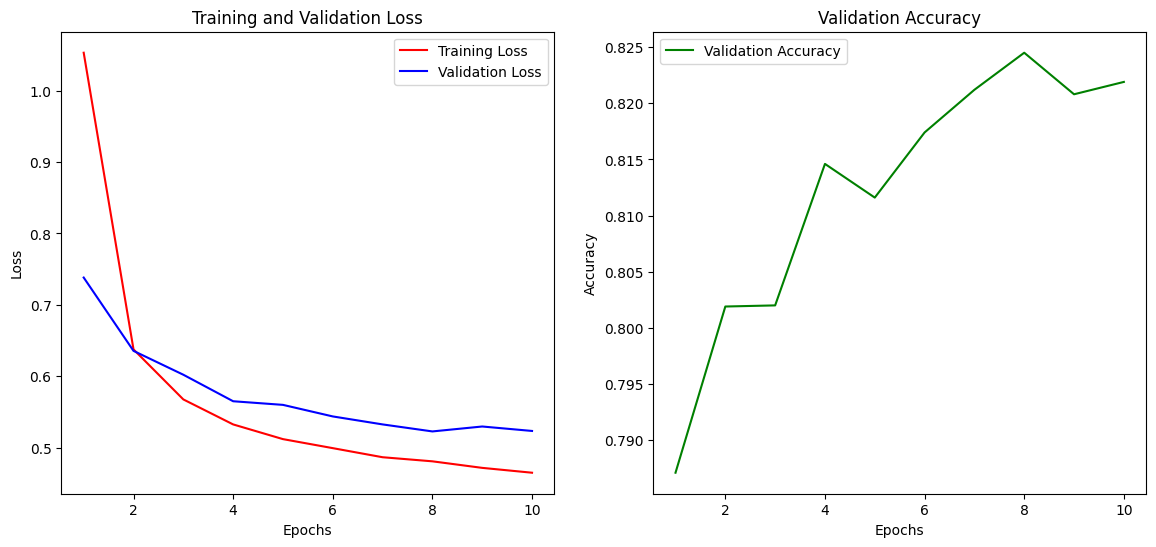

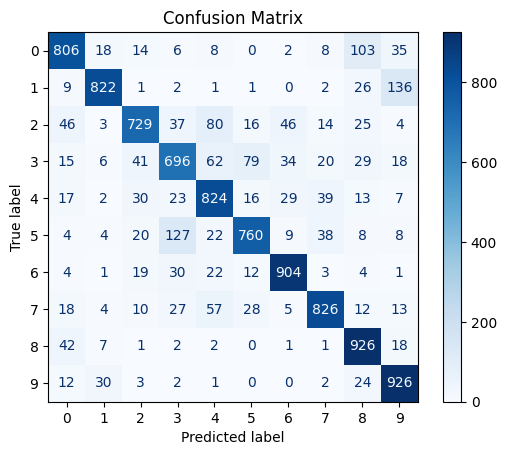

In [27]:
plot_loss_accuracy(training_loss, val_losses, val_accs)
plot_confusion_matrix(model_152, value_loader, num_classes=10, device=device)